<a href="https://colab.research.google.com/github/nitish22066/Solving-the-Schr-dinger-equation-for-Hydrogen-atom-using-Daubechies-Wavelet-Basis/blob/main/Schrodinder_eqn_for_hydroden_atom_using_Wavelet_Basis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project deals with solving the Schrodinger equation of a hydrogen atom in Cartesian form using Daubechies wavelet basis. Doing so, this problem becomes an eigenvalue problem ,where eigenvalues are the energy levels of the the system,whereas the eigenvectors are the coefficients of the wavelet basis functions using which, we can reconstruct the wave function. The number of eigenvalues obtained or the size of the Hamiltonian matrix will depend on the domain chosen, i.e the range of position coordinates , along x,y and z axis that can be spanned by the basis set. The lowest eigenvalue corresponds to ground state energy,where on taking h and m as 1, we get the value as -0.5Ha.

1)Importing daubechies wavelets of over 3

In [ ]:
import numpy as np

In [ ]:
import pywt
import matplotlib.pyplot as plt

In [ ]:
wavelet = pywt.Wavelet('db3')
[s, w, x] = wavelet.wavefun()#level can be defined here which increases the datapoints for precision


7937

In [ ]:
x.size

1281

384

Kinetic energy can be obtained in 2 ways, either via solving a system of linear equations obtained from overlap integrals, or integrating a particular se of terms and finding the other terms using translation invariance

Method 1

In [ ]:
c=wavelet.filter_bank #to obtain h

In [ ]:
c

([0.03522629188570953,
  -0.08544127388202666,
  -0.13501102001025458,
  0.45987750211849154,
  0.8068915093110925,
  0.33267055295008263],
 [-0.33267055295008263,
  0.8068915093110925,
  -0.45987750211849154,
  -0.13501102001025458,
  0.08544127388202666,
  0.03522629188570953],
 [0.33267055295008263,
  0.8068915093110925,
  0.45987750211849154,
  -0.13501102001025458,
  -0.08544127388202666,
  0.03522629188570953],
 [0.03522629188570953,
  0.08544127388202666,
  -0.13501102001025458,
  -0.45987750211849154,
  0.8068915093110925,
  -0.33267055295008263])

ModuleNotFoundError: ignored

In [ ]:
h=c[0]

In [ ]:
def H(m,n):
  if(m-2*n<0 and m-2*n>5):
    c=0
  else:
    c=h[m-2*n]
  return c
  

In [ ]:
I=np.identity(9)

In [ ]:
H(0,0)*5

-1.0546698150503716e-07

In [ ]:
h

[0.03522629188570953,
 -0.08544127388202666,
 -0.13501102001025458,
 0.45987750211849154,
 0.8068915093110925,
 0.33267055295008263]

In [ ]:
for l in range(-4,5):
  for p in range(0,6):
   for r in range(0,6):
     if(r+2*l-p>=-4 and r+2*l-p<=4):
        I[l+4][r+2*(l)-p+4]=-16*h[p]*h[r]
     else:
       continue


  

NameError: ignored

In [ ]:
I

array([[ 0.45478073, -0.1875    ,  4.        ,  1.        ,  0.        ,
         1.        ,  4.        ,  9.        , 16.        ],
       [-2.44780325,  0.71862705,  0.45478073, -0.1875    ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-1.77071515, -4.29486471, -2.44780325,  0.71862705,  0.45478073,
        -0.1875    ,  0.        ,  0.        ,  0.        ],
       [-2.44780325, -4.29486471, -1.77071515, -4.29486471, -2.44780325,
         0.71862705,  0.45478073, -0.1875    ,  0.        ],
       [ 0.45478073,  0.71862705, -2.44780325, -4.29486471, -1.77071515,
        -4.29486471, -2.44780325,  0.71862705,  0.45478073],
       [ 0.        , -0.1875    ,  0.45478073,  0.71862705, -2.44780325,
        -4.29486471, -1.77071515, -4.29486471, -2.44780325],
       [ 0.        ,  0.        ,  0.        , -0.1875    ,  0.45478073,
         0.71862705, -2.44780325, -4.29486471, -1.77071515],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0

In [ ]:

B=[]
for q in range(-4,5):

    I[2][q+4]=((q)*q)
    if(q==-2):
      B.append(-2)
    else:
      B.append(0)
    
   

In [ ]:
B

[0, -2, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
np.transpose(I)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -0.,  0., -0.],
       [ 0.,  1.,  4.,  9., 16.],
       [ 1.,  4.,  9., 16., 25.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [ ]:
1-16*H(0,-5)*H(10,5)

1.000000000137663

In [ ]:
I[19]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -2.10587112e-09, -7.60767188e-08,  1.04585996e-06,
       -4.59806199e-06,  2.04501224e-06,  6.59551076e-05,  2.33009076e-05,
       -5.12018568e-05,  3.89508437e-05, -1.85213103e-05,  5.80852453e-06,
       -1.11629325e-06,  9.31473174e-08,  6.38869919e-09,  9.99999998e-01,
        0.00000000e+00])

In [ ]:
v=np.linalg.solve(I,B)#equation which solves B

In [ ]:
v

array([-0.04877076, -0.11829335, -0.05453087,  0.05105516,  0.17147706,
       -0.09543987, -0.03002554,  0.01459183,  0.00601601])

In [ ]:
v

array([ 0.51894038, -5.29819658,  9.45545854, -4.1468318 ,  7.6437294 ,
       -4.33474557, -1.25253312,  0.83676   ,  0.34498493])

In [ ]:
v

array([ 0.55218467, -0.96378334, -0.22130801,  0.35732966, -0.047668  ,
        1.10652379, -0.64099861, -0.19654953,  0.1059998 ,  0.04370229,
       -0.        ])

In [ ]:
T(0)

0.17147706337170612

Method 2

In [ ]:
#define the range of t at which we want to integrate
t=np.union1d(-5+x,x)

In [ ]:
#define the bsis functions
def basis(w,x,k,n):
   

   
    
    Dw = (2**(k))*w
    #Dx = np.array((x+n)*(2**k))
    Dwm= np.pad(Dw, (list(t).index(n), list(t).index(5)-list(t).index(5+n)), 'constant', constant_values=(0, 0))
    return Dwm 
    #return Dw[list(x).index(10)-n:list(x).index(20)-n],Dx[list(x).index(10):list(x).index(20)]
  
    

Using the property-


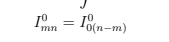

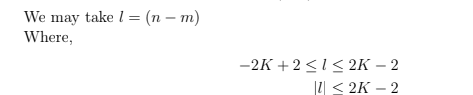

since l goes from -4 to 4,the integrals exist for this range and not beyond

In [ ]:
T=[]
for r in range(-5,-4):
  T.append(0)
for r in range(-4,1):
  T.append(np.trapz(np.gradient(basis(s,x,0,0),t)*np.gradient(basis(s,x,0,r),t),t))
for r in range(1,6):
  T.append(T[5-r])
for r in range(6,11):  
  T.append(0)

In [ ]:
T

[0,
 -0.005159113788977271,
 -0.11190860252827425,
 0.8579621380195023,
 -3.3421253086999045,
 5.202461773995307,
 -3.3421253086999045,
 0.8579621380195023,
 -0.11190860252827425,
 -0.005159113788977271,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
-3.39048
0.87619

K[i][j]=0.5*T(i1_-i1)*kron(i2, i2_)*kron(i3,i3_)+0.5*T(i2_-i2)*kron(i1, i1_)*kron(i3,i3_)+0.5*T(i3_-i3)*kron(i2, i2_)*kron(i1,i1_)

In [ ]:



K=np.zeros((216,216))

def kron(n1,n2):
 if(n1==n2):
  return 1
 else:
  return 0





i=0


for i1 in range(-5,1):
                 
                  for i2 in range(-5,1):
                    for i3 in range(-5,1):
                      j=0
                      for i1_ in range(-5,1):
                 
                         for i2_ in range(-5,1):
                           for i3_ in range(-5,1):
                               K[i][j]=0.5*T[5+i1_-i1]*kron(i2, i2_)*kron(i3,i3_)+0.5*T[5+i2_-i2]*kron(i1, i1_)*kron(i3,i3_)+0.5*T[5+i3_-i3]*kron(i2, i2_)*kron(i1,i1_)
                               #K[i][j]=0.5*np.trapz(np.gradient(basis(s,x,0,i1))*np.gradient(basis(s,x,0,i1_)),t)*kron(i2, i2_)*kron(i3,i3_)+0.5*np.trapz(np.gradient(basis(s,x,0,i2))*np.gradient(basis(s,x,0,i2_)),t)*kron(i1, i1_)*kron(i3,i3_)+0.5*np.trapz(np.gradient(basis(s,x,0,i3))*np.gradient(basis(s,x,0,i3_)),t)*kron(i2, i2_)*kron(i1,i1_)
                              # K[i][j]=0.5*T[5+i1_-i1]*T[5+i2_-i2]*T[5+i3_-i3]
                               j=j+1                               
                      i=i+1

In [ ]:
(K==K.T).all()#verification of symmetry

True

Optimized weights to represent 1/r

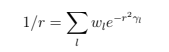

In [ ]:
P=[4.96142640560223544E19,
1.37454269147978052E19,
7.58610013441204679E18,
4.42040691347806996E18,
2.61986077948367892E18,
1.56320138155496681E18,
9.35645215863028402E17,
5.60962910452691703E17,
3.3666225119686761E17,
2.0218253197947866E17,
1.21477756091902017E17,
7.3012982513608503E16,
4.38951893556421099E16,
2.63949482512262325E16,
1.58742054072786174E16,
9.54806587737665531E15,
5.74353712364571709E15,
3.455214877389445E15,
2.07871658520326804E15,
1.25064667315629928E15,
7.52469429541933745E14,
4.5274603337253175E14,
2.72414006900059548E14,
1.63912168349216752E14,
9.86275802590865738E13,
5.93457701624974985E13,
3.5709554322296296E13,
2.14872890367310454E13,
1.29294719957726902E13,
7.78003375426361016E12,
4.68148199759876704E12,
2.8169955024829868E12,
1.69507790481958464E12,
1.01998486064607581E12,
6.13759486539856459E11,
3.69320183828682544E11,
2.22232783898905102E11,
1.33725247623668682E11,
8.0467192739036288E10,
4.84199582415144143E10,
2.91360091170559564E10,
1.75321747475309216E10,
1.0549735552210995E10,
6.34815321079006586E9,
3.81991113733594231E9,
2.29857747533101109E9,
1.38313653595483694E9,
8.32282908580025358E8,
5.00814519374587467E8,
3.01358090773319025E8,
1.81337994217503535E8,
1.09117589961086823E8,
6.56599771718640323E7,
3.95099693638497164E7,
2.37745694710665991E7,
1.43060135285912813E7,
8.60844290313506695E6,
5.18000974075383424E6,
3.116998193057466E6,
1.87560993870024029E6,
1.12862197183979562E6,
679132.441326077231,
408658.421279877969,
245904.473450669789,
147969.568088321005,
89038.612357311147,
53577.7362552358895,
32239.6513926914668,
19399.7580852362791,
11673.5323603058634,
7024.38438577707758,
4226.82479307685999,
2543.43254175354295,
1530.47486269122675,
920.941785160749482,
554.163803906291646,
333.46029740785694,200.6550575335041,120.741366914147284,72.6544243200329916,43.7187810415471025,
26.3071631447061043,
15.8299486353816329,
9.52493152341244004,
5.72200417067776041,
3.3624223407094092,
1.75371394604499472,
0.64705932650658966,
0.072765905943708247]
W= [47.67445484528304247E10,
11.37485774750442175E9,
78.64340976880190239E8,
46.27335788759590498E8,
24.7380464827152951E8,
13.62904116438987719E8,
92.79560029045882433E8,
52.15931216254660251E8,
31.67018011061666244E8,
1.29291036801493046E8,
1.00139319988015862E8,
7.75892350510188341E7,
6.01333567950731271E7,
4.66141178654796875E7,
3.61398903394911448E7,
2.80225846672956389E7,
2.1730509180930247E7,
1.68524482625876965E7,
1.30701489345870338E7,
1.01371784832269282E7,
7.86264116300379329E6,
6.09861667912273717E6,
4.73045784039455683E6,
3.66928949951594161E6,
2.8462050836230259E6,
2.20777394798527011E6,
1.71256191589205524E6,
1.32843556197737076E6,
1.0304731275955989E6,
799345.206572271448,
620059.354143595343,
480986.704107449333,
373107.167700228515,
289424.08337412132,224510.248231581788,
174155.825690028966,
135095.256919654066,
104795.442776800312,
81291.4458222430418,
63059.0493649328682,
48915.9040455329689,
37944.8484018048756,
29434.4290473253969,
22832.7622054490044,
17711.743950151233,
13739.287867104177,
10657.7895710752585,
8267.42141053961834,
6413.17397520136448,
4974.80402838654277,
3859.03698188553047,
2993.51824493299154,
2322.1211966811754,1801.30750964719641,
1397.30379659817038,
1083.91149143250697,
840.807939169209188,
652.228524366749422,
505.944376983506128,
392.469362317941064,
304.444930257324312,
236.162932842453601,
183.195466078603525,
142.107732186551471,
110.23530215723992,85.5113346705382257,
66.3325469806696621,
51.4552463353841373,
39.9146798429449273,
30.9624728409162095,
24.018098812215013,18.6312338024296588, 14.4525541233150501,11.2110836519105938,8.69662175848497178,6.74611236165731961,5.23307018057529994,4.05937850501539556,3.14892659076635714,2.44267408211071604,1.89482240522855261,1.46984505907050079,1.14019261330527007,0.884791217422925293,0.692686387080616483,0.585244576897023282,0.576182522545327589,0.596688817388997178,
0.607879901151108771
]

In [ ]:
def func(r):
  T=[]
  for i in range(len(r)):
       
       s=0.0
       for j in range(len(W)):

          s=s+(W[j]*np.exp(-r[i]*r[i]*P[j]))
         
         
       T.append(s)
     

       
  return np.array(T)

In [ ]:
func(x)

array([5.22685071e+11, 2.55999998e+02, 1.27999999e+02, ...,
       2.69006637e-31, 2.64308344e-31, 2.59691532e-31])

In [ ]:
def onebyr(n):
  s=0.0
  for j in range(len(W)):

          s=s+(W[j]*np.exp(-(n**2)*P[j]))
  return s

TO obtain the potential term, we can define a function which can inegrate the potential given below

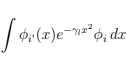

In [ ]:
from pywt import  integrate_wavelet
from scipy.fft import fft, ifft
import scipy.integrate as integrate
def Vm(n1,n2,p):
  #t=basis(s,x,0,0)[1]
  #
  #d=0
  #t=np.array([i for i in basis(s,x,0,n1)[1] if i in basis(s,x,0,n2)[1]])
  #for i in range(len(t)-1):
     # d=d+ghj[i-n1]*ghj[i-n2]*np.exp(-x[i]*x[i]*p)
  #return d
  #y = fft(basis(s,x,0,n1)[]*basis(s,x,0,n2))
  #return y
  return integrate.simpson(basis(s,x,0,n1)*np.exp(-t*t*p)*basis(s,x,0,n2),t)
  #return integrate.simpson( s*np.exp(-x*x*p)*s,x)


In [ ]:

#Code to obtain elements of potential matrix




import numpy as np
V=np.zeros((216,216))





i=0


for i1 in range(0,1):
                 
                  for i2 in range(-5,1):
                    for i3 in range(-5,1):
                      j=0
                      cd=[]
                      for i1_ in range(-5,1):
                 
                         for i2_ in range(-5,1):
                             for i3_ in range(-5,1): 
                               for y in range(len(W)):
                                   V[int(i)][int(j)]=V[(i)][(j)]+W[y]*Vm(i1,i1_,P[y])*Vm(i2,i2_,P[y])*Vm(i3,i3_,P[y])
                               cd.append(V[i][j])
                               j=j+1
                      print("V[",i,"]=",cd)      
                      i=i+1


V[ 172 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.04998648492144e-09, -3.3490067244084816e-10, 5.555098922628893e-11, -1.8237046609607993e-12, -6.60921607970598e-15, 0.0, -3.349006724408482e-10, 2.8412275377815042e-11, -5.530480718828317e-12, 2.51514401690821e-13, 1.9725398425119133e-15, 0.0, 5.555098922628894e-11, -5.530480718828317e-12, 1.984130233047724e-12, -1.5743531825877188e-13, -1.834258399663939e-15, 0.0, -1.8237046609607993e-12, 2.51514401690821e-13, -1.5743531825877188e-13, 1.6508755375587236e-14, 4.684346393789654e-17, 0.0, -6.60921607970598e-15, 1.9725398425119133e-15, -1.8342583996639384e-15, 4.6843463937896516e-17, 1.935931488392896e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3136973284877475e-06, -1.0864292328444255e-07, 1.803335235974345e-08, -5.930777303808219e-10, -2.166509687003794e-12, 0.0, -1.0864292328444255e-07, 9.252438078

In [ ]:
import numpy as np
V=np.zeros((216,216))

Data for potential matrix using daubechies wavelet of size 3 for range(-5 to 5)

In [ ]:
V[0]=[0.019916488083884475, -0.0016458116479515746, 0.00027172407179353557, -8.81262318272469e-06, -3.0183058790770575e-08, 0.0, -0.0016458116479515746, 0.00013600322365538964, -2.2454785297144843e-05, 7.283113215245789e-07, 2.495251143244375e-09, 0.0, 0.00027172407179353557, -2.2454785297144843e-05, 3.7080828741098755e-06, -1.2032938966769778e-07, -4.1316745351206505e-10, 0.0, -8.81262318272469e-06, 7.28311321524579e-07, -1.2032938966769778e-07, 3.9098574394125555e-09, 1.3502833582206569e-11, 0.0, -3.0183058790770575e-08, 2.495251143244375e-09, -4.131674535120651e-10, 1.3502833582206569e-11, 4.786906067428487e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0016458116479515746, 0.00013600322365538964, -2.2454785297144843e-05, 7.283113215245789e-07, 2.495251143244375e-09, 0.0, 0.00013600322365538964, -1.1240482770355101e-05, 1.8578226355625615e-06, -6.042658324665566e-08, -2.0961750551217028e-10, 0.0, -2.2454785297144843e-05, 1.8578226355625615e-06, -3.092968886020067e-07, 1.0252090286939192e-08, 3.850228612169907e-11, 0.0, 7.28311321524579e-07, -6.042658324665566e-08, 1.0252090286939192e-08, -3.561937077049196e-10, -1.5833531905981785e-12, 0.0, 2.4952511432443754e-09, -2.096175055121703e-10, 3.850228612169907e-11, -1.5833531905981785e-12, -1.0574456336886107e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0002717240717935355, -2.245478529714484e-05, 3.708082874109875e-06, -1.2032938966769778e-07, -4.13167453512065e-10, 0.0, -2.2454785297144843e-05, 1.8578226355625615e-06, -3.092968886020067e-07, 1.0252090286939192e-08, 3.850228612169907e-11, 0.0, 3.7080828741098755e-06, -3.092968886020067e-07, 5.43404964597314e-08, -2.0439335367117594e-09, -1.1321887029377138e-11, 0.0, -1.2032938966769778e-07, 1.025209028693919e-08, -2.043933536711759e-09, 9.64734569079728e-11, 7.954938187161006e-13, 0.0, -4.1316745351206505e-10, 3.850228612169906e-11, -1.1321887029377138e-11, 7.954938187161006e-13, 9.096333623839239e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -8.81262318272469e-06, 7.283113215245789e-07, -1.2032938966769778e-07, 3.909857439412555e-09, 1.3502833582206567e-11, 0.0, 7.283113215245789e-07, -6.042658324665565e-08, 1.025209028693919e-08, -3.5619370770491953e-10, -1.5833531905981783e-12, 0.0, -1.2032938966769778e-07, 1.025209028693919e-08, -2.043933536711759e-09, 9.64734569079728e-11, 7.954938187161006e-13, 0.0, 3.9098574394125555e-09, -3.561937077049196e-10, 9.64734569079728e-11, -6.3483416856222634e-12, -7.356195203602034e-14, 0.0, 1.3502833582206567e-11, -1.5833531905981783e-12, 7.954938187161006e-13, -7.356195203602034e-14, -7.388520921051951e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.018305879077057e-08, 2.4952511432443746e-09, -4.1316745351206505e-10, 1.3502833582206567e-11, 4.786906067428486e-14, 0.0, 2.4952511432443746e-09, -2.0961750551217025e-10, 3.850228612169906e-11, -1.5833531905981783e-12, -1.0574456336886106e-14, 0.0, -4.1316745351206505e-10, 3.850228612169906e-11, -1.1321887029377138e-11, 7.954938187161006e-13, 9.096333623839239e-15, 0.0, 1.3502833582206567e-11, -1.5833531905981783e-12, 7.954938187161006e-13, -7.356195203602034e-14, -7.388520921051951e-16, 0.0, 4.786906067428486e-14, -1.0574456336886106e-14, 9.096333623839239e-15, -7.388520921051951e-16, -3.4306233365856476e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[1]=[-0.0016458116479515738, 0.03271245967063495, -0.0016641240765096514, 0.000203111834151245, -4.6929777995350794e-06, 4.049986484921269e-09, 0.00013600322365538956, -0.0027032180964108653, 0.00013752279854687424, -1.678817637090474e-05, 3.879997264482174e-07, -3.3490067244083404e-10, -2.245478529714483e-05, 0.000446305891342689, -2.2712857640092688e-05, 2.7761742278347527e-06, -6.42779823847873e-08, 5.55509892262866e-11, 7.283113215245786e-07, -1.4475018156758421e-05, 7.372990255119578e-07, -9.041878664737111e-08, 2.103428768757529e-09, -1.8237046609607238e-12, 2.4952511432443737e-09, -4.958146888274796e-08, 2.535542872475485e-09, -3.1559884992584137e-10, 7.503213463006887e-12, -6.609216079705724e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00013600322365538956, -0.0027032180964108653, 0.00013752279854687424, -1.678817637090474e-05, 3.879997264482174e-07, -3.3490067244083404e-10, -1.1240482770355094e-05, 0.00022339341265076868, -1.138653050645978e-05, 1.3999540694474728e-06, -3.268689590363794e-08, 2.841227537781388e-11, 1.8578226355625604e-06, -3.6895157378854955e-05, 1.9052470917545673e-06, -2.455370433836001e-07, 6.107316595469601e-09, -5.530480718828129e-12, -6.042658324665564e-08, 1.1976956441039943e-06, -6.396847336501935e-08, 9.201287303477537e-09, -2.591397139295987e-10, 2.5151440169081525e-13, -2.0961750551217017e-10, 4.11900515088381e-09, -2.525058872703291e-10, 5.053810585307285e-11, -1.8282428113490096e-12, 1.972539842511899e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.245478529714483e-05, 0.0004463058913426889, -2.2712857640092684e-05, 2.7761742278347522e-06, -6.427798238478728e-08, 5.555098922628659e-11, 1.8578226355625604e-06, -3.6895157378854955e-05, 1.9052470917545673e-06, -2.455370433836001e-07, 6.107316595469601e-09, -5.530480718828129e-12, -3.092968886020065e-07, 6.107781999782917e-06, -3.468399361931469e-07, 5.88996066033662e-08, -1.91455706988374e-09, 1.984130233047698e-12, 1.0252090286939186e-08, -1.9949730179270008e-07, 1.4024828938979654e-08, -3.4908045022526603e-09, 1.4040545372840596e-10, -1.5743531825877147e-13, 3.850228612169904e-11, -7.048453231708645e-10, 9.049712739081945e-11, -3.5909550807079846e-11, 1.6278388904204821e-12, -1.8342583996639443e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.283113215245785e-07, -1.447501815675842e-05, 7.372990255119578e-07, -9.04187866473711e-08, 2.1034287687575285e-09, -1.8237046609607238e-12, -6.042658324665562e-08, 1.1976956441039941e-06, -6.396847336501934e-08, 9.201287303477537e-09, -2.591397139295987e-10, 2.5151440169081525e-13, 1.0252090286939186e-08, -1.9949730179270008e-07, 1.4024828938979654e-08, -3.4908045022526603e-09, 1.4040545372840598e-10, -1.574353182587715e-13, -3.561937077049194e-10, 6.621523100666289e-09, -7.5375354648423e-10, 2.853368430449894e-10, -1.3478641997328786e-11, 1.6508755375587274e-14, -1.5833531905981779e-12, 2.495905651451335e-11, -7.011658983578285e-12, 3.2643777073598106e-12, -1.1313409936867925e-13, 4.6843463937897336e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.4952511432443733e-09, -4.9581468882747955e-08, 2.5355428724754847e-09, -3.155988499258413e-10, 7.503213463006887e-12, -6.609216079705723e-15, -2.0961750551217015e-10, 4.119005150883809e-09, -2.5250588727032903e-10, 5.0538105853072845e-11, -1.8282428113490096e-12, 1.972539842511899e-15, 3.850228612169904e-11, -7.048453231708645e-10, 9.049712739081945e-11, -3.5909550807079846e-11, 1.6278388904204821e-12, -1.8342583996639443e-15, -1.5833531905981779e-12, 2.495905651451335e-11, -7.011658983578285e-12, 3.2643777073598106e-12, -1.1313409936867925e-13, 4.684346393789731e-17, -1.0574456336886106e-14, 1.2199641266149412e-13, -1.0251255117404557e-13, 7.957538458842558e-14, -8.355088756728345e-15, 1.935931488392898e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[2]=[0.00027172407179353557, -0.0016641240765096514, 0.04660204091013384, -0.0011559234424822035, 5.8294811332635564e-05, 1.3136973284877509e-06, -2.2454785297144843e-05, 0.00013752279854687424, -0.003851029185846335, 9.554580095670791e-05, -4.8199079439077744e-06, -1.0864292328444282e-07, 3.7080828741098755e-06, -2.2712857640092688e-05, 0.0006358516996810055, -1.5803480374591726e-05, 7.988170354580301e-07, 1.8033352359743495e-08, -1.2032938966769778e-07, 7.372990255119578e-07, -2.062600710579971e-05, 5.150165107315154e-07, -2.6167984609727593e-08, -5.930777303808234e-10, -4.131674535120651e-10, 2.535542872475485e-09, -7.070378418634007e-08, 1.802507675753768e-09, -9.382498051412965e-11, -2.166509687003799e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.2454785297144843e-05, 0.00013752279854687424, -0.003851029185846335, 9.554580095670791e-05, -4.8199079439077744e-06, -1.0864292328444282e-07, 1.8578226355625615e-06, -1.138653050645978e-05, 0.00031836292648698136, -7.977649564260773e-06, 4.0698357954565457e-07, 9.252438078927105e-09, -3.092968886020067e-07, 1.9052470917545673e-06, -5.271060634942656e-05, 1.4106487492958928e-06, -7.70828595443234e-08, -1.840247017007622e-09, 1.0252090286939192e-08, -6.396847336501935e-08, 1.7223119435631537e-06, -5.378913473920061e-08, 3.3497380771375677e-09, 8.654795911559688e-11, 3.850228612169907e-11, -2.525058872703291e-10, 6.095178958657928e-09, -3.0780991160122873e-10, 2.4564412255806106e-11, 7.105709776018711e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.708082874109875e-06, -2.2712857640092684e-05, 0.0006358516996810054, -1.5803480374591726e-05, 7.9881703545803e-07, 1.8033352359743492e-08, -3.092968886020067e-07, 1.9052470917545673e-06, -5.271060634942656e-05, 1.4106487492958928e-06, -7.708285954432339e-08, -1.8402470170076217e-09, 5.43404964597314e-08, -3.468399361931469e-07, 8.892211389967912e-06, -3.521383577895702e-07, 2.5338875510571376e-08, 7.026775494049675e-10, -2.043933536711759e-09, 1.4024828938979654e-08, -3.0470542772643633e-07, 2.1692014327795455e-08, -1.9137469461288222e-09, -5.7442452913251344e-11, -1.1321887029377138e-11, 9.049712739081945e-11, -1.2929719392580418e-09, 2.2901824885687787e-10, -2.228338807504972e-11, -6.802150864595027e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.2032938966769778e-07, 7.372990255119578e-07, -2.0626007105799705e-05, 5.150165107315153e-07, -2.616798460972759e-08, -5.930777303808233e-10, 1.025209028693919e-08, -6.396847336501934e-08, 1.7223119435631535e-06, -5.378913473920061e-08, 3.3497380771375673e-09, 8.654795911559688e-11, -2.043933536711759e-09, 1.4024828938979654e-08, -3.0470542772643633e-07, 2.1692014327795455e-08, -1.9137469461288226e-09, -5.7442452913251344e-11, 9.64734569079728e-11, -7.5375354648423e-10, 1.1639882451022753e-08, -1.8314401458069688e-09, 1.8952104326964937e-10, 6.081584159005872e-12, 7.954938187161006e-13, -7.011658983578285e-12, 6.573942026035804e-11, -2.0041353413356423e-11, 1.2431023825272072e-12, 1.991024138780293e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.1316745351206505e-10, 2.5355428724754847e-09, -7.070378418634005e-08, 1.8025076757537678e-09, -9.382498051412964e-11, -2.166509687003799e-12, 3.850228612169906e-11, -2.5250588727032903e-10, 6.0951789586579275e-09, -3.0780991160122873e-10, 2.4564412255806106e-11, 7.10570977601871e-13, -1.1321887029377138e-11, 9.049712739081945e-11, -1.2929719392580418e-09, 2.2901824885687787e-10, -2.228338807504972e-11, -6.802150864595027e-13, 7.954938187161006e-13, -7.011658983578285e-12, 6.573942026035804e-11, -2.0041353413356423e-11, 1.243102382527207e-12, 1.9910241387802924e-14, 9.09633362383924e-15, -1.0251255117404557e-13, 7.020919350332487e-13, -6.225310215509653e-13, 1.5097342610783038e-13, 6.731420738278203e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[3]=[-8.81262318272469e-06, 0.000203111834151245, -0.0011559234424822035, 0.05756981273064629, -0.00020944080489265228, -0.00011017099083016109, 7.283113215245789e-07, -1.678817637090474e-05, 9.554580095670791e-05, -0.0047575184556099825, 1.731726825914693e-05, 9.108396411508077e-06, -1.2032938966769778e-07, 2.7761742278347527e-06, -1.5803480374591726e-05, 0.0007856960644828699, -2.870458923455525e-06, -1.5087459178324175e-06, 3.9098574394125555e-09, -9.041878664737111e-08, 5.150165107315154e-07, -2.550147729702856e-05, 9.406705987655794e-08, 4.935541134757815e-08, 1.3502833582206569e-11, -3.1559884992584137e-10, 1.802507675753768e-09, -8.764578222525461e-08, 3.3788149287918963e-10, 1.75782292329342e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.283113215245789e-07, -1.678817637090474e-05, 9.554580095670791e-05, -0.0047575184556099825, 1.731726825914693e-05, 9.108396411508077e-06, -6.042658324665566e-08, 1.3999540694474728e-06, -7.977649564260773e-06, 0.00039379181336368846, -1.4634304344536712e-06, -7.667727875578741e-07, 1.0252090286939192e-08, -2.455370433836001e-07, 1.4106487492958928e-06, -6.575658269133745e-05, 2.7850473827397645e-07, 1.426399692838218e-07, -3.561937077049196e-10, 9.201287303477537e-09, -5.378913473920061e-08, 2.196357366591467e-06, -1.2202426595989472e-08, -6.004870086819737e-09, -1.5833531905981783e-12, 5.053810585307285e-11, -3.078099116012287e-10, 8.501468838655095e-09, -9.063263178983042e-11, -4.179887337096154e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.2032938966769778e-07, 2.7761742278347522e-06, -1.5803480374591726e-05, 0.0007856960644828698, -2.8704589234555246e-06, -1.5087459178324173e-06, 1.0252090286939192e-08, -2.455370433836001e-07, 1.4106487492958928e-06, -6.575658269133745e-05, 2.7850473827397645e-07, 1.426399692838218e-07, -2.043933536711759e-09, 5.88996066033662e-08, -3.521383577895701e-07, 1.1801574849000598e-05, -9.303133580612002e-08, -4.4009732421724425e-08, 9.647345690797279e-11, -3.4908045022526603e-09, 2.169201432779545e-08, -4.64106629214809e-07, 7.09245723608116e-09, 3.195046114980933e-09, 7.954938187161004e-13, -3.5909550807079846e-11, 2.2901824885687782e-10, -2.8230365972121027e-09, 8.27628521329834e-11, 3.687544584594928e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.909857439412555e-09, -9.04187866473711e-08, 5.150165107315153e-07, -2.5501477297028556e-05, 9.406705987655793e-08, 4.9355411347578146e-08, -3.5619370770491953e-10, 9.201287303477537e-09, -5.3789134739200606e-08, 2.1963573665914666e-06, -1.220242659598947e-08, -6.004870086819737e-09, 9.64734569079728e-11, -3.4908045022526603e-09, 2.1692014327795452e-08, -4.64106629214809e-07, 7.09245723608116e-09, 3.1950461149809337e-09, -6.348341685622262e-12, 2.853368430449894e-10, -1.8314401458069684e-09, 2.3912562342361416e-08, -7.082419903409014e-10, -3.0476666360185296e-10, -7.356195203602032e-14, 3.26437770735981e-12, -2.004135341335642e-11, 1.996986561743252e-10, -4.352606190837211e-12, -2.5957134852535278e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3502833582206567e-11, -3.155988499258413e-10, 1.8025076757537678e-09, -8.76457822252546e-08, 3.378814928791896e-10, 1.7578229232934198e-10, -1.5833531905981783e-12, 5.0538105853072845e-11, -3.0780991160122863e-10, 8.501468838655093e-09, -9.063263178983041e-11, -4.179887337096154e-11, 7.954938187161004e-13, -3.5909550807079846e-11, 2.2901824885687782e-10, -2.8230365972121027e-09, 8.27628521329834e-11, 3.687544584594928e-11, -7.356195203602032e-14, 3.26437770735981e-12, -2.004135341335642e-11, 1.996986561743252e-10, -4.352606190837211e-12, -2.5957134852535278e-12, -7.388520921051949e-16, 7.95753845884256e-14, -6.225310215509652e-13, 4.192724797761999e-12, -5.921810192537169e-13, -1.859624532126987e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[4]=[-3.0183058790770886e-08, -4.692977799535076e-06, 5.829481133263535e-05, -0.00020944080489265142, 0.061659903279426706, 0.0008222916025387527, 2.495251143244401e-09, 3.879997264482171e-07, -4.819907943907757e-06, 1.7317268259146857e-05, -0.005095655812032161, -6.797792354633139e-05, -4.131674535120694e-10, -6.427798238478724e-08, 7.988170354580272e-07, -2.870458923455513e-06, 0.0008416935051309441, 1.1254287583472357e-05, 1.350283358220671e-11, 2.1034287687575273e-09, -2.6167984609727497e-08, 9.406705987655756e-08, -2.7332223434764653e-05, -3.67666065811235e-07, 4.786906067428535e-14, 7.503213463006882e-12, -9.382498051412931e-11, 3.378814928791883e-10, -9.414888126889959e-08, -1.3014649710186524e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.495251143244401e-09, 3.879997264482171e-07, -4.819907943907757e-06, 1.7317268259146857e-05, -0.005095655812032161, -6.797792354633139e-05, -2.0961750551217242e-10, -3.268689590363792e-08, 4.069835795456531e-07, -1.4634304344536652e-06, 0.0004222208271052682, 5.706040196598232e-06, 3.8502286121699423e-11, 6.107316595469598e-09, -7.708285954432317e-08, 2.785047382739755e-07, -7.100442242785802e-05, -1.0429800036946553e-06, -1.58335319059819e-12, -2.591397139295986e-10, 3.34973807713756e-09, -1.2202426595989442e-08, 2.4141779646745074e-06, 4.249740688839231e-08, -1.0574456336886147e-14, -1.8282428113490096e-12, 2.456441225580608e-11, -9.063263178983036e-11, 9.980751844574544e-09, 2.790405778793862e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.1316745351206934e-10, -6.427798238478724e-08, 7.988170354580271e-07, -2.8704589234555128e-06, 0.000841693505130944, 1.1254287583472355e-05, 3.8502286121699423e-11, 6.107316595469598e-09, -7.708285954432315e-08, 2.785047382739755e-07, -7.100442242785802e-05, -1.0429800036946553e-06, -1.1321887029377196e-11, -1.9145570698837394e-09, 2.5338875510571336e-08, -9.303133580611988e-08, 1.3374662868259348e-05, 3.008615179811262e-07, 7.954938187161024e-13, 1.4040545372840596e-10, -1.913746946128821e-09, 7.092457236081158e-09, -5.761846976398197e-07, -2.0866262749017286e-08, 9.096333623839245e-15, 1.6278388904204821e-12, -2.2283388075049713e-11, 8.276285213298342e-11, -4.102204166102269e-09, -2.3546601248547226e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3502833582206708e-11, 2.1034287687575273e-09, -2.6167984609727493e-08, 9.406705987655754e-08, -2.733222343476465e-05, -3.6766606581123493e-07, -1.58335319059819e-12, -2.591397139295986e-10, 3.3497380771375595e-09, -1.220242659598944e-08, 2.414177964674507e-06, 4.249740688839231e-08, 7.954938187161026e-13, 1.4040545372840598e-10, -1.9137469461288214e-09, 7.0924572360811585e-09, -5.761846976398198e-07, -2.0866262749017286e-08, -7.35619520360204e-14, -1.3478641997328788e-11, 1.8952104326964935e-10, -7.082419903409015e-10, 3.450347858545991e-08, 1.930142159524442e-09, -7.388520921051952e-16, -1.1313409936867926e-13, 1.243102382527207e-12, -4.3526061908372155e-12, 2.8873639794169693e-10, 1.7594409286836487e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.786906067428534e-14, 7.503213463006882e-12, -9.38249805141293e-11, 3.3788149287918823e-10, -9.414888126889958e-08, -1.3014649710186522e-09, -1.0574456336886147e-14, -1.8282428113490096e-12, 2.4564412255806077e-11, -9.063263178983035e-11, 9.980751844574542e-09, 2.790405778793862e-10, 9.096333623839245e-15, 1.6278388904204821e-12, -2.2283388075049713e-11, 8.276285213298342e-11, -4.102204166102269e-09, -2.3546601248547226e-10, -7.388520921051952e-16, -1.1313409936867926e-13, 1.243102382527207e-12, -4.3526061908372155e-12, 2.8873639794169693e-10, 1.7594409286836484e-11, -3.430623336585648e-17, -8.355088756728345e-15, 1.5097342610783036e-13, -5.921810192537169e-13, 1.0709282558326013e-11, 1.049367335809372e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[5]=[0.0, 4.049986484921441e-09, 1.3136973284877475e-06, -0.00011017099083016131, 0.0008222916025387527, 0.0572480330559542, 0.0, -3.349006724408482e-10, -1.0864292328444255e-07, 9.108396411508094e-06, -6.797792354633139e-05, -0.0047309246509632166, 0.0, 5.555098922628894e-11, 1.803335235974345e-08, -1.5087459178324204e-06, 1.1254287583472357e-05, 0.0007813016202186161, 0.0, -1.8237046609607993e-12, -5.930777303808219e-10, 4.9355411347578246e-08, -3.67666065811235e-07, -2.5358629940695425e-05, 0.0, -6.609216079705981e-15, -2.1665096870037943e-12, 1.7578229232934231e-10, -1.3014649710186524e-09, -8.715142465930885e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.349006724408482e-10, -1.0864292328444255e-07, 9.108396411508094e-06, -6.797792354633139e-05, -0.0047309246509632166, 0.0, 2.8412275377815045e-11, 9.252438078927082e-09, -7.667727875578756e-07, 5.706040196598232e-06, 0.00039158339081282756, 0.0, -5.530480718828317e-12, -1.840247017007618e-09, 1.4263996928382203e-07, -1.0429800036946553e-06, -6.537964596802305e-05, 0.0, 2.51514401690821e-13, 8.654795911559673e-11, -6.004870086819745e-09, 4.249740688839231e-08, 2.183073139546804e-06, 0.0, 1.9725398425119137e-15, 7.105709776018703e-13, -4.179887337096158e-11, 2.790405778793862e-10, 8.439690516670778e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.555098922628893e-11, 1.8033352359743446e-08, -1.5087459178324202e-06, 1.1254287583472355e-05, 0.000781301620218616, 0.0, -5.530480718828317e-12, -1.8402470170076178e-09, 1.4263996928382203e-07, -1.0429800036946553e-06, -6.537964596802305e-05, 0.0, 1.984130233047724e-12, 7.026775494049665e-10, -4.400973242172447e-08, 3.008615179811262e-07, 1.172362870803149e-05, 0.0, -1.5743531825877188e-13, -5.7442452913251286e-11, 3.1950461149809354e-09, -2.0866262749017286e-08, -4.6022351533019014e-07, 0.0, -1.8342583996639384e-15, -6.802150864595022e-13, 3.68754458459493e-11, -2.3546601248547226e-10, -2.789521532864269e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.8237046609607993e-12, -5.930777303808218e-10, 4.9355411347578246e-08, -3.6766606581123493e-07, -2.5358629940695422e-05, 0.0, 2.51514401690821e-13, 8.654795911559673e-11, -6.004870086819745e-09, 4.249740688839231e-08, 2.1830731395468034e-06, 0.0, -1.5743531825877188e-13, -5.744245291325129e-11, 3.1950461149809354e-09, -2.0866262749017286e-08, -4.6022351533019014e-07, 0.0, 1.650875537558724e-14, 6.081584159005868e-12, -3.04766663601853e-10, 1.930142159524442e-09, 2.363537188555821e-08, 0.0, 4.684346393789654e-17, 1.991024138780287e-14, -2.595713485253529e-12, 1.7594409286836487e-11, 1.9720363526344887e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.60921607970598e-15, -2.166509687003794e-12, 1.757822923293423e-10, -1.3014649710186522e-09, -8.715142465930883e-08, 0.0, 1.9725398425119137e-15, 7.105709776018702e-13, -4.1798873370961575e-11, 2.790405778793862e-10, 8.439690516670777e-09, 0.0, -1.8342583996639384e-15, -6.802150864595022e-13, 3.68754458459493e-11, -2.3546601248547226e-10, -2.789521532864269e-09, 0.0, 4.684346393789654e-17, 1.9910241387802864e-14, -2.595713485253529e-12, 1.7594409286836484e-11, 1.9720363526344887e-10, 0.0, 1.935931488392896e-17, 6.731420738278201e-15, -1.8596245321269871e-13, 1.049367335809372e-12, 4.083002146444688e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[6]=[-0.0016458116479515738, 0.00013600322365538956, -2.245478529714483e-05, 7.283113215245786e-07, 2.4952511432443737e-09, 0.0, 0.03271245967063495, -0.0027032180964108653, 0.000446305891342689, -1.447501815675842e-05, -4.9581468882747955e-08, 0.0, -0.0016641240765096512, 0.00013752279854687424, -2.2712857640092684e-05, 7.372990255119578e-07, 2.5355428724754847e-09, 0.0, 0.000203111834151245, -1.678817637090474e-05, 2.7761742278347522e-06, -9.04187866473711e-08, -3.1559884992584137e-10, 0.0, -4.6929777995350794e-06, 3.879997264482174e-07, -6.42779823847873e-08, 2.1034287687575285e-09, 7.503213463006887e-12, 0.0, 4.049986484921269e-09, -3.3490067244083404e-10, 5.55509892262866e-11, -1.8237046609607238e-12, -6.609216079705724e-15, 0.0, 0.00013600322365538956, -1.1240482770355096e-05, 1.8578226355625604e-06, -6.042658324665562e-08, -2.0961750551217017e-10, 0.0, -0.0027032180964108657, 0.00022339341265076873, -3.6895157378854955e-05, 1.1976956441039945e-06, 4.11900515088381e-09, 0.0, 0.00013752279854687427, -1.1386530506459782e-05, 1.9052470917545673e-06, -6.396847336501934e-08, -2.5250588727032903e-10, 0.0, -1.678817637090474e-05, 1.3999540694474728e-06, -2.455370433836001e-07, 9.201287303477537e-09, 5.053810585307285e-11, 0.0, 3.8799972644821743e-07, -3.2686895903637945e-08, 6.107316595469601e-09, -2.591397139295987e-10, -1.8282428113490096e-12, 0.0, -3.349006724408341e-10, 2.8412275377813882e-11, -5.53048071882813e-12, 2.5151440169081525e-13, 1.972539842511899e-15, 0.0, -2.245478529714483e-05, 1.8578226355625604e-06, -3.092968886020065e-07, 1.0252090286939186e-08, 3.850228612169904e-11, 0.0, 0.000446305891342689, -3.689515737885495e-05, 6.107781999782917e-06, -1.9949730179270008e-07, -7.048453231708645e-10, 0.0, -2.2712857640092684e-05, 1.905247091754567e-06, -3.4683993619314684e-07, 1.4024828938979654e-08, 9.049712739081945e-11, 0.0, 2.7761742278347522e-06, -2.455370433836001e-07, 5.88996066033662e-08, -3.4908045022526603e-09, -3.5909550807079846e-11, 0.0, -6.427798238478728e-08, 6.107316595469601e-09, -1.91455706988374e-09, 1.4040545372840596e-10, 1.6278388904204821e-12, 0.0, 5.555098922628659e-11, -5.530480718828129e-12, 1.984130233047698e-12, -1.5743531825877147e-13, -1.8342583996639443e-15, 0.0, 7.283113215245785e-07, -6.042658324665562e-08, 1.0252090286939186e-08, -3.561937077049194e-10, -1.5833531905981779e-12, 0.0, -1.447501815675842e-05, 1.1976956441039943e-06, -1.994973017927001e-07, 6.621523100666289e-09, 2.4959056514513354e-11, 0.0, 7.372990255119578e-07, -6.396847336501934e-08, 1.4024828938979654e-08, -7.5375354648423e-10, -7.011658983578285e-12, 0.0, -9.04187866473711e-08, 9.201287303477535e-09, -3.4908045022526603e-09, 2.853368430449894e-10, 3.264377707359811e-12, 0.0, 2.1034287687575285e-09, -2.591397139295987e-10, 1.4040545372840598e-10, -1.3478641997328786e-11, -1.1313409936867925e-13, 0.0, -1.8237046609607238e-12, 2.5151440169081525e-13, -1.574353182587715e-13, 1.6508755375587274e-14, 4.684346393789732e-17, 0.0, 2.4952511432443737e-09, -2.0961750551217017e-10, 3.850228612169905e-11, -1.5833531905981777e-12, -1.0574456336886106e-14, 0.0, -4.9581468882747955e-08, 4.119005150883809e-09, -7.048453231708646e-10, 2.495905651451335e-11, 1.2199641266149412e-13, 0.0, 2.5355428724754847e-09, -2.5250588727032903e-10, 9.049712739081946e-11, -7.011658983578285e-12, -1.0251255117404557e-13, 0.0, -3.1559884992584137e-10, 5.053810585307285e-11, -3.5909550807079846e-11, 3.2643777073598106e-12, 7.957538458842558e-14, 0.0, 7.503213463006887e-12, -1.8282428113490096e-12, 1.6278388904204821e-12, -1.1313409936867922e-13, -8.355088756728345e-15, 0.0, -6.609216079705723e-15, 1.972539842511899e-15, -1.8342583996639447e-15, 4.684346393789731e-17, 1.935931488392898e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[7]=[0.0001360032236553895, -0.0027032180964108635, 0.0001375227985468742, -1.678817637090473e-05, 3.879997264482172e-07, -3.349006724408339e-10, -0.0027032180964108635, 0.053729623298926235, -0.0027333339536212845, 0.0003336308934533897, -7.709289337205547e-06, 6.653400421640241e-09, 0.0001375227985468742, -0.0027333339536212845, 0.0001391341547319894, -1.7021246589616658e-05, 3.94605155689278e-07, -3.4133673896180927e-10, -1.678817637090473e-05, 0.00033363089345338963, -1.7021246589616658e-05, 2.1000421746826244e-06, -4.928527362205835e-08, 4.300073337791602e-11, 3.8799972644821716e-07, -7.709289337205547e-06, 3.94605155689278e-07, -4.928527362205835e-08, 1.177962241531914e-09, -1.042148746311284e-12, -3.349006724408339e-10, 6.653400421640241e-09, -3.4133673896180927e-10, 4.300073337791602e-11, -1.042148746311284e-12, 9.342187795320584e-16, -1.1240482770355089e-05, 0.00022339341265076857, -1.1386530506459775e-05, 1.399954069447472e-06, -3.2686895903637925e-08, 2.8412275377813863e-11, 0.0002233934126507686, -0.004440053081718725, 0.00022601259140635536, -2.765045909427538e-05, 6.410421919857645e-07, -5.545103183162148e-10, -1.1386530506459775e-05, 0.00022601259140635533, -1.1776909643207645e-05, 1.5655106305359757e-06, -4.045258745760309e-08, 3.747477616559381e-11, 1.3999540694474721e-06, -2.7650459094275377e-05, 1.5655106305359757e-06, -2.639592542086297e-07, 8.537536493815648e-09, -8.831020172633685e-12, -3.2686895903637925e-08, 6.410421919857645e-07, -4.0452587457603093e-08, 8.537536493815648e-09, -3.177398495885354e-10, 3.451400761614616e-13, 2.8412275377813866e-11, -5.545103183162148e-10, 3.747477616559381e-11, -8.831020172633684e-12, 3.451400761614616e-13, -3.8046870720764695e-16, 1.8578226355625593e-06, -3.689515737885493e-05, 1.9052470917545662e-06, -2.455370433836e-07, 6.107316595469598e-09, -5.5304807188281265e-12, -3.689515737885493e-05, 0.0007331357154407146, -3.747617339286252e-05, 4.656877113383724e-06, -1.1035896104233201e-07, 9.68839492928539e-11, 1.905247091754566e-06, -3.747617339286252e-05, 2.2624567576732308e-06, -4.392359457084873e-07, 1.5576884297032687e-08, -1.6667683409523918e-11, -2.455370433836e-07, 4.656877113383724e-06, -4.392359457084873e-07, 1.460905778952018e-07, -6.419522877550705e-09, 7.305961432571734e-12, 6.107316595469598e-09, -1.1035896104233201e-07, 1.557688429703269e-08, -6.419522877550706e-09, 2.896945717361016e-10, -3.1776296071941017e-13, -5.5304807188281265e-12, 9.68839492928539e-11, -1.6667683409523918e-11, 7.305961432571734e-12, -3.177629607194101e-13, 3.134283394910188e-16, -6.042658324665558e-08, 1.1976956441039935e-06, -6.39684733650193e-08, 9.201287303477532e-09, -2.591397139295986e-10, 2.515144016908152e-13, 1.1976956441039937e-06, -2.3784234291801967e-05, 1.2292911301300404e-06, -1.5887455183632384e-07, 3.959115907078317e-09, -3.5788348323909294e-12, -6.396847336501931e-08, 1.2292911301300401e-06, -1.0064067846092855e-07, 2.960543077000298e-08, -1.238011773246357e-09, 1.3658762728899347e-12, 9.201287303477532e-09, -1.5887455183632381e-07, 2.960543077000298e-08, -1.3141987494832965e-08, 5.665806086990773e-10, -5.721894946233263e-13, -2.591397139295986e-10, 3.959115907078317e-09, -1.238011773246357e-09, 5.665806086990773e-10, -1.337199970985029e-11, -1.6355052029399167e-14, 2.515144016908152e-13, -3.5788348323909294e-12, 1.3658762728899347e-12, -5.721894946233263e-13, -1.6355052029399167e-14, 1.586367886026616e-16, -2.0961750551217004e-10, 4.1190051508838064e-09, -2.5250588727032893e-10, 5.053810585307284e-11, -1.828242811349009e-12, 1.972539842511899e-15, 4.1190051508838064e-09, -8.156857596634965e-08, 4.425684845415833e-09, -6.708670913873186e-10, 2.0563338961059716e-11, -2.1729632474531972e-14, -2.5250588727032893e-10, 4.425684845415833e-09, -7.735897620996682e-10, 3.611708505659502e-10, -1.975863139790887e-11, 2.758118243048168e-14, 5.053810585307284e-11, -6.708670913873187e-10, 3.611708505659502e-10, -2.2884426641918732e-10, 1.707824247498715e-11, -3.1142404758098665e-14, -1.828242811349009e-12, 2.0563338961059716e-11, -1.975863139790887e-11, 1.707824247498715e-11, -2.1933787185274096e-12, 6.78174004820917e-15, 1.972539842511899e-15, -2.1729632474531972e-14, 2.758118243048168e-14, -3.114240475809866e-14, 6.78174004820917e-15, 3.9341962831360425e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[8]=[-2.245478529714483e-05, 0.0001375227985468742, -0.0038510291858463333, 9.554580095670785e-05, -4.819907943907772e-06, -1.0864292328444277e-07, 0.000446305891342689, -0.0027333339536212845, 0.07654322218184348, -0.0018987352999341113, 9.576430109946856e-05, 2.1582347436090254e-06, -2.2712857640092684e-05, 0.0001391341547319894, -0.0038943516839801636, 9.690951953841263e-05, -4.9054059276356056e-06, -1.1086091118087729e-07, 2.7761742278347522e-06, -1.7021246589616658e-05, 0.0004755485770017516, -1.197475377343619e-05, 6.143940531357089e-07, 1.4029839122146233e-08, -6.42779823847873e-08, 3.94605155689278e-07, -1.0995450699776078e-05, 2.816727787701904e-07, -1.4750430849752736e-08, -3.4225455842731663e-10, 5.55509892262866e-11, -3.4133673896180927e-10, 9.493603880668582e-09, -2.461793604969299e-10, 1.3102804089566926e-11, 3.0817345865998437e-13, 1.8578226355625604e-06, -1.1386530506459775e-05, 0.0003183629264869812, -7.977649564260768e-06, 4.0698357954565436e-07, 9.2524380789271e-09, -3.6895157378854955e-05, 0.00022601259140635536, -0.0063260304446862954, 0.0001574269796681339, -7.968931224761831e-06, -1.8009828639270452e-07, 1.9052470917545673e-06, -1.1776909643207645e-05, 0.00032345420948346674, -9.040383506268807e-06, 5.145223626106394e-07, 1.261263297250188e-08, -2.455370433836001e-07, 1.5655106305359757e-06, -4.023115838843221e-05, 1.576787837257501e-06, -1.1291439354696546e-07, -3.124982157886207e-09, 6.107316595469601e-09, -4.0452587457603093e-08, 9.547034577050438e-07, -5.2271502689667725e-08, 4.281596579879847e-09, 1.249263218580477e-10, -5.53048071882813e-12, 3.747477616559381e-11, -8.389593089169982e-10, 5.458841383303369e-11, -4.6711612707732355e-12, -1.378223919046081e-13, -3.092968886020065e-07, 1.9052470917545662e-06, -5.2710606349426535e-05, 1.4106487492958921e-06, -7.708285954432335e-08, -1.8402470170076209e-09, 6.107781999782917e-06, -3.747617339286252e-05, 0.001045377600167537, -2.6587087509039482e-05, 1.3785737766491391e-06, 3.172079669932508e-08, -3.4683993619314684e-07, 2.2624567576732308e-06, -5.527118510261706e-05, 2.6659370280235596e-06, -2.086457406234966e-07, -5.985486928485304e-09, 5.88996066033662e-08, -4.392359457084873e-07, 7.704115870470399e-06, -9.248727297635066e-07, 8.80788920064041e-08, 2.6940323704837866e-09, -1.91455706988374e-09, 1.557688429703269e-08, -2.0986837873416835e-07, 4.092793444880297e-08, -3.934260386309732e-09, -1.1836584953115203e-10, 1.984130233047698e-12, -1.6667683409523918e-11, 1.9999451957104528e-10, -4.634119746115391e-11, 4.1753749431654875e-12, 1.1719429773087082e-13, 1.0252090286939186e-08, -6.39684733650193e-08, 1.7223119435631524e-06, -5.378913473920059e-08, 3.349738077137566e-09, 8.654795911559684e-11, -1.994973017927001e-07, 1.2292911301300404e-06, -3.3985275851560595e-05, 9.130351235909094e-07, -4.9950189509735664e-08, -1.1916511423114113e-09, 1.4024828938979654e-08, -1.0064067846092855e-07, 1.9526721175195657e-06, -1.8561519688955197e-07, 1.680654535980752e-08, 5.020090313798747e-10, -3.4908045022526603e-09, 2.960543077000298e-08, -3.399239255848685e-07, 8.324274867590362e-08, -7.497626947613594e-09, -2.1309232717550962e-10, 1.4040545372840598e-10, -1.238011773246357e-09, 1.10642582216427e-08, -3.3304485620851077e-09, 6.56837748487026e-11, -4.766052232951297e-12, -1.574353182587715e-13, 1.3658762728899347e-12, -1.1174312817605089e-11, 2.6370115102615846e-12, 7.149291861189607e-13, 4.844777704223465e-14, 3.850228612169905e-11, -2.5250588727032893e-10, 6.095178958657925e-09, -3.0780991160122863e-10, 2.45644122558061e-11, 7.10570977601871e-13, -7.048453231708646e-10, 4.425684845415833e-09, -1.1766608173280348e-07, 3.967657245918791e-09, -2.7328577968228904e-10, -7.601728733545833e-12, 9.049712739081946e-11, -7.735897620996682e-10, 9.216690107153542e-09, -2.3866225817479725e-09, 2.909458407519428e-10, 1.0132455635598455e-11, -3.5909550807079846e-11, 3.611708505659502e-10, -2.7107427936824893e-09, 1.6241045995689465e-09, -2.7778414861557937e-10, -1.1082823866343458e-11, 1.6278388904204821e-12, -1.975863139790887e-11, 1.341824459733167e-10, -1.4422318510764349e-10, 4.4228223921666714e-11, 2.095523064635134e-12, -1.8342583996639447e-15, 2.758118243048168e-14, -1.789078037257704e-13, 2.5400826957126525e-13, -6.918362146168137e-15, 7.878138958466753e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[9]=[7.283113215245786e-07, -1.678817637090473e-05, 9.554580095670785e-05, -0.00475751845560998, 1.7317268259146918e-05, 9.108396411508072e-06, -1.447501815675842e-05, 0.0003336308934533897, -0.0018987352999341113, 0.09455854930981075, -0.00034406290723290746, -0.00018098000375382653, 7.372990255119578e-07, -1.7021246589616658e-05, 9.690951953841263e-05, -0.004812830926378685, 1.7628855190415927e-05, 9.261398338919883e-06, -9.04187866473711e-08, 2.1000421746826244e-06, -1.197475377343619e-05, 0.000588579676626405, -2.210175213091764e-06, -1.1557107087451176e-06, 2.1034287687575285e-09, -4.928527362205835e-08, 2.816727787701904e-07, -1.363851817867908e-05, 5.314399677011066e-08, 2.7586276892296702e-08, -1.8237046609607238e-12, 4.300073337791602e-11, -2.461793604969299e-10, 1.179389887895863e-08, -4.727026192777357e-11, -2.4382038889302915e-11, -6.042658324665562e-08, 1.399954069447472e-06, -7.977649564260768e-06, 0.00039379181336368825, -1.4634304344536703e-06, -7.667727875578737e-07, 1.1976956441039945e-06, -2.765045909427538e-05, 0.0001574269796681339, -0.007818057012520665, 2.8638471064197577e-05, 1.504525724883355e-05, -6.396847336501934e-08, 1.5655106305359757e-06, -9.040383506268807e-06, 0.0004058931394949422, -1.8639834245976799e-06, -9.424162443643925e-07, 9.201287303477537e-09, -2.639592542086297e-07, 1.5767878372575009e-06, -5.3291888770939245e-05, 4.144682243609374e-07, 1.9629885635655154e-07, -2.591397139295987e-10, 8.537536493815648e-09, -5.227150268966772e-08, 1.3567780971532733e-06, -1.5813643875499545e-08, -7.2539455005760725e-09, 2.5151440169081525e-13, -8.831020172633684e-12, 5.458841383303369e-11, -1.2459825173414886e-09, 1.7277648314628376e-11, 7.865437271069856e-12, 1.0252090286939186e-08, -2.455370433836e-07, 1.4106487492958921e-06, -6.575658269133741e-05, 2.785047382739763e-07, 1.4263996928382171e-07, -1.9949730179270008e-07, 4.656877113383724e-06, -2.6587087509039482e-05, 0.0012954875090556634, -4.962829573387343e-06, -2.5860928097719746e-06, 1.402482893897965e-08, -4.392359457084873e-07, 2.665937028023559e-06, -7.631872304801454e-05, 7.690658385846487e-07, 3.565145611689876e-07, -3.4908045022526595e-09, 1.460905778952018e-07, -9.248727297635065e-07, 1.40765191421862e-05, -3.2719846737930984e-07, -1.455822589477793e-07, 1.4040545372840593e-10, -6.419522877550706e-09, 4.092793444880296e-08, -4.819081828957577e-07, 1.4586938849658277e-08, 6.5620988283718685e-09, -1.5743531825877145e-13, 7.305961432571734e-12, -4.6341197461153907e-11, 5.061791469680133e-10, -1.5359981233166696e-11, -7.209275010148647e-12, -3.561937077049194e-10, 9.201287303477532e-09, -5.3789134739200587e-08, 2.1963573665914653e-06, -1.2202426595989465e-08, -6.0048700868197345e-09, 6.621523100666289e-09, -1.5887455183632384e-07, 9.130351235909094e-07, -4.241924094383615e-05, 1.8046151236030743e-07, 9.245777985541368e-08, -7.537535464842299e-10, 2.960543077000298e-08, -1.8561519688955194e-07, 3.2663079294576136e-06, -6.225428751759917e-08, -2.8136967491311874e-08, 2.853368430449893e-10, -1.3141987494832965e-08, 8.324274867590361e-08, -8.902871700657894e-07, 2.761656486497852e-08, 1.2881786072154916e-08, -1.3478641997328781e-11, 5.665806086990773e-10, -3.330448562085107e-09, 3.384307158904404e-08, -1.446516612316619e-10, -3.097835249189249e-10, 1.6508755375587267e-14, -5.721894946233262e-13, 2.637011510261583e-12, -3.1692376380927035e-11, -3.0510225769996998e-12, -3.850952664397143e-13, -1.5833531905981775e-12, 5.053810585307284e-11, -3.0780991160122863e-10, 8.50146883865509e-09, -9.063263178983041e-11, -4.1798873370961537e-11, 2.4959056514513348e-11, -6.708670913873186e-10, 3.96765724591879e-09, -1.517960921302808e-07, 1.0035609956781332e-09, 4.738651921343905e-10, -7.011658983578284e-12, 3.611708505659502e-10, -2.386622581747972e-09, 2.450617772884062e-08, -1.0990589754603378e-09, -4.438173863786736e-10, 3.2643777073598098e-12, -2.2884426641918732e-10, 1.6241045995689463e-09, -1.2389806444426526e-08, 1.0704498873598768e-09, 3.80665558822219e-10, -1.131340993686792e-13, 1.7078242474987154e-11, -1.4422318510764346e-10, 9.177032391900718e-10, -1.7563491394950137e-10, -5.0012535547081004e-11, 4.684346393789726e-17, -3.114240475809867e-14, 2.540082695712652e-13, -1.5124922985969872e-12, -7.545265674015593e-15, 8.09400365477378e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[10]=[2.4952511432444e-09, 3.879997264482169e-07, -4.819907943907754e-06, 1.7317268259146847e-05, -0.005095655812032159, -6.797792354633135e-05, -4.958146888274848e-08, -7.709289337205542e-06, 9.576430109946821e-05, -0.00034406290723290606, 0.10127735186829659, 0.0013507633911687186, 2.535542872475511e-09, 3.946051556892777e-07, -4.905405927635587e-06, 1.7628855190415856e-05, -0.005156514746848208, -6.90590283371839e-05, -3.1559884992584457e-10, -4.9285273622058315e-08, 6.143940531357067e-07, -2.2101752130917555e-06, 0.0006314021589844257, 8.587907799495444e-06, 7.503213463006961e-12, 1.1779622415319132e-09, -1.4750430849752685e-08, 5.314399677011045e-08, -1.4658455160939779e-05, -2.0394145366666926e-07, -6.609216079705788e-15, -1.0421487463112834e-12, 1.3102804089566883e-11, -4.727026192777339e-11, 1.2693999416027186e-08, 1.7955221372912507e-10, -2.0961750551217232e-10, -3.26868959036379e-08, 4.069835795456529e-07, -1.4634304344536646e-06, 0.00042222082710526796, 5.706040196598229e-06, 4.119005150883853e-09, 6.410421919857641e-07, -7.968931224761803e-06, 2.8638471064197458e-05, -0.00837637319880206, -0.0001121863099736527, -2.525058872703312e-10, -4.045258745760307e-08, 5.145223626106379e-07, -1.8639834245976744e-06, 0.000440410356481749, 6.820453635517407e-06, 5.0538105853073116e-11, 8.537536493815647e-09, -1.1291439354696528e-07, 4.144682243609368e-07, -6.031191333362546e-05, -1.3434947969393031e-06, -1.8282428113490156e-12, -3.177398495885353e-10, 4.281596579879843e-09, -1.5813643875499535e-08, 1.6128246103275478e-06, 4.813820970976457e-08, 1.9725398425119046e-15, 3.451400761614616e-13, -4.671161270773232e-12, 1.7277648314628366e-11, -1.5223152292739102e-09, -5.1672822761767145e-11, 3.8502286121699404e-11, 6.107316595469595e-09, -7.708285954432311e-08, 2.7850473827397534e-07, -7.100442242785798e-05, -1.0429800036946549e-06, -7.048453231708716e-10, -1.1035896104233193e-07, 1.3785737766491343e-06, -4.962829573387324e-06, 0.0013911926585489336, 1.9164350465954765e-05, 9.049712739081981e-11, 1.5576884297032687e-08, -2.0864574062349636e-07, 7.690658385846479e-07, -8.895710897578624e-05, -2.3901941538251235e-06, -3.5909550807079885e-11, -6.419522877550706e-09, 8.807889200640407e-08, -3.271984673793099e-07, 1.914428703530522e-05, 9.347761461873069e-07, 1.6278388904204832e-12, 2.8969457173610166e-10, -3.934260386309731e-09, 1.458693884965828e-08, -7.092807139630073e-07, -4.195109415584934e-08, -1.8342583996639447e-15, -3.177629607194102e-13, 4.175374943165487e-12, -1.5359981233166706e-11, 7.551869298386592e-10, 4.645998930433914e-11, -1.5833531905981892e-12, -2.591397139295985e-10, 3.3497380771375582e-09, -1.2202426595989437e-08, 2.4141779646745057e-06, 4.249740688839229e-08, 2.4959056514513583e-11, 3.959115907078314e-09, -4.9950189509735505e-08, 1.804615123603068e-07, -4.58196089539611e-05, -6.757163750664147e-07, -7.011658983578297e-12, -1.238011773246357e-09, 1.680654535980751e-08, -6.225428751759917e-08, 4.248468761327503e-06, 1.824012702296698e-07, 3.264377707359812e-12, 5.665806086990774e-10, -7.497626947613592e-09, 2.761656486497853e-08, -1.3361313844558923e-06, -8.30782909100642e-08, -1.1313409936867926e-13, -1.33719997098503e-11, 6.568377484870263e-11, -1.4465166123166285e-10, 4.415753746760272e-08, 2.350226859300672e-09, 4.684346393789734e-17, -1.635505202939915e-14, 7.149291861189605e-13, -3.051022576999699e-12, -1.6134480117068902e-11, 1.0909904038871733e-12, -1.0574456336886144e-14, -1.828242811349009e-12, 2.4564412255806074e-11, -9.063263178983033e-11, 9.98075184457454e-09, 2.7904057787938617e-10, 1.219964126614949e-13, 2.0563338961059707e-11, -2.7328577968228847e-10, 1.0035609956781311e-09, -1.6887843002053053e-07, -3.28360797005539e-09, -1.0251255117404561e-13, -1.9758631397908874e-11, 2.909458407519428e-10, -1.0990589754603382e-09, 3.9894040903871875e-08, 2.7398687612139668e-09, 7.95753845884256e-14, 1.7078242474987158e-11, -2.777841486155793e-10, 1.0704498873598768e-09, -2.560715012616099e-08, -2.241705815001832e-09, -8.355088756728347e-15, -2.1933787185274092e-12, 4.422822392166671e-11, -1.7563491394950135e-10, 2.6987637189568027e-09, 2.751628978557443e-10, 1.935931488392898e-17, 6.7817400482091694e-15, -6.91836214616813e-15, -7.545265674015627e-15, -3.578546109488931e-12, -4.866268119296749e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[11]=[0.0, -3.3490067244084805e-10, -1.0864292328444249e-07, 9.108396411508089e-06, -6.797792354633135e-05, -0.004730924650963214, 0.0, 6.6534004216405225e-09, 2.15823474360902e-06, -0.00018098000375382689, 0.0013507633911687186, 0.09403001209541677, 0.0, -3.413367389618236e-10, -1.1086091118087701e-07, 9.2613983389199e-06, -6.90590283371839e-05, -0.00478590160928813, 0.0, 4.300073337791776e-11, 1.40298391221462e-08, -1.1557107087451197e-06, 8.587907799495444e-06, 0.0005852735167329269, 0.0, -1.042148746311324e-12, -3.422545584273158e-10, 2.7586276892296752e-08, -2.0394145366666926e-07, -1.3561464490538198e-05, 0.0, 9.342187795320927e-16, 3.081734586599836e-13, -2.438203888930296e-11, 1.7955221372912507e-10, 1.1726981377291234e-08, 0.0, 2.841227537781503e-11, 9.252438078927077e-09, -7.667727875578751e-07, 5.706040196598229e-06, 0.0003915833908128274, 0.0, -5.54510318316238e-10, -1.8009828639270407e-07, 1.504525724883358e-05, -0.0001121863099736527, -0.007774311985921728, 0.0, 3.7474776165594946e-11, 1.2612632972501854e-08, -9.42416244364394e-07, 6.820453635517407e-06, 0.0004035317996375844, 0.0, -8.831020172633803e-12, -3.1249821578862026e-09, 1.9629885635655175e-07, -1.3434947969393031e-06, -5.294129328589224e-05, 0.0, 3.4514007616146364e-13, 1.2492632185804757e-10, -7.253945500576078e-09, 4.813820970976457e-08, 1.3465953310531541e-06, 0.0, -3.8046870720764823e-16, -1.3782239190460795e-13, 7.865437271069863e-12, -5.1672822761767145e-11, -1.2359613994298752e-09, 0.0, -5.530480718828315e-12, -1.840247017007617e-09, 1.4263996928382195e-07, -1.0429800036946549e-06, -6.537964596802302e-05, 0.0, 9.688394929285772e-11, 3.172079669932501e-08, -2.5860928097719792e-06, 1.9164350465954765e-05, 0.0012881867020999571, 0.0, -1.6667683409524054e-11, -5.985486928485297e-09, 3.565145611689879e-07, -2.3901941538251235e-06, -7.577433283580938e-05, 0.0, 7.305961432571725e-12, 2.6940323704837845e-09, -1.4558225894777939e-07, 9.347761461873069e-07, 1.3931257370704487e-05, 0.0, -3.1776296071940906e-13, -1.1836584953115196e-10, 6.56209882837187e-09, -4.195109415584934e-08, -4.7602974147928647e-07, 0.0, 3.1342833949101733e-16, 1.1719429773087072e-13, -7.20927501014865e-12, 4.645998930433914e-11, 4.998018859014944e-10, 0.0, 2.5151440169082096e-13, 8.65479591155967e-11, -6.004870086819743e-09, 4.249740688839229e-08, 2.183073139546802e-06, 0.0, -3.5788348323910506e-12, -1.1916511423114086e-09, 9.245777985541383e-08, -6.757163750664147e-07, -4.2175806631071394e-05, 0.0, 1.3658762728899347e-12, 5.020090313798743e-10, -2.8136967491311887e-08, 1.824012702296698e-07, 3.235700606083968e-06, 0.0, -5.721894946233237e-13, -2.130923271755094e-10, 1.2881786072154922e-08, -8.30782909100642e-08, -8.788059965151588e-07, 0.0, -1.63550520293993e-14, -4.766052232951307e-12, -3.0978352491892516e-10, 2.350226859300672e-09, 3.348851238592051e-08, 0.0, 1.586367886026618e-16, 4.844777704223466e-14, -3.850952664397139e-13, 1.0909904038871733e-12, -3.176935283326969e-11, 0.0, 1.9725398425119133e-15, 7.105709776018702e-13, -4.179887337096157e-11, 2.7904057787938617e-10, 8.439690516670775e-09, 0.0, -2.1729632474532354e-14, -7.601728733545823e-12, 4.738651921343911e-10, -3.28360797005539e-09, -1.508480569750383e-07, 0.0, 2.7581182430481604e-14, 1.0132455635598448e-11, -4.438173863786737e-10, 2.7398687612139668e-09, 2.4158106178797453e-08, 0.0, -3.1142404758098596e-14, -1.1082823866343454e-11, 3.80665558822219e-10, -2.241705815001832e-09, -1.214439950552381e-08, 0.0, 6.781740048209165e-15, 2.095523064635134e-12, -5.001253554708101e-11, 2.751628978557443e-10, 8.872986465187702e-10, 0.0, 3.934196283136043e-17, 7.878138958466751e-16, 8.094003654773781e-14, -4.866268119296749e-13, -1.5411626651069455e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[12]=[0.00027172407179353557, -2.2454785297144843e-05, 3.7080828741098755e-06, -1.2032938966769778e-07, -4.1316745351206505e-10, 0.0, -0.0016641240765096512, 0.00013752279854687424, -2.2712857640092684e-05, 7.372990255119578e-07, 2.5355428724754847e-09, 0.0, 0.04660204091013385, -0.0038510291858463355, 0.0006358516996810055, -2.062600710579971e-05, -7.070378418634007e-08, 0.0, -0.0011559234424822038, 9.554580095670791e-05, -1.5803480374591726e-05, 5.150165107315153e-07, 1.802507675753768e-09, 0.0, 5.8294811332635564e-05, -4.8199079439077744e-06, 7.988170354580301e-07, -2.616798460972759e-08, -9.382498051412964e-11, 0.0, 1.313697328487751e-06, -1.0864292328444284e-07, 1.80333523597435e-08, -5.930777303808234e-10, -2.1665096870037995e-12, 0.0, -2.2454785297144843e-05, 1.8578226355625615e-06, -3.092968886020067e-07, 1.0252090286939192e-08, 3.850228612169907e-11, 0.0, 0.00013752279854687427, -1.1386530506459782e-05, 1.9052470917545673e-06, -6.396847336501934e-08, -2.5250588727032903e-10, 0.0, -0.003851029185846336, 0.0003183629264869814, -5.271060634942657e-05, 1.722311943563154e-06, 6.095178958657928e-09, 0.0, 9.554580095670791e-05, -7.977649564260773e-06, 1.4106487492958928e-06, -5.378913473920061e-08, -3.0780991160122873e-10, 0.0, -4.8199079439077744e-06, 4.0698357954565457e-07, -7.708285954432339e-08, 3.3497380771375677e-09, 2.4564412255806103e-11, 0.0, -1.0864292328444284e-07, 9.252438078927105e-09, -1.8402470170076217e-09, 8.654795911559687e-11, 7.105709776018711e-13, 0.0, 3.7080828741098755e-06, -3.092968886020067e-07, 5.43404964597314e-08, -2.0439335367117594e-09, -1.1321887029377138e-11, 0.0, -2.2712857640092684e-05, 1.905247091754567e-06, -3.4683993619314684e-07, 1.4024828938979654e-08, 9.049712739081945e-11, 0.0, 0.0006358516996810055, -5.271060634942656e-05, 8.892211389967912e-06, -3.0470542772643633e-07, -1.292971939258042e-09, 0.0, -1.5803480374591726e-05, 1.4106487492958925e-06, -3.521383577895701e-07, 2.1692014327795452e-08, 2.2901824885687784e-10, 0.0, 7.988170354580301e-07, -7.70828595443234e-08, 2.533887551057138e-08, -1.9137469461288226e-09, -2.2283388075049723e-11, 0.0, 1.8033352359743492e-08, -1.8402470170076217e-09, 7.026775494049674e-10, -5.7442452913251344e-11, -6.802150864595027e-13, 0.0, -1.2032938966769778e-07, 1.025209028693919e-08, -2.043933536711759e-09, 9.64734569079728e-11, 7.954938187161006e-13, 0.0, 7.372990255119578e-07, -6.396847336501934e-08, 1.4024828938979654e-08, -7.5375354648423e-10, -7.011658983578285e-12, 0.0, -2.0626007105799705e-05, 1.7223119435631535e-06, -3.047054277264363e-07, 1.1639882451022751e-08, 6.573942026035803e-11, 0.0, 5.150165107315154e-07, -5.378913473920062e-08, 2.1692014327795455e-08, -1.8314401458069688e-09, -2.0041353413356426e-11, 0.0, -2.616798460972759e-08, 3.3497380771375677e-09, -1.9137469461288226e-09, 1.8952104326964935e-10, 1.2431023825272072e-12, 0.0, -5.930777303808233e-10, 8.654795911559688e-11, -5.7442452913251344e-11, 6.081584159005872e-12, 1.991024138780293e-14, 0.0, -4.1316745351206505e-10, 3.850228612169906e-11, -1.1321887029377138e-11, 7.954938187161006e-13, 9.09633362383924e-15, 0.0, 2.5355428724754847e-09, -2.5250588727032903e-10, 9.049712739081946e-11, -7.011658983578285e-12, -1.0251255117404557e-13, 0.0, -7.070378418634007e-08, 6.0951789586579275e-09, -1.2929719392580418e-09, 6.573942026035804e-11, 7.020919350332487e-13, 0.0, 1.8025076757537678e-09, -3.0780991160122873e-10, 2.2901824885687787e-10, -2.0041353413356423e-11, -6.225310215509652e-13, 0.0, -9.382498051412964e-11, 2.45644122558061e-11, -2.228338807504972e-11, 1.243102382527207e-12, 1.5097342610783036e-13, 0.0, -2.166509687003799e-12, 7.10570977601871e-13, -6.802150864595027e-13, 1.991024138780291e-14, 6.731420738278203e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[13]=[-2.245478529714483e-05, 0.000446305891342689, -2.2712857640092688e-05, 2.7761742278347527e-06, -6.42779823847873e-08, 5.55509892262866e-11, 0.0001375227985468742, -0.0027333339536212845, 0.0001391341547319894, -1.7021246589616658e-05, 3.94605155689278e-07, -3.4133673896180927e-10, -0.0038510291858463333, 0.07654322218184348, -0.0038943516839801636, 0.00047554857700175167, -1.0995450699776078e-05, 9.493603880668582e-09, 9.554580095670785e-05, -0.0018987352999341113, 9.690951953841263e-05, -1.1974753773436191e-05, 2.816727787701904e-07, -2.461793604969299e-10, -4.819907943907772e-06, 9.576430109946856e-05, -4.9054059276356056e-06, 6.143940531357089e-07, -1.4750430849752736e-08, 1.3102804089566926e-11, -1.0864292328444278e-07, 2.158234743609026e-06, -1.108609111808773e-07, 1.4029839122146236e-08, -3.4225455842731663e-10, 3.0817345865998437e-13, 1.8578226355625604e-06, -3.6895157378854955e-05, 1.9052470917545673e-06, -2.455370433836001e-07, 6.107316595469601e-09, -5.530480718828129e-12, -1.1386530506459775e-05, 0.00022601259140635533, -1.1776909643207645e-05, 1.5655106305359757e-06, -4.045258745760309e-08, 3.747477616559381e-11, 0.00031836292648698125, -0.0063260304446862954, 0.0003234542094834668, -4.0231158388432214e-05, 9.54703457705044e-07, -8.389593089169982e-10, -7.97764956426077e-06, 0.00015742697966813387, -9.040383506268807e-06, 1.5767878372575009e-06, -5.2271502689667725e-08, 5.458841383303369e-11, 4.0698357954565436e-07, -7.968931224761831e-06, 5.145223626106394e-07, -1.1291439354696545e-07, 4.281596579879846e-09, -4.6711612707732355e-12, 9.2524380789271e-09, -1.800982863927045e-07, 1.2612632972501878e-08, -3.1249821578862067e-09, 1.2492632185804768e-10, -1.378223919046081e-13, -3.092968886020065e-07, 6.107781999782917e-06, -3.468399361931469e-07, 5.88996066033662e-08, -1.91455706988374e-09, 1.984130233047698e-12, 1.905247091754566e-06, -3.747617339286252e-05, 2.2624567576732308e-06, -4.392359457084873e-07, 1.5576884297032687e-08, -1.6667683409523918e-11, -5.2710606349426535e-05, 0.001045377600167537, -5.5271185102617065e-05, 7.704115870470399e-06, -2.098683787341684e-07, 1.999945195710453e-10, 1.410648749295892e-06, -2.6587087509039482e-05, 2.6659370280235596e-06, -9.248727297635066e-07, 4.092793444880297e-08, -4.634119746115391e-11, -7.708285954432335e-08, 1.3785737766491391e-06, -2.086457406234966e-07, 8.807889200640411e-08, -3.934260386309732e-09, 4.175374943165488e-12, -1.8402470170076209e-09, 3.172079669932508e-08, -5.9854869284853044e-09, 2.6940323704837866e-09, -1.1836584953115203e-10, 1.1719429773087082e-13, 1.0252090286939186e-08, -1.9949730179270008e-07, 1.4024828938979654e-08, -3.4908045022526603e-09, 1.4040545372840598e-10, -1.574353182587715e-13, -6.396847336501931e-08, 1.2292911301300401e-06, -1.0064067846092855e-07, 2.960543077000298e-08, -1.238011773246357e-09, 1.3658762728899347e-12, 1.7223119435631526e-06, -3.398527585156059e-05, 1.9526721175195657e-06, -3.3992392558486856e-07, 1.10642582216427e-08, -1.1174312817605089e-11, -5.37891347392006e-08, 9.130351235909094e-07, -1.8561519688955197e-07, 8.324274867590364e-08, -3.330448562085108e-09, 2.6370115102615846e-12, 3.3497380771375665e-09, -4.9950189509735664e-08, 1.680654535980752e-08, -7.497626947613592e-09, 6.56837748487026e-11, 7.149291861189605e-13, 8.654795911559685e-11, -1.1916511423114113e-09, 5.020090313798747e-10, -2.1309232717550962e-10, -4.766052232951297e-12, 4.844777704223465e-14, 3.850228612169904e-11, -7.048453231708645e-10, 9.049712739081945e-11, -3.5909550807079846e-11, 1.6278388904204821e-12, -1.8342583996639447e-15, -2.5250588727032893e-10, 4.425684845415833e-09, -7.735897620996682e-10, 3.611708505659502e-10, -1.975863139790887e-11, 2.758118243048168e-14, 6.095178958657924e-09, -1.1766608173280348e-07, 9.216690107153542e-09, -2.7107427936824885e-09, 1.341824459733167e-10, -1.7890780372577043e-13, -3.0780991160122863e-10, 3.967657245918791e-09, -2.386622581747972e-09, 1.6241045995689465e-09, -1.4422318510764346e-10, 2.540082695712652e-13, 2.45644122558061e-11, -2.7328577968228904e-10, 2.909458407519428e-10, -2.7778414861557937e-10, 4.4228223921666714e-11, -6.918362146168124e-15, 7.10570977601871e-13, -7.601728733545833e-12, 1.0132455635598455e-11, -1.108282386634346e-11, 2.095523064635134e-12, 7.878138958466766e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[14]=[3.7080828741098755e-06, -2.2712857640092688e-05, 0.0006358516996810055, -1.5803480374591726e-05, 7.988170354580301e-07, 1.8033352359743495e-08, -2.2712857640092684e-05, 0.0001391341547319894, -0.0038943516839801636, 9.690951953841263e-05, -4.9054059276356056e-06, -1.1086091118087729e-07, 0.0006358516996810055, -0.0038943516839801636, 0.10904582442628595, -0.0027066155653371663, 0.00013660411448285348, 3.0802718454400533e-06, -1.5803480374591726e-05, 9.690951953841263e-05, -0.0027066155653371663, 6.830116782049542e-05, -3.513300363355513e-06, -8.038788441552442e-08, 7.988170354580301e-07, -4.9054059276356056e-06, 0.00013660411448285348, -3.513300363355513e-06, 1.8493776243015774e-07, 4.309545531876448e-09, 1.80333523597435e-08, -1.108609111808773e-07, 3.0802718454400533e-06, -8.038788441552442e-08, 4.309545531876448e-09, 1.018935578219292e-10, -3.092968886020067e-07, 1.9052470917545673e-06, -5.271060634942656e-05, 1.4106487492958928e-06, -7.70828595443234e-08, -1.840247017007622e-09, 1.9052470917545673e-06, -1.1776909643207645e-05, 0.00032345420948346674, -9.040383506268807e-06, 5.145223626106394e-07, 1.261263297250188e-08, -5.271060634942657e-05, 0.0003234542094834668, -0.009020717623705581, 0.0002297275603997532, -1.19297136535587e-05, -2.748180570246881e-07, 1.4106487492958928e-06, -9.040383506268807e-06, 0.00022972756039975318, -9.457991756837791e-06, 6.937934471029845e-07, 1.9399706378973725e-08, -7.708285954432339e-08, 5.145223626106394e-07, -1.1929713653558698e-05, 6.937934471029845e-07, -5.778765148485818e-08, -1.6938950451504334e-09, -1.8402470170076217e-09, 1.2612632972501878e-08, -2.7481805702468806e-07, 1.9399706378973725e-08, -1.6938950451504334e-09, -5.032655702727628e-11, 5.43404964597314e-08, -3.468399361931469e-07, 8.892211389967912e-06, -3.521383577895702e-07, 2.5338875510571376e-08, 7.026775494049675e-10, -3.4683993619314684e-07, 2.2624567576732308e-06, -5.527118510261706e-05, 2.6659370280235596e-06, -2.086457406234966e-07, -5.985486928485304e-09, 8.892211389967912e-06, -5.5271185102617065e-05, 0.0015003021560427222, -4.4820473147573904e-05, 2.6956949268455954e-06, 6.827142423528621e-08, -3.521383577895701e-07, 2.6659370280235596e-06, -4.4820473147573904e-05, 5.865297698823089e-06, -5.607731804587275e-07, -1.71181647809721e-08, 2.533887551057138e-08, -2.086457406234966e-07, 2.6956949268455954e-06, -5.607731804587276e-07, 5.289119698611406e-08, 1.5597200385044234e-09, 7.026775494049674e-10, -5.9854869284853044e-09, 6.82714242352862e-08, -1.71181647809721e-08, 1.5597200385044232e-09, 4.416696617105959e-11, -2.043933536711759e-09, 1.4024828938979654e-08, -3.0470542772643633e-07, 2.1692014327795455e-08, -1.9137469461288226e-09, -5.7442452913251344e-11, 1.4024828938979654e-08, -1.0064067846092855e-07, 1.9526721175195657e-06, -1.8561519688955197e-07, 1.680654535980752e-08, 5.020090313798747e-10, -3.047054277264363e-07, 1.9526721175195657e-06, -4.959815379406712e-05, 2.034073629410132e-06, -1.4536864193292042e-07, -3.9691656946297835e-09, 2.1692014327795455e-08, -1.8561519688955197e-07, 2.034073629410132e-06, -5.212406419139832e-07, 4.139439702576903e-08, 1.0181659842232617e-09, -1.9137469461288226e-09, 1.680654535980752e-08, -1.4536864193292042e-07, 4.1394397025769016e-08, 1.967659138588657e-09, 2.209343095719079e-10, -5.7442452913251344e-11, 5.020090313798747e-10, -3.9691656946297835e-09, 1.0181659842232617e-09, 2.2093430957190795e-10, 1.5414360255118325e-11, -1.1321887029377138e-11, 9.049712739081945e-11, -1.2929719392580418e-09, 2.2901824885687787e-10, -2.228338807504972e-11, -6.802150864595027e-13, 9.049712739081946e-11, -7.735897620996682e-10, 9.216690107153542e-09, -2.3866225817479725e-09, 2.909458407519428e-10, 1.0132455635598455e-11, -1.2929719392580418e-09, 9.216690107153542e-09, -1.847942275528214e-07, 1.747033652367311e-08, -1.954257093518673e-09, -6.713892310642871e-11, 2.2901824885687787e-10, -2.386622581747972e-09, 1.747033652367311e-08, -1.2009780362581018e-08, 2.3826325287627533e-09, 9.993565620374617e-11, -2.228338807504972e-11, 2.909458407519428e-10, -1.9542570935186728e-09, 2.3826325287627537e-09, -6.130895152325277e-10, -2.6801875293920575e-11, -6.802150864595027e-13, 1.0132455635598455e-11, -6.71389231064287e-11, 9.993565620374618e-11, -2.6801875293920572e-11, -1.1600363096455153e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[15]=[-1.2032938966769778e-07, 2.7761742278347527e-06, -1.5803480374591726e-05, 0.0007856960644828699, -2.870458923455525e-06, -1.5087459178324175e-06, 7.372990255119578e-07, -1.7021246589616658e-05, 9.690951953841263e-05, -0.004812830926378685, 1.7628855190415927e-05, 9.261398338919883e-06, -2.062600710579971e-05, 0.00047554857700175167, -0.0027066155653371663, 0.13472105736980683, -0.0004908173064665073, -0.0002581129638270014, 5.150165107315153e-07, -1.1974753773436191e-05, 6.830116782049542e-05, -0.0033508418863293587, 1.264091310446693e-05, 6.603975584806389e-06, -2.616798460972759e-08, 6.143940531357089e-07, -3.513300363355513e-06, 0.00016952588791766847, -6.665856358625741e-07, -3.4532555371259516e-07, -5.930777303808234e-10, 1.4029839122146236e-08, -8.038788441552442e-08, 3.829784312652594e-06, -1.5555366624005533e-08, -8.003554424668717e-09, 1.0252090286939192e-08, -2.455370433836001e-07, 1.4106487492958928e-06, -6.575658269133745e-05, 2.7850473827397645e-07, 1.426399692838218e-07, -6.396847336501934e-08, 1.5655106305359757e-06, -9.040383506268807e-06, 0.0004058931394949422, -1.8639834245976799e-06, -9.424162443643925e-07, 1.722311943563154e-06, -4.0231158388432214e-05, 0.0002297275603997532, -0.011180831044180679, 4.295144835772958e-05, 2.2369826882774134e-05, -5.378913473920061e-08, 1.5767878372575009e-06, -9.45799175683779e-06, 0.0003071247077167739, -2.5496763971834226e-06, -1.2002891065212059e-06, 3.3497380771375673e-09, -1.1291439354696545e-07, 6.937934471029843e-07, -1.720594186197006e-05, 2.1355614696376296e-07, 9.766677037192499e-08, 8.654795911559685e-11, -3.1249821578862067e-09, 1.939970637897372e-08, -4.1756030461677946e-07, 6.270257117784945e-09, 2.8426990903696583e-09, -2.043933536711759e-09, 5.88996066033662e-08, -3.521383577895701e-07, 1.1801574849000598e-05, -9.303133580612002e-08, -4.4009732421724425e-08, 1.402482893897965e-08, -4.392359457084873e-07, 2.665937028023559e-06, -7.631872304801454e-05, 7.690658385846487e-07, 3.565145611689876e-07, -3.0470542772643633e-07, 7.704115870470399e-06, -4.4820473147573904e-05, 0.0019006241621230202, -9.799034441399567e-06, -4.873016864190548e-06, 2.169201432779545e-08, -9.248727297635066e-07, 5.8652976988230885e-06, -8.492092199239182e-05, 2.0827069794458692e-06, 9.279056843406273e-07, -1.9137469461288222e-09, 8.807889200640411e-08, -5.607731804587275e-07, 6.413183864655097e-06, -1.9564679608763885e-07, -8.914380939474887e-08, -5.744245291325133e-11, 2.6940323704837866e-09, -1.7118164780972094e-08, 1.8090276323793124e-07, -5.742902888391943e-09, -2.6826797768861873e-09, 9.64734569079728e-11, -3.4908045022526603e-09, 2.1692014327795452e-08, -4.64106629214809e-07, 7.09245723608116e-09, 3.1950461149809337e-09, -7.537535464842299e-10, 2.960543077000298e-08, -1.8561519688955194e-07, 3.2663079294576136e-06, -6.225428751759917e-08, -2.8136967491311874e-08, 1.163988245102275e-08, -3.3992392558486856e-07, 2.0340736294101317e-06, -6.62787900260737e-05, 5.328163373419525e-07, 2.543484247462545e-07, -1.8314401458069684e-09, 8.324274867590364e-08, -5.212406419139831e-07, 5.495494860137922e-06, -1.5014372174434732e-07, -7.583267300885736e-08, 1.895210432696493e-10, -7.497626947613592e-09, 4.139439702576901e-08, -4.3778443969397065e-07, -9.678960712359618e-09, 1.53175756611872e-09, 6.081584159005871e-12, -2.130923271755096e-10, 1.0181659842232613e-09, -1.1757103635905568e-08, -9.48420126869009e-10, -1.078349485679058e-10, 7.954938187161004e-13, -3.5909550807079846e-11, 2.2901824885687782e-10, -2.8230365972121027e-09, 8.27628521329834e-11, 3.687544584594928e-11, -7.011658983578284e-12, 3.611708505659502e-10, -2.386622581747972e-09, 2.450617772884062e-08, -1.0990589754603378e-09, -4.438173863786736e-10, 6.573942026035802e-11, -2.7107427936824885e-09, 1.7470336523673105e-08, -3.0636429348597404e-07, 7.3651493325877e-09, 3.0142646789364365e-09, -2.0041353413356416e-11, 1.6241045995689465e-09, -1.2009780362581017e-08, 8.730245853875315e-08, -9.23794162383857e-09, -3.15145835665316e-09, 1.2431023825272062e-12, -2.7778414861557937e-10, 2.3826325287627533e-09, -1.4671491425861152e-08, 2.3614535289034875e-09, 8.437553166510138e-10, 1.9910241387802886e-14, -1.108282386634346e-11, 9.993565620374617e-11, -5.873684270171749e-10, 1.0254813211218694e-10, 3.815981773580183e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[16]=[-4.131674535120694e-10, -6.427798238478724e-08, 7.988170354580272e-07, -2.870458923455513e-06, 0.0008416935051309441, 1.1254287583472357e-05, 2.535542872475511e-09, 3.946051556892777e-07, -4.905405927635587e-06, 1.7628855190415856e-05, -0.005156514746848208, -6.90590283371839e-05, -7.070378418634081e-08, -1.099545069977607e-05, 0.00013660411448285296, -0.0004908173064665052, 0.14430263816927655, 0.0019261124640119094, 1.8025076757537862e-09, 2.8167277877019025e-07, -3.5133003633555e-06, 1.2640913104466879e-05, -0.0035954714889334764, -4.904160000213742e-05, -9.382498051413057e-11, -1.4750430849752727e-08, 1.849377624301571e-07, -6.665856358625715e-07, 0.0001822871225396694, 2.5497430264608185e-06, -2.16650968700382e-12, -3.4225455842731643e-10, 4.309545531876433e-09, -1.5555366624005477e-08, 4.125020758282781e-06, 5.8832909085011776e-08, 3.8502286121699423e-11, 6.107316595469598e-09, -7.708285954432317e-08, 2.785047382739755e-07, -7.100442242785802e-05, -1.0429800036946553e-06, -2.525058872703312e-10, -4.045258745760307e-08, 5.145223626106379e-07, -1.8639834245976744e-06, 0.000440410356481749, 6.820453635517407e-06, 6.0951789586579896e-09, 9.547034577050434e-07, -1.1929713653558658e-05, 4.295144835772942e-05, -0.01200854874150008, -0.0001657090602780244, -3.078099116012303e-10, -5.227150268966771e-08, 6.937934471029834e-07, -2.5496763971834192e-06, 0.0003499467419495105, 8.168761633154711e-06, 2.4564412255806177e-11, 4.281596579879846e-09, -5.778765148485813e-08, 2.1355614696376286e-07, -2.064718542499758e-05, -6.456310063088888e-07, 7.105709776018728e-13, 1.2492632185804768e-10, -1.6938950451504324e-09, 6.270257117784943e-09, -5.172423594559102e-07, -1.8592981402626177e-08, -1.1321887029377196e-11, -1.9145570698837394e-09, 2.5338875510571336e-08, -9.303133580611988e-08, 1.3374662868259348e-05, 3.008615179811262e-07, 9.049712739081981e-11, 1.5576884297032687e-08, -2.0864574062349636e-07, 7.690658385846479e-07, -8.895710897578624e-05, -2.3901941538251235e-06, -1.2929719392580522e-09, -2.098683787341683e-07, 2.6956949268455886e-06, -9.79903444139954e-06, 0.002078027137582987, 3.478196211071427e-05, 2.290182488568781e-10, 4.092793444880297e-08, -5.607731804587273e-07, 2.0827069794458697e-06, -0.00011719034569853814, -5.9507501982395255e-06, -2.2283388075049736e-11, -3.934260386309732e-09, 5.289119698611405e-08, -1.9564679608763896e-07, 9.498659245035805e-06, 5.711924025976874e-07, -6.80215086459503e-13, -1.1836584953115206e-10, 1.559720038504423e-09, -5.7429028883919455e-09, 2.7354013761817165e-07, 1.7256093485165165e-08, 7.954938187161026e-13, 1.4040545372840598e-10, -1.9137469461288214e-09, 7.0924572360811585e-09, -5.761846976398198e-07, -2.0866262749017286e-08, -7.011658983578297e-12, -1.238011773246357e-09, 1.680654535980751e-08, -6.225428751759917e-08, 4.248468761327503e-06, 1.824012702296698e-07, 6.573942026035835e-11, 1.1064258221642696e-08, -1.4536864193292019e-07, 5.328163373419517e-07, -7.535591833811634e-05, -1.7386322840671602e-06, -2.0041353413356432e-11, -3.3304485620851085e-09, 4.139439702576902e-08, -1.501437217443474e-07, 8.109877562041049e-06, 4.973609524352549e-07, 1.2431023825272074e-12, 6.568377484870276e-11, 1.9676591385886575e-09, -9.678960712359605e-09, -4.792081870599012e-07, -1.833247635867113e-08, 1.9910241387802934e-14, -4.7660522329512905e-12, 2.209343095719079e-10, -9.484201268690086e-10, -7.359230888709911e-09, 2.331602918085824e-10, 9.096333623839245e-15, 1.6278388904204821e-12, -2.2283388075049713e-11, 8.276285213298342e-11, -4.10220416610227e-09, -2.3546601248547226e-10, -1.0251255117404561e-13, -1.9758631397908874e-11, 2.909458407519428e-10, -1.0990589754603382e-09, 3.9894040903871875e-08, 2.7398687612139668e-09, 7.020919350332498e-13, 1.3418244597331668e-10, -1.9542570935186724e-09, 7.365149332587698e-09, -4.115986222847261e-07, -1.8927998202578913e-08, -6.225310215509654e-13, -1.4422318510764349e-10, 2.3826325287627533e-09, -9.23794162383857e-09, 1.9664815025180716e-07, 1.8201444714895044e-08, 1.5097342610783036e-13, 4.422822392166671e-11, -6.130895152325277e-10, 2.361453528903488e-09, -4.296498963378217e-08, -4.708613843392606e-09, 6.731420738278204e-15, 2.095523064635134e-12, -2.6801875293920572e-11, 1.0254813211218694e-10, -1.8488184041509267e-09, -2.1188754317373157e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[17]=[0.0, 5.555098922628894e-11, 1.803335235974345e-08, -1.5087459178324204e-06, 1.1254287583472357e-05, 0.0007813016202186161, 0.0, -3.413367389618236e-10, -1.1086091118087701e-07, 9.2613983389199e-06, -6.90590283371839e-05, -0.00478590160928813, 0.0, 9.493603880668984e-09, 3.0802718454400453e-06, -0.0002581129638270019, 0.0019261124640119094, 0.13396788332440063, 0.0, -2.461793604969398e-10, -8.038788441552422e-08, 6.603975584806402e-06, -4.904160000213742e-05, -0.003332006126470212, 0.0, 1.3102804089567422e-11, 4.309545531876437e-09, -3.453255537125958e-07, 2.5497430264608185e-06, 0.00016856679713366188, 0.0, 3.0817345865999553e-13, 1.0189355782192897e-10, -8.00355442466873e-09, 5.8832909085011776e-08, 3.808007391929317e-06, 0.0, -5.530480718828317e-12, -1.840247017007618e-09, 1.4263996928382203e-07, -1.0429800036946553e-06, -6.537964596802305e-05, 0.0, 3.7474776165594946e-11, 1.2612632972501854e-08, -9.42416244364394e-07, 6.820453635517407e-06, 0.0004035317996375844, 0.0, -8.389593089170311e-10, -2.7481805702468737e-07, 2.236982688277418e-05, -0.0001657090602780244, -0.01111779288139456, 0.0, 5.458841383303435e-11, 1.9399706378973698e-08, -1.2002891065212072e-06, 8.168761633154711e-06, 0.00030506572263311544, 0.0, -4.671161270773258e-12, -1.6938950451504318e-09, 9.766677037192507e-08, -6.456310063088888e-07, -1.707366051840185e-05, 0.0, -1.3782239190460845e-13, -5.032655702727623e-11, 2.8426990903696604e-09, -1.8592981402626177e-08, -4.1408810335518286e-07, 0.0, 1.984130233047724e-12, 7.026775494049665e-10, -4.400973242172447e-08, 3.008615179811262e-07, 1.172362870803149e-05, 0.0, -1.6667683409524054e-11, -5.985486928485297e-09, 3.565145611689879e-07, -2.3901941538251235e-06, -7.577433283580938e-05, 0.0, 1.9999451957105042e-10, 6.827142423528608e-08, -4.873016864190554e-06, 3.478196211071427e-05, 0.001889308995905676, 0.0, -4.6341197461153836e-11, -1.7118164780972084e-08, 9.279056843406278e-07, -5.9507501982395255e-06, -8.401624931715334e-05, 0.0, 4.175374943165471e-12, 1.559720038504422e-09, -8.91438093947489e-08, 5.711924025976874e-07, 6.3338425511797075e-06, 0.0, 1.1719429773087027e-13, 4.416696617105955e-11, -2.6826797768861885e-09, 1.7256093485165165e-08, 1.785642070392445e-07, 0.0, -1.5743531825877188e-13, -5.744245291325129e-11, 3.1950461149809354e-09, -2.0866262749017286e-08, -4.6022351533019014e-07, 0.0, 1.3658762728899347e-12, 5.020090313798743e-10, -2.8136967491311887e-08, 1.824012702296698e-07, 3.235700606083968e-06, 0.0, -1.117431281760523e-11, -3.969165694629778e-09, 2.543484247462547e-07, -1.7386322840671602e-06, -6.583633641689797e-05, 0.0, 2.6370115102615672e-12, 1.0181659842232605e-09, -7.583267300885739e-08, 4.973609524352549e-07, 5.426257611728651e-06, 0.0, 7.149291861189626e-13, 2.2093430957190808e-10, 1.5317575661187236e-09, -1.833247635867113e-08, -4.346461151069401e-07, 0.0, 4.844777704223469e-14, 1.5414360255118335e-11, -1.078349485679057e-10, 2.331602918085824e-10, -1.1756734702567387e-08, 0.0, -1.8342583996639384e-15, -6.802150864595022e-13, 3.68754458459493e-11, -2.3546601248547226e-10, -2.789521532864269e-09, 0.0, 2.7581182430481604e-14, 1.0132455635598448e-11, -4.438173863786737e-10, 2.7398687612139668e-09, 2.4158106178797453e-08, 0.0, -1.7890780372577045e-13, -6.713892310642866e-11, 3.0142646789364377e-09, -1.8927998202578913e-08, -3.033765091625482e-07, 0.0, 2.5400826957126474e-13, 9.993565620374615e-11, -3.15145835665316e-09, 1.8201444714895044e-08, 8.540870907052326e-08, 0.0, -6.918362146168057e-15, -2.6801875293920572e-11, 8.437553166510138e-10, -4.708613843392606e-09, -1.4333525277339536e-08, 0.0, 7.878138958466791e-16, -1.1600363096455155e-12, 3.815981773580183e-11, -2.1188754317373157e-10, -5.744890096483465e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[18]=[-8.81262318272469e-06, 7.28311321524579e-07, -1.2032938966769778e-07, 3.9098574394125555e-09, 1.3502833582206569e-11, 0.0, 0.000203111834151245, -1.678817637090474e-05, 2.7761742278347522e-06, -9.04187866473711e-08, -3.1559884992584137e-10, 0.0, -0.0011559234424822038, 9.554580095670791e-05, -1.5803480374591726e-05, 5.150165107315153e-07, 1.802507675753768e-09, 0.0, 0.0575698127306463, -0.0047575184556099825, 0.0007856960644828699, -2.550147729702856e-05, -8.76457822252546e-08, 0.0, -0.00020944080489265228, 1.731726825914693e-05, -2.8704589234555246e-06, 9.406705987655793e-08, 3.378814928791896e-10, 0.0, -0.00011017099083016109, 9.108396411508075e-06, -1.5087459178324175e-06, 4.9355411347578146e-08, 1.7578229232934198e-10, 0.0, 7.28311321524579e-07, -6.042658324665566e-08, 1.0252090286939192e-08, -3.561937077049196e-10, -1.5833531905981783e-12, 0.0, -1.678817637090474e-05, 1.3999540694474728e-06, -2.455370433836001e-07, 9.201287303477537e-09, 5.053810585307285e-11, 0.0, 9.554580095670791e-05, -7.977649564260773e-06, 1.4106487492958928e-06, -5.378913473920061e-08, -3.078099116012287e-10, 0.0, -0.0047575184556099825, 0.00039379181336368846, -6.575658269133745e-05, 2.196357366591467e-06, 8.501468838655095e-09, 0.0, 1.7317268259146932e-05, -1.4634304344536714e-06, 2.7850473827397645e-07, -1.2202426595989472e-08, -9.063263178983042e-11, 0.0, 9.108396411508077e-06, -7.667727875578741e-07, 1.426399692838218e-07, -6.004870086819737e-09, -4.179887337096154e-11, 0.0, -1.2032938966769778e-07, 1.025209028693919e-08, -2.043933536711759e-09, 9.647345690797279e-11, 7.954938187161004e-13, 0.0, 2.7761742278347522e-06, -2.455370433836001e-07, 5.88996066033662e-08, -3.4908045022526603e-09, -3.5909550807079846e-11, 0.0, -1.5803480374591726e-05, 1.4106487492958925e-06, -3.521383577895701e-07, 2.169201432779545e-08, 2.2901824885687782e-10, 0.0, 0.0007856960644828698, -6.575658269133744e-05, 1.1801574849000596e-05, -4.641066292148089e-07, -2.8230365972121027e-09, 0.0, -2.870458923455525e-06, 2.7850473827397645e-07, -9.303133580612002e-08, 7.09245723608116e-09, 8.276285213298338e-11, 0.0, -1.5087459178324175e-06, 1.426399692838218e-07, -4.4009732421724425e-08, 3.195046114980933e-09, 3.687544584594928e-11, 0.0, 3.9098574394125555e-09, -3.561937077049196e-10, 9.64734569079728e-11, -6.348341685622262e-12, -7.356195203602032e-14, 0.0, -9.04187866473711e-08, 9.201287303477535e-09, -3.4908045022526603e-09, 2.853368430449894e-10, 3.264377707359811e-12, 0.0, 5.150165107315154e-07, -5.378913473920061e-08, 2.1692014327795455e-08, -1.8314401458069684e-09, -2.004135341335642e-11, 0.0, -2.550147729702856e-05, 2.196357366591467e-06, -4.64106629214809e-07, 2.3912562342361413e-08, 1.996986561743252e-10, 0.0, 9.406705987655793e-08, -1.220242659598947e-08, 7.09245723608116e-09, -7.082419903409013e-10, -4.352606190837211e-12, 0.0, 4.9355411347578146e-08, -6.004870086819737e-09, 3.1950461149809333e-09, -3.047666636018529e-10, -2.5957134852535278e-12, 0.0, 1.3502833582206567e-11, -1.5833531905981783e-12, 7.954938187161004e-13, -7.356195203602032e-14, -7.388520921051949e-16, 0.0, -3.1559884992584137e-10, 5.053810585307285e-11, -3.5909550807079846e-11, 3.26437770735981e-12, 7.95753845884256e-14, 0.0, 1.8025076757537678e-09, -3.078099116012287e-10, 2.2901824885687784e-10, -2.004135341335642e-11, -6.225310215509652e-13, 0.0, -8.76457822252546e-08, 8.501468838655093e-09, -2.8230365972121027e-09, 1.9969865617432518e-10, 4.192724797761999e-12, 0.0, 3.378814928791896e-10, -9.063263178983041e-11, 8.27628521329834e-11, -4.352606190837211e-12, -5.921810192537168e-13, 0.0, 1.7578229232934198e-10, -4.179887337096154e-11, 3.687544584594928e-11, -2.5957134852535278e-12, -1.859624532126987e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[19]=[7.283113215245786e-07, -1.4475018156758421e-05, 7.372990255119578e-07, -9.041878664737111e-08, 2.103428768757529e-09, -1.8237046609607238e-12, -1.678817637090473e-05, 0.00033363089345338963, -1.7021246589616658e-05, 2.1000421746826244e-06, -4.928527362205835e-08, 4.300073337791602e-11, 9.554580095670785e-05, -0.0018987352999341113, 9.690951953841263e-05, -1.1974753773436191e-05, 2.816727787701904e-07, -2.461793604969299e-10, -0.00475751845560998, 0.09455854930981075, -0.004812830926378686, 0.0005885796766264051, -1.3638518178679082e-05, 1.179389887895863e-08, 1.7317268259146918e-05, -0.00034406290723290746, 1.7628855190415927e-05, -2.210175213091764e-06, 5.314399677011065e-08, -4.7270261927773566e-11, 9.108396411508072e-06, -0.00018098000375382653, 9.261398338919883e-06, -1.1557107087451176e-06, 2.7586276892296702e-08, -2.4382038889302915e-11, -6.042658324665564e-08, 1.1976956441039943e-06, -6.396847336501935e-08, 9.201287303477537e-09, -2.591397139295987e-10, 2.5151440169081525e-13, 1.3999540694474721e-06, -2.7650459094275377e-05, 1.5655106305359757e-06, -2.639592542086297e-07, 8.537536493815648e-09, -8.831020172633685e-12, -7.97764956426077e-06, 0.00015742697966813387, -9.040383506268807e-06, 1.5767878372575007e-06, -5.227150268966771e-08, 5.458841383303369e-11, 0.00039379181336368825, -0.007818057012520663, 0.0004058931394949422, -5.3291888770939245e-05, 1.356778097153273e-06, -1.2459825173414886e-09, -1.4634304344536705e-06, 2.8638471064197577e-05, -1.8639834245976803e-06, 4.144682243609374e-07, -1.5813643875499548e-08, 1.7277648314628376e-11, -7.667727875578738e-07, 1.5045257248833549e-05, -9.424162443643925e-07, 1.9629885635655154e-07, -7.253945500576073e-09, 7.865437271069858e-12, 1.0252090286939186e-08, -1.9949730179270008e-07, 1.4024828938979652e-08, -3.4908045022526595e-09, 1.4040545372840593e-10, -1.5743531825877145e-13, -2.455370433836e-07, 4.656877113383724e-06, -4.392359457084873e-07, 1.460905778952018e-07, -6.419522877550705e-09, 7.305961432571734e-12, 1.410648749295892e-06, -2.6587087509039482e-05, 2.665937028023559e-06, -9.248727297635064e-07, 4.092793444880296e-08, -4.6341197461153907e-11, -6.575658269133741e-05, 0.0012954875090556634, -7.631872304801452e-05, 1.40765191421862e-05, -4.819081828957576e-07, 5.061791469680133e-10, 2.7850473827397635e-07, -4.962829573387343e-06, 7.690658385846487e-07, -3.2719846737930984e-07, 1.4586938849658277e-08, -1.5359981233166696e-11, 1.4263996928382171e-07, -2.586092809771975e-06, 3.565145611689876e-07, -1.455822589477793e-07, 6.562098828371868e-09, -7.209275010148647e-12, -3.561937077049194e-10, 6.621523100666289e-09, -7.537535464842299e-10, 2.853368430449893e-10, -1.3478641997328783e-11, 1.6508755375587267e-14, 9.201287303477532e-09, -1.5887455183632381e-07, 2.960543077000298e-08, -1.3141987494832965e-08, 5.665806086990773e-10, -5.721894946233262e-13, -5.37891347392006e-08, 9.130351235909094e-07, -1.8561519688955194e-07, 8.324274867590361e-08, -3.3304485620851073e-09, 2.6370115102615838e-12, 2.1963573665914657e-06, -4.241924094383615e-05, 3.2663079294576136e-06, -8.902871700657893e-07, 3.384307158904405e-08, -3.1692376380927035e-11, -1.2202426595989467e-08, 1.8046151236030743e-07, -6.225428751759917e-08, 2.7616564864978513e-08, -1.446516612316619e-10, -3.0510225769997e-12, -6.0048700868197345e-09, 9.245777985541368e-08, -2.813696749131187e-08, 1.2881786072154914e-08, -3.097835249189248e-10, -3.850952664397143e-13, -1.5833531905981775e-12, 2.4959056514513348e-11, -7.011658983578284e-12, 3.2643777073598098e-12, -1.131340993686792e-13, 4.684346393789726e-17, 5.053810585307284e-11, -6.708670913873187e-10, 3.611708505659502e-10, -2.2884426641918732e-10, 1.7078242474987154e-11, -3.114240475809866e-14, -3.0780991160122863e-10, 3.967657245918791e-09, -2.386622581747972e-09, 1.6241045995689463e-09, -1.4422318510764346e-10, 2.540082695712652e-13, 8.50146883865509e-09, -1.5179609213028082e-07, 2.450617772884062e-08, -1.2389806444426526e-08, 9.177032391900718e-10, -1.5124922985969872e-12, -9.06326317898304e-11, 1.0035609956781332e-09, -1.0990589754603378e-09, 1.0704498873598766e-09, -1.7563491394950135e-10, -7.545265674015542e-15, -4.1798873370961537e-11, 4.738651921343905e-10, -4.438173863786736e-10, 3.80665558822219e-10, -5.0012535547081004e-11, 8.09400365477378e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[20]=[-1.2032938966769778e-07, 7.372990255119578e-07, -2.062600710579971e-05, 5.150165107315154e-07, -2.616798460972759e-08, -5.930777303808234e-10, 2.7761742278347522e-06, -1.7021246589616658e-05, 0.0004755485770017516, -1.197475377343619e-05, 6.143940531357089e-07, 1.4029839122146233e-08, -1.5803480374591726e-05, 9.690951953841263e-05, -0.0027066155653371663, 6.830116782049542e-05, -3.513300363355513e-06, -8.038788441552442e-08, 0.0007856960644828699, -0.004812830926378686, 0.13472105736980683, -0.003350841886329359, 0.00016952588791766847, 3.829784312652593e-06, -2.8704589234555246e-06, 1.7628855190415927e-05, -0.0004908173064665073, 1.264091310446693e-05, -6.665856358625741e-07, -1.555536662400553e-08, -1.5087459178324175e-06, 9.261398338919883e-06, -0.0002581129638270014, 6.603975584806389e-06, -3.4532555371259516e-07, -8.003554424668715e-09, 1.0252090286939192e-08, -6.396847336501935e-08, 1.7223119435631537e-06, -5.378913473920061e-08, 3.3497380771375673e-09, 8.654795911559685e-11, -2.455370433836001e-07, 1.5655106305359757e-06, -4.023115838843221e-05, 1.576787837257501e-06, -1.1291439354696546e-07, -3.124982157886207e-09, 1.4106487492958928e-06, -9.040383506268807e-06, 0.00022972756039975318, -9.45799175683779e-06, 6.937934471029843e-07, 1.939970637897372e-08, -6.575658269133745e-05, 0.0004058931394949422, -0.011180831044180677, 0.0003071247077167739, -1.720594186197006e-05, -4.175603046167795e-07, 2.7850473827397645e-07, -1.8639834245976803e-06, 4.295144835772958e-05, -2.5496763971834226e-06, 2.13556146963763e-07, 6.270257117784946e-09, 1.426399692838218e-07, -9.424162443643925e-07, 2.2369826882774134e-05, -1.2002891065212059e-06, 9.7666770371925e-08, 2.8426990903696587e-09, -2.043933536711759e-09, 1.4024828938979652e-08, -3.0470542772643633e-07, 2.169201432779545e-08, -1.913746946128822e-09, -5.744245291325133e-11, 5.88996066033662e-08, -4.392359457084873e-07, 7.704115870470399e-06, -9.248727297635066e-07, 8.80788920064041e-08, 2.6940323704837866e-09, -3.521383577895701e-07, 2.665937028023559e-06, -4.48204731475739e-05, 5.8652976988230885e-06, -5.607731804587274e-07, -1.7118164780972094e-08, 1.1801574849000596e-05, -7.631872304801452e-05, 0.00190062416212302, -8.492092199239182e-05, 6.413183864655097e-06, 1.8090276323793124e-07, -9.303133580612002e-08, 7.690658385846487e-07, -9.799034441399567e-06, 2.0827069794458692e-06, -1.9564679608763883e-07, -5.742902888391942e-09, -4.4009732421724425e-08, 3.565145611689876e-07, -4.873016864190548e-06, 9.279056843406274e-07, -8.914380939474884e-08, -2.6826797768861873e-09, 9.64734569079728e-11, -7.537535464842299e-10, 1.1639882451022751e-08, -1.8314401458069684e-09, 1.8952104326964932e-10, 6.081584159005871e-12, -3.4908045022526603e-09, 2.960543077000298e-08, -3.399239255848685e-07, 8.324274867590362e-08, -7.497626947613592e-09, -2.130923271755096e-10, 2.1692014327795455e-08, -1.8561519688955194e-07, 2.0340736294101317e-06, -5.212406419139831e-07, 4.1394397025769016e-08, 1.0181659842232615e-09, -4.64106629214809e-07, 3.2663079294576136e-06, -6.627879002607371e-05, 5.495494860137922e-06, -4.3778443969397065e-07, -1.1757103635905568e-08, 7.09245723608116e-09, -6.225428751759917e-08, 5.328163373419525e-07, -1.5014372174434732e-07, -9.678960712359618e-09, -9.484201268690092e-10, 3.1950461149809333e-09, -2.813696749131187e-08, 2.5434842474625445e-07, -7.583267300885735e-08, 1.53175756611872e-09, -1.078349485679058e-10, 7.954938187161004e-13, -7.011658983578284e-12, 6.573942026035802e-11, -2.0041353413356416e-11, 1.2431023825272066e-12, 1.99102413878029e-14, -3.5909550807079846e-11, 3.611708505659502e-10, -2.7107427936824893e-09, 1.6241045995689465e-09, -2.7778414861557937e-10, -1.108282386634346e-11, 2.2901824885687784e-10, -2.386622581747972e-09, 1.7470336523673105e-08, -1.2009780362581017e-08, 2.3826325287627533e-09, 9.993565620374617e-11, -2.8230365972121027e-09, 2.450617772884062e-08, -3.0636429348597404e-07, 8.730245853875315e-08, -1.4671491425861152e-08, -5.873684270171749e-10, 8.27628521329834e-11, -1.0990589754603378e-09, 7.3651493325877e-09, -9.23794162383857e-09, 2.3614535289034875e-09, 1.0254813211218694e-10, 3.687544584594928e-11, -4.438173863786736e-10, 3.014264678936436e-09, -3.15145835665316e-09, 8.437553166510138e-10, 3.815981773580183e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[21]=[3.9098574394125555e-09, -9.041878664737111e-08, 5.150165107315154e-07, -2.550147729702856e-05, 9.406705987655794e-08, 4.935541134757815e-08, -9.04187866473711e-08, 2.1000421746826244e-06, -1.197475377343619e-05, 0.000588579676626405, -2.210175213091764e-06, -1.1557107087451176e-06, 5.150165107315153e-07, -1.1974753773436191e-05, 6.830116782049542e-05, -0.0033508418863293587, 1.2640913104466928e-05, 6.603975584806389e-06, -2.550147729702856e-05, 0.0005885796766264051, -0.003350841886329359, 0.1664846627949496, -0.0006092133480071648, -0.00032010743893318643, 9.406705987655793e-08, -2.210175213091764e-06, 1.2640913104466928e-05, -0.0006092133480071648, 2.4029601549082398e-06, 1.2440293625382355e-06, 4.9355411347578146e-08, -1.1557107087451176e-06, 6.603975584806389e-06, -0.0003201074389331864, 1.2440293625382355e-06, 6.460952422103242e-07, -3.5619370770491953e-10, 9.201287303477537e-09, -5.378913473920061e-08, 2.196357366591467e-06, -1.220242659598947e-08, -6.004870086819736e-09, 9.201287303477537e-09, -2.639592542086297e-07, 1.5767878372575009e-06, -5.3291888770939245e-05, 4.144682243609374e-07, 1.9629885635655154e-07, -5.378913473920061e-08, 1.5767878372575007e-06, -9.457991756837788e-06, 0.0003071247077167739, -2.5496763971834218e-06, -1.2002891065212057e-06, 2.196357366591467e-06, -5.3291888770939245e-05, 0.0003071247077167739, -0.01399712774052741, 6.226891627843242e-05, 3.1639046562185714e-05, -1.220242659598947e-08, 4.144682243609374e-07, -2.5496763971834226e-06, 6.226891627843244e-05, -7.893647545357075e-07, -3.606189177907166e-07, -6.004870086819737e-09, 1.9629885635655154e-07, -1.2002891065212059e-06, 3.1639046562185714e-05, -3.606189177907166e-07, -1.6567000761464078e-07, 9.647345690797277e-11, -3.4908045022526595e-09, 2.169201432779545e-08, -4.64106629214809e-07, 7.0924572360811585e-09, 3.195046114980933e-09, -3.4908045022526595e-09, 1.460905778952018e-07, -9.248727297635065e-07, 1.40765191421862e-05, -3.2719846737930984e-07, -1.455822589477793e-07, 2.1692014327795445e-08, -9.248727297635064e-07, 5.865297698823088e-06, -8.492092199239181e-05, 2.0827069794458684e-06, 9.279056843406272e-07, -4.6410662921480887e-07, 1.40765191421862e-05, -8.492092199239181e-05, 0.0025826529338228463, -2.35927277448929e-05, -1.104914420118034e-05, 7.0924572360811585e-09, -3.2719846737930984e-07, 2.082706979445869e-06, -2.35927277448929e-05, 7.233204869377938e-07, 3.3052891024449527e-07, 3.195046114980932e-09, -1.455822589477793e-07, 9.279056843406272e-07, -1.104914420118034e-05, 3.305289102444953e-07, 1.486570824719865e-07, -6.34834168562226e-12, 2.853368430449893e-10, -1.831440145806968e-09, 2.391256234236141e-08, -7.082419903409013e-10, -3.0476666360185286e-10, 2.853368430449893e-10, -1.3141987494832965e-08, 8.324274867590361e-08, -8.902871700657894e-07, 2.7616564864978517e-08, 1.2881786072154916e-08, -1.831440145806968e-09, 8.324274867590361e-08, -5.21240641913983e-07, 5.495494860137921e-06, -1.5014372174434727e-07, -7.583267300885734e-08, 2.391256234236141e-08, -8.902871700657893e-07, 5.49549486013792e-06, -0.00010609351915404717, 1.6021781292073342e-06, 7.722426087998002e-07, -7.082419903409012e-10, 2.761656486497851e-08, -1.5014372174434727e-07, 1.602178129207334e-06, 4.55744743733525e-08, -3.4164437129715e-09, -3.0476666360185286e-10, 1.2881786072154914e-08, -7.583267300885732e-08, 7.722426087998002e-07, -3.4164437129715e-09, -7.134785092389239e-09, -7.356195203602029e-14, 3.2643777073598094e-12, -2.0041353413356413e-11, 1.9969865617432515e-10, -4.352606190837209e-12, -2.595713485253526e-12, 3.2643777073598094e-12, -2.2884426641918732e-10, 1.6241045995689463e-09, -1.2389806444426526e-08, 1.0704498873598768e-09, 3.80665558822219e-10, -2.0041353413356413e-11, 1.6241045995689463e-09, -1.2009780362581015e-08, 8.730245853875314e-08, -9.237941623838569e-09, -3.15145835665316e-09, 1.9969865617432515e-10, -1.2389806444426526e-08, 8.730245853875314e-08, -8.416788146786246e-07, 5.648795100621076e-08, 2.0209905335144322e-08, -4.3526061908372075e-12, 1.0704498873598768e-09, -9.23794162383857e-09, 5.648795100621076e-08, -9.069588366399109e-09, -3.3027063032022615e-09, -2.595713485253526e-12, 3.80665558822219e-10, -3.15145835665316e-09, 2.0209905335144322e-08, -3.3027063032022624e-09, -1.0522744265125242e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[22]=[1.350283358220671e-11, 2.1034287687575273e-09, -2.6167984609727497e-08, 9.406705987655756e-08, -2.7332223434764653e-05, -3.67666065811235e-07, -3.1559884992584457e-10, -4.9285273622058315e-08, 6.143940531357067e-07, -2.2101752130917555e-06, 0.0006314021589844257, 8.587907799495444e-06, 1.8025076757537862e-09, 2.8167277877019025e-07, -3.5133003633555e-06, 1.2640913104466879e-05, -0.0035954714889334764, -4.904160000213742e-05, -8.764578222525553e-08, -1.3638518178679072e-05, 0.00016952588791766785, -0.0006092133480071623, 0.1783643588678034, 0.002387257003858119, 3.378814928791929e-10, 5.314399677011062e-08, -6.665856358625719e-07, 2.4029601549082304e-06, -0.0006551774848772728, -9.181448702309975e-06, 1.7578229232934374e-10, 2.7586276892296682e-08, -3.4532555371259394e-07, 1.2440293625382309e-06, -0.00034399897117690597, -4.778240255115294e-06, -1.58335319059819e-12, -2.591397139295986e-10, 3.3497380771375595e-09, -1.220242659598944e-08, 2.4141779646745074e-06, 4.2497406888392306e-08, 5.0538105853073116e-11, 8.537536493815647e-09, -1.1291439354696528e-07, 4.144682243609368e-07, -6.031191333362546e-05, -1.3434947969393031e-06, -3.078099116012302e-10, -5.2271502689667705e-08, 6.937934471029832e-07, -2.549676397183419e-06, 0.0003499467419495105, 8.168761633154711e-06, 8.501468838655169e-09, 1.3567780971532724e-06, -1.720594186197001e-05, 6.226891627843223e-05, -0.015157954452037922, -0.00022989001141090841, -9.06326317898307e-11, -1.5813643875499545e-08, 2.135561469637628e-07, -7.893647545357071e-07, 7.496793546086009e-05, 2.38087098046589e-06, -4.179887337096169e-11, -7.2539455005760725e-09, 9.76667703719249e-08, -3.6061891779071627e-07, 3.749041838130079e-05, 1.101037974116227e-06, 7.954938187161024e-13, 1.4040545372840593e-10, -1.9137469461288206e-09, 7.092457236081156e-09, -5.761846976398197e-07, -2.0866262749017283e-08, -3.5909550807079885e-11, -6.419522877550706e-09, 8.807889200640407e-08, -3.271984673793099e-07, 1.914428703530522e-05, 9.347761461873069e-07, 2.2901824885687807e-10, 4.092793444880297e-08, -5.607731804587272e-07, 2.0827069794458692e-06, -0.00011719034569853812, -5.950750198239525e-06, -2.823036597212115e-09, -4.819081828957576e-07, 6.413183864655088e-06, -2.3592727744892872e-05, 0.0029754897637726202, 7.465703741825187e-05, 8.276285213298342e-11, 1.458693884965828e-08, -1.956467960876388e-07, 7.233204869377941e-07, -3.5029921794570355e-05, -2.118830341207943e-06, 3.687544584594931e-11, 6.5620988283718685e-09, -8.914380939474882e-08, 3.305289102444955e-07, -1.620079888071703e-05, -9.505381728380972e-07, -7.356195203602038e-14, -1.3478641997328785e-11, 1.895210432696493e-10, -7.082419903409014e-10, 3.4503478585459904e-08, 1.9301421595244417e-09, 3.2643777073598118e-12, 5.665806086990774e-10, -7.497626947613592e-09, 2.761656486497853e-08, -1.3361313844558923e-06, -8.307829091006418e-08, -2.0041353413356426e-11, -3.3304485620851077e-09, 4.139439702576901e-08, -1.501437217443474e-07, 8.109877562041047e-06, 4.973609524352548e-07, 1.9969865617432562e-10, 3.384307158904405e-08, -4.377844396939704e-07, 1.602178129207334e-06, -0.00013307022973544245, -5.1095003305868135e-06, -4.352606190837212e-12, -1.446516612316621e-10, -9.678960712359618e-09, 4.5574474373352443e-08, 1.6727184560779996e-06, 5.643922816408161e-08, -2.5957134852535286e-12, -3.097835249189249e-10, 1.5317575661187195e-09, -3.4164437129715178e-09, 1.0093112914167487e-06, 5.3933065753473633e-08, -7.38852092105195e-16, -1.1313409936867921e-13, 1.2431023825272066e-12, -4.352606190837212e-12, 2.887363979416968e-10, 1.7594409286836477e-11, 7.95753845884256e-14, 1.7078242474987158e-11, -2.7778414861557937e-10, 1.0704498873598768e-09, -2.5607150126160992e-08, -2.241705815001832e-09, -6.225310215509653e-13, -1.4422318510764349e-10, 2.3826325287627533e-09, -9.23794162383857e-09, 1.9664815025180716e-07, 1.8201444714895044e-08, 4.1927247977620005e-12, 9.177032391900718e-10, -1.467149142586115e-08, 5.648795100621077e-08, -1.543388041845686e-06, -1.1933488106292544e-07, -5.921810192537169e-13, -1.7563491394950132e-10, 2.3614535289034875e-09, -9.069588366399107e-09, 1.6667265225424126e-07, 1.8434674348235777e-08, -1.8596245321269874e-13, -5.0012535547081004e-11, 8.437553166510138e-10, -3.3027063032022615e-09, 5.665685017334958e-08, 5.865114825654906e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[23]=[0.0, -1.8237046609607993e-12, -5.930777303808219e-10, 4.9355411347578246e-08, -3.67666065811235e-07, -2.5358629940695425e-05, 0.0, 4.300073337791776e-11, 1.40298391221462e-08, -1.1557107087451197e-06, 8.587907799495444e-06, 0.0005852735167329269, 0.0, -2.461793604969398e-10, -8.038788441552422e-08, 6.603975584806402e-06, -4.904160000213742e-05, -0.003332006126470212, 0.0, 1.1793898878959126e-08, 3.829784312652584e-06, -0.00032010743893318703, 0.002387257003858119, 0.16555327611248105, 0.0, -4.7270261927775343e-11, -1.5555366624005493e-08, 1.2440293625382378e-06, -9.181448702309975e-06, -0.0006057650674174533, 0.0, -2.4382038889303852e-11, -8.003554424668695e-09, 6.460952422103253e-07, -4.778240255115294e-06, -0.00031829967721843354, 0.0, 2.51514401690821e-13, 8.654795911559671e-11, -6.004870086819745e-09, 4.2497406888392306e-08, 2.183073139546804e-06, 0.0, -8.831020172633803e-12, -3.1249821578862026e-09, 1.9629885635655175e-07, -1.3434947969393031e-06, -5.294129328589224e-05, 0.0, 5.4588413833034334e-11, 1.9399706378973695e-08, -1.200289106521207e-06, 8.168761633154711e-06, 0.00030506572263311544, 0.0, -1.245982517341528e-09, -4.175603046167786e-07, 3.163904656218577e-05, -0.00022989001141090841, -0.01391617948124231, 0.0, 1.7277648314628457e-11, 6.270257117784939e-09, -3.606189177907168e-07, 2.38087098046589e-06, 6.178621312167961e-05, 0.0, 7.865437271069906e-12, 2.842699090369656e-09, -1.6567000761464093e-07, 1.101037974116227e-06, 3.1403525111979064e-05, 0.0, -1.5743531825877183e-13, -5.7442452913251273e-11, 3.1950461149809345e-09, -2.0866262749017283e-08, -4.602235153301901e-07, 0.0, 7.305961432571725e-12, 2.6940323704837845e-09, -1.4558225894777939e-07, 9.347761461873069e-07, 1.3931257370704487e-05, 0.0, -4.634119746115383e-11, -1.711816478097208e-08, 9.279056843406276e-07, -5.950750198239525e-06, -8.401624931715334e-05, 0.0, 5.061791469680184e-10, 1.80902763237931e-07, -1.104914420118035e-05, 7.465703741825187e-05, 0.0025647919377509067, 0.0, -1.5359981233166638e-11, -5.742902888391938e-09, 3.305289102444954e-07, -2.118830341207943e-06, -2.3299301510660296e-05, 0.0, -7.2092750101486225e-12, -2.6826797768861856e-09, 1.4865708247198657e-07, -9.505381728380972e-07, -1.0915408389337931e-05, 0.0, 1.6508755375587233e-14, 6.081584159005867e-12, -3.04766663601853e-10, 1.9301421595244417e-09, 2.3635371885558208e-08, 0.0, -5.721894946233237e-13, -2.130923271755094e-10, 1.2881786072154922e-08, -8.307829091006418e-08, -8.788059965151588e-07, 0.0, 2.6370115102615664e-12, 1.01816598422326e-09, -7.583267300885736e-08, 4.973609524352548e-07, 5.42625761172865e-06, 0.0, -3.1692376380927074e-11, -1.1757103635905554e-08, 7.722426087998008e-07, -5.1095003305868135e-06, -0.00010517181954661987, 0.0, -3.0510225769997087e-12, -9.484201268690098e-10, -3.4164437129715144e-09, 5.643922816408161e-08, 1.5919319558964022e-06, 0.0, -3.8509526643971725e-13, -1.0783494856790608e-10, -7.134785092389242e-09, 5.3933065753473633e-08, 7.642059888352417e-07, 0.0, 4.684346393789649e-17, 1.991024138780284e-14, -2.595713485253528e-12, 1.7594409286836477e-11, 1.9720363526344882e-10, 0.0, -3.1142404758098596e-14, -1.1082823866343456e-11, 3.8066555882221905e-10, -2.241705815001832e-09, -1.214439950552381e-08, 0.0, 2.5400826957126474e-13, 9.993565620374615e-11, -3.15145835665316e-09, 1.8201444714895044e-08, 8.540870907052326e-08, 0.0, -1.5124922985969846e-12, -5.873684270171748e-10, 2.0209905335144328e-08, -1.1933488106292544e-07, -8.279189983256385e-07, 0.0, -7.545265674015798e-15, 1.0254813211218694e-10, -3.3027063032022615e-09, 1.8434674348235777e-08, 5.522729695714062e-08, 0.0, 8.09400365477377e-14, 3.815981773580183e-11, -1.0522744265125242e-09, 5.865114825654906e-09, 1.9660572765958327e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[24]=[-3.018305879077089e-08, 2.4952511432444015e-09, -4.1316745351206944e-10, 1.350283358220671e-11, 4.786906067428535e-14, 0.0, -4.692977799535076e-06, 3.879997264482171e-07, -6.427798238478724e-08, 2.1034287687575273e-09, 7.503213463006882e-12, 0.0, 5.829481133263535e-05, -4.819907943907757e-06, 7.988170354580272e-07, -2.6167984609727493e-08, -9.382498051412931e-11, 0.0, -0.00020944080489265142, 1.7317268259146857e-05, -2.8704589234555128e-06, 9.406705987655754e-08, 3.378814928791883e-10, 0.0, 0.061659903279426706, -0.005095655812032161, 0.0008416935051309441, -2.733222343476465e-05, -9.414888126889959e-08, 0.0, 0.0008222916025387527, -6.797792354633139e-05, 1.1254287583472357e-05, -3.67666065811235e-07, -1.3014649710186524e-09, 0.0, 2.495251143244401e-09, -2.0961750551217245e-10, 3.8502286121699423e-11, -1.58335319059819e-12, -1.0574456336886147e-14, 0.0, 3.8799972644821716e-07, -3.268689590363792e-08, 6.1073165954695985e-09, -2.591397139295986e-10, -1.828242811349009e-12, 0.0, -4.819907943907757e-06, 4.069835795456531e-07, -7.708285954432315e-08, 3.34973807713756e-09, 2.4564412255806074e-11, 0.0, 1.731726825914686e-05, -1.4634304344536655e-06, 2.785047382739755e-07, -1.2202426595989444e-08, -9.063263178983036e-11, 0.0, -0.005095655812032162, 0.00042222082710526823, -7.100442242785803e-05, 2.4141779646745074e-06, 9.980751844574544e-09, 0.0, -6.797792354633139e-05, 5.706040196598232e-06, -1.0429800036946553e-06, 4.249740688839231e-08, 2.790405778793862e-10, 0.0, -4.1316745351206934e-10, 3.850228612169942e-11, -1.1321887029377196e-11, 7.954938187161024e-13, 9.096333623839245e-15, 0.0, -6.427798238478724e-08, 6.107316595469598e-09, -1.9145570698837394e-09, 1.4040545372840596e-10, 1.6278388904204821e-12, 0.0, 7.988170354580271e-07, -7.708285954432314e-08, 2.5338875510571336e-08, -1.9137469461288214e-09, -2.2283388075049716e-11, 0.0, -2.870458923455513e-06, 2.785047382739755e-07, -9.303133580611988e-08, 7.092457236081158e-09, 8.276285213298342e-11, 0.0, 0.0008416935051309441, -7.100442242785802e-05, 1.3374662868259348e-05, -5.761846976398197e-07, -4.102204166102269e-09, 0.0, 1.1254287583472355e-05, -1.0429800036946553e-06, 3.008615179811262e-07, -2.0866262749017286e-08, -2.3546601248547226e-10, 0.0, 1.3502833582206708e-11, -1.58335319059819e-12, 7.954938187161026e-13, -7.35619520360204e-14, -7.388520921051952e-16, 0.0, 2.103428768757527e-09, -2.591397139295986e-10, 1.4040545372840598e-10, -1.3478641997328788e-11, -1.1313409936867926e-13, 0.0, -2.6167984609727493e-08, 3.3497380771375595e-09, -1.9137469461288214e-09, 1.8952104326964932e-10, 1.243102382527207e-12, 0.0, 9.406705987655756e-08, -1.220242659598944e-08, 7.0924572360811585e-09, -7.082419903409015e-10, -4.3526061908372155e-12, 0.0, -2.7332223434764653e-05, 2.4141779646745074e-06, -5.761846976398198e-07, 3.4503478585459904e-08, 2.887363979416969e-10, 0.0, -3.67666065811235e-07, 4.249740688839231e-08, -2.0866262749017286e-08, 1.9301421595244417e-09, 1.7594409286836487e-11, 0.0, 4.786906067428535e-14, -1.0574456336886147e-14, 9.096333623839245e-15, -7.388520921051952e-16, -3.430623336585648e-17, 0.0, 7.503213463006884e-12, -1.8282428113490096e-12, 1.6278388904204823e-12, -1.1313409936867928e-13, -8.355088756728345e-15, 0.0, -9.382498051412931e-11, 2.4564412255806074e-11, -2.2283388075049713e-11, 1.243102382527207e-12, 1.5097342610783036e-13, 0.0, 3.3788149287918823e-10, -9.063263178983035e-11, 8.276285213298342e-11, -4.3526061908372155e-12, -5.921810192537169e-13, 0.0, -9.414888126889959e-08, 9.980751844574544e-09, -4.102204166102271e-09, 2.8873639794169693e-10, 1.0709282558326013e-11, 0.0, -1.3014649710186524e-09, 2.790405778793862e-10, -2.3546601248547226e-10, 1.759440928683648e-11, 1.049367335809372e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[25]=[2.4952511432444e-09, -4.958146888274848e-08, 2.5355428724755116e-09, -3.155988499258446e-10, 7.503213463006963e-12, -6.6092160797057885e-15, 3.879997264482169e-07, -7.709289337205542e-06, 3.9460515568927773e-07, -4.9285273622058315e-08, 1.1779622415319132e-09, -1.0421487463112834e-12, -4.819907943907754e-06, 9.576430109946821e-05, -4.905405927635588e-06, 6.143940531357067e-07, -1.4750430849752685e-08, 1.3102804089566883e-11, 1.7317268259146847e-05, -0.00034406290723290606, 1.7628855190415856e-05, -2.2101752130917555e-06, 5.3143996770110446e-08, -4.727026192777339e-11, -0.005095655812032159, 0.10127735186829658, -0.005156514746848208, 0.0006314021589844257, -1.4658455160939779e-05, 1.2693999416027186e-08, -6.797792354633135e-05, 0.0013507633911687186, -6.90590283371839e-05, 8.587907799495444e-06, -2.0394145366666926e-07, 1.7955221372912507e-10, -2.0961750551217232e-10, 4.119005150883852e-09, -2.5250588727033126e-10, 5.0538105853073116e-11, -1.8282428113490156e-12, 1.9725398425119046e-15, -3.2686895903637906e-08, 6.410421919857641e-07, -4.045258745760307e-08, 8.537536493815647e-09, -3.177398495885353e-10, 3.451400761614616e-13, 4.0698357954565293e-07, -7.968931224761801e-06, 5.145223626106379e-07, -1.1291439354696528e-07, 4.281596579879843e-09, -4.671161270773232e-12, -1.4634304344536646e-06, 2.8638471064197458e-05, -1.8639834245976744e-06, 4.144682243609368e-07, -1.5813643875499535e-08, 1.727764831462837e-11, 0.000422220827105268, -0.008376373198802058, 0.000440410356481749, -6.031191333362546e-05, 1.6128246103275478e-06, -1.5223152292739098e-09, 5.7060401965982295e-06, -0.00011218630997365269, 6.820453635517407e-06, -1.3434947969393031e-06, 4.813820970976457e-08, -5.1672822761767145e-11, 3.85022861216994e-11, -7.048453231708716e-10, 9.049712739081981e-11, -3.5909550807079885e-11, 1.627838890420483e-12, -1.834258399663945e-15, 6.107316595469595e-09, -1.1035896104233195e-07, 1.5576884297032687e-08, -6.419522877550706e-09, 2.8969457173610166e-10, -3.177629607194102e-13, -7.708285954432311e-08, 1.3785737766491343e-06, -2.0864574062349636e-07, 8.807889200640408e-08, -3.934260386309731e-09, 4.1753749431654875e-12, 2.785047382739754e-07, -4.962829573387324e-06, 7.690658385846481e-07, -3.271984673793099e-07, 1.458693884965828e-08, -1.535998123316671e-11, -7.100442242785798e-05, 0.0013911926585489336, -8.895710897578624e-05, 1.914428703530522e-05, -7.092807139630073e-07, 7.551869298386592e-10, -1.0429800036946547e-06, 1.9164350465954765e-05, -2.3901941538251235e-06, 9.347761461873069e-07, -4.195109415584933e-08, 4.645998930433914e-11, -1.5833531905981896e-12, 2.4959056514513583e-11, -7.011658983578297e-12, 3.2643777073598114e-12, -1.1313409936867928e-13, 4.684346393789734e-17, -2.591397139295985e-10, 3.959115907078314e-09, -1.238011773246357e-09, 5.665806086990774e-10, -1.33719997098503e-11, -1.635505202939915e-14, 3.3497380771375586e-09, -4.9950189509735505e-08, 1.680654535980751e-08, -7.49762694761359e-09, 6.568377484870258e-11, 7.149291861189605e-13, -1.2202426595989437e-08, 1.8046151236030682e-07, -6.225428751759915e-08, 2.761656486497853e-08, -1.4465166123166264e-10, -3.051022576999699e-12, 2.414177964674506e-06, -4.58196089539611e-05, 4.248468761327503e-06, -1.3361313844558921e-06, 4.4157537467602704e-08, -1.613448011706889e-11, 4.24974068883923e-08, -6.757163750664146e-07, 1.8240127022966977e-07, -8.307829091006417e-08, 2.350226859300671e-09, 1.0909904038871741e-12, -1.0574456336886144e-14, 1.2199641266149493e-13, -1.0251255117404561e-13, 7.95753845884256e-14, -8.355088756728347e-15, 1.935931488392898e-17, -1.828242811349009e-12, 2.056333896105971e-11, -1.9758631397908874e-11, 1.7078242474987158e-11, -2.1933787185274092e-12, 6.78174004820917e-15, 2.456441225580607e-11, -2.7328577968228847e-10, 2.909458407519428e-10, -2.7778414861557937e-10, 4.422822392166671e-11, -6.918362146168117e-15, -9.063263178983033e-11, 1.0035609956781311e-09, -1.0990589754603382e-09, 1.0704498873598768e-09, -1.7563491394950135e-10, -7.545265674015577e-15, 9.98075184457454e-09, -1.6887843002053055e-07, 3.9894040903871875e-08, -2.5607150126160992e-08, 2.698763718956803e-09, -3.578546109488931e-12, 2.790405778793861e-10, -3.28360797005539e-09, 2.7398687612139668e-09, -2.241705815001832e-09, 2.751628978557443e-10, -4.866268119296749e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[26]=[-4.1316745351206944e-10, 2.5355428724755116e-09, -7.070378418634081e-08, 1.8025076757537864e-09, -9.382498051413058e-11, -2.16650968700382e-12, -6.427798238478724e-08, 3.9460515568927773e-07, -1.099545069977607e-05, 2.8167277877019025e-07, -1.4750430849752727e-08, -3.4225455842731643e-10, 7.988170354580272e-07, -4.905405927635588e-06, 0.00013660411448285296, -3.5133003633555e-06, 1.849377624301571e-07, 4.309545531876433e-09, -2.8704589234555128e-06, 1.7628855190415856e-05, -0.0004908173064665052, 1.2640913104466879e-05, -6.665856358625715e-07, -1.5555366624005473e-08, 0.0008416935051309441, -0.005156514746848208, 0.14430263816927652, -0.0035954714889334764, 0.00018228712253966938, 4.12502075828278e-06, 1.1254287583472357e-05, -6.90590283371839e-05, 0.0019261124640119094, -4.904160000213742e-05, 2.5497430264608185e-06, 5.883290908501177e-08, 3.8502286121699423e-11, -2.5250588727033126e-10, 6.0951789586579896e-09, -3.078099116012303e-10, 2.4564412255806184e-11, 7.105709776018728e-13, 6.1073165954695985e-09, -4.045258745760307e-08, 9.547034577050432e-07, -5.227150268966771e-08, 4.281596579879847e-09, 1.2492632185804768e-10, -7.708285954432315e-08, 5.145223626106379e-07, -1.1929713653558656e-05, 6.937934471029834e-07, -5.778765148485813e-08, -1.6938950451504324e-09, 2.785047382739755e-07, -1.8639834245976744e-06, 4.295144835772942e-05, -2.5496763971834192e-06, 2.1355614696376286e-07, 6.270257117784944e-09, -7.100442242785803e-05, 0.000440410356481749, -0.012008548741500077, 0.0003499467419495105, -2.0647185424997582e-05, -5.172423594559103e-07, -1.0429800036946553e-06, 6.820453635517407e-06, -0.0001657090602780244, 8.168761633154711e-06, -6.456310063088889e-07, -1.859298140262618e-08, -1.1321887029377196e-11, 9.049712739081981e-11, -1.292971939258052e-09, 2.2901824885687813e-10, -2.2283388075049732e-11, -6.802150864595029e-13, -1.9145570698837394e-09, 1.5576884297032687e-08, -2.0986837873416827e-07, 4.0927934448802974e-08, -3.934260386309731e-09, -1.1836584953115206e-10, 2.5338875510571336e-08, -2.0864574062349636e-07, 2.6956949268455886e-06, -5.607731804587274e-07, 5.289119698611405e-08, 1.5597200385044232e-09, -9.303133580611988e-08, 7.690658385846481e-07, -9.799034441399542e-06, 2.0827069794458697e-06, -1.956467960876389e-07, -5.7429028883919455e-09, 1.3374662868259348e-05, -8.895710897578624e-05, 0.002078027137582987, -0.00011719034569853816, 9.498659245035804e-06, 2.7354013761817165e-07, 3.008615179811262e-07, -2.3901941538251235e-06, 3.478196211071427e-05, -5.950750198239526e-06, 5.711924025976873e-07, 1.7256093485165165e-08, 7.954938187161026e-13, -7.011658983578297e-12, 6.573942026035835e-11, -2.004135341335643e-11, 1.2431023825272074e-12, 1.9910241387802934e-14, 1.4040545372840598e-10, -1.238011773246357e-09, 1.1064258221642696e-08, -3.3304485620851085e-09, 6.568377484870276e-11, -4.766052232951294e-12, -1.9137469461288214e-09, 1.680654535980751e-08, -1.453686419329202e-07, 4.139439702576901e-08, 1.9676591385886575e-09, 2.209343095719079e-10, 7.0924572360811585e-09, -6.225428751759915e-08, 5.328163373419517e-07, -1.501437217443474e-07, -9.678960712359605e-09, -9.484201268690088e-10, -5.761846976398198e-07, 4.248468761327503e-06, -7.535591833811635e-05, 8.109877562041047e-06, -4.792081870599011e-07, -7.359230888709904e-09, -2.0866262749017286e-08, 1.8240127022966977e-07, -1.7386322840671602e-06, 4.973609524352548e-07, -1.833247635867113e-08, 2.331602918085824e-10, 9.096333623839245e-15, -1.0251255117404561e-13, 7.020919350332499e-13, -6.225310215509655e-13, 1.5097342610783038e-13, 6.731420738278204e-15, 1.6278388904204823e-12, -1.9758631397908874e-11, 1.3418244597331668e-10, -1.442231851076435e-10, 4.422822392166671e-11, 2.0955230646351338e-12, -2.2283388075049713e-11, 2.909458407519428e-10, -1.9542570935186724e-09, 2.3826325287627533e-09, -6.130895152325277e-10, -2.6801875293920572e-11, 8.276285213298342e-11, -1.0990589754603382e-09, 7.3651493325877e-09, -9.23794162383857e-09, 2.361453528903488e-09, 1.0254813211218694e-10, -4.102204166102271e-09, 3.9894040903871875e-08, -4.115986222847261e-07, 1.9664815025180722e-07, -4.296498963378218e-08, -1.8488184041509265e-09, -2.3546601248547226e-10, 2.7398687612139668e-09, -1.8927998202578913e-08, 1.8201444714895044e-08, -4.708613843392606e-09, -2.1188754317373157e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[27]=[1.350283358220671e-11, -3.155988499258446e-10, 1.8025076757537864e-09, -8.764578222525553e-08, 3.3788149287919294e-10, 1.7578229232934376e-10, 2.1034287687575273e-09, -4.9285273622058315e-08, 2.8167277877019025e-07, -1.3638518178679072e-05, 5.314399677011062e-08, 2.7586276892296682e-08, -2.616798460972749e-08, 6.143940531357067e-07, -3.5133003633555e-06, 0.00016952588791766785, -6.665856358625719e-07, -3.4532555371259394e-07, 9.406705987655754e-08, -2.2101752130917555e-06, 1.2640913104466879e-05, -0.0006092133480071623, 2.4029601549082304e-06, 1.2440293625382309e-06, -2.733222343476465e-05, 0.0006314021589844257, -0.0035954714889334764, 0.17836435886780339, -0.0006551774848772728, -0.00034399897117690597, -3.67666065811235e-07, 8.587907799495444e-06, -4.904160000213742e-05, 0.0023872570038581185, -9.181448702309977e-06, -4.778240255115295e-06, -1.58335319059819e-12, 5.0538105853073116e-11, -3.078099116012302e-10, 8.501468838655169e-09, -9.06326317898307e-11, -4.179887337096169e-11, -2.591397139295986e-10, 8.537536493815647e-09, -5.2271502689667705e-08, 1.3567780971532724e-06, -1.5813643875499545e-08, -7.2539455005760725e-09, 3.3497380771375595e-09, -1.1291439354696528e-07, 6.937934471029832e-07, -1.720594186197001e-05, 2.1355614696376278e-07, 9.76667703719249e-08, -1.220242659598944e-08, 4.144682243609368e-07, -2.549676397183419e-06, 6.226891627843223e-05, -7.89364754535707e-07, -3.6061891779071627e-07, 2.4141779646745074e-06, -6.031191333362546e-05, 0.0003499467419495105, -0.015157954452037922, 7.496793546086009e-05, 3.749041838130079e-05, 4.2497406888392306e-08, -1.3434947969393031e-06, 8.168761633154711e-06, -0.00022989001141090841, 2.38087098046589e-06, 1.1010379741162267e-06, 7.954938187161023e-13, -3.5909550807079885e-11, 2.2901824885687807e-10, -2.823036597212115e-09, 8.276285213298343e-11, 3.687544584594931e-11, 1.4040545372840593e-10, -6.419522877550706e-09, 4.092793444880297e-08, -4.819081828957576e-07, 1.458693884965828e-08, 6.5620988283718685e-09, -1.9137469461288206e-09, 8.807889200640408e-08, -5.607731804587273e-07, 6.413183864655088e-06, -1.9564679608763885e-07, -8.914380939474884e-08, 7.092457236081156e-09, -3.271984673793099e-07, 2.0827069794458692e-06, -2.3592727744892872e-05, 7.233204869377941e-07, 3.305289102444955e-07, -5.761846976398197e-07, 1.914428703530522e-05, -0.00011719034569853814, 0.0029754897637726202, -3.502992179457035e-05, -1.620079888071703e-05, -2.0866262749017283e-08, 9.347761461873069e-07, -5.9507501982395255e-06, 7.465703741825187e-05, -2.118830341207943e-06, -9.505381728380972e-07, -7.356195203602038e-14, 3.2643777073598114e-12, -2.0041353413356426e-11, 1.9969865617432562e-10, -4.352606190837211e-12, -2.5957134852535286e-12, -1.3478641997328785e-11, 5.665806086990774e-10, -3.3304485620851077e-09, 3.384307158904405e-08, -1.446516612316623e-10, -3.09783524918925e-10, 1.8952104326964927e-10, -7.49762694761359e-09, 4.1394397025769e-08, -4.3778443969397034e-07, -9.678960712359618e-09, 1.5317575661187195e-09, -7.082419903409013e-10, 2.761656486497853e-08, -1.5014372174434735e-07, 1.602178129207334e-06, 4.5574474373352443e-08, -3.4164437129715244e-09, 3.45034785854599e-08, -1.3361313844558921e-06, 8.109877562041045e-06, -0.00013307022973544245, 1.6727184560779996e-06, 1.0093112914167487e-06, 1.9301421595244413e-09, -8.307829091006417e-08, 4.973609524352547e-07, -5.1095003305868135e-06, 5.643922816408161e-08, 5.3933065753473633e-08, -7.38852092105195e-16, 7.95753845884256e-14, -6.225310215509653e-13, 4.1927247977620005e-12, -5.921810192537169e-13, -1.8596245321269874e-13, -1.1313409936867922e-13, 1.7078242474987158e-11, -1.4422318510764349e-10, 9.17703239190072e-10, -1.7563491394950137e-10, -5.0012535547081004e-11, 1.2431023825272062e-12, -2.7778414861557937e-10, 2.3826325287627533e-09, -1.467149142586115e-08, 2.3614535289034875e-09, 8.437553166510138e-10, -4.352606190837214e-12, 1.0704498873598768e-09, -9.23794162383857e-09, 5.648795100621077e-08, -9.069588366399107e-09, -3.3027063032022615e-09, 2.887363979416968e-10, -2.5607150126160995e-08, 1.9664815025180716e-07, -1.5433880418456862e-06, 1.6667265225424126e-07, 5.665685017334958e-08, 1.7594409286836474e-11, -2.241705815001832e-09, 1.820144471489504e-08, -1.193348810629254e-07, 1.8434674348235777e-08, 5.865114825654906e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[28]=[4.7869060674285827e-14, 7.503213463006958e-12, -9.382498051413024e-11, 3.3788149287919164e-10, -9.414888126890057e-08, -1.3014649710186657e-09, 7.503213463006957e-12, 1.1779622415319124e-09, -1.4750430849752675e-08, 5.314399677011042e-08, -1.4658455160939769e-05, -2.0394145366666913e-07, -9.382498051413024e-11, -1.4750430849752675e-08, 1.8493776243015647e-07, -6.665856358625693e-07, 0.00018228712253966873, 2.5497430264608096e-06, 3.378814928791916e-10, 5.314399677011042e-08, -6.665856358625693e-07, 2.4029601549082215e-06, -0.0006551774848772701, -9.18144870230994e-06, -9.414888126890057e-08, -1.4658455160939769e-05, 0.00018228712253966873, -0.0006551774848772701, 0.19112775566569115, 0.0025640555974912635, -1.3014649710186655e-09, -2.0394145366666913e-07, 2.549743026460809e-06, -9.181448702309941e-06, 0.0025640555974912635, 3.538855771481119e-05, -1.0574456336886186e-14, -1.8282428113490156e-12, 2.4564412255806155e-11, -9.063263178983062e-11, 9.980751844574625e-09, 2.790405778793873e-10, -1.8282428113490152e-12, -3.1773984958853527e-10, 4.281596579879843e-09, -1.5813643875499535e-08, 1.612824610327547e-06, 4.813820970976457e-08, 2.456441225580615e-11, 4.281596579879843e-09, -5.7787651484858076e-08, 2.1355614696376267e-07, -2.0647185424997524e-05, -6.456310063088881e-07, -9.063263178983063e-11, -1.5813643875499535e-08, 2.1355614696376267e-07, -7.893647545357066e-07, 7.496793546085987e-05, 2.3808709804658873e-06, 9.980751844574625e-09, 1.6128246103275467e-06, -2.0647185424997528e-05, 7.496793546085987e-05, -0.01652568240259996, -0.00026888605656721004, 2.790405778793873e-10, 4.813820970976457e-08, -6.456310063088882e-07, 2.3808709804658877e-06, -0.00026888605656721004, -7.3656880542460314e-06, 9.096333623839251e-15, 1.627838890420483e-12, -2.2283388075049726e-11, 8.276285213298346e-11, -4.102204166102282e-09, -2.354660124854724e-10, 1.627838890420483e-12, 2.896945717361017e-10, -3.934260386309731e-09, 1.4586938849658283e-08, -7.092807139630073e-07, -4.195109415584934e-08, -2.228338807504973e-11, -3.934260386309732e-09, 5.2891196986114046e-08, -1.9564679608763893e-07, 9.498659245035795e-06, 5.711924025976873e-07, 8.276285213298346e-11, 1.4586938849658283e-08, -1.9564679608763888e-07, 7.233204869377943e-07, -3.502992179457033e-05, -2.118830341207944e-06, -4.102204166102283e-09, -7.092807139630073e-07, 9.498659245035795e-06, -3.502992179457033e-05, 0.0035468964304788885, 0.00010762663189499002, -2.354660124854724e-10, -4.195109415584934e-08, 5.711924025976872e-07, -2.118830341207944e-06, 0.00010762663189499002, 6.082067948564457e-06, -7.388520921051954e-16, -1.131340993686793e-13, 1.2431023825272072e-12, -4.352606190837216e-12, 2.887363979416974e-10, 1.759440928683649e-11, -1.1313409936867929e-13, -1.337199970985031e-11, 6.568377484870279e-11, -1.4465166123166323e-10, 4.415753746760271e-08, 2.350226859300673e-09, 1.2431023825272072e-12, 6.568377484870273e-11, 1.967659138588658e-09, -9.678960712359606e-09, -4.792081870599008e-07, -1.8332476358671123e-08, -4.352606190837216e-12, -1.4465166123166344e-10, -9.678960712359606e-09, 4.557447437335239e-08, 1.672718456078e-06, 5.6439228164081723e-08, 2.8873639794169734e-10, 4.415753746760272e-08, -4.792081870599008e-07, 1.672718456078e-06, -0.00016787716070407107, -6.927614369037099e-06, 1.759440928683649e-11, 2.3502268593006723e-09, -1.833247635867113e-08, 5.6439228164081723e-08, -6.927614369037099e-06, -3.874324757974633e-07, -3.430623336585649e-17, -8.355088756728347e-15, 1.5097342610783038e-13, -5.921810192537169e-13, 1.0709282558326014e-11, 1.0493673358093722e-12, -8.355088756728347e-15, -2.1933787185274092e-12, 4.42282239216667e-11, -1.7563491394950135e-10, 2.698763718956803e-09, 2.7516289785574427e-10, 1.5097342610783036e-13, 4.42282239216667e-11, -6.130895152325277e-10, 2.3614535289034875e-09, -4.296498963378217e-08, -4.708613843392606e-09, -5.921810192537169e-13, -1.7563491394950135e-10, 2.3614535289034875e-09, -9.069588366399109e-09, 1.6667265225424126e-07, 1.8434674348235773e-08, 1.0709282558326014e-11, 2.698763718956803e-09, -4.296498963378218e-08, 1.6667265225424126e-07, -3.4956656243080228e-06, -3.2306180389976764e-07, 1.0493673358093722e-12, 2.751628978557443e-10, -4.708613843392606e-09, 1.8434674348235773e-08, -3.2306180389976764e-07, -3.2823394962932176e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[29]=[0.0, -6.609216079706046e-15, -2.1665096870038153e-12, 1.7578229232934407e-10, -1.3014649710186657e-09, -8.715142465930976e-08, 0.0, -1.0421487463113234e-12, -3.4225455842731555e-10, 2.7586276892296735e-08, -2.0394145366666913e-07, -1.3561464490538188e-05, 0.0, 1.3102804089567377e-11, 4.3095455318764224e-09, -3.453255537125946e-07, 2.5497430264608096e-06, 0.00016856679713366126, 0.0, -4.7270261927775175e-11, -1.5555366624005437e-08, 1.2440293625382332e-06, -9.18144870230994e-06, -0.0006057650674174508, 0.0, 1.2693999416027715e-08, 4.12502075828277e-06, -0.00034399897117690667, 0.0025640555974912635, 0.17736593091459993, 0.0, 1.795522137291321e-10, 5.883290908501163e-08, -4.7782402551153035e-06, 3.538855771481119e-05, 0.002373797392100131, 0.0, 1.972539842511919e-15, 7.10570977601872e-13, -4.1798873370961724e-11, 2.790405778793873e-10, 8.439690516670853e-09, 0.0, 3.451400761614636e-13, 1.2492632185804755e-10, -7.2539455005760775e-09, 4.813820970976457e-08, 1.3465953310531535e-06, 0.0, -4.671161270773255e-12, -1.6938950451504305e-09, 9.766677037192498e-08, -6.456310063088881e-07, -1.70736605184018e-05, 0.0, 1.727764831462845e-11, 6.2702571177849375e-09, -3.6061891779071653e-07, 2.3808709804658873e-06, 6.178621312167941e-05, 0.0, -1.5223152292739513e-09, -5.172423594559093e-07, 3.7490418381300845e-05, -0.00026888605656721004, -0.015068491695825834, 0.0, -5.1672822761767546e-11, -1.8592981402626157e-08, 1.1010379741162278e-06, -7.3656880542460314e-06, -0.00022823593997064768, 0.0, -1.8342583996639396e-15, -6.802150864595024e-13, 3.687544584594933e-11, -2.354660124854724e-10, -2.7895215328642813e-09, 0.0, -3.1776296071940916e-13, -1.1836584953115198e-10, 6.562098828371872e-09, -4.195109415584934e-08, -4.760297414792864e-07, 0.0, 4.175374943165471e-12, 1.5597200385044217e-09, -8.914380939474888e-08, 5.711924025976873e-07, 6.333842551179698e-06, 0.0, -1.5359981233166648e-11, -5.7429028883919406e-09, 3.305289102444956e-07, -2.118830341207944e-06, -2.3299301510660272e-05, 0.0, 7.551869298386635e-10, 2.735401376181714e-07, -1.6200798880717042e-05, 0.00010762663189499002, 0.0029529497756557318, 0.0, 4.6459989304339e-11, 1.7256093485165152e-08, -9.505381728380976e-07, 6.082067948564457e-06, 7.378433321073716e-05, 0.0, 4.684346393789657e-17, 1.9910241387802874e-14, -2.5957134852535298e-12, 1.759440928683649e-11, 1.9720363526344928e-10, 0.0, -1.6355052029399297e-14, -4.7660522329513035e-12, -3.0978352491892526e-10, 2.350226859300673e-09, 3.348851238592052e-08, 0.0, 7.149291861189626e-13, 2.2093430957190808e-10, 1.531757566118723e-09, -1.8332476358671123e-08, -4.3464611510693985e-07, 0.0, -3.0510225769997066e-12, -9.484201268690094e-10, -3.4164437129715384e-09, 5.6439228164081723e-08, 1.591931955896402e-06, 0.0, -1.6134480117068812e-11, -7.359230888709884e-09, 1.0093112914167493e-06, -6.927614369037099e-06, -0.0001318764278723479, 0.0, 1.0909904038871927e-12, 2.3316029180858414e-10, 5.3933065753473666e-08, -3.874324757974633e-07, -5.052986402121579e-06, 0.0, 1.9359314883928962e-17, 6.731420738278202e-15, -1.8596245321269874e-13, 1.0493673358093722e-12, 4.083002146444689e-12, 0.0, 6.7817400482091655e-15, 2.0955230646351338e-12, -5.0012535547081004e-11, 2.7516289785574427e-10, 8.872986465187704e-10, 0.0, -6.91836214616805e-15, -2.680187529392057e-11, 8.437553166510138e-10, -4.708613843392606e-09, -1.4333525277339536e-08, 0.0, -7.545265674015833e-15, 1.0254813211218693e-10, -3.302706303202262e-09, 1.8434674348235773e-08, 5.5227296957140623e-08, 0.0, -3.5785461094889254e-12, -1.8488184041509263e-09, 5.6656850173349595e-08, -3.2306180389976764e-07, -1.5117202975895276e-06, 0.0, -4.866268119296744e-13, -2.1188754317373154e-10, 5.865114825654906e-09, -3.2823394962932176e-08, -1.1616002505255244e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[30]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.049986484921441e-09, -3.349006724408482e-10, 5.555098922628894e-11, -1.8237046609607993e-12, -6.609216079705981e-15, 0.0, 1.3136973284877475e-06, -1.0864292328444255e-07, 1.803335235974345e-08, -5.930777303808219e-10, -2.166509687003794e-12, 0.0, -0.00011017099083016131, 9.108396411508094e-06, -1.5087459178324204e-06, 4.9355411347578246e-08, 1.7578229232934231e-10, 0.0, 0.0008222916025387527, -6.797792354633139e-05, 1.1254287583472357e-05, -3.67666065811235e-07, -1.3014649710186524e-09, 0.0, 0.0572480330559542, -0.0047309246509632166, 0.000781301620218616, -2.5358629940695425e-05, -8.715142465930883e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.3490067244084826e-10, 2.841227537781505e-11, -5.530480718828318e-12, 2.5151440169082106e-13, 1.9725398425119137e-15, 0.0, -1.0864292328444256e-07, 9.252438078927082e-09, -1.840247017007618e-09, 8.654795911559673e-11, 7.105709776018702e-13, 0.0, 9.108396411508096e-06, -7.667727875578756e-07, 1.4263996928382203e-07, -6.004870086819745e-09, -4.179887337096158e-11, 0.0, -6.797792354633139e-05, 5.706040196598232e-06, -1.0429800036946553e-06, 4.249740688839231e-08, 2.790405778793862e-10, 0.0, -0.0047309246509632166, 0.0003915833908128276, -6.537964596802306e-05, 2.183073139546804e-06, 8.439690516670778e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.555098922628894e-11, -5.530480718828317e-12, 1.984130233047724e-12, -1.5743531825877188e-13, -1.834258399663939e-15, 0.0, 1.803335235974345e-08, -1.8402470170076176e-09, 7.026775494049665e-10, -5.7442452913251286e-11, -6.802150864595022e-13, 0.0, -1.5087459178324204e-06, 1.4263996928382203e-07, -4.400973242172447e-08, 3.1950461149809354e-09, 3.68754458459493e-11, 0.0, 1.1254287583472355e-05, -1.0429800036946553e-06, 3.008615179811262e-07, -2.0866262749017286e-08, -2.3546601248547226e-10, 0.0, 0.0007813016202186161, -6.537964596802305e-05, 1.172362870803149e-05, -4.6022351533019014e-07, -2.789521532864269e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.8237046609607993e-12, 2.51514401690821e-13, -1.574353182587719e-13, 1.650875537558724e-14, 4.684346393789659e-17, 0.0, -5.930777303808218e-10, 8.654795911559673e-11, -5.744245291325129e-11, 6.081584159005868e-12, 1.9910241387802864e-14, 0.0, 4.935541134757824e-08, -6.004870086819745e-09, 3.1950461149809354e-09, -3.04766663601853e-10, -2.595713485253529e-12, 0.0, -3.67666065811235e-07, 4.249740688839231e-08, -2.0866262749017286e-08, 1.9301421595244417e-09, 1.7594409286836487e-11, 0.0, -2.5358629940695425e-05, 2.1830731395468034e-06, -4.6022351533019014e-07, 2.3635371885558208e-08, 1.9720363526344887e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.609216079705981e-15, 1.9725398425119133e-15, -1.8342583996639388e-15, 4.6843463937896516e-17, 1.9359314883928962e-17, 0.0, -2.166509687003794e-12, 7.105709776018702e-13, -6.802150864595022e-13, 1.9910241387802864e-14, 6.731420738278201e-15, 0.0, 1.757822923293423e-10, -4.179887337096158e-11, 3.68754458459493e-11, -2.595713485253529e-12, -1.8596245321269871e-13, 0.0, -1.3014649710186524e-09, 2.790405778793862e-10, -2.3546601248547226e-10, 1.759440928683648e-11, 1.049367335809372e-12, 0.0, -8.715142465930883e-08, 8.439690516670778e-09, -2.789521532864269e-09, 1.9720363526344887e-10, 4.083002146444688e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[31]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.3490067244084805e-10, 6.653400421640523e-09, -3.413367389618236e-10, 4.3000733377917764e-11, -1.042148746311324e-12, 9.342187795320927e-16, -1.0864292328444249e-07, 2.15823474360902e-06, -1.1086091118087701e-07, 1.40298391221462e-08, -3.422545584273158e-10, 3.081734586599836e-13, 9.10839641150809e-06, -0.0001809800037538269, 9.261398338919902e-06, -1.1557107087451197e-06, 2.7586276892296755e-08, -2.438203888930296e-11, -6.797792354633135e-05, 0.0013507633911687186, -6.90590283371839e-05, 8.587907799495444e-06, -2.0394145366666926e-07, 1.7955221372912507e-10, -0.004730924650963214, 0.09403001209541677, -0.00478590160928813, 0.0005852735167329269, -1.3561464490538198e-05, 1.1726981377291234e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8412275377815036e-11, -5.54510318316238e-10, 3.7474776165594946e-11, -8.831020172633803e-12, 3.4514007616146364e-13, -3.804687072076483e-16, 9.252438078927077e-09, -1.8009828639270407e-07, 1.2612632972501854e-08, -3.1249821578862026e-09, 1.2492632185804757e-10, -1.3782239190460795e-13, -7.667727875578751e-07, 1.5045257248833578e-05, -9.42416244364394e-07, 1.962988563565517e-07, -7.253945500576078e-09, 7.865437271069861e-12, 5.7060401965982295e-06, -0.00011218630997365269, 6.820453635517407e-06, -1.3434947969393031e-06, 4.813820970976457e-08, -5.1672822761767145e-11, 0.0003915833908128274, -0.007774311985921727, 0.00040353179963758444, -5.294129328589224e-05, 1.3465953310531543e-06, -1.2359613994298752e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.530480718828315e-12, 9.688394929285772e-11, -1.6667683409524057e-11, 7.305961432571726e-12, -3.177629607194091e-13, 3.1342833949101733e-16, -1.8402470170076172e-09, 3.172079669932501e-08, -5.985486928485297e-09, 2.6940323704837845e-09, -1.1836584953115196e-10, 1.1719429773087072e-13, 1.4263996928382198e-07, -2.5860928097719797e-06, 3.565145611689879e-07, -1.4558225894777939e-07, 6.562098828371871e-09, -7.20927501014865e-12, -1.0429800036946547e-06, 1.9164350465954765e-05, -2.3901941538251235e-06, 9.347761461873069e-07, -4.195109415584933e-08, 4.645998930433914e-11, -6.537964596802302e-05, 0.0012881867020999574, -7.577433283580938e-05, 1.3931257370704487e-05, -4.7602974147928647e-07, 4.998018859014945e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5151440169082096e-13, -3.5788348323910506e-12, 1.3658762728899347e-12, -5.721894946233236e-13, -1.63550520293993e-14, 1.5863678860266177e-16, 8.65479591155967e-11, -1.1916511423114086e-09, 5.020090313798743e-10, -2.1309232717550942e-10, -4.766052232951307e-12, 4.844777704223466e-14, -6.004870086819742e-09, 9.245777985541382e-08, -2.8136967491311887e-08, 1.288178607215492e-08, -3.0978352491892506e-10, -3.85095266439714e-13, 4.24974068883923e-08, -6.757163750664146e-07, 1.8240127022966977e-07, -8.307829091006417e-08, 2.350226859300671e-09, 1.0909904038871741e-12, 2.1830731395468025e-06, -4.2175806631071394e-05, 3.235700606083968e-06, -8.788059965151587e-07, 3.3488512385920506e-08, -3.176935283326968e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9725398425119133e-15, -2.1729632474532354e-14, 2.7581182430481604e-14, -3.1142404758098596e-14, 6.781740048209165e-15, 3.934196283136043e-17, 7.105709776018702e-13, -7.601728733545823e-12, 1.0132455635598448e-11, -1.1082823866343454e-11, 2.095523064635134e-12, 7.878138958466755e-16, -4.179887337096157e-11, 4.738651921343911e-10, -4.438173863786737e-10, 3.8066555882221905e-10, -5.001253554708101e-11, 8.094003654773781e-14, 2.790405778793861e-10, -3.28360797005539e-09, 2.7398687612139668e-09, -2.241705815001832e-09, 2.751628978557443e-10, -4.866268119296749e-13, 8.439690516670773e-09, -1.5084805697503833e-07, 2.4158106178797453e-08, -1.214439950552381e-08, 8.872986465187702e-10, -1.5411626651069455e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[32]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.555098922628894e-11, -3.413367389618236e-10, 9.493603880668984e-09, -2.461793604969398e-10, 1.3102804089567422e-11, 3.0817345865999553e-13, 1.803335235974345e-08, -1.1086091118087701e-07, 3.0802718454400453e-06, -8.038788441552422e-08, 4.309545531876437e-09, 1.0189355782192897e-10, -1.5087459178324204e-06, 9.261398338919902e-06, -0.00025811296382700195, 6.603975584806402e-06, -3.453255537125958e-07, -8.00355442466873e-09, 1.1254287583472357e-05, -6.90590283371839e-05, 0.0019261124640119094, -4.904160000213742e-05, 2.5497430264608185e-06, 5.883290908501177e-08, 0.000781301620218616, -0.00478590160928813, 0.13396788332440063, -0.003332006126470212, 0.00016856679713366188, 3.8080073919293163e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.530480718828318e-12, 3.7474776165594946e-11, -8.389593089170311e-10, 5.458841383303435e-11, -4.67116127077326e-12, -1.3782239190460845e-13, -1.840247017007618e-09, 1.2612632972501854e-08, -2.7481805702468737e-07, 1.9399706378973698e-08, -1.6938950451504318e-09, -5.032655702727623e-11, 1.4263996928382203e-07, -9.42416244364394e-07, 2.2369826882774175e-05, -1.2002891065212072e-06, 9.766677037192507e-08, 2.8426990903696604e-09, -1.0429800036946553e-06, 6.820453635517407e-06, -0.0001657090602780244, 8.168761633154711e-06, -6.456310063088889e-07, -1.859298140262618e-08, -6.537964596802306e-05, 0.00040353179963758444, -0.01111779288139456, 0.00030506572263311544, -1.707366051840185e-05, -4.1408810335518286e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.984130233047724e-12, -1.6667683409524057e-11, 1.9999451957105042e-10, -4.634119746115384e-11, 4.175374943165471e-12, 1.171942977308703e-13, 7.026775494049665e-10, -5.985486928485297e-09, 6.827142423528608e-08, -1.7118164780972088e-08, 1.5597200385044217e-09, 4.416696617105955e-11, -4.400973242172447e-08, 3.565145611689879e-07, -4.873016864190554e-06, 9.279056843406279e-07, -8.914380939474887e-08, -2.6826797768861885e-09, 3.008615179811262e-07, -2.3901941538251235e-06, 3.478196211071427e-05, -5.950750198239526e-06, 5.711924025976873e-07, 1.7256093485165165e-08, 1.172362870803149e-05, -7.577433283580938e-05, 0.001889308995905676, -8.401624931715335e-05, 6.3338425511797075e-06, 1.7856420703924454e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.574353182587719e-13, 1.3658762728899347e-12, -1.117431281760523e-11, 2.6370115102615664e-12, 7.149291861189626e-13, 4.844777704223469e-14, -5.744245291325129e-11, 5.020090313798743e-10, -3.969165694629777e-09, 1.0181659842232603e-09, 2.2093430957190813e-10, 1.5414360255118338e-11, 3.1950461149809354e-09, -2.8136967491311887e-08, 2.543484247462547e-07, -7.583267300885738e-08, 1.5317575661187236e-09, -1.0783494856790575e-10, -2.0866262749017286e-08, 1.8240127022966977e-07, -1.7386322840671602e-06, 4.973609524352548e-07, -1.833247635867113e-08, 2.331602918085824e-10, -4.6022351533019014e-07, 3.235700606083968e-06, -6.583633641689799e-05, 5.42625761172865e-06, -4.3464611510694006e-07, -1.1756734702567385e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.8342583996639388e-15, 2.7581182430481604e-14, -1.7890780372577043e-13, 2.540082695712648e-13, -6.918362146168082e-15, 7.878138958466772e-16, -6.802150864595022e-13, 1.0132455635598448e-11, -6.713892310642866e-11, 9.993565620374615e-11, -2.6801875293920575e-11, -1.160036309645515e-12, 3.68754458459493e-11, -4.438173863786737e-10, 3.0142646789364377e-09, -3.151458356653161e-09, 8.437553166510138e-10, 3.815981773580183e-11, -2.3546601248547226e-10, 2.7398687612139668e-09, -1.8927998202578913e-08, 1.8201444714895044e-08, -4.708613843392606e-09, -2.1188754317373157e-10, -2.789521532864269e-09, 2.4158106178797453e-08, -3.033765091625482e-07, 8.540870907052326e-08, -1.4333525277339536e-08, -5.744890096483464e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[33]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.8237046609607993e-12, 4.3000733377917764e-11, -2.461793604969398e-10, 1.1793898878959125e-08, -4.727026192777535e-11, -2.4382038889303855e-11, -5.930777303808219e-10, 1.40298391221462e-08, -8.038788441552422e-08, 3.829784312652584e-06, -1.5555366624005493e-08, -8.003554424668695e-09, 4.9355411347578246e-08, -1.1557107087451197e-06, 6.603975584806402e-06, -0.00032010743893318703, 1.244029362538238e-06, 6.460952422103254e-07, -3.67666065811235e-07, 8.587907799495444e-06, -4.904160000213742e-05, 0.0023872570038581185, -9.181448702309977e-06, -4.778240255115295e-06, -2.5358629940695425e-05, 0.0005852735167329269, -0.003332006126470212, 0.16555327611248105, -0.0006057650674174533, -0.00031829967721843354, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.51514401690821e-13, -8.831020172633803e-12, 5.458841383303434e-11, -1.2459825173415283e-09, 1.7277648314628457e-11, 7.865437271069906e-12, 8.654795911559671e-11, -3.1249821578862026e-09, 1.9399706378973695e-08, -4.175603046167786e-07, 6.270257117784939e-09, 2.842699090369656e-09, -6.004870086819745e-09, 1.962988563565517e-07, -1.200289106521207e-06, 3.163904656218577e-05, -3.606189177907168e-07, -1.656700076146409e-07, 4.2497406888392306e-08, -1.3434947969393031e-06, 8.168761633154711e-06, -0.00022989001141090841, 2.38087098046589e-06, 1.1010379741162267e-06, 2.183073139546804e-06, -5.294129328589224e-05, 0.00030506572263311544, -0.01391617948124231, 6.178621312167961e-05, 3.1403525111979064e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5743531825877185e-13, 7.305961432571726e-12, -4.634119746115383e-11, 5.061791469680184e-10, -1.5359981233166638e-11, -7.2092750101486225e-12, -5.7442452913251273e-11, 2.6940323704837845e-09, -1.7118164780972084e-08, 1.8090276323793103e-07, -5.742902888391939e-09, -2.6826797768861856e-09, 3.1950461149809345e-09, -1.4558225894777939e-07, 9.279056843406276e-07, -1.104914420118035e-05, 3.305289102444954e-07, 1.4865708247198652e-07, -2.0866262749017283e-08, 9.347761461873069e-07, -5.9507501982395255e-06, 7.465703741825187e-05, -2.118830341207943e-06, -9.505381728380972e-07, -4.6022351533019014e-07, 1.3931257370704487e-05, -8.401624931715334e-05, 0.0025647919377509076, -2.32993015106603e-05, -1.0915408389337931e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.6508755375587233e-14, -5.721894946233236e-13, 2.6370115102615656e-12, -3.169237638092708e-11, -3.0510225769997083e-12, -3.8509526643971746e-13, 6.081584159005867e-12, -2.1309232717550942e-10, 1.0181659842232598e-09, -1.1757103635905554e-08, -9.484201268690098e-10, -1.0783494856790602e-10, -3.047666636018529e-10, 1.288178607215492e-08, -7.583267300885735e-08, 7.722426087998008e-07, -3.4164437129715144e-09, -7.134785092389242e-09, 1.9301421595244413e-09, -8.307829091006417e-08, 4.973609524352547e-07, -5.1095003305868135e-06, 5.643922816408161e-08, 5.3933065753473633e-08, 2.3635371885558205e-08, -8.788059965151587e-07, 5.42625761172865e-06, -0.00010517181954661987, 1.5919319558964022e-06, 7.642059888352417e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.684346393789647e-17, -3.1142404758098596e-14, 2.5400826957126474e-13, -1.5124922985969846e-12, -7.545265674015848e-15, 8.09400365477377e-14, 1.991024138780284e-14, -1.1082823866343456e-11, 9.993565620374615e-11, -5.873684270171748e-10, 1.0254813211218697e-10, 3.815981773580183e-11, -2.595713485253528e-12, 3.806655588222191e-10, -3.15145835665316e-09, 2.0209905335144328e-08, -3.3027063032022624e-09, -1.0522744265125242e-09, 1.7594409286836474e-11, -2.241705815001832e-09, 1.820144471489504e-08, -1.193348810629254e-07, 1.8434674348235777e-08, 5.865114825654906e-09, 1.9720363526344882e-10, -1.214439950552381e-08, 8.540870907052326e-08, -8.279189983256385e-07, 5.522729695714062e-08, 1.9660572765958327e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[34]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.609216079706046e-15, -1.0421487463113234e-12, 1.310280408956738e-11, -4.7270261927775175e-11, 1.2693999416027717e-08, 1.795522137291321e-10, -2.166509687003815e-12, -3.4225455842731555e-10, 4.309545531876423e-09, -1.5555366624005437e-08, 4.12502075828277e-06, 5.883290908501163e-08, 1.7578229232934407e-10, 2.7586276892296735e-08, -3.4532555371259463e-07, 1.2440293625382332e-06, -0.00034399897117690667, -4.7782402551153035e-06, -1.3014649710186655e-09, -2.0394145366666913e-07, 2.549743026460809e-06, -9.181448702309941e-06, 0.0025640555974912635, 3.538855771481119e-05, -8.715142465930975e-08, -1.3561464490538188e-05, 0.00016856679713366126, -0.0006057650674174508, 0.17736593091459993, 0.002373797392100131, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.972539842511919e-15, 3.4514007616146364e-13, -4.671161270773256e-12, 1.727764831462845e-11, -1.5223152292739515e-09, -5.1672822761767546e-11, 7.10570977601872e-13, 1.2492632185804755e-10, -1.6938950451504305e-09, 6.2702571177849375e-09, -5.172423594559093e-07, -1.8592981402626157e-08, -4.1798873370961724e-11, -7.2539455005760775e-09, 9.766677037192498e-08, -3.6061891779071653e-07, 3.7490418381300845e-05, 1.1010379741162276e-06, 2.790405778793873e-10, 4.813820970976457e-08, -6.456310063088882e-07, 2.3808709804658877e-06, -0.00026888605656721004, -7.3656880542460314e-06, 8.439690516670855e-09, 1.3465953310531535e-06, -1.70736605184018e-05, 6.178621312167941e-05, -0.015068491695825836, -0.0002282359399706477, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.83425839966394e-15, -3.1776296071940916e-13, 4.175374943165471e-12, -1.5359981233166648e-11, 7.551869298386635e-10, 4.6459989304339006e-11, -6.802150864595024e-13, -1.1836584953115198e-10, 1.5597200385044215e-09, -5.742902888391941e-09, 2.735401376181714e-07, 1.7256093485165152e-08, 3.687544584594933e-11, 6.562098828371871e-09, -8.914380939474886e-08, 3.305289102444956e-07, -1.6200798880717042e-05, -9.505381728380975e-07, -2.354660124854724e-10, -4.195109415584934e-08, 5.711924025976872e-07, -2.118830341207944e-06, 0.00010762663189499002, 6.082067948564457e-06, -2.7895215328642813e-09, -4.760297414792864e-07, 6.333842551179699e-06, -2.3299301510660272e-05, 0.002952949775655732, 7.378433321073716e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.6843463937896597e-17, -1.635505202939929e-14, 7.149291861189624e-13, -3.0510225769997066e-12, -1.613448011706882e-11, 1.0909904038871927e-12, 1.9910241387802874e-14, -4.7660522329513035e-12, 2.2093430957190808e-10, -9.484201268690094e-10, -7.359230888709883e-09, 2.331602918085837e-10, -2.5957134852535298e-12, -3.0978352491892526e-10, 1.531757566118723e-09, -3.416443712971532e-09, 1.0093112914167493e-06, 5.3933065753473666e-08, 1.759440928683649e-11, 2.3502268593006723e-09, -1.833247635867113e-08, 5.6439228164081723e-08, -6.927614369037099e-06, -3.874324757974633e-07, 1.9720363526344928e-10, 3.348851238592051e-08, -4.3464611510693985e-07, 1.591931955896402e-06, -0.0001318764278723479, -5.052986402121579e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9359314883928962e-17, 6.781740048209165e-15, -6.918362146168075e-15, -7.545265674015861e-15, -3.5785461094889254e-12, -4.866268119296744e-13, 6.731420738278202e-15, 2.0955230646351338e-12, -2.6801875293920572e-11, 1.0254813211218696e-10, -1.8488184041509263e-09, -2.1188754317373154e-10, -1.8596245321269874e-13, -5.0012535547081004e-11, 8.437553166510138e-10, -3.302706303202262e-09, 5.6656850173349595e-08, 5.865114825654907e-09, 1.0493673358093722e-12, 2.751628978557443e-10, -4.708613843392606e-09, 1.8434674348235773e-08, -3.2306180389976764e-07, -3.2823394962932176e-08, 4.083002146444689e-12, 8.872986465187703e-10, -1.4333525277339536e-08, 5.5227296957140623e-08, -1.5117202975895274e-06, -1.1616002505255244e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[35]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.34218779532127e-16, 3.0817345865999477e-13, -2.4382038889303904e-11, 1.795522137291321e-10, 1.1726981377291727e-08, 0.0, 3.0817345865999477e-13, 1.0189355782192873e-10, -8.00355442466871e-09, 5.883290908501163e-08, 3.808007391929307e-06, 0.0, -2.4382038889303904e-11, -8.00355442466871e-09, 6.460952422103266e-07, -4.7782402551153035e-06, -0.0003182996772184342, 0.0, 1.795522137291321e-10, 5.883290908501163e-08, -4.7782402551153035e-06, 3.538855771481119e-05, 0.002373797392100131, 0.0, 1.1726981377291727e-08, 3.808007391929307e-06, -0.0003182996772184342, 0.002373797392100131, 0.16462710941798747, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.804687072076496e-16, -1.3782239190460833e-13, 7.865437271069911e-12, -5.1672822761767546e-11, -1.2359613994299145e-09, 0.0, -1.3782239190460833e-13, -5.0326557027276176e-11, 2.842699090369657e-09, -1.8592981402626157e-08, -4.14088103355182e-07, 0.0, 7.865437271069911e-12, 2.842699090369657e-09, -1.6567000761464104e-07, 1.1010379741162276e-06, 3.140352511197911e-05, 0.0, -5.1672822761767546e-11, -1.8592981402626157e-08, 1.1010379741162278e-06, -7.3656880542460314e-06, -0.00022823593997064768, 0.0, -1.2359613994299145e-09, -4.14088103355182e-07, 3.140352511197912e-05, -0.0002282359399706477, -0.013835728708728278, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.134283394910159e-16, 1.1719429773087014e-13, -7.2092750101486265e-12, 4.6459989304339006e-11, 4.998018859014995e-10, 0.0, 1.1719429773087014e-13, 4.4166966171059504e-11, -2.6826797768861865e-09, 1.7256093485165152e-08, 1.785642070392443e-07, 0.0, -7.209275010148625e-12, -2.6826797768861865e-09, 1.486570824719866e-07, -9.505381728380975e-07, -1.0915408389337941e-05, 0.0, 4.6459989304339e-11, 1.7256093485165152e-08, -9.505381728380976e-07, 6.082067948564457e-06, 7.378433321073716e-05, 0.0, 4.998018859014995e-10, 1.785642070392443e-07, -1.0915408389337941e-05, 7.378433321073716e-05, 0.002547086728954916, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5863678860266197e-16, 4.844777704223472e-14, -3.8509526643971715e-13, 1.0909904038871927e-12, -3.1769352833269726e-11, 0.0, 4.844777704223472e-14, 1.541436025511834e-11, -1.0783494856790596e-10, 2.331602918085837e-10, -1.1756734702567374e-08, 0.0, -3.8509526643971705e-13, -1.0783494856790596e-10, -7.134785092389246e-09, 5.3933065753473666e-08, 7.642059888352422e-07, 0.0, 1.0909904038871927e-12, 2.3316029180858414e-10, 5.3933065753473666e-08, -3.874324757974633e-07, -5.052986402121579e-06, 0.0, -3.1769352833269726e-11, -1.1756734702567374e-08, 7.642059888352423e-07, -5.052986402121579e-06, -0.00010425890155415178, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.934196283136044e-17, 7.87813895846677e-16, 8.09400365477377e-14, -4.866268119296744e-13, -1.5411626651069433e-12, 0.0, 7.878138958466782e-16, -1.1600363096455153e-12, 3.815981773580183e-11, -2.1188754317373154e-10, -5.744890096483463e-10, 0.0, 8.09400365477377e-14, 3.815981773580183e-11, -1.0522744265125242e-09, 5.865114825654907e-09, 1.966057276595833e-08, 0.0, -4.866268119296744e-13, -2.1188754317373154e-10, 5.865114825654906e-09, -3.2823394962932176e-08, -1.1616002505255244e-07, 0.0, -1.5411626651069429e-12, -5.744890096483463e-10, 1.966057276595833e-08, -1.1616002505255244e-07, -8.143633745175529e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[36]=[-0.0016458116479515738, 0.00013600322365538956, -2.245478529714483e-05, 7.283113215245786e-07, 2.4952511432443737e-09, 0.0, 0.00013600322365538956, -1.1240482770355094e-05, 1.8578226355625602e-06, -6.042658324665562e-08, -2.0961750551217015e-10, 0.0, -2.245478529714483e-05, 1.8578226355625604e-06, -3.092968886020065e-07, 1.0252090286939186e-08, 3.850228612169904e-11, 0.0, 7.283113215245785e-07, -6.042658324665562e-08, 1.0252090286939186e-08, -3.561937077049194e-10, -1.5833531905981777e-12, 0.0, 2.4952511432443737e-09, -2.0961750551217017e-10, 3.850228612169905e-11, -1.5833531905981777e-12, -1.0574456336886106e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03271245967063495, -0.0027032180964108653, 0.000446305891342689, -1.447501815675842e-05, -4.9581468882747955e-08, 0.0, -0.002703218096410865, 0.00022339341265076868, -3.689515737885495e-05, 1.1976956441039943e-06, 4.119005150883809e-09, 0.0, 0.00044630589134268903, -3.6895157378854955e-05, 6.1077819997829174e-06, -1.994973017927001e-07, -7.048453231708646e-10, 0.0, -1.447501815675842e-05, 1.1976956441039943e-06, -1.994973017927001e-07, 6.621523100666289e-09, 2.4959056514513354e-11, 0.0, -4.958146888274796e-08, 4.119005150883809e-09, -7.048453231708647e-10, 2.4959056514513354e-11, 1.2199641266149412e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0016641240765096516, 0.00013752279854687427, -2.2712857640092688e-05, 7.372990255119579e-07, 2.535542872475485e-09, 0.0, 0.00013752279854687427, -1.1386530506459782e-05, 1.9052470917545673e-06, -6.396847336501934e-08, -2.5250588727032903e-10, 0.0, -2.2712857640092688e-05, 1.9052470917545675e-06, -3.468399361931469e-07, 1.4024828938979654e-08, 9.049712739081945e-11, 0.0, 7.372990255119579e-07, -6.396847336501935e-08, 1.4024828938979654e-08, -7.5375354648423e-10, -7.011658983578285e-12, 0.0, 2.5355428724754847e-09, -2.5250588727032903e-10, 9.049712739081945e-11, -7.011658983578284e-12, -1.0251255117404555e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00020311183415124503, -1.6788176370904744e-05, 2.7761742278347527e-06, -9.041878664737111e-08, -3.155988499258414e-10, 0.0, -1.678817637090474e-05, 1.3999540694474728e-06, -2.455370433836001e-07, 9.201287303477537e-09, 5.053810585307285e-11, 0.0, 2.7761742278347527e-06, -2.4553704338360013e-07, 5.889960660336621e-08, -3.4908045022526607e-09, -3.590955080707985e-11, 0.0, -9.041878664737111e-08, 9.201287303477537e-09, -3.4908045022526603e-09, 2.853368430449894e-10, 3.264377707359811e-12, 0.0, -3.1559884992584137e-10, 5.053810585307285e-11, -3.5909550807079846e-11, 3.2643777073598106e-12, 7.957538458842558e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.6929777995350794e-06, 3.879997264482174e-07, -6.42779823847873e-08, 2.1034287687575285e-09, 7.503213463006887e-12, 0.0, 3.8799972644821743e-07, -3.2686895903637945e-08, 6.107316595469602e-09, -2.591397139295987e-10, -1.8282428113490096e-12, 0.0, -6.42779823847873e-08, 6.107316595469602e-09, -1.91455706988374e-09, 1.4040545372840598e-10, 1.6278388904204823e-12, 0.0, 2.1034287687575285e-09, -2.591397139295987e-10, 1.4040545372840598e-10, -1.3478641997328786e-11, -1.1313409936867925e-13, 0.0, 7.503213463006887e-12, -1.8282428113490096e-12, 1.6278388904204823e-12, -1.1313409936867925e-13, -8.355088756728344e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.049986484921269e-09, -3.34900672440834e-10, 5.555098922628659e-11, -1.8237046609607234e-12, -6.609216079705723e-15, 0.0, -3.3490067244083404e-10, 2.8412275377813876e-11, -5.530480718828129e-12, 2.5151440169081525e-13, 1.9725398425118995e-15, 0.0, 5.555098922628659e-11, -5.530480718828129e-12, 1.984130233047698e-12, -1.574353182587715e-13, -1.8342583996639447e-15, 0.0, -1.8237046609607234e-12, 2.5151440169081525e-13, -1.574353182587715e-13, 1.6508755375587274e-14, 4.684346393789731e-17, 0.0, -6.609216079705723e-15, 1.972539842511899e-15, -1.8342583996639447e-15, 4.684346393789731e-17, 1.935931488392898e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[37]=[0.0001360032236553895, -0.0027032180964108635, 0.0001375227985468742, -1.678817637090473e-05, 3.879997264482172e-07, -3.349006724408339e-10, -1.1240482770355087e-05, 0.00022339341265076854, -1.1386530506459773e-05, 1.399954069447472e-06, -3.268689590363792e-08, 2.841227537781386e-11, 1.8578226355625593e-06, -3.689515737885493e-05, 1.9052470917545662e-06, -2.455370433836e-07, 6.107316595469598e-09, -5.5304807188281265e-12, -6.042658324665558e-08, 1.1976956441039935e-06, -6.39684733650193e-08, 9.201287303477532e-09, -2.591397139295986e-10, 2.5151440169081515e-13, -2.0961750551217004e-10, 4.1190051508838064e-09, -2.5250588727032893e-10, 5.053810585307284e-11, -1.828242811349009e-12, 1.972539842511899e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0027032180964108635, 0.053729623298926235, -0.0027333339536212845, 0.0003336308934533897, -7.709289337205547e-06, 6.653400421640241e-09, 0.00022339341265076857, -0.004440053081718724, 0.0002260125914063553, -2.7650459094275374e-05, 6.410421919857644e-07, -5.545103183162147e-10, -3.6895157378854935e-05, 0.0007331357154407147, -3.7476173392862526e-05, 4.656877113383725e-06, -1.1035896104233203e-07, 9.688394929285392e-11, 1.1976956441039937e-06, -2.3784234291801967e-05, 1.2292911301300404e-06, -1.5887455183632384e-07, 3.959115907078317e-09, -3.578834832390929e-12, 4.119005150883807e-09, -8.156857596634966e-08, 4.425684845415833e-09, -6.708670913873186e-10, 2.0563338961059716e-11, -2.1729632474531975e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001375227985468742, -0.002733333953621285, 0.00013913415473198941, -1.702124658961666e-05, 3.9460515568927805e-07, -3.413367389618093e-10, -1.1386530506459775e-05, 0.00022601259140635533, -1.1776909643207645e-05, 1.5655106305359757e-06, -4.045258745760309e-08, 3.747477616559381e-11, 1.9052470917545664e-06, -3.7476173392862526e-05, 2.2624567576732308e-06, -4.392359457084873e-07, 1.557688429703269e-08, -1.666768340952392e-11, -6.396847336501931e-08, 1.2292911301300404e-06, -1.0064067846092855e-07, 2.9605430770002974e-08, -1.2380117732463567e-09, 1.3658762728899345e-12, -2.5250588727032893e-10, 4.425684845415832e-09, -7.735897620996681e-10, 3.6117085056595017e-10, -1.9758631397908868e-11, 2.7581182430481676e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.6788176370904734e-05, 0.0003336308934533897, -1.702124658961666e-05, 2.100042174682625e-06, -4.9285273622058355e-08, 4.3000733377916026e-11, 1.3999540694474721e-06, -2.7650459094275377e-05, 1.5655106305359757e-06, -2.639592542086297e-07, 8.537536493815648e-09, -8.831020172633685e-12, -2.455370433836e-07, 4.656877113383725e-06, -4.3923594570848733e-07, 1.4609057789520181e-07, -6.419522877550707e-09, 7.305961432571736e-12, 9.201287303477533e-09, -1.5887455183632384e-07, 2.960543077000298e-08, -1.3141987494832965e-08, 5.665806086990773e-10, -5.721894946233263e-13, 5.053810585307284e-11, -6.708670913873187e-10, 3.611708505659502e-10, -2.2884426641918732e-10, 1.707824247498715e-11, -3.114240475809866e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8799972644821716e-07, -7.709289337205547e-06, 3.94605155689278e-07, -4.928527362205835e-08, 1.177962241531914e-09, -1.042148746311284e-12, -3.2686895903637925e-08, 6.410421919857645e-07, -4.0452587457603093e-08, 8.53753649381565e-09, -3.177398495885354e-10, 3.451400761614616e-13, 6.107316595469599e-09, -1.1035896104233203e-07, 1.5576884297032694e-08, -6.419522877550707e-09, 2.8969457173610166e-10, -3.177629607194102e-13, -2.591397139295986e-10, 3.959115907078317e-09, -1.238011773246357e-09, 5.665806086990773e-10, -1.337199970985029e-11, -1.6355052029399167e-14, -1.8282428113490096e-12, 2.0563338961059716e-11, -1.9758631397908874e-11, 1.7078242474987154e-11, -2.1933787185274092e-12, 6.781740048209171e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.3490067244083384e-10, 6.6534004216402404e-09, -3.413367389618092e-10, 4.300073337791601e-11, -1.042148746311284e-12, 9.342187795320582e-16, 2.8412275377813863e-11, -5.545103183162147e-10, 3.747477616559381e-11, -8.831020172633685e-12, 3.4514007616146167e-13, -3.8046870720764695e-16, -5.5304807188281265e-12, 9.68839492928539e-11, -1.666768340952392e-11, 7.305961432571736e-12, -3.1776296071941017e-13, 3.1342833949101886e-16, 2.5151440169081515e-13, -3.578834832390929e-12, 1.3658762728899347e-12, -5.721894946233262e-13, -1.6355052029399167e-14, 1.586367886026616e-16, 1.972539842511899e-15, -2.1729632474531972e-14, 2.758118243048168e-14, -3.114240475809866e-14, 6.78174004820917e-15, 3.934196283136043e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[38]=[-2.245478529714483e-05, 0.0001375227985468742, -0.0038510291858463333, 9.554580095670785e-05, -4.819907943907772e-06, -1.0864292328444277e-07, 1.8578226355625602e-06, -1.1386530506459773e-05, 0.00031836292648698114, -7.977649564260768e-06, 4.069835795456543e-07, 9.252438078927099e-09, -3.092968886020065e-07, 1.9052470917545662e-06, -5.2710606349426535e-05, 1.4106487492958921e-06, -7.708285954432335e-08, -1.840247017007621e-09, 1.0252090286939186e-08, -6.39684733650193e-08, 1.7223119435631524e-06, -5.3789134739200587e-08, 3.349738077137566e-09, 8.654795911559683e-11, 3.850228612169905e-11, -2.5250588727032893e-10, 6.095178958657925e-09, -3.0780991160122863e-10, 2.45644122558061e-11, 7.10570977601871e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000446305891342689, -0.0027333339536212845, 0.07654322218184348, -0.0018987352999341113, 9.576430109946856e-05, 2.1582347436090254e-06, -3.689515737885495e-05, 0.0002260125914063553, -0.006326030444686295, 0.00015742697966813384, -7.96893122476183e-06, -1.800982863927045e-07, 6.1077819997829174e-06, -3.7476173392862526e-05, 0.001045377600167537, -2.6587087509039486e-05, 1.3785737766491391e-06, 3.172079669932509e-08, -1.994973017927001e-07, 1.2292911301300404e-06, -3.3985275851560595e-05, 9.130351235909094e-07, -4.9950189509735664e-08, -1.1916511423114113e-09, -7.048453231708647e-10, 4.425684845415833e-09, -1.176660817328035e-07, 3.967657245918791e-09, -2.7328577968228904e-10, -7.601728733545833e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.2712857640092688e-05, 0.00013913415473198941, -0.003894351683980164, 9.690951953841265e-05, -4.905405927635606e-06, -1.108609111808773e-07, 1.9052470917545673e-06, -1.1776909643207645e-05, 0.00032345420948346674, -9.040383506268807e-06, 5.145223626106394e-07, 1.261263297250188e-08, -3.468399361931469e-07, 2.2624567576732308e-06, -5.527118510261707e-05, 2.6659370280235596e-06, -2.0864574062349662e-07, -5.985486928485304e-09, 1.4024828938979654e-08, -1.0064067846092855e-07, 1.952672117519566e-06, -1.8561519688955197e-07, 1.680654535980752e-08, 5.020090313798746e-10, 9.049712739081945e-11, -7.735897620996681e-10, 9.216690107153542e-09, -2.386622581747972e-09, 2.9094584075194274e-10, 1.0132455635598455e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7761742278347527e-06, -1.702124658961666e-05, 0.0004755485770017517, -1.1974753773436191e-05, 6.14394053135709e-07, 1.4029839122146236e-08, -2.455370433836001e-07, 1.5655106305359757e-06, -4.023115838843221e-05, 1.576787837257501e-06, -1.1291439354696546e-07, -3.124982157886207e-09, 5.889960660336621e-08, -4.3923594570848733e-07, 7.7041158704704e-06, -9.248727297635067e-07, 8.807889200640411e-08, 2.694032370483787e-09, -3.4908045022526603e-09, 2.960543077000298e-08, -3.399239255848686e-07, 8.324274867590362e-08, -7.497626947613594e-09, -2.1309232717550962e-10, -3.5909550807079846e-11, 3.611708505659502e-10, -2.7107427936824893e-09, 1.6241045995689465e-09, -2.7778414861557937e-10, -1.1082823866343458e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.42779823847873e-08, 3.94605155689278e-07, -1.0995450699776078e-05, 2.816727787701904e-07, -1.4750430849752736e-08, -3.4225455842731663e-10, 6.107316595469602e-09, -4.0452587457603093e-08, 9.547034577050438e-07, -5.2271502689667725e-08, 4.281596579879848e-09, 1.249263218580477e-10, -1.91455706988374e-09, 1.5576884297032694e-08, -2.098683787341684e-07, 4.0927934448802974e-08, -3.934260386309732e-09, -1.1836584953115206e-10, 1.4040545372840598e-10, -1.238011773246357e-09, 1.10642582216427e-08, -3.3304485620851077e-09, 6.56837748487026e-11, -4.766052232951297e-12, 1.6278388904204823e-12, -1.9758631397908874e-11, 1.341824459733167e-10, -1.4422318510764349e-10, 4.422822392166671e-11, 2.0955230646351338e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.555098922628659e-11, -3.413367389618092e-10, 9.49360388066858e-09, -2.4617936049692985e-10, 1.3102804089566925e-11, 3.081734586599843e-13, -5.530480718828129e-12, 3.747477616559381e-11, -8.389593089169981e-10, 5.4588413833033695e-11, -4.671161270773236e-12, -1.378223919046081e-13, 1.984130233047698e-12, -1.666768340952392e-11, 1.999945195710453e-10, -4.634119746115392e-11, 4.175374943165488e-12, 1.1719429773087085e-13, -1.574353182587715e-13, 1.3658762728899347e-12, -1.1174312817605089e-11, 2.637011510261584e-12, 7.149291861189609e-13, 4.844777704223465e-14, -1.8342583996639447e-15, 2.758118243048168e-14, -1.789078037257704e-13, 2.5400826957126525e-13, -6.9183621461681305e-15, 7.878138958466757e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[39]=[7.283113215245786e-07, -1.678817637090473e-05, 9.554580095670785e-05, -0.00475751845560998, 1.7317268259146918e-05, 9.108396411508072e-06, -6.042658324665562e-08, 1.399954069447472e-06, -7.977649564260768e-06, 0.0003937918133636882, -1.4634304344536703e-06, -7.667727875578736e-07, 1.0252090286939186e-08, -2.455370433836e-07, 1.4106487492958921e-06, -6.575658269133741e-05, 2.785047382739763e-07, 1.4263996928382171e-07, -3.561937077049194e-10, 9.201287303477532e-09, -5.3789134739200587e-08, 2.1963573665914653e-06, -1.2202426595989465e-08, -6.0048700868197345e-09, -1.5833531905981775e-12, 5.053810585307284e-11, -3.0780991160122863e-10, 8.50146883865509e-09, -9.063263178983041e-11, -4.1798873370961537e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.447501815675842e-05, 0.0003336308934533897, -0.0018987352999341113, 0.09455854930981075, -0.00034406290723290746, -0.00018098000375382653, 1.1976956441039943e-06, -2.7650459094275374e-05, 0.00015742697966813384, -0.007818057012520663, 2.863847106419757e-05, 1.5045257248833547e-05, -1.9949730179270008e-07, 4.656877113383725e-06, -2.6587087509039486e-05, 0.0012954875090556636, -4.962829573387344e-06, -2.586092809771975e-06, 6.621523100666289e-09, -1.5887455183632384e-07, 9.130351235909094e-07, -4.241924094383615e-05, 1.8046151236030743e-07, 9.245777985541366e-08, 2.495905651451335e-11, -6.708670913873186e-10, 3.967657245918791e-09, -1.5179609213028082e-07, 1.0035609956781332e-09, 4.738651921343905e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.372990255119579e-07, -1.702124658961666e-05, 9.690951953841265e-05, -0.004812830926378686, 1.762885519041593e-05, 9.261398338919885e-06, -6.396847336501934e-08, 1.5655106305359757e-06, -9.040383506268807e-06, 0.0004058931394949422, -1.8639834245976799e-06, -9.424162443643925e-07, 1.4024828938979654e-08, -4.392359457084873e-07, 2.6659370280235596e-06, -7.631872304801455e-05, 7.690658385846486e-07, 3.565145611689876e-07, -7.537535464842298e-10, 2.9605430770002974e-08, -1.8561519688955192e-07, 3.2663079294576136e-06, -6.225428751759915e-08, -2.813696749131187e-08, -7.011658983578282e-12, 3.6117085056595017e-10, -2.3866225817479717e-09, 2.4506177728840618e-08, -1.0990589754603376e-09, -4.438173863786736e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.041878664737111e-08, 2.100042174682625e-06, -1.1974753773436191e-05, 0.0005885796766264051, -2.2101752130917644e-06, -1.1557107087451178e-06, 9.201287303477537e-09, -2.639592542086297e-07, 1.5767878372575009e-06, -5.3291888770939245e-05, 4.144682243609374e-07, 1.9629885635655154e-07, -3.49080450225266e-09, 1.4609057789520181e-07, -9.248727297635066e-07, 1.4076519142186202e-05, -3.271984673793099e-07, -1.455822589477793e-07, 2.853368430449893e-10, -1.3141987494832965e-08, 8.324274867590361e-08, -8.902871700657895e-07, 2.761656486497852e-08, 1.2881786072154916e-08, 3.2643777073598098e-12, -2.2884426641918732e-10, 1.6241045995689463e-09, -1.2389806444426526e-08, 1.0704498873598766e-09, 3.80665558822219e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1034287687575285e-09, -4.928527362205835e-08, 2.816727787701904e-07, -1.363851817867908e-05, 5.314399677011066e-08, 2.7586276892296702e-08, -2.591397139295987e-10, 8.53753649381565e-09, -5.2271502689667725e-08, 1.3567780971532733e-06, -1.5813643875499548e-08, -7.253945500576073e-09, 1.4040545372840596e-10, -6.419522877550707e-09, 4.092793444880297e-08, -4.819081828957577e-07, 1.458693884965828e-08, 6.562098828371869e-09, -1.3478641997328781e-11, 5.665806086990773e-10, -3.330448562085107e-09, 3.384307158904404e-08, -1.446516612316619e-10, -3.097835249189249e-10, -1.131340993686792e-13, 1.7078242474987158e-11, -1.4422318510764346e-10, 9.177032391900718e-10, -1.7563491394950135e-10, -5.0012535547081004e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.8237046609607234e-12, 4.300073337791601e-11, -2.4617936049692985e-10, 1.1793898878958628e-08, -4.7270261927773566e-11, -2.4382038889302915e-11, 2.5151440169081525e-13, -8.831020172633685e-12, 5.458841383303369e-11, -1.2459825173414886e-09, 1.7277648314628376e-11, 7.865437271069856e-12, -1.5743531825877147e-13, 7.305961432571736e-12, -4.634119746115391e-11, 5.061791469680135e-10, -1.53599812331667e-11, -7.209275010148648e-12, 1.650875537558727e-14, -5.721894946233262e-13, 2.6370115102615826e-12, -3.1692376380927035e-11, -3.0510225769997006e-12, -3.850952664397145e-13, 4.684346393789726e-17, -3.1142404758098665e-14, 2.540082695712652e-13, -1.5124922985969872e-12, -7.545265674015618e-15, 8.09400365477378e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[40]=[2.4952511432444e-09, 3.879997264482169e-07, -4.819907943907754e-06, 1.7317268259146847e-05, -0.005095655812032159, -6.797792354633135e-05, -2.096175055121723e-10, -3.26868959036379e-08, 4.069835795456528e-07, -1.4634304344536644e-06, 0.0004222208271052679, 5.706040196598229e-06, 3.8502286121699404e-11, 6.107316595469595e-09, -7.708285954432311e-08, 2.7850473827397534e-07, -7.100442242785798e-05, -1.0429800036946549e-06, -1.5833531905981892e-12, -2.591397139295985e-10, 3.3497380771375582e-09, -1.2202426595989436e-08, 2.4141779646745057e-06, 4.2497406888392286e-08, -1.0574456336886144e-14, -1.828242811349009e-12, 2.4564412255806074e-11, -9.063263178983033e-11, 9.98075184457454e-09, 2.7904057787938617e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.958146888274848e-08, -7.709289337205542e-06, 9.576430109946821e-05, -0.00034406290723290606, 0.10127735186829659, 0.0013507633911687186, 4.119005150883852e-09, 6.41042191985764e-07, -7.968931224761801e-06, 2.8638471064197455e-05, -0.008376373198802058, -0.00011218630997365269, -7.048453231708717e-10, -1.1035896104233195e-07, 1.3785737766491345e-06, -4.962829573387324e-06, 0.0013911926585489336, 1.9164350465954768e-05, 2.4959056514513583e-11, 3.959115907078314e-09, -4.9950189509735505e-08, 1.804615123603068e-07, -4.58196089539611e-05, -6.757163750664146e-07, 1.2199641266149493e-13, 2.056333896105971e-11, -2.732857796822885e-10, 1.0035609956781311e-09, -1.6887843002053055e-07, -3.2836079700553908e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5355428724755116e-09, 3.946051556892778e-07, -4.905405927635588e-06, 1.762885519041586e-05, -0.005156514746848209, -6.905902833718391e-05, -2.525058872703312e-10, -4.045258745760307e-08, 5.145223626106379e-07, -1.8639834245976744e-06, 0.000440410356481749, 6.820453635517407e-06, 9.049712739081981e-11, 1.5576884297032687e-08, -2.0864574062349636e-07, 7.69065838584648e-07, -8.895710897578624e-05, -2.3901941538251235e-06, -7.0116589835782966e-12, -1.2380117732463567e-09, 1.680654535980751e-08, -6.225428751759915e-08, 4.248468761327503e-06, 1.824012702296698e-07, -1.0251255117404558e-13, -1.975863139790887e-11, 2.9094584075194274e-10, -1.099058975460338e-09, 3.989404090387186e-08, 2.739868761213966e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.155988499258446e-10, -4.928527362205832e-08, 6.143940531357068e-07, -2.210175213091756e-06, 0.0006314021589844258, 8.587907799495446e-06, 5.0538105853073116e-11, 8.537536493815647e-09, -1.1291439354696528e-07, 4.144682243609368e-07, -6.031191333362546e-05, -1.3434947969393031e-06, -3.590955080707989e-11, -6.419522877550707e-09, 8.807889200640408e-08, -3.2719846737930995e-07, 1.9144287035305224e-05, 9.34776146187307e-07, 3.264377707359812e-12, 5.665806086990774e-10, -7.497626947613592e-09, 2.761656486497853e-08, -1.3361313844558925e-06, -8.30782909100642e-08, 7.95753845884256e-14, 1.7078242474987158e-11, -2.777841486155793e-10, 1.0704498873598768e-09, -2.560715012616099e-08, -2.241705815001832e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.503213463006961e-12, 1.1779622415319132e-09, -1.4750430849752685e-08, 5.314399677011045e-08, -1.4658455160939779e-05, -2.0394145366666926e-07, -1.828242811349016e-12, -3.177398495885354e-10, 4.281596579879843e-09, -1.5813643875499535e-08, 1.6128246103275478e-06, 4.813820970976458e-08, 1.6278388904204832e-12, 2.896945717361017e-10, -3.934260386309731e-09, 1.4586938849658283e-08, -7.092807139630074e-07, -4.1951094155849344e-08, -1.1313409936867926e-13, -1.33719997098503e-11, 6.568377484870263e-11, -1.4465166123166285e-10, 4.415753746760272e-08, 2.350226859300672e-09, -8.355088756728347e-15, -2.1933787185274092e-12, 4.42282239216667e-11, -1.7563491394950135e-10, 2.698763718956803e-09, 2.7516289785574427e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.609216079705787e-15, -1.0421487463112832e-12, 1.3102804089566881e-11, -4.727026192777339e-11, 1.2693999416027184e-08, 1.7955221372912504e-10, 1.9725398425119046e-15, 3.4514007616146167e-13, -4.671161270773232e-12, 1.727764831462837e-11, -1.52231522927391e-09, -5.1672822761767145e-11, -1.834258399663945e-15, -3.177629607194103e-13, 4.1753749431654875e-12, -1.535998123316671e-11, 7.551869298386593e-10, 4.645998930433915e-11, 4.684346393789732e-17, -1.6355052029399155e-14, 7.149291861189607e-13, -3.051022576999699e-12, -1.6134480117068886e-11, 1.0909904038871741e-12, 1.935931488392898e-17, 6.78174004820917e-15, -6.9183621461681234e-15, -7.545265674015653e-15, -3.578546109488931e-12, -4.866268119296748e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[41]=[0.0, -3.3490067244084805e-10, -1.0864292328444249e-07, 9.108396411508089e-06, -6.797792354633135e-05, -0.004730924650963214, 0.0, 2.8412275377815026e-11, 9.252438078927076e-09, -7.66772787557875e-07, 5.706040196598229e-06, 0.00039158339081282734, 0.0, -5.530480718828315e-12, -1.8402470170076172e-09, 1.4263996928382195e-07, -1.0429800036946549e-06, -6.537964596802302e-05, 0.0, 2.515144016908209e-13, 8.654795911559669e-11, -6.004870086819742e-09, 4.2497406888392286e-08, 2.183073139546802e-06, 0.0, 1.9725398425119133e-15, 7.105709776018702e-13, -4.179887337096157e-11, 2.7904057787938617e-10, 8.439690516670775e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.6534004216405225e-09, 2.15823474360902e-06, -0.00018098000375382689, 0.0013507633911687186, 0.09403001209541677, 0.0, -5.545103183162379e-10, -1.8009828639270404e-07, 1.5045257248833576e-05, -0.00011218630997365269, -0.007774311985921726, 0.0, 9.688394929285773e-11, 3.172079669932501e-08, -2.5860928097719797e-06, 1.9164350465954768e-05, 0.0012881867020999574, 0.0, -3.57883483239105e-12, -1.1916511423114086e-09, 9.245777985541383e-08, -6.757163750664146e-07, -4.2175806631071394e-05, 0.0, -2.1729632474532357e-14, -7.601728733545823e-12, 4.738651921343911e-10, -3.2836079700553908e-09, -1.5084805697503833e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.4133673896182364e-10, -1.1086091118087703e-07, 9.261398338919902e-06, -6.905902833718391e-05, -0.00478590160928813, 0.0, 3.7474776165594946e-11, 1.2612632972501854e-08, -9.42416244364394e-07, 6.820453635517407e-06, 0.0004035317996375844, 0.0, -1.6667683409524057e-11, -5.985486928485297e-09, 3.565145611689879e-07, -2.3901941538251235e-06, -7.577433283580939e-05, 0.0, 1.3658762728899343e-12, 5.020090313798742e-10, -2.8136967491311884e-08, 1.824012702296698e-07, 3.2357006060839686e-06, 0.0, 2.75811824304816e-14, 1.0132455635598447e-11, -4.438173863786737e-10, 2.739868761213966e-09, 2.415810617879745e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.3000733377917764e-11, 1.4029839122146201e-08, -1.15571070874512e-06, 8.587907799495446e-06, 0.000585273516732927, 0.0, -8.831020172633803e-12, -3.1249821578862026e-09, 1.9629885635655175e-07, -1.3434947969393031e-06, -5.294129328589224e-05, 0.0, 7.305961432571726e-12, 2.6940323704837845e-09, -1.455822589477794e-07, 9.34776146187307e-07, 1.393125737070449e-05, 0.0, -5.721894946233237e-13, -2.1309232717550942e-10, 1.2881786072154922e-08, -8.30782909100642e-08, -8.788059965151588e-07, 0.0, -3.1142404758098596e-14, -1.1082823866343454e-11, 3.80665558822219e-10, -2.241705815001832e-09, -1.214439950552381e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.042148746311324e-12, -3.422545584273158e-10, 2.7586276892296752e-08, -2.0394145366666926e-07, -1.3561464490538198e-05, 0.0, 3.4514007616146364e-13, 1.2492632185804757e-10, -7.253945500576079e-09, 4.813820970976458e-08, 1.3465953310531541e-06, 0.0, -3.1776296071940916e-13, -1.1836584953115198e-10, 6.562098828371873e-09, -4.1951094155849344e-08, -4.760297414792866e-07, 0.0, -1.63550520293993e-14, -4.766052232951307e-12, -3.0978352491892516e-10, 2.350226859300672e-09, 3.348851238592051e-08, 0.0, 6.781740048209165e-15, 2.095523064635134e-12, -5.0012535547081004e-11, 2.7516289785574427e-10, 8.872986465187702e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.342187795320925e-16, 3.081734586599836e-13, -2.438203888930296e-11, 1.7955221372912504e-10, 1.1726981377291232e-08, 0.0, -3.8046870720764833e-16, -1.3782239190460797e-13, 7.865437271069863e-12, -5.1672822761767145e-11, -1.235961399429875e-09, 0.0, 3.1342833949101733e-16, 1.1719429773087075e-13, -7.20927501014865e-12, 4.645998930433915e-11, 4.998018859014945e-10, 0.0, 1.586367886026618e-16, 4.844777704223466e-14, -3.850952664397141e-13, 1.0909904038871741e-12, -3.176935283326969e-11, 0.0, 3.934196283136043e-17, 7.878138958466755e-16, 8.094003654773781e-14, -4.866268119296748e-13, -1.541162665106946e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[42]=[0.00013600322365538948, -1.1240482770355087e-05, 1.8578226355625593e-06, -6.042658324665558e-08, -2.0961750551217002e-10, 0.0, -0.0027032180964108635, 0.00022339341265076854, -3.689515737885493e-05, 1.1976956441039935e-06, 4.1190051508838064e-09, 0.0, 0.00013752279854687416, -1.1386530506459773e-05, 1.9052470917545662e-06, -6.39684733650193e-08, -2.5250588727032893e-10, 0.0, -1.678817637090473e-05, 1.399954069447472e-06, -2.455370433836e-07, 9.201287303477532e-09, 5.053810585307283e-11, 0.0, 3.8799972644821716e-07, -3.268689590363792e-08, 6.107316595469598e-09, -2.591397139295986e-10, -1.828242811349009e-12, 0.0, -3.3490067244083384e-10, 2.841227537781386e-11, -5.5304807188281265e-12, 2.5151440169081515e-13, 1.9725398425118987e-15, 0.0, -0.002703218096410864, 0.00022339341265076857, -3.6895157378854935e-05, 1.1976956441039937e-06, 4.119005150883807e-09, 0.0, 0.05372962329892624, -0.004440053081718724, 0.0007331357154407148, -2.3784234291801967e-05, -8.156857596634966e-08, 0.0, -0.002733333953621285, 0.00022601259140635533, -3.7476173392862526e-05, 1.2292911301300404e-06, 4.425684845415833e-09, 0.0, 0.0003336308934533897, -2.7650459094275377e-05, 4.656877113383725e-06, -1.5887455183632387e-07, -6.708670913873188e-10, 0.0, -7.709289337205548e-06, 6.410421919857645e-07, -1.1035896104233203e-07, 3.959115907078317e-09, 2.0563338961059716e-11, 0.0, 6.653400421640241e-09, -5.545103183162147e-10, 9.688394929285392e-11, -3.578834832390929e-12, -2.1729632474531975e-14, 0.0, 0.0001375227985468742, -1.1386530506459775e-05, 1.9052470917545664e-06, -6.396847336501931e-08, -2.5250588727032893e-10, 0.0, -0.002733333953621285, 0.00022601259140635533, -3.7476173392862526e-05, 1.2292911301300404e-06, 4.425684845415833e-09, 0.0, 0.00013913415473198941, -1.1776909643207645e-05, 2.2624567576732308e-06, -1.0064067846092855e-07, -7.735897620996681e-10, 0.0, -1.702124658961666e-05, 1.5655106305359757e-06, -4.392359457084873e-07, 2.960543077000298e-08, 3.611708505659502e-10, 0.0, 3.9460515568927805e-07, -4.0452587457603093e-08, 1.5576884297032694e-08, -1.2380117732463567e-09, -1.975863139790887e-11, 0.0, -3.413367389618093e-10, 3.747477616559381e-11, -1.666768340952392e-11, 1.3658762728899345e-12, 2.7581182430481676e-14, 0.0, -1.6788176370904734e-05, 1.3999540694474721e-06, -2.455370433836e-07, 9.201287303477533e-09, 5.053810585307284e-11, 0.0, 0.0003336308934533897, -2.7650459094275377e-05, 4.656877113383725e-06, -1.5887455183632387e-07, -6.708670913873188e-10, 0.0, -1.702124658961666e-05, 1.5655106305359757e-06, -4.3923594570848733e-07, 2.960543077000298e-08, 3.611708505659502e-10, 0.0, 2.1000421746826244e-06, -2.639592542086297e-07, 1.460905778952018e-07, -1.3141987494832964e-08, -2.2884426641918732e-10, 0.0, -4.928527362205835e-08, 8.537536493815648e-09, -6.419522877550706e-09, 5.665806086990772e-10, 1.707824247498715e-11, 0.0, 4.3000733377916026e-11, -8.831020172633687e-12, 7.305961432571736e-12, -5.721894946233263e-13, -3.1142404758098665e-14, 0.0, 3.879997264482172e-07, -3.2686895903637925e-08, 6.107316595469599e-09, -2.591397139295986e-10, -1.8282428113490096e-12, 0.0, -7.709289337205548e-06, 6.410421919857645e-07, -1.1035896104233203e-07, 3.9591159070783175e-09, 2.0563338961059716e-11, 0.0, 3.94605155689278e-07, -4.045258745760309e-08, 1.557688429703269e-08, -1.238011773246357e-09, -1.9758631397908874e-11, 0.0, -4.928527362205835e-08, 8.537536493815648e-09, -6.419522877550706e-09, 5.665806086990772e-10, 1.707824247498715e-11, 0.0, 1.177962241531914e-09, -3.177398495885353e-10, 2.896945717361016e-10, -1.3371999709850294e-11, -2.1933787185274092e-12, 0.0, -1.0421487463112842e-12, 3.451400761614616e-13, -3.177629607194102e-13, -1.635505202939916e-14, 6.781740048209171e-15, 0.0, -3.3490067244083384e-10, 2.841227537781386e-11, -5.5304807188281265e-12, 2.515144016908152e-13, 1.972539842511899e-15, 0.0, 6.6534004216402404e-09, -5.545103183162146e-10, 9.68839492928539e-11, -3.578834832390929e-12, -2.1729632474531972e-14, 0.0, -3.413367389618092e-10, 3.747477616559381e-11, -1.666768340952392e-11, 1.3658762728899347e-12, 2.758118243048168e-14, 0.0, 4.300073337791602e-11, -8.831020172633685e-12, 7.305961432571736e-12, -5.721894946233262e-13, -3.114240475809867e-14, 0.0, -1.042148746311284e-12, 3.4514007616146157e-13, -3.1776296071941017e-13, -1.6355052029399167e-14, 6.78174004820917e-15, 0.0, 9.342187795320584e-16, -3.8046870720764695e-16, 3.134283394910189e-16, 1.586367886026616e-16, 3.934196283136043e-17, 0.0]
V[43]=[-1.1240482770355082e-05, 0.00022339341265076843, -1.1386530506459768e-05, 1.399954069447471e-06, -3.2686895903637906e-08, 2.8412275377813847e-11, 0.0002233934126507684, -0.0044400530817187206, 0.00022601259140635517, -2.7650459094275357e-05, 6.41042191985764e-07, -5.545103183162143e-10, -1.1386530506459768e-05, 0.0002260125914063552, -1.1776909643207638e-05, 1.5655106305359746e-06, -4.045258745760307e-08, 3.747477616559379e-11, 1.399954069447471e-06, -2.765045909427536e-05, 1.5655106305359746e-06, -2.639592542086296e-07, 8.537536493815647e-09, -8.831020172633684e-12, -3.2686895903637906e-08, 6.410421919857641e-07, -4.045258745760307e-08, 8.537536493815647e-09, -3.1773984958853527e-10, 3.4514007616146157e-13, 2.8412275377813847e-11, -5.545103183162144e-10, 3.747477616559379e-11, -8.831020172633682e-12, 3.451400761614615e-13, -3.8046870720764685e-16, 0.00022339341265076846, -0.004440053081718721, 0.00022601259140635522, -2.7650459094275363e-05, 6.410421919857642e-07, -5.545103183162145e-10, -0.004440053081718721, 0.08825033351569661, -0.00449030311334975, 0.00054846448182834, -1.2670937190287292e-05, 1.0956801283628853e-08, 0.00022601259140635522, -0.00449030311334975, 0.00023023558624174568, -2.902272618982421e-05, 1.047189413257264e-06, -6.177902898417368e-10, -2.7650459094275363e-05, 0.00054846448182834, -2.9022726189824214e-05, 4.427045748784856e-06, -1.5316330121213898e-06, 1.0521868577811247e-10, 6.410421919857642e-07, -1.2670937190287292e-05, 1.047189413257264e-06, -1.5316330121213898e-06, 4.761069205674242e-06, -3.836295179969846e-12, -5.545103183162144e-10, 1.0956801283628853e-08, -6.177902898417368e-10, 1.0521868577811247e-10, -3.836295179969846e-12, 1.5344130268339262e-14, -1.138653050645977e-05, 0.00022601259140635522, -1.1776909643207638e-05, 1.5655106305359748e-06, -4.0452587457603074e-08, 3.7474776165593796e-11, 0.00022601259140635522, -0.00449030311334975, 0.00023023558624174568, -2.902272618982421e-05, 1.047189413257264e-06, -6.177902898417368e-10, -1.177690964320764e-05, 0.00023023558624174568, -1.464103879114051e-05, 1.1100844772979924e-06, 7.791963001783543e-06, 1.532679427763687e-10, 1.565510630535975e-06, -2.9022726189824214e-05, 1.1100844772979933e-06, 8.23044629451035e-06, -3.2042262318948765e-05, -8.488138732964189e-11, -4.0452587457603074e-08, 1.047189413257264e-06, 7.791963001783543e-06, -3.2042262318948765e-05, 0.00010738998163341026, 1.061884602364613e-11, 3.7474776165593796e-11, -6.177902898417369e-10, 1.532679427763687e-10, -8.488138732964189e-11, 1.061884602364613e-11, 1.0355212955964654e-13, 1.3999540694474713e-06, -2.7650459094275363e-05, 1.5655106305359748e-06, -2.639592542086296e-07, 8.537536493815647e-09, -8.831020172633684e-12, -2.7650459094275363e-05, 0.00054846448182834, -2.9022726189824214e-05, 4.427045748784856e-06, -1.5316330121213898e-06, 1.0521868577811247e-10, 1.565510630535975e-06, -2.9022726189824214e-05, 1.1100844772979937e-06, 8.23044629451035e-06, -3.2042262318948765e-05, -8.48813873296419e-11, -2.639592542086296e-07, 4.427045748784856e-06, 8.23044629451035e-06, -3.812501282096901e-05, 0.0001299966082251099, 7.502398963967391e-11, 8.537536493815647e-09, -1.5316330121213895e-06, -3.2042262318948765e-05, 0.0001299966082251099, -0.0004349420164838217, -2.719189037577643e-11, -8.831020172633684e-12, 1.0521868577811247e-10, -8.48813873296419e-11, 7.502398963967391e-11, -2.719189037577643e-11, -5.163980477334671e-13, -3.268689590363791e-08, 6.410421919857642e-07, -4.0452587457603074e-08, 8.537536493815647e-09, -3.177398495885353e-10, 3.4514007616146157e-13, 6.410421919857642e-07, -1.2670937190287292e-05, 1.047189413257264e-06, -1.5316330121213895e-06, 4.761069205674242e-06, -3.836295179969846e-12, -4.045258745760307e-08, 1.0471894132572637e-06, 7.791963001783543e-06, -3.2042262318948765e-05, 0.00010738998163341026, 1.061884602364613e-11, 8.537536493815647e-09, -1.5316330121213898e-06, -3.2042262318948765e-05, 0.0001299966082251099, -0.0004349420164838217, -2.719189037577643e-11, -3.1773984958853527e-10, 4.761069205674242e-06, 0.00010738998163341026, -0.0004349420164838217, 0.0014547439484602547, 6.652867593203127e-11, 3.4514007616146157e-13, -3.836295179969846e-12, 1.061884602364613e-11, -2.719189037577643e-11, 6.652867593203127e-11, 1.4594771438906552e-12, 2.8412275377813847e-11, -5.545103183162144e-10, 3.7474776165593796e-11, -8.831020172633684e-12, 3.4514007616146157e-13, -3.804687072076469e-16, -5.545103183162143e-10, 1.0956801283628851e-08, -6.177902898417367e-10, 1.0521868577811246e-10, -3.836295179969846e-12, 1.534413026833926e-14, 3.747477616559379e-11, -6.177902898417368e-10, 1.5326794277636868e-10, -8.488138732964189e-11, 1.0618846023646131e-11, 1.0355212955964654e-13, -8.831020172633684e-12, 1.0521868577811246e-10, -8.48813873296419e-11, 7.502398963967391e-11, -2.719189037577643e-11, -5.163980477334671e-13, 3.4514007616146157e-13, -3.836295179969846e-12, 1.061884602364613e-11, -2.719189037577643e-11, 6.652867593203127e-11, 1.4594771438906552e-12, -3.8046870720764695e-16, 1.534413026833926e-14, 1.0355212955964651e-13, -5.163980477334671e-13, 1.4594771438906552e-12, 3.838772060898379e-14]
V[44]=[1.8578226355625593e-06, -1.1386530506459768e-05, 0.000318362926486981, -7.977649564260763e-06, 4.0698357954565415e-07, 9.252438078927094e-09, -3.689515737885493e-05, 0.00022601259140635517, -0.00632603044468629, 0.00015742697966813376, -7.968931224761825e-06, -1.800982863927044e-07, 1.9052470917545662e-06, -1.1776909643207638e-05, 0.0003234542094834666, -9.040383506268802e-06, 5.145223626106391e-07, 1.2612632972501873e-08, -2.455370433836e-07, 1.5655106305359746e-06, -4.0231158388432186e-05, 1.5767878372575003e-06, -1.1291439354696544e-07, -3.1249821578862067e-09, 6.107316595469598e-09, -4.045258745760307e-08, 9.547034577050432e-07, -5.227150268966771e-08, 4.281596579879846e-09, 1.2492632185804768e-10, -5.5304807188281265e-12, 3.747477616559379e-11, -8.389593089169975e-10, 5.4588413833033675e-11, -4.671161270773235e-12, -1.378223919046081e-13, -3.6895157378854935e-05, 0.00022601259140635522, -0.006326030444686292, 0.0001574269796681338, -7.968931224761826e-06, -1.8009828639270441e-07, 0.0007331357154407148, -0.00449030311334975, 0.12572585533325747, -0.003121905151308516, 0.00015797889233725048, 3.5555489108926417e-06, -3.7476173392862526e-05, 0.00023023558624174568, -0.006405712499306381, 0.00016305021550791054, -7.971978208635813e-07, -2.033751124205985e-07, 4.656877113383725e-06, -2.9022726189824214e-05, 0.000784356581400537, -1.3679143048314246e-05, -3.070146275110774e-05, 3.598023511930038e-08, -1.1035896104233203e-07, 1.047189413257264e-06, -1.0413483399008004e-05, -3.145787361022605e-05, 0.00010734567940783015, -1.4124041347150558e-09, 9.688394929285392e-11, -6.177902898417368e-10, 1.5932612086267834e-08, -6.512891056236578e-10, 7.763038854826287e-11, 2.9720737335849647e-12, 1.9052470917545664e-06, -1.1776909643207638e-05, 0.0003234542094834666, -9.040383506268803e-06, 5.145223626106392e-07, 1.2612632972501873e-08, -3.7476173392862526e-05, 0.00023023558624174568, -0.006405712499306381, 0.00016305021550791054, -7.971978208635813e-07, -2.033751124205985e-07, 2.2624567576732308e-06, -1.464103879114051e-05, 0.00035976698712036914, -7.501066063665576e-05, 0.00018082246008170326, 5.559412640137033e-08, -4.392359457084873e-07, 1.1100844772979933e-06, -0.00010534811358044906, 0.00022555327800487818, -0.0007257612301621766, -3.0891948855261634e-08, 1.5576884297032694e-08, 7.791963001783543e-06, 0.00018049407380368353, -0.0007252628525416132, 0.002424316579106469, 2.374929665778577e-09, -1.666768340952392e-11, 1.532679427763687e-10, -1.519686687585313e-09, 5.358942637211696e-10, 6.683086118838948e-11, 1.9641732839998292e-12, -2.455370433836e-07, 1.5655106305359748e-06, -4.0231158388432186e-05, 1.5767878372575003e-06, -1.1291439354696544e-07, -3.1249821578862067e-09, 4.656877113383725e-06, -2.9022726189824214e-05, 0.000784356581400537, -1.3679143048314246e-05, -3.070146275110774e-05, 3.598023511930038e-08, -4.3923594570848733e-07, 1.1100844772979937e-06, -0.00010534811358044909, 0.00022555327800487818, -0.0007257612301621766, -3.089194885526164e-08, 1.460905778952018e-07, 8.23044629451035e-06, 0.00022861402296758346, -0.0008827656838627481, 0.0029361908367681964, 2.523552923528952e-08, -6.419522877550706e-09, -3.2042262318948765e-05, -0.000725301056879683, 0.0029358344809358927, -0.009818315189102166, -3.4569449647373263e-09, 7.305961432571736e-12, -8.48813873296419e-11, 5.230912148326464e-10, -2.838823967197485e-10, -6.753105964260492e-10, -2.6219802338013515e-11, 6.107316595469599e-09, -4.0452587457603074e-08, 9.547034577050434e-07, -5.227150268966772e-08, 4.281596579879847e-09, 1.249263218580477e-10, -1.1035896104233203e-07, 1.047189413257264e-06, -1.0413483399008004e-05, -3.145787361022605e-05, 0.00010734567940783015, -1.4124041347150558e-09, 1.557688429703269e-08, 7.791963001783543e-06, 0.00018049407380368353, -0.0007252628525416132, 0.002424316579106469, 2.3749296657785774e-09, -6.419522877550706e-09, -3.2042262318948765e-05, -0.000725301056879683, 0.0029358344809358927, -0.009818315189102166, -3.4569449647373263e-09, 2.896945717361016e-10, 0.00010738998163341026, 0.0024242832931918724, -0.009818286013903731, 0.03283869881830276, 3.3778676144488767e-09, -3.177629607194102e-13, 1.061884602364613e-11, 8.593727422158446e-11, -4.5508061558996325e-10, 1.9538889843623543e-09, 6.017968264280261e-11, -5.5304807188281265e-12, 3.7474776165593796e-11, -8.389593089169975e-10, 5.458841383303369e-11, -4.6711612707732355e-12, -1.378223919046081e-13, 9.68839492928539e-11, -6.177902898417367e-10, 1.593261208626783e-08, -6.512891056236578e-10, 7.763038854826287e-11, 2.9720737335849647e-12, -1.666768340952392e-11, 1.5326794277636868e-10, -1.5196866875853129e-09, 5.358942637211697e-10, 6.683086118838948e-11, 1.96417328399983e-12, 7.305961432571736e-12, -8.48813873296419e-11, 5.230912148326465e-10, -2.838823967197485e-10, -6.75310596426049e-10, -2.621980233801351e-11, -3.177629607194102e-13, 1.061884602364613e-11, 8.593727422158446e-11, -4.5508061558996325e-10, 1.9538889843623543e-09, 6.017968264280261e-11, 3.134283394910189e-16, 1.0355212955964651e-13, 3.494970912504816e-12, -1.4780841147466674e-11, 5.1958660944199756e-11, 1.9297184129449382e-12]
V[45]=[-6.042658324665558e-08, 1.399954069447471e-06, -7.977649564260763e-06, 0.000393791813363688, -1.4634304344536695e-06, -7.667727875578732e-07, 1.1976956441039935e-06, -2.7650459094275357e-05, 0.00015742697966813376, -0.007818057012520658, 2.8638471064197553e-05, 1.5045257248833537e-05, -6.39684733650193e-08, 1.5655106305359746e-06, -9.040383506268802e-06, 0.0004058931394949419, -1.863983424597679e-06, -9.42416244364392e-07, 9.201287303477532e-09, -2.639592542086296e-07, 1.5767878372575003e-06, -5.329188877093922e-05, 4.144682243609373e-07, 1.9629885635655146e-07, -2.5913971392959853e-10, 8.537536493815647e-09, -5.22715026896677e-08, 1.3567780971532724e-06, -1.581364387549954e-08, -7.253945500576071e-09, 2.5151440169081515e-13, -8.831020172633682e-12, 5.4588413833033675e-11, -1.2459825173414878e-09, 1.7277648314628373e-11, 7.865437271069855e-12, 1.1976956441039937e-06, -2.7650459094275363e-05, 0.0001574269796681338, -0.00781805701252066, 2.863847106419756e-05, 1.504525724883354e-05, -2.3784234291801967e-05, 0.00054846448182834, -0.003121905151308516, 0.15533611895526034, -0.000567795643013215, -0.00029780097993980245, 1.2292911301300404e-06, -2.902272618982421e-05, 0.00016305021550791054, -0.007944822371215599, -6.58641600149243e-07, 1.629121152756287e-05, -1.5887455183632387e-07, 4.427045748784856e-06, -1.3679143048314244e-05, 0.0009562616012333273, 0.00012492034345744276, -2.5346418804748608e-06, 3.959115907078317e-09, -1.5316330121213898e-06, -3.145787361022605e-05, 0.0001061857547404476, -0.0004347675994468934, 8.145563693787572e-08, -3.578834832390929e-12, 1.0521868577811247e-10, -6.512891056236578e-10, 2.1211472016114083e-08, -3.0135991527368973e-10, -9.921310431933749e-11, -6.396847336501931e-08, 1.5655106305359748e-06, -9.040383506268803e-06, 0.00040589313949494196, -1.8639834245976794e-06, -9.424162443643921e-07, 1.2292911301300404e-06, -2.902272618982421e-05, 0.00016305021550791054, -0.007944822371215599, -6.586416001492498e-07, 1.629121152756287e-05, -1.0064067846092853e-07, 1.1100844772979928e-06, -7.501066063665576e-05, 0.0007247478416450282, -0.000731691200192294, -3.102318438548021e-06, 2.9605430770002974e-08, 8.23044629451035e-06, 0.00022555327800487818, -0.0009882134788675536, 0.00293904691882672, 1.5080753442287801e-06, -1.2380117732463565e-09, -3.2042262318948765e-05, -0.0007252628525416132, 0.002939863224637617, -0.00981847838337813, -8.909528044162821e-08, 1.365876272889934e-12, -8.488138732964189e-11, 5.358942637211695e-10, -4.8952316139667e-09, -3.190777087855071e-10, 1.0053644641548691e-10, 9.201287303477532e-09, -2.639592542086296e-07, 1.5767878372575003e-06, -5.329188877093922e-05, 4.144682243609373e-07, 1.962988563565515e-07, -1.5887455183632387e-07, 4.427045748784856e-06, -1.3679143048314244e-05, 0.0009562616012333273, 0.00012492034345744276, -2.5346418804748608e-06, 2.9605430770002974e-08, 8.23044629451035e-06, 0.00022555327800487818, -0.0009882134788675536, 0.00293904691882672, 1.5080753442287804e-06, -1.314198749483296e-08, -3.812501282096901e-05, -0.0008827656838627481, 0.003598126979750848, -0.01189141473823958, -1.0182720819652217e-06, 5.665806086990771e-10, 0.0001299966082251099, 0.0029358344809358927, -0.0118912207971379, 0.03976421023648445, 8.867535775970575e-08, -5.721894946233261e-13, 7.502398963967391e-11, -2.838823967197484e-10, 2.4235735996135537e-09, 2.9062517756471395e-09, 2.9042250306495175e-11, -2.591397139295986e-10, 8.537536493815647e-09, -5.227150268966771e-08, 1.3567780971532727e-06, -1.5813643875499545e-08, -7.2539455005760725e-09, 3.959115907078317e-09, -1.5316330121213895e-06, -3.145787361022605e-05, 0.0001061857547404476, -0.0004347675994468934, 8.145563693787574e-08, -1.2380117732463565e-09, -3.2042262318948765e-05, -0.0007252628525416132, 0.002939863224637617, -0.00981847838337813, -8.909528044162821e-08, 5.665806086990771e-10, 0.0001299966082251099, 0.0029358344809358927, -0.0118912207971379, 0.03976421023648445, 8.867535775970575e-08, -1.3371999709850287e-11, -0.0004349420164838217, -0.009818286013903731, 0.03976417551210264, -0.1329968789829883, -2.8817845460351138e-08, -1.6355052029399167e-14, -2.7191890375776427e-11, -4.5508061558996325e-10, 1.821390664269641e-09, -8.24497490761769e-09, -2.5786541903374254e-10, 2.5151440169081515e-13, -8.831020172633684e-12, 5.4588413833033675e-11, -1.2459825173414878e-09, 1.7277648314628373e-11, 7.865437271069856e-12, -3.5788348323909286e-12, 1.0521868577811246e-10, -6.512891056236577e-10, 2.121147201611408e-08, -3.013599152736897e-10, -9.92131043193375e-11, 1.3658762728899343e-12, -8.488138732964189e-11, 5.358942637211696e-10, -4.895231613966701e-09, -3.1907770878550704e-10, 1.0053644641548693e-10, -5.72189494623326e-13, 7.502398963967393e-11, -2.838823967197485e-10, 2.4235735996135537e-09, 2.906251775647139e-09, 2.9042250306495162e-11, -1.635505202939918e-14, -2.7191890375776427e-11, -4.5508061558996325e-10, 1.821390664269641e-09, -8.24497490761769e-09, -2.5786541903374254e-10, 1.5863678860266163e-16, -5.163980477334671e-13, -1.4780841147466674e-11, 6.454188073923377e-11, -2.2020732212302032e-10, -1.0422859034486325e-11]
V[46]=[-2.096175055121722e-10, -3.268689590363788e-08, 4.0698357954565266e-07, -1.4634304344536635e-06, 0.0004222208271052677, 5.706040196598225e-06, 4.1190051508838494e-09, 6.410421919857635e-07, -7.968931224761796e-06, 2.8638471064197434e-05, -0.008376373198802052, -0.00011218630997365261, -2.525058872703311e-10, -4.045258745760305e-08, 5.145223626106376e-07, -1.8639834245976735e-06, 0.0004404103564817487, 6.820453635517403e-06, 5.0538105853073097e-11, 8.537536493815643e-09, -1.1291439354696525e-07, 4.1446822436093667e-07, -6.0311913333625424e-05, -1.3434947969393027e-06, -1.8282428113490152e-12, -3.1773984958853527e-10, 4.281596579879842e-09, -1.581364387549953e-08, 1.612824610327547e-06, 4.813820970976456e-08, 1.972539842511904e-15, 3.4514007616146157e-13, -4.6711612707732315e-12, 1.7277648314628363e-11, -1.5223152292739094e-09, -5.167282276176713e-11, 4.11900515088385e-09, 6.410421919857636e-07, -7.968931224761798e-06, 2.863847106419744e-05, -0.008376373198802054, -0.00011218630997365263, -8.156857596635052e-08, -1.2670937190287285e-05, 0.0001579788923372499, -0.0005677956430132127, 0.16639477361172314, 0.002222026133233739, 4.4256848454158766e-09, 1.0471894132572633e-06, -7.971978208635508e-07, -6.586416001493616e-07, -0.008448810675656135, -0.00012020617303633727, -6.70867091387324e-10, -1.5316330121213895e-06, -3.070146275110774e-05, 0.00012492034345744276, 0.0006525117862446548, 1.808309863425827e-05, 2.056333896105984e-11, 4.761069205674242e-06, 0.00010734567940783015, -0.0004347675994468934, 0.0014279603980606036, -5.565642118742498e-07, -2.172963247453208e-14, -3.836295179969845e-12, 7.76303885482628e-11, -3.0135991527368947e-10, 2.490667075787033e-08, 6.358246419437642e-10, -2.525058872703311e-10, -4.045258745760305e-08, 5.145223626106377e-07, -1.8639834245976735e-06, 0.00044041035648174876, 6.820453635517404e-06, 4.4256848454158766e-09, 1.0471894132572635e-06, -7.971978208635508e-07, -6.586416001493684e-07, -0.008448810675656135, -0.00012020617303633727, -7.735897620996704e-10, 7.791963001783543e-06, 0.00018082246008170326, -0.0007316912001922939, 0.003041440682290663, 2.0371565684101448e-05, 3.611708505659505e-10, -3.2042262318948765e-05, -0.0007257612301621766, 0.00293904691882672, -0.009981135213258422, -9.497347955930905e-06, -1.9758631397908878e-11, 0.00010738998163341026, 0.002424316579106469, -0.00981847838337813, 0.03284612564330507, 5.408667568451669e-07, 2.7581182430481683e-14, 1.061884602364613e-11, 6.68308611883895e-11, -3.190777087855071e-10, -6.714900955749703e-09, -6.617863186455268e-10, 5.05381058530731e-11, 8.537536493815643e-09, -1.1291439354696525e-07, 4.1446822436093667e-07, -6.031191333362543e-05, -1.343494796939303e-06, -6.70867091387324e-10, -1.5316330121213895e-06, -3.070146275110774e-05, 0.00012492034345744276, 0.0006525117862446548, 1.808309863425827e-05, 3.611708505659505e-10, -3.2042262318948765e-05, -0.0007257612301621766, 0.00293904691882672, -0.009981135213258422, -9.497347955930905e-06, -2.2884426641918737e-10, 0.0001299966082251099, 0.0029361908367681964, -0.01189141473823958, 0.039842781224901605, 6.188462949615642e-06, 1.7078242474987158e-11, -0.0004349420164838217, -0.009818315189102166, 0.03976421023648445, -0.13300227215719157, -5.057220952946255e-07, -3.1142404758098665e-14, -2.719189037577643e-11, -6.753105964260492e-10, 2.9062517756471403e-09, -6.495406603882627e-09, 1.5236062317178298e-10, -1.8282428113490156e-12, -3.177398495885353e-10, 4.281596579879843e-09, -1.5813643875499535e-08, 1.6128246103275472e-06, 4.813820970976457e-08, 2.056333896105984e-11, 4.761069205674242e-06, 0.00010734567940783015, -0.0004347675994468934, 0.0014279603980606036, -5.565642118742499e-07, -1.975863139790888e-11, 0.00010738998163341026, 0.002424316579106469, -0.00981847838337813, 0.03284612564330507, 5.40866756845167e-07, 1.7078242474987158e-11, -0.0004349420164838217, -0.009818315189102166, 0.03976421023648445, -0.13300227215719157, -5.057220952946255e-07, -2.1933787185274096e-12, 0.0014547439484602547, 0.03283869881830276, -0.1329968789829883, 0.44482982813720506, 1.3209018390091225e-07, 6.781740048209171e-15, 6.652867593203127e-11, 1.9538889843623543e-09, -8.244974907617692e-09, 3.2304322711499244e-08, 8.56327507106825e-10, 1.9725398425119046e-15, 3.451400761614616e-13, -4.671161270773232e-12, 1.7277648314628366e-11, -1.5223152292739094e-09, -5.167282276176714e-11, -2.172963247453208e-14, -3.836295179969845e-12, 7.76303885482628e-11, -3.0135991527368947e-10, 2.4906670757870325e-08, 6.358246419437641e-10, 2.758118243048169e-14, 1.0618846023646131e-11, 6.68308611883895e-11, -3.19077708785507e-10, -6.714900955749704e-09, -6.61786318645527e-10, -3.114240475809867e-14, -2.719189037577643e-11, -6.75310596426049e-10, 2.9062517756471403e-09, -6.4954066038826255e-09, 1.5236062317178298e-10, 6.78174004820917e-15, 6.652867593203127e-11, 1.9538889843623543e-09, -8.244974907617692e-09, 3.2304322711499244e-08, 8.563275071068246e-10, 3.9341962831360407e-17, 1.4594771438906552e-12, 5.1958660944199756e-11, -2.2020732212302032e-10, 9.59881448560541e-10, 3.967797635797252e-11]
V[47]=[0.0, 2.8412275377815013e-11, 9.252438078927072e-09, -7.667727875578747e-07, 5.706040196598225e-06, 0.0003915833908128271, 0.0, -5.545103183162375e-10, -1.8009828639270394e-07, 1.5045257248833567e-05, -0.00011218630997365261, -0.007774311985921722, 0.0, 3.7474776165594927e-11, 1.2612632972501849e-08, -9.424162443643935e-07, 6.820453635517403e-06, 0.00040353179963758417, 0.0, -8.8310201726338e-12, -3.1249821578862018e-09, 1.9629885635655167e-07, -1.3434947969393027e-06, -5.294129328589221e-05, 0.0, 3.451400761614636e-13, 1.2492632185804755e-10, -7.2539455005760775e-09, 4.813820970976456e-08, 1.3465953310531535e-06, 0.0, -3.804687072076482e-16, -1.3782239190460792e-13, 7.86543727106986e-12, -5.167282276176713e-11, -1.2359613994298744e-09, 0.0, -5.545103183162376e-10, -1.8009828639270396e-07, 1.504525724883357e-05, -0.00011218630997365263, -0.007774311985921723, 0.0, 1.0956801283629314e-08, 3.555548910892633e-06, -0.00029780097993980305, 0.002222026133233739, 0.15446716383682824, 0.0, -6.177902898417601e-10, -2.0337511242059804e-07, 1.62912115275629e-05, -0.00012020617303633727, -0.007909366428224129, 0.0, 1.0521868577811516e-10, 3.5980235119300316e-08, -2.5346418804748646e-06, 1.808309863425827e-05, 0.0009892324585489853, 0.0, -3.836295179969904e-12, -1.412404134715054e-09, 8.145563693787582e-08, -5.565642118742498e-07, -2.3703493003190914e-05, 0.0, 1.5344130268339306e-14, 2.972073733584963e-12, -9.921310431933758e-11, 6.358246419437642e-10, 2.1047983009097172e-08, 0.0, 3.747477616559493e-11, 1.2612632972501849e-08, -9.424162443643936e-07, 6.820453635517404e-06, 0.00040353179963758417, 0.0, -6.177902898417601e-10, -2.0337511242059804e-07, 1.62912115275629e-05, -0.00012020617303633727, -0.007909366428224129, 0.0, 1.532679427763693e-10, 5.5594126401370276e-08, -3.102318438548023e-06, 2.0371565684101448e-05, 0.0005040166128443915, 0.0, -8.48813873296417e-11, -3.0891948855261614e-08, 1.5080753442287808e-06, -9.497347955930905e-06, -0.00010921942915976897, 0.0, 1.0618846023646115e-11, 2.3749296657785757e-09, -8.909528044162824e-08, 5.408667568451669e-07, 4.294971520559636e-06, 0.0, 1.0355212955964655e-13, 1.9641732839998313e-12, 1.0053644641548694e-10, -6.617863186455268e-10, -4.976678455945212e-09, 0.0, -8.831020172633802e-12, -3.124982157886202e-09, 1.962988563565517e-07, -1.343494796939303e-06, -5.2941293285892215e-05, 0.0, 1.0521868577811516e-10, 3.5980235119300316e-08, -2.5346418804748646e-06, 1.808309863425827e-05, 0.0009892324585489853, 0.0, -8.488138732964171e-11, -3.089194885526162e-08, 1.508075344228781e-06, -9.497347955930905e-06, -0.00010921942915976899, 0.0, 7.502398963967372e-11, 2.5235529235289507e-08, -1.018272081965222e-06, 6.188462949615642e-06, 4.283508674633113e-05, 0.0, -2.7191890375776414e-11, -3.4569449647373254e-09, 8.867535775970575e-08, -5.057220952946255e-07, -2.372685851192725e-06, 0.0, -5.163980477334672e-13, -2.6219802338013502e-11, 2.9042250306495162e-11, 1.5236062317178298e-10, 3.1605770701858963e-09, 0.0, 3.451400761614636e-13, 1.2492632185804757e-10, -7.253945500576078e-09, 4.813820970976457e-08, 1.3465953310531537e-06, 0.0, -3.836295179969904e-12, -1.4124041347150542e-09, 8.145563693787582e-08, -5.565642118742499e-07, -2.3703493003190914e-05, 0.0, 1.0618846023646115e-11, 2.374929665778576e-09, -8.909528044162825e-08, 5.40866756845167e-07, 4.294971520559637e-06, 0.0, -2.7191890375776414e-11, -3.4569449647373254e-09, 8.867535775970575e-08, -5.057220952946255e-07, -2.372685851192725e-06, 0.0, 6.652867593203125e-11, 3.3778676144488767e-09, -2.8817845460351138e-08, 1.3209018390091225e-07, 2.198351919491649e-07, 0.0, 1.4594771438906552e-12, 6.017968264280261e-11, -2.5786541903374254e-10, 8.56327507106825e-10, -3.169320681965588e-10, 0.0, -3.804687072076483e-16, -1.3782239190460795e-13, 7.865437271069861e-12, -5.167282276176714e-11, -1.2359613994298744e-09, 0.0, 1.5344130268339306e-14, 2.972073733584963e-12, -9.921310431933758e-11, 6.358246419437641e-10, 2.104798300909717e-08, 0.0, 1.0355212955964655e-13, 1.9641732839998305e-12, 1.0053644641548695e-10, -6.61786318645527e-10, -4.976678455945213e-09, 0.0, -5.163980477334672e-13, -2.6219802338013502e-11, 2.904225030649515e-11, 1.5236062317178298e-10, 3.1605770701858963e-09, 0.0, 1.4594771438906552e-12, 6.017968264280261e-11, -2.5786541903374254e-10, 8.563275071068246e-10, -3.1693206819655883e-10, 0.0, 3.838772060898379e-14, 1.9297184129449382e-12, -1.0422859034486325e-11, 3.967797635797252e-11, 9.906521167418431e-12]
V[48]=[-2.245478529714483e-05, 1.8578226355625604e-06, -3.092968886020065e-07, 1.0252090286939186e-08, 3.850228612169904e-11, 0.0, 0.00013752279854687416, -1.1386530506459773e-05, 1.9052470917545662e-06, -6.39684733650193e-08, -2.5250588727032893e-10, 0.0, -0.003851029185846333, 0.00031836292648698114, -5.2710606349426535e-05, 1.7223119435631526e-06, 6.095178958657923e-09, 0.0, 9.554580095670784e-05, -7.977649564260768e-06, 1.410648749295892e-06, -5.3789134739200587e-08, -3.0780991160122863e-10, 0.0, -4.819907943907771e-06, 4.069835795456543e-07, -7.708285954432335e-08, 3.349738077137566e-09, 2.45644122558061e-11, 0.0, -1.0864292328444276e-07, 9.252438078927099e-09, -1.8402470170076209e-09, 8.654795911559684e-11, 7.10570977601871e-13, 0.0, 0.00044630589134268903, -3.6895157378854955e-05, 6.1077819997829174e-06, -1.994973017927001e-07, -7.048453231708646e-10, 0.0, -0.002733333953621285, 0.00022601259140635533, -3.7476173392862526e-05, 1.2292911301300404e-06, 4.425684845415833e-09, 0.0, 0.07654322218184348, -0.006326030444686295, 0.001045377600167537, -3.3985275851560595e-05, -1.1766608173280349e-07, 0.0, -0.0018987352999341113, 0.00015742697966813387, -2.6587087509039486e-05, 9.130351235909095e-07, 3.967657245918791e-09, 0.0, 9.576430109946856e-05, -7.96893122476183e-06, 1.3785737766491391e-06, -4.9950189509735664e-08, -2.7328577968228904e-10, 0.0, 2.1582347436090254e-06, -1.8009828639270452e-07, 3.172079669932509e-08, -1.1916511423114113e-09, -7.601728733545833e-12, 0.0, -2.2712857640092688e-05, 1.9052470917545675e-06, -3.468399361931469e-07, 1.4024828938979654e-08, 9.049712739081945e-11, 0.0, 0.00013913415473198941, -1.1776909643207645e-05, 2.2624567576732308e-06, -1.0064067846092855e-07, -7.735897620996681e-10, 0.0, -0.003894351683980164, 0.0003234542094834668, -5.527118510261707e-05, 1.9526721175195657e-06, 9.216690107153542e-09, 0.0, 9.690951953841265e-05, -9.040383506268807e-06, 2.66593702802356e-06, -1.8561519688955197e-07, -2.386622581747972e-09, 0.0, -4.905405927635606e-06, 5.145223626106394e-07, -2.0864574062349662e-07, 1.680654535980752e-08, 2.909458407519428e-10, 0.0, -1.108609111808773e-07, 1.2612632972501878e-08, -5.9854869284853044e-09, 5.020090313798746e-10, 1.0132455635598455e-11, 0.0, 2.7761742278347527e-06, -2.4553704338360013e-07, 5.889960660336621e-08, -3.4908045022526607e-09, -3.590955080707985e-11, 0.0, -1.702124658961666e-05, 1.5655106305359757e-06, -4.3923594570848733e-07, 2.960543077000298e-08, 3.611708505659502e-10, 0.0, 0.00047554857700175167, -4.023115838843221e-05, 7.7041158704704e-06, -3.399239255848686e-07, -2.7107427936824893e-09, 0.0, -1.1974753773436193e-05, 1.576787837257501e-06, -9.248727297635067e-07, 8.324274867590362e-08, 1.6241045995689467e-09, 0.0, 6.143940531357089e-07, -1.1291439354696546e-07, 8.807889200640411e-08, -7.497626947613592e-09, -2.7778414861557937e-10, 0.0, 1.4029839122146234e-08, -3.124982157886207e-09, 2.694032370483787e-09, -2.1309232717550962e-10, -1.1082823866343458e-11, 0.0, -6.42779823847873e-08, 6.107316595469602e-09, -1.91455706988374e-09, 1.4040545372840598e-10, 1.6278388904204823e-12, 0.0, 3.94605155689278e-07, -4.045258745760309e-08, 1.557688429703269e-08, -1.238011773246357e-09, -1.9758631397908874e-11, 0.0, -1.0995450699776078e-05, 9.547034577050438e-07, -2.0986837873416838e-07, 1.1064258221642698e-08, 1.3418244597331668e-10, 0.0, 2.8167277877019046e-07, -5.2271502689667725e-08, 4.0927934448802974e-08, -3.330448562085108e-09, -1.4422318510764349e-10, 0.0, -1.4750430849752736e-08, 4.281596579879847e-09, -3.934260386309732e-09, 6.568377484870266e-11, 4.42282239216667e-11, 0.0, -3.4225455842731663e-10, 1.249263218580477e-10, -1.1836584953115203e-10, -4.766052232951297e-12, 2.0955230646351338e-12, 0.0, 5.555098922628659e-11, -5.530480718828129e-12, 1.984130233047698e-12, -1.574353182587715e-13, -1.8342583996639447e-15, 0.0, -3.413367389618092e-10, 3.747477616559381e-11, -1.666768340952392e-11, 1.3658762728899347e-12, 2.758118243048168e-14, 0.0, 9.49360388066858e-09, -8.38959308916998e-10, 1.999945195710453e-10, -1.1174312817605089e-11, -1.7890780372577043e-13, 0.0, -2.4617936049692985e-10, 5.4588413833033695e-11, -4.634119746115392e-11, 2.6370115102615838e-12, 2.540082695712652e-13, 0.0, 1.3102804089566926e-11, -4.6711612707732355e-12, 4.1753749431654875e-12, 7.149291861189605e-13, -6.918362146168143e-15, 0.0, 3.0817345865998437e-13, -1.378223919046081e-13, 1.1719429773087085e-13, 4.844777704223465e-14, 7.878138958466757e-16, 0.0]
V[49]=[1.8578226355625593e-06, -3.689515737885493e-05, 1.9052470917545662e-06, -2.455370433836e-07, 6.107316595469598e-09, -5.5304807188281265e-12, -1.1386530506459768e-05, 0.0002260125914063552, -1.1776909643207638e-05, 1.5655106305359746e-06, -4.045258745760307e-08, 3.747477616559379e-11, 0.000318362926486981, -0.006326030444686291, 0.0003234542094834666, -4.023115838843218e-05, 9.547034577050432e-07, -8.389593089169976e-10, -7.977649564260763e-06, 0.00015742697966813376, -9.040383506268802e-06, 1.5767878372575e-06, -5.2271502689667705e-08, 5.4588413833033675e-11, 4.069835795456541e-07, -7.968931224761825e-06, 5.145223626106391e-07, -1.1291439354696541e-07, 4.281596579879846e-09, -4.671161270773235e-12, 9.252438078927094e-09, -1.800982863927044e-07, 1.2612632972501872e-08, -3.124982157886206e-09, 1.2492632185804768e-10, -1.378223919046081e-13, -3.6895157378854935e-05, 0.0007331357154407147, -3.7476173392862526e-05, 4.656877113383725e-06, -1.1035896104233203e-07, 9.688394929285392e-11, 0.00022601259140635522, -0.00449030311334975, 0.00023023558624174568, -2.902272618982421e-05, 1.047189413257264e-06, -6.177902898417368e-10, -0.006326030444686291, 0.12572585533325747, -0.006405712499306381, 0.0007843565814005369, -1.0413483399008e-05, 1.5932612086267834e-08, 0.0001574269796681338, -0.003121905151308516, 0.00016305021550791054, -1.3679143048314248e-05, -3.145787361022605e-05, -6.512891056236578e-10, -7.968931224761826e-06, 0.00015797889233725048, -7.971978208635796e-07, -3.070146275110774e-05, 0.00010734567940783015, 7.763038854826287e-11, -1.8009828639270441e-07, 3.5555489108926417e-06, -2.033751124205985e-07, 3.598023511930038e-08, -1.4124041347150558e-09, 2.9720737335849647e-12, 1.9052470917545664e-06, -3.7476173392862526e-05, 2.2624567576732308e-06, -4.392359457084873e-07, 1.557688429703269e-08, -1.666768340952392e-11, -1.177690964320764e-05, 0.00023023558624174568, -1.464103879114051e-05, 1.1100844772979924e-06, 7.791963001783543e-06, 1.532679427763687e-10, 0.00032345420948346664, -0.006405712499306382, 0.00035976698712036914, -0.00010534811358044906, 0.00018049407380368355, -1.519686687585313e-09, -9.040383506268803e-06, 0.00016305021550791054, -7.501066063665576e-05, 0.00022555327800487815, -0.0007252628525416132, 5.358942637211696e-10, 5.145223626106392e-07, -7.971978208635813e-07, 0.00018082246008170326, -0.0007257612301621766, 0.002424316579106469, 6.683086118838948e-11, 1.2612632972501875e-08, -2.033751124205985e-07, 5.559412640137033e-08, -3.0891948855261634e-08, 2.3749296657785766e-09, 1.9641732839998292e-12, -2.455370433836e-07, 4.656877113383725e-06, -4.3923594570848733e-07, 1.4609057789520181e-07, -6.419522877550707e-09, 7.305961432571736e-12, 1.565510630535975e-06, -2.9022726189824214e-05, 1.1100844772979937e-06, 8.23044629451035e-06, -3.2042262318948765e-05, -8.48813873296419e-11, -4.0231158388432186e-05, 0.000784356581400537, -0.00010534811358044906, 0.0002286140229675835, -0.0007253010568796831, 5.230912148326464e-10, 1.5767878372575003e-06, -1.3679143048314251e-05, 0.00022555327800487818, -0.0008827656838627482, 0.002935834480935893, -2.838823967197485e-10, -1.1291439354696544e-07, -3.070146275110774e-05, -0.0007257612301621766, 0.0029361908367681964, -0.009818315189102166, -6.753105964260492e-10, -3.1249821578862067e-09, 3.598023511930038e-08, -3.089194885526164e-08, 2.5235529235289517e-08, -3.4569449647373263e-09, -2.6219802338013515e-11, 6.107316595469599e-09, -1.1035896104233203e-07, 1.5576884297032694e-08, -6.419522877550707e-09, 2.8969457173610166e-10, -3.177629607194102e-13, -4.045258745760307e-08, 1.0471894132572637e-06, 7.791963001783543e-06, -3.2042262318948765e-05, 0.00010738998163341026, 1.061884602364613e-11, 9.547034577050434e-07, -1.0413483399008e-05, 0.00018049407380368353, -0.000725301056879683, 0.0024242832931918724, 8.593727422158446e-11, -5.227150268966771e-08, -3.145787361022605e-05, -0.0007252628525416132, 0.0029358344809358927, -0.009818286013903731, -4.5508061558996325e-10, 4.281596579879846e-09, 0.00010734567940783015, 0.002424316579106469, -0.009818315189102166, 0.032838698818302765, 1.9538889843623543e-09, 1.2492632185804768e-10, -1.4124041347150558e-09, 2.374929665778577e-09, -3.4569449647373263e-09, 3.3778676144488763e-09, 6.017968264280261e-11, -5.5304807188281265e-12, 9.68839492928539e-11, -1.666768340952392e-11, 7.305961432571736e-12, -3.1776296071941017e-13, 3.1342833949101886e-16, 3.747477616559379e-11, -6.177902898417368e-10, 1.5326794277636868e-10, -8.488138732964189e-11, 1.0618846023646131e-11, 1.0355212955964651e-13, -8.389593089169975e-10, 1.593261208626783e-08, -1.5196866875853129e-09, 5.230912148326464e-10, 8.593727422158446e-11, 3.494970912504817e-12, 5.458841383303368e-11, -6.512891056236578e-10, 5.358942637211696e-10, -2.838823967197485e-10, -4.5508061558996325e-10, -1.4780841147466674e-11, -4.671161270773235e-12, 7.763038854826287e-11, 6.683086118838951e-11, -6.753105964260492e-10, 1.9538889843623547e-09, 5.1958660944199756e-11, -1.378223919046081e-13, 2.9720737335849647e-12, 1.9641732839998284e-12, -2.621980233801351e-11, 6.017968264280261e-11, 1.9297184129449382e-12]
V[50]=[-3.092968886020065e-07, 1.9052470917545662e-06, -5.2710606349426535e-05, 1.4106487492958921e-06, -7.708285954432335e-08, -1.840247017007621e-09, 1.9052470917545662e-06, -1.1776909643207638e-05, 0.0003234542094834666, -9.040383506268802e-06, 5.145223626106391e-07, 1.2612632972501873e-08, -5.2710606349426535e-05, 0.0003234542094834666, -0.009020717623705576, 0.00022972756039975304, -1.1929713653558692e-05, -2.748180570246879e-07, 1.410648749295892e-06, -9.040383506268802e-06, 0.00022972756039975301, -9.457991756837788e-06, 6.937934471029843e-07, 1.939970637897372e-08, -7.708285954432335e-08, 5.145223626106391e-07, -1.1929713653558692e-05, 6.937934471029843e-07, -5.7787651484858175e-08, -1.6938950451504334e-09, -1.8402470170076209e-09, 1.2612632972501872e-08, -2.748180570246879e-07, 1.9399706378973718e-08, -1.6938950451504334e-09, -5.032655702727627e-11, 6.1077819997829174e-06, -3.7476173392862526e-05, 0.001045377600167537, -2.6587087509039486e-05, 1.3785737766491391e-06, 3.172079669932509e-08, -3.7476173392862526e-05, 0.00023023558624174568, -0.006405712499306381, 0.00016305021550791054, -7.971978208635813e-07, -2.033751124205985e-07, 0.001045377600167537, -0.006405712499306381, 0.17917710219560692, -0.004535821923718999, 0.00040728079560894623, 5.185323426006886e-06, -2.6587087509039486e-05, 0.00016305021550791054, -0.004535821923718999, 0.0003525910537703325, -0.0007332909974171714, -2.2217026492297637e-07, 1.3785737766491391e-06, -7.971978208635796e-07, 0.00040728079560894623, -0.0007332909974171715, 0.0024249634273299367, 2.3070413168688686e-08, 3.172079669932509e-08, -2.033751124205985e-07, 5.185323426006887e-06, -2.2217026492297637e-07, 2.307041316868869e-08, 8.446974295968819e-10, -3.468399361931469e-07, 2.2624567576732308e-06, -5.527118510261707e-05, 2.6659370280235596e-06, -2.0864574062349662e-07, -5.985486928485304e-09, 2.2624567576732308e-06, -1.464103879114051e-05, 0.00035976698712036914, -7.501066063665576e-05, 0.00018082246008170326, 5.559412640137033e-08, -5.527118510261707e-05, 0.00035976698712036914, -0.008937461298908411, -0.0009028310849250584, 0.004019943090463689, -5.31187916907825e-07, 2.66593702802356e-06, -7.501066063665576e-05, -0.0009028310849250584, 0.004834334617666415, -0.01635518434391948, 2.12469877248498e-07, -2.0864574062349662e-07, 0.00018082246008170326, 0.004019943090463689, -0.01635518434391948, 0.05472309453516634, -2.6411557432149503e-08, -5.9854869284853044e-09, 5.559412640137033e-08, -5.31187916907825e-07, 2.12469877248498e-07, -2.6411557432149506e-08, -1.0087314947063604e-09, 5.889960660336621e-08, -4.3923594570848733e-07, 7.7041158704704e-06, -9.248727297635067e-07, 8.807889200640411e-08, 2.694032370483787e-09, -4.3923594570848733e-07, 1.1100844772979937e-06, -0.00010534811358044909, 0.00022555327800487818, -0.0007257612301621766, -3.089194885526164e-08, 7.7041158704704e-06, -0.00010534811358044906, -2.4483443407281e-05, 0.004817839728945501, -0.016354888264355764, 2.062975296186325e-07, -9.248727297635067e-07, 0.00022555327800487818, 0.0048178397289455, -0.019777168577070233, 0.06625963082761727, -1.743674534342448e-07, 8.807889200640411e-08, -0.0007257612301621766, -0.01635488826435576, 0.06625963082761725, -0.22163176140174995, -9.255436930775555e-09, 2.694032370483787e-09, -3.089194885526164e-08, 2.062975296186325e-07, -1.743674534342448e-07, -9.255436930775555e-09, -8.13473986794599e-10, -1.91455706988374e-09, 1.5576884297032694e-08, -2.098683787341684e-07, 4.0927934448802974e-08, -3.934260386309732e-09, -1.1836584953115206e-10, 1.557688429703269e-08, 7.791963001783543e-06, 0.00018049407380368353, -0.0007252628525416132, 0.002424316579106469, 2.3749296657785774e-09, -2.0986837873416838e-07, 0.00018049407380368353, 0.004010597254816026, -0.016358389818845687, 0.05472354052365546, -1.0532038658156657e-08, 4.0927934448802974e-08, -0.0007252628525416132, -0.016358389818845687, 0.06626190614879864, -0.22163159734413515, 1.0197593641264376e-08, -3.934260386309732e-09, 0.002424316579106469, 0.05472354052365546, -0.22163159734413515, 0.7412839705702567, 6.521263025676888e-08, -1.1836584953115203e-10, 2.374929665778577e-09, -1.0532038658156657e-08, 1.0197593641264374e-08, 6.521263025676888e-08, 2.0545561558633564e-09, 1.984130233047698e-12, -1.666768340952392e-11, 1.999945195710453e-10, -4.634119746115392e-11, 4.175374943165488e-12, 1.1719429773087085e-13, -1.666768340952392e-11, 1.5326794277636868e-10, -1.5196866875853129e-09, 5.358942637211697e-10, 6.683086118838948e-11, 1.96417328399983e-12, 1.999945195710453e-10, -1.5196866875853129e-09, 2.69152639141959e-08, -5.5446992480362495e-09, 5.752404640949407e-09, 2.2474199275587633e-10, -4.634119746115392e-11, 5.358942637211696e-10, -5.5446992480362495e-09, 1.1160536341000048e-08, -2.324313070205047e-08, -9.266951911595844e-10, 4.1753749431654875e-12, 6.683086118838951e-11, 5.752404640949407e-09, -2.324313070205047e-08, 7.55575331133472e-08, 2.870176663419197e-09, 1.1719429773087085e-13, 1.96417328399983e-12, 2.2474199275587633e-10, -9.266951911595844e-10, 2.8701766634191967e-09, 1.3007955856289506e-10]
V[51]=[1.0252090286939186e-08, -2.455370433836e-07, 1.4106487492958921e-06, -6.575658269133741e-05, 2.785047382739763e-07, 1.4263996928382171e-07, -6.39684733650193e-08, 1.5655106305359746e-06, -9.040383506268802e-06, 0.0004058931394949419, -1.863983424597679e-06, -9.42416244364392e-07, 1.7223119435631526e-06, -4.023115838843218e-05, 0.00022972756039975304, -0.01118083104418067, 4.2951448357729554e-05, 2.236982688277412e-05, -5.3789134739200587e-08, 1.5767878372575e-06, -9.457991756837786e-06, 0.0003071247077167737, -2.5496763971834218e-06, -1.2002891065212055e-06, 3.3497380771375657e-09, -1.1291439354696541e-07, 6.93793447102984e-07, -1.7205941861970054e-05, 2.1355614696376294e-07, 9.766677037192498e-08, 8.654795911559683e-11, -3.124982157886206e-09, 1.9399706378973718e-08, -4.1756030461677925e-07, 6.270257117784944e-09, 2.842699090369658e-09, -1.9949730179270008e-07, 4.656877113383725e-06, -2.6587087509039486e-05, 0.0012954875090556636, -4.962829573387344e-06, -2.586092809771975e-06, 1.2292911301300404e-06, -2.902272618982421e-05, 0.00016305021550791054, -0.007944822371215599, -6.58641600149243e-07, 1.629121152756287e-05, -3.3985275851560595e-05, 0.0007843565814005369, -0.004535821923718999, 0.2217841719058811, -0.0015457073786238934, -0.0004303061643472054, 9.130351235909095e-07, -1.3679143048314248e-05, 0.0003525910537703325, -0.006567143004496439, 0.0029664262926200587, 1.5099453220243259e-05, -4.9950189509735664e-08, -3.070146275110774e-05, -0.0007332909974171715, 0.003234610360869644, -0.009820897296044072, -1.1235841196812112e-06, -1.1916511423114113e-09, 3.598023511930038e-08, -2.2217026492297637e-07, 6.967017274986544e-06, -8.800900756933771e-08, -3.337500627217429e-08, 1.4024828938979654e-08, -4.392359457084873e-07, 2.6659370280235596e-06, -7.631872304801455e-05, 7.690658385846487e-07, 3.565145611689876e-07, -1.0064067846092853e-07, 1.1100844772979928e-06, -7.501066063665576e-05, 0.0007247478416450282, -0.000731691200192294, -3.102318438548021e-06, 1.9526721175195657e-06, -0.00010534811358044906, -0.0009028310849250584, -0.006987608420705202, -0.01628867417044239, 3.529730460619446e-05, -1.8561519688955192e-07, 0.00022555327800487815, 0.004834334617666415, -0.019129073805273875, 0.06624046644094346, -1.0079637450562358e-05, 1.6806545359807516e-08, -0.0007257612301621766, -0.01635518434391948, 0.06620447563436031, -0.22162901454757106, 1.2836460884983819e-06, 5.020090313798745e-10, -3.0891948855261634e-08, 2.1246987724849797e-07, -1.83543242053953e-06, 9.803605267440392e-08, 4.609368189443464e-08, -3.49080450225266e-09, 1.4609057789520181e-07, -9.248727297635066e-07, 1.4076519142186202e-05, -3.271984673793099e-07, -1.455822589477793e-07, 2.9605430770002974e-08, 8.23044629451035e-06, 0.00022555327800487818, -0.0009882134788675536, 0.00293904691882672, 1.5080753442287804e-06, -3.3992392558486856e-07, 0.0002286140229675835, 0.004817839728945501, -0.01807571907205716, 0.06623959654832934, -1.1023055234888125e-05, 8.324274867590361e-08, -0.0008827656838627482, -0.019777168577070233, 0.07995112142242859, -0.26835305155820893, 7.277648938196507e-06, -7.49762694761359e-09, 0.0029361908367681964, 0.06625963082761725, -0.26833663333928864, 0.8976099790903451, -1.0533003447302717e-06, -2.1309232717550952e-10, 2.523552923528952e-08, -1.7436745343424477e-07, 1.198295711728568e-06, 5.6597077386492626e-08, -3.8721631876075635e-08, 1.4040545372840596e-10, -6.419522877550707e-09, 4.092793444880297e-08, -4.819081828957577e-07, 1.458693884965828e-08, 6.562098828371869e-09, -1.2380117732463565e-09, -3.2042262318948765e-05, -0.0007252628525416132, 0.002939863224637617, -0.00981847838337813, -8.909528044162821e-08, 1.1064258221642696e-08, -0.000725301056879683, -0.016358389818845687, 0.06621348208380352, -0.22163069180315947, 5.840060085516749e-07, -3.3304485620851064e-09, 0.0029358344809358927, 0.06626190614879864, -0.26835361452341727, 0.8976090777919122, -7.254805664774028e-07, 6.568377484870255e-11, -0.009818315189102166, -0.22163159734413515, 0.8976078439351912, -3.00220359277704, -5.526922160395039e-08, -4.766052232951302e-12, -3.4569449647373263e-09, 1.0197593641264372e-08, -8.408163905135505e-08, -2.803961449959171e-07, 3.0114614089540807e-09, -1.5743531825877147e-13, 7.305961432571736e-12, -4.634119746115391e-11, 5.061791469680135e-10, -1.53599812331667e-11, -7.209275010148648e-12, 1.3658762728899343e-12, -8.488138732964189e-11, 5.358942637211696e-10, -4.895231613966701e-09, -3.1907770878550704e-10, 1.0053644641548693e-10, -1.1174312817605087e-11, 5.230912148326465e-10, -5.5446992480362495e-09, 5.921461510338647e-08, -2.4120147789380547e-08, -2.0818544026361013e-09, 2.637011510261583e-12, -2.8388239671974853e-10, 1.1160536341000048e-08, -5.7967396362821546e-08, 9.809914604751295e-08, 6.850498645864489e-09, 7.149291861189607e-13, -6.753105964260491e-10, -2.3243130702050464e-08, 1.0394759024276697e-07, -3.19952662415293e-07, -1.6871147403171308e-08, 4.844777704223465e-14, -2.6219802338013505e-11, -9.266951911595844e-10, 4.245292209616014e-09, -1.2239468244347765e-08, -8.131066608169688e-10]
V[52]=[3.8502286121699404e-11, 6.107316595469595e-09, -7.708285954432311e-08, 2.7850473827397534e-07, -7.100442242785798e-05, -1.0429800036946549e-06, -2.525058872703311e-10, -4.045258745760305e-08, 5.145223626106376e-07, -1.8639834245976735e-06, 0.0004404103564817487, 6.820453635517403e-06, 6.095178958657985e-09, 9.547034577050426e-07, -1.192971365355865e-05, 4.295144835772939e-05, -0.01200854874150007, -0.0001657090602780243, -3.078099116012302e-10, -5.22715026896677e-08, 6.937934471029832e-07, -2.5496763971834184e-06, 0.0003499467419495103, 8.16876163315471e-06, 2.4564412255806174e-11, 4.281596579879846e-09, -5.778765148485812e-08, 2.1355614696376283e-07, -2.064718542499757e-05, -6.456310063088887e-07, 7.105709776018727e-13, 1.2492632185804768e-10, -1.6938950451504322e-09, 6.2702571177849425e-09, -5.1724235945591e-07, -1.8592981402626173e-08, -7.048453231708717e-10, -1.1035896104233195e-07, 1.3785737766491345e-06, -4.962829573387324e-06, 0.0013911926585489336, 1.9164350465954768e-05, 4.4256848454158766e-09, 1.0471894132572633e-06, -7.971978208635508e-07, -6.586416001493616e-07, -0.008448810675656135, -0.00012020617303633727, -1.1766608173280471e-07, -1.0413483399007987e-05, 0.00040728079560894536, -0.00154570737862389, 0.2399490183917003, 0.0032035198613901716, 3.967657245918822e-09, -3.145787361022605e-05, -0.0007332909974171714, 0.0029664262926200587, -0.01605660734119635, -0.00010701063817334847, -2.7328577968229054e-10, 0.00010734567940783015, 0.0024249634273299367, -0.009820897296044072, 0.033178309644304446, 7.5347001116993385e-06, -7.601728733545868e-12, -1.4124041347150554e-09, 2.3070413168688666e-08, -8.800900756933763e-08, 8.173817297331996e-06, 2.1583381721663677e-07, 9.049712739081981e-11, 1.5576884297032687e-08, -2.0864574062349636e-07, 7.69065838584648e-07, -8.895710897578624e-05, -2.3901941538251235e-06, -7.735897620996704e-10, 7.791963001783543e-06, 0.00018082246008170326, -0.0007316912001922939, 0.003041440682290663, 2.0371565684101448e-05, 9.216690107153603e-09, 0.00018049407380368355, 0.004019943090463689, -0.01628867417044239, 0.041569597192762556, -0.0002469991342305512, -2.3866225817479738e-09, -0.0007252628525416132, -0.01635518434391948, 0.06624046644094346, -0.22059953277853186, 6.308789681633794e-05, 2.909458407519429e-10, 0.002424316579106469, 0.05472309453516634, -0.22162901454757106, 0.7411794968356437, -7.847334811469281e-06, 1.0132455635598456e-11, 2.3749296657785774e-09, -2.6411557432149503e-08, 9.803605267440395e-08, -3.35759077967959e-06, -2.7788602644149506e-07, -3.590955080707989e-11, -6.419522877550707e-09, 8.807889200640408e-08, -3.2719846737930995e-07, 1.9144287035305224e-05, 9.34776146187307e-07, 3.611708505659505e-10, -3.2042262318948765e-05, -0.0007257612301621766, 0.00293904691882672, -0.009981135213258422, -9.497347955930905e-06, -2.7107427936824967e-09, -0.0007253010568796831, -0.016354888264355764, 0.06623959654832934, -0.21950850362422794, 7.180551125652198e-05, 1.6241045995689467e-09, 0.002935834480935893, 0.06625963082761727, -0.26835305155820893, 0.8970728552022563, -4.3961397587226964e-05, -2.7778414861557937e-10, -0.009818315189102166, -0.22163176140174995, 0.8976099790903451, -3.002134710942662, 6.622489793129186e-06, -1.108282386634346e-11, -3.4569449647373263e-09, -9.255436930775559e-09, 5.659707738649263e-08, 2.0709759289310502e-06, 2.4730786023852334e-07, 1.6278388904204834e-12, 2.896945717361017e-10, -3.934260386309731e-09, 1.4586938849658283e-08, -7.092807139630074e-07, -4.1951094155849344e-08, -1.975863139790888e-11, 0.00010738998163341026, 0.002424316579106469, -0.00981847838337813, 0.03284612564330507, 5.40866756845167e-07, 1.3418244597331686e-10, 0.0024242832931918724, 0.05472354052365546, -0.22163069180315947, 0.7412121494713902, -3.6488894352428374e-06, -1.442231851076435e-10, -0.009818286013903731, -0.22163159734413515, 0.8976090777919122, -3.0021585358095817, 4.269278120712284e-06, 4.4228223921666714e-11, 0.032838698818302765, 0.7412839705702567, -3.00220359277704, 10.041338084895884, -3.741580440269226e-07, 2.095523064635134e-12, 3.3778676144488763e-09, 6.521263025676888e-08, -2.803961449959171e-07, 6.566280038408896e-07, -3.890723050239976e-08, -1.8342583996639455e-15, -3.177629607194103e-13, 4.1753749431654875e-12, -1.535998123316671e-11, 7.551869298386593e-10, 4.645998930433915e-11, 2.758118243048169e-14, 1.0618846023646131e-11, 6.68308611883895e-11, -3.19077708785507e-10, -6.714900955749704e-09, -6.61786318645527e-10, -1.7890780372577058e-13, 8.593727422158446e-11, 5.752404640949407e-09, -2.4120147789380547e-08, 1.821238193916201e-07, 1.0037633702354152e-08, 2.5400826957126525e-13, -4.5508061558996325e-10, -2.324313070205047e-08, 9.809914604751296e-08, -5.112041307118668e-07, -2.9827611396419704e-08, -6.918362146168156e-15, 1.9538889843623547e-09, 7.555753311334722e-08, -3.19952662415293e-07, 1.445967654075373e-06, 6.673687195027155e-08, 7.878138958466745e-16, 6.017968264280261e-11, 2.8701766634191967e-09, -1.2239468244347765e-08, 5.9306293987988626e-08, 3.2935286705979072e-09]
V[53]=[0.0, -5.530480718828315e-12, -1.8402470170076172e-09, 1.4263996928382195e-07, -1.0429800036946549e-06, -6.537964596802302e-05, 0.0, 3.7474776165594927e-11, 1.2612632972501849e-08, -9.424162443643935e-07, 6.820453635517403e-06, 0.00040353179963758417, 0.0, -8.389593089170305e-10, -2.748180570246872e-07, 2.236982688277416e-05, -0.0001657090602780243, -0.011117792881394552, 0.0, 5.4588413833034334e-11, 1.9399706378973695e-08, -1.2002891065212067e-06, 8.16876163315471e-06, 0.0003050657226331152, 0.0, -4.671161270773258e-12, -1.6938950451504313e-09, 9.766677037192506e-08, -6.456310063088887e-07, -1.707366051840184e-05, 0.0, -1.3782239190460845e-13, -5.032655702727622e-11, 2.84269909036966e-09, -1.8592981402626173e-08, -4.1408810335518264e-07, 0.0, 9.688394929285773e-11, 3.172079669932501e-08, -2.5860928097719797e-06, 1.9164350465954768e-05, 0.0012881867020999574, 0.0, -6.177902898417601e-10, -2.0337511242059804e-07, 1.62912115275629e-05, -0.00012020617303633727, -0.007909366428224129, 0.0, 1.5932612086268492e-08, 5.185323426006873e-06, -0.0004303061643472063, 0.0032035198613901716, 0.2203255300838819, 0.0, -6.512891056236731e-10, -2.22170264922976e-07, 1.5099453220243279e-05, -0.00010701063817334847, -0.005655351655896621, 0.0, 7.763038854826358e-11, 2.3070413168688666e-08, -1.1235841196812125e-06, 7.5347001116993385e-06, 0.0002971197278959722, 0.0, 2.9720737335849792e-12, 8.446974295968813e-10, -3.337500627217432e-08, 2.1583381721663677e-07, 6.915915167098427e-06, 0.0, -1.6667683409524057e-11, -5.985486928485297e-09, 3.565145611689879e-07, -2.3901941538251235e-06, -7.577433283580939e-05, 0.0, 1.532679427763693e-10, 5.5594126401370276e-08, -3.102318438548023e-06, 2.0371565684101448e-05, 0.0005040166128443915, 0.0, -1.5196866875853428e-09, -5.311879169078242e-07, 3.529730460619451e-05, -0.0002469991342305512, -0.0118060972159817, 0.0, 5.358942637211682e-10, 2.1246987724849784e-07, -1.0079637450562363e-05, 6.308789681633794e-05, 0.000674429694802114, 0.0, 6.68308611883897e-11, -2.641155743214949e-08, 1.283646088498382e-06, -7.847334811469281e-06, -5.9161000033708386e-05, 0.0, 1.9641732839998373e-12, -1.00873149470636e-09, 4.609368189443465e-08, -2.7788602644149506e-07, -1.8109885119876017e-06, 0.0, 7.305961432571726e-12, 2.6940323704837845e-09, -1.455822589477794e-07, 9.34776146187307e-07, 1.393125737070449e-05, 0.0, -8.488138732964171e-11, -3.089194885526162e-08, 1.508075344228781e-06, -9.497347955930905e-06, -0.00010921942915976899, 0.0, 5.230912148326485e-10, 2.0629752961863228e-07, -1.1023055234888131e-05, 7.180551125652198e-05, 0.0017224689894744516, 0.0, -2.8388239671974703e-10, -1.7436745343424472e-07, 7.27764893819651e-06, -4.3961397587226964e-05, -0.00028290269049210335, 0.0, -6.753105964260495e-10, -9.25543693077556e-09, -1.0533003447302721e-06, 6.622489793129186e-06, 3.4750247100757706e-05, 0.0, -2.621980233801352e-11, -8.134739867945995e-10, -3.872163187607564e-08, 2.4730786023852334e-07, 1.2185538150097686e-06, 0.0, -3.1776296071940916e-13, -1.1836584953115198e-10, 6.562098828371873e-09, -4.1951094155849344e-08, -4.760297414792866e-07, 0.0, 1.0618846023646115e-11, 2.374929665778576e-09, -8.909528044162825e-08, 5.40866756845167e-07, 4.294971520559637e-06, 0.0, 8.593727422158448e-11, -1.053203865815665e-08, 5.840060085516751e-07, -3.6488894352428374e-06, -5.050986274706957e-05, 0.0, -4.550806155899632e-10, 1.019759364126437e-08, -7.254805664774028e-07, 4.269278120712284e-06, 1.7603952944181512e-05, 0.0, 1.9538889843623543e-09, 6.521263025676886e-08, -5.526922160395039e-08, -3.741580440269226e-07, -3.6348538228195384e-06, 0.0, 6.017968264280261e-11, 2.0545561558633556e-09, 3.011461408954079e-09, -3.890723050239976e-08, -1.6215774916884565e-07, 0.0, 3.1342833949101733e-16, 1.1719429773087072e-13, -7.20927501014865e-12, 4.645998930433915e-11, 4.998018859014945e-10, 0.0, 1.0355212955964653e-13, 1.9641732839998305e-12, 1.0053644641548695e-10, -6.61786318645527e-10, -4.976678455945213e-09, 0.0, 3.4949709125048174e-12, 2.2474199275587633e-10, -2.0818544026361017e-09, 1.0037633702354152e-08, 5.327145668541153e-08, 0.0, -1.4780841147466674e-11, -9.266951911595842e-10, 6.850498645864489e-09, -2.9827611396419704e-08, -3.463517881091026e-08, 0.0, 5.1958660944199756e-11, 2.870176663419197e-09, -1.6871147403171308e-08, 6.673687195027155e-08, 2.552671310688435e-08, 0.0, 1.9297184129449382e-12, 1.3007955856289503e-10, -8.131066608169688e-10, 3.2935286705979072e-09, 1.373629571655981e-09]
V[54]=[7.283113215245785e-07, -6.042658324665562e-08, 1.0252090286939186e-08, -3.561937077049194e-10, -1.5833531905981775e-12, 0.0, -1.678817637090473e-05, 1.399954069447472e-06, -2.455370433836e-07, 9.201287303477532e-09, 5.053810585307283e-11, 0.0, 9.554580095670784e-05, -7.977649564260768e-06, 1.410648749295892e-06, -5.3789134739200587e-08, -3.078099116012286e-10, 0.0, -0.00475751845560998, 0.00039379181336368825, -6.575658269133741e-05, 2.1963573665914657e-06, 8.50146883865509e-09, 0.0, 1.7317268259146918e-05, -1.4634304344536703e-06, 2.785047382739763e-07, -1.2202426595989465e-08, -9.06326317898304e-11, 0.0, 9.10839641150807e-06, -7.667727875578736e-07, 1.4263996928382171e-07, -6.0048700868197345e-09, -4.1798873370961537e-11, 0.0, -1.447501815675842e-05, 1.1976956441039943e-06, -1.994973017927001e-07, 6.621523100666289e-09, 2.495905651451335e-11, 0.0, 0.0003336308934533897, -2.7650459094275377e-05, 4.656877113383725e-06, -1.5887455183632387e-07, -6.708670913873188e-10, 0.0, -0.0018987352999341113, 0.00015742697966813387, -2.6587087509039486e-05, 9.130351235909095e-07, 3.967657245918791e-09, 0.0, 0.09455854930981074, -0.007818057012520663, 0.0012954875090556636, -4.241924094383615e-05, -1.5179609213028082e-07, 0.0, -0.00034406290723290746, 2.863847106419757e-05, -4.962829573387343e-06, 1.8046151236030743e-07, 1.0035609956781332e-09, 0.0, -0.00018098000375382656, 1.5045257248833549e-05, -2.586092809771975e-06, 9.245777985541369e-08, 4.738651921343905e-10, 0.0, 7.372990255119579e-07, -6.396847336501935e-08, 1.4024828938979654e-08, -7.537535464842299e-10, -7.011658983578284e-12, 0.0, -1.702124658961666e-05, 1.5655106305359757e-06, -4.392359457084873e-07, 2.960543077000298e-08, 3.611708505659502e-10, 0.0, 9.690951953841265e-05, -9.040383506268807e-06, 2.6659370280235596e-06, -1.8561519688955192e-07, -2.3866225817479717e-09, 0.0, -0.004812830926378686, 0.0004058931394949422, -7.631872304801454e-05, 3.2663079294576136e-06, 2.450617772884062e-08, 0.0, 1.7628855190415927e-05, -1.86398342459768e-06, 7.690658385846487e-07, -6.225428751759915e-08, -1.0990589754603378e-09, 0.0, 9.261398338919883e-06, -9.424162443643925e-07, 3.5651456116898766e-07, -2.8136967491311874e-08, -4.438173863786736e-10, 0.0, -9.041878664737111e-08, 9.201287303477537e-09, -3.4908045022526595e-09, 2.853368430449893e-10, 3.2643777073598098e-12, 0.0, 2.1000421746826244e-06, -2.639592542086297e-07, 1.460905778952018e-07, -1.3141987494832964e-08, -2.2884426641918732e-10, 0.0, -1.1974753773436193e-05, 1.5767878372575009e-06, -9.248727297635066e-07, 8.324274867590361e-08, 1.6241045995689463e-09, 0.0, 0.0005885796766264051, -5.3291888770939245e-05, 1.4076519142186202e-05, -8.902871700657895e-07, -1.2389806444426527e-08, 0.0, -2.2101752130917644e-06, 4.144682243609374e-07, -3.271984673793099e-07, 2.7616564864978513e-08, 1.0704498873598766e-09, 0.0, -1.1557107087451176e-06, 1.9629885635655154e-07, -1.455822589477793e-07, 1.2881786072154916e-08, 3.80665558822219e-10, 0.0, 2.1034287687575285e-09, -2.591397139295987e-10, 1.4040545372840596e-10, -1.3478641997328783e-11, -1.131340993686792e-13, 0.0, -4.928527362205835e-08, 8.537536493815648e-09, -6.419522877550706e-09, 5.665806086990772e-10, 1.7078242474987154e-11, 0.0, 2.8167277877019046e-07, -5.2271502689667725e-08, 4.092793444880297e-08, -3.3304485620851073e-09, -1.4422318510764349e-10, 0.0, -1.363851817867908e-05, 1.356778097153273e-06, -4.819081828957577e-07, 3.384307158904404e-08, 9.177032391900718e-10, 0.0, 5.3143996770110664e-08, -1.5813643875499545e-08, 1.4586938849658277e-08, -1.446516612316617e-10, -1.7563491394950137e-10, 0.0, 2.7586276892296702e-08, -7.253945500576073e-09, 6.562098828371869e-09, -3.097835249189249e-10, -5.0012535547081e-11, 0.0, -1.8237046609607234e-12, 2.5151440169081525e-13, -1.5743531825877145e-13, 1.6508755375587267e-14, 4.684346393789724e-17, 0.0, 4.300073337791602e-11, -8.831020172633685e-12, 7.305961432571736e-12, -5.721894946233262e-13, -3.114240475809867e-14, 0.0, -2.4617936049692985e-10, 5.458841383303368e-11, -4.6341197461153907e-11, 2.637011510261583e-12, 2.540082695712652e-13, 0.0, 1.1793898878958628e-08, -1.2459825173414882e-09, 5.061791469680135e-10, -3.1692376380927035e-11, -1.5124922985969872e-12, 0.0, -4.7270261927773566e-11, 1.7277648314628376e-11, -1.53599812331667e-11, -3.0510225769997006e-12, -7.545265674015564e-15, 0.0, -2.438203888930291e-11, 7.865437271069856e-12, -7.2092750101486475e-12, -3.850952664397143e-13, 8.09400365477378e-14, 0.0]
V[55]=[-6.042658324665558e-08, 1.1976956441039935e-06, -6.39684733650193e-08, 9.201287303477532e-09, -2.5913971392959853e-10, 2.5151440169081515e-13, 1.399954069447471e-06, -2.765045909427536e-05, 1.5655106305359746e-06, -2.639592542086296e-07, 8.537536493815647e-09, -8.831020172633684e-12, -7.977649564260763e-06, 0.00015742697966813376, -9.040383506268802e-06, 1.5767878372574998e-06, -5.22715026896677e-08, 5.4588413833033675e-11, 0.00039379181336368803, -0.007818057012520658, 0.0004058931394949419, -5.329188877093922e-05, 1.3567780971532724e-06, -1.2459825173414882e-09, -1.4634304344536695e-06, 2.8638471064197553e-05, -1.863983424597679e-06, 4.144682243609373e-07, -1.5813643875499545e-08, 1.7277648314628373e-11, -7.667727875578732e-07, 1.5045257248833539e-05, -9.42416244364392e-07, 1.9629885635655146e-07, -7.2539455005760725e-09, 7.865437271069856e-12, 1.1976956441039937e-06, -2.3784234291801967e-05, 1.2292911301300404e-06, -1.5887455183632384e-07, 3.959115907078317e-09, -3.578834832390929e-12, -2.7650459094275363e-05, 0.00054846448182834, -2.9022726189824214e-05, 4.427045748784856e-06, -1.5316330121213898e-06, 1.0521868577811247e-10, 0.0001574269796681338, -0.003121905151308516, 0.00016305021550791054, -1.3679143048314248e-05, -3.145787361022605e-05, -6.512891056236578e-10, -0.007818057012520658, 0.1553361189552603, -0.007944822371215599, 0.000956261601233327, 0.00010618575474044762, 2.1211472016114083e-08, 2.8638471064197556e-05, -0.000567795643013215, -6.586416001492464e-07, 0.00012492034345744276, -0.00043476759944689335, -3.0135991527368973e-10, 1.504525724883354e-05, -0.00029780097993980245, 1.629121152756287e-05, -2.5346418804748608e-06, 8.145563693787572e-08, -9.921310431933752e-11, -6.396847336501931e-08, 1.2292911301300404e-06, -1.0064067846092855e-07, 2.9605430770002974e-08, -1.2380117732463565e-09, 1.365876272889934e-12, 1.565510630535975e-06, -2.9022726189824214e-05, 1.1100844772979933e-06, 8.23044629451035e-06, -3.2042262318948765e-05, -8.488138732964189e-11, -9.040383506268803e-06, 0.00016305021550791054, -7.501066063665575e-05, 0.00022555327800487815, -0.0007252628525416132, 5.358942637211695e-10, 0.00040589313949494196, -0.007944822371215599, 0.0007247478416450282, -0.0009882134788675536, 0.0029398632246376176, -4.8952316139667e-09, -1.8639834245976792e-06, -6.586416001492498e-07, -0.000731691200192294, 0.00293904691882672, -0.009818478383378132, -3.19077708785507e-10, -9.424162443643921e-07, 1.629121152756287e-05, -3.102318438548021e-06, 1.5080753442287801e-06, -8.909528044162821e-08, 1.0053644641548693e-10, 9.201287303477532e-09, -1.5887455183632384e-07, 2.9605430770002974e-08, -1.314198749483296e-08, 5.665806086990771e-10, -5.721894946233261e-13, -2.639592542086296e-07, 4.427045748784856e-06, 8.23044629451035e-06, -3.812501282096901e-05, 0.0001299966082251099, 7.502398963967391e-11, 1.5767878372575003e-06, -1.3679143048314248e-05, 0.00022555327800487818, -0.0008827656838627482, 0.002935834480935893, -2.838823967197484e-10, -5.3291888770939225e-05, 0.0009562616012333273, -0.0009882134788675536, 0.003598126979750848, -0.0118912207971379, 2.4235735996135537e-09, 4.144682243609373e-07, 0.00012492034345744273, 0.00293904691882672, -0.011891414738239582, 0.03976421023648445, 2.9062517756471395e-09, 1.962988563565515e-07, -2.5346418804748608e-06, 1.5080753442287804e-06, -1.0182720819652217e-06, 8.867535775970575e-08, 2.9042250306495175e-11, -2.591397139295986e-10, 3.959115907078317e-09, -1.2380117732463567e-09, 5.665806086990771e-10, -1.3371999709850284e-11, -1.6355052029399174e-14, 8.537536493815647e-09, -1.5316330121213898e-06, -3.2042262318948765e-05, 0.0001299966082251099, -0.0004349420164838217, -2.719189037577643e-11, -5.227150268966771e-08, -3.145787361022605e-05, -0.0007252628525416132, 0.0029358344809358927, -0.009818286013903731, -4.5508061558996325e-10, 1.3567780971532724e-06, 0.00010618575474044762, 0.002939863224637617, -0.0118912207971379, 0.03976417551210264, 1.821390664269641e-09, -1.581364387549954e-08, -0.0004347675994468934, -0.009818478383378132, 0.03976421023648446, -0.1329968789829883, -8.24497490761769e-09, -7.2539455005760725e-09, 8.145563693787572e-08, -8.909528044162821e-08, 8.867535775970575e-08, -2.8817845460351138e-08, -2.5786541903374254e-10, 2.5151440169081515e-13, -3.5788348323909286e-12, 1.3658762728899343e-12, -5.721894946233259e-13, -1.635505202939918e-14, 1.5863678860266163e-16, -8.831020172633684e-12, 1.0521868577811246e-10, -8.48813873296419e-11, 7.502398963967393e-11, -2.7191890375776427e-11, -5.163980477334671e-13, 5.458841383303367e-11, -6.512891056236577e-10, 5.358942637211696e-10, -2.838823967197484e-10, -4.5508061558996325e-10, -1.4780841147466674e-11, -1.2459825173414878e-09, 2.121147201611408e-08, -4.895231613966701e-09, 2.4235735996135537e-09, 1.821390664269641e-09, 6.454188073923378e-11, 1.7277648314628373e-11, -3.013599152736897e-10, -3.1907770878550704e-10, 2.906251775647139e-09, -8.24497490761769e-09, -2.202073221230203e-10, 7.865437271069856e-12, -9.92131043193375e-11, 1.0053644641548694e-10, 2.9042250306495175e-11, -2.5786541903374254e-10, -1.0422859034486325e-11]
V[56]=[1.0252090286939186e-08, -6.39684733650193e-08, 1.7223119435631524e-06, -5.3789134739200587e-08, 3.3497380771375657e-09, 8.654795911559683e-11, -2.455370433836e-07, 1.5655106305359746e-06, -4.0231158388432186e-05, 1.5767878372575003e-06, -1.1291439354696544e-07, -3.1249821578862067e-09, 1.410648749295892e-06, -9.040383506268802e-06, 0.00022972756039975301, -9.457991756837786e-06, 6.93793447102984e-07, 1.9399706378973718e-08, -6.575658269133741e-05, 0.0004058931394949419, -0.01118083104418067, 0.00030712470771677373, -1.7205941861970054e-05, -4.1756030461677935e-07, 2.785047382739763e-07, -1.863983424597679e-06, 4.295144835772955e-05, -2.5496763971834218e-06, 2.1355614696376296e-07, 6.270257117784945e-09, 1.4263996928382171e-07, -9.42416244364392e-07, 2.236982688277412e-05, -1.2002891065212055e-06, 9.766677037192498e-08, 2.8426990903696583e-09, -1.994973017927001e-07, 1.2292911301300404e-06, -3.3985275851560595e-05, 9.130351235909094e-07, -4.9950189509735664e-08, -1.1916511423114113e-09, 4.656877113383725e-06, -2.9022726189824214e-05, 0.000784356581400537, -1.3679143048314246e-05, -3.070146275110774e-05, 3.598023511930038e-08, -2.6587087509039486e-05, 0.00016305021550791054, -0.004535821923718999, 0.0003525910537703325, -0.0007332909974171714, -2.2217026492297637e-07, 0.0012954875090556636, -0.007944822371215599, 0.2217841719058811, -0.006567143004496437, 0.003234610360869644, 6.967017274986543e-06, -4.962829573387343e-06, -6.586416001492464e-07, -0.001545707378623893, 0.0029664262926200587, -0.009820897296044072, -8.800900756933771e-08, -2.586092809771975e-06, 1.629121152756287e-05, -0.0004303061643472055, 1.5099453220243259e-05, -1.1235841196812114e-06, -3.337500627217429e-08, 1.4024828938979654e-08, -1.0064067846092855e-07, 1.952672117519566e-06, -1.8561519688955192e-07, 1.6806545359807516e-08, 5.020090313798745e-10, -4.392359457084873e-07, 1.1100844772979933e-06, -0.00010534811358044906, 0.00022555327800487818, -0.0007257612301621766, -3.0891948855261634e-08, 2.6659370280235596e-06, -7.501066063665575e-05, -0.0009028310849250584, 0.004834334617666415, -0.01635518434391948, 2.1246987724849797e-07, -7.631872304801454e-05, 0.0007247478416450282, -0.006987608420705201, -0.01912907380527388, 0.06620447563436031, -1.83543242053953e-06, 7.690658385846487e-07, -0.000731691200192294, -0.016288674170442392, 0.06624046644094347, -0.22162901454757108, 9.803605267440392e-08, 3.5651456116898766e-07, -3.102318438548021e-06, 3.529730460619446e-05, -1.007963745056236e-05, 1.2836460884983819e-06, 4.609368189443464e-08, -3.4908045022526595e-09, 2.9605430770002974e-08, -3.3992392558486856e-07, 8.32427486759036e-08, -7.49762694761359e-09, -2.1309232717550952e-10, 1.460905778952018e-07, 8.23044629451035e-06, 0.00022861402296758346, -0.0008827656838627481, 0.0029361908367681964, 2.523552923528952e-08, -9.248727297635066e-07, 0.00022555327800487818, 0.0048178397289455, -0.019777168577070233, 0.06625963082761727, -1.7436745343424477e-07, 1.4076519142186202e-05, -0.0009882134788675536, -0.01807571907205716, 0.07995112142242859, -0.26833663333928864, 1.198295711728568e-06, -3.271984673793099e-07, 0.00293904691882672, 0.06623959654832934, -0.26835305155820893, 0.8976099790903452, 5.6597077386492626e-08, -1.455822589477793e-07, 1.5080753442287804e-06, -1.1023055234888125e-05, 7.277648938196507e-06, -1.0533003447302717e-06, -3.872163187607565e-08, 1.4040545372840596e-10, -1.2380117732463567e-09, 1.1064258221642696e-08, -3.330448562085107e-09, 6.56837748487025e-11, -4.7660522329513e-12, -6.419522877550706e-09, -3.2042262318948765e-05, -0.000725301056879683, 0.0029358344809358927, -0.009818315189102166, -3.4569449647373263e-09, 4.092793444880297e-08, -0.0007252628525416132, -0.016358389818845687, 0.06626190614879864, -0.22163159734413515, 1.0197593641264374e-08, -4.819081828957577e-07, 0.002939863224637617, 0.06621348208380352, -0.26835361452341727, 0.8976078439351912, -8.408163905135506e-08, 1.4586938849658277e-08, -0.009818478383378132, -0.2216306918031595, 0.8976090777919122, -3.0022035927770405, -2.803961449959171e-07, 6.562098828371869e-09, -8.909528044162821e-08, 5.840060085516749e-07, -7.254805664774028e-07, -5.5269221603950265e-08, 3.011461408954079e-09, -1.5743531825877145e-13, 1.3658762728899343e-12, -1.1174312817605086e-11, 2.6370115102615818e-12, 7.149291861189611e-13, 4.844777704223465e-14, 7.305961432571736e-12, -8.48813873296419e-11, 5.230912148326465e-10, -2.8388239671974853e-10, -6.75310596426049e-10, -2.6219802338013505e-11, -4.6341197461153907e-11, 5.358942637211696e-10, -5.5446992480362495e-09, 1.1160536341000048e-08, -2.3243130702050467e-08, -9.266951911595844e-10, 5.061791469680135e-10, -4.895231613966701e-09, 5.921461510338647e-08, -5.7967396362821546e-08, 1.0394759024276697e-07, 4.245292209616014e-09, -1.53599812331667e-11, -3.1907770878550704e-10, -2.4120147789380547e-08, 9.809914604751295e-08, -3.1995266241529297e-07, -1.2239468244347765e-08, -7.2092750101486475e-12, 1.0053644641548694e-10, -2.0818544026361017e-09, 6.850498645864489e-09, -1.6871147403171308e-08, -8.131066608169688e-10]
V[57]=[-3.561937077049193e-10, 9.201287303477532e-09, -5.3789134739200587e-08, 2.1963573665914653e-06, -1.2202426595989464e-08, -6.004870086819734e-09, 9.201287303477532e-09, -2.639592542086296e-07, 1.5767878372575003e-06, -5.329188877093922e-05, 4.144682243609373e-07, 1.9629885635655146e-07, -5.3789134739200587e-08, 1.5767878372574998e-06, -9.457991756837784e-06, 0.0003071247077167737, -2.5496763971834213e-06, -1.2002891065212053e-06, 2.1963573665914657e-06, -5.329188877093922e-05, 0.00030712470771677373, -0.013997127740527401, 6.22689162784324e-05, 3.16390465621857e-05, -1.2202426595989464e-08, 4.144682243609373e-07, -2.5496763971834218e-06, 6.22689162784324e-05, -7.893647545357074e-07, -3.606189177907165e-07, -6.004870086819734e-09, 1.9629885635655146e-07, -1.2002891065212055e-06, 3.163904656218569e-05, -3.6061891779071653e-07, -1.6567000761464075e-07, 6.621523100666289e-09, -1.5887455183632384e-07, 9.130351235909094e-07, -4.241924094383615e-05, 1.804615123603074e-07, 9.245777985541366e-08, -1.5887455183632387e-07, 4.427045748784856e-06, -1.3679143048314244e-05, 0.0009562616012333273, 0.00012492034345744276, -2.5346418804748608e-06, 9.130351235909095e-07, -1.3679143048314248e-05, 0.0003525910537703325, -0.006567143004496439, 0.0029664262926200587, 1.5099453220243257e-05, -4.241924094383615e-05, 0.000956261601233327, -0.006567143004496437, 0.2784644430188121, -0.012966850742065952, -0.0005585972779165979, 1.804615123603074e-07, 0.00012492034345744276, 0.0029664262926200587, -0.012966850742065952, 0.03977389589783661, 4.159312079549946e-06, 9.245777985541368e-08, -2.5346418804748608e-06, 1.5099453220243257e-05, -0.0005585972779165979, 4.159312079549947e-06, 1.8817970407185704e-06, -7.537535464842298e-10, 2.9605430770002974e-08, -1.8561519688955192e-07, 3.2663079294576136e-06, -6.225428751759914e-08, -2.8136967491311864e-08, 2.9605430770002974e-08, 8.23044629451035e-06, 0.00022555327800487818, -0.0009882134788675536, 0.00293904691882672, 1.5080753442287801e-06, -1.8561519688955186e-07, 0.00022555327800487815, 0.004834334617666415, -0.019129073805273875, 0.06624046644094346, -1.0079637450562356e-05, 3.2663079294576128e-06, -0.0009882134788675536, -0.01912907380527388, 0.06317364652981669, -0.26814857209158055, 9.916489196235054e-05, -6.225428751759914e-08, 0.00293904691882672, 0.06624046644094347, -0.26814857209158055, 0.8975994061798518, -4.853679750446079e-06, -2.8136967491311868e-08, 1.5080753442287801e-06, -1.0079637450562358e-05, 9.916489196235054e-05, -4.853679750446079e-06, -1.959327985206542e-06, 2.8533684304498926e-10, -1.314198749483296e-08, 8.324274867590358e-08, -8.902871700657893e-07, 2.7616564864978507e-08, 1.288178607215491e-08, -1.314198749483296e-08, -3.812501282096901e-05, -0.0008827656838627481, 0.003598126979750848, -0.01189141473823958, -1.0182720819652217e-06, 8.324274867590358e-08, -0.0008827656838627482, -0.019777168577070233, 0.07995112142242859, -0.26835305155820893, 7.277648938196507e-06, -8.902871700657893e-07, 0.003598126979750848, 0.07995112142242859, -0.3213492932674442, 1.0867743171895645, -5.3717167722407544e-05, 2.7616564864978507e-08, -0.011891414738239582, -0.26835305155820893, 1.0867743171895645, -3.635325881284432, 3.931936805094635e-06, 1.2881786072154912e-08, -1.0182720819652219e-06, 7.277648938196507e-06, -5.3717167722407544e-05, 3.931936805094635e-06, 1.7392446243759768e-06, -1.347864199732878e-11, 5.665806086990771e-10, -3.330448562085106e-09, 3.3843071589044036e-08, -1.4465166123166148e-10, -3.097835249189247e-10, 5.665806086990771e-10, 0.0001299966082251099, 0.0029358344809358927, -0.0118912207971379, 0.03976421023648445, 8.867535775970575e-08, -3.3304485620851056e-09, 0.0029358344809358927, 0.06626190614879864, -0.26835361452341727, 0.8976090777919122, -7.254805664774027e-07, 3.3843071589044036e-08, -0.0118912207971379, -0.26835361452341727, 1.0867481022460221, -3.6353165124282265, 4.528138232287608e-06, -1.446516612316613e-10, 0.03976421023648446, 0.8976090777919122, -3.6353165124282265, 12.158938857667684, 3.1596202122846417e-07, -3.097835249189247e-10, 8.867535775970575e-08, -7.254805664774027e-07, 4.528138232287608e-06, 3.1596202122846427e-07, -2.9210914650940404e-07, 1.6508755375587264e-14, -5.721894946233259e-13, 2.637011510261581e-12, -3.169237638092702e-11, -3.0510225769997014e-12, -3.850952664397148e-13, -5.72189494623326e-13, 7.502398963967393e-11, -2.838823967197485e-10, 2.423573599613554e-09, 2.906251775647139e-09, 2.9042250306495175e-11, 2.6370115102615814e-12, -2.838823967197485e-10, 1.1160536341000048e-08, -5.7967396362821546e-08, 9.809914604751295e-08, 6.850498645864489e-09, -3.169237638092702e-11, 2.423573599613554e-09, -5.7967396362821546e-08, 3.446630251229556e-07, -4.3847519916799887e-07, -3.32239672689025e-08, -3.0510225769997014e-12, 2.906251775647139e-09, 9.809914604751295e-08, -4.3847519916799887e-07, 1.3553252729133384e-06, 7.187204352997162e-08, -3.850952664397145e-13, 2.904225030649515e-11, 6.850498645864489e-09, -3.32239672689025e-08, 7.187204352997163e-08, 5.809085877608346e-09]
V[58]=[-1.5833531905981892e-12, -2.591397139295984e-10, 3.349738077137558e-09, -1.2202426595989434e-08, 2.4141779646745057e-06, 4.2497406888392286e-08, 5.0538105853073097e-11, 8.537536493815643e-09, -1.1291439354696525e-07, 4.1446822436093667e-07, -6.0311913333625424e-05, -1.3434947969393027e-06, -3.078099116012301e-10, -5.2271502689667685e-08, 6.93793447102983e-07, -2.549676397183418e-06, 0.0003499467419495103, 8.168761633154708e-06, 8.501468838655166e-09, 1.3567780971532716e-06, -1.7205941861970003e-05, 6.226891627843219e-05, -0.015157954452037912, -0.0002298900114109083, -9.063263178983067e-11, -1.581364387549954e-08, 2.1355614696376278e-07, -7.89364754535707e-07, 7.496793546086005e-05, 2.380870980465889e-06, -4.179887337096168e-11, -7.253945500576071e-09, 9.766677037192488e-08, -3.606189177907162e-07, 3.749041838130077e-05, 1.1010379741162265e-06, 2.495905651451358e-11, 3.959115907078314e-09, -4.9950189509735505e-08, 1.804615123603068e-07, -4.58196089539611e-05, -6.757163750664146e-07, -6.70867091387324e-10, -1.5316330121213895e-06, -3.070146275110774e-05, 0.00012492034345744276, 0.0006525117862446548, 1.808309863425827e-05, 3.967657245918822e-09, -3.145787361022605e-05, -0.0007332909974171714, 0.0029664262926200587, -0.01605660734119635, -0.00010701063817334847, -1.517960921302823e-07, 0.00010618575474044763, 0.0032346103608696425, -0.012966850742065947, 0.3353208443511063, 0.004126023133525923, 1.0035609956781386e-09, -0.00043476759944689335, -0.009820897296044072, 0.03977389589783661, -0.13422489256338185, -2.7768633690945382e-05, 4.738651921343934e-10, 8.14556369378757e-08, -1.1235841196812095e-06, 4.15931207954994e-06, -0.0006264051903969955, -1.2865287945651565e-05, -7.011658983578295e-12, -1.2380117732463565e-09, 1.680654535980751e-08, -6.225428751759914e-08, 4.248468761327503e-06, 1.8240127022966975e-07, 3.611708505659505e-10, -3.2042262318948765e-05, -0.0007257612301621766, 0.00293904691882672, -0.009981135213258422, -9.497347955930905e-06, -2.3866225817479733e-09, -0.0007252628525416132, -0.01635518434391948, 0.06624046644094346, -0.22059953277853186, 6.308789681633792e-05, 2.4506177728840698e-08, 0.0029398632246376176, 0.06620447563436031, -0.26814857209158055, 0.8770515029009398, -0.0006501126588392594, -1.0990589754603382e-09, -0.009818478383378132, -0.22162901454757108, 0.8975994061798518, -3.001812569013784, 2.9651961111468035e-05, -4.438173863786738e-10, -8.909528044162821e-08, 1.2836460884983819e-06, -4.85367975044608e-06, 0.00016672698122649558, 1.1991390958057916e-05, 3.2643777073598106e-12, 5.665806086990772e-10, -7.497626947613589e-09, 2.7616564864978517e-08, -1.3361313844558921e-06, -8.307829091006414e-08, -2.2884426641918737e-10, 0.0001299966082251099, 0.0029361908367681964, -0.01189141473823958, 0.039842781224901605, 6.188462949615642e-06, 1.6241045995689463e-09, 0.002935834480935893, 0.06625963082761727, -0.26835305155820893, 0.8970728552022563, -4.396139758722695e-05, -1.2389806444426537e-08, -0.0118912207971379, -0.26833663333928864, 1.0867743171895645, -3.6298518515602614, 0.0003318677664395062, 1.0704498873598768e-09, 0.03976421023648445, 0.8976099790903452, -3.635325881284432, 12.158681668729736, -2.497034242341314e-05, 3.8066555882221905e-10, 8.867535775970573e-08, -1.0533003447302717e-06, 3.9319368050946364e-06, -0.00011121766860696403, -1.0318556601943603e-05, -1.1313409936867921e-13, -1.3371999709850294e-11, 6.568377484870253e-11, -1.4465166123166243e-10, 4.4157537467602704e-08, 2.350226859300671e-09, 1.707824247498716e-11, -0.0004349420164838217, -0.009818315189102166, 0.03976421023648445, -0.13300227215719157, -5.057220952946255e-07, -1.442231851076435e-10, -0.009818286013903731, -0.22163159734413515, 0.8976090777919122, -3.0021585358095817, 4.269278120712284e-06, 9.177032391900721e-10, 0.03976417551210264, 0.8976078439351912, -3.6353165124282265, 12.158615107580982, -2.6825361957002854e-05, -1.7563491394950137e-10, -0.1329968789829883, -3.0022035927770405, 12.158938857667684, -40.66746959857837, 1.1464883133515767e-06, -5.0012535547081004e-11, -2.8817845460351138e-08, -5.526922160395029e-08, 3.1596202122846427e-07, 1.0926140479343734e-05, 1.680566791654848e-06, 4.6843463937897244e-17, -1.6355052029399167e-14, 7.149291861189609e-13, -3.0510225769996998e-12, -1.613448011706886e-11, 1.0909904038871758e-12, -3.114240475809867e-14, -2.7191890375776427e-11, -6.75310596426049e-10, 2.9062517756471403e-09, -6.495406603882627e-09, 1.523606231717831e-10, 2.5400826957126525e-13, -4.5508061558996325e-10, -2.3243130702050467e-08, 9.809914604751296e-08, -5.112041307118668e-07, -2.9827611396419704e-08, -1.5124922985969876e-12, 1.821390664269641e-09, 1.0394759024276697e-07, -4.3847519916799887e-07, 2.4364538936356112e-06, 1.4799377996389542e-07, -7.545265674015411e-15, -8.24497490761769e-09, -3.1995266241529297e-07, 1.3553252729133384e-06, -6.131559877423511e-06, -2.8413842489066314e-07, 8.094003654773782e-14, -2.578654190337425e-10, -1.6871147403171308e-08, 7.187204352997165e-08, -3.8131368894617133e-07, -2.4751195078056217e-08]
V[59]=[0.0, 2.515144016908209e-13, 8.654795911559667e-11, -6.004870086819742e-09, 4.2497406888392286e-08, 2.183073139546802e-06, 0.0, -8.8310201726338e-12, -3.1249821578862018e-09, 1.9629885635655167e-07, -1.3434947969393027e-06, -5.294129328589221e-05, 0.0, 5.458841383303432e-11, 1.939970637897369e-08, -1.2002891065212065e-06, 8.168761633154708e-06, 0.0003050657226331152, 0.0, -1.2459825173415275e-09, -4.175603046167784e-07, 3.163904656218575e-05, -0.0002298900114109083, -0.0139161794812423, 0.0, 1.7277648314628457e-11, 6.270257117784939e-09, -3.6061891779071674e-07, 2.380870980465889e-06, 6.178621312167957e-05, 0.0, 7.865437271069905e-12, 2.842699090369655e-09, -1.6567000761464088e-07, 1.1010379741162265e-06, 3.140352511197904e-05, 0.0, -3.57883483239105e-12, -1.1916511423114086e-09, 9.245777985541383e-08, -6.757163750664146e-07, -4.2175806631071394e-05, 0.0, 1.0521868577811518e-10, 3.5980235119300316e-08, -2.5346418804748646e-06, 1.808309863425827e-05, 0.0009892324585489853, 0.0, -6.51289105623673e-10, -2.22170264922976e-07, 1.5099453220243279e-05, -0.00010701063817334847, -0.005655351655896621, 0.0, 2.1211472016114887e-08, 6.967017274986526e-06, -0.0005585972779165989, 0.004126023133525923, 0.27335529965623023, 0.0, -3.013599152736922e-10, -8.800900756933762e-08, 4.15931207954995e-06, -2.7768633690945382e-05, -0.0010708152980991434, 0.0, -9.921310431933886e-11, -3.337500627217425e-08, 1.8817970407185726e-06, -1.2865287945651565e-05, -0.0005550242453361172, 0.0, 1.3658762728899343e-12, 5.020090313798741e-10, -2.8136967491311878e-08, 1.8240127022966975e-07, 3.235700606083968e-06, 0.0, -8.48813873296417e-11, -3.0891948855261614e-08, 1.5080753442287808e-06, -9.497347955930905e-06, -0.00010921942915976897, 0.0, 5.358942637211682e-10, 2.1246987724849781e-07, -1.0079637450562361e-05, 6.308789681633792e-05, 0.0006744296948021139, 0.0, -4.895231613966724e-09, -1.8354324205395283e-06, 9.91648919623506e-05, -0.0006501126588392594, -0.01693357287024714, 0.0, -3.1907770878550776e-10, 9.803605267440388e-08, -4.85367975044608e-06, 2.9651961111468035e-05, 0.0002197460763740845, 0.0, 1.0053644641548659e-10, 4.609368189443462e-08, -1.959327985206543e-06, 1.1991390958057916e-05, 9.772071371459625e-05, 0.0, -5.721894946233234e-13, -2.130923271755093e-10, 1.2881786072154917e-08, -8.307829091006414e-08, -8.788059965151586e-07, 0.0, 7.502398963967372e-11, 2.5235529235289507e-08, -1.018272081965222e-06, 6.188462949615642e-06, 4.283508674633114e-05, 0.0, -2.8388239671974703e-10, -1.743674534342447e-07, 7.27764893819651e-06, -4.396139758722695e-05, -0.0002829026904921033, 0.0, 2.423573599613548e-09, 1.1982957117285674e-06, -5.3717167722407564e-05, 0.0003318677664395062, 0.003574742729463824, 0.0, 2.90625177564714e-09, 5.659707738649268e-08, 3.931936805094636e-06, -2.497034242341314e-05, -0.0001313146641034588, 0.0, 2.9042250306495437e-11, -3.872163187607563e-08, 1.739244624375977e-06, -1.0318556601943603e-05, -5.289408793993971e-05, 0.0, -1.6355052029399313e-14, -4.76605223295131e-12, -3.097835249189249e-10, 2.350226859300671e-09, 3.3488512385920506e-08, 0.0, -2.7191890375776417e-11, -3.4569449647373254e-09, 8.867535775970576e-08, -5.057220952946255e-07, -2.372685851192725e-06, 0.0, -4.550806155899632e-10, 1.019759364126437e-08, -7.254805664774028e-07, 4.269278120712284e-06, 1.7603952944181512e-05, 0.0, 1.8213906642696411e-09, -8.408163905135504e-08, 4.528138232287609e-06, -2.6825361957002854e-05, -0.00015535283815218995, 0.0, -8.24497490761769e-09, -2.803961449959171e-07, 3.159620212284641e-07, 1.1464883133515767e-06, 1.4165742797988918e-05, 0.0, -2.5786541903374254e-10, 3.011461408954078e-09, -2.921091465094041e-07, 1.680566791654848e-06, 4.736938196285343e-06, 0.0, 1.586367886026618e-16, 4.844777704223466e-14, -3.8509526643971443e-13, 1.0909904038871758e-12, -3.176935283326967e-11, 0.0, -5.163980477334672e-13, -2.6219802338013505e-11, 2.9042250306495136e-11, 1.523606231717831e-10, 3.1605770701858963e-09, 0.0, -1.4780841147466674e-11, -9.266951911595842e-10, 6.850498645864489e-09, -2.9827611396419704e-08, -3.463517881091026e-08, 0.0, 6.454188073923378e-11, 4.245292209616014e-09, -3.32239672689025e-08, 1.4799377996389542e-07, 2.4108157869226477e-07, 0.0, -2.202073221230203e-10, -1.2239468244347765e-08, 7.187204352997162e-08, -2.8413842489066314e-07, -1.0666943215952111e-07, 0.0, -1.0422859034486325e-11, -8.131066608169688e-10, 5.809085877608346e-09, -2.4751195078056217e-08, -1.6954877386448005e-08]
V[60]=[2.4952511432444e-09, -2.096175055121723e-10, 3.8502286121699404e-11, -1.5833531905981892e-12, -1.0574456336886144e-14, 0.0, 3.879997264482169e-07, -3.26868959036379e-08, 6.107316595469594e-09, -2.591397139295985e-10, -1.8282428113490088e-12, 0.0, -4.819907943907754e-06, 4.069835795456529e-07, -7.708285954432311e-08, 3.3497380771375586e-09, 2.456441225580607e-11, 0.0, 1.7317268259146847e-05, -1.4634304344536644e-06, 2.7850473827397534e-07, -1.2202426595989437e-08, -9.063263178983033e-11, 0.0, -0.005095655812032159, 0.00042222082710526796, -7.100442242785798e-05, 2.414177964674506e-06, 9.980751844574539e-09, 0.0, -6.797792354633135e-05, 5.706040196598229e-06, -1.0429800036946547e-06, 4.249740688839229e-08, 2.7904057787938617e-10, 0.0, -4.958146888274848e-08, 4.119005150883852e-09, -7.048453231708717e-10, 2.4959056514513583e-11, 1.2199641266149493e-13, 0.0, -7.709289337205543e-06, 6.410421919857641e-07, -1.1035896104233196e-07, 3.959115907078315e-09, 2.0563338961059707e-11, 0.0, 9.576430109946822e-05, -7.968931224761801e-06, 1.3785737766491343e-06, -4.9950189509735505e-08, -2.732857796822885e-10, 0.0, -0.0003440629072329061, 2.8638471064197455e-05, -4.962829573387324e-06, 1.8046151236030682e-07, 1.0035609956781311e-09, 0.0, 0.1012773518682966, -0.008376373198802058, 0.0013911926585489338, -4.58196089539611e-05, -1.6887843002053055e-07, 0.0, 0.0013507633911687188, -0.0001121863099736527, 1.9164350465954768e-05, -6.757163750664146e-07, -3.2836079700553908e-09, 0.0, 2.535542872475511e-09, -2.525058872703312e-10, 9.049712739081981e-11, -7.011658983578296e-12, -1.0251255117404558e-13, 0.0, 3.946051556892778e-07, -4.045258745760307e-08, 1.5576884297032687e-08, -1.2380117732463567e-09, -1.9758631397908874e-11, 0.0, -4.905405927635588e-06, 5.145223626106379e-07, -2.0864574062349636e-07, 1.680654535980751e-08, 2.909458407519428e-10, 0.0, 1.7628855190415856e-05, -1.8639834245976744e-06, 7.690658385846481e-07, -6.225428751759915e-08, -1.0990589754603382e-09, 0.0, -0.005156514746848209, 0.000440410356481749, -8.895710897578624e-05, 4.248468761327503e-06, 3.9894040903871875e-08, 0.0, -6.90590283371839e-05, 6.8204536355174065e-06, -2.3901941538251235e-06, 1.8240127022966977e-07, 2.7398687612139664e-09, 0.0, -3.155988499258446e-10, 5.0538105853073116e-11, -3.590955080707989e-11, 3.2643777073598114e-12, 7.95753845884256e-14, 0.0, -4.9285273622058315e-08, 8.537536493815647e-09, -6.419522877550707e-09, 5.665806086990774e-10, 1.7078242474987158e-11, 0.0, 6.143940531357068e-07, -1.1291439354696528e-07, 8.807889200640408e-08, -7.49762694761359e-09, -2.777841486155793e-10, 0.0, -2.210175213091756e-06, 4.144682243609368e-07, -3.271984673793099e-07, 2.761656486497853e-08, 1.0704498873598768e-09, 0.0, 0.0006314021589844258, -6.031191333362545e-05, 1.9144287035305224e-05, -1.3361313844558921e-06, -2.560715012616099e-08, 0.0, 8.587907799495446e-06, -1.3434947969393031e-06, 9.34776146187307e-07, -8.307829091006417e-08, -2.241705815001832e-09, 0.0, 7.503213463006961e-12, -1.828242811349016e-12, 1.6278388904204832e-12, -1.1313409936867928e-13, -8.355088756728347e-15, 0.0, 1.1779622415319132e-09, -3.177398495885354e-10, 2.896945717361017e-10, -1.337199970985031e-11, -2.1933787185274092e-12, 0.0, -1.4750430849752685e-08, 4.281596579879843e-09, -3.934260386309731e-09, 6.568377484870268e-11, 4.42282239216667e-11, 0.0, 5.314399677011045e-08, -1.5813643875499535e-08, 1.4586938849658283e-08, -1.4465166123166285e-10, -1.7563491394950137e-10, 0.0, -1.465845516093978e-05, 1.6128246103275476e-06, -7.092807139630074e-07, 4.4157537467602704e-08, 2.6987637189568027e-09, 0.0, -2.0394145366666926e-07, 4.813820970976458e-08, -4.1951094155849344e-08, 2.350226859300672e-09, 2.7516289785574427e-10, 0.0, -6.609216079705788e-15, 1.9725398425119046e-15, -1.834258399663945e-15, 4.684346393789734e-17, 1.935931488392898e-17, 0.0, -1.0421487463112834e-12, 3.4514007616146167e-13, -3.1776296071941027e-13, -1.635505202939915e-14, 6.78174004820917e-15, 0.0, 1.3102804089566883e-11, -4.671161270773232e-12, 4.175374943165487e-12, 7.149291861189605e-13, -6.918362146168136e-15, 0.0, -4.727026192777339e-11, 1.727764831462837e-11, -1.535998123316671e-11, -3.051022576999699e-12, -7.545265674015627e-15, 0.0, 1.2693999416027184e-08, -1.5223152292739098e-09, 7.551869298386593e-10, -1.6134480117068886e-11, -3.578546109488931e-12, 0.0, 1.7955221372912504e-10, -5.167282276176714e-11, 4.645998930433915e-11, 1.0909904038871733e-12, -4.866268119296748e-13, 0.0]
V[61]=[-2.096175055121722e-10, 4.1190051508838494e-09, -2.525058872703311e-10, 5.0538105853073097e-11, -1.8282428113490152e-12, 1.9725398425119042e-15, -3.268689590363788e-08, 6.410421919857635e-07, -4.045258745760305e-08, 8.537536493815643e-09, -3.1773984958853527e-10, 3.451400761614615e-13, 4.0698357954565266e-07, -7.968931224761798e-06, 5.145223626106376e-07, -1.1291439354696525e-07, 4.281596579879842e-09, -4.6711612707732315e-12, -1.4634304344536635e-06, 2.8638471064197438e-05, -1.8639834245976735e-06, 4.1446822436093667e-07, -1.581364387549953e-08, 1.7277648314628366e-11, 0.00042222082710526775, -0.008376373198802052, 0.0004404103564817487, -6.0311913333625424e-05, 1.612824610327547e-06, -1.5223152292739094e-09, 5.706040196598225e-06, -0.00011218630997365262, 6.820453635517403e-06, -1.3434947969393027e-06, 4.813820970976456e-08, -5.167282276176713e-11, 4.1190051508838494e-09, -8.156857596635052e-08, 4.4256848454158766e-09, -6.70867091387324e-10, 2.056333896105984e-11, -2.172963247453208e-14, 6.410421919857636e-07, -1.2670937190287285e-05, 1.0471894132572633e-06, -1.5316330121213895e-06, 4.761069205674242e-06, -3.836295179969845e-12, -7.968931224761798e-06, 0.0001579788923372499, -7.971978208635508e-07, -3.070146275110774e-05, 0.00010734567940783015, 7.76303885482628e-11, 2.863847106419744e-05, -0.0005677956430132127, -6.586416001493616e-07, 0.00012492034345744276, -0.00043476759944689335, -3.0135991527368947e-10, -0.008376373198802054, 0.16639477361172314, -0.008448810675656136, 0.0006525117862446548, 0.0014279603980606036, 2.4906670757870332e-08, -0.00011218630997365263, 0.002222026133233739, -0.00012020617303633729, 1.808309863425827e-05, -5.565642118742498e-07, 6.358246419437642e-10, -2.525058872703311e-10, 4.4256848454158766e-09, -7.735897620996704e-10, 3.6117085056595043e-10, -1.9758631397908874e-11, 2.7581182430481683e-14, -4.0452587457603054e-08, 1.0471894132572635e-06, 7.791963001783543e-06, -3.2042262318948765e-05, 0.00010738998163341026, 1.061884602364613e-11, 5.145223626106377e-07, -7.971978208635525e-07, 0.00018082246008170326, -0.0007257612301621766, 0.002424316579106469, 6.68308611883895e-11, -1.8639834245976735e-06, -6.586416001493718e-07, -0.0007316912001922939, 0.00293904691882672, -0.009818478383378132, -3.19077708785507e-10, 0.00044041035648174876, -0.008448810675656136, 0.003041440682290663, -0.009981135213258422, 0.03284612564330507, -6.714900955749703e-09, 6.820453635517404e-06, -0.00012020617303633727, 2.0371565684101448e-05, -9.497347955930903e-06, 5.408667568451669e-07, -6.617863186455268e-10, 5.05381058530731e-11, -6.708670913873241e-10, 3.611708505659505e-10, -2.2884426641918737e-10, 1.707824247498716e-11, -3.1142404758098665e-14, 8.537536493815643e-09, -1.5316330121213893e-06, -3.2042262318948765e-05, 0.0001299966082251099, -0.0004349420164838217, -2.719189037577643e-11, -1.1291439354696526e-07, -3.070146275110774e-05, -0.0007257612301621766, 0.0029361908367681964, -0.009818315189102166, -6.753105964260492e-10, 4.1446822436093667e-07, 0.00012492034345744276, 0.00293904691882672, -0.011891414738239582, 0.03976421023648445, 2.9062517756471403e-09, -6.0311913333625424e-05, 0.0006525117862446548, -0.009981135213258423, 0.03984278122490161, -0.13300227215719157, -6.495406603882631e-09, -1.343494796939303e-06, 1.8083098634258265e-05, -9.497347955930905e-06, 6.188462949615641e-06, -5.057220952946255e-07, 1.5236062317178283e-10, -1.8282428113490156e-12, 2.056333896105984e-11, -1.975863139790888e-11, 1.707824247498716e-11, -2.1933787185274096e-12, 6.781740048209171e-15, -3.1773984958853527e-10, 4.761069205674242e-06, 0.00010738998163341026, -0.0004349420164838217, 0.0014547439484602547, 6.652867593203127e-11, 4.281596579879842e-09, 0.00010734567940783015, 0.002424316579106469, -0.009818315189102166, 0.032838698818302765, 1.9538889843623543e-09, -1.5813643875499535e-08, -0.0004347675994468934, -0.009818478383378132, 0.03976421023648446, -0.1329968789829883, -8.244974907617692e-09, 1.612824610327547e-06, 0.0014279603980606036, 0.03284612564330507, -0.13300227215719157, 0.44482982813720506, 3.230432271149925e-08, 4.813820970976457e-08, -5.565642118742498e-07, 5.40866756845167e-07, -5.057220952946255e-07, 1.3209018390091225e-07, 8.563275071068246e-10, 1.9725398425119042e-15, -2.172963247453208e-14, 2.758118243048169e-14, -3.114240475809867e-14, 6.78174004820917e-15, 3.9341962831360407e-17, 3.451400761614616e-13, -3.836295179969845e-12, 1.0618846023646131e-11, -2.719189037577643e-11, 6.652867593203127e-11, 1.4594771438906552e-12, -4.6711612707732315e-12, 7.76303885482628e-11, 6.683086118838952e-11, -6.753105964260492e-10, 1.9538889843623547e-09, 5.1958660944199756e-11, 1.7277648314628366e-11, -3.0135991527368947e-10, -3.1907770878550694e-10, 2.90625177564714e-09, -8.24497490761769e-09, -2.2020732212302032e-10, -1.5223152292739094e-09, 2.4906670757870325e-08, -6.714900955749703e-09, -6.4954066038826305e-09, 3.230432271149925e-08, 9.59881448560541e-10, -5.167282276176713e-11, 6.358246419437641e-10, -6.61786318645527e-10, 1.5236062317178293e-10, 8.56327507106825e-10, 3.9677976357972524e-11]
V[62]=[3.8502286121699404e-11, -2.525058872703311e-10, 6.0951789586579854e-09, -3.078099116012302e-10, 2.4564412255806177e-11, 7.105709776018727e-13, 6.107316595469594e-09, -4.045258745760305e-08, 9.547034577050426e-07, -5.22715026896677e-08, 4.281596579879846e-09, 1.2492632185804768e-10, -7.708285954432311e-08, 5.145223626106376e-07, -1.1929713653558651e-05, 6.937934471029832e-07, -5.778765148485812e-08, -1.6938950451504322e-09, 2.7850473827397534e-07, -1.8639834245976735e-06, 4.295144835772939e-05, -2.5496763971834184e-06, 2.1355614696376283e-07, 6.2702571177849425e-09, -7.100442242785798e-05, 0.0004404103564817487, -0.01200854874150007, 0.00034994674194951036, -2.064718542499757e-05, -5.172423594559101e-07, -1.0429800036946547e-06, 6.820453635517403e-06, -0.0001657090602780243, 8.16876163315471e-06, -6.456310063088888e-07, -1.8592981402626177e-08, -7.048453231708717e-10, 4.4256848454158766e-09, -1.1766608173280471e-07, 3.967657245918821e-09, -2.732857796822906e-10, -7.601728733545868e-12, -1.1035896104233196e-07, 1.0471894132572633e-06, -1.041348339900799e-05, -3.145787361022605e-05, 0.00010734567940783015, -1.4124041347150556e-09, 1.3785737766491343e-06, -7.971978208635508e-07, 0.0004072807956089454, -0.0007332909974171715, 0.0024249634273299367, 2.3070413168688666e-08, -4.962829573387324e-06, -6.586416001493616e-07, -0.00154570737862389, 0.002966426292620059, -0.009820897296044072, -8.800900756933763e-08, 0.0013911926585489338, -0.008448810675656136, 0.23994901839170032, -0.016056607341196353, 0.03317830964430444, 8.173817297331996e-06, 1.9164350465954768e-05, -0.00012020617303633729, 0.003203519861390172, -0.00010701063817334847, 7.53470011169934e-06, 2.158338172166368e-07, 9.049712739081981e-11, -7.735897620996704e-10, 9.216690107153603e-09, -2.3866225817479733e-09, 2.909458407519429e-10, 1.0132455635598456e-11, 1.5576884297032687e-08, 7.791963001783543e-06, 0.00018049407380368353, -0.0007252628525416132, 0.002424316579106469, 2.3749296657785774e-09, -2.0864574062349636e-07, 0.00018082246008170326, 0.004019943090463689, -0.01635518434391948, 0.05472309453516634, -2.6411557432149503e-08, 7.690658385846481e-07, -0.0007316912001922939, -0.016288674170442392, 0.06624046644094347, -0.22162901454757108, 9.803605267440396e-08, -8.895710897578624e-05, 0.003041440682290663, 0.04156959719276254, -0.2205995327785319, 0.7411794968356437, -3.3575907796795897e-06, -2.3901941538251235e-06, 2.0371565684101448e-05, -0.0002469991342305512, 6.308789681633794e-05, -7.84733481146928e-06, -2.77886026441495e-07, -3.590955080707989e-11, 3.611708505659505e-10, -2.7107427936824967e-09, 1.6241045995689467e-09, -2.7778414861557937e-10, -1.108282386634346e-11, -6.419522877550707e-09, -3.2042262318948765e-05, -0.000725301056879683, 0.0029358344809358927, -0.009818315189102166, -3.4569449647373263e-09, 8.807889200640408e-08, -0.0007257612301621766, -0.01635488826435576, 0.06625963082761725, -0.22163176140174995, -9.255436930775559e-09, -3.271984673793099e-07, 0.00293904691882672, 0.06623959654832934, -0.26835305155820893, 0.8976099790903452, 5.659707738649264e-08, 1.9144287035305224e-05, -0.009981135213258423, -0.21950850362422794, 0.8970728552022563, -3.0021347109426624, 2.0709759289310502e-06, 9.34776146187307e-07, -9.497347955930905e-06, 7.180551125652198e-05, -4.396139758722696e-05, 6.6224897931291855e-06, 2.4730786023852334e-07, 1.6278388904204834e-12, -1.975863139790888e-11, 1.3418244597331688e-10, -1.442231851076435e-10, 4.4228223921666714e-11, 2.095523064635134e-12, 2.896945717361017e-10, 0.00010738998163341026, 0.0024242832931918724, -0.009818286013903731, 0.03283869881830276, 3.3778676144488763e-09, -3.934260386309731e-09, 0.002424316579106469, 0.05472354052365546, -0.22163159734413515, 0.7412839705702567, 6.521263025676888e-08, 1.4586938849658283e-08, -0.009818478383378132, -0.2216306918031595, 0.8976090777919122, -3.0022035927770405, -2.803961449959171e-07, -7.092807139630074e-07, 0.03284612564330507, 0.7412121494713902, -3.0021585358095817, 10.041338084895884, 6.566280038408896e-07, -4.1951094155849344e-08, 5.40866756845167e-07, -3.648889435242838e-06, 4.269278120712284e-06, -3.7415804402692216e-07, -3.8907230502399765e-08, -1.8342583996639455e-15, 2.758118243048169e-14, -1.7890780372577058e-13, 2.5400826957126525e-13, -6.918362146168168e-15, 7.878138958466745e-16, -3.177629607194103e-13, 1.0618846023646131e-11, 8.593727422158446e-11, -4.5508061558996325e-10, 1.9538889843623543e-09, 6.017968264280261e-11, 4.175374943165487e-12, 6.683086118838952e-11, 5.752404640949407e-09, -2.324313070205047e-08, 7.555753311334722e-08, 2.870176663419197e-09, -1.535998123316671e-11, -3.1907770878550694e-10, -2.4120147789380547e-08, 9.809914604751296e-08, -3.1995266241529297e-07, -1.2239468244347765e-08, 7.551869298386593e-10, -6.714900955749703e-09, 1.821238193916201e-07, -5.112041307118667e-07, 1.445967654075373e-06, 5.9306293987988626e-08, 4.645998930433915e-11, -6.61786318645527e-10, 1.0037633702354152e-08, -2.9827611396419704e-08, 6.673687195027155e-08, 3.2935286705979072e-09]
V[63]=[-1.5833531905981892e-12, 5.0538105853073097e-11, -3.078099116012301e-10, 8.501468838655166e-09, -9.063263178983068e-11, -4.179887337096168e-11, -2.591397139295985e-10, 8.537536493815643e-09, -5.227150268966769e-08, 1.3567780971532716e-06, -1.581364387549954e-08, -7.253945500576071e-09, 3.3497380771375582e-09, -1.1291439354696525e-07, 6.937934471029831e-07, -1.7205941861970003e-05, 2.1355614696376275e-07, 9.766677037192487e-08, -1.2202426595989434e-08, 4.1446822436093667e-07, -2.549676397183418e-06, 6.226891627843219e-05, -7.893647545357069e-07, -3.606189177907162e-07, 2.414177964674506e-06, -6.0311913333625424e-05, 0.00034994674194951036, -0.015157954452037912, 7.496793546086005e-05, 3.749041838130077e-05, 4.2497406888392286e-08, -1.3434947969393027e-06, 8.168761633154708e-06, -0.0002298900114109083, 2.380870980465889e-06, 1.1010379741162265e-06, 2.495905651451358e-11, -6.70867091387324e-10, 3.967657245918821e-09, -1.5179609213028233e-07, 1.0035609956781386e-09, 4.738651921343934e-10, 3.959115907078314e-09, -1.5316330121213895e-06, -3.145787361022605e-05, 0.00010618575474044762, -0.0004347675994468934, 8.14556369378757e-08, -4.9950189509735505e-08, -3.070146275110774e-05, -0.0007332909974171715, 0.0032346103608696425, -0.009820897296044072, -1.1235841196812095e-06, 1.8046151236030682e-07, 0.00012492034345744276, 0.0029664262926200587, -0.012966850742065947, 0.03977389589783661, 4.159312079549939e-06, -4.58196089539611e-05, 0.0006525117862446548, -0.016056607341196353, 0.3353208443511064, -0.13422489256338188, -0.0006264051903969955, -6.757163750664146e-07, 1.808309863425827e-05, -0.00010701063817334847, 0.004126023133525923, -2.7768633690945382e-05, -1.2865287945651565e-05, -7.011658983578294e-12, 3.6117085056595043e-10, -2.3866225817479733e-09, 2.4506177728840698e-08, -1.0990589754603378e-09, -4.4381738637867377e-10, -1.2380117732463563e-09, -3.2042262318948765e-05, -0.0007252628525416132, 0.002939863224637617, -0.00981847838337813, -8.909528044162821e-08, 1.680654535980751e-08, -0.0007257612301621766, -0.01635518434391948, 0.06620447563436031, -0.22162901454757106, 1.2836460884983819e-06, -6.225428751759914e-08, 0.00293904691882672, 0.06624046644094347, -0.26814857209158055, 0.8975994061798518, -4.85367975044608e-06, 4.248468761327502e-06, -0.009981135213258422, -0.2205995327785319, 0.8770515029009397, -3.0018125690137833, 0.00016672698122649558, 1.8240127022966972e-07, -9.497347955930903e-06, 6.308789681633792e-05, -0.0006501126588392594, 2.9651961111468035e-05, 1.1991390958057914e-05, 3.2643777073598106e-12, -2.2884426641918737e-10, 1.6241045995689463e-09, -1.2389806444426536e-08, 1.0704498873598768e-09, 3.80665558822219e-10, 5.665806086990772e-10, 0.0001299966082251099, 0.0029358344809358927, -0.0118912207971379, 0.03976421023648445, 8.867535775970573e-08, -7.497626947613589e-09, 0.0029361908367681964, 0.06625963082761725, -0.26833663333928864, 0.8976099790903451, -1.0533003447302717e-06, 2.7616564864978517e-08, -0.011891414738239582, -0.26835305155820893, 1.0867743171895645, -3.635325881284432, 3.931936805094635e-06, -1.3361313844558921e-06, 0.03984278122490161, 0.8970728552022563, -3.629851851560262, 12.158681668729736, -0.00011121766860696403, -8.307829091006414e-08, 6.188462949615642e-06, -4.396139758722695e-05, 0.0003318677664395062, -2.497034242341314e-05, -1.03185566019436e-05, -1.1313409936867922e-13, 1.707824247498716e-11, -1.442231851076435e-10, 9.177032391900722e-10, -1.7563491394950137e-10, -5.0012535547081004e-11, -1.3371999709850297e-11, -0.0004349420164838217, -0.009818286013903731, 0.03976417551210264, -0.1329968789829883, -2.881784546035114e-08, 6.568377484870258e-11, -0.009818315189102166, -0.22163159734413515, 0.8976078439351912, -3.00220359277704, -5.526922160395042e-08, -1.4465166123166223e-10, 0.03976421023648446, 0.8976090777919122, -3.6353165124282265, 12.158938857667684, 3.1596202122846427e-07, 4.415753746760269e-08, -0.13300227215719157, -3.0021585358095817, 12.158615107580982, -40.66746959857837, 1.0926140479343734e-05, 2.350226859300671e-09, -5.057220952946255e-07, 4.269278120712284e-06, -2.6825361957002858e-05, 1.1464883133515767e-06, 1.6805667916548483e-06, 4.684346393789729e-17, -3.114240475809867e-14, 2.5400826957126525e-13, -1.5124922985969876e-12, -7.545265674015414e-15, 8.094003654773782e-14, -1.6355052029399155e-14, -2.7191890375776427e-11, -4.5508061558996325e-10, 1.821390664269641e-09, -8.24497490761769e-09, -2.578654190337425e-10, 7.149291861189607e-13, -6.753105964260491e-10, -2.3243130702050467e-08, 1.0394759024276697e-07, -3.19952662415293e-07, -1.6871147403171308e-08, -3.0510225769996994e-12, 2.9062517756471403e-09, 9.809914604751295e-08, -4.3847519916799887e-07, 1.3553252729133384e-06, 7.187204352997162e-08, -1.6134480117068873e-11, -6.495406603882629e-09, -5.112041307118667e-07, 2.4364538936356112e-06, -6.131559877423513e-06, -3.8131368894617133e-07, 1.090990403887175e-12, 1.5236062317178304e-10, -2.9827611396419704e-08, 1.4799377996389545e-07, -2.8413842489066314e-07, -2.4751195078056217e-08]
V[64]=[-1.0574456336886185e-14, -1.8282428113490152e-12, 2.456441225580615e-11, -9.06326317898306e-11, 9.98075184457462e-09, 2.7904057787938725e-10, -1.8282428113490152e-12, -3.177398495885352e-10, 4.281596579879841e-09, -1.581364387549953e-08, 1.6128246103275461e-06, 4.8138209709764556e-08, 2.4564412255806148e-11, 4.281596579879842e-09, -5.778765148485807e-08, 2.1355614696376265e-07, -2.0647185424997514e-05, -6.45631006308888e-07, -9.06326317898306e-11, -1.581364387549953e-08, 2.1355614696376265e-07, -7.893647545357065e-07, 7.496793546085983e-05, 2.380870980465887e-06, 9.98075184457462e-09, 1.6128246103275461e-06, -2.0647185424997514e-05, 7.496793546085985e-05, -0.01652568240259995, -0.0002688860565672099, 2.7904057787938725e-10, 4.8138209709764556e-08, -6.45631006308888e-07, 2.3808709804658873e-06, -0.0002688860565672099, -7.36568805424603e-06, 1.2199641266149571e-13, 2.0563338961059833e-11, -2.7328577968229e-10, 1.0035609956781365e-09, -1.6887843002053217e-07, -3.2836079700554114e-09, 2.0563338961059833e-11, 4.761069205674242e-06, 0.00010734567940783015, -0.0004347675994468934, 0.0014279603980606036, -5.565642118742496e-07, -2.7328577968229e-10, 0.00010734567940783015, 0.0024249634273299367, -0.009820897296044072, 0.033178309644304446, 7.534700111699324e-06, 1.0035609956781365e-09, -0.00043476759944689335, -0.009820897296044072, 0.03977389589783661, -0.13422489256338185, -2.7768633690945328e-05, -1.6887843002053217e-07, 0.0014279603980606036, 0.03317830964430444, -0.13422489256338188, 0.7634802628462416, 0.00459072684621966, -3.2836079700554123e-09, -5.565642118742496e-07, 7.534700111699326e-06, -2.776863369094533e-05, 0.00459072684621966, 8.89307248019211e-05, -1.0251255117404562e-13, -1.9758631397908878e-11, 2.9094584075194284e-10, -1.0990589754603384e-09, 3.9894040903871954e-08, 2.739868761213967e-09, -1.975863139790888e-11, 0.00010738998163341026, 0.002424316579106469, -0.00981847838337813, 0.03284612564330507, 5.40866756845167e-07, 2.9094584075194284e-10, 0.002424316579106469, 0.05472309453516634, -0.22162901454757106, 0.7411794968356437, -7.847334811469281e-06, -1.0990589754603384e-09, -0.009818478383378132, -0.22162901454757108, 0.8975994061798518, -3.001812569013784, 2.9651961111468042e-05, 3.9894040903871954e-08, 0.03284612564330507, 0.7411794968356437, -3.0018125690137833, 10.014953404542874, -0.0010646013355602112, 2.7398687612139676e-09, 5.40866756845167e-07, -7.84733481146928e-06, 2.965196111146804e-05, -0.0010646013355602112, -7.371699677993752e-05, 7.95753845884256e-14, 1.707824247498716e-11, -2.7778414861557937e-10, 1.070449887359877e-09, -2.5607150126161002e-08, -2.2417058150018324e-09, 1.7078242474987158e-11, -0.0004349420164838217, -0.009818315189102166, 0.03976421023648445, -0.13300227215719157, -5.057220952946256e-07, -2.7778414861557937e-10, -0.009818315189102166, -0.22163176140174995, 0.8976099790903451, -3.002134710942662, 6.6224897931291855e-06, 1.070449887359877e-09, 0.03976421023648445, 0.8976099790903452, -3.635325881284432, 12.158681668729736, -2.4970342423413144e-05, -2.5607150126161002e-08, -0.13300227215719157, -3.0021347109426624, 12.158681668729736, -40.65824528021612, 0.000678414909495504, -2.241705815001832e-09, -5.057220952946255e-07, 6.6224897931291855e-06, -2.4970342423413144e-05, 0.000678414909495504, 6.121924635799521e-05, -8.355088756728347e-15, -2.1933787185274096e-12, 4.422822392166671e-11, -1.7563491394950137e-10, 2.698763718956803e-09, 2.751628978557443e-10, -2.1933787185274096e-12, 0.0014547439484602547, 0.03283869881830276, -0.1329968789829883, 0.44482982813720506, 1.3209018390091225e-07, 4.422822392166671e-11, 0.032838698818302765, 0.7412839705702567, -3.00220359277704, 10.041338084895884, -3.741580440269225e-07, -1.756349139495014e-10, -0.1329968789829883, -3.0022035927770405, 12.158938857667684, -40.66746959857837, 1.1464883133515763e-06, 2.698763718956803e-09, 0.44482982813720506, 10.041338084895884, -40.66746959857837, 136.01812972706222, -7.236344007883382e-05, 2.751628978557443e-10, 1.3209018390091225e-07, -3.7415804402692216e-07, 1.1464883133515763e-06, -7.236344007883382e-05, -9.467767101381972e-06, 1.9359314883928983e-17, 6.78174004820917e-15, -6.918362146168162e-15, -7.545265674015449e-15, -3.578546109488932e-12, -4.86626811929675e-13, 6.78174004820917e-15, 6.652867593203127e-11, 1.9538889843623543e-09, -8.244974907617692e-09, 3.230432271149925e-08, 8.56327507106825e-10, -6.9183621461681494e-15, 1.9538889843623547e-09, 7.555753311334722e-08, -3.19952662415293e-07, 1.445967654075373e-06, 6.673687195027155e-08, -7.545265674015474e-15, -8.24497490761769e-09, -3.1995266241529297e-07, 1.3553252729133388e-06, -6.131559877423511e-06, -2.8413842489066314e-07, -3.578546109488932e-12, 3.230432271149925e-08, 1.445967654075373e-06, -6.131559877423513e-06, 2.951412360741014e-05, 1.5671668643227137e-06, -4.86626811929675e-13, 8.56327507106825e-10, 6.673687195027155e-08, -2.8413842489066314e-07, 1.5671668643227141e-06, 1.0729878881233138e-07]
V[65]=[0.0, 1.972539842511919e-15, 7.105709776018718e-13, -4.179887337096171e-11, 2.7904057787938725e-10, 8.43969051667085e-09, 0.0, 3.4514007616146354e-13, 1.2492632185804755e-10, -7.253945500576076e-09, 4.8138209709764556e-08, 1.3465953310531526e-06, 0.0, -4.671161270773254e-12, -1.6938950451504303e-09, 9.766677037192495e-08, -6.45631006308888e-07, -1.7073660518401788e-05, 0.0, 1.7277648314628447e-11, 6.270257117784937e-09, -3.606189177907165e-07, 2.380870980465887e-06, 6.178621312167937e-05, 0.0, -1.5223152292739507e-09, -5.17242359455909e-07, 3.749041838130083e-05, -0.0002688860565672099, -0.015068491695825826, 0.0, -5.167282276176754e-11, -1.8592981402626153e-08, 1.1010379741162273e-06, -7.36568805424603e-06, -0.00022823593997064754, 0.0, -2.1729632474532458e-14, -7.601728733545857e-12, 4.73865192134394e-10, -3.2836079700554114e-09, -1.5084805697503982e-07, 0.0, -3.836295179969903e-12, -1.4124041347150538e-09, 8.145563693787579e-08, -5.565642118742496e-07, -2.37034930031909e-05, 0.0, 7.763038854826352e-11, 2.3070413168688643e-08, -1.1235841196812106e-06, 7.534700111699324e-06, 0.00029711972789597124, 0.0, -3.0135991527369195e-10, -8.800900756933754e-08, 4.159312079549943e-06, -2.7768633690945328e-05, -0.0010708152980991393, 0.0, 2.4906670757871185e-08, 8.173817297331978e-06, -0.0006264051903969966, 0.00459072684621966, 0.29387108467278417, 0.0, 6.358246419437745e-10, 2.1583381721663648e-07, -1.2865287945651582e-05, 8.89307248019211e-05, 0.0041002164459540595, 0.0, 2.758118243048161e-14, 1.0132455635598452e-11, -4.438173863786739e-10, 2.739868761213967e-09, 2.4158106178797526e-08, 0.0, 1.0618846023646115e-11, 2.3749296657785757e-09, -8.909528044162824e-08, 5.40866756845167e-07, 4.294971520559636e-06, 0.0, 6.68308611883897e-11, -2.6411557432149486e-08, 1.283646088498382e-06, -7.847334811469281e-06, -5.916100003370833e-05, 0.0, -3.1907770878550776e-10, 9.803605267440391e-08, -4.85367975044608e-06, 2.9651961111468042e-05, 0.00021974607637408438, 0.0, -6.714900955749716e-09, -3.3575907796795876e-06, 0.00016672698122649566, -0.0010646013355602112, -0.02037792834636063, 0.0, -6.61786318645525e-10, -2.778860264414949e-07, 1.1991390958057919e-05, -7.371699677993752e-05, -0.0006409490417835693, 0.0, -3.1142404758098596e-14, -1.1082823866343456e-11, 3.806655588222191e-10, -2.2417058150018324e-09, -1.2144399505523819e-08, 0.0, -2.7191890375776414e-11, -3.4569449647373254e-09, 8.867535775970576e-08, -5.057220952946256e-07, -2.372685851192725e-06, 0.0, -6.753105964260495e-10, -9.255436930775564e-09, -1.053300344730272e-06, 6.6224897931291855e-06, 3.47502471007577e-05, 0.0, 2.9062517756471407e-09, 5.659707738649268e-08, 3.9319368050946364e-06, -2.4970342423413144e-05, -0.0001313146641034588, 0.0, -6.495406603882647e-09, 2.070975928931049e-06, -0.00011121766860696404, 0.000678414909495504, 0.005408111546288272, 0.0, 1.5236062317178125e-10, 2.4730786023852324e-07, -1.0318556601943603e-05, 6.121924635799521e-05, 0.0003263702521380295, 0.0, 6.7817400482091655e-15, 2.095523064635134e-12, -5.001253554708101e-11, 2.751628978557443e-10, 8.872986465187706e-10, 0.0, 6.652867593203125e-11, 3.3778676144488763e-09, -2.881784546035114e-08, 1.3209018390091225e-07, 2.1983519194916494e-07, 0.0, 1.9538889843623543e-09, 6.521263025676886e-08, -5.526922160395042e-08, -3.741580440269225e-07, -3.6348538228195384e-06, 0.0, -8.244974907617692e-09, -2.803961449959171e-07, 3.1596202122846427e-07, 1.1464883133515763e-06, 1.4165742797988922e-05, 0.0, 3.230432271149925e-08, 6.566280038408894e-07, 1.0926140479343736e-05, -7.236344007883382e-05, -0.00032016363750130917, 0.0, 8.563275071068248e-10, -3.890723050239976e-08, 1.6805667916548483e-06, -9.467767101381972e-06, -2.7194802199558873e-05, 0.0, 3.9341962831360407e-17, 7.878138958466735e-16, 8.094003654773782e-14, -4.86626811929675e-13, -1.541162665106946e-12, 0.0, 1.4594771438906552e-12, 6.017968264280261e-11, -2.578654190337425e-10, 8.56327507106825e-10, -3.169320681965589e-10, 0.0, 5.1958660944199756e-11, 2.870176663419197e-09, -1.687114740317131e-08, 6.673687195027155e-08, 2.552671310688435e-08, 0.0, -2.2020732212302032e-10, -1.2239468244347765e-08, 7.187204352997162e-08, -2.8413842489066314e-07, -1.0666943215952111e-07, 0.0, 9.59881448560541e-10, 5.930629398798863e-08, -3.8131368894617133e-07, 1.5671668643227137e-06, 9.692956266697337e-07, 0.0, 3.9677976357972524e-11, 3.293528670597907e-09, -2.4751195078056217e-08, 1.0729878881233138e-07, 8.465471525602058e-08]
V[66]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.34900672440848e-10, 2.8412275377815026e-11, -5.530480718828315e-12, 2.5151440169082096e-13, 1.9725398425119133e-15, 0.0, -1.0864292328444249e-07, 9.252438078927077e-09, -1.8402470170076172e-09, 8.65479591155967e-11, 7.105709776018702e-13, 0.0, 9.108396411508089e-06, -7.667727875578751e-07, 1.4263996928382198e-07, -6.004870086819744e-09, -4.179887337096157e-11, 0.0, -6.797792354633135e-05, 5.706040196598229e-06, -1.0429800036946547e-06, 4.249740688839229e-08, 2.7904057787938617e-10, 0.0, -0.004730924650963214, 0.00039158339081282734, -6.537964596802301e-05, 2.183073139546802e-06, 8.439690516670773e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.653400421640523e-09, -5.545103183162379e-10, 9.688394929285773e-11, -3.5788348323910506e-12, -2.1729632474532354e-14, 0.0, 2.15823474360902e-06, -1.8009828639270404e-07, 3.172079669932501e-08, -1.1916511423114086e-09, -7.601728733545823e-12, 0.0, -0.0001809800037538269, 1.5045257248833578e-05, -2.5860928097719797e-06, 9.245777985541383e-08, 4.738651921343911e-10, 0.0, 0.0013507633911687188, -0.0001121863099736527, 1.9164350465954768e-05, -6.757163750664146e-07, -3.2836079700553908e-09, 0.0, 0.09403001209541677, -0.007774311985921727, 0.0012881867020999574, -4.2175806631071394e-05, -1.5084805697503833e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.413367389618236e-10, 3.7474776165594946e-11, -1.6667683409524054e-11, 1.3658762728899343e-12, 2.75811824304816e-14, 0.0, -1.1086091118087701e-07, 1.2612632972501854e-08, -5.985486928485297e-09, 5.020090313798742e-10, 1.0132455635598448e-11, 0.0, 9.261398338919902e-06, -9.42416244364394e-07, 3.565145611689879e-07, -2.8136967491311884e-08, -4.438173863786737e-10, 0.0, -6.90590283371839e-05, 6.8204536355174065e-06, -2.3901941538251235e-06, 1.8240127022966977e-07, 2.7398687612139664e-09, 0.0, -0.00478590160928813, 0.00040353179963758444, -7.577433283580939e-05, 3.235700606083968e-06, 2.415810617879745e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.3000733377917764e-11, -8.831020172633803e-12, 7.305961432571726e-12, -5.721894946233237e-13, -3.11424047580986e-14, 0.0, 1.4029839122146201e-08, -3.1249821578862026e-09, 2.6940323704837845e-09, -2.1309232717550942e-10, -1.1082823866343454e-11, 0.0, -1.15571070874512e-06, 1.9629885635655173e-07, -1.4558225894777939e-07, 1.288178607215492e-08, 3.8066555882221905e-10, 0.0, 8.587907799495446e-06, -1.3434947969393031e-06, 9.34776146187307e-07, -8.307829091006417e-08, -2.241705815001832e-09, 0.0, 0.0005852735167329269, -5.2941293285892236e-05, 1.3931257370704487e-05, -8.788059965151588e-07, -1.2144399505523812e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.042148746311324e-12, 3.4514007616146364e-13, -3.1776296071940916e-13, -1.63550520293993e-14, 6.781740048209165e-15, 0.0, -3.422545584273158e-10, 1.2492632185804757e-10, -1.1836584953115198e-10, -4.766052232951305e-12, 2.095523064635134e-12, 0.0, 2.7586276892296752e-08, -7.253945500576079e-09, 6.562098828371871e-09, -3.097835249189251e-10, -5.0012535547081004e-11, 0.0, -2.0394145366666926e-07, 4.813820970976458e-08, -4.1951094155849344e-08, 2.350226859300672e-09, 2.7516289785574427e-10, 0.0, -1.3561464490538198e-05, 1.3465953310531541e-06, -4.760297414792866e-07, 3.348851238592051e-08, 8.872986465187702e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.342187795320927e-16, -3.8046870720764823e-16, 3.1342833949101733e-16, 1.586367886026618e-16, 3.934196283136043e-17, 0.0, 3.081734586599836e-13, -1.3782239190460797e-13, 1.1719429773087075e-13, 4.8447777042234654e-14, 7.878138958466754e-16, 0.0, -2.438203888930296e-11, 7.865437271069863e-12, -7.2092750101486516e-12, -3.850952664397139e-13, 8.094003654773781e-14, 0.0, 1.7955221372912504e-10, -5.167282276176714e-11, 4.645998930433915e-11, 1.0909904038871733e-12, -4.866268119296748e-13, 0.0, 1.1726981377291234e-08, -1.235961399429875e-09, 4.998018859014945e-10, -3.176935283326968e-11, -1.541162665106946e-12, 0.0]
V[67]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8412275377815013e-11, -5.545103183162376e-10, 3.7474776165594927e-11, -8.8310201726338e-12, 3.451400761614636e-13, -3.8046870720764823e-16, 9.252438078927072e-09, -1.8009828639270394e-07, 1.2612632972501849e-08, -3.1249821578862018e-09, 1.2492632185804755e-10, -1.3782239190460792e-13, -7.667727875578747e-07, 1.5045257248833569e-05, -9.424162443643936e-07, 1.9629885635655165e-07, -7.2539455005760775e-09, 7.865437271069861e-12, 5.706040196598225e-06, -0.00011218630997365262, 6.820453635517403e-06, -1.3434947969393027e-06, 4.813820970976456e-08, -5.167282276176713e-11, 0.0003915833908128271, -0.007774311985921722, 0.0004035317996375841, -5.294129328589221e-05, 1.3465953310531535e-06, -1.2359613994298746e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.545103183162376e-10, 1.0956801283629314e-08, -6.177902898417601e-10, 1.0521868577811516e-10, -3.836295179969904e-12, 1.534413026833931e-14, -1.8009828639270396e-07, 3.5555489108926324e-06, -2.0337511242059798e-07, 3.598023511930031e-08, -1.412404134715054e-09, 2.972073733584963e-12, 1.5045257248833569e-05, -0.00029780097993980305, 1.62912115275629e-05, -2.5346418804748646e-06, 8.145563693787582e-08, -9.92131043193376e-11, -0.00011218630997365263, 0.002222026133233739, -0.00012020617303633729, 1.808309863425827e-05, -5.565642118742498e-07, 6.358246419437642e-10, -0.007774311985921723, 0.15446716383682824, -0.007909366428224129, 0.0009892324585489853, -2.3703493003190914e-05, 2.1047983009097172e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.747477616559493e-11, -6.177902898417601e-10, 1.532679427763693e-10, -8.48813873296417e-11, 1.0618846023646115e-11, 1.0355212955964655e-13, 1.2612632972501849e-08, -2.0337511242059798e-07, 5.559412640137028e-08, -3.0891948855261614e-08, 2.3749296657785757e-09, 1.9641732839998305e-12, -9.424162443643936e-07, 1.62912115275629e-05, -3.1023184385480232e-06, 1.5080753442287808e-06, -8.909528044162824e-08, 1.0053644641548694e-10, 6.820453635517404e-06, -0.00012020617303633727, 2.0371565684101448e-05, -9.497347955930903e-06, 5.408667568451669e-07, -6.617863186455268e-10, 0.0004035317996375842, -0.007909366428224129, 0.0005040166128443915, -0.00010921942915976897, 4.294971520559636e-06, -4.976678455945212e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -8.831020172633802e-12, 1.0521868577811516e-10, -8.488138732964171e-11, 7.502398963967372e-11, -2.7191890375776414e-11, -5.163980477334672e-13, -3.124982157886202e-09, 3.5980235119300316e-08, -3.0891948855261614e-08, 2.5235529235289507e-08, -3.4569449647373254e-09, -2.6219802338013502e-11, 1.962988563565517e-07, -2.5346418804748646e-06, 1.5080753442287808e-06, -1.0182720819652219e-06, 8.867535775970575e-08, 2.9042250306495162e-11, -1.343494796939303e-06, 1.8083098634258265e-05, -9.497347955930905e-06, 6.188462949615641e-06, -5.057220952946255e-07, 1.5236062317178283e-10, -5.2941293285892215e-05, 0.0009892324585489853, -0.00010921942915976897, 4.283508674633113e-05, -2.372685851192725e-06, 3.160577070185896e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.451400761614636e-13, -3.836295179969904e-12, 1.0618846023646115e-11, -2.7191890375776414e-11, 6.652867593203125e-11, 1.4594771438906552e-12, 1.2492632185804757e-10, -1.4124041347150542e-09, 2.374929665778576e-09, -3.456944964737326e-09, 3.3778676144488767e-09, 6.017968264280261e-11, -7.2539455005760775e-09, 8.145563693787582e-08, -8.909528044162825e-08, 8.867535775970576e-08, -2.881784546035114e-08, -2.5786541903374254e-10, 4.813820970976457e-08, -5.565642118742498e-07, 5.40866756845167e-07, -5.057220952946255e-07, 1.3209018390091225e-07, 8.563275071068246e-10, 1.3465953310531535e-06, -2.3703493003190914e-05, 4.294971520559637e-06, -2.372685851192725e-06, 2.1983519194916494e-07, -3.169320681965588e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.8046870720764823e-16, 1.5344130268339306e-14, 1.0355212955964653e-13, -5.163980477334672e-13, 1.4594771438906552e-12, 3.838772060898379e-14, -1.3782239190460795e-13, 2.9720737335849627e-12, 1.9641732839998296e-12, -2.6219802338013502e-11, 6.017968264280261e-11, 1.9297184129449382e-12, 7.865437271069863e-12, -9.921310431933758e-11, 1.0053644641548697e-10, 2.9042250306495155e-11, -2.5786541903374254e-10, -1.0422859034486325e-11, -5.167282276176713e-11, 6.358246419437641e-10, -6.61786318645527e-10, 1.5236062317178293e-10, 8.56327507106825e-10, 3.9677976357972524e-11, -1.2359613994298746e-09, 2.104798300909717e-08, -4.976678455945213e-09, 3.1605770701858963e-09, -3.1693206819655883e-10, 9.906521167418431e-12]
V[68]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.530480718828315e-12, 3.7474776165594927e-11, -8.389593089170305e-10, 5.4588413833034334e-11, -4.671161270773258e-12, -1.3782239190460845e-13, -1.8402470170076172e-09, 1.2612632972501849e-08, -2.748180570246872e-07, 1.9399706378973695e-08, -1.6938950451504315e-09, -5.032655702727622e-11, 1.4263996928382198e-07, -9.424162443643936e-07, 2.236982688277416e-05, -1.2002891065212067e-06, 9.766677037192506e-08, 2.84269909036966e-09, -1.0429800036946547e-06, 6.820453635517403e-06, -0.0001657090602780243, 8.16876163315471e-06, -6.456310063088888e-07, -1.8592981402626177e-08, -6.537964596802301e-05, 0.0004035317996375841, -0.01111779288139455, 0.0003050657226331152, -1.707366051840184e-05, -4.1408810335518264e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.688394929285773e-11, -6.177902898417601e-10, 1.5932612086268492e-08, -6.512891056236731e-10, 7.763038854826358e-11, 2.9720737335849792e-12, 3.172079669932501e-08, -2.0337511242059798e-07, 5.185323426006873e-06, -2.2217026492297598e-07, 2.3070413168688666e-08, 8.446974295968813e-10, -2.5860928097719797e-06, 1.62912115275629e-05, -0.0004303061643472063, 1.5099453220243279e-05, -1.1235841196812125e-06, -3.337500627217432e-08, 1.9164350465954768e-05, -0.00012020617303633729, 0.003203519861390172, -0.00010701063817334847, 7.53470011169934e-06, 2.158338172166368e-07, 0.0012881867020999574, -0.007909366428224129, 0.2203255300838819, -0.00565535165589662, 0.0002971197278959722, 6.915915167098427e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.6667683409524054e-11, 1.532679427763693e-10, -1.5196866875853428e-09, 5.358942637211682e-10, 6.68308611883897e-11, 1.9641732839998373e-12, -5.985486928485297e-09, 5.559412640137028e-08, -5.311879169078242e-07, 2.1246987724849787e-07, -2.6411557432149493e-08, -1.00873149470636e-09, 3.565145611689879e-07, -3.1023184385480232e-06, 3.529730460619451e-05, -1.0079637450562363e-05, 1.283646088498382e-06, 4.609368189443465e-08, -2.3901941538251235e-06, 2.0371565684101448e-05, -0.0002469991342305512, 6.308789681633794e-05, -7.84733481146928e-06, -2.77886026441495e-07, -7.577433283580939e-05, 0.0005040166128443915, -0.0118060972159817, 0.000674429694802114, -5.9161000033708386e-05, -1.8109885119876017e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.305961432571726e-12, -8.488138732964171e-11, 5.230912148326485e-10, -2.8388239671974714e-10, -6.753105964260495e-10, -2.621980233801352e-11, 2.6940323704837845e-09, -3.0891948855261614e-08, 2.0629752961863228e-07, -1.7436745343424472e-07, -9.255436930775567e-09, -8.134739867945995e-10, -1.4558225894777939e-07, 1.5080753442287808e-06, -1.1023055234888131e-05, 7.27764893819651e-06, -1.0533003447302721e-06, -3.872163187607565e-08, 9.34776146187307e-07, -9.497347955930905e-06, 7.180551125652198e-05, -4.396139758722696e-05, 6.6224897931291855e-06, 2.4730786023852334e-07, 1.3931257370704487e-05, -0.00010921942915976897, 0.0017224689894744514, -0.00028290269049210335, 3.4750247100757706e-05, 1.2185538150097686e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.1776296071940916e-13, 1.0618846023646115e-11, 8.593727422158448e-11, -4.550806155899632e-10, 1.9538889843623543e-09, 6.017968264280261e-11, -1.1836584953115198e-10, 2.374929665778576e-09, -1.053203865815665e-08, 1.019759364126437e-08, 6.521263025676886e-08, 2.0545561558633556e-09, 6.562098828371871e-09, -8.909528044162825e-08, 5.840060085516752e-07, -7.254805664774028e-07, -5.526922160395026e-08, 3.0114614089540795e-09, -4.1951094155849344e-08, 5.40866756845167e-07, -3.648889435242838e-06, 4.269278120712284e-06, -3.7415804402692216e-07, -3.8907230502399765e-08, -4.760297414792866e-07, 4.294971520559637e-06, -5.050986274706958e-05, 1.7603952944181516e-05, -3.634853822819539e-06, -1.6215774916884567e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.1342833949101733e-16, 1.0355212955964653e-13, 3.4949709125048166e-12, -1.4780841147466674e-11, 5.1958660944199756e-11, 1.9297184129449382e-12, 1.1719429773087075e-13, 1.9641732839998305e-12, 2.2474199275587633e-10, -9.266951911595842e-10, 2.8701766634191967e-09, 1.3007955856289503e-10, -7.2092750101486516e-12, 1.0053644641548697e-10, -2.0818544026361017e-09, 6.850498645864489e-09, -1.6871147403171308e-08, -8.131066608169688e-10, 4.645998930433915e-11, -6.61786318645527e-10, 1.0037633702354152e-08, -2.9827611396419704e-08, 6.673687195027155e-08, 3.2935286705979072e-09, 4.998018859014945e-10, -4.976678455945213e-09, 5.327145668541153e-08, -3.463517881091026e-08, 2.5526713106884347e-08, 1.3736295716559807e-09]
V[69]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.515144016908209e-13, -8.8310201726338e-12, 5.458841383303432e-11, -1.2459825173415275e-09, 1.7277648314628457e-11, 7.865437271069905e-12, 8.654795911559667e-11, -3.1249821578862018e-09, 1.939970637897369e-08, -4.175603046167784e-07, 6.270257117784938e-09, 2.842699090369655e-09, -6.004870086819743e-09, 1.9629885635655165e-07, -1.2002891065212067e-06, 3.163904656218575e-05, -3.606189177907167e-07, -1.6567000761464088e-07, 4.2497406888392286e-08, -1.3434947969393027e-06, 8.168761633154708e-06, -0.0002298900114109083, 2.380870980465889e-06, 1.1010379741162265e-06, 2.183073139546802e-06, -5.294129328589221e-05, 0.0003050657226331152, -0.0139161794812423, 6.178621312167957e-05, 3.140352511197904e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.57883483239105e-12, 1.0521868577811518e-10, -6.51289105623673e-10, 2.1211472016114887e-08, -3.013599152736922e-10, -9.921310431933886e-11, -1.1916511423114086e-09, 3.5980235119300316e-08, -2.2217026492297595e-07, 6.967017274986526e-06, -8.800900756933762e-08, -3.337500627217425e-08, 9.245777985541383e-08, -2.5346418804748646e-06, 1.5099453220243279e-05, -0.000558597277916599, 4.15931207954995e-06, 1.8817970407185726e-06, -6.757163750664146e-07, 1.808309863425827e-05, -0.00010701063817334847, 0.004126023133525923, -2.7768633690945382e-05, -1.2865287945651565e-05, -4.2175806631071394e-05, 0.0009892324585489853, -0.00565535165589662, 0.27335529965623023, -0.0010708152980991434, -0.0005550242453361171, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3658762728899339e-12, -8.48813873296417e-11, 5.358942637211681e-10, -4.895231613966724e-09, -3.1907770878550797e-10, 1.0053644641548658e-10, 5.020090313798741e-10, -3.0891948855261614e-08, 2.1246987724849781e-07, -1.8354324205395283e-06, 9.803605267440388e-08, 4.6093681894434615e-08, -2.8136967491311878e-08, 1.5080753442287808e-06, -1.0079637450562361e-05, 9.91648919623506e-05, -4.853679750446079e-06, -1.959327985206543e-06, 1.8240127022966972e-07, -9.497347955930903e-06, 6.308789681633792e-05, -0.0006501126588392594, 2.9651961111468035e-05, 1.1991390958057914e-05, 3.235700606083968e-06, -0.00010921942915976897, 0.0006744296948021139, -0.016933572870247143, 0.00021974607637408446, 9.772071371459625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.721894946233235e-13, 7.502398963967373e-11, -2.8388239671974703e-10, 2.423573599613548e-09, 2.90625177564714e-09, 2.9042250306495437e-11, -2.130923271755093e-10, 2.523552923528951e-08, -1.743674534342447e-07, 1.1982957117285674e-06, 5.659707738649267e-08, -3.872163187607562e-08, 1.2881786072154916e-08, -1.0182720819652219e-06, 7.277648938196508e-06, -5.3717167722407564e-05, 3.931936805094636e-06, 1.739244624375977e-06, -8.307829091006414e-08, 6.188462949615642e-06, -4.396139758722695e-05, 0.0003318677664395062, -2.497034242341314e-05, -1.03185566019436e-05, -8.788059965151586e-07, 4.283508674633114e-05, -0.0002829026904921033, 0.0035747427294638237, -0.0001313146641034588, -5.289408793993971e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.6355052029399313e-14, -2.7191890375776414e-11, -4.550806155899632e-10, 1.8213906642696411e-09, -8.24497490761769e-09, -2.5786541903374254e-10, -4.76605223295131e-12, -3.456944964737326e-09, 1.019759364126437e-08, -8.408163905135505e-08, -2.803961449959171e-07, 3.0114614089540795e-09, -3.097835249189249e-10, 8.867535775970577e-08, -7.254805664774028e-07, 4.528138232287609e-06, 3.159620212284642e-07, -2.921091465094041e-07, 2.350226859300671e-09, -5.057220952946255e-07, 4.269278120712284e-06, -2.6825361957002858e-05, 1.1464883133515767e-06, 1.6805667916548483e-06, 3.34885123859205e-08, -2.372685851192725e-06, 1.7603952944181512e-05, -0.00015535283815218995, 1.416574279798892e-05, 4.736938196285343e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.586367886026618e-16, -5.163980477334672e-13, -1.4780841147466674e-11, 6.454188073923377e-11, -2.2020732212302032e-10, -1.0422859034486325e-11, 4.844777704223466e-14, -2.6219802338013505e-11, -9.266951911595842e-10, 4.245292209616014e-09, -1.2239468244347765e-08, -8.131066608169688e-10, -3.850952664397141e-13, 2.904225030649513e-11, 6.850498645864489e-09, -3.32239672689025e-08, 7.187204352997163e-08, 5.809085877608346e-09, 1.090990403887175e-12, 1.5236062317178304e-10, -2.9827611396419704e-08, 1.4799377996389545e-07, -2.8413842489066314e-07, -2.4751195078056217e-08, -3.1769352833269675e-11, 3.1605770701858963e-09, -3.463517881091026e-08, 2.4108157869226477e-07, -1.066694321595211e-07, -1.6954877386448005e-08]
V[70]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.972539842511919e-15, 3.451400761614636e-13, -4.671161270773255e-12, 1.7277648314628447e-11, -1.5223152292739507e-09, -5.167282276176754e-11, 7.105709776018719e-13, 1.2492632185804755e-10, -1.6938950451504303e-09, 6.270257117784937e-09, -5.17242359455909e-07, -1.8592981402626153e-08, -4.179887337096171e-11, -7.253945500576076e-09, 9.766677037192495e-08, -3.606189177907165e-07, 3.7490418381300824e-05, 1.1010379741162273e-06, 2.7904057787938725e-10, 4.8138209709764556e-08, -6.45631006308888e-07, 2.3808709804658873e-06, -0.0002688860565672099, -7.36568805424603e-06, 8.43969051667085e-09, 1.3465953310531526e-06, -1.7073660518401788e-05, 6.178621312167937e-05, -0.015068491695825826, -0.00022823593997064754, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.1729632474532458e-14, -3.8362951799699024e-12, 7.763038854826352e-11, -3.0135991527369195e-10, 2.4906670757871182e-08, 6.358246419437745e-10, -7.601728733545857e-12, -1.4124041347150538e-09, 2.3070413168688643e-08, -8.800900756933754e-08, 8.173817297331978e-06, 2.1583381721663648e-07, 4.73865192134394e-10, 8.145563693787579e-08, -1.1235841196812106e-06, 4.159312079549943e-06, -0.0006264051903969966, -1.2865287945651578e-05, -3.2836079700554123e-09, -5.565642118742496e-07, 7.534700111699326e-06, -2.776863369094533e-05, 0.00459072684621966, 8.89307248019211e-05, -1.5084805697503982e-07, -2.3703493003190897e-05, 0.00029711972789597124, -0.0010708152980991393, 0.29387108467278417, 0.0041002164459540595, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7581182430481607e-14, 1.0618846023646115e-11, 6.68308611883897e-11, -3.1907770878550787e-10, -6.714900955749716e-09, -6.617863186455249e-10, 1.0132455635598453e-11, 2.3749296657785766e-09, -2.6411557432149486e-08, 9.80360526744039e-08, -3.3575907796795876e-06, -2.778860264414949e-07, -4.438173863786739e-10, -8.909528044162824e-08, 1.283646088498382e-06, -4.85367975044608e-06, 0.00016672698122649566, 1.199139095805792e-05, 2.7398687612139676e-09, 5.40866756845167e-07, -7.84733481146928e-06, 2.965196111146804e-05, -0.0010646013355602112, -7.371699677993752e-05, 2.4158106178797526e-08, 4.294971520559636e-06, -5.916100003370833e-05, 0.00021974607637408435, -0.02037792834636063, -0.0006409490417835693, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.11424047580986e-14, -2.7191890375776414e-11, -6.753105964260495e-10, 2.9062517756471407e-09, -6.495406603882643e-09, 1.523606231717813e-10, -1.1082823866343456e-11, -3.4569449647373254e-09, -9.25543693077557e-09, 5.659707738649268e-08, 2.0709759289310494e-06, 2.4730786023852324e-07, 3.806655588222191e-10, 8.867535775970575e-08, -1.053300344730272e-06, 3.9319368050946364e-06, -0.00011121766860696405, -1.0318556601943603e-05, -2.241705815001832e-09, -5.057220952946255e-07, 6.6224897931291855e-06, -2.4970342423413144e-05, 0.000678414909495504, 6.121924635799521e-05, -1.214439950552382e-08, -2.372685851192725e-06, 3.47502471007577e-05, -0.0001313146641034588, 0.005408111546288272, 0.0003263702521380295, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.7817400482091655e-15, 6.652867593203125e-11, 1.9538889843623543e-09, -8.244974907617692e-09, 3.2304322711499244e-08, 8.563275071068252e-10, 2.095523064635134e-12, 3.3778676144488763e-09, 6.521263025676886e-08, -2.803961449959171e-07, 6.566280038408894e-07, -3.8907230502399745e-08, -5.001253554708101e-11, -2.881784546035114e-08, -5.5269221603950285e-08, 3.1596202122846427e-07, 1.0926140479343736e-05, 1.6805667916548481e-06, 2.751628978557443e-10, 1.3209018390091225e-07, -3.7415804402692216e-07, 1.1464883133515763e-06, -7.236344007883382e-05, -9.467767101381972e-06, 8.872986465187706e-10, 2.1983519194916494e-07, -3.6348538228195384e-06, 1.416574279798892e-05, -0.00032016363750130917, -2.7194802199558873e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.9341962831360407e-17, 1.4594771438906552e-12, 5.1958660944199756e-11, -2.2020732212302032e-10, 9.59881448560541e-10, 3.967797635797252e-11, 7.87813895846673e-16, 6.017968264280261e-11, 2.870176663419197e-09, -1.2239468244347765e-08, 5.930629398798862e-08, 3.293528670597907e-09, 8.094003654773782e-14, -2.5786541903374254e-10, -1.6871147403171308e-08, 7.187204352997163e-08, -3.8131368894617133e-07, -2.4751195078056217e-08, -4.86626811929675e-13, 8.56327507106825e-10, 6.673687195027155e-08, -2.8413842489066314e-07, 1.5671668643227141e-06, 1.0729878881233138e-07, -1.541162665106946e-12, -3.169320681965589e-10, 2.5526713106884347e-08, -1.066694321595211e-07, 9.692956266697337e-07, 8.465471525602059e-08]
V[71]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.8046870720764956e-16, -1.378223919046083e-13, 7.86543727106991e-12, -5.167282276176754e-11, -1.2359613994299137e-09, 0.0, -1.3782239190460827e-13, -5.032655702727617e-11, 2.8426990903696567e-09, -1.8592981402626153e-08, -4.140881033551818e-07, 0.0, 7.86543727106991e-12, 2.8426990903696567e-09, -1.65670007614641e-07, 1.1010379741162273e-06, 3.14035251119791e-05, 0.0, -5.167282276176754e-11, -1.8592981402626153e-08, 1.1010379741162273e-06, -7.36568805424603e-06, -0.00022823593997064754, 0.0, -1.2359613994299137e-09, -4.140881033551818e-07, 3.14035251119791e-05, -0.00022823593997064754, -0.013835728708728269, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5344130268339353e-14, 2.9720737335849776e-12, -9.921310431933895e-11, 6.358246419437745e-10, 2.104798300909797e-08, 0.0, 2.972073733584977e-12, 8.446974295968808e-10, -3.337500627217428e-08, 2.1583381721663648e-07, 6.91591516709841e-06, 0.0, -9.921310431933894e-11, -3.337500627217428e-08, 1.8817970407185747e-06, -1.2865287945651578e-05, -0.0005550242453361182, 0.0, 6.358246419437745e-10, 2.1583381721663648e-07, -1.2865287945651582e-05, 8.89307248019211e-05, 0.0041002164459540595, 0.0, 2.104798300909797e-08, 6.91591516709841e-06, -0.0005550242453361182, 0.0041002164459540595, 0.27180975303137195, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0355212955964658e-13, 1.964173283999838e-12, 1.005364464154866e-10, -6.617863186455249e-10, -4.976678455945236e-09, 0.0, 1.964173283999838e-12, -1.0087314947063596e-09, 4.609368189443463e-08, -2.778860264414949e-07, -1.8109885119876e-06, 0.0, 1.005364464154866e-10, 4.609368189443463e-08, -1.9593279852065433e-06, 1.199139095805792e-05, 9.77207137145963e-05, 0.0, -6.617863186455249e-10, -2.778860264414949e-07, 1.1991390958057919e-05, -7.371699677993752e-05, -0.0006409490417835693, 0.0, -4.976678455945236e-09, -1.8109885119876e-06, 9.77207137145963e-05, -0.0006409490417835693, -0.016803240631741233, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.163980477334672e-13, -2.6219802338013508e-11, 2.9042250306495424e-11, 1.523606231717813e-10, 3.1605770701858905e-09, 0.0, -2.6219802338013508e-11, -8.134739867945999e-10, -3.8721631876075635e-08, 2.4730786023852324e-07, 1.2185538150097677e-06, 0.0, 2.904225030649543e-11, -3.8721631876075635e-08, 1.7392446243759773e-06, -1.0318556601943603e-05, -5.2894087939939726e-05, 0.0, 1.5236062317178125e-10, 2.4730786023852324e-07, -1.0318556601943603e-05, 6.121924635799521e-05, 0.0003263702521380295, 0.0, 3.1605770701858905e-09, 1.2185538150097677e-06, -5.289408793993973e-05, 0.0003263702521380295, 0.0035312044672777617, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4594771438906552e-12, 6.017968264280261e-11, -2.5786541903374254e-10, 8.563275071068252e-10, -3.169320681965583e-10, 0.0, 6.017968264280261e-11, 2.0545561558633556e-09, 3.0114614089540782e-09, -3.8907230502399745e-08, -1.6215774916884562e-07, 0.0, -2.5786541903374254e-10, 3.0114614089540782e-09, -2.921091465094041e-07, 1.6805667916548481e-06, 4.736938196285344e-06, 0.0, 8.563275071068248e-10, -3.890723050239976e-08, 1.6805667916548483e-06, -9.467767101381972e-06, -2.7194802199558873e-05, 0.0, -3.169320681965583e-10, -1.6215774916884562e-07, 4.736938196285344e-06, -2.7194802199558873e-05, -0.00015238689918534263, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.838772060898379e-14, 1.9297184129449382e-12, -1.0422859034486325e-11, 3.967797635797252e-11, 9.90652116741843e-12, 0.0, 1.9297184129449382e-12, 1.3007955856289503e-10, -8.131066608169688e-10, 3.293528670597907e-09, 1.373629571655981e-09, 0.0, -1.0422859034486325e-11, -8.131066608169688e-10, 5.809085877608346e-09, -2.4751195078056217e-08, -1.6954877386448008e-08, 0.0, 3.9677976357972524e-11, 3.293528670597907e-09, -2.4751195078056217e-08, 1.0729878881233138e-07, 8.465471525602058e-08, 0.0, 9.90652116741843e-12, 1.3736295716559807e-09, -1.6954877386448008e-08, 8.465471525602059e-08, 2.1968010649687072e-07]
V[72]=[0.0002717240717935355, -2.245478529714484e-05, 3.708082874109875e-06, -1.2032938966769778e-07, -4.13167453512065e-10, 0.0, -2.2454785297144843e-05, 1.8578226355625615e-06, -3.092968886020067e-07, 1.0252090286939192e-08, 3.850228612169907e-11, 0.0, 3.7080828741098755e-06, -3.092968886020067e-07, 5.43404964597314e-08, -2.0439335367117594e-09, -1.1321887029377138e-11, 0.0, -1.2032938966769778e-07, 1.025209028693919e-08, -2.043933536711759e-09, 9.64734569079728e-11, 7.954938187161006e-13, 0.0, -4.1316745351206505e-10, 3.850228612169906e-11, -1.1321887029377138e-11, 7.954938187161006e-13, 9.09633362383924e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0016641240765096516, 0.00013752279854687427, -2.2712857640092688e-05, 7.372990255119579e-07, 2.535542872475485e-09, 0.0, 0.00013752279854687427, -1.1386530506459782e-05, 1.9052470917545673e-06, -6.396847336501934e-08, -2.5250588727032903e-10, 0.0, -2.2712857640092688e-05, 1.9052470917545675e-06, -3.468399361931469e-07, 1.4024828938979654e-08, 9.049712739081945e-11, 0.0, 7.372990255119579e-07, -6.396847336501935e-08, 1.4024828938979654e-08, -7.5375354648423e-10, -7.011658983578285e-12, 0.0, 2.5355428724754847e-09, -2.5250588727032903e-10, 9.049712739081945e-11, -7.011658983578284e-12, -1.0251255117404555e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.04660204091013385, -0.0038510291858463355, 0.0006358516996810055, -2.062600710579971e-05, -7.070378418634007e-08, 0.0, -0.003851029185846335, 0.00031836292648698136, -5.271060634942656e-05, 1.7223119435631535e-06, 6.095178958657927e-09, 0.0, 0.0006358516996810055, -5.271060634942656e-05, 8.892211389967912e-06, -3.0470542772643633e-07, -1.292971939258042e-09, 0.0, -2.062600710579971e-05, 1.7223119435631537e-06, -3.0470542772643633e-07, 1.1639882451022753e-08, 6.573942026035803e-11, 0.0, -7.070378418634007e-08, 6.095178958657928e-09, -1.292971939258042e-09, 6.573942026035803e-11, 7.020919350332486e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0011559234424822038, 9.554580095670791e-05, -1.5803480374591726e-05, 5.150165107315153e-07, 1.802507675753768e-09, 0.0, 9.554580095670791e-05, -7.977649564260773e-06, 1.4106487492958928e-06, -5.378913473920062e-08, -3.0780991160122873e-10, 0.0, -1.5803480374591726e-05, 1.4106487492958928e-06, -3.521383577895702e-07, 2.1692014327795455e-08, 2.2901824885687792e-10, 0.0, 5.150165107315154e-07, -5.378913473920062e-08, 2.1692014327795455e-08, -1.8314401458069688e-09, -2.0041353413356426e-11, 0.0, 1.802507675753768e-09, -3.0780991160122873e-10, 2.2901824885687792e-10, -2.0041353413356426e-11, -6.225310215509653e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.8294811332635564e-05, -4.8199079439077744e-06, 7.988170354580301e-07, -2.616798460972759e-08, -9.382498051412964e-11, 0.0, -4.819907943907774e-06, 4.0698357954565457e-07, -7.70828595443234e-08, 3.3497380771375673e-09, 2.4564412255806106e-11, 0.0, 7.988170354580301e-07, -7.70828595443234e-08, 2.533887551057138e-08, -1.9137469461288226e-09, -2.2283388075049723e-11, 0.0, -2.6167984609727586e-08, 3.3497380771375673e-09, -1.9137469461288226e-09, 1.8952104326964935e-10, 1.243102382527207e-12, 0.0, -9.382498051412964e-11, 2.4564412255806106e-11, -2.2283388075049723e-11, 1.2431023825272074e-12, 1.5097342610783036e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.313697328487751e-06, -1.0864292328444284e-07, 1.80333523597435e-08, -5.930777303808234e-10, -2.1665096870037995e-12, 0.0, -1.0864292328444284e-07, 9.252438078927105e-09, -1.840247017007622e-09, 8.654795911559688e-11, 7.105709776018711e-13, 0.0, 1.8033352359743495e-08, -1.840247017007622e-09, 7.026775494049676e-10, -5.744245291325136e-11, -6.802150864595028e-13, 0.0, -5.930777303808233e-10, 8.654795911559688e-11, -5.7442452913251344e-11, 6.081584159005872e-12, 1.9910241387802924e-14, 0.0, -2.1665096870037995e-12, 7.105709776018712e-13, -6.802150864595028e-13, 1.991024138780293e-14, 6.731420738278203e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[73]=[-2.245478529714483e-05, 0.0004463058913426889, -2.2712857640092684e-05, 2.7761742278347522e-06, -6.427798238478728e-08, 5.555098922628659e-11, 1.8578226355625604e-06, -3.6895157378854955e-05, 1.9052470917545673e-06, -2.455370433836001e-07, 6.107316595469601e-09, -5.530480718828129e-12, -3.092968886020065e-07, 6.107781999782917e-06, -3.468399361931469e-07, 5.88996066033662e-08, -1.91455706988374e-09, 1.984130233047698e-12, 1.0252090286939186e-08, -1.9949730179270008e-07, 1.4024828938979654e-08, -3.4908045022526603e-09, 1.4040545372840596e-10, -1.5743531825877147e-13, 3.850228612169904e-11, -7.048453231708645e-10, 9.049712739081945e-11, -3.5909550807079846e-11, 1.6278388904204821e-12, -1.8342583996639447e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001375227985468742, -0.002733333953621285, 0.00013913415473198941, -1.702124658961666e-05, 3.9460515568927805e-07, -3.413367389618093e-10, -1.1386530506459775e-05, 0.00022601259140635533, -1.1776909643207645e-05, 1.5655106305359757e-06, -4.045258745760309e-08, 3.747477616559381e-11, 1.9052470917545664e-06, -3.7476173392862526e-05, 2.2624567576732308e-06, -4.392359457084873e-07, 1.557688429703269e-08, -1.666768340952392e-11, -6.396847336501931e-08, 1.2292911301300404e-06, -1.0064067846092855e-07, 2.9605430770002974e-08, -1.2380117732463567e-09, 1.3658762728899345e-12, -2.5250588727032893e-10, 4.425684845415832e-09, -7.735897620996681e-10, 3.6117085056595017e-10, -1.9758631397908868e-11, 2.7581182430481676e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0038510291858463333, 0.07654322218184348, -0.0038943516839801636, 0.00047554857700175167, -1.0995450699776078e-05, 9.493603880668582e-09, 0.0003183629264869812, -0.006326030444686295, 0.00032345420948346674, -4.023115838843221e-05, 9.547034577050438e-07, -8.389593089169981e-10, -5.2710606349426535e-05, 0.001045377600167537, -5.5271185102617065e-05, 7.704115870470399e-06, -2.098683787341684e-07, 1.999945195710453e-10, 1.7223119435631528e-06, -3.3985275851560595e-05, 1.9526721175195657e-06, -3.399239255848686e-07, 1.10642582216427e-08, -1.1174312817605089e-11, 6.095178958657925e-09, -1.176660817328035e-07, 9.216690107153542e-09, -2.710742793682489e-09, 1.3418244597331668e-10, -1.789078037257704e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.554580095670785e-05, -0.0018987352999341113, 9.690951953841263e-05, -1.1974753773436191e-05, 2.816727787701904e-07, -2.461793604969299e-10, -7.97764956426077e-06, 0.00015742697966813387, -9.040383506268807e-06, 1.576787837257501e-06, -5.2271502689667725e-08, 5.45884138330337e-11, 1.4106487492958921e-06, -2.6587087509039486e-05, 2.66593702802356e-06, -9.248727297635067e-07, 4.0927934448802974e-08, -4.634119746115392e-11, -5.37891347392006e-08, 9.130351235909094e-07, -1.8561519688955197e-07, 8.324274867590364e-08, -3.330448562085108e-09, 2.6370115102615846e-12, -3.0780991160122863e-10, 3.967657245918792e-09, -2.3866225817479725e-09, 1.6241045995689467e-09, -1.4422318510764349e-10, 2.540082695712652e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.819907943907772e-06, 9.576430109946856e-05, -4.9054059276356056e-06, 6.143940531357089e-07, -1.4750430849752736e-08, 1.3102804089566926e-11, 4.0698357954565436e-07, -7.96893122476183e-06, 5.145223626106393e-07, -1.1291439354696546e-07, 4.281596579879847e-09, -4.671161270773236e-12, -7.708285954432335e-08, 1.3785737766491391e-06, -2.086457406234966e-07, 8.807889200640411e-08, -3.934260386309732e-09, 4.175374943165488e-12, 3.349738077137566e-09, -4.995018950973566e-08, 1.680654535980752e-08, -7.49762694761359e-09, 6.568377484870255e-11, 7.149291861189605e-13, 2.45644122558061e-11, -2.7328577968228904e-10, 2.909458407519428e-10, -2.7778414861557937e-10, 4.4228223921666714e-11, -6.918362146168124e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0864292328444278e-07, 2.158234743609026e-06, -1.108609111808773e-07, 1.4029839122146236e-08, -3.4225455842731663e-10, 3.0817345865998437e-13, 9.2524380789271e-09, -1.800982863927045e-07, 1.261263297250188e-08, -3.124982157886207e-09, 1.249263218580477e-10, -1.378223919046081e-13, -1.840247017007621e-09, 3.172079669932509e-08, -5.985486928485305e-09, 2.694032370483787e-09, -1.1836584953115206e-10, 1.1719429773087085e-13, 8.654795911559685e-11, -1.1916511423114113e-09, 5.020090313798747e-10, -2.1309232717550962e-10, -4.766052232951297e-12, 4.844777704223465e-14, 7.105709776018711e-13, -7.601728733545834e-12, 1.0132455635598456e-11, -1.108282386634346e-11, 2.095523064635134e-12, 7.878138958466773e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[74]=[3.708082874109875e-06, -2.2712857640092684e-05, 0.0006358516996810054, -1.5803480374591726e-05, 7.9881703545803e-07, 1.8033352359743492e-08, -3.092968886020067e-07, 1.9052470917545673e-06, -5.271060634942656e-05, 1.4106487492958928e-06, -7.708285954432339e-08, -1.8402470170076217e-09, 5.43404964597314e-08, -3.468399361931469e-07, 8.892211389967912e-06, -3.521383577895702e-07, 2.5338875510571376e-08, 7.026775494049675e-10, -2.043933536711759e-09, 1.4024828938979654e-08, -3.0470542772643633e-07, 2.1692014327795455e-08, -1.9137469461288222e-09, -5.7442452913251344e-11, -1.1321887029377138e-11, 9.049712739081945e-11, -1.2929719392580418e-09, 2.2901824885687787e-10, -2.228338807504972e-11, -6.802150864595027e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.2712857640092688e-05, 0.00013913415473198941, -0.003894351683980164, 9.690951953841265e-05, -4.905405927635606e-06, -1.108609111808773e-07, 1.9052470917545673e-06, -1.1776909643207645e-05, 0.00032345420948346674, -9.040383506268807e-06, 5.145223626106394e-07, 1.261263297250188e-08, -3.468399361931469e-07, 2.2624567576732308e-06, -5.527118510261707e-05, 2.6659370280235596e-06, -2.0864574062349662e-07, -5.985486928485304e-09, 1.4024828938979654e-08, -1.0064067846092855e-07, 1.952672117519566e-06, -1.8561519688955197e-07, 1.680654535980752e-08, 5.020090313798746e-10, 9.049712739081945e-11, -7.735897620996681e-10, 9.216690107153542e-09, -2.386622581747972e-09, 2.9094584075194274e-10, 1.0132455635598455e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006358516996810055, -0.0038943516839801636, 0.10904582442628595, -0.0027066155653371663, 0.00013660411448285348, 3.0802718454400533e-06, -5.271060634942656e-05, 0.00032345420948346674, -0.009020717623705581, 0.00022972756039975318, -1.1929713653558698e-05, -2.7481805702468806e-07, 8.892211389967912e-06, -5.5271185102617065e-05, 0.0015003021560427222, -4.4820473147573904e-05, 2.6956949268455954e-06, 6.827142423528621e-08, -3.0470542772643633e-07, 1.9526721175195657e-06, -4.9598153794067124e-05, 2.034073629410132e-06, -1.4536864193292042e-07, -3.969165694629783e-09, -1.292971939258042e-09, 9.216690107153542e-09, -1.8479422755282144e-07, 1.7470336523673105e-08, -1.9542570935186728e-09, -6.71389231064287e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5803480374591726e-05, 9.690951953841263e-05, -0.0027066155653371663, 6.830116782049542e-05, -3.513300363355513e-06, -8.038788441552442e-08, 1.4106487492958928e-06, -9.040383506268807e-06, 0.00022972756039975318, -9.457991756837791e-06, 6.937934471029845e-07, 1.9399706378973728e-08, -3.521383577895702e-07, 2.66593702802356e-06, -4.4820473147573904e-05, 5.86529769882309e-06, -5.607731804587276e-07, -1.7118164780972104e-08, 2.1692014327795455e-08, -1.8561519688955197e-07, 2.034073629410132e-06, -5.212406419139832e-07, 4.139439702576903e-08, 1.0181659842232617e-09, 2.2901824885687792e-10, -2.3866225817479725e-09, 1.747033652367311e-08, -1.2009780362581018e-08, 2.3826325287627533e-09, 9.993565620374617e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.988170354580301e-07, -4.9054059276356056e-06, 0.00013660411448285348, -3.513300363355513e-06, 1.8493776243015774e-07, 4.309545531876448e-09, -7.70828595443234e-08, 5.145223626106393e-07, -1.1929713653558697e-05, 6.937934471029845e-07, -5.7787651484858195e-08, -1.6938950451504338e-09, 2.533887551057138e-08, -2.086457406234966e-07, 2.6956949268455954e-06, -5.607731804587276e-07, 5.289119698611406e-08, 1.5597200385044234e-09, -1.9137469461288226e-09, 1.680654535980752e-08, -1.4536864193292042e-07, 4.1394397025769016e-08, 1.967659138588657e-09, 2.20934309571908e-10, -2.2283388075049723e-11, 2.909458407519428e-10, -1.954257093518673e-09, 2.3826325287627537e-09, -6.130895152325277e-10, -2.6801875293920572e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.80333523597435e-08, -1.108609111808773e-07, 3.0802718454400533e-06, -8.038788441552442e-08, 4.309545531876448e-09, 1.018935578219292e-10, -1.840247017007622e-09, 1.261263297250188e-08, -2.7481805702468806e-07, 1.9399706378973725e-08, -1.6938950451504334e-09, -5.0326557027276286e-11, 7.026775494049676e-10, -5.985486928485305e-09, 6.827142423528621e-08, -1.7118164780972104e-08, 1.5597200385044236e-09, 4.41669661710596e-11, -5.7442452913251344e-11, 5.020090313798747e-10, -3.9691656946297835e-09, 1.0181659842232617e-09, 2.2093430957190795e-10, 1.5414360255118325e-11, -6.802150864595028e-13, 1.0132455635598456e-11, -6.713892310642871e-11, 9.993565620374617e-11, -2.680187529392057e-11, -1.1600363096455149e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[75]=[-1.2032938966769778e-07, 2.7761742278347522e-06, -1.5803480374591726e-05, 0.0007856960644828698, -2.8704589234555246e-06, -1.5087459178324173e-06, 1.0252090286939192e-08, -2.455370433836001e-07, 1.4106487492958928e-06, -6.575658269133745e-05, 2.7850473827397645e-07, 1.426399692838218e-07, -2.043933536711759e-09, 5.88996066033662e-08, -3.521383577895701e-07, 1.1801574849000598e-05, -9.303133580612002e-08, -4.4009732421724425e-08, 9.647345690797279e-11, -3.4908045022526603e-09, 2.169201432779545e-08, -4.64106629214809e-07, 7.09245723608116e-09, 3.195046114980933e-09, 7.954938187161004e-13, -3.5909550807079846e-11, 2.2901824885687782e-10, -2.8230365972121027e-09, 8.27628521329834e-11, 3.687544584594928e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.372990255119579e-07, -1.702124658961666e-05, 9.690951953841265e-05, -0.004812830926378686, 1.762885519041593e-05, 9.261398338919885e-06, -6.396847336501934e-08, 1.5655106305359757e-06, -9.040383506268807e-06, 0.0004058931394949422, -1.8639834245976799e-06, -9.424162443643925e-07, 1.4024828938979654e-08, -4.392359457084873e-07, 2.6659370280235596e-06, -7.631872304801455e-05, 7.690658385846486e-07, 3.565145611689876e-07, -7.537535464842298e-10, 2.9605430770002974e-08, -1.8561519688955192e-07, 3.2663079294576136e-06, -6.225428751759915e-08, -2.813696749131187e-08, -7.011658983578282e-12, 3.6117085056595017e-10, -2.3866225817479717e-09, 2.4506177728840618e-08, -1.0990589754603376e-09, -4.438173863786736e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.062600710579971e-05, 0.00047554857700175167, -0.0027066155653371663, 0.13472105736980683, -0.0004908173064665073, -0.0002581129638270014, 1.7223119435631535e-06, -4.023115838843221e-05, 0.00022972756039975318, -0.011180831044180677, 4.2951448357729574e-05, 2.236982688277413e-05, -3.0470542772643633e-07, 7.704115870470399e-06, -4.4820473147573904e-05, 0.0019006241621230202, -9.799034441399567e-06, -4.873016864190548e-06, 1.1639882451022751e-08, -3.399239255848686e-07, 2.0340736294101317e-06, -6.627879002607371e-05, 5.328163373419524e-07, 2.543484247462545e-07, 6.573942026035802e-11, -2.710742793682489e-09, 1.7470336523673105e-08, -3.0636429348597404e-07, 7.3651493325877e-09, 3.014264678936436e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.150165107315153e-07, -1.1974753773436191e-05, 6.830116782049542e-05, -0.0033508418863293587, 1.264091310446693e-05, 6.603975584806389e-06, -5.378913473920061e-08, 1.576787837257501e-06, -9.45799175683779e-06, 0.0003071247077167739, -2.5496763971834226e-06, -1.2002891065212059e-06, 2.1692014327795452e-08, -9.248727297635067e-07, 5.865297698823089e-06, -8.492092199239182e-05, 2.0827069794458697e-06, 9.279056843406274e-07, -1.8314401458069684e-09, 8.324274867590364e-08, -5.212406419139831e-07, 5.495494860137922e-06, -1.5014372174434732e-07, -7.583267300885736e-08, -2.004135341335642e-11, 1.6241045995689467e-09, -1.2009780362581017e-08, 8.730245853875315e-08, -9.23794162383857e-09, -3.15145835665316e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.616798460972759e-08, 6.143940531357089e-07, -3.513300363355513e-06, 0.00016952588791766847, -6.665856358625741e-07, -3.4532555371259516e-07, 3.349738077137567e-09, -1.1291439354696546e-07, 6.937934471029843e-07, -1.720594186197006e-05, 2.13556146963763e-07, 9.7666770371925e-08, -1.9137469461288222e-09, 8.807889200640411e-08, -5.607731804587275e-07, 6.413183864655097e-06, -1.9564679608763885e-07, -8.914380939474886e-08, 1.895210432696493e-10, -7.49762694761359e-09, 4.139439702576901e-08, -4.3778443969397065e-07, -9.678960712359624e-09, 1.5317575661187182e-09, 1.2431023825272066e-12, -2.7778414861557937e-10, 2.3826325287627533e-09, -1.4671491425861152e-08, 2.361453528903488e-09, 8.437553166510138e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.930777303808234e-10, 1.4029839122146236e-08, -8.038788441552442e-08, 3.829784312652594e-06, -1.5555366624005533e-08, -8.003554424668717e-09, 8.654795911559685e-11, -3.124982157886207e-09, 1.9399706378973725e-08, -4.175603046167795e-07, 6.270257117784946e-09, 2.8426990903696587e-09, -5.7442452913251344e-11, 2.694032370483787e-09, -1.71181647809721e-08, 1.809027632379313e-07, -5.742902888391944e-09, -2.682679776886188e-09, 6.081584159005871e-12, -2.130923271755096e-10, 1.0181659842232613e-09, -1.1757103635905568e-08, -9.484201268690094e-10, -1.078349485679058e-10, 1.9910241387802905e-14, -1.108282386634346e-11, 9.993565620374617e-11, -5.87368427017175e-10, 1.0254813211218693e-10, 3.815981773580183e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[76]=[-4.1316745351206934e-10, -6.427798238478724e-08, 7.988170354580271e-07, -2.8704589234555128e-06, 0.000841693505130944, 1.1254287583472355e-05, 3.8502286121699423e-11, 6.107316595469598e-09, -7.708285954432315e-08, 2.785047382739755e-07, -7.100442242785802e-05, -1.0429800036946553e-06, -1.1321887029377196e-11, -1.9145570698837394e-09, 2.5338875510571336e-08, -9.303133580611988e-08, 1.3374662868259348e-05, 3.008615179811262e-07, 7.954938187161024e-13, 1.4040545372840596e-10, -1.913746946128821e-09, 7.092457236081158e-09, -5.761846976398197e-07, -2.0866262749017286e-08, 9.096333623839245e-15, 1.6278388904204821e-12, -2.2283388075049713e-11, 8.276285213298342e-11, -4.10220416610227e-09, -2.3546601248547226e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5355428724755116e-09, 3.946051556892778e-07, -4.905405927635588e-06, 1.762885519041586e-05, -0.005156514746848209, -6.905902833718391e-05, -2.525058872703312e-10, -4.045258745760307e-08, 5.145223626106379e-07, -1.8639834245976744e-06, 0.000440410356481749, 6.820453635517407e-06, 9.049712739081981e-11, 1.5576884297032687e-08, -2.0864574062349636e-07, 7.69065838584648e-07, -8.895710897578624e-05, -2.3901941538251235e-06, -7.0116589835782966e-12, -1.2380117732463567e-09, 1.680654535980751e-08, -6.225428751759915e-08, 4.248468761327503e-06, 1.824012702296698e-07, -1.0251255117404558e-13, -1.975863139790887e-11, 2.9094584075194274e-10, -1.099058975460338e-09, 3.989404090387186e-08, 2.739868761213966e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.070378418634081e-08, -1.099545069977607e-05, 0.00013660411448285296, -0.0004908173064665052, 0.14430263816927655, 0.0019261124640119094, 6.095178958657988e-09, 9.547034577050432e-07, -1.1929713653558656e-05, 4.2951448357729405e-05, -0.012008548741500077, -0.00016570906027802437, -1.2929719392580522e-09, -2.098683787341683e-07, 2.6956949268455886e-06, -9.79903444139954e-06, 0.002078027137582987, 3.478196211071427e-05, 6.573942026035835e-11, 1.1064258221642696e-08, -1.4536864193292019e-07, 5.328163373419517e-07, -7.535591833811635e-05, -1.7386322840671604e-06, 7.020919350332497e-13, 1.3418244597331668e-10, -1.9542570935186724e-09, 7.365149332587698e-09, -4.115986222847261e-07, -1.8927998202578913e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8025076757537862e-09, 2.8167277877019025e-07, -3.5133003633555e-06, 1.2640913104466879e-05, -0.0035954714889334764, -4.904160000213742e-05, -3.078099116012303e-10, -5.227150268966771e-08, 6.937934471029834e-07, -2.5496763971834192e-06, 0.0003499467419495105, 8.168761633154713e-06, 2.2901824885687815e-10, 4.092793444880298e-08, -5.607731804587274e-07, 2.0827069794458697e-06, -0.00011719034569853816, -5.950750198239527e-06, -2.0041353413356432e-11, -3.3304485620851085e-09, 4.139439702576902e-08, -1.501437217443474e-07, 8.109877562041049e-06, 4.973609524352549e-07, -6.225310215509655e-13, -1.4422318510764349e-10, 2.3826325287627533e-09, -9.23794162383857e-09, 1.966481502518072e-07, 1.8201444714895044e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.382498051413057e-11, -1.4750430849752727e-08, 1.849377624301571e-07, -6.665856358625715e-07, 0.0001822871225396694, 2.5497430264608185e-06, 2.4564412255806184e-11, 4.281596579879847e-09, -5.778765148485814e-08, 2.1355614696376286e-07, -2.064718542499758e-05, -6.456310063088888e-07, -2.2283388075049736e-11, -3.934260386309732e-09, 5.2891196986114046e-08, -1.9564679608763896e-07, 9.498659245035805e-06, 5.711924025976874e-07, 1.2431023825272074e-12, 6.568377484870271e-11, 1.9676591385886575e-09, -9.678960712359606e-09, -4.792081870599011e-07, -1.833247635867112e-08, 1.5097342610783038e-13, 4.422822392166671e-11, -6.130895152325277e-10, 2.361453528903488e-09, -4.296498963378218e-08, -4.708613843392606e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.16650968700382e-12, -3.4225455842731643e-10, 4.309545531876433e-09, -1.5555366624005477e-08, 4.125020758282781e-06, 5.8832909085011776e-08, 7.105709776018728e-13, 1.249263218580477e-10, -1.6938950451504324e-09, 6.270257117784944e-09, -5.172423594559102e-07, -1.859298140262618e-08, -6.802150864595031e-13, -1.1836584953115209e-10, 1.5597200385044234e-09, -5.742902888391947e-09, 2.7354013761817176e-07, 1.725609348516517e-08, 1.9910241387802934e-14, -4.766052232951294e-12, 2.2093430957190795e-10, -9.484201268690086e-10, -7.359230888709908e-09, 2.331602918085824e-10, 6.731420738278203e-15, 2.0955230646351338e-12, -2.680187529392057e-11, 1.0254813211218693e-10, -1.8488184041509265e-09, -2.1188754317373154e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[77]=[0.0, 5.555098922628893e-11, 1.8033352359743446e-08, -1.5087459178324202e-06, 1.1254287583472355e-05, 0.000781301620218616, 0.0, -5.530480718828317e-12, -1.8402470170076178e-09, 1.4263996928382203e-07, -1.0429800036946553e-06, -6.537964596802305e-05, 0.0, 1.984130233047724e-12, 7.026775494049665e-10, -4.400973242172447e-08, 3.008615179811262e-07, 1.172362870803149e-05, 0.0, -1.5743531825877188e-13, -5.7442452913251286e-11, 3.1950461149809354e-09, -2.0866262749017286e-08, -4.6022351533019014e-07, 0.0, -1.8342583996639384e-15, -6.802150864595022e-13, 3.68754458459493e-11, -2.3546601248547226e-10, -2.789521532864269e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.4133673896182364e-10, -1.1086091118087703e-07, 9.261398338919902e-06, -6.905902833718391e-05, -0.00478590160928813, 0.0, 3.7474776165594946e-11, 1.2612632972501854e-08, -9.42416244364394e-07, 6.820453635517407e-06, 0.0004035317996375844, 0.0, -1.6667683409524057e-11, -5.985486928485297e-09, 3.565145611689879e-07, -2.3901941538251235e-06, -7.577433283580939e-05, 0.0, 1.3658762728899343e-12, 5.020090313798742e-10, -2.8136967491311884e-08, 1.824012702296698e-07, 3.2357006060839686e-06, 0.0, 2.75811824304816e-14, 1.0132455635598447e-11, -4.438173863786737e-10, 2.739868761213966e-09, 2.415810617879745e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.493603880668984e-09, 3.0802718454400453e-06, -0.0002581129638270019, 0.0019261124640119094, 0.13396788332440063, 0.0, -8.389593089170309e-10, -2.7481805702468737e-07, 2.2369826882774175e-05, -0.00016570906027802437, -0.011117792881394558, 0.0, 1.9999451957105042e-10, 6.827142423528608e-08, -4.873016864190554e-06, 3.478196211071427e-05, 0.001889308995905676, 0.0, -1.1174312817605228e-11, -3.969165694629777e-09, 2.543484247462547e-07, -1.7386322840671604e-06, -6.583633641689799e-05, 0.0, -1.7890780372577043e-13, -6.713892310642867e-11, 3.0142646789364373e-09, -1.8927998202578913e-08, -3.033765091625482e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.461793604969398e-10, -8.038788441552422e-08, 6.603975584806402e-06, -4.904160000213742e-05, -0.003332006126470212, 0.0, 5.458841383303435e-11, 1.93997063789737e-08, -1.2002891065212072e-06, 8.168761633154713e-06, 0.00030506572263311544, 0.0, -4.634119746115384e-11, -1.7118164780972088e-08, 9.27905684340628e-07, -5.950750198239527e-06, -8.401624931715335e-05, 0.0, 2.6370115102615672e-12, 1.0181659842232605e-09, -7.583267300885739e-08, 4.973609524352549e-07, 5.426257611728651e-06, 0.0, 2.5400826957126474e-13, 9.993565620374616e-11, -3.1514583566531606e-09, 1.8201444714895044e-08, 8.540870907052327e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3102804089567422e-11, 4.309545531876437e-09, -3.453255537125958e-07, 2.5497430264608185e-06, 0.00016856679713366188, 0.0, -4.671161270773259e-12, -1.6938950451504318e-09, 9.766677037192508e-08, -6.456310063088888e-07, -1.7073660518401846e-05, 0.0, 4.175374943165471e-12, 1.559720038504422e-09, -8.914380939474888e-08, 5.711924025976874e-07, 6.3338425511797075e-06, 0.0, 7.149291861189628e-13, 2.2093430957190813e-10, 1.531757566118722e-09, -1.833247635867112e-08, -4.3464611510694006e-07, 0.0, -6.918362146168059e-15, -2.6801875293920572e-11, 8.437553166510138e-10, -4.708613843392606e-09, -1.4333525277339538e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0817345865999553e-13, 1.0189355782192897e-10, -8.00355442466873e-09, 5.8832909085011776e-08, 3.808007391929317e-06, 0.0, -1.3782239190460845e-13, -5.0326557027276234e-11, 2.842699090369661e-09, -1.859298140262618e-08, -4.140881033551829e-07, 0.0, 1.171942977308703e-13, 4.416696617105956e-11, -2.6826797768861894e-09, 1.725609348516517e-08, 1.7856420703924454e-07, 0.0, 4.844777704223469e-14, 1.5414360255118338e-11, -1.078349485679057e-10, 2.331602918085824e-10, -1.1756734702567387e-08, 0.0, 7.878138958466799e-16, -1.160036309645515e-12, 3.815981773580184e-11, -2.1188754317373154e-10, -5.744890096483465e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[78]=[-2.245478529714483e-05, 1.8578226355625604e-06, -3.092968886020065e-07, 1.0252090286939186e-08, 3.850228612169904e-11, 0.0, 0.000446305891342689, -3.689515737885495e-05, 6.107781999782917e-06, -1.9949730179270008e-07, -7.048453231708645e-10, 0.0, -2.2712857640092684e-05, 1.905247091754567e-06, -3.4683993619314684e-07, 1.4024828938979654e-08, 9.049712739081945e-11, 0.0, 2.7761742278347522e-06, -2.455370433836001e-07, 5.88996066033662e-08, -3.4908045022526603e-09, -3.5909550807079846e-11, 0.0, -6.427798238478728e-08, 6.107316595469601e-09, -1.91455706988374e-09, 1.4040545372840596e-10, 1.6278388904204821e-12, 0.0, 5.555098922628659e-11, -5.530480718828129e-12, 1.984130233047698e-12, -1.5743531825877147e-13, -1.8342583996639443e-15, 0.0, 0.0001375227985468742, -1.1386530506459775e-05, 1.9052470917545664e-06, -6.396847336501931e-08, -2.5250588727032893e-10, 0.0, -0.002733333953621285, 0.00022601259140635533, -3.7476173392862526e-05, 1.2292911301300404e-06, 4.425684845415833e-09, 0.0, 0.00013913415473198941, -1.1776909643207645e-05, 2.2624567576732308e-06, -1.0064067846092855e-07, -7.735897620996681e-10, 0.0, -1.702124658961666e-05, 1.5655106305359757e-06, -4.392359457084873e-07, 2.960543077000298e-08, 3.611708505659502e-10, 0.0, 3.9460515568927805e-07, -4.0452587457603093e-08, 1.5576884297032694e-08, -1.2380117732463567e-09, -1.975863139790887e-11, 0.0, -3.413367389618093e-10, 3.747477616559381e-11, -1.666768340952392e-11, 1.3658762728899345e-12, 2.7581182430481676e-14, 0.0, -0.0038510291858463337, 0.0003183629264869812, -5.271060634942654e-05, 1.7223119435631528e-06, 6.095178958657925e-09, 0.0, 0.07654322218184348, -0.006326030444686295, 0.001045377600167537, -3.3985275851560595e-05, -1.1766608173280349e-07, 0.0, -0.0038943516839801636, 0.00032345420948346674, -5.5271185102617065e-05, 1.9526721175195657e-06, 9.216690107153542e-09, 0.0, 0.00047554857700175167, -4.023115838843221e-05, 7.7041158704704e-06, -3.3992392558486856e-07, -2.710742793682489e-09, 0.0, -1.0995450699776078e-05, 9.547034577050438e-07, -2.0986837873416838e-07, 1.1064258221642698e-08, 1.3418244597331668e-10, 0.0, 9.493603880668582e-09, -8.389593089169981e-10, 1.999945195710453e-10, -1.1174312817605089e-11, -1.789078037257704e-13, 0.0, 9.554580095670785e-05, -7.977649564260768e-06, 1.4106487492958921e-06, -5.37891347392006e-08, -3.0780991160122863e-10, 0.0, -0.0018987352999341113, 0.00015742697966813387, -2.6587087509039486e-05, 9.130351235909095e-07, 3.967657245918792e-09, 0.0, 9.690951953841263e-05, -9.040383506268807e-06, 2.6659370280235596e-06, -1.8561519688955197e-07, -2.386622581747972e-09, 0.0, -1.1974753773436193e-05, 1.576787837257501e-06, -9.248727297635067e-07, 8.324274867590362e-08, 1.6241045995689467e-09, 0.0, 2.8167277877019046e-07, -5.2271502689667725e-08, 4.0927934448802974e-08, -3.3304485620851085e-09, -1.4422318510764349e-10, 0.0, -2.461793604969299e-10, 5.4588413833033695e-11, -4.634119746115392e-11, 2.6370115102615838e-12, 2.540082695712652e-13, 0.0, -4.819907943907771e-06, 4.069835795456543e-07, -7.708285954432335e-08, 3.349738077137566e-09, 2.45644122558061e-11, 0.0, 9.576430109946856e-05, -7.96893122476183e-06, 1.3785737766491391e-06, -4.9950189509735664e-08, -2.7328577968228904e-10, 0.0, -4.905405927635605e-06, 5.145223626106393e-07, -2.0864574062349662e-07, 1.6806545359807523e-08, 2.9094584075194284e-10, 0.0, 6.143940531357089e-07, -1.1291439354696546e-07, 8.807889200640411e-08, -7.497626947613592e-09, -2.7778414861557937e-10, 0.0, -1.4750430849752735e-08, 4.281596579879847e-09, -3.934260386309732e-09, 6.56837748487026e-11, 4.422822392166671e-11, 0.0, 1.3102804089566926e-11, -4.6711612707732355e-12, 4.1753749431654875e-12, 7.149291861189605e-13, -6.918362146168124e-15, 0.0, -1.0864292328444278e-07, 9.2524380789271e-09, -1.8402470170076213e-09, 8.654795911559685e-11, 7.10570977601871e-13, 0.0, 2.1582347436090254e-06, -1.8009828639270452e-07, 3.172079669932509e-08, -1.1916511423114113e-09, -7.601728733545834e-12, 0.0, -1.108609111808773e-07, 1.261263297250188e-08, -5.985486928485305e-09, 5.020090313798747e-10, 1.0132455635598456e-11, 0.0, 1.4029839122146234e-08, -3.124982157886207e-09, 2.694032370483787e-09, -2.1309232717550962e-10, -1.108282386634346e-11, 0.0, -3.4225455842731663e-10, 1.249263218580477e-10, -1.1836584953115203e-10, -4.766052232951297e-12, 2.095523064635134e-12, 0.0, 3.0817345865998437e-13, -1.378223919046081e-13, 1.1719429773087085e-13, 4.844777704223465e-14, 7.878138958466773e-16, 0.0]
V[79]=[1.8578226355625593e-06, -3.689515737885493e-05, 1.9052470917545662e-06, -2.455370433836e-07, 6.107316595469598e-09, -5.5304807188281265e-12, -3.689515737885493e-05, 0.0007331357154407146, -3.747617339286252e-05, 4.656877113383724e-06, -1.1035896104233201e-07, 9.68839492928539e-11, 1.905247091754566e-06, -3.747617339286252e-05, 2.2624567576732308e-06, -4.392359457084873e-07, 1.5576884297032687e-08, -1.6667683409523918e-11, -2.455370433836e-07, 4.656877113383724e-06, -4.392359457084873e-07, 1.460905778952018e-07, -6.419522877550705e-09, 7.305961432571734e-12, 6.107316595469598e-09, -1.1035896104233201e-07, 1.557688429703269e-08, -6.419522877550706e-09, 2.896945717361016e-10, -3.177629607194102e-13, -5.5304807188281265e-12, 9.68839492928539e-11, -1.6667683409523918e-11, 7.305961432571734e-12, -3.177629607194101e-13, 3.134283394910188e-16, -1.138653050645977e-05, 0.00022601259140635522, -1.1776909643207638e-05, 1.5655106305359748e-06, -4.0452587457603074e-08, 3.7474776165593796e-11, 0.00022601259140635522, -0.00449030311334975, 0.00023023558624174568, -2.902272618982421e-05, 1.047189413257264e-06, -6.177902898417368e-10, -1.177690964320764e-05, 0.00023023558624174568, -1.464103879114051e-05, 1.1100844772979924e-06, 7.791963001783543e-06, 1.532679427763687e-10, 1.565510630535975e-06, -2.9022726189824214e-05, 1.1100844772979933e-06, 8.23044629451035e-06, -3.2042262318948765e-05, -8.488138732964189e-11, -4.0452587457603074e-08, 1.047189413257264e-06, 7.791963001783543e-06, -3.2042262318948765e-05, 0.00010738998163341026, 1.061884602364613e-11, 3.7474776165593796e-11, -6.177902898417369e-10, 1.532679427763687e-10, -8.488138732964189e-11, 1.061884602364613e-11, 1.0355212955964651e-13, 0.00031836292648698103, -0.006326030444686292, 0.0003234542094834666, -4.0231158388432186e-05, 9.547034577050434e-07, -8.389593089169977e-10, -0.006326030444686291, 0.12572585533325747, -0.006405712499306381, 0.0007843565814005369, -1.0413483399008e-05, 1.5932612086267834e-08, 0.0003234542094834666, -0.006405712499306381, 0.00035976698712036914, -0.00010534811358044906, 0.00018049407380368355, -1.5196866875853129e-09, -4.0231158388432186e-05, 0.000784356581400537, -0.00010534811358044906, 0.0002286140229675835, -0.0007253010568796831, 5.230912148326463e-10, 9.547034577050434e-07, -1.0413483399008e-05, 0.00018049407380368353, -0.000725301056879683, 0.0024242832931918724, 8.593727422158446e-11, -8.389593089169976e-10, 1.5932612086267834e-08, -1.5196866875853129e-09, 5.230912148326463e-10, 8.593727422158446e-11, 3.4949709125048166e-12, -7.977649564260764e-06, 0.0001574269796681338, -9.040383506268803e-06, 1.5767878372575003e-06, -5.227150268966771e-08, 5.458841383303369e-11, 0.0001574269796681338, -0.003121905151308516, 0.00016305021550791054, -1.3679143048314246e-05, -3.145787361022606e-05, -6.512891056236578e-10, -9.040383506268802e-06, 0.00016305021550791051, -7.501066063665576e-05, 0.00022555327800487818, -0.0007252628525416133, 5.358942637211696e-10, 1.5767878372575003e-06, -1.3679143048314251e-05, 0.00022555327800487818, -0.0008827656838627482, 0.002935834480935893, -2.838823967197485e-10, -5.227150268966771e-08, -3.145787361022606e-05, -0.0007252628525416133, 0.002935834480935893, -0.009818286013903733, -4.5508061558996325e-10, 5.458841383303369e-11, -6.512891056236578e-10, 5.358942637211696e-10, -2.838823967197484e-10, -4.5508061558996325e-10, -1.4780841147466674e-11, 4.069835795456541e-07, -7.968931224761825e-06, 5.145223626106391e-07, -1.1291439354696544e-07, 4.281596579879846e-09, -4.6711612707732355e-12, -7.968931224761826e-06, 0.00015797889233725048, -7.971978208635796e-07, -3.070146275110774e-05, 0.00010734567940783016, 7.763038854826288e-11, 5.145223626106391e-07, -7.971978208635796e-07, 0.00018082246008170328, -0.0007257612301621768, 0.0024243165791064695, 6.683086118838947e-11, -1.1291439354696544e-07, -3.070146275110774e-05, -0.0007257612301621768, 0.002936190836768197, -0.009818315189102167, -6.75310596426049e-10, 4.281596579879846e-09, 0.00010734567940783015, 0.002424316579106469, -0.009818315189102166, 0.032838698818302765, 1.9538889843623543e-09, -4.671161270773235e-12, 7.763038854826287e-11, 6.683086118838948e-11, -6.75310596426049e-10, 1.9538889843623543e-09, 5.1958660944199756e-11, 9.252438078927096e-09, -1.8009828639270441e-07, 1.2612632972501873e-08, -3.1249821578862067e-09, 1.249263218580477e-10, -1.378223919046081e-13, -1.8009828639270441e-07, 3.5555489108926417e-06, -2.033751124205985e-07, 3.598023511930038e-08, -1.4124041347150558e-09, 2.9720737335849647e-12, 1.2612632972501877e-08, -2.033751124205985e-07, 5.559412640137034e-08, -3.089194885526164e-08, 2.3749296657785774e-09, 1.96417328399983e-12, -3.1249821578862067e-09, 3.598023511930038e-08, -3.089194885526164e-08, 2.523552923528952e-08, -3.4569449647373263e-09, -2.6219802338013515e-11, 1.2492632185804768e-10, -1.4124041347150558e-09, 2.374929665778577e-09, -3.4569449647373263e-09, 3.3778676144488763e-09, 6.017968264280261e-11, -1.378223919046081e-13, 2.9720737335849647e-12, 1.96417328399983e-12, -2.621980233801351e-11, 6.017968264280263e-11, 1.9297184129449382e-12]
V[80]=[-3.092968886020065e-07, 1.9052470917545662e-06, -5.2710606349426535e-05, 1.4106487492958921e-06, -7.708285954432335e-08, -1.8402470170076209e-09, 6.107781999782917e-06, -3.747617339286252e-05, 0.001045377600167537, -2.6587087509039482e-05, 1.3785737766491391e-06, 3.172079669932508e-08, -3.4683993619314684e-07, 2.2624567576732308e-06, -5.527118510261706e-05, 2.6659370280235596e-06, -2.086457406234966e-07, -5.985486928485304e-09, 5.88996066033662e-08, -4.392359457084873e-07, 7.704115870470399e-06, -9.248727297635066e-07, 8.80788920064041e-08, 2.6940323704837866e-09, -1.91455706988374e-09, 1.557688429703269e-08, -2.0986837873416835e-07, 4.092793444880297e-08, -3.934260386309732e-09, -1.1836584953115203e-10, 1.984130233047698e-12, -1.6667683409523918e-11, 1.9999451957104528e-10, -4.634119746115391e-11, 4.1753749431654875e-12, 1.1719429773087082e-13, 1.9052470917545664e-06, -1.1776909643207638e-05, 0.0003234542094834666, -9.040383506268803e-06, 5.145223626106392e-07, 1.2612632972501873e-08, -3.7476173392862526e-05, 0.00023023558624174568, -0.006405712499306381, 0.00016305021550791054, -7.971978208635813e-07, -2.033751124205985e-07, 2.2624567576732308e-06, -1.464103879114051e-05, 0.00035976698712036914, -7.501066063665576e-05, 0.00018082246008170326, 5.559412640137033e-08, -4.392359457084873e-07, 1.1100844772979933e-06, -0.00010534811358044906, 0.00022555327800487818, -0.0007257612301621766, -3.0891948855261634e-08, 1.5576884297032694e-08, 7.791963001783543e-06, 0.00018049407380368353, -0.0007252628525416132, 0.002424316579106469, 2.374929665778577e-09, -1.666768340952392e-11, 1.532679427763687e-10, -1.519686687585313e-09, 5.358942637211696e-10, 6.683086118838948e-11, 1.9641732839998292e-12, -5.271060634942654e-05, 0.0003234542094834666, -0.009020717623705576, 0.00022972756039975307, -1.1929713653558693e-05, -2.7481805702468795e-07, 0.001045377600167537, -0.006405712499306381, 0.17917710219560692, -0.004535821923718999, 0.00040728079560894623, 5.185323426006886e-06, -5.5271185102617065e-05, 0.00035976698712036914, -0.00893746129890841, -0.0009028310849250585, 0.004019943090463689, -5.31187916907825e-07, 7.7041158704704e-06, -0.00010534811358044906, -2.4483443407281e-05, 0.004817839728945501, -0.016354888264355764, 2.0629752961863244e-07, -2.0986837873416838e-07, 0.00018049407380368353, 0.004010597254816026, -0.016358389818845687, 0.05472354052365546, -1.0532038658156659e-08, 1.999945195710453e-10, -1.5196866875853129e-09, 2.6915263914195904e-08, -5.5446992480362495e-09, 5.752404640949408e-09, 2.2474199275587633e-10, 1.4106487492958921e-06, -9.040383506268803e-06, 0.00022972756039975307, -9.457991756837788e-06, 6.937934471029843e-07, 1.9399706378973725e-08, -2.6587087509039486e-05, 0.00016305021550791054, -0.004535821923718999, 0.00035259105377033256, -0.0007332909974171716, -2.2217026492297637e-07, 2.6659370280235596e-06, -7.501066063665576e-05, -0.0009028310849250587, 0.004834334617666415, -0.01635518434391948, 2.1246987724849803e-07, -9.248727297635067e-07, 0.00022555327800487818, 0.004817839728945499, -0.019777168577070233, 0.06625963082761727, -1.743674534342448e-07, 4.0927934448802974e-08, -0.0007252628525416133, -0.01635838981884569, 0.06626190614879865, -0.22163159734413518, 1.0197593641264374e-08, -4.634119746115392e-11, 5.358942637211696e-10, -5.5446992480362495e-09, 1.1160536341000048e-08, -2.324313070205047e-08, -9.266951911595844e-10, -7.708285954432335e-08, 5.145223626106391e-07, -1.1929713653558692e-05, 6.937934471029843e-07, -5.778765148485818e-08, -1.6938950451504334e-09, 1.3785737766491391e-06, -7.971978208635796e-07, 0.00040728079560894623, -0.0007332909974171716, 0.002424963427329937, 2.3070413168688693e-08, -2.0864574062349662e-07, 0.00018082246008170328, 0.00401994309046369, -0.01635518434391948, 0.05472309453516635, -2.641155743214951e-08, 8.807889200640411e-08, -0.0007257612301621768, -0.016354888264355764, 0.06625963082761727, -0.22163176140175, -9.255436930775555e-09, -3.934260386309732e-09, 0.002424316579106469, 0.05472354052365546, -0.22163159734413515, 0.7412839705702567, 6.521263025676888e-08, 4.1753749431654875e-12, 6.683086118838948e-11, 5.752404640949408e-09, -2.324313070205047e-08, 7.55575331133472e-08, 2.870176663419197e-09, -1.8402470170076213e-09, 1.2612632972501873e-08, -2.7481805702468795e-07, 1.939970637897372e-08, -1.6938950451504334e-09, -5.032655702727628e-11, 3.172079669932509e-08, -2.033751124205985e-07, 5.185323426006887e-06, -2.2217026492297637e-07, 2.3070413168688693e-08, 8.446974295968819e-10, -5.985486928485305e-09, 5.559412640137034e-08, -5.311879169078251e-07, 2.1246987724849803e-07, -2.641155743214951e-08, -1.0087314947063606e-09, 2.694032370483787e-09, -3.089194885526164e-08, 2.062975296186325e-07, -1.7436745343424483e-07, -9.255436930775552e-09, -8.134739867945988e-10, -1.1836584953115203e-10, 2.374929665778577e-09, -1.0532038658156657e-08, 1.0197593641264377e-08, 6.521263025676888e-08, 2.0545561558633564e-09, 1.1719429773087085e-13, 1.96417328399983e-12, 2.2474199275587633e-10, -9.266951911595844e-10, 2.870176663419197e-09, 1.3007955856289506e-10]
V[81]=[1.0252090286939186e-08, -2.455370433836e-07, 1.4106487492958921e-06, -6.575658269133741e-05, 2.785047382739763e-07, 1.4263996928382171e-07, -1.9949730179270008e-07, 4.656877113383724e-06, -2.6587087509039482e-05, 0.0012954875090556634, -4.962829573387343e-06, -2.5860928097719746e-06, 1.402482893897965e-08, -4.392359457084873e-07, 2.665937028023559e-06, -7.631872304801454e-05, 7.690658385846487e-07, 3.565145611689876e-07, -3.4908045022526595e-09, 1.460905778952018e-07, -9.248727297635065e-07, 1.40765191421862e-05, -3.2719846737930984e-07, -1.455822589477793e-07, 1.4040545372840593e-10, -6.419522877550706e-09, 4.092793444880296e-08, -4.819081828957577e-07, 1.4586938849658277e-08, 6.562098828371869e-09, -1.5743531825877145e-13, 7.305961432571734e-12, -4.6341197461153907e-11, 5.061791469680133e-10, -1.5359981233166696e-11, -7.209275010148647e-12, -6.396847336501931e-08, 1.5655106305359748e-06, -9.040383506268803e-06, 0.00040589313949494196, -1.8639834245976794e-06, -9.424162443643921e-07, 1.2292911301300404e-06, -2.902272618982421e-05, 0.00016305021550791054, -0.007944822371215599, -6.586416001492498e-07, 1.629121152756287e-05, -1.0064067846092853e-07, 1.1100844772979928e-06, -7.501066063665576e-05, 0.0007247478416450282, -0.000731691200192294, -3.102318438548021e-06, 2.9605430770002974e-08, 8.23044629451035e-06, 0.00022555327800487818, -0.0009882134788675536, 0.00293904691882672, 1.5080753442287801e-06, -1.2380117732463565e-09, -3.2042262318948765e-05, -0.0007252628525416132, 0.002939863224637617, -0.00981847838337813, -8.909528044162821e-08, 1.365876272889934e-12, -8.488138732964189e-11, 5.358942637211695e-10, -4.8952316139667e-09, -3.190777087855071e-10, 1.0053644641548691e-10, 1.7223119435631528e-06, -4.0231158388432186e-05, 0.00022972756039975307, -0.011180831044180672, 4.2951448357729554e-05, 2.2369826882774124e-05, -3.3985275851560595e-05, 0.0007843565814005369, -0.004535821923718999, 0.2217841719058811, -0.0015457073786238934, -0.0004303061643472054, 1.9526721175195657e-06, -0.00010534811358044906, -0.0009028310849250585, -0.0069876084207052, -0.01628867417044239, 3.529730460619446e-05, -3.399239255848685e-07, 0.0002286140229675835, 0.004817839728945501, -0.01807571907205716, 0.06623959654832934, -1.1023055234888123e-05, 1.1064258221642696e-08, -0.000725301056879683, -0.016358389818845687, 0.06621348208380352, -0.22163069180315947, 5.840060085516749e-07, -1.1174312817605086e-11, 5.230912148326463e-10, -5.5446992480362495e-09, 5.921461510338647e-08, -2.4120147789380547e-08, -2.0818544026361017e-09, -5.378913473920059e-08, 1.5767878372575003e-06, -9.457991756837788e-06, 0.00030712470771677373, -2.549676397183422e-06, -1.2002891065212055e-06, 9.130351235909095e-07, -1.3679143048314246e-05, 0.00035259105377033256, -0.006567143004496439, 0.002966426292620059, 1.5099453220243259e-05, -1.8561519688955192e-07, 0.00022555327800487818, 0.004834334617666415, -0.01912907380527388, 0.06624046644094347, -1.007963745056236e-05, 8.324274867590361e-08, -0.0008827656838627482, -0.019777168577070233, 0.07995112142242859, -0.26835305155820893, 7.277648938196507e-06, -3.330448562085107e-09, 0.002935834480935893, 0.06626190614879865, -0.2683536145234173, 0.8976090777919123, -7.254805664774028e-07, 2.637011510261583e-12, -2.8388239671974843e-10, 1.1160536341000048e-08, -5.7967396362821546e-08, 9.809914604751295e-08, 6.8504986458644885e-09, 3.349738077137566e-09, -1.1291439354696544e-07, 6.937934471029841e-07, -1.7205941861970054e-05, 2.1355614696376296e-07, 9.766677037192498e-08, -4.9950189509735664e-08, -3.070146275110774e-05, -0.0007332909974171716, 0.0032346103608696442, -0.009820897296044073, -1.1235841196812114e-06, 1.6806545359807516e-08, -0.0007257612301621768, -0.01635518434391948, 0.06620447563436031, -0.22162901454757108, 1.2836460884983819e-06, -7.49762694761359e-09, 0.002936190836768197, 0.06625963082761727, -0.2683366333392887, 0.8976099790903453, -1.0533003447302717e-06, 6.56837748487025e-11, -0.009818315189102166, -0.22163159734413515, 0.8976078439351912, -3.00220359277704, -5.5269221603950364e-08, 7.149291861189607e-13, -6.753105964260491e-10, -2.3243130702050467e-08, 1.0394759024276697e-07, -3.1995266241529297e-07, -1.687114740317131e-08, 8.654795911559684e-11, -3.1249821578862067e-09, 1.939970637897372e-08, -4.1756030461677935e-07, 6.270257117784945e-09, 2.8426990903696583e-09, -1.1916511423114113e-09, 3.598023511930038e-08, -2.2217026492297637e-07, 6.967017274986544e-06, -8.800900756933771e-08, -3.337500627217429e-08, 5.020090313798746e-10, -3.089194885526164e-08, 2.12469877248498e-07, -1.8354324205395302e-06, 9.803605267440394e-08, 4.609368189443464e-08, -2.1309232717550952e-10, 2.5235529235289524e-08, -1.7436745343424477e-07, 1.198295711728568e-06, 5.6597077386492626e-08, -3.872163187607565e-08, -4.766052232951302e-12, -3.4569449647373263e-09, 1.0197593641264376e-08, -8.408163905135506e-08, -2.803961449959171e-07, 3.0114614089540815e-09, 4.844777704223465e-14, -2.6219802338013505e-11, -9.266951911595844e-10, 4.245292209616015e-09, -1.2239468244347765e-08, -8.131066608169689e-10]
V[82]=[3.8502286121699404e-11, 6.107316595469595e-09, -7.708285954432311e-08, 2.7850473827397534e-07, -7.100442242785798e-05, -1.0429800036946549e-06, -7.048453231708716e-10, -1.1035896104233193e-07, 1.3785737766491343e-06, -4.962829573387324e-06, 0.0013911926585489336, 1.9164350465954765e-05, 9.049712739081981e-11, 1.5576884297032687e-08, -2.0864574062349636e-07, 7.690658385846479e-07, -8.895710897578624e-05, -2.3901941538251235e-06, -3.5909550807079885e-11, -6.419522877550706e-09, 8.807889200640407e-08, -3.271984673793099e-07, 1.914428703530522e-05, 9.347761461873069e-07, 1.6278388904204832e-12, 2.8969457173610166e-10, -3.934260386309731e-09, 1.458693884965828e-08, -7.092807139630073e-07, -4.195109415584934e-08, -1.834258399663945e-15, -3.177629607194102e-13, 4.175374943165487e-12, -1.535998123316671e-11, 7.551869298386592e-10, 4.645998930433914e-11, -2.525058872703311e-10, -4.045258745760305e-08, 5.145223626106377e-07, -1.8639834245976735e-06, 0.00044041035648174876, 6.820453635517404e-06, 4.4256848454158766e-09, 1.0471894132572635e-06, -7.971978208635508e-07, -6.586416001493684e-07, -0.008448810675656135, -0.00012020617303633727, -7.735897620996704e-10, 7.791963001783543e-06, 0.00018082246008170326, -0.0007316912001922939, 0.003041440682290663, 2.0371565684101448e-05, 3.611708505659505e-10, -3.2042262318948765e-05, -0.0007257612301621766, 0.00293904691882672, -0.009981135213258422, -9.497347955930905e-06, -1.9758631397908878e-11, 0.00010738998163341026, 0.002424316579106469, -0.00981847838337813, 0.03284612564330507, 5.408667568451669e-07, 2.7581182430481683e-14, 1.061884602364613e-11, 6.68308611883895e-11, -3.190777087855071e-10, -6.714900955749703e-09, -6.617863186455268e-10, 6.095178958657986e-09, 9.547034577050428e-07, -1.1929713653558651e-05, 4.295144835772939e-05, -0.012008548741500072, -0.00016570906027802432, -1.1766608173280471e-07, -1.0413483399007987e-05, 0.00040728079560894536, -0.00154570737862389, 0.2399490183917003, 0.0032035198613901716, 9.216690107153603e-09, 0.00018049407380368355, 0.004019943090463689, -0.01628867417044239, 0.041569597192762556, -0.0002469991342305511, -2.7107427936824963e-09, -0.0007253010568796831, -0.016354888264355764, 0.06623959654832934, -0.21950850362422794, 7.180551125652196e-05, 1.3418244597331686e-10, 0.0024242832931918724, 0.05472354052365546, -0.22163069180315947, 0.7412121494713902, -3.6488894352428374e-06, -1.7890780372577055e-13, 8.593727422158446e-11, 5.752404640949408e-09, -2.4120147789380547e-08, 1.821238193916201e-07, 1.0037633702354152e-08, -3.078099116012302e-10, -5.22715026896677e-08, 6.937934471029832e-07, -2.549676397183419e-06, 0.00034994674194951036, 8.168761633154711e-06, 3.967657245918822e-09, -3.145787361022606e-05, -0.0007332909974171716, 0.002966426292620059, -0.016056607341196353, -0.00010701063817334847, -2.3866225817479733e-09, -0.0007252628525416133, -0.01635518434391948, 0.06624046644094347, -0.2205995327785319, 6.308789681633794e-05, 1.6241045995689467e-09, 0.002935834480935893, 0.06625963082761727, -0.26835305155820893, 0.8970728552022563, -4.3961397587226964e-05, -1.4422318510764349e-10, -0.009818286013903733, -0.22163159734413518, 0.8976090777919123, -3.002158535809582, 4.269278120712284e-06, 2.5400826957126525e-13, -4.5508061558996325e-10, -2.3243130702050467e-08, 9.809914604751296e-08, -5.112041307118668e-07, -2.9827611396419704e-08, 2.4564412255806177e-11, 4.281596579879846e-09, -5.778765148485813e-08, 2.1355614696376283e-07, -2.064718542499757e-05, -6.456310063088888e-07, -2.732857796822906e-10, 0.00010734567940783016, 0.002424963427329937, -0.009820897296044073, 0.03317830964430444, 7.534700111699339e-06, 2.9094584075194294e-10, 0.0024243165791064695, 0.05472309453516635, -0.22162901454757108, 0.7411794968356438, -7.847334811469281e-06, -2.7778414861557937e-10, -0.009818315189102167, -0.22163176140175, 0.8976099790903453, -3.002134710942663, 6.622489793129186e-06, 4.4228223921666714e-11, 0.032838698818302765, 0.7412839705702567, -3.00220359277704, 10.041338084895884, -3.741580440269226e-07, -6.9183621461681494e-15, 1.9538889843623543e-09, 7.55575331133472e-08, -3.19952662415293e-07, 1.445967654075373e-06, 6.673687195027155e-08, 7.105709776018727e-13, 1.2492632185804768e-10, -1.6938950451504322e-09, 6.270257117784944e-09, -5.172423594559101e-07, -1.8592981402626177e-08, -7.601728733545868e-12, -1.4124041347150556e-09, 2.307041316868867e-08, -8.800900756933763e-08, 8.173817297331996e-06, 2.1583381721663677e-07, 1.0132455635598458e-11, 2.3749296657785774e-09, -2.6411557432149506e-08, 9.803605267440396e-08, -3.35759077967959e-06, -2.7788602644149506e-07, -1.108282386634346e-11, -3.4569449647373263e-09, -9.255436930775555e-09, 5.659707738649263e-08, 2.0709759289310502e-06, 2.4730786023852334e-07, 2.0955230646351346e-12, 3.3778676144488763e-09, 6.521263025676888e-08, -2.803961449959171e-07, 6.566280038408896e-07, -3.890723050239977e-08, 7.878138958466745e-16, 6.017968264280263e-11, 2.870176663419197e-09, -1.2239468244347765e-08, 5.9306293987988626e-08, 3.2935286705979072e-09]
V[83]=[0.0, -5.530480718828315e-12, -1.840247017007617e-09, 1.4263996928382195e-07, -1.0429800036946549e-06, -6.537964596802302e-05, 0.0, 9.688394929285772e-11, 3.172079669932501e-08, -2.5860928097719792e-06, 1.9164350465954765e-05, 0.0012881867020999571, 0.0, -1.6667683409524054e-11, -5.985486928485297e-09, 3.565145611689879e-07, -2.3901941538251235e-06, -7.577433283580938e-05, 0.0, 7.305961432571725e-12, 2.6940323704837845e-09, -1.4558225894777939e-07, 9.347761461873069e-07, 1.3931257370704487e-05, 0.0, -3.1776296071940906e-13, -1.1836584953115196e-10, 6.562098828371871e-09, -4.195109415584934e-08, -4.7602974147928647e-07, 0.0, 3.1342833949101733e-16, 1.1719429773087072e-13, -7.20927501014865e-12, 4.645998930433914e-11, 4.998018859014944e-10, 0.0, 3.747477616559493e-11, 1.2612632972501849e-08, -9.424162443643936e-07, 6.820453635517404e-06, 0.00040353179963758417, 0.0, -6.177902898417601e-10, -2.0337511242059804e-07, 1.62912115275629e-05, -0.00012020617303633727, -0.007909366428224129, 0.0, 1.532679427763693e-10, 5.5594126401370276e-08, -3.102318438548023e-06, 2.0371565684101448e-05, 0.0005040166128443915, 0.0, -8.48813873296417e-11, -3.0891948855261614e-08, 1.5080753442287808e-06, -9.497347955930905e-06, -0.00010921942915976897, 0.0, 1.0618846023646115e-11, 2.3749296657785757e-09, -8.909528044162824e-08, 5.408667568451669e-07, 4.294971520559636e-06, 0.0, 1.0355212955964653e-13, 1.9641732839998313e-12, 1.0053644641548694e-10, -6.617863186455268e-10, -4.976678455945212e-09, 0.0, -8.389593089170306e-10, -2.7481805702468727e-07, 2.2369826882774165e-05, -0.00016570906027802432, -0.011117792881394552, 0.0, 1.5932612086268492e-08, 5.185323426006873e-06, -0.0004303061643472063, 0.0032035198613901716, 0.2203255300838819, 0.0, -1.5196866875853428e-09, -5.311879169078242e-07, 3.52973046061945e-05, -0.0002469991342305511, -0.011806097215981698, 0.0, 5.230912148326484e-10, 2.0629752961863228e-07, -1.1023055234888131e-05, 7.180551125652196e-05, 0.0017224689894744516, 0.0, 8.593727422158448e-11, -1.053203865815665e-08, 5.840060085516751e-07, -3.6488894352428374e-06, -5.050986274706957e-05, 0.0, 3.494970912504817e-12, 2.247419927558763e-10, -2.0818544026361017e-09, 1.0037633702354152e-08, 5.327145668541153e-08, 0.0, 5.4588413833034334e-11, 1.9399706378973698e-08, -1.2002891065212067e-06, 8.168761633154711e-06, 0.0003050657226331153, 0.0, -6.512891056236731e-10, -2.22170264922976e-07, 1.5099453220243279e-05, -0.00010701063817334847, -0.005655351655896621, 0.0, 5.358942637211682e-10, 2.1246987724849787e-07, -1.0079637450562363e-05, 6.308789681633794e-05, 0.0006744296948021141, 0.0, -2.8388239671974703e-10, -1.7436745343424472e-07, 7.27764893819651e-06, -4.3961397587226964e-05, -0.00028290269049210335, 0.0, -4.550806155899632e-10, 1.019759364126437e-08, -7.254805664774028e-07, 4.269278120712284e-06, 1.7603952944181512e-05, 0.0, -1.4780841147466674e-11, -9.266951911595843e-10, 6.8504986458644885e-09, -2.9827611396419704e-08, -3.463517881091026e-08, 0.0, -4.671161270773258e-12, -1.6938950451504318e-09, 9.766677037192506e-08, -6.456310063088888e-07, -1.707366051840184e-05, 0.0, 7.763038854826358e-11, 2.307041316868867e-08, -1.1235841196812125e-06, 7.534700111699339e-06, 0.0002971197278959722, 0.0, 6.683086118838968e-11, -2.6411557432149493e-08, 1.2836460884983823e-06, -7.847334811469281e-06, -5.9161000033708386e-05, 0.0, -6.753105964260493e-10, -9.255436930775567e-09, -1.0533003447302721e-06, 6.622489793129186e-06, 3.4750247100757706e-05, 0.0, 1.9538889843623543e-09, 6.521263025676886e-08, -5.5269221603950364e-08, -3.741580440269226e-07, -3.634853822819539e-06, 0.0, 5.1958660944199756e-11, 2.870176663419197e-09, -1.687114740317131e-08, 6.673687195027155e-08, 2.552671310688435e-08, 0.0, -1.3782239190460845e-13, -5.032655702727623e-11, 2.8426990903696604e-09, -1.8592981402626177e-08, -4.1408810335518275e-07, 0.0, 2.9720737335849792e-12, 8.446974295968813e-10, -3.337500627217432e-08, 2.1583381721663677e-07, 6.915915167098427e-06, 0.0, 1.9641732839998373e-12, -1.00873149470636e-09, 4.6093681894434655e-08, -2.7788602644149506e-07, -1.810988511987602e-06, 0.0, -2.621980233801352e-11, -8.134739867945993e-10, -3.872163187607565e-08, 2.4730786023852334e-07, 1.2185538150097686e-06, 0.0, 6.017968264280261e-11, 2.0545561558633556e-09, 3.0114614089540815e-09, -3.890723050239977e-08, -1.6215774916884565e-07, 0.0, 1.9297184129449382e-12, 1.3007955856289506e-10, -8.131066608169689e-10, 3.2935286705979072e-09, 1.373629571655981e-09]
V[84]=[3.7080828741098755e-06, -3.092968886020067e-07, 5.43404964597314e-08, -2.0439335367117594e-09, -1.1321887029377138e-11, 0.0, -2.2712857640092684e-05, 1.905247091754567e-06, -3.4683993619314684e-07, 1.4024828938979654e-08, 9.049712739081945e-11, 0.0, 0.0006358516996810055, -5.271060634942656e-05, 8.892211389967912e-06, -3.0470542772643633e-07, -1.292971939258042e-09, 0.0, -1.5803480374591726e-05, 1.4106487492958925e-06, -3.521383577895701e-07, 2.1692014327795452e-08, 2.2901824885687784e-10, 0.0, 7.988170354580301e-07, -7.70828595443234e-08, 2.533887551057138e-08, -1.9137469461288226e-09, -2.2283388075049723e-11, 0.0, 1.8033352359743492e-08, -1.8402470170076217e-09, 7.026775494049674e-10, -5.7442452913251344e-11, -6.802150864595027e-13, 0.0, -2.2712857640092688e-05, 1.9052470917545675e-06, -3.468399361931469e-07, 1.4024828938979654e-08, 9.049712739081945e-11, 0.0, 0.00013913415473198941, -1.1776909643207645e-05, 2.2624567576732308e-06, -1.0064067846092855e-07, -7.735897620996681e-10, 0.0, -0.003894351683980164, 0.0003234542094834668, -5.527118510261707e-05, 1.9526721175195657e-06, 9.216690107153542e-09, 0.0, 9.690951953841265e-05, -9.040383506268807e-06, 2.66593702802356e-06, -1.8561519688955197e-07, -2.386622581747972e-09, 0.0, -4.905405927635606e-06, 5.145223626106394e-07, -2.0864574062349662e-07, 1.680654535980752e-08, 2.909458407519428e-10, 0.0, -1.108609111808773e-07, 1.2612632972501878e-08, -5.9854869284853044e-09, 5.020090313798746e-10, 1.0132455635598455e-11, 0.0, 0.0006358516996810055, -5.271060634942656e-05, 8.892211389967912e-06, -3.0470542772643633e-07, -1.292971939258042e-09, 0.0, -0.0038943516839801636, 0.00032345420948346674, -5.5271185102617065e-05, 1.9526721175195657e-06, 9.216690107153542e-09, 0.0, 0.10904582442628595, -0.009020717623705581, 0.0015003021560427224, -4.9598153794067124e-05, -1.8479422755282144e-07, 0.0, -0.0027066155653371667, 0.0002297275603997532, -4.482047314757391e-05, 2.034073629410132e-06, 1.747033652367311e-08, 0.0, 0.00013660411448285348, -1.1929713653558698e-05, 2.6956949268455954e-06, -1.4536864193292042e-07, -1.9542570935186728e-09, 0.0, 3.0802718454400533e-06, -2.748180570246881e-07, 6.827142423528621e-08, -3.969165694629783e-09, -6.71389231064287e-11, 0.0, -1.5803480374591726e-05, 1.4106487492958928e-06, -3.521383577895702e-07, 2.1692014327795455e-08, 2.2901824885687792e-10, 0.0, 9.690951953841263e-05, -9.040383506268807e-06, 2.6659370280235596e-06, -1.8561519688955197e-07, -2.386622581747972e-09, 0.0, -0.0027066155653371667, 0.0002297275603997532, -4.482047314757391e-05, 2.034073629410132e-06, 1.747033652367311e-08, 0.0, 6.830116782049542e-05, -9.457991756837791e-06, 5.865297698823091e-06, -5.212406419139832e-07, -1.200978036258102e-08, 0.0, -3.513300363355513e-06, 6.937934471029845e-07, -5.607731804587276e-07, 4.139439702576902e-08, 2.3826325287627533e-09, 0.0, -8.038788441552442e-08, 1.9399706378973725e-08, -1.7118164780972104e-08, 1.0181659842232615e-09, 9.993565620374617e-11, 0.0, 7.988170354580301e-07, -7.70828595443234e-08, 2.533887551057138e-08, -1.9137469461288226e-09, -2.2283388075049723e-11, 0.0, -4.905405927635605e-06, 5.145223626106393e-07, -2.0864574062349662e-07, 1.6806545359807523e-08, 2.9094584075194284e-10, 0.0, 0.00013660411448285348, -1.1929713653558698e-05, 2.6956949268455954e-06, -1.4536864193292042e-07, -1.954257093518673e-09, 0.0, -3.513300363355513e-06, 6.937934471029845e-07, -5.607731804587276e-07, 4.139439702576902e-08, 2.3826325287627533e-09, 0.0, 1.849377624301577e-07, -5.7787651484858195e-08, 5.2891196986114066e-08, 1.9676591385886563e-09, -6.130895152325277e-10, 0.0, 4.309545531876447e-09, -1.6938950451504336e-09, 1.5597200385044236e-09, 2.2093430957190793e-10, -2.680187529392057e-11, 0.0, 1.8033352359743495e-08, -1.840247017007622e-09, 7.026775494049676e-10, -5.744245291325136e-11, -6.802150864595028e-13, 0.0, -1.108609111808773e-07, 1.261263297250188e-08, -5.985486928485305e-09, 5.020090313798747e-10, 1.0132455635598456e-11, 0.0, 3.0802718454400533e-06, -2.748180570246881e-07, 6.827142423528621e-08, -3.9691656946297835e-09, -6.713892310642871e-11, 0.0, -8.038788441552442e-08, 1.9399706378973725e-08, -1.7118164780972104e-08, 1.0181659842232615e-09, 9.993565620374618e-11, 0.0, 4.309545531876448e-09, -1.6938950451504338e-09, 1.5597200385044236e-09, 2.2093430957190793e-10, -2.680187529392057e-11, 0.0, 1.018935578219292e-10, -5.0326557027276286e-11, 4.416696617105961e-11, 1.5414360255118325e-11, -1.1600363096455149e-12, 0.0]
V[85]=[-3.092968886020065e-07, 6.107781999782917e-06, -3.468399361931469e-07, 5.88996066033662e-08, -1.91455706988374e-09, 1.984130233047698e-12, 1.905247091754566e-06, -3.747617339286252e-05, 2.2624567576732308e-06, -4.392359457084873e-07, 1.5576884297032687e-08, -1.6667683409523918e-11, -5.2710606349426535e-05, 0.001045377600167537, -5.5271185102617065e-05, 7.704115870470399e-06, -2.098683787341684e-07, 1.999945195710453e-10, 1.410648749295892e-06, -2.6587087509039482e-05, 2.6659370280235596e-06, -9.248727297635066e-07, 4.092793444880297e-08, -4.634119746115391e-11, -7.708285954432335e-08, 1.3785737766491391e-06, -2.086457406234966e-07, 8.807889200640411e-08, -3.934260386309732e-09, 4.175374943165488e-12, -1.8402470170076209e-09, 3.172079669932508e-08, -5.9854869284853044e-09, 2.6940323704837866e-09, -1.1836584953115203e-10, 1.1719429773087082e-13, 1.9052470917545664e-06, -3.7476173392862526e-05, 2.2624567576732308e-06, -4.392359457084873e-07, 1.557688429703269e-08, -1.666768340952392e-11, -1.177690964320764e-05, 0.00023023558624174568, -1.464103879114051e-05, 1.1100844772979924e-06, 7.791963001783543e-06, 1.532679427763687e-10, 0.00032345420948346664, -0.006405712499306382, 0.00035976698712036914, -0.00010534811358044906, 0.00018049407380368355, -1.519686687585313e-09, -9.040383506268803e-06, 0.00016305021550791054, -7.501066063665576e-05, 0.00022555327800487815, -0.0007252628525416132, 5.358942637211696e-10, 5.145223626106392e-07, -7.971978208635813e-07, 0.00018082246008170326, -0.0007257612301621766, 0.002424316579106469, 6.683086118838948e-11, 1.2612632972501875e-08, -2.033751124205985e-07, 5.559412640137033e-08, -3.0891948855261634e-08, 2.3749296657785766e-09, 1.9641732839998292e-12, -5.2710606349426535e-05, 0.001045377600167537, -5.5271185102617065e-05, 7.704115870470399e-06, -2.098683787341684e-07, 1.999945195710453e-10, 0.0003234542094834666, -0.006405712499306381, 0.00035976698712036914, -0.00010534811358044906, 0.00018049407380368355, -1.5196866875853129e-09, -0.009020717623705576, 0.17917710219560695, -0.00893746129890841, -2.4483443407281e-05, 0.004010597254816026, 2.6915263914195904e-08, 0.00022972756039975307, -0.004535821923718999, -0.0009028310849250585, 0.0048178397289455, -0.016358389818845687, -5.5446992480362495e-09, -1.1929713653558693e-05, 0.00040728079560894623, 0.004019943090463689, -0.01635488826435576, 0.05472354052365546, 5.752404640949407e-09, -2.7481805702468795e-07, 5.185323426006887e-06, -5.311879169078251e-07, 2.0629752961863244e-07, -1.0532038658156657e-08, 2.2474199275587633e-10, 1.4106487492958921e-06, -2.6587087509039486e-05, 2.66593702802356e-06, -9.248727297635067e-07, 4.0927934448802974e-08, -4.634119746115392e-11, -9.040383506268802e-06, 0.00016305021550791051, -7.501066063665576e-05, 0.00022555327800487818, -0.0007252628525416133, 5.358942637211696e-10, 0.00022972756039975307, -0.004535821923718999, -0.0009028310849250587, 0.004817839728945501, -0.01635838981884569, -5.5446992480362495e-09, -9.457991756837788e-06, 0.00035259105377033256, 0.004834334617666415, -0.01977716857707023, 0.06626190614879864, 1.1160536341000048e-08, 6.937934471029843e-07, -0.0007332909974171716, -0.01635518434391948, 0.06625963082761727, -0.22163159734413518, -2.324313070205047e-08, 1.939970637897372e-08, -2.2217026492297637e-07, 2.12469877248498e-07, -1.7436745343424477e-07, 1.0197593641264374e-08, -9.266951911595844e-10, -7.708285954432335e-08, 1.3785737766491391e-06, -2.086457406234966e-07, 8.807889200640411e-08, -3.934260386309732e-09, 4.175374943165488e-12, 5.145223626106391e-07, -7.971978208635796e-07, 0.00018082246008170328, -0.0007257612301621768, 0.0024243165791064695, 6.683086118838947e-11, -1.1929713653558692e-05, 0.00040728079560894623, 0.00401994309046369, -0.016354888264355764, 0.05472354052365547, 5.752404640949407e-09, 6.937934471029843e-07, -0.0007332909974171715, -0.01635518434391948, 0.06625963082761725, -0.22163159734413515, -2.324313070205047e-08, -5.778765148485818e-08, 0.0024249634273299367, 0.05472309453516634, -0.22163176140174998, 0.7412839705702567, 7.55575331133472e-08, -1.6938950451504334e-09, 2.3070413168688693e-08, -2.6411557432149506e-08, -9.255436930775542e-09, 6.521263025676888e-08, 2.870176663419197e-09, -1.840247017007621e-09, 3.172079669932509e-08, -5.985486928485305e-09, 2.694032370483787e-09, -1.1836584953115206e-10, 1.1719429773087085e-13, 1.2612632972501877e-08, -2.033751124205985e-07, 5.559412640137034e-08, -3.089194885526164e-08, 2.3749296657785774e-09, 1.96417328399983e-12, -2.7481805702468795e-07, 5.185323426006887e-06, -5.311879169078251e-07, 2.062975296186325e-07, -1.053203865815666e-08, 2.2474199275587633e-10, 1.939970637897372e-08, -2.2217026492297637e-07, 2.12469877248498e-07, -1.743674534342448e-07, 1.0197593641264374e-08, -9.266951911595844e-10, -1.6938950451504336e-09, 2.3070413168688693e-08, -2.6411557432149506e-08, -9.255436930775555e-09, 6.521263025676888e-08, 2.870176663419197e-09, -5.032655702727628e-11, 8.446974295968819e-10, -1.0087314947063606e-09, -8.13473986794599e-10, 2.0545561558633556e-09, 1.3007955856289506e-10]
V[86]=[5.43404964597314e-08, -3.468399361931469e-07, 8.892211389967912e-06, -3.521383577895702e-07, 2.5338875510571376e-08, 7.026775494049675e-10, -3.4683993619314684e-07, 2.2624567576732308e-06, -5.527118510261706e-05, 2.6659370280235596e-06, -2.086457406234966e-07, -5.985486928485304e-09, 8.892211389967912e-06, -5.5271185102617065e-05, 0.0015003021560427222, -4.4820473147573904e-05, 2.6956949268455954e-06, 6.827142423528621e-08, -3.521383577895701e-07, 2.6659370280235596e-06, -4.4820473147573904e-05, 5.865297698823089e-06, -5.607731804587275e-07, -1.71181647809721e-08, 2.533887551057138e-08, -2.086457406234966e-07, 2.6956949268455954e-06, -5.607731804587276e-07, 5.2891196986114066e-08, 1.5597200385044234e-09, 7.026775494049674e-10, -5.9854869284853044e-09, 6.82714242352862e-08, -1.71181647809721e-08, 1.5597200385044232e-09, 4.4166966171059594e-11, -3.468399361931469e-07, 2.2624567576732308e-06, -5.527118510261707e-05, 2.6659370280235596e-06, -2.0864574062349662e-07, -5.985486928485304e-09, 2.2624567576732308e-06, -1.464103879114051e-05, 0.00035976698712036914, -7.501066063665576e-05, 0.00018082246008170326, 5.559412640137033e-08, -5.527118510261707e-05, 0.00035976698712036914, -0.008937461298908411, -0.0009028310849250584, 0.004019943090463689, -5.31187916907825e-07, 2.66593702802356e-06, -7.501066063665576e-05, -0.0009028310849250584, 0.004834334617666415, -0.01635518434391948, 2.12469877248498e-07, -2.0864574062349662e-07, 0.00018082246008170326, 0.004019943090463689, -0.01635518434391948, 0.05472309453516634, -2.6411557432149503e-08, -5.9854869284853044e-09, 5.559412640137033e-08, -5.31187916907825e-07, 2.12469877248498e-07, -2.6411557432149506e-08, -1.0087314947063604e-09, 8.892211389967912e-06, -5.5271185102617065e-05, 0.0015003021560427222, -4.4820473147573904e-05, 2.6956949268455954e-06, 6.827142423528621e-08, -5.5271185102617065e-05, 0.00035976698712036914, -0.00893746129890841, -0.0009028310849250585, 0.004019943090463689, -5.31187916907825e-07, 0.0015003021560427224, -0.00893746129890841, 0.2626109444506631, -0.03405983565314641, 0.09156474524822225, 8.853467234129848e-06, -4.482047314757391e-05, -0.0009028310849250585, -0.03405983565314641, 0.11089205571809366, -0.3693853390046057, -1.5908233754639048e-06, 2.6956949268455954e-06, 0.004019943090463689, 0.09156474524822225, -0.3693853390046057, 1.2353213178089197, 5.96438154258724e-07, 6.827142423528621e-08, -5.311879169078251e-07, 8.85346723412985e-06, -1.5908233754639048e-06, 5.96438154258724e-07, 2.7776298775463837e-08, -3.521383577895702e-07, 2.66593702802356e-06, -4.4820473147573904e-05, 5.86529769882309e-06, -5.607731804587276e-07, -1.7118164780972104e-08, 2.6659370280235596e-06, -7.501066063665576e-05, -0.0009028310849250587, 0.004834334617666415, -0.01635518434391948, 2.1246987724849803e-07, -4.482047314757391e-05, -0.0009028310849250587, -0.03405983565314641, 0.11089205571809367, -0.36938533900460574, -1.5908233754639048e-06, 5.865297698823091e-06, 0.004834334617666415, 0.11089205571809366, -0.44747791206956555, 1.4958716275122899, 2.242894545511408e-06, -5.607731804587276e-07, -0.01635518434391948, -0.36938533900460574, 1.49587162751229, -5.003044476415236, -2.0783975243635078e-06, -1.7118164780972104e-08, 2.12469877248498e-07, -1.5908233754639048e-06, 2.242894545511408e-06, -2.0783975243635078e-06, -1.0425941345762477e-07, 2.533887551057138e-08, -2.086457406234966e-07, 2.6956949268455954e-06, -5.607731804587276e-07, 5.2891196986114066e-08, 1.5597200385044234e-09, -2.0864574062349662e-07, 0.00018082246008170328, 0.00401994309046369, -0.01635518434391948, 0.05472309453516635, -2.641155743214951e-08, 2.6956949268455954e-06, 0.00401994309046369, 0.09156474524822227, -0.36938533900460574, 1.2353213178089197, 5.96438154258724e-07, -5.607731804587276e-07, -0.01635518434391948, -0.3693853390046057, 1.4958716275122899, -5.003044476415235, -2.0783975243635078e-06, 5.2891196986114066e-08, 0.05472309453516634, 1.2353213178089197, -5.003044476415235, 16.733430831647983, 4.933917424579838e-06, 1.5597200385044236e-09, -2.6411557432149506e-08, 5.964381542587239e-07, -2.0783975243635078e-06, 4.933917424579838e-06, 2.40212796391852e-07, 7.026775494049676e-10, -5.985486928485305e-09, 6.827142423528621e-08, -1.7118164780972104e-08, 1.5597200385044236e-09, 4.416696617105961e-11, -5.985486928485305e-09, 5.559412640137034e-08, -5.311879169078251e-07, 2.1246987724849803e-07, -2.641155743214951e-08, -1.0087314947063606e-09, 6.827142423528621e-08, -5.311879169078251e-07, 8.85346723412985e-06, -1.590823375463905e-06, 5.964381542587239e-07, 2.777629877546384e-08, -1.7118164780972104e-08, 2.12469877248498e-07, -1.5908233754639048e-06, 2.242894545511408e-06, -2.078397524363508e-06, -1.0425941345762477e-07, 1.5597200385044236e-09, -2.6411557432149506e-08, 5.964381542587239e-07, -2.0783975243635078e-06, 4.93391742457984e-06, 2.40212796391852e-07, 4.416696617105961e-11, -1.0087314947063606e-09, 2.777629877546384e-08, -1.0425941345762477e-07, 2.40212796391852e-07, 1.2931949709599406e-08]
V[87]=[-2.043933536711759e-09, 5.88996066033662e-08, -3.521383577895701e-07, 1.1801574849000598e-05, -9.303133580612002e-08, -4.4009732421724425e-08, 1.402482893897965e-08, -4.392359457084873e-07, 2.665937028023559e-06, -7.631872304801454e-05, 7.690658385846487e-07, 3.565145611689876e-07, -3.0470542772643633e-07, 7.704115870470399e-06, -4.4820473147573904e-05, 0.0019006241621230202, -9.799034441399567e-06, -4.873016864190548e-06, 2.169201432779545e-08, -9.248727297635066e-07, 5.8652976988230885e-06, -8.492092199239182e-05, 2.0827069794458692e-06, 9.279056843406273e-07, -1.9137469461288222e-09, 8.807889200640411e-08, -5.607731804587275e-07, 6.413183864655097e-06, -1.9564679608763888e-07, -8.914380939474887e-08, -5.744245291325133e-11, 2.6940323704837866e-09, -1.7118164780972094e-08, 1.8090276323793124e-07, -5.742902888391943e-09, -2.6826797768861877e-09, 1.4024828938979654e-08, -4.392359457084873e-07, 2.6659370280235596e-06, -7.631872304801455e-05, 7.690658385846487e-07, 3.565145611689876e-07, -1.0064067846092853e-07, 1.1100844772979928e-06, -7.501066063665576e-05, 0.0007247478416450282, -0.000731691200192294, -3.102318438548021e-06, 1.9526721175195657e-06, -0.00010534811358044906, -0.0009028310849250584, -0.006987608420705202, -0.01628867417044239, 3.529730460619446e-05, -1.8561519688955192e-07, 0.00022555327800487815, 0.004834334617666415, -0.019129073805273875, 0.06624046644094346, -1.0079637450562358e-05, 1.6806545359807516e-08, -0.0007257612301621766, -0.01635518434391948, 0.06620447563436031, -0.22162901454757106, 1.2836460884983819e-06, 5.020090313798745e-10, -3.0891948855261634e-08, 2.1246987724849797e-07, -1.83543242053953e-06, 9.803605267440392e-08, 4.609368189443464e-08, -3.0470542772643633e-07, 7.704115870470399e-06, -4.4820473147573904e-05, 0.0019006241621230202, -9.799034441399567e-06, -4.873016864190548e-06, 1.9526721175195657e-06, -0.00010534811358044906, -0.0009028310849250585, -0.0069876084207052, -0.01628867417044239, 3.529730460619446e-05, -4.9598153794067124e-05, -2.4483443407281e-05, -0.03405983565314641, 0.4292930512899473, -0.37067604997730663, -0.0006846428530601702, 2.0340736294101317e-06, 0.0048178397289455, 0.11089205571809366, -0.4574364603494237, 1.4959986211538316, 7.343747305031216e-05, -1.4536864193292037e-07, -0.01635488826435576, -0.3693853390046057, 1.4965015243216737, -5.003056590200875, -1.144341522828715e-05, -3.969165694629782e-09, 2.0629752961863244e-07, -1.5908233754639046e-06, 1.8775048427759906e-05, -2.4452401727131237e-06, -4.5952156620134216e-07, 2.1692014327795452e-08, -9.248727297635067e-07, 5.865297698823089e-06, -8.492092199239182e-05, 2.0827069794458697e-06, 9.279056843406274e-07, -1.8561519688955192e-07, 0.00022555327800487818, 0.004834334617666415, -0.01912907380527388, 0.06624046644094347, -1.007963745056236e-05, 2.0340736294101317e-06, 0.004817839728945501, 0.11089205571809367, -0.4574364603494238, 1.495998621153832, 7.343747305031216e-05, -5.21240641913983e-07, -0.01977716857707023, -0.44747791206956555, 1.8132393982463164, -6.0582802531874655, -6.19478830716063e-05, 4.1394397025769e-08, 0.06625963082761727, 1.49587162751229, -6.058400416008658, 20.26235634942757, 2.4368280984673132e-05, 1.018165984223261e-09, -1.743674534342448e-07, 2.242894545511408e-06, -1.315991876133644e-05, 8.701253110807346e-06, 1.1936336395095863e-06, -1.9137469461288222e-09, 8.807889200640411e-08, -5.607731804587275e-07, 6.413183864655097e-06, -1.9564679608763888e-07, -8.914380939474887e-08, 1.6806545359807516e-08, -0.0007257612301621768, -0.01635518434391948, 0.06620447563436031, -0.22162901454757108, 1.2836460884983819e-06, -1.453686419329204e-07, -0.016354888264355764, -0.36938533900460574, 1.496501524321674, -5.003056590200876, -1.144341522828715e-05, 4.1394397025769e-08, 0.06625963082761725, 1.4958716275122899, -6.0584004160086575, 20.26235634942757, 2.4368280984673132e-05, 1.967659138588658e-09, -0.22163176140174998, -5.003044476415235, 20.262385426848144, -67.7704856435385, -3.4668080504553206e-05, 2.2093430957190798e-10, -9.255436930775542e-09, -2.0783975243635078e-06, 1.0080855113440587e-05, -2.0992424738329365e-05, -1.7929242593490644e-06, -5.7442452913251344e-11, 2.694032370483787e-09, -1.71181647809721e-08, 1.809027632379313e-07, -5.742902888391944e-09, -2.682679776886188e-09, 5.020090313798746e-10, -3.089194885526164e-08, 2.12469877248498e-07, -1.8354324205395302e-06, 9.803605267440394e-08, 4.609368189443464e-08, -3.969165694629783e-09, 2.062975296186325e-07, -1.5908233754639048e-06, 1.8775048427759906e-05, -2.4452401727131237e-06, -4.5952156620134216e-07, 1.018165984223261e-09, -1.743674534342448e-07, 2.242894545511408e-06, -1.315991876133644e-05, 8.701253110807346e-06, 1.1936336395095865e-06, 2.2093430957190798e-10, -9.255436930775542e-09, -2.0783975243635078e-06, 1.0080855113440587e-05, -2.0992424738329365e-05, -1.7929242593490646e-06, 1.5414360255118332e-11, -8.134739867945996e-10, -1.0425941345762477e-07, 5.088568981572075e-07, -1.0258143511837213e-06, -9.970108117987039e-08]
V[88]=[-1.1321887029377196e-11, -1.9145570698837394e-09, 2.5338875510571336e-08, -9.303133580611988e-08, 1.3374662868259348e-05, 3.008615179811262e-07, 9.049712739081981e-11, 1.5576884297032687e-08, -2.0864574062349636e-07, 7.690658385846479e-07, -8.895710897578624e-05, -2.3901941538251235e-06, -1.2929719392580522e-09, -2.098683787341683e-07, 2.6956949268455886e-06, -9.79903444139954e-06, 0.002078027137582987, 3.478196211071427e-05, 2.290182488568781e-10, 4.092793444880297e-08, -5.607731804587273e-07, 2.0827069794458697e-06, -0.00011719034569853814, -5.9507501982395255e-06, -2.2283388075049736e-11, -3.934260386309732e-09, 5.289119698611405e-08, -1.9564679608763896e-07, 9.498659245035805e-06, 5.711924025976874e-07, -6.80215086459503e-13, -1.1836584953115206e-10, 1.559720038504423e-09, -5.742902888391946e-09, 2.7354013761817165e-07, 1.7256093485165165e-08, 9.049712739081981e-11, 1.5576884297032687e-08, -2.0864574062349636e-07, 7.69065838584648e-07, -8.895710897578624e-05, -2.3901941538251235e-06, -7.735897620996704e-10, 7.791963001783543e-06, 0.00018082246008170326, -0.0007316912001922939, 0.003041440682290663, 2.0371565684101448e-05, 9.216690107153603e-09, 0.00018049407380368355, 0.004019943090463689, -0.01628867417044239, 0.041569597192762556, -0.0002469991342305512, -2.3866225817479738e-09, -0.0007252628525416132, -0.01635518434391948, 0.06624046644094346, -0.22059953277853186, 6.308789681633794e-05, 2.909458407519429e-10, 0.002424316579106469, 0.05472309453516634, -0.22162901454757106, 0.7411794968356437, -7.847334811469281e-06, 1.0132455635598456e-11, 2.3749296657785774e-09, -2.6411557432149503e-08, 9.803605267440395e-08, -3.35759077967959e-06, -2.7788602644149506e-07, -1.2929719392580522e-09, -2.098683787341683e-07, 2.6956949268455886e-06, -9.79903444139954e-06, 0.002078027137582987, 3.478196211071427e-05, 9.216690107153603e-09, 0.00018049407380368355, 0.004019943090463689, -0.01628867417044239, 0.041569597192762556, -0.0002469991342305511, -1.8479422755282316e-07, 0.004010597254816026, 0.09156474524822225, -0.3706760499773066, 1.5793864427421496, 0.005011785277202159, 1.747033652367315e-08, -0.016358389818845687, -0.3693853390046057, 1.4959986211538316, -5.015808937065663, -0.00047057106339539487, -1.9542570935186753e-09, 0.05472354052365546, 1.2353213178089197, -5.003056590200875, 16.734470533577756, 6.492438196912842e-05, -6.713892310642875e-11, -1.0532038658156657e-08, 5.964381542587239e-07, -2.4452401727131233e-06, 3.7773723910723364e-05, 2.506880948541382e-06, 2.2901824885687815e-10, 4.092793444880298e-08, -5.607731804587274e-07, 2.0827069794458697e-06, -0.00011719034569853816, -5.950750198239527e-06, -2.3866225817479733e-09, -0.0007252628525416133, -0.01635518434391948, 0.06624046644094347, -0.2205995327785319, 6.308789681633794e-05, 1.747033652367315e-08, -0.01635838981884569, -0.36938533900460574, 1.495998621153832, -5.015808937065664, -0.00047057106339539487, -1.2009780362581022e-08, 0.06626190614879864, 1.4958716275122899, -6.0582802531874655, 20.266384644049744, 0.0003584409963505663, 2.3826325287627537e-09, -0.22163159734413518, -5.003044476415236, 20.26235634942757, -67.7714892814948, -0.00012092261358887083, 9.993565620374618e-11, 1.0197593641264372e-08, -2.0783975243635078e-06, 8.701253110807348e-06, -6.77681663444194e-05, -5.840817581002053e-06, -2.2283388075049736e-11, -3.934260386309732e-09, 5.289119698611405e-08, -1.9564679608763896e-07, 9.498659245035805e-06, 5.711924025976874e-07, 2.9094584075194294e-10, 0.0024243165791064695, 0.05472309453516635, -0.22162901454757108, 0.7411794968356438, -7.847334811469281e-06, -1.9542570935186757e-09, 0.05472354052365547, 1.2353213178089197, -5.003056590200876, 16.734470533577756, 6.492438196912842e-05, 2.3826325287627537e-09, -0.22163159734413515, -5.003044476415235, 20.26235634942757, -67.77148928149478, -0.00012092261358887083, -6.130895152325277e-10, 0.7412839705702567, 16.733430831647983, -67.7704856435385, 226.6698874807575, 0.00014712290382595957, -2.6801875293920575e-11, 6.521263025676888e-08, 4.933917424579838e-06, -2.0992424738329365e-05, 0.00011404742848172132, 7.73966021346039e-06, -6.802150864595031e-13, -1.1836584953115209e-10, 1.5597200385044234e-09, -5.742902888391948e-09, 2.7354013761817176e-07, 1.725609348516517e-08, 1.0132455635598458e-11, 2.3749296657785774e-09, -2.6411557432149506e-08, 9.803605267440396e-08, -3.35759077967959e-06, -2.7788602644149506e-07, -6.713892310642876e-11, -1.0532038658156659e-08, 5.964381542587238e-07, -2.4452401727131233e-06, 3.7773723910723364e-05, 2.5068809485413824e-06, 9.99356562037462e-11, 1.0197593641264374e-08, -2.078397524363508e-06, 8.701253110807348e-06, -6.776816634441942e-05, -5.840817581002054e-06, -2.6801875293920575e-11, 6.521263025676886e-08, 4.93391742457984e-06, -2.0992424738329365e-05, 0.00011404742848172132, 7.73966021346039e-06, -1.1600363096455153e-12, 2.0545561558633556e-09, 2.40212796391852e-07, -1.0258143511837213e-06, 5.861558539662383e-06, 4.338945117549406e-07]
V[89]=[0.0, 1.984130233047724e-12, 7.026775494049665e-10, -4.400973242172447e-08, 3.008615179811262e-07, 1.172362870803149e-05, 0.0, -1.6667683409524054e-11, -5.985486928485297e-09, 3.565145611689879e-07, -2.3901941538251235e-06, -7.577433283580938e-05, 0.0, 1.9999451957105042e-10, 6.827142423528608e-08, -4.873016864190554e-06, 3.478196211071427e-05, 0.001889308995905676, 0.0, -4.6341197461153836e-11, -1.7118164780972084e-08, 9.279056843406278e-07, -5.9507501982395255e-06, -8.401624931715334e-05, 0.0, 4.175374943165471e-12, 1.559720038504422e-09, -8.91438093947489e-08, 5.711924025976874e-07, 6.3338425511797075e-06, 0.0, 1.1719429773087027e-13, 4.416696617105955e-11, -2.682679776886189e-09, 1.7256093485165165e-08, 1.785642070392445e-07, 0.0, -1.6667683409524057e-11, -5.985486928485297e-09, 3.565145611689879e-07, -2.3901941538251235e-06, -7.577433283580939e-05, 0.0, 1.532679427763693e-10, 5.5594126401370276e-08, -3.102318438548023e-06, 2.0371565684101448e-05, 0.0005040166128443915, 0.0, -1.5196866875853428e-09, -5.311879169078242e-07, 3.529730460619451e-05, -0.0002469991342305512, -0.0118060972159817, 0.0, 5.358942637211682e-10, 2.1246987724849784e-07, -1.0079637450562363e-05, 6.308789681633794e-05, 0.000674429694802114, 0.0, 6.68308611883897e-11, -2.641155743214949e-08, 1.283646088498382e-06, -7.847334811469281e-06, -5.9161000033708386e-05, 0.0, 1.9641732839998373e-12, -1.00873149470636e-09, 4.609368189443465e-08, -2.7788602644149506e-07, -1.8109885119876017e-06, 0.0, 1.9999451957105042e-10, 6.827142423528608e-08, -4.873016864190554e-06, 3.478196211071427e-05, 0.001889308995905676, 0.0, -1.5196866875853428e-09, -5.311879169078242e-07, 3.52973046061945e-05, -0.0002469991342305511, -0.011806097215981698, 0.0, 2.6915263914196824e-08, 8.85346723412983e-06, -0.0006846428530601714, 0.005011785277202159, 0.3170429691479504, 0.0, -5.54469924803626e-09, -1.5908233754639037e-06, 7.34374730503122e-05, -0.00047057106339539487, -0.010122293179281799, 0.0, 5.7524046409494066e-09, 5.964381542587238e-07, -1.1443415228287155e-05, 6.492438196912842e-05, 0.0006679144971447214, 0.0, 2.247419927558763e-10, 2.7776298775463837e-08, -4.5952156620134226e-07, 2.506880948541382e-06, 1.8191070987790156e-05, 0.0, -4.634119746115384e-11, -1.7118164780972088e-08, 9.27905684340628e-07, -5.950750198239527e-06, -8.401624931715335e-05, 0.0, 5.358942637211682e-10, 2.1246987724849787e-07, -1.0079637450562363e-05, 6.308789681633794e-05, 0.0006744296948021141, 0.0, -5.54469924803626e-09, -1.5908233754639037e-06, 7.34374730503122e-05, -0.00047057106339539487, -0.010122293179281799, 0.0, 1.1160536341000038e-08, 2.2428945455114077e-06, -6.194788307160631e-05, 0.0003584409963505663, 0.001923264404434677, 0.0, -2.3243130702050464e-08, -2.0783975243635078e-06, 2.4368280984673132e-05, -0.00012092261358887083, -0.0002895407473310337, 0.0, -9.266951911595843e-10, -1.0425941345762477e-07, 1.1936336395095863e-06, -5.840817581002053e-06, -1.1363845657295882e-05, 0.0, 4.175374943165471e-12, 1.559720038504422e-09, -8.91438093947489e-08, 5.711924025976874e-07, 6.3338425511797075e-06, 0.0, 6.683086118838968e-11, -2.6411557432149493e-08, 1.2836460884983823e-06, -7.847334811469281e-06, -5.9161000033708386e-05, 0.0, 5.7524046409494066e-09, 5.964381542587238e-07, -1.1443415228287154e-05, 6.492438196912842e-05, 0.0006679144971447214, 0.0, -2.3243130702050464e-08, -2.0783975243635078e-06, 2.4368280984673132e-05, -0.00012092261358887083, -0.0002895407473310337, 0.0, 7.55575331133472e-08, 4.933917424579838e-06, -3.4668080504553206e-05, 0.00014712290382595957, 0.0001059221742228979, 0.0, 2.870176663419197e-09, 2.40212796391852e-07, -1.7929242593490644e-06, 7.73966021346039e-06, 5.388201049255755e-06, 0.0, 1.171942977308703e-13, 4.416696617105956e-11, -2.6826797768861894e-09, 1.725609348516517e-08, 1.7856420703924454e-07, 0.0, 1.9641732839998373e-12, -1.00873149470636e-09, 4.6093681894434655e-08, -2.7788602644149506e-07, -1.810988511987602e-06, 0.0, 2.247419927558763e-10, 2.7776298775463837e-08, -4.595215662013423e-07, 2.5068809485413824e-06, 1.819107098779016e-05, 0.0, -9.266951911595843e-10, -1.0425941345762477e-07, 1.1936336395095865e-06, -5.840817581002054e-06, -1.1363845657295882e-05, 0.0, 2.870176663419197e-09, 2.40212796391852e-07, -1.7929242593490644e-06, 7.73966021346039e-06, 5.388201049255755e-06, 0.0, 1.3007955856289506e-10, 1.2931949709599405e-08, -9.970108117987039e-08, 4.338945117549406e-07, 2.8853316284791496e-07]
V[90]=[-1.2032938966769778e-07, 1.025209028693919e-08, -2.043933536711759e-09, 9.647345690797279e-11, 7.954938187161004e-13, 0.0, 2.7761742278347522e-06, -2.455370433836001e-07, 5.88996066033662e-08, -3.4908045022526603e-09, -3.5909550807079846e-11, 0.0, -1.5803480374591726e-05, 1.4106487492958925e-06, -3.521383577895701e-07, 2.169201432779545e-08, 2.2901824885687782e-10, 0.0, 0.0007856960644828698, -6.575658269133744e-05, 1.1801574849000596e-05, -4.641066292148089e-07, -2.8230365972121027e-09, 0.0, -2.870458923455525e-06, 2.7850473827397645e-07, -9.303133580612002e-08, 7.09245723608116e-09, 8.276285213298338e-11, 0.0, -1.5087459178324175e-06, 1.426399692838218e-07, -4.4009732421724425e-08, 3.195046114980933e-09, 3.687544584594928e-11, 0.0, 7.372990255119579e-07, -6.396847336501935e-08, 1.4024828938979654e-08, -7.537535464842299e-10, -7.011658983578284e-12, 0.0, -1.702124658961666e-05, 1.5655106305359757e-06, -4.392359457084873e-07, 2.960543077000298e-08, 3.611708505659502e-10, 0.0, 9.690951953841265e-05, -9.040383506268807e-06, 2.6659370280235596e-06, -1.8561519688955192e-07, -2.3866225817479717e-09, 0.0, -0.004812830926378686, 0.0004058931394949422, -7.631872304801454e-05, 3.2663079294576136e-06, 2.450617772884062e-08, 0.0, 1.7628855190415927e-05, -1.86398342459768e-06, 7.690658385846487e-07, -6.225428751759915e-08, -1.0990589754603378e-09, 0.0, 9.261398338919883e-06, -9.424162443643925e-07, 3.5651456116898766e-07, -2.8136967491311874e-08, -4.438173863786736e-10, 0.0, -2.062600710579971e-05, 1.7223119435631537e-06, -3.0470542772643633e-07, 1.1639882451022751e-08, 6.573942026035802e-11, 0.0, 0.00047554857700175167, -4.023115838843221e-05, 7.7041158704704e-06, -3.3992392558486856e-07, -2.710742793682489e-09, 0.0, -0.0027066155653371667, 0.0002297275603997532, -4.4820473147573904e-05, 2.034073629410132e-06, 1.7470336523673105e-08, 0.0, 0.13472105736980686, -0.011180831044180677, 0.0019006241621230202, -6.627879002607371e-05, -3.0636429348597404e-07, 0.0, -0.0004908173064665073, 4.2951448357729574e-05, -9.799034441399567e-06, 5.328163373419524e-07, 7.3651493325877e-09, 0.0, -0.0002581129638270014, 2.2369826882774134e-05, -4.873016864190548e-06, 2.543484247462545e-07, 3.014264678936436e-09, 0.0, 5.150165107315154e-07, -5.378913473920061e-08, 2.169201432779545e-08, -1.8314401458069682e-09, -2.0041353413356416e-11, 0.0, -1.1974753773436193e-05, 1.576787837257501e-06, -9.248727297635067e-07, 8.324274867590362e-08, 1.6241045995689467e-09, 0.0, 6.830116782049542e-05, -9.45799175683779e-06, 5.865297698823089e-06, -5.21240641913983e-07, -1.2009780362581017e-08, 0.0, -0.003350841886329359, 0.0003071247077167739, -8.492092199239182e-05, 5.495494860137923e-06, 8.730245853875315e-08, 0.0, 1.264091310446693e-05, -2.5496763971834226e-06, 2.0827069794458697e-06, -1.5014372174434732e-07, -9.237941623838572e-09, 0.0, 6.603975584806389e-06, -1.2002891065212059e-06, 9.279056843406274e-07, -7.583267300885735e-08, -3.15145835665316e-09, 0.0, -2.6167984609727583e-08, 3.349738077137567e-09, -1.9137469461288222e-09, 1.895210432696493e-10, 1.2431023825272066e-12, 0.0, 6.143940531357089e-07, -1.1291439354696546e-07, 8.807889200640411e-08, -7.49762694761359e-09, -2.7778414861557937e-10, 0.0, -3.5133003633555125e-06, 6.937934471029843e-07, -5.607731804587275e-07, 4.139439702576901e-08, 2.3826325287627533e-09, 0.0, 0.00016952588791766847, -1.720594186197006e-05, 6.413183864655097e-06, -4.3778443969397065e-07, -1.4671491425861152e-08, 0.0, -6.665856358625741e-07, 2.13556146963763e-07, -1.9564679608763888e-07, -9.678960712359621e-09, 2.361453528903488e-09, 0.0, -3.4532555371259516e-07, 9.7666770371925e-08, -8.914380939474886e-08, 1.53175756611872e-09, 8.437553166510139e-10, 0.0, -5.930777303808233e-10, 8.654795911559685e-11, -5.7442452913251344e-11, 6.081584159005871e-12, 1.99102413878029e-14, 0.0, 1.4029839122146234e-08, -3.124982157886207e-09, 2.694032370483787e-09, -2.130923271755096e-10, -1.108282386634346e-11, 0.0, -8.038788441552442e-08, 1.939970637897372e-08, -1.71181647809721e-08, 1.018165984223261e-09, 9.993565620374617e-11, 0.0, 3.829784312652593e-06, -4.175603046167795e-07, 1.809027632379313e-07, -1.175710363590557e-08, -5.87368427017175e-10, 0.0, -1.5555366624005533e-08, 6.270257117784946e-09, -5.742902888391944e-09, -9.48420126869009e-10, 1.0254813211218693e-10, 0.0, -8.003554424668715e-09, 2.8426990903696587e-09, -2.682679776886188e-09, -1.078349485679058e-10, 3.815981773580183e-11, 0.0]
V[91]=[1.0252090286939186e-08, -1.9949730179270008e-07, 1.4024828938979652e-08, -3.4908045022526595e-09, 1.4040545372840593e-10, -1.5743531825877145e-13, -2.455370433836e-07, 4.656877113383724e-06, -4.392359457084873e-07, 1.460905778952018e-07, -6.419522877550705e-09, 7.305961432571734e-12, 1.410648749295892e-06, -2.6587087509039482e-05, 2.665937028023559e-06, -9.248727297635064e-07, 4.092793444880296e-08, -4.6341197461153907e-11, -6.575658269133741e-05, 0.0012954875090556634, -7.631872304801452e-05, 1.40765191421862e-05, -4.819081828957576e-07, 5.061791469680133e-10, 2.7850473827397635e-07, -4.962829573387343e-06, 7.690658385846487e-07, -3.2719846737930984e-07, 1.4586938849658277e-08, -1.5359981233166696e-11, 1.4263996928382171e-07, -2.586092809771975e-06, 3.565145611689876e-07, -1.455822589477793e-07, 6.562098828371868e-09, -7.209275010148647e-12, -6.396847336501931e-08, 1.2292911301300404e-06, -1.0064067846092855e-07, 2.9605430770002974e-08, -1.2380117732463565e-09, 1.365876272889934e-12, 1.565510630535975e-06, -2.9022726189824214e-05, 1.1100844772979933e-06, 8.23044629451035e-06, -3.2042262318948765e-05, -8.488138732964189e-11, -9.040383506268803e-06, 0.00016305021550791054, -7.501066063665575e-05, 0.00022555327800487815, -0.0007252628525416132, 5.358942637211695e-10, 0.00040589313949494196, -0.007944822371215599, 0.0007247478416450282, -0.0009882134788675536, 0.0029398632246376176, -4.8952316139667e-09, -1.8639834245976792e-06, -6.586416001492498e-07, -0.000731691200192294, 0.00293904691882672, -0.009818478383378132, -3.19077708785507e-10, -9.424162443643921e-07, 1.629121152756287e-05, -3.102318438548021e-06, 1.5080753442287801e-06, -8.909528044162821e-08, 1.0053644641548693e-10, 1.7223119435631528e-06, -3.3985275851560595e-05, 1.9526721175195657e-06, -3.399239255848685e-07, 1.1064258221642696e-08, -1.1174312817605087e-11, -4.0231158388432186e-05, 0.000784356581400537, -0.00010534811358044906, 0.0002286140229675835, -0.0007253010568796831, 5.230912148326464e-10, 0.00022972756039975307, -0.004535821923718999, -0.0009028310849250585, 0.0048178397289455, -0.016358389818845687, -5.5446992480362495e-09, -0.011180831044180672, 0.2217841719058811, -0.0069876084207052, -0.018075719072057156, 0.06621348208380352, 5.921461510338647e-08, 4.2951448357729554e-05, -0.0015457073786238934, -0.01628867417044239, 0.06623959654832934, -0.2216306918031595, -2.4120147789380547e-08, 2.2369826882774124e-05, -0.0004303061643472055, 3.529730460619446e-05, -1.1023055234888125e-05, 5.840060085516749e-07, -2.0818544026361017e-09, -5.378913473920059e-08, 9.130351235909094e-07, -1.8561519688955192e-07, 8.32427486759036e-08, -3.3304485620851064e-09, 2.637011510261582e-12, 1.5767878372575003e-06, -1.3679143048314251e-05, 0.00022555327800487818, -0.0008827656838627482, 0.002935834480935893, -2.838823967197485e-10, -9.457991756837788e-06, 0.0003525910537703325, 0.004834334617666415, -0.01977716857707023, 0.06626190614879864, 1.1160536341000048e-08, 0.00030712470771677373, -0.006567143004496439, -0.01912907380527388, 0.07995112142242859, -0.26835361452341727, -5.7967396362821546e-08, -2.549676397183422e-06, 0.002966426292620059, 0.06624046644094346, -0.26835305155820893, 0.8976090777919122, 9.809914604751295e-08, -1.2002891065212055e-06, 1.5099453220243259e-05, -1.007963745056236e-05, 7.277648938196507e-06, -7.254805664774027e-07, 6.8504986458644885e-09, 3.349738077137566e-09, -4.995018950973566e-08, 1.6806545359807516e-08, -7.497626947613589e-09, 6.568377484870245e-11, 7.149291861189606e-13, -1.1291439354696544e-07, -3.070146275110774e-05, -0.0007257612301621768, 0.002936190836768197, -0.009818315189102167, -6.75310596426049e-10, 6.937934471029841e-07, -0.0007332909974171715, -0.01635518434391948, 0.06625963082761725, -0.22163159734413515, -2.3243130702050467e-08, -1.7205941861970054e-05, 0.0032346103608696442, 0.06620447563436031, -0.2683366333392887, 0.8976078439351913, 1.0394759024276697e-07, 2.1355614696376296e-07, -0.009820897296044073, -0.22162901454757108, 0.8976099790903452, -3.0022035927770405, -3.1995266241529297e-07, 9.766677037192499e-08, -1.1235841196812114e-06, 1.283646088498382e-06, -1.0533003447302717e-06, -5.526922160395026e-08, -1.687114740317131e-08, 8.654795911559683e-11, -1.1916511423114113e-09, 5.020090313798746e-10, -2.1309232717550952e-10, -4.7660522329513e-12, 4.844777704223465e-14, -3.1249821578862067e-09, 3.598023511930038e-08, -3.089194885526164e-08, 2.5235529235289524e-08, -3.4569449647373263e-09, -2.6219802338013505e-11, 1.9399706378973718e-08, -2.2217026492297637e-07, 2.1246987724849797e-07, -1.7436745343424477e-07, 1.0197593641264374e-08, -9.266951911595844e-10, -4.1756030461677935e-07, 6.967017274986543e-06, -1.8354324205395305e-06, 1.1982957117285682e-06, -8.408163905135508e-08, 4.245292209616015e-09, 6.270257117784945e-09, -8.80090075693377e-08, 9.803605267440394e-08, 5.659707738649263e-08, -2.803961449959171e-07, -1.2239468244347765e-08, 2.8426990903696583e-09, -3.337500627217429e-08, 4.609368189443464e-08, -3.872163187607565e-08, 3.0114614089540815e-09, -8.131066608169689e-10]
V[92]=[-2.043933536711759e-09, 1.4024828938979652e-08, -3.0470542772643633e-07, 2.169201432779545e-08, -1.913746946128822e-09, -5.744245291325133e-11, 5.88996066033662e-08, -4.392359457084873e-07, 7.704115870470399e-06, -9.248727297635066e-07, 8.80788920064041e-08, 2.6940323704837866e-09, -3.521383577895701e-07, 2.665937028023559e-06, -4.48204731475739e-05, 5.8652976988230885e-06, -5.607731804587274e-07, -1.7118164780972094e-08, 1.1801574849000596e-05, -7.631872304801452e-05, 0.00190062416212302, -8.492092199239182e-05, 6.413183864655097e-06, 1.8090276323793124e-07, -9.303133580612002e-08, 7.690658385846487e-07, -9.799034441399567e-06, 2.0827069794458692e-06, -1.9564679608763883e-07, -5.742902888391942e-09, -4.4009732421724425e-08, 3.565145611689876e-07, -4.873016864190548e-06, 9.279056843406274e-07, -8.914380939474886e-08, -2.6826797768861877e-09, 1.4024828938979654e-08, -1.0064067846092855e-07, 1.952672117519566e-06, -1.8561519688955192e-07, 1.6806545359807516e-08, 5.020090313798745e-10, -4.392359457084873e-07, 1.1100844772979933e-06, -0.00010534811358044906, 0.00022555327800487818, -0.0007257612301621766, -3.0891948855261634e-08, 2.6659370280235596e-06, -7.501066063665575e-05, -0.0009028310849250584, 0.004834334617666415, -0.01635518434391948, 2.1246987724849797e-07, -7.631872304801454e-05, 0.0007247478416450282, -0.006987608420705201, -0.01912907380527388, 0.06620447563436031, -1.83543242053953e-06, 7.690658385846487e-07, -0.000731691200192294, -0.016288674170442392, 0.06624046644094347, -0.22162901454757108, 9.803605267440392e-08, 3.5651456116898766e-07, -3.102318438548021e-06, 3.529730460619446e-05, -1.007963745056236e-05, 1.2836460884983819e-06, 4.609368189443464e-08, -3.0470542772643633e-07, 1.9526721175195657e-06, -4.9598153794067124e-05, 2.0340736294101317e-06, -1.4536864193292037e-07, -3.969165694629782e-09, 7.7041158704704e-06, -0.00010534811358044906, -2.4483443407281e-05, 0.004817839728945501, -0.016354888264355764, 2.0629752961863244e-07, -4.4820473147573904e-05, -0.0009028310849250585, -0.03405983565314641, 0.11089205571809366, -0.3693853390046057, -1.5908233754639046e-06, 0.0019006241621230202, -0.0069876084207052, 0.4292930512899473, -0.4574364603494237, 1.4965015243216737, 1.8775048427759902e-05, -9.799034441399567e-06, -0.01628867417044239, -0.37067604997730663, 1.4959986211538319, -5.003056590200876, -2.4452401727131237e-06, -4.873016864190548e-06, 3.529730460619446e-05, -0.0006846428530601702, 7.343747305031216e-05, -1.144341522828715e-05, -4.5952156620134216e-07, 2.169201432779545e-08, -1.8561519688955192e-07, 2.0340736294101317e-06, -5.21240641913983e-07, 4.1394397025769e-08, 1.018165984223261e-09, -9.248727297635067e-07, 0.00022555327800487818, 0.004817839728945499, -0.019777168577070233, 0.06625963082761727, -1.7436745343424483e-07, 5.865297698823089e-06, 0.004834334617666415, 0.11089205571809366, -0.44747791206956555, 1.4958716275122899, 2.242894545511408e-06, -8.492092199239182e-05, -0.01912907380527388, -0.45743646034942376, 1.8132393982463166, -6.0584004160086575, -1.315991876133644e-05, 2.0827069794458697e-06, 0.06624046644094346, 1.4959986211538319, -6.0582802531874655, 20.26235634942757, 8.701253110807346e-06, 9.279056843406274e-07, -1.007963745056236e-05, 7.343747305031216e-05, -6.19478830716063e-05, 2.4368280984673132e-05, 1.1936336395095863e-06, -1.9137469461288222e-09, 1.6806545359807516e-08, -1.4536864193292037e-07, 4.1394397025769e-08, 1.967659138588658e-09, 2.2093430957190805e-10, 8.807889200640411e-08, -0.0007257612301621768, -0.016354888264355764, 0.06625963082761727, -0.22163176140175, -9.255436930775542e-09, -5.607731804587275e-07, -0.01635518434391948, -0.3693853390046057, 1.4958716275122899, -5.003044476415235, -2.0783975243635078e-06, 6.413183864655097e-06, 0.06620447563436031, 1.496501524321674, -6.0584004160086575, 20.262385426848148, 1.0080855113440589e-05, -1.9564679608763888e-07, -0.22162901454757108, -5.003056590200876, 20.26235634942757, -67.7704856435385, -2.0992424738329365e-05, -8.914380939474887e-08, 1.283646088498382e-06, -1.1443415228287152e-05, 2.4368280984673132e-05, -3.4668080504553206e-05, -1.7929242593490644e-06, -5.7442452913251344e-11, 5.020090313798746e-10, -3.969165694629782e-09, 1.0181659842232613e-09, 2.20934309571908e-10, 1.5414360255118332e-11, 2.694032370483787e-09, -3.089194885526164e-08, 2.062975296186325e-07, -1.7436745343424483e-07, -9.255436930775562e-09, -8.134739867945992e-10, -1.71181647809721e-08, 2.1246987724849797e-07, -1.5908233754639046e-06, 2.242894545511408e-06, -2.078397524363508e-06, -1.0425941345762477e-07, 1.809027632379313e-07, -1.8354324205395305e-06, 1.8775048427759906e-05, -1.3159918761336442e-05, 1.0080855113440587e-05, 5.088568981572075e-07, -5.742902888391944e-09, 9.803605267440394e-08, -2.445240172713124e-06, 8.701253110807346e-06, -2.0992424738329365e-05, -1.0258143511837213e-06, -2.682679776886188e-09, 4.609368189443464e-08, -4.5952156620134216e-07, 1.1936336395095865e-06, -1.7929242593490649e-06, -9.970108117987039e-08]
V[93]=[9.647345690797277e-11, -3.4908045022526595e-09, 2.169201432779545e-08, -4.64106629214809e-07, 7.0924572360811585e-09, 3.195046114980933e-09, -3.4908045022526595e-09, 1.460905778952018e-07, -9.248727297635065e-07, 1.40765191421862e-05, -3.2719846737930984e-07, -1.455822589477793e-07, 2.1692014327795445e-08, -9.248727297635064e-07, 5.865297698823088e-06, -8.492092199239181e-05, 2.0827069794458684e-06, 9.279056843406272e-07, -4.6410662921480887e-07, 1.40765191421862e-05, -8.492092199239181e-05, 0.0025826529338228463, -2.35927277448929e-05, -1.104914420118034e-05, 7.0924572360811585e-09, -3.2719846737930984e-07, 2.082706979445869e-06, -2.35927277448929e-05, 7.233204869377938e-07, 3.305289102444953e-07, 3.195046114980932e-09, -1.455822589477793e-07, 9.279056843406272e-07, -1.104914420118034e-05, 3.3052891024449537e-07, 1.486570824719865e-07, -7.537535464842298e-10, 2.9605430770002974e-08, -1.8561519688955192e-07, 3.2663079294576136e-06, -6.225428751759914e-08, -2.8136967491311864e-08, 2.9605430770002974e-08, 8.23044629451035e-06, 0.00022555327800487818, -0.0009882134788675536, 0.00293904691882672, 1.5080753442287801e-06, -1.8561519688955186e-07, 0.00022555327800487815, 0.004834334617666415, -0.019129073805273875, 0.06624046644094346, -1.0079637450562356e-05, 3.2663079294576128e-06, -0.0009882134788675536, -0.01912907380527388, 0.06317364652981669, -0.26814857209158055, 9.916489196235054e-05, -6.225428751759914e-08, 0.00293904691882672, 0.06624046644094347, -0.26814857209158055, 0.8975994061798518, -4.853679750446079e-06, -2.8136967491311868e-08, 1.5080753442287801e-06, -1.0079637450562358e-05, 9.916489196235054e-05, -4.853679750446079e-06, -1.959327985206542e-06, 1.1639882451022751e-08, -3.399239255848685e-07, 2.0340736294101317e-06, -6.627879002607371e-05, 5.328163373419524e-07, 2.5434842474625445e-07, -3.399239255848685e-07, 0.0002286140229675835, 0.004817839728945501, -0.01807571907205716, 0.06623959654832934, -1.1023055234888123e-05, 2.0340736294101317e-06, 0.0048178397289455, 0.11089205571809366, -0.4574364603494237, 1.4959986211538316, 7.343747305031215e-05, -6.62787900260737e-05, -0.018075719072057156, -0.4574364603494237, 2.2193139907422346, -6.060578694228635, -0.001183329757376111, 5.328163373419523e-07, 0.06623959654832934, 1.4959986211538319, -6.060578694228636, 20.262401243265185, 4.458409100006426e-05, 2.543484247462544e-07, -1.1023055234888125e-05, 7.343747305031215e-05, -0.001183329757376111, 4.4584091000064254e-05, 1.4438099719212842e-05, -1.8314401458069678e-09, 8.32427486759036e-08, -5.212406419139829e-07, 5.49549486013792e-06, -1.5014372174434724e-07, -7.583267300885732e-08, 8.324274867590361e-08, -0.0008827656838627482, -0.019777168577070233, 0.07995112142242859, -0.26835305155820893, 7.277648938196508e-06, -5.212406419139829e-07, -0.01977716857707023, -0.44747791206956555, 1.8132393982463164, -6.0582802531874655, -6.19478830716063e-05, 5.495494860137921e-06, 0.07995112142242859, 1.8132393982463166, -7.358436987081923, 24.53649352528607, 0.0004200158406284557, -1.5014372174434727e-07, -0.26835305155820893, -6.0582802531874655, 24.536493525286065, -82.06265117843193, -9.9112184446938e-05, -7.583267300885732e-08, 7.277648938196508e-06, -6.194788307160629e-05, 0.0004200158406284557, -9.9112184446938e-05, -2.1760599906872603e-05, 1.8952104326964927e-10, -7.497626947613589e-09, 4.1394397025768996e-08, -4.3778443969397055e-07, -9.678960712359628e-09, 1.5317575661187166e-09, -7.497626947613589e-09, 0.002936190836768197, 0.06625963082761727, -0.2683366333392887, 0.8976099790903453, -1.053300344730272e-06, 4.1394397025768996e-08, 0.06625963082761725, 1.4958716275122899, -6.0584004160086575, 20.26235634942757, 2.4368280984673132e-05, -4.3778443969397055e-07, -0.2683366333392887, -6.0584004160086575, 24.537739687835664, -82.06276733068464, -0.00013068242476814264, -9.678960712359628e-09, 0.8976099790903452, 20.26235634942757, -82.06276733068464, 274.47083932257846, 0.00014650753367352574, 1.5317575661187166e-09, -1.0533003447302721e-06, 2.4368280984673132e-05, -0.00013068242476814266, 0.00014650753367352574, 1.7047938763950257e-05, 6.081584159005869e-12, -2.130923271755095e-10, 1.0181659842232609e-09, -1.1757103635905565e-08, -9.484201268690094e-10, -1.0783494856790586e-10, -2.130923271755095e-10, 2.5235529235289524e-08, -1.743674534342448e-07, 1.1982957117285682e-06, 5.659707738649264e-08, -3.872163187607564e-08, 1.0181659842232607e-09, -1.7436745343424477e-07, 2.2428945455114077e-06, -1.315991876133644e-05, 8.701253110807346e-06, 1.1936336395095865e-06, -1.1757103635905567e-08, 1.1982957117285682e-06, -1.315991876133644e-05, 8.973153952825286e-05, -4.20684749892011e-05, -6.237457778915499e-06, -9.484201268690094e-10, 5.6597077386492646e-08, 8.701253110807346e-06, -4.206847498920109e-05, 8.935532026846739e-05, 7.600574435845772e-06, -1.0783494856790591e-10, -3.872163187607565e-08, 1.1936336395095865e-06, -6.237457778915499e-06, 7.600574435845772e-06, 9.406740602728093e-07]
V[94]=[7.954938187161024e-13, 1.4040545372840593e-10, -1.9137469461288206e-09, 7.092457236081156e-09, -5.761846976398197e-07, -2.0866262749017283e-08, -3.5909550807079885e-11, -6.419522877550706e-09, 8.807889200640407e-08, -3.271984673793099e-07, 1.914428703530522e-05, 9.347761461873069e-07, 2.2901824885687807e-10, 4.092793444880297e-08, -5.607731804587272e-07, 2.0827069794458692e-06, -0.00011719034569853812, -5.950750198239525e-06, -2.823036597212115e-09, -4.819081828957576e-07, 6.413183864655088e-06, -2.3592727744892872e-05, 0.0029754897637726202, 7.465703741825187e-05, 8.276285213298342e-11, 1.458693884965828e-08, -1.956467960876388e-07, 7.233204869377941e-07, -3.5029921794570355e-05, -2.118830341207943e-06, 3.687544584594931e-11, 6.5620988283718685e-09, -8.914380939474884e-08, 3.305289102444955e-07, -1.620079888071703e-05, -9.505381728380972e-07, -7.011658983578295e-12, -1.2380117732463565e-09, 1.680654535980751e-08, -6.225428751759914e-08, 4.248468761327503e-06, 1.8240127022966975e-07, 3.611708505659505e-10, -3.2042262318948765e-05, -0.0007257612301621766, 0.00293904691882672, -0.009981135213258422, -9.497347955930905e-06, -2.3866225817479733e-09, -0.0007252628525416132, -0.01635518434391948, 0.06624046644094346, -0.22059953277853186, 6.308789681633792e-05, 2.4506177728840698e-08, 0.0029398632246376176, 0.06620447563436031, -0.26814857209158055, 0.8770515029009398, -0.0006501126588392594, -1.0990589754603382e-09, -0.009818478383378132, -0.22162901454757108, 0.8975994061798518, -3.001812569013784, 2.9651961111468035e-05, -4.438173863786738e-10, -8.909528044162821e-08, 1.2836460884983819e-06, -4.85367975044608e-06, 0.00016672698122649558, 1.1991390958057916e-05, 6.573942026035835e-11, 1.1064258221642696e-08, -1.4536864193292016e-07, 5.328163373419516e-07, -7.535591833811635e-05, -1.73863228406716e-06, -2.7107427936824963e-09, -0.0007253010568796831, -0.016354888264355764, 0.06623959654832934, -0.21950850362422794, 7.180551125652196e-05, 1.7470336523673148e-08, -0.016358389818845687, -0.3693853390046057, 1.4959986211538316, -5.015808937065663, -0.00047057106339539476, -3.063642934859762e-07, 0.06621348208380352, 1.4965015243216737, -6.060578694228635, 20.713122439768473, 0.008272681310201549, 7.365149332587707e-09, -0.2216306918031595, -5.003056590200876, 20.262401243265185, -67.77436841570764, -0.0002505720790526978, 3.01426467893644e-09, 5.840060085516749e-07, -1.1443415228287147e-05, 4.4584091000064254e-05, -0.0017059484412721526, -8.732512117278278e-05, -2.0041353413356423e-11, -3.330448562085107e-09, 4.1394397025768996e-08, -1.5014372174434735e-07, 8.109877562041045e-06, 4.973609524352547e-07, 1.624104599568947e-09, 0.002935834480935893, 0.06625963082761727, -0.26835305155820893, 0.8970728552022563, -4.3961397587226964e-05, -1.2009780362581018e-08, 0.06626190614879864, 1.4958716275122899, -6.0582802531874655, 20.266384644049744, 0.0003584409963505662, 8.730245853875322e-08, -0.26835361452341727, -6.0584004160086575, 24.53649352528607, -82.09969178928519, -0.0025045506680205797, -9.237941623838572e-09, 0.8976090777919122, 20.26235634942757, -82.06265117843193, 274.4748335212817, 0.000488190278110366, -3.15145835665316e-09, -7.254805664774028e-07, 2.436828098467313e-05, -9.9112184446938e-05, 0.0012601119965257419, 0.00011708521319057652, 1.243102382527207e-12, 6.56837748487026e-11, 1.9676591385886583e-09, -9.678960712359613e-09, -4.792081870599008e-07, -1.8332476358671107e-08, -2.7778414861557937e-10, -0.009818315189102167, -0.22163176140175, 0.8976099790903453, -3.002134710942663, 6.622489793129187e-06, 2.3826325287627533e-09, -0.22163159734413515, -5.003044476415235, 20.26235634942757, -67.77148928149478, -0.00012092261358887083, -1.4671491425861159e-08, 0.8976078439351913, 20.262385426848148, -82.06276733068464, 274.47724311897804, 0.0006674796042024677, 2.3614535289034887e-09, -3.0022035927770405, -67.7704856435385, 274.47083932257846, -918.0144171339424, -0.0006200315032169095, 8.437553166510139e-10, -5.526922160395023e-08, -3.4668080504553206e-05, 0.00014650753367352574, -0.0009685508124854077, -7.921065064771463e-05, 1.9910241387802908e-14, -4.766052232951297e-12, 2.20934309571908e-10, -9.48420126869009e-10, -7.359230888709901e-09, 2.331602918085828e-10, -1.108282386634346e-11, -3.4569449647373263e-09, -9.255436930775565e-09, 5.6597077386492646e-08, 2.0709759289310502e-06, 2.4730786023852334e-07, 9.99356562037462e-11, 1.0197593641264374e-08, -2.078397524363508e-06, 8.701253110807346e-06, -6.776816634441942e-05, -5.840817581002054e-06, -5.873684270171751e-10, -8.408163905135508e-08, 1.0080855113440587e-05, -4.20684749892011e-05, 0.0003663796671632207, 3.114798491363757e-05, 1.0254813211218694e-10, -2.8039614499591713e-07, -2.0992424738329365e-05, 8.935532026846739e-05, -0.00048373190716362373, -3.272360102138847e-05, 3.815981773580184e-11, 3.01146140895408e-09, -1.7929242593490649e-06, 7.600574435845773e-06, -5.090147092364765e-05, -4.344070691653325e-06]
V[95]=[0.0, -1.5743531825877183e-13, -5.7442452913251273e-11, 3.1950461149809345e-09, -2.0866262749017283e-08, -4.602235153301901e-07, 0.0, 7.305961432571725e-12, 2.6940323704837845e-09, -1.4558225894777939e-07, 9.347761461873069e-07, 1.3931257370704487e-05, 0.0, -4.634119746115383e-11, -1.711816478097208e-08, 9.279056843406276e-07, -5.950750198239525e-06, -8.401624931715334e-05, 0.0, 5.061791469680184e-10, 1.80902763237931e-07, -1.104914420118035e-05, 7.465703741825187e-05, 0.0025647919377509067, 0.0, -1.535998123316664e-11, -5.742902888391938e-09, 3.305289102444955e-07, -2.118830341207943e-06, -2.3299301510660296e-05, 0.0, -7.2092750101486225e-12, -2.6826797768861856e-09, 1.4865708247198657e-07, -9.505381728380972e-07, -1.0915408389337931e-05, 0.0, 1.3658762728899343e-12, 5.020090313798741e-10, -2.8136967491311878e-08, 1.8240127022966975e-07, 3.235700606083968e-06, 0.0, -8.48813873296417e-11, -3.0891948855261614e-08, 1.5080753442287808e-06, -9.497347955930905e-06, -0.00010921942915976897, 0.0, 5.358942637211682e-10, 2.1246987724849781e-07, -1.0079637450562361e-05, 6.308789681633792e-05, 0.0006744296948021139, 0.0, -4.895231613966724e-09, -1.8354324205395283e-06, 9.91648919623506e-05, -0.0006501126588392594, -0.01693357287024714, 0.0, -3.1907770878550776e-10, 9.803605267440388e-08, -4.85367975044608e-06, 2.9651961111468035e-05, 0.0002197460763740845, 0.0, 1.0053644641548659e-10, 4.609368189443462e-08, -1.959327985206543e-06, 1.1991390958057916e-05, 9.772071371459625e-05, 0.0, -1.1174312817605228e-11, -3.969165694629777e-09, 2.543484247462547e-07, -1.73863228406716e-06, -6.583633641689799e-05, 0.0, 5.230912148326484e-10, 2.0629752961863228e-07, -1.1023055234888131e-05, 7.180551125652196e-05, 0.0017224689894744516, 0.0, -5.5446992480362594e-09, -1.5908233754639035e-06, 7.343747305031219e-05, -0.00047057106339539476, -0.010122293179281799, 0.0, 5.921461510338753e-08, 1.8775048427759872e-05, -0.0011833297573761125, 0.008272681310201549, 0.4055375551344678, 0.0, -2.4120147789380544e-08, -2.4452401727131233e-06, 4.458409100006427e-05, -0.0002505720790526978, -0.002447277220826722, 0.0, -2.081854402636101e-09, -4.59521566201342e-07, 1.4438099719212845e-05, -8.732512117278278e-05, -0.0011687718908686903, 0.0, 2.637011510261565e-12, 1.0181659842232596e-09, -7.583267300885735e-08, 4.973609524352547e-07, 5.426257611728648e-06, 0.0, -2.8388239671974714e-10, -1.7436745343424472e-07, 7.277648938196511e-06, -4.3961397587226964e-05, -0.00028290269049210335, 0.0, 1.1160536341000038e-08, 2.2428945455114077e-06, -6.19478830716063e-05, 0.0003584409963505662, 0.0019232644044346766, 0.0, -5.7967396362821493e-08, -1.3159918761336437e-05, 0.0004200158406284559, -0.0025045506680205797, -0.02243776385090177, 0.0, 9.809914604751295e-08, 8.701253110807346e-06, -9.9112184446938e-05, 0.000488190278110366, 0.001114020767480735, 0.0, 6.850498645864486e-09, 1.1936336395095865e-06, -2.1760599906872603e-05, 0.00011708521319057652, 0.0004004463614839642, 0.0, 7.149291861189629e-13, 2.2093430957190818e-10, 1.5317575661187203e-09, -1.8332476358671107e-08, -4.3464611510693985e-07, 0.0, -6.753105964260493e-10, -9.255436930775557e-09, -1.0533003447302723e-06, 6.622489793129187e-06, 3.475024710075771e-05, 0.0, -2.3243130702050464e-08, -2.0783975243635078e-06, 2.4368280984673132e-05, -0.00012092261358887083, -0.0002895407473310337, 0.0, 1.0394759024276697e-07, 1.0080855113440587e-05, -0.00013068242476814266, 0.0006674796042024677, 0.002333162113709577, 0.0, -3.1995266241529297e-07, -2.0992424738329365e-05, 0.00014650753367352574, -0.0006200315032169095, -0.00043007867412853194, 0.0, -1.6871147403171308e-08, -1.7929242593490646e-06, 1.7047938763950257e-05, -7.921065064771463e-05, -0.00010002481206484079, 0.0, 4.844777704223469e-14, 1.5414360255118338e-11, -1.078349485679058e-10, 2.331602918085828e-10, -1.1756734702567384e-08, 0.0, -2.6219802338013515e-11, -8.134739867945993e-10, -3.872163187607565e-08, 2.4730786023852334e-07, 1.2185538150097686e-06, 0.0, -9.266951911595843e-10, -1.0425941345762477e-07, 1.1936336395095865e-06, -5.840817581002054e-06, -1.1363845657295882e-05, 0.0, 4.245292209616015e-09, 5.088568981572075e-07, -6.237457778915499e-06, 3.114798491363757e-05, 8.10243184172106e-05, 0.0, -1.2239468244347765e-08, -1.0258143511837213e-06, 7.600574435845772e-06, -3.272360102138847e-05, -2.209099292962161e-05, 0.0, -8.131066608169689e-10, -9.970108117987037e-08, 9.406740602728093e-07, -4.344070691653325e-06, -4.700758581484352e-06]
V[96]=[-4.1316745351206934e-10, 3.850228612169942e-11, -1.1321887029377196e-11, 7.954938187161024e-13, 9.096333623839245e-15, 0.0, -6.427798238478724e-08, 6.107316595469598e-09, -1.9145570698837394e-09, 1.4040545372840596e-10, 1.6278388904204821e-12, 0.0, 7.988170354580271e-07, -7.708285954432314e-08, 2.5338875510571336e-08, -1.9137469461288214e-09, -2.2283388075049716e-11, 0.0, -2.870458923455513e-06, 2.785047382739755e-07, -9.303133580611988e-08, 7.092457236081158e-09, 8.276285213298342e-11, 0.0, 0.0008416935051309441, -7.100442242785802e-05, 1.3374662868259348e-05, -5.761846976398197e-07, -4.10220416610227e-09, 0.0, 1.1254287583472355e-05, -1.0429800036946553e-06, 3.008615179811262e-07, -2.0866262749017286e-08, -2.3546601248547226e-10, 0.0, 2.535542872475511e-09, -2.525058872703312e-10, 9.049712739081981e-11, -7.011658983578296e-12, -1.0251255117404558e-13, 0.0, 3.946051556892778e-07, -4.045258745760307e-08, 1.5576884297032687e-08, -1.2380117732463567e-09, -1.9758631397908874e-11, 0.0, -4.905405927635588e-06, 5.145223626106379e-07, -2.0864574062349636e-07, 1.680654535980751e-08, 2.909458407519428e-10, 0.0, 1.7628855190415856e-05, -1.8639834245976744e-06, 7.690658385846481e-07, -6.225428751759915e-08, -1.0990589754603382e-09, 0.0, -0.005156514746848209, 0.000440410356481749, -8.895710897578624e-05, 4.248468761327503e-06, 3.9894040903871875e-08, 0.0, -6.90590283371839e-05, 6.8204536355174065e-06, -2.3901941538251235e-06, 1.8240127022966977e-07, 2.7398687612139664e-09, 0.0, -7.070378418634081e-08, 6.0951789586579896e-09, -1.292971939258052e-09, 6.573942026035835e-11, 7.020919350332497e-13, 0.0, -1.0995450699776071e-05, 9.547034577050432e-07, -2.098683787341683e-07, 1.1064258221642696e-08, 1.3418244597331668e-10, 0.0, 0.00013660411448285296, -1.1929713653558656e-05, 2.6956949268455886e-06, -1.4536864193292019e-07, -1.9542570935186724e-09, 0.0, -0.0004908173064665052, 4.295144835772942e-05, -9.79903444139954e-06, 5.328163373419517e-07, 7.365149332587698e-09, 0.0, 0.14430263816927655, -0.012008548741500077, 0.002078027137582987, -7.535591833811635e-05, -4.115986222847261e-07, 0.0, 0.0019261124640119094, -0.00016570906027802437, 3.478196211071427e-05, -1.7386322840671604e-06, -1.8927998202578913e-08, 0.0, 1.8025076757537864e-09, -3.078099116012303e-10, 2.2901824885687815e-10, -2.0041353413356432e-11, -6.225310215509655e-13, 0.0, 2.8167277877019025e-07, -5.227150268966771e-08, 4.092793444880298e-08, -3.330448562085108e-09, -1.4422318510764349e-10, 0.0, -3.513300363355501e-06, 6.937934471029834e-07, -5.607731804587274e-07, 4.1394397025769016e-08, 2.3826325287627533e-09, 0.0, 1.264091310446688e-05, -2.5496763971834192e-06, 2.0827069794458697e-06, -1.501437217443474e-07, -9.23794162383857e-09, 0.0, -0.003595471488933477, 0.0003499467419495105, -0.00011719034569853816, 8.109877562041047e-06, 1.966481502518072e-07, 0.0, -4.904160000213742e-05, 8.168761633154711e-06, -5.950750198239527e-06, 4.973609524352549e-07, 1.8201444714895044e-08, 0.0, -9.382498051413057e-11, 2.4564412255806184e-11, -2.2283388075049736e-11, 1.2431023825272078e-12, 1.5097342610783038e-13, 0.0, -1.4750430849752727e-08, 4.281596579879847e-09, -3.934260386309732e-09, 6.568377484870276e-11, 4.422822392166671e-11, 0.0, 1.849377624301571e-07, -5.778765148485814e-08, 5.289119698611405e-08, 1.9676591385886567e-09, -6.130895152325277e-10, 0.0, -6.665856358625715e-07, 2.1355614696376286e-07, -1.9564679608763896e-07, -9.678960712359606e-09, 2.361453528903488e-09, 0.0, 0.00018228712253966938, -2.064718542499758e-05, 9.498659245035805e-06, -4.792081870599011e-07, -4.296498963378218e-08, 0.0, 2.5497430264608185e-06, -6.456310063088888e-07, 5.711924025976874e-07, -1.833247635867112e-08, -4.708613843392606e-09, 0.0, -2.16650968700382e-12, 7.105709776018729e-13, -6.802150864595031e-13, 1.9910241387802934e-14, 6.731420738278203e-15, 0.0, -3.422545584273164e-10, 1.249263218580477e-10, -1.1836584953115206e-10, -4.766052232951295e-12, 2.0955230646351338e-12, 0.0, 4.309545531876433e-09, -1.6938950451504326e-09, 1.5597200385044234e-09, 2.2093430957190793e-10, -2.680187529392057e-11, 0.0, -1.5555366624005473e-08, 6.270257117784944e-09, -5.742902888391946e-09, -9.484201268690086e-10, 1.0254813211218693e-10, 0.0, 4.125020758282781e-06, -5.172423594559103e-07, 2.735401376181717e-07, -7.359230888709908e-09, -1.8488184041509267e-09, 0.0, 5.883290908501177e-08, -1.859298140262618e-08, 1.725609348516517e-08, 2.331602918085824e-10, -2.118875431737316e-10, 0.0]
V[97]=[3.85022861216994e-11, -7.048453231708716e-10, 9.049712739081981e-11, -3.5909550807079885e-11, 1.627838890420483e-12, -1.8342583996639455e-15, 6.107316595469595e-09, -1.1035896104233195e-07, 1.5576884297032687e-08, -6.419522877550706e-09, 2.8969457173610166e-10, -3.177629607194102e-13, -7.708285954432311e-08, 1.3785737766491343e-06, -2.0864574062349636e-07, 8.807889200640408e-08, -3.934260386309731e-09, 4.1753749431654875e-12, 2.785047382739754e-07, -4.962829573387324e-06, 7.690658385846481e-07, -3.271984673793099e-07, 1.458693884965828e-08, -1.535998123316671e-11, -7.100442242785798e-05, 0.0013911926585489336, -8.895710897578624e-05, 1.914428703530522e-05, -7.092807139630073e-07, 7.551869298386592e-10, -1.0429800036946547e-06, 1.9164350465954765e-05, -2.3901941538251235e-06, 9.347761461873069e-07, -4.195109415584933e-08, 4.645998930433914e-11, -2.525058872703311e-10, 4.4256848454158766e-09, -7.735897620996704e-10, 3.6117085056595043e-10, -1.9758631397908874e-11, 2.7581182430481683e-14, -4.0452587457603054e-08, 1.0471894132572635e-06, 7.791963001783543e-06, -3.2042262318948765e-05, 0.00010738998163341026, 1.061884602364613e-11, 5.145223626106377e-07, -7.971978208635525e-07, 0.00018082246008170326, -0.0007257612301621766, 0.002424316579106469, 6.68308611883895e-11, -1.8639834245976735e-06, -6.586416001493718e-07, -0.0007316912001922939, 0.00293904691882672, -0.009818478383378132, -3.19077708785507e-10, 0.00044041035648174876, -0.008448810675656136, 0.003041440682290663, -0.009981135213258422, 0.03284612564330507, -6.714900955749703e-09, 6.820453635517404e-06, -0.00012020617303633727, 2.0371565684101448e-05, -9.497347955930903e-06, 5.408667568451669e-07, -6.617863186455268e-10, 6.095178958657986e-09, -1.1766608173280471e-07, 9.216690107153603e-09, -2.7107427936824963e-09, 1.3418244597331686e-10, -1.7890780372577055e-13, 9.547034577050428e-07, -1.041348339900799e-05, 0.00018049407380368353, -0.000725301056879683, 0.0024242832931918724, 8.593727422158446e-11, -1.1929713653558651e-05, 0.00040728079560894536, 0.004019943090463689, -0.01635488826435576, 0.05472354052365546, 5.752404640949407e-09, 4.295144835772939e-05, -0.00154570737862389, -0.01628867417044239, 0.06623959654832934, -0.2216306918031595, -2.4120147789380547e-08, -0.012008548741500072, 0.23994901839170032, 0.04156959719276255, -0.21950850362422794, 0.7412121494713902, 1.821238193916201e-07, -0.0001657090602780243, 0.0032035198613901716, -0.0002469991342305511, 7.180551125652196e-05, -3.6488894352428374e-06, 1.0037633702354152e-08, -3.078099116012302e-10, 3.967657245918822e-09, -2.386622581747974e-09, 1.6241045995689467e-09, -1.442231851076435e-10, 2.5400826957126525e-13, -5.22715026896677e-08, -3.145787361022606e-05, -0.0007252628525416133, 0.002935834480935893, -0.009818286013903733, -4.5508061558996325e-10, 6.937934471029832e-07, -0.0007332909974171716, -0.01635518434391948, 0.06625963082761727, -0.22163159734413518, -2.3243130702050467e-08, -2.5496763971834184e-06, 0.002966426292620059, 0.06624046644094346, -0.26835305155820893, 0.8976090777919122, 9.809914604751296e-08, 0.00034994674194951036, -0.016056607341196356, -0.22059953277853192, 0.8970728552022563, -3.002158535809582, -5.112041307118668e-07, 8.168761633154711e-06, -0.00010701063817334847, 6.308789681633795e-05, -4.396139758722696e-05, 4.269278120712284e-06, -2.9827611396419704e-08, 2.4564412255806177e-11, -2.7328577968229054e-10, 2.909458407519429e-10, -2.777841486155795e-10, 4.4228223921666714e-11, -6.9183621461681494e-15, 4.281596579879846e-09, 0.00010734567940783015, 0.002424316579106469, -0.009818315189102166, 0.032838698818302765, 1.9538889843623543e-09, -5.778765148485813e-08, 0.0024249634273299367, 0.05472309453516634, -0.22163176140174998, 0.7412839705702567, 7.55575331133472e-08, 2.1355614696376283e-07, -0.009820897296044073, -0.22162901454757108, 0.8976099790903452, -3.0022035927770405, -3.1995266241529297e-07, -2.064718542499757e-05, 0.03317830964430444, 0.7411794968356438, -3.0021347109426624, 10.041338084895884, 1.445967654075373e-06, -6.456310063088887e-07, 7.534700111699339e-06, -7.847334811469281e-06, 6.6224897931291855e-06, -3.7415804402692263e-07, 6.673687195027154e-08, 7.105709776018728e-13, -7.601728733545868e-12, 1.0132455635598458e-11, -1.108282386634346e-11, 2.0955230646351346e-12, 7.878138958466745e-16, 1.2492632185804768e-10, -1.4124041347150554e-09, 2.3749296657785774e-09, -3.4569449647373263e-09, 3.3778676144488763e-09, 6.017968264280261e-11, -1.6938950451504324e-09, 2.3070413168688666e-08, -2.6411557432149506e-08, -9.255436930775555e-09, 6.521263025676888e-08, 2.870176663419197e-09, 6.270257117784944e-09, -8.800900756933763e-08, 9.803605267440398e-08, 5.659707738649267e-08, -2.803961449959171e-07, -1.2239468244347765e-08, -5.172423594559101e-07, 8.173817297331996e-06, -3.35759077967959e-06, 2.0709759289310502e-06, 6.566280038408896e-07, 5.9306293987988626e-08, -1.8592981402626177e-08, 2.1583381721663677e-07, -2.7788602644149506e-07, 2.4730786023852334e-07, -3.890723050239977e-08, 3.2935286705979072e-09]
V[98]=[-1.1321887029377196e-11, 9.049712739081981e-11, -1.292971939258052e-09, 2.2901824885687813e-10, -2.2283388075049732e-11, -6.80215086459503e-13, -1.9145570698837394e-09, 1.5576884297032687e-08, -2.0986837873416827e-07, 4.0927934448802974e-08, -3.934260386309731e-09, -1.1836584953115206e-10, 2.5338875510571336e-08, -2.0864574062349636e-07, 2.6956949268455886e-06, -5.607731804587274e-07, 5.289119698611405e-08, 1.5597200385044232e-09, -9.303133580611988e-08, 7.690658385846481e-07, -9.799034441399542e-06, 2.0827069794458697e-06, -1.956467960876389e-07, -5.7429028883919455e-09, 1.3374662868259348e-05, -8.895710897578624e-05, 0.002078027137582987, -0.00011719034569853816, 9.498659245035804e-06, 2.7354013761817165e-07, 3.008615179811262e-07, -2.3901941538251235e-06, 3.478196211071427e-05, -5.950750198239526e-06, 5.711924025976873e-07, 1.7256093485165165e-08, 9.049712739081981e-11, -7.735897620996704e-10, 9.216690107153603e-09, -2.3866225817479733e-09, 2.909458407519429e-10, 1.0132455635598456e-11, 1.5576884297032687e-08, 7.791963001783543e-06, 0.00018049407380368353, -0.0007252628525416132, 0.002424316579106469, 2.3749296657785774e-09, -2.0864574062349636e-07, 0.00018082246008170326, 0.004019943090463689, -0.01635518434391948, 0.05472309453516634, -2.6411557432149503e-08, 7.690658385846481e-07, -0.0007316912001922939, -0.016288674170442392, 0.06624046644094347, -0.22162901454757108, 9.803605267440396e-08, -8.895710897578624e-05, 0.003041440682290663, 0.04156959719276254, -0.2205995327785319, 0.7411794968356437, -3.3575907796795897e-06, -2.3901941538251235e-06, 2.0371565684101448e-05, -0.0002469991342305512, 6.308789681633794e-05, -7.84733481146928e-06, -2.77886026441495e-07, -1.292971939258052e-09, 9.216690107153603e-09, -1.8479422755282316e-07, 1.7470336523673148e-08, -1.9542570935186753e-09, -6.713892310642875e-11, -2.098683787341683e-07, 0.00018049407380368353, 0.004010597254816026, -0.016358389818845687, 0.05472354052365546, -1.0532038658156659e-08, 2.6956949268455886e-06, 0.004019943090463689, 0.09156474524822225, -0.3693853390046057, 1.2353213178089197, 5.964381542587239e-07, -9.79903444139954e-06, -0.01628867417044239, -0.3706760499773066, 1.4959986211538319, -5.003056590200876, -2.4452401727131233e-06, 0.002078027137582987, 0.04156959719276255, 1.5793864427421496, -5.015808937065663, 16.734470533577756, 3.7773723910723364e-05, 3.478196211071427e-05, -0.0002469991342305511, 0.005011785277202159, -0.00047057106339539487, 6.492438196912842e-05, 2.506880948541382e-06, 2.2901824885687815e-10, -2.386622581747974e-09, 1.7470336523673155e-08, -1.200978036258102e-08, 2.382632528762754e-09, 9.993565620374618e-11, 4.092793444880298e-08, -0.0007252628525416133, -0.01635838981884569, 0.06626190614879865, -0.22163159734413518, 1.0197593641264372e-08, -5.607731804587274e-07, -0.01635518434391948, -0.36938533900460574, 1.49587162751229, -5.003044476415236, -2.0783975243635078e-06, 2.0827069794458697e-06, 0.06624046644094346, 1.4959986211538319, -6.0582802531874655, 20.26235634942757, 8.701253110807348e-06, -0.00011719034569853816, -0.22059953277853192, -5.015808937065664, 20.266384644049747, -67.7714892814948, -6.77681663444194e-05, -5.950750198239527e-06, 6.308789681633795e-05, -0.00047057106339539487, 0.00035844099635056625, -0.00012092261358887083, -5.840817581002054e-06, -2.2283388075049736e-11, 2.909458407519429e-10, -1.9542570935186757e-09, 2.3826325287627537e-09, -6.130895152325277e-10, -2.6801875293920575e-11, -3.934260386309732e-09, 0.002424316579106469, 0.05472354052365546, -0.22163159734413515, 0.7412839705702567, 6.521263025676889e-08, 5.289119698611405e-08, 0.05472309453516634, 1.2353213178089197, -5.003044476415235, 16.733430831647983, 4.933917424579838e-06, -1.9564679608763896e-07, -0.22162901454757108, -5.003056590200876, 20.26235634942757, -67.7704856435385, -2.0992424738329365e-05, 9.498659245035805e-06, 0.7411794968356438, 16.734470533577756, -67.7714892814948, 226.6698874807575, 0.00011404742848172132, 5.711924025976874e-07, -7.847334811469281e-06, 6.492438196912842e-05, -0.00012092261358887083, 0.0001471229038259596, 7.73966021346039e-06, -6.802150864595031e-13, 1.0132455635598458e-11, -6.713892310642877e-11, 9.99356562037462e-11, -2.680187529392058e-11, -1.1600363096455153e-12, -1.1836584953115206e-10, 2.3749296657785774e-09, -1.0532038658156659e-08, 1.0197593641264374e-08, 6.521263025676889e-08, 2.054556155863356e-09, 1.5597200385044234e-09, -2.6411557432149506e-08, 5.964381542587238e-07, -2.0783975243635078e-06, 4.93391742457984e-06, 2.40212796391852e-07, -5.742902888391946e-09, 9.803605267440398e-08, -2.4452401727131237e-06, 8.701253110807348e-06, -2.0992424738329365e-05, -1.0258143511837213e-06, 2.735401376181717e-07, -3.35759077967959e-06, 3.7773723910723364e-05, -6.77681663444194e-05, 0.00011404742848172132, 5.861558539662383e-06, 1.725609348516517e-08, -2.7788602644149506e-07, 2.5068809485413824e-06, -5.840817581002054e-06, 7.73966021346039e-06, 4.338945117549406e-07]
V[99]=[7.954938187161023e-13, -3.5909550807079885e-11, 2.2901824885687807e-10, -2.823036597212115e-09, 8.276285213298343e-11, 3.687544584594931e-11, 1.4040545372840593e-10, -6.419522877550706e-09, 4.092793444880297e-08, -4.819081828957576e-07, 1.458693884965828e-08, 6.5620988283718685e-09, -1.9137469461288206e-09, 8.807889200640408e-08, -5.607731804587273e-07, 6.413183864655088e-06, -1.9564679608763885e-07, -8.914380939474884e-08, 7.092457236081156e-09, -3.271984673793099e-07, 2.0827069794458692e-06, -2.3592727744892872e-05, 7.233204869377941e-07, 3.305289102444955e-07, -5.761846976398197e-07, 1.914428703530522e-05, -0.00011719034569853814, 0.0029754897637726202, -3.502992179457035e-05, -1.620079888071703e-05, -2.0866262749017283e-08, 9.347761461873069e-07, -5.9507501982395255e-06, 7.465703741825187e-05, -2.118830341207943e-06, -9.505381728380972e-07, -7.011658983578294e-12, 3.6117085056595043e-10, -2.3866225817479733e-09, 2.4506177728840698e-08, -1.0990589754603378e-09, -4.4381738637867377e-10, -1.2380117732463563e-09, -3.2042262318948765e-05, -0.0007252628525416132, 0.002939863224637617, -0.00981847838337813, -8.909528044162821e-08, 1.680654535980751e-08, -0.0007257612301621766, -0.01635518434391948, 0.06620447563436031, -0.22162901454757106, 1.2836460884983819e-06, -6.225428751759914e-08, 0.00293904691882672, 0.06624046644094347, -0.26814857209158055, 0.8975994061798518, -4.85367975044608e-06, 4.248468761327502e-06, -0.009981135213258422, -0.2205995327785319, 0.8770515029009397, -3.0018125690137833, 0.00016672698122649558, 1.8240127022966972e-07, -9.497347955930903e-06, 6.308789681633792e-05, -0.0006501126588392594, 2.9651961111468035e-05, 1.1991390958057914e-05, 6.573942026035835e-11, -2.7107427936824963e-09, 1.7470336523673148e-08, -3.0636429348597616e-07, 7.365149332587707e-09, 3.01426467893644e-09, 1.1064258221642696e-08, -0.000725301056879683, -0.016358389818845687, 0.06621348208380352, -0.22163069180315947, 5.840060085516749e-07, -1.4536864193292016e-07, -0.01635488826435576, -0.3693853390046057, 1.4965015243216737, -5.003056590200875, -1.1443415228287147e-05, 5.328163373419516e-07, 0.06623959654832934, 1.4959986211538319, -6.060578694228636, 20.262401243265185, 4.4584091000064254e-05, -7.535591833811635e-05, -0.21950850362422794, -5.015808937065663, 20.713122439768473, -67.77436841570764, -0.0017059484412721526, -1.73863228406716e-06, 7.180551125652196e-05, -0.00047057106339539476, 0.008272681310201549, -0.0002505720790526978, -8.732512117278278e-05, -2.0041353413356426e-11, 1.624104599568947e-09, -1.2009780362581018e-08, 8.730245853875322e-08, -9.237941623838572e-09, -3.151458356653161e-09, -3.3304485620851073e-09, 0.002935834480935893, 0.06626190614879865, -0.2683536145234173, 0.8976090777919123, -7.254805664774028e-07, 4.1394397025768996e-08, 0.06625963082761727, 1.49587162751229, -6.058400416008658, 20.26235634942757, 2.436828098467313e-05, -1.5014372174434735e-07, -0.26835305155820893, -6.0582802531874655, 24.536493525286065, -82.06265117843193, -9.9112184446938e-05, 8.109877562041045e-06, 0.8970728552022563, 20.266384644049747, -82.09969178928519, 274.4748335212817, 0.0012601119965257419, 4.973609524352547e-07, -4.3961397587226964e-05, 0.0003584409963505662, -0.0025045506680205797, 0.00048819027811036595, 0.00011708521319057652, 1.243102382527207e-12, -2.777841486155795e-10, 2.3826325287627533e-09, -1.4671491425861159e-08, 2.3614535289034887e-09, 8.437553166510139e-10, 6.568377484870266e-11, -0.009818315189102166, -0.22163159734413515, 0.8976078439351912, -3.00220359277704, -5.526922160395034e-08, 1.9676591385886583e-09, -0.22163176140174998, -5.003044476415235, 20.262385426848144, -67.7704856435385, -3.4668080504553206e-05, -9.678960712359613e-09, 0.8976099790903452, 20.26235634942757, -82.06276733068464, 274.47083932257846, 0.00014650753367352574, -4.792081870599008e-07, -3.0021347109426624, -67.7714892814948, 274.47724311897804, -918.0144171339424, -0.0009685508124854077, -1.8332476358671093e-08, 6.622489793129186e-06, -0.00012092261358887083, 0.0006674796042024677, -0.0006200315032169095, -7.921065064771463e-05, 1.9910241387802908e-14, -1.108282386634346e-11, 9.99356562037462e-11, -5.873684270171751e-10, 1.0254813211218696e-10, 3.815981773580184e-11, -4.766052232951299e-12, -3.4569449647373263e-09, 1.0197593641264374e-08, -8.408163905135508e-08, -2.803961449959171e-07, 3.0114614089540815e-09, 2.2093430957190798e-10, -9.255436930775542e-09, -2.0783975243635078e-06, 1.0080855113440587e-05, -2.0992424738329365e-05, -1.7929242593490646e-06, -9.48420126869009e-10, 5.659707738649263e-08, 8.701253110807348e-06, -4.20684749892011e-05, 8.935532026846739e-05, 7.600574435845773e-06, -7.359230888709901e-09, 2.0709759289310502e-06, -6.77681663444194e-05, 0.0003663796671632206, -0.0004837319071636238, -5.090147092364766e-05, 2.331602918085828e-10, 2.4730786023852334e-07, -5.840817581002054e-06, 3.114798491363757e-05, -3.272360102138847e-05, -4.344070691653325e-06]
V[100]=[9.096333623839251e-15, 1.6278388904204832e-12, -2.2283388075049726e-11, 8.276285213298346e-11, -4.102204166102283e-09, -2.354660124854724e-10, 1.6278388904204832e-12, 2.896945717361017e-10, -3.934260386309731e-09, 1.4586938849658285e-08, -7.092807139630073e-07, -4.195109415584934e-08, -2.228338807504973e-11, -3.934260386309732e-09, 5.2891196986114046e-08, -1.9564679608763893e-07, 9.498659245035795e-06, 5.711924025976873e-07, 8.276285213298346e-11, 1.4586938849658285e-08, -1.9564679608763888e-07, 7.233204869377943e-07, -3.502992179457033e-05, -2.118830341207944e-06, -4.102204166102283e-09, -7.092807139630073e-07, 9.498659245035795e-06, -3.502992179457033e-05, 0.0035468964304788885, 0.00010762663189499002, -2.354660124854724e-10, -4.195109415584934e-08, 5.711924025976872e-07, -2.118830341207944e-06, 0.00010762663189499002, 6.082067948564457e-06, -1.0251255117404562e-13, -1.9758631397908878e-11, 2.9094584075194284e-10, -1.0990589754603384e-09, 3.9894040903871954e-08, 2.739868761213967e-09, -1.975863139790888e-11, 0.00010738998163341026, 0.002424316579106469, -0.00981847838337813, 0.03284612564330507, 5.40866756845167e-07, 2.9094584075194284e-10, 0.002424316579106469, 0.05472309453516634, -0.22162901454757106, 0.7411794968356437, -7.847334811469281e-06, -1.0990589754603384e-09, -0.009818478383378132, -0.22162901454757108, 0.8975994061798518, -3.001812569013784, 2.9651961111468042e-05, 3.9894040903871954e-08, 0.03284612564330507, 0.7411794968356437, -3.0018125690137833, 10.014953404542874, -0.0010646013355602112, 2.7398687612139676e-09, 5.40866756845167e-07, -7.84733481146928e-06, 2.965196111146804e-05, -0.0010646013355602112, -7.371699677993752e-05, 7.020919350332509e-13, 1.3418244597331686e-10, -1.9542570935186744e-09, 7.365149332587707e-09, -4.1159862228472836e-07, -1.8927998202578943e-08, 1.3418244597331686e-10, 0.0024242832931918724, 0.05472354052365546, -0.22163069180315947, 0.7412121494713902, -3.6488894352428374e-06, -1.9542570935186744e-09, 0.05472354052365546, 1.2353213178089197, -5.003056590200875, 16.734470533577756, 6.49243819691284e-05, 7.365149332587707e-09, -0.2216306918031595, -5.003056590200876, 20.262401243265185, -67.77436841570764, -0.0002505720790526977, -4.115986222847284e-07, 0.7412121494713902, 16.734470533577756, -67.77436841570764, 227.18086913261837, 0.011399858496977739, -1.8927998202578946e-08, -3.6488894352428374e-06, 6.492438196912841e-05, -0.0002505720790526977, 0.011399858496977739, 0.0005362231152961629, -6.225310215509655e-13, -1.442231851076435e-10, 2.3826325287627537e-09, -9.237941623838572e-09, 1.9664815025180727e-07, 1.8201444714895044e-08, -1.442231851076435e-10, -0.009818286013903733, -0.22163159734413518, 0.8976090777919123, -3.002158535809582, 4.269278120712283e-06, 2.3826325287627537e-09, -0.22163159734413518, -5.003044476415236, 20.26235634942757, -67.7714892814948, -0.00012092261358887083, -9.237941623838572e-09, 0.8976090777919122, 20.26235634942757, -82.06265117843193, 274.4748335212817, 0.00048819027811036595, 1.9664815025180727e-07, -3.002158535809582, -67.7714892814948, 274.4748335212817, -918.0919123772712, -0.006914643009134953, 1.8201444714895044e-08, 4.269278120712283e-06, -0.00012092261358887083, 0.00048819027811036595, -0.006914643009134952, -0.0006402197296013645, 1.5097342610783043e-13, 4.422822392166671e-11, -6.130895152325277e-10, 2.361453528903488e-09, -4.296498963378218e-08, -4.7086138433926065e-09, 4.4228223921666714e-11, 0.032838698818302765, 0.7412839705702567, -3.00220359277704, 10.041338084895884, -3.741580440269223e-07, -6.130895152325277e-10, 0.7412839705702567, 16.733430831647983, -67.7704856435385, 226.6698874807575, 0.00014712290382595957, 2.361453528903488e-09, -3.0022035927770405, -67.7704856435385, 274.47083932257846, -918.0144171339424, -0.0006200315032169095, -4.296498963378218e-08, 10.041338084895884, 226.6698874807575, -918.0144171339424, 3070.470968207238, 0.004390359241911318, -4.7086138433926065e-09, -3.741580440269223e-07, 0.0001471229038259596, -0.0006200315032169095, 0.004390359241911318, 0.0003751619654639838, 6.7314207382782045e-15, 2.095523064635134e-12, -2.680187529392058e-11, 1.0254813211218696e-10, -1.848818404150927e-09, -2.118875431737316e-10, 2.095523064635134e-12, 3.3778676144488767e-09, 6.521263025676889e-08, -2.803961449959171e-07, 6.566280038408894e-07, -3.8907230502399765e-08, -2.6801875293920575e-11, 6.521263025676886e-08, 4.93391742457984e-06, -2.0992424738329365e-05, 0.00011404742848172132, 7.73966021346039e-06, 1.0254813211218694e-10, -2.8039614499591713e-07, -2.0992424738329365e-05, 8.935532026846739e-05, -0.00048373190716362373, -3.272360102138847e-05, -1.848818404150927e-09, 6.566280038408896e-07, 0.00011404742848172132, -0.0004837319071636238, 0.0029979254748393374, 0.00023080596524924725, -2.118875431737316e-10, -3.890723050239977e-08, 7.73966021346039e-06, -3.272360102138847e-05, 0.00023080596524924725, 2.037204791066469e-05]
V[101]=[0.0, -1.8342583996639396e-15, -6.802150864595024e-13, 3.687544584594933e-11, -2.354660124854724e-10, -2.7895215328642813e-09, 0.0, -3.1776296071940916e-13, -1.1836584953115198e-10, 6.562098828371873e-09, -4.195109415584934e-08, -4.760297414792864e-07, 0.0, 4.175374943165471e-12, 1.5597200385044217e-09, -8.914380939474888e-08, 5.711924025976873e-07, 6.333842551179698e-06, 0.0, -1.5359981233166648e-11, -5.7429028883919406e-09, 3.305289102444956e-07, -2.118830341207944e-06, -2.3299301510660272e-05, 0.0, 7.551869298386635e-10, 2.735401376181714e-07, -1.6200798880717042e-05, 0.00010762663189499002, 0.0029529497756557318, 0.0, 4.6459989304339e-11, 1.7256093485165152e-08, -9.505381728380976e-07, 6.082067948564457e-06, 7.378433321073716e-05, 0.0, 2.758118243048161e-14, 1.0132455635598452e-11, -4.438173863786739e-10, 2.739868761213967e-09, 2.4158106178797526e-08, 0.0, 1.0618846023646115e-11, 2.3749296657785757e-09, -8.909528044162824e-08, 5.40866756845167e-07, 4.294971520559636e-06, 0.0, 6.68308611883897e-11, -2.6411557432149486e-08, 1.283646088498382e-06, -7.847334811469281e-06, -5.916100003370833e-05, 0.0, -3.1907770878550776e-10, 9.803605267440391e-08, -4.85367975044608e-06, 2.9651961111468042e-05, 0.00021974607637408438, 0.0, -6.714900955749716e-09, -3.3575907796795876e-06, 0.00016672698122649566, -0.0010646013355602112, -0.02037792834636063, 0.0, -6.61786318645525e-10, -2.778860264414949e-07, 1.1991390958057919e-05, -7.371699677993752e-05, -0.0006409490417835693, 0.0, -1.7890780372577058e-13, -6.713892310642871e-11, 3.0142646789364414e-09, -1.8927998202578943e-08, -3.0337650916255033e-07, 0.0, 8.593727422158448e-11, -1.0532038658156652e-08, 5.840060085516751e-07, -3.6488894352428374e-06, -5.050986274706956e-05, 0.0, 5.7524046409494066e-09, 5.964381542587238e-07, -1.144341522828715e-05, 6.49243819691284e-05, 0.0006679144971447198, 0.0, -2.4120147789380547e-08, -2.4452401727131233e-06, 4.458409100006426e-05, -0.0002505720790526977, -0.0024472772208267166, 0.0, 1.8212381939162116e-07, 3.777372391072332e-05, -0.0017059484412721543, 0.011399858496977739, 0.44786015483898495, 0.0, 1.0037633702354155e-08, 2.5068809485413807e-06, -8.732512117278281e-05, 0.0005362231152961629, 0.008182552082148058, 0.0, 2.540082695712648e-13, 9.993565620374617e-11, -3.151458356653161e-09, 1.8201444714895044e-08, 8.540870907052334e-08, 0.0, -4.550806155899633e-10, 1.0197593641264369e-08, -7.254805664774028e-07, 4.269278120712283e-06, 1.7603952944181516e-05, 0.0, -2.3243130702050464e-08, -2.0783975243635078e-06, 2.4368280984673132e-05, -0.00012092261358887083, -0.00028954074733103367, 0.0, 9.809914604751296e-08, 8.701253110807346e-06, -9.911218444693801e-05, 0.00048819027811036595, 0.001114020767480735, 0.0, -5.112041307118668e-07, -6.77681663444194e-05, 0.0012601119965257419, -0.006914643009134953, -0.03648492541592606, 0.0, -2.982761139641969e-08, -5.8408175810020526e-06, 0.00011708521319057652, -0.0006402197296013645, -0.0024076417192054134, 0.0, -6.918362146168084e-15, -2.6801875293920572e-11, 8.437553166510139e-10, -4.7086138433926065e-09, -1.4333525277339543e-08, 0.0, 1.9538889843623543e-09, 6.521263025676888e-08, -5.5269221603950325e-08, -3.741580440269223e-07, -3.6348538228195392e-06, 0.0, 7.55575331133472e-08, 4.933917424579838e-06, -3.4668080504553206e-05, 0.00014712290382595957, 0.00010592217422289789, 0.0, -3.1995266241529297e-07, -2.0992424738329365e-05, 0.00014650753367352574, -0.0006200315032169095, -0.0004300786741285319, 0.0, 1.445967654075373e-06, 0.00011404742848172132, -0.0009685508124854077, 0.004390359241911318, 0.006123967796985522, 0.0, 6.673687195027154e-08, 7.73966021346039e-06, -7.921065064771463e-05, 0.0003751619654639838, 0.0005406213039867543, 0.0, 7.878138958466768e-16, -1.1600363096455153e-12, 3.815981773580184e-11, -2.118875431737316e-10, -5.744890096483466e-10, 0.0, 6.017968264280261e-11, 2.0545561558633556e-09, 3.0114614089540803e-09, -3.8907230502399765e-08, -1.6215774916884567e-07, 0.0, 2.870176663419197e-09, 2.40212796391852e-07, -1.7929242593490644e-06, 7.73966021346039e-06, 5.388201049255755e-06, 0.0, -1.2239468244347765e-08, -1.0258143511837213e-06, 7.600574435845772e-06, -3.272360102138847e-05, -2.2090992929621618e-05, 0.0, 5.930629398798863e-08, 5.861558539662383e-06, -5.090147092364766e-05, 0.00023080596524924725, 0.0002627536182101765, 0.0, 3.2935286705979072e-09, 4.3389451175494065e-07, -4.344070691653325e-06, 2.037204791066469e-05, 2.4658206643677196e-05]
V[102]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.555098922628894e-11, -5.530480718828317e-12, 1.984130233047724e-12, -1.5743531825877188e-13, -1.834258399663939e-15, 0.0, 1.803335235974345e-08, -1.8402470170076176e-09, 7.026775494049665e-10, -5.7442452913251286e-11, -6.802150864595022e-13, 0.0, -1.5087459178324204e-06, 1.4263996928382203e-07, -4.400973242172447e-08, 3.1950461149809354e-09, 3.68754458459493e-11, 0.0, 1.1254287583472355e-05, -1.0429800036946553e-06, 3.008615179811262e-07, -2.0866262749017286e-08, -2.3546601248547226e-10, 0.0, 0.0007813016202186161, -6.537964596802305e-05, 1.172362870803149e-05, -4.6022351533019014e-07, -2.789521532864269e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.413367389618236e-10, 3.7474776165594946e-11, -1.6667683409524054e-11, 1.3658762728899343e-12, 2.75811824304816e-14, 0.0, -1.1086091118087701e-07, 1.2612632972501854e-08, -5.985486928485297e-09, 5.020090313798742e-10, 1.0132455635598448e-11, 0.0, 9.261398338919902e-06, -9.42416244364394e-07, 3.565145611689879e-07, -2.8136967491311884e-08, -4.438173863786737e-10, 0.0, -6.90590283371839e-05, 6.8204536355174065e-06, -2.3901941538251235e-06, 1.8240127022966977e-07, 2.7398687612139664e-09, 0.0, -0.00478590160928813, 0.00040353179963758444, -7.577433283580939e-05, 3.235700606083968e-06, 2.415810617879745e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.493603880668984e-09, -8.38959308917031e-10, 1.9999451957105042e-10, -1.1174312817605228e-11, -1.7890780372577043e-13, 0.0, 3.0802718454400453e-06, -2.7481805702468737e-07, 6.827142423528608e-08, -3.969165694629777e-09, -6.713892310642867e-11, 0.0, -0.0002581129638270019, 2.2369826882774175e-05, -4.873016864190554e-06, 2.5434842474625477e-07, 3.0142646789364377e-09, 0.0, 0.0019261124640119094, -0.00016570906027802437, 3.478196211071427e-05, -1.7386322840671604e-06, -1.8927998202578913e-08, 0.0, 0.13396788332440063, -0.01111779288139456, 0.001889308995905676, -6.583633641689799e-05, -3.033765091625482e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.461793604969398e-10, 5.458841383303435e-11, -4.634119746115384e-11, 2.6370115102615664e-12, 2.5400826957126474e-13, 0.0, -8.038788441552422e-08, 1.93997063789737e-08, -1.711816478097209e-08, 1.0181659842232605e-09, 9.993565620374616e-11, 0.0, 6.603975584806402e-06, -1.2002891065212072e-06, 9.27905684340628e-07, -7.583267300885738e-08, -3.1514583566531606e-09, 0.0, -4.904160000213742e-05, 8.168761633154711e-06, -5.950750198239527e-06, 4.973609524352549e-07, 1.8201444714895044e-08, 0.0, -0.003332006126470212, 0.0003050657226331154, -8.401624931715335e-05, 5.42625761172865e-06, 8.540870907052327e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3102804089567422e-11, -4.671161270773259e-12, 4.175374943165471e-12, 7.149291861189628e-13, -6.918362146168059e-15, 0.0, 4.309545531876437e-09, -1.6938950451504318e-09, 1.5597200385044221e-09, 2.209343095719081e-10, -2.680187529392057e-11, 0.0, -3.453255537125958e-07, 9.766677037192508e-08, -8.914380939474888e-08, 1.5317575661187236e-09, 8.437553166510139e-10, 0.0, 2.5497430264608185e-06, -6.456310063088888e-07, 5.711924025976874e-07, -1.833247635867112e-08, -4.708613843392606e-09, 0.0, 0.00016856679713366188, -1.7073660518401846e-05, 6.333842551179706e-06, -4.3464611510693995e-07, -1.4333525277339536e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0817345865999553e-13, -1.3782239190460845e-13, 1.171942977308703e-13, 4.844777704223469e-14, 7.878138958466799e-16, 0.0, 1.0189355782192897e-10, -5.032655702727624e-11, 4.416696617105956e-11, 1.5414360255118332e-11, -1.1600363096455149e-12, 0.0, -8.00355442466873e-09, 2.842699090369661e-09, -2.6826797768861894e-09, -1.0783494856790575e-10, 3.815981773580183e-11, 0.0, 5.883290908501177e-08, -1.859298140262618e-08, 1.725609348516517e-08, 2.331602918085824e-10, -2.118875431737316e-10, 0.0, 3.8080073919293167e-06, -4.140881033551829e-07, 1.7856420703924454e-07, -1.1756734702567387e-08, -5.744890096483465e-10, 0.0]
V[103]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.530480718828315e-12, 9.688394929285772e-11, -1.6667683409524057e-11, 7.305961432571726e-12, -3.177629607194091e-13, 3.1342833949101733e-16, -1.8402470170076172e-09, 3.172079669932501e-08, -5.985486928485297e-09, 2.6940323704837845e-09, -1.1836584953115196e-10, 1.1719429773087072e-13, 1.4263996928382198e-07, -2.5860928097719797e-06, 3.565145611689879e-07, -1.4558225894777939e-07, 6.562098828371871e-09, -7.20927501014865e-12, -1.0429800036946547e-06, 1.9164350465954765e-05, -2.3901941538251235e-06, 9.347761461873069e-07, -4.195109415584933e-08, 4.645998930433914e-11, -6.537964596802302e-05, 0.0012881867020999574, -7.577433283580938e-05, 1.3931257370704487e-05, -4.7602974147928647e-07, 4.998018859014945e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.747477616559493e-11, -6.177902898417601e-10, 1.532679427763693e-10, -8.48813873296417e-11, 1.0618846023646115e-11, 1.0355212955964653e-13, 1.2612632972501849e-08, -2.0337511242059798e-07, 5.559412640137028e-08, -3.0891948855261614e-08, 2.3749296657785757e-09, 1.9641732839998305e-12, -9.424162443643936e-07, 1.62912115275629e-05, -3.1023184385480232e-06, 1.5080753442287808e-06, -8.909528044162824e-08, 1.0053644641548694e-10, 6.820453635517404e-06, -0.00012020617303633727, 2.0371565684101448e-05, -9.497347955930903e-06, 5.408667568451669e-07, -6.617863186455268e-10, 0.0004035317996375842, -0.007909366428224129, 0.0005040166128443915, -0.00010921942915976897, 4.294971520559636e-06, -4.976678455945212e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -8.389593089170306e-10, 1.5932612086268492e-08, -1.5196866875853428e-09, 5.230912148326484e-10, 8.593727422158449e-11, 3.494970912504817e-12, -2.7481805702468727e-07, 5.185323426006873e-06, -5.311879169078242e-07, 2.0629752961863223e-07, -1.0532038658156649e-08, 2.247419927558763e-10, 2.2369826882774165e-05, -0.0004303061643472063, 3.52973046061945e-05, -1.1023055234888131e-05, 5.840060085516751e-07, -2.0818544026361017e-09, -0.0001657090602780243, 0.0032035198613901716, -0.0002469991342305511, 7.180551125652196e-05, -3.6488894352428374e-06, 1.0037633702354152e-08, -0.011117792881394552, 0.22032553008388192, -0.011806097215981698, 0.0017224689894744514, -5.050986274706957e-05, 5.327145668541153e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.4588413833034334e-11, -6.512891056236731e-10, 5.358942637211682e-10, -2.8388239671974703e-10, -4.550806155899632e-10, -1.4780841147466674e-11, 1.9399706378973698e-08, -2.2217026492297598e-07, 2.124698772484979e-07, -1.7436745343424472e-07, 1.0197593641264372e-08, -9.266951911595843e-10, -1.2002891065212067e-06, 1.5099453220243279e-05, -1.0079637450562365e-05, 7.27764893819651e-06, -7.254805664774028e-07, 6.8504986458644885e-09, 8.168761633154711e-06, -0.00010701063817334847, 6.308789681633795e-05, -4.396139758722696e-05, 4.269278120712284e-06, -2.9827611396419704e-08, 0.0003050657226331153, -0.00565535165589662, 0.0006744296948021141, -0.00028290269049210335, 1.7603952944181512e-05, -3.463517881091026e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.671161270773259e-12, 7.763038854826358e-11, 6.683086118838969e-11, -6.753105964260493e-10, 1.9538889843623543e-09, 5.1958660944199756e-11, -1.6938950451504318e-09, 2.307041316868867e-08, -2.6411557432149493e-08, -9.255436930775552e-09, 6.521263025676886e-08, 2.870176663419197e-09, 9.766677037192506e-08, -1.1235841196812125e-06, 1.283646088498382e-06, -1.0533003447302723e-06, -5.526922160395026e-08, -1.687114740317131e-08, -6.456310063088887e-07, 7.534700111699339e-06, -7.847334811469281e-06, 6.6224897931291855e-06, -3.7415804402692263e-07, 6.673687195027154e-08, -1.707366051840184e-05, 0.0002971197278959722, -5.9161000033708386e-05, 3.4750247100757706e-05, -3.6348538228195384e-06, 2.552671310688435e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.3782239190460845e-13, 2.9720737335849792e-12, 1.964173283999838e-12, -2.621980233801352e-11, 6.017968264280263e-11, 1.9297184129449382e-12, -5.0326557027276234e-11, 8.446974295968813e-10, -1.00873149470636e-09, -8.134739867945994e-10, 2.0545561558633556e-09, 1.3007955856289506e-10, 2.8426990903696604e-09, -3.337500627217432e-08, 4.6093681894434655e-08, -3.872163187607565e-08, 3.0114614089540815e-09, -8.131066608169689e-10, -1.8592981402626177e-08, 2.1583381721663677e-07, -2.7788602644149506e-07, 2.4730786023852334e-07, -3.890723050239977e-08, 3.2935286705979072e-09, -4.1408810335518275e-07, 6.915915167098427e-06, -1.810988511987602e-06, 1.2185538150097686e-06, -1.6215774916884567e-07, 1.373629571655981e-09]
V[104]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.984130233047724e-12, -1.6667683409524057e-11, 1.9999451957105042e-10, -4.634119746115384e-11, 4.175374943165471e-12, 1.171942977308703e-13, 7.026775494049665e-10, -5.985486928485297e-09, 6.827142423528608e-08, -1.7118164780972088e-08, 1.5597200385044217e-09, 4.416696617105955e-11, -4.400973242172447e-08, 3.565145611689879e-07, -4.873016864190554e-06, 9.279056843406279e-07, -8.914380939474888e-08, -2.682679776886189e-09, 3.008615179811262e-07, -2.3901941538251235e-06, 3.478196211071427e-05, -5.950750198239526e-06, 5.711924025976873e-07, 1.7256093485165165e-08, 1.172362870803149e-05, -7.577433283580938e-05, 0.001889308995905676, -8.401624931715335e-05, 6.3338425511797075e-06, 1.7856420703924454e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.6667683409524054e-11, 1.532679427763693e-10, -1.5196866875853428e-09, 5.358942637211682e-10, 6.68308611883897e-11, 1.9641732839998373e-12, -5.985486928485297e-09, 5.559412640137028e-08, -5.311879169078242e-07, 2.1246987724849787e-07, -2.6411557432149493e-08, -1.00873149470636e-09, 3.565145611689879e-07, -3.1023184385480232e-06, 3.529730460619451e-05, -1.0079637450562363e-05, 1.283646088498382e-06, 4.609368189443465e-08, -2.3901941538251235e-06, 2.0371565684101448e-05, -0.0002469991342305512, 6.308789681633794e-05, -7.84733481146928e-06, -2.77886026441495e-07, -7.577433283580939e-05, 0.0005040166128443915, -0.0118060972159817, 0.000674429694802114, -5.9161000033708386e-05, -1.8109885119876017e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9999451957105042e-10, -1.5196866875853428e-09, 2.691526391419682e-08, -5.54469924803626e-09, 5.752404640949407e-09, 2.247419927558763e-10, 6.827142423528608e-08, -5.311879169078242e-07, 8.85346723412983e-06, -1.5908233754639037e-06, 5.964381542587238e-07, 2.7776298775463837e-08, -4.873016864190554e-06, 3.52973046061945e-05, -0.0006846428530601714, 7.34374730503122e-05, -1.1443415228287155e-05, -4.5952156620134226e-07, 3.478196211071427e-05, -0.0002469991342305511, 0.005011785277202159, -0.00047057106339539487, 6.492438196912842e-05, 2.506880948541382e-06, 0.001889308995905676, -0.011806097215981698, 0.3170429691479504, -0.010122293179281799, 0.0006679144971447214, 1.8191070987790156e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.634119746115384e-11, 5.358942637211682e-10, -5.54469924803626e-09, 1.1160536341000038e-08, -2.3243130702050464e-08, -9.266951911595843e-10, -1.711816478097209e-08, 2.124698772484979e-07, -1.5908233754639037e-06, 2.2428945455114077e-06, -2.0783975243635078e-06, -1.0425941345762477e-07, 9.27905684340628e-07, -1.0079637450562365e-05, 7.343747305031221e-05, -6.19478830716063e-05, 2.4368280984673132e-05, 1.1936336395095863e-06, -5.950750198239527e-06, 6.308789681633795e-05, -0.00047057106339539487, 0.00035844099635056625, -0.00012092261358887083, -5.840817581002054e-06, -8.401624931715335e-05, 0.0006744296948021141, -0.010122293179281799, 0.001923264404434677, -0.0002895407473310337, -1.1363845657295882e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.175374943165471e-12, 6.683086118838969e-11, 5.752404640949407e-09, -2.3243130702050464e-08, 7.55575331133472e-08, 2.870176663419197e-09, 1.5597200385044221e-09, -2.6411557432149493e-08, 5.964381542587238e-07, -2.0783975243635078e-06, 4.933917424579838e-06, 2.40212796391852e-07, -8.91438093947489e-08, 1.283646088498382e-06, -1.1443415228287154e-05, 2.4368280984673132e-05, -3.4668080504553206e-05, -1.7929242593490644e-06, 5.711924025976874e-07, -7.847334811469281e-06, 6.492438196912842e-05, -0.00012092261358887083, 0.0001471229038259596, 7.73966021346039e-06, 6.333842551179706e-06, -5.9161000033708386e-05, 0.0006679144971447214, -0.0002895407473310337, 0.0001059221742228979, 5.388201049255755e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.171942977308703e-13, 1.964173283999838e-12, 2.247419927558763e-10, -9.266951911595843e-10, 2.870176663419197e-09, 1.3007955856289506e-10, 4.416696617105956e-11, -1.00873149470636e-09, 2.7776298775463837e-08, -1.0425941345762477e-07, 2.40212796391852e-07, 1.2931949709599405e-08, -2.6826797768861894e-09, 4.6093681894434655e-08, -4.595215662013423e-07, 1.1936336395095865e-06, -1.7929242593490649e-06, -9.970108117987039e-08, 1.725609348516517e-08, -2.7788602644149506e-07, 2.5068809485413824e-06, -5.840817581002054e-06, 7.73966021346039e-06, 4.338945117549406e-07, 1.7856420703924454e-07, -1.810988511987602e-06, 1.8191070987790152e-05, -1.1363845657295882e-05, 5.388201049255755e-06, 2.8853316284791496e-07]
V[105]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5743531825877185e-13, 7.305961432571726e-12, -4.634119746115383e-11, 5.061791469680184e-10, -1.535998123316664e-11, -7.2092750101486225e-12, -5.7442452913251273e-11, 2.6940323704837845e-09, -1.7118164780972084e-08, 1.8090276323793103e-07, -5.742902888391939e-09, -2.6826797768861856e-09, 3.1950461149809345e-09, -1.4558225894777939e-07, 9.279056843406276e-07, -1.104914420118035e-05, 3.305289102444955e-07, 1.4865708247198652e-07, -2.0866262749017283e-08, 9.347761461873069e-07, -5.9507501982395255e-06, 7.465703741825187e-05, -2.118830341207943e-06, -9.505381728380972e-07, -4.6022351533019014e-07, 1.3931257370704487e-05, -8.401624931715334e-05, 0.0025647919377509076, -2.32993015106603e-05, -1.0915408389337931e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3658762728899339e-12, -8.48813873296417e-11, 5.358942637211681e-10, -4.895231613966724e-09, -3.1907770878550797e-10, 1.0053644641548658e-10, 5.020090313798741e-10, -3.0891948855261614e-08, 2.1246987724849781e-07, -1.8354324205395283e-06, 9.803605267440388e-08, 4.6093681894434615e-08, -2.8136967491311878e-08, 1.5080753442287808e-06, -1.0079637450562361e-05, 9.91648919623506e-05, -4.853679750446079e-06, -1.959327985206543e-06, 1.8240127022966972e-07, -9.497347955930903e-06, 6.308789681633792e-05, -0.0006501126588392594, 2.9651961111468035e-05, 1.1991390958057914e-05, 3.235700606083968e-06, -0.00010921942915976897, 0.0006744296948021139, -0.016933572870247143, 0.00021974607637408446, 9.772071371459625e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.1174312817605225e-11, 5.230912148326484e-10, -5.544699248036259e-09, 5.921461510338753e-08, -2.4120147789380544e-08, -2.081854402636101e-09, -3.969165694629776e-09, 2.0629752961863228e-07, -1.5908233754639035e-06, 1.8775048427759872e-05, -2.4452401727131233e-06, -4.595215662013419e-07, 2.543484247462547e-07, -1.1023055234888131e-05, 7.343747305031219e-05, -0.0011833297573761127, 4.458409100006427e-05, 1.4438099719212845e-05, -1.73863228406716e-06, 7.180551125652196e-05, -0.00047057106339539476, 0.008272681310201549, -0.0002505720790526978, -8.732512117278278e-05, -6.583633641689799e-05, 0.0017224689894744514, -0.010122293179281799, 0.4055375551344678, -0.002447277220826722, -0.0011687718908686903, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.6370115102615656e-12, -2.8388239671974714e-10, 1.1160536341000038e-08, -5.7967396362821493e-08, 9.809914604751295e-08, 6.850498645864486e-09, 1.01816598422326e-09, -1.7436745343424472e-07, 2.2428945455114077e-06, -1.3159918761336437e-05, 8.701253110807346e-06, 1.1936336395095865e-06, -7.583267300885735e-08, 7.277648938196511e-06, -6.19478830716063e-05, 0.0004200158406284559, -9.9112184446938e-05, -2.1760599906872603e-05, 4.973609524352547e-07, -4.3961397587226964e-05, 0.0003584409963505662, -0.0025045506680205797, 0.00048819027811036595, 0.00011708521319057652, 5.42625761172865e-06, -0.00028290269049210335, 0.0019232644044346766, -0.02243776385090177, 0.001114020767480735, 0.00040044636148396423, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.149291861189629e-13, -6.753105964260493e-10, -2.3243130702050464e-08, 1.0394759024276697e-07, -3.1995266241529297e-07, -1.6871147403171308e-08, 2.2093430957190816e-10, -9.255436930775549e-09, -2.0783975243635078e-06, 1.0080855113440587e-05, -2.0992424738329365e-05, -1.7929242593490646e-06, 1.5317575661187203e-09, -1.0533003447302723e-06, 2.4368280984673132e-05, -0.00013068242476814266, 0.00014650753367352574, 1.7047938763950257e-05, -1.8332476358671093e-08, 6.622489793129186e-06, -0.00012092261358887083, 0.0006674796042024677, -0.0006200315032169095, -7.921065064771463e-05, -4.3464611510693985e-07, 3.4750247100757706e-05, -0.0002895407473310337, 0.002333162113709577, -0.00043007867412853194, -0.00010002481206484078, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.84477770422347e-14, -2.6219802338013515e-11, -9.266951911595843e-10, 4.245292209616015e-09, -1.2239468244347765e-08, -8.131066608169689e-10, 1.5414360255118338e-11, -8.134739867945992e-10, -1.0425941345762477e-07, 5.088568981572075e-07, -1.0258143511837213e-06, -9.970108117987037e-08, -1.078349485679058e-10, -3.872163187607565e-08, 1.1936336395095865e-06, -6.237457778915499e-06, 7.600574435845772e-06, 9.406740602728093e-07, 2.331602918085828e-10, 2.4730786023852334e-07, -5.840817581002054e-06, 3.114798491363757e-05, -3.272360102138847e-05, -4.344070691653325e-06, -1.1756734702567384e-08, 1.2185538150097686e-06, -1.1363845657295882e-05, 8.10243184172106e-05, -2.209099292962161e-05, -4.700758581484352e-06]
V[106]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.83425839966394e-15, -3.1776296071940916e-13, 4.175374943165471e-12, -1.5359981233166648e-11, 7.551869298386635e-10, 4.6459989304339006e-11, -6.802150864595024e-13, -1.1836584953115198e-10, 1.5597200385044215e-09, -5.742902888391941e-09, 2.735401376181714e-07, 1.7256093485165152e-08, 3.687544584594933e-11, 6.562098828371871e-09, -8.914380939474887e-08, 3.305289102444956e-07, -1.6200798880717042e-05, -9.505381728380975e-07, -2.354660124854724e-10, -4.195109415584934e-08, 5.711924025976872e-07, -2.118830341207944e-06, 0.00010762663189499002, 6.082067948564457e-06, -2.7895215328642813e-09, -4.760297414792864e-07, 6.333842551179699e-06, -2.3299301510660272e-05, 0.002952949775655732, 7.378433321073716e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7581182430481607e-14, 1.0618846023646115e-11, 6.68308611883897e-11, -3.1907770878550787e-10, -6.714900955749716e-09, -6.617863186455249e-10, 1.0132455635598453e-11, 2.3749296657785766e-09, -2.6411557432149486e-08, 9.80360526744039e-08, -3.3575907796795876e-06, -2.778860264414949e-07, -4.438173863786739e-10, -8.909528044162824e-08, 1.283646088498382e-06, -4.85367975044608e-06, 0.00016672698122649566, 1.199139095805792e-05, 2.7398687612139676e-09, 5.40866756845167e-07, -7.84733481146928e-06, 2.965196111146804e-05, -0.0010646013355602112, -7.371699677993752e-05, 2.4158106178797526e-08, 4.294971520559636e-06, -5.916100003370833e-05, 0.00021974607637408435, -0.02037792834636063, -0.0006409490417835693, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.7890780372577058e-13, 8.593727422158448e-11, 5.752404640949407e-09, -2.412014778938054e-08, 1.8212381939162116e-07, 1.0037633702354154e-08, -6.713892310642871e-11, -1.053203865815665e-08, 5.964381542587238e-07, -2.445240172713123e-06, 3.777372391072332e-05, 2.5068809485413807e-06, 3.014264678936442e-09, 5.840060085516751e-07, -1.144341522828715e-05, 4.458409100006426e-05, -0.0017059484412721543, -8.732512117278281e-05, -1.8927998202578946e-08, -3.6488894352428374e-06, 6.492438196912841e-05, -0.0002505720790526977, 0.011399858496977739, 0.0005362231152961629, -3.0337650916255033e-07, -5.050986274706956e-05, 0.0006679144971447198, -0.0024472772208267166, 0.44786015483898495, 0.008182552082148058, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5400826957126474e-13, -4.550806155899633e-10, -2.3243130702050464e-08, 9.809914604751296e-08, -5.112041307118668e-07, -2.982761139641969e-08, 9.993565620374617e-11, 1.019759364126437e-08, -2.0783975243635078e-06, 8.701253110807346e-06, -6.77681663444194e-05, -5.8408175810020526e-06, -3.151458356653161e-09, -7.254805664774028e-07, 2.4368280984673132e-05, -9.911218444693801e-05, 0.0012601119965257419, 0.00011708521319057653, 1.8201444714895044e-08, 4.269278120712283e-06, -0.00012092261358887083, 0.00048819027811036595, -0.006914643009134952, -0.0006402197296013645, 8.540870907052333e-08, 1.7603952944181516e-05, -0.00028954074733103367, 0.001114020767480735, -0.03648492541592606, -0.0024076417192054134, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.9183621461680966e-15, 1.9538889843623543e-09, 7.55575331133472e-08, -3.19952662415293e-07, 1.445967654075373e-06, 6.673687195027155e-08, -2.6801875293920575e-11, 6.521263025676888e-08, 4.933917424579838e-06, -2.0992424738329365e-05, 0.00011404742848172132, 7.73966021346039e-06, 8.437553166510139e-10, -5.5269221603950225e-08, -3.4668080504553206e-05, 0.00014650753367352574, -0.0009685508124854076, -7.921065064771463e-05, -4.7086138433926065e-09, -3.741580440269223e-07, 0.0001471229038259596, -0.0006200315032169095, 0.004390359241911318, 0.0003751619654639838, -1.4333525277339543e-08, -3.634853822819539e-06, 0.00010592217422289789, -0.00043007867412853194, 0.006123967796985522, 0.0005406213039867543, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.878138958466768e-16, 6.017968264280263e-11, 2.870176663419197e-09, -1.2239468244347765e-08, 5.9306293987988626e-08, 3.2935286705979072e-09, -1.1600363096455149e-12, 2.0545561558633556e-09, 2.40212796391852e-07, -1.0258143511837213e-06, 5.861558539662383e-06, 4.3389451175494065e-07, 3.815981773580184e-11, 3.0114614089540803e-09, -1.7929242593490649e-06, 7.600574435845773e-06, -5.090147092364766e-05, -4.344070691653325e-06, -2.118875431737316e-10, -3.890723050239977e-08, 7.73966021346039e-06, -3.272360102138847e-05, 0.00023080596524924725, 2.037204791066469e-05, -5.744890096483465e-10, -1.6215774916884567e-07, 5.388201049255755e-06, -2.2090992929621615e-05, 0.0002627536182101765, 2.4658206643677196e-05]
V[107]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.134283394910159e-16, 1.1719429773087014e-13, -7.2092750101486265e-12, 4.6459989304339006e-11, 4.998018859014995e-10, 0.0, 1.1719429773087014e-13, 4.416696617105951e-11, -2.682679776886187e-09, 1.7256093485165152e-08, 1.785642070392443e-07, 0.0, -7.209275010148625e-12, -2.6826797768861865e-09, 1.486570824719866e-07, -9.505381728380975e-07, -1.0915408389337941e-05, 0.0, 4.6459989304339e-11, 1.7256093485165152e-08, -9.505381728380976e-07, 6.082067948564457e-06, 7.378433321073716e-05, 0.0, 4.998018859014995e-10, 1.785642070392443e-07, -1.0915408389337941e-05, 7.378433321073716e-05, 0.002547086728954916, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0355212955964655e-13, 1.964173283999838e-12, 1.005364464154866e-10, -6.617863186455249e-10, -4.976678455945236e-09, 0.0, 1.964173283999838e-12, -1.0087314947063596e-09, 4.609368189443463e-08, -2.778860264414949e-07, -1.8109885119876e-06, 0.0, 1.005364464154866e-10, 4.609368189443463e-08, -1.9593279852065433e-06, 1.199139095805792e-05, 9.77207137145963e-05, 0.0, -6.61786318645525e-10, -2.778860264414949e-07, 1.1991390958057919e-05, -7.371699677993752e-05, -0.0006409490417835693, 0.0, -4.976678455945236e-09, -1.8109885119876e-06, 9.77207137145963e-05, -0.0006409490417835693, -0.016803240631741233, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.494970912504817e-12, 2.247419927558763e-10, -2.0818544026361017e-09, 1.0037633702354154e-08, 5.327145668541258e-08, 0.0, 2.247419927558763e-10, 2.777629877546383e-08, -4.5952156620134205e-07, 2.5068809485413807e-06, 1.8191070987790125e-05, 0.0, -2.0818544026361017e-09, -4.595215662013421e-07, 1.443809971921285e-05, -8.732512117278281e-05, -0.001168771890868692, 0.0, 1.0037633702354155e-08, 2.5068809485413807e-06, -8.732512117278281e-05, 0.0005362231152961629, 0.008182552082148058, 0.0, 5.327145668541259e-08, 1.8191070987790125e-05, -0.001168771890868692, 0.008182552082148058, 0.4030545887579065, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.4780841147466674e-11, -9.266951911595843e-10, 6.850498645864486e-09, -2.982761139641969e-08, -3.463517881091021e-08, 0.0, -9.266951911595843e-10, -1.0425941345762475e-07, 1.1936336395095865e-06, -5.8408175810020526e-06, -1.1363845657295877e-05, 0.0, 6.850498645864486e-09, 1.1936336395095865e-06, -2.1760599906872607e-05, 0.00011708521319057653, 0.00040044636148396434, 0.0, -2.982761139641969e-08, -5.8408175810020526e-06, 0.00011708521319057652, -0.0006402197296013645, -0.0024076417192054134, 0.0, -3.463517881091022e-08, -1.1363845657295877e-05, 0.00040044636148396434, -0.0024076417192054134, -0.02211993388713864, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.1958660944199756e-11, 2.870176663419197e-09, -1.6871147403171308e-08, 6.673687195027155e-08, 2.5526713106884343e-08, 0.0, 2.870176663419197e-09, 2.40212796391852e-07, -1.7929242593490646e-06, 7.73966021346039e-06, 5.388201049255755e-06, 0.0, -1.6871147403171308e-08, -1.7929242593490646e-06, 1.7047938763950257e-05, -7.921065064771463e-05, -0.0001000248120648408, 0.0, 6.673687195027154e-08, 7.73966021346039e-06, -7.921065064771463e-05, 0.0003751619654639838, 0.0005406213039867543, 0.0, 2.552671310688434e-08, 5.388201049255755e-06, -0.00010002481206484079, 0.0005406213039867543, 0.0022480249527596506, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9297184129449382e-12, 1.3007955856289506e-10, -8.131066608169689e-10, 3.2935286705979072e-09, 1.3736295716559805e-09, 0.0, 1.3007955856289506e-10, 1.2931949709599405e-08, -9.970108117987037e-08, 4.3389451175494065e-07, 2.88533162847915e-07, 0.0, -8.131066608169689e-10, -9.970108117987037e-08, 9.406740602728093e-07, -4.344070691653325e-06, -4.700758581484352e-06, 0.0, 3.2935286705979072e-09, 4.3389451175494065e-07, -4.344070691653325e-06, 2.037204791066469e-05, 2.4658206643677196e-05, 0.0, 1.3736295716559805e-09, 2.8853316284791496e-07, -4.700758581484352e-06, 2.4658206643677196e-05, 7.688864617174335e-05]
V[108]=[-8.81262318272469e-06, 7.283113215245789e-07, -1.2032938966769778e-07, 3.909857439412555e-09, 1.3502833582206567e-11, 0.0, 7.283113215245789e-07, -6.042658324665565e-08, 1.025209028693919e-08, -3.5619370770491953e-10, -1.5833531905981783e-12, 0.0, -1.2032938966769778e-07, 1.025209028693919e-08, -2.043933536711759e-09, 9.647345690797279e-11, 7.954938187161004e-13, 0.0, 3.9098574394125555e-09, -3.561937077049196e-10, 9.647345690797279e-11, -6.348341685622262e-12, -7.356195203602032e-14, 0.0, 1.3502833582206567e-11, -1.5833531905981783e-12, 7.954938187161004e-13, -7.356195203602032e-14, -7.388520921051949e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00020311183415124503, -1.6788176370904744e-05, 2.7761742278347527e-06, -9.041878664737111e-08, -3.155988499258414e-10, 0.0, -1.678817637090474e-05, 1.3999540694474728e-06, -2.455370433836001e-07, 9.201287303477537e-09, 5.053810585307285e-11, 0.0, 2.7761742278347527e-06, -2.4553704338360013e-07, 5.889960660336621e-08, -3.4908045022526607e-09, -3.590955080707985e-11, 0.0, -9.041878664737111e-08, 9.201287303477537e-09, -3.4908045022526603e-09, 2.853368430449894e-10, 3.264377707359811e-12, 0.0, -3.1559884992584137e-10, 5.053810585307285e-11, -3.5909550807079846e-11, 3.26437770735981e-12, 7.95753845884256e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0011559234424822038, 9.554580095670791e-05, -1.5803480374591726e-05, 5.150165107315153e-07, 1.802507675753768e-09, 0.0, 9.554580095670791e-05, -7.977649564260773e-06, 1.4106487492958928e-06, -5.378913473920061e-08, -3.0780991160122873e-10, 0.0, -1.5803480374591726e-05, 1.4106487492958928e-06, -3.521383577895701e-07, 2.1692014327795452e-08, 2.2901824885687787e-10, 0.0, 5.150165107315154e-07, -5.378913473920061e-08, 2.1692014327795455e-08, -1.8314401458069684e-09, -2.004135341335642e-11, 0.0, 1.802507675753768e-09, -3.0780991160122873e-10, 2.2901824885687787e-10, -2.004135341335642e-11, -6.225310215509652e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.057569812730646285, -0.004757518455609982, 0.0007856960644828698, -2.5501477297028556e-05, -8.764578222525459e-08, 0.0, -0.004757518455609982, 0.0003937918133636884, -6.575658269133745e-05, 2.1963573665914666e-06, 8.501468838655093e-09, 0.0, 0.0007856960644828698, -6.575658269133744e-05, 1.1801574849000596e-05, -4.641066292148089e-07, -2.8230365972121027e-09, 0.0, -2.550147729702856e-05, 2.196357366591467e-06, -4.64106629214809e-07, 2.3912562342361413e-08, 1.996986561743252e-10, 0.0, -8.76457822252546e-08, 8.501468838655093e-09, -2.8230365972121027e-09, 1.9969865617432518e-10, 4.192724797761999e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00020944080489265228, 1.731726825914693e-05, -2.8704589234555246e-06, 9.406705987655793e-08, 3.378814928791896e-10, 0.0, 1.731726825914693e-05, -1.4634304344536712e-06, 2.7850473827397645e-07, -1.220242659598947e-08, -9.063263178983041e-11, 0.0, -2.870458923455525e-06, 2.7850473827397645e-07, -9.303133580612002e-08, 7.09245723608116e-09, 8.276285213298338e-11, 0.0, 9.406705987655793e-08, -1.220242659598947e-08, 7.09245723608116e-09, -7.082419903409013e-10, -4.352606190837208e-12, 0.0, 3.378814928791896e-10, -9.063263178983041e-11, 8.27628521329834e-11, -4.35260619083721e-12, -5.921810192537169e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00011017099083016109, 9.108396411508075e-06, -1.5087459178324175e-06, 4.9355411347578146e-08, 1.7578229232934198e-10, 0.0, 9.108396411508077e-06, -7.667727875578741e-07, 1.426399692838218e-07, -6.004870086819737e-09, -4.179887337096154e-11, 0.0, -1.5087459178324175e-06, 1.426399692838218e-07, -4.4009732421724425e-08, 3.195046114980933e-09, 3.687544584594928e-11, 0.0, 4.9355411347578146e-08, -6.004870086819737e-09, 3.1950461149809333e-09, -3.047666636018529e-10, -2.5957134852535278e-12, 0.0, 1.7578229232934198e-10, -4.179887337096154e-11, 3.687544584594928e-11, -2.5957134852535278e-12, -1.859624532126987e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[109]=[7.283113215245785e-07, -1.447501815675842e-05, 7.372990255119578e-07, -9.04187866473711e-08, 2.1034287687575285e-09, -1.8237046609607238e-12, -6.042658324665562e-08, 1.1976956441039941e-06, -6.396847336501934e-08, 9.201287303477535e-09, -2.5913971392959863e-10, 2.5151440169081525e-13, 1.0252090286939186e-08, -1.9949730179270008e-07, 1.4024828938979652e-08, -3.4908045022526595e-09, 1.4040545372840593e-10, -1.5743531825877145e-13, -3.561937077049194e-10, 6.621523100666289e-09, -7.537535464842298e-10, 2.853368430449893e-10, -1.3478641997328781e-11, 1.6508755375587267e-14, -1.5833531905981775e-12, 2.4959056514513348e-11, -7.011658983578284e-12, 3.2643777073598098e-12, -1.131340993686792e-13, 4.6843463937897287e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.6788176370904734e-05, 0.0003336308934533897, -1.702124658961666e-05, 2.100042174682625e-06, -4.9285273622058355e-08, 4.3000733377916026e-11, 1.3999540694474721e-06, -2.7650459094275377e-05, 1.5655106305359757e-06, -2.639592542086297e-07, 8.537536493815648e-09, -8.831020172633685e-12, -2.455370433836e-07, 4.656877113383725e-06, -4.3923594570848733e-07, 1.4609057789520181e-07, -6.419522877550707e-09, 7.305961432571736e-12, 9.201287303477533e-09, -1.5887455183632384e-07, 2.960543077000298e-08, -1.3141987494832965e-08, 5.665806086990773e-10, -5.721894946233262e-13, 5.053810585307284e-11, -6.708670913873187e-10, 3.611708505659502e-10, -2.2884426641918732e-10, 1.7078242474987154e-11, -3.114240475809866e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.554580095670785e-05, -0.0018987352999341113, 9.690951953841263e-05, -1.1974753773436191e-05, 2.816727787701904e-07, -2.461793604969299e-10, -7.97764956426077e-06, 0.00015742697966813387, -9.040383506268807e-06, 1.5767878372575009e-06, -5.227150268966772e-08, 5.458841383303369e-11, 1.4106487492958921e-06, -2.6587087509039486e-05, 2.6659370280235596e-06, -9.248727297635066e-07, 4.092793444880297e-08, -4.634119746115391e-11, -5.37891347392006e-08, 9.130351235909094e-07, -1.8561519688955194e-07, 8.324274867590361e-08, -3.3304485620851073e-09, 2.6370115102615838e-12, -3.0780991160122863e-10, 3.967657245918791e-09, -2.386622581747972e-09, 1.6241045995689463e-09, -1.4422318510764346e-10, 2.540082695712652e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.004757518455609979, 0.09455854930981074, -0.004812830926378685, 0.000588579676626405, -1.363851817867908e-05, 1.1793898878958628e-08, 0.0003937918133636882, -0.007818057012520661, 0.0004058931394949421, -5.329188877093924e-05, 1.356778097153273e-06, -1.2459825173414886e-09, -6.575658269133741e-05, 0.0012954875090556634, -7.631872304801452e-05, 1.40765191421862e-05, -4.819081828957576e-07, 5.061791469680133e-10, 2.1963573665914657e-06, -4.241924094383615e-05, 3.2663079294576136e-06, -8.902871700657893e-07, 3.384307158904405e-08, -3.1692376380927035e-11, 8.50146883865509e-09, -1.5179609213028082e-07, 2.450617772884062e-08, -1.2389806444426526e-08, 9.177032391900718e-10, -1.5124922985969872e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7317268259146918e-05, -0.00034406290723290746, 1.7628855190415927e-05, -2.210175213091764e-06, 5.314399677011065e-08, -4.7270261927773566e-11, -1.4634304344536703e-06, 2.8638471064197573e-05, -1.8639834245976799e-06, 4.144682243609373e-07, -1.5813643875499545e-08, 1.7277648314628376e-11, 2.7850473827397635e-07, -4.962829573387343e-06, 7.690658385846486e-07, -3.2719846737930984e-07, 1.4586938849658277e-08, -1.5359981233166696e-11, -1.2202426595989467e-08, 1.8046151236030743e-07, -6.225428751759915e-08, 2.7616564864978503e-08, -1.4465166123166127e-10, -3.0510225769997018e-12, -9.06326317898304e-11, 1.0035609956781332e-09, -1.0990589754603378e-09, 1.0704498873598768e-09, -1.7563491394950137e-10, -7.545265674015467e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.108396411508072e-06, -0.00018098000375382653, 9.261398338919883e-06, -1.1557107087451176e-06, 2.7586276892296702e-08, -2.4382038889302915e-11, -7.667727875578737e-07, 1.5045257248833547e-05, -9.424162443643924e-07, 1.9629885635655151e-07, -7.253945500576073e-09, 7.865437271069856e-12, 1.4263996928382171e-07, -2.586092809771975e-06, 3.565145611689876e-07, -1.455822589477793e-07, 6.562098828371868e-09, -7.209275010148647e-12, -6.0048700868197345e-09, 9.245777985541368e-08, -2.813696749131187e-08, 1.2881786072154914e-08, -3.097835249189248e-10, -3.850952664397145e-13, -4.1798873370961537e-11, 4.738651921343905e-10, -4.438173863786736e-10, 3.80665558822219e-10, -5.0012535547081e-11, 8.09400365477378e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[110]=[-1.2032938966769778e-07, 7.372990255119578e-07, -2.0626007105799705e-05, 5.150165107315153e-07, -2.6167984609727586e-08, -5.930777303808233e-10, 1.025209028693919e-08, -6.396847336501934e-08, 1.7223119435631535e-06, -5.3789134739200606e-08, 3.349738077137567e-09, 8.654795911559685e-11, -2.043933536711759e-09, 1.4024828938979652e-08, -3.0470542772643633e-07, 2.169201432779545e-08, -1.913746946128822e-09, -5.744245291325133e-11, 9.647345690797279e-11, -7.537535464842298e-10, 1.1639882451022751e-08, -1.831440145806968e-09, 1.895210432696493e-10, 6.081584159005871e-12, 7.954938187161004e-13, -7.011658983578284e-12, 6.573942026035802e-11, -2.0041353413356416e-11, 1.2431023825272068e-12, 1.9910241387802905e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7761742278347527e-06, -1.702124658961666e-05, 0.0004755485770017517, -1.1974753773436191e-05, 6.14394053135709e-07, 1.4029839122146236e-08, -2.455370433836001e-07, 1.5655106305359757e-06, -4.023115838843221e-05, 1.576787837257501e-06, -1.1291439354696546e-07, -3.124982157886207e-09, 5.889960660336621e-08, -4.3923594570848733e-07, 7.7041158704704e-06, -9.248727297635067e-07, 8.807889200640411e-08, 2.694032370483787e-09, -3.4908045022526603e-09, 2.960543077000298e-08, -3.399239255848686e-07, 8.324274867590362e-08, -7.497626947613592e-09, -2.130923271755096e-10, -3.5909550807079846e-11, 3.611708505659502e-10, -2.7107427936824893e-09, 1.6241045995689465e-09, -2.7778414861557937e-10, -1.108282386634346e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5803480374591726e-05, 9.690951953841263e-05, -0.0027066155653371663, 6.830116782049542e-05, -3.513300363355513e-06, -8.038788441552442e-08, 1.4106487492958928e-06, -9.040383506268807e-06, 0.00022972756039975318, -9.45799175683779e-06, 6.937934471029844e-07, 1.9399706378973725e-08, -3.521383577895701e-07, 2.6659370280235596e-06, -4.4820473147573904e-05, 5.865297698823089e-06, -5.607731804587275e-07, -1.71181647809721e-08, 2.1692014327795455e-08, -1.8561519688955194e-07, 2.0340736294101317e-06, -5.212406419139831e-07, 4.1394397025769016e-08, 1.0181659842232615e-09, 2.2901824885687787e-10, -2.386622581747972e-09, 1.7470336523673105e-08, -1.2009780362581017e-08, 2.3826325287627533e-09, 9.993565620374617e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007856960644828698, -0.004812830926378685, 0.13472105736980683, -0.0033508418863293587, 0.00016952588791766847, 3.829784312652593e-06, -6.575658269133745e-05, 0.0004058931394949421, -0.011180831044180675, 0.00030712470771677384, -1.720594186197006e-05, -4.1756030461677946e-07, 1.1801574849000596e-05, -7.631872304801452e-05, 0.00190062416212302, -8.492092199239182e-05, 6.413183864655097e-06, 1.8090276323793124e-07, -4.64106629214809e-07, 3.2663079294576136e-06, -6.627879002607371e-05, 5.495494860137922e-06, -4.3778443969397065e-07, -1.1757103635905568e-08, -2.8230365972121027e-09, 2.450617772884062e-08, -3.0636429348597404e-07, 8.730245853875315e-08, -1.4671491425861156e-08, -5.873684270171749e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.8704589234555246e-06, 1.7628855190415927e-05, -0.0004908173064665073, 1.2640913104466928e-05, -6.665856358625741e-07, -1.555536662400553e-08, 2.7850473827397645e-07, -1.8639834245976799e-06, 4.2951448357729574e-05, -2.549676397183422e-06, 2.1355614696376296e-07, 6.270257117784945e-09, -9.303133580612002e-08, 7.690658385846486e-07, -9.799034441399567e-06, 2.0827069794458692e-06, -1.9564679608763883e-07, -5.742902888391942e-09, 7.09245723608116e-09, -6.225428751759915e-08, 5.328163373419524e-07, -1.5014372174434727e-07, -9.678960712359634e-09, -9.484201268690098e-10, 8.27628521329834e-11, -1.0990589754603378e-09, 7.3651493325877e-09, -9.237941623838572e-09, 2.361453528903488e-09, 1.0254813211218697e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5087459178324175e-06, 9.261398338919883e-06, -0.0002581129638270014, 6.603975584806389e-06, -3.4532555371259516e-07, -8.003554424668715e-09, 1.426399692838218e-07, -9.424162443643924e-07, 2.236982688277413e-05, -1.2002891065212059e-06, 9.7666770371925e-08, 2.8426990903696587e-09, -4.4009732421724425e-08, 3.565145611689876e-07, -4.873016864190548e-06, 9.279056843406274e-07, -8.914380939474884e-08, -2.6826797768861873e-09, 3.1950461149809333e-09, -2.813696749131187e-08, 2.5434842474625445e-07, -7.583267300885735e-08, 1.53175756611872e-09, -1.078349485679058e-10, 3.687544584594928e-11, -4.438173863786736e-10, 3.014264678936436e-09, -3.15145835665316e-09, 8.437553166510137e-10, 3.815981773580183e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[111]=[3.909857439412555e-09, -9.04187866473711e-08, 5.150165107315153e-07, -2.5501477297028556e-05, 9.406705987655793e-08, 4.9355411347578146e-08, -3.5619370770491953e-10, 9.201287303477535e-09, -5.37891347392006e-08, 2.1963573665914666e-06, -1.2202426595989469e-08, -6.004870086819736e-09, 9.647345690797277e-11, -3.4908045022526595e-09, 2.169201432779545e-08, -4.64106629214809e-07, 7.0924572360811585e-09, 3.195046114980933e-09, -6.34834168562226e-12, 2.853368430449893e-10, -1.8314401458069678e-09, 2.391256234236141e-08, -7.082419903409012e-10, -3.047666636018528e-10, -7.356195203602029e-14, 3.2643777073598094e-12, -2.0041353413356413e-11, 1.9969865617432515e-10, -4.352606190837209e-12, -2.595713485253526e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.041878664737111e-08, 2.100042174682625e-06, -1.1974753773436191e-05, 0.0005885796766264051, -2.2101752130917644e-06, -1.1557107087451178e-06, 9.201287303477537e-09, -2.639592542086297e-07, 1.5767878372575009e-06, -5.3291888770939245e-05, 4.144682243609374e-07, 1.9629885635655154e-07, -3.49080450225266e-09, 1.4609057789520181e-07, -9.248727297635066e-07, 1.4076519142186202e-05, -3.271984673793099e-07, -1.455822589477793e-07, 2.853368430449893e-10, -1.3141987494832965e-08, 8.324274867590361e-08, -8.902871700657895e-07, 2.7616564864978517e-08, 1.2881786072154916e-08, 3.2643777073598094e-12, -2.2884426641918732e-10, 1.6241045995689463e-09, -1.2389806444426526e-08, 1.0704498873598768e-09, 3.80665558822219e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.150165107315153e-07, -1.1974753773436191e-05, 6.830116782049542e-05, -0.0033508418863293587, 1.2640913104466928e-05, 6.603975584806389e-06, -5.378913473920061e-08, 1.5767878372575009e-06, -9.457991756837788e-06, 0.0003071247077167739, -2.549676397183422e-06, -1.2002891065212059e-06, 2.169201432779545e-08, -9.248727297635066e-07, 5.8652976988230885e-06, -8.492092199239182e-05, 2.0827069794458692e-06, 9.279056843406273e-07, -1.831440145806968e-09, 8.324274867590361e-08, -5.21240641913983e-07, 5.495494860137921e-06, -1.5014372174434727e-07, -7.583267300885734e-08, -2.0041353413356413e-11, 1.6241045995689463e-09, -1.2009780362581015e-08, 8.730245853875314e-08, -9.237941623838569e-09, -3.15145835665316e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.5501477297028556e-05, 0.000588579676626405, -0.0033508418863293587, 0.1664846627949496, -0.0006092133480071647, -0.0003201074389331864, 2.1963573665914666e-06, -5.329188877093924e-05, 0.00030712470771677384, -0.013997127740527408, 6.226891627843242e-05, 3.163904656218571e-05, -4.6410662921480887e-07, 1.40765191421862e-05, -8.492092199239181e-05, 0.0025826529338228463, -2.35927277448929e-05, -1.104914420118034e-05, 2.391256234236141e-08, -8.902871700657893e-07, 5.49549486013792e-06, -0.00010609351915404717, 1.6021781292073342e-06, 7.722426087998002e-07, 1.9969865617432515e-10, -1.2389806444426526e-08, 8.730245853875315e-08, -8.416788146786246e-07, 5.648795100621076e-08, 2.0209905335144325e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.406705987655793e-08, -2.210175213091764e-06, 1.2640913104466928e-05, -0.0006092133480071648, 2.4029601549082398e-06, 1.2440293625382355e-06, -1.2202426595989469e-08, 4.144682243609373e-07, -2.5496763971834218e-06, 6.226891627843242e-05, -7.893647545357074e-07, -3.6061891779071653e-07, 7.0924572360811585e-09, -3.2719846737930984e-07, 2.082706979445869e-06, -2.35927277448929e-05, 7.233204869377938e-07, 3.3052891024449527e-07, -7.082419903409011e-10, 2.7616564864978503e-08, -1.5014372174434721e-07, 1.6021781292073336e-06, 4.557447437335254e-08, -3.4164437129714867e-09, -4.352606190837207e-12, 1.0704498873598768e-09, -9.23794162383857e-09, 5.648795100621076e-08, -9.06958836639911e-09, -3.3027063032022624e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9355411347578146e-08, -1.1557107087451176e-06, 6.603975584806389e-06, -0.0003201074389331864, 1.2440293625382355e-06, 6.460952422103242e-07, -6.004870086819737e-09, 1.9629885635655151e-07, -1.2002891065212059e-06, 3.1639046562185714e-05, -3.606189177907166e-07, -1.6567000761464078e-07, 3.195046114980932e-09, -1.455822589477793e-07, 9.279056843406272e-07, -1.104914420118034e-05, 3.305289102444953e-07, 1.486570824719865e-07, -3.0476666360185286e-10, 1.2881786072154914e-08, -7.583267300885732e-08, 7.722426087998002e-07, -3.4164437129715e-09, -7.134785092389239e-09, -2.595713485253526e-12, 3.80665558822219e-10, -3.1514583566531598e-09, 2.0209905335144322e-08, -3.3027063032022615e-09, -1.052274426512524e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[112]=[1.3502833582206708e-11, 2.1034287687575273e-09, -2.616798460972749e-08, 9.406705987655754e-08, -2.733222343476465e-05, -3.6766606581123493e-07, -1.5833531905981896e-12, -2.5913971392959853e-10, 3.349738077137559e-09, -1.220242659598944e-08, 2.414177964674507e-06, 4.2497406888392306e-08, 7.954938187161024e-13, 1.4040545372840593e-10, -1.9137469461288206e-09, 7.092457236081156e-09, -5.761846976398197e-07, -2.0866262749017283e-08, -7.356195203602038e-14, -1.3478641997328783e-11, 1.8952104326964927e-10, -7.082419903409013e-10, 3.45034785854599e-08, 1.9301421595244413e-09, -7.38852092105195e-16, -1.1313409936867921e-13, 1.2431023825272066e-12, -4.352606190837212e-12, 2.887363979416968e-10, 1.759440928683648e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.155988499258446e-10, -4.928527362205832e-08, 6.143940531357068e-07, -2.210175213091756e-06, 0.0006314021589844258, 8.587907799495446e-06, 5.0538105853073116e-11, 8.537536493815647e-09, -1.1291439354696528e-07, 4.144682243609368e-07, -6.031191333362546e-05, -1.3434947969393031e-06, -3.590955080707989e-11, -6.419522877550707e-09, 8.807889200640408e-08, -3.2719846737930995e-07, 1.9144287035305224e-05, 9.34776146187307e-07, 3.2643777073598118e-12, 5.665806086990774e-10, -7.497626947613592e-09, 2.761656486497853e-08, -1.3361313844558923e-06, -8.307829091006418e-08, 7.95753845884256e-14, 1.7078242474987158e-11, -2.7778414861557937e-10, 1.0704498873598768e-09, -2.5607150126160992e-08, -2.241705815001832e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8025076757537862e-09, 2.8167277877019025e-07, -3.5133003633555e-06, 1.2640913104466879e-05, -0.0035954714889334764, -4.904160000213742e-05, -3.0780991160123023e-10, -5.227150268966771e-08, 6.937934471029833e-07, -2.5496763971834192e-06, 0.0003499467419495105, 8.168761633154711e-06, 2.290182488568781e-10, 4.0927934448802974e-08, -5.607731804587273e-07, 2.0827069794458697e-06, -0.00011719034569853814, -5.9507501982395255e-06, -2.0041353413356426e-11, -3.3304485620851077e-09, 4.139439702576901e-08, -1.501437217443474e-07, 8.109877562041047e-06, 4.973609524352548e-07, -6.225310215509653e-13, -1.4422318510764349e-10, 2.3826325287627533e-09, -9.23794162383857e-09, 1.9664815025180716e-07, 1.8201444714895044e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -8.764578222525551e-08, -1.363851817867907e-05, 0.00016952588791766785, -0.0006092133480071622, 0.17836435886780339, 0.0023872570038581185, 8.501468838655169e-09, 1.3567780971532722e-06, -1.720594186197001e-05, 6.226891627843222e-05, -0.015157954452037919, -0.00022989001141090841, -2.823036597212115e-09, -4.819081828957576e-07, 6.413183864655088e-06, -2.3592727744892872e-05, 0.0029754897637726202, 7.465703741825187e-05, 1.996986561743256e-10, 3.384307158904405e-08, -4.377844396939704e-07, 1.602178129207334e-06, -0.00013307022973544245, -5.1095003305868135e-06, 4.1927247977620005e-12, 9.177032391900719e-10, -1.467149142586115e-08, 5.648795100621077e-08, -1.5433880418456862e-06, -1.1933488106292544e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.378814928791929e-10, 5.314399677011062e-08, -6.665856358625719e-07, 2.4029601549082304e-06, -0.0006551774848772728, -9.181448702309975e-06, -9.06326317898307e-11, -1.581364387549954e-08, 2.1355614696376278e-07, -7.89364754535707e-07, 7.496793546086009e-05, 2.3808709804658894e-06, 8.276285213298342e-11, 1.458693884965828e-08, -1.956467960876388e-07, 7.233204869377941e-07, -3.5029921794570355e-05, -2.118830341207943e-06, -4.352606190837209e-12, -1.4465166123166168e-10, -9.678960712359634e-09, 4.557447437335247e-08, 1.672718456077999e-06, 5.643922816408153e-08, -5.92181019253717e-13, -1.7563491394950137e-10, 2.3614535289034875e-09, -9.06958836639911e-09, 1.666726522542413e-07, 1.8434674348235777e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7578229232934374e-10, 2.7586276892296682e-08, -3.4532555371259394e-07, 1.2440293625382309e-06, -0.00034399897117690597, -4.778240255115294e-06, -4.1798873370961685e-11, -7.2539455005760725e-09, 9.76667703719249e-08, -3.6061891779071627e-07, 3.749041838130079e-05, 1.1010379741162267e-06, 3.687544584594931e-11, 6.5620988283718685e-09, -8.914380939474882e-08, 3.305289102444955e-07, -1.620079888071703e-05, -9.505381728380972e-07, -2.5957134852535286e-12, -3.0978352491892485e-10, 1.5317575661187195e-09, -3.4164437129715178e-09, 1.0093112914167487e-06, 5.3933065753473633e-08, -1.859624532126987e-13, -5.0012535547081004e-11, 8.437553166510137e-10, -3.3027063032022615e-09, 5.665685017334958e-08, 5.865114825654905e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[113]=[0.0, -1.8237046609607993e-12, -5.930777303808218e-10, 4.9355411347578246e-08, -3.6766606581123493e-07, -2.5358629940695422e-05, 0.0, 2.5151440169082096e-13, 8.65479591155967e-11, -6.0048700868197444e-09, 4.2497406888392306e-08, 2.1830731395468034e-06, 0.0, -1.5743531825877183e-13, -5.7442452913251273e-11, 3.1950461149809345e-09, -2.0866262749017283e-08, -4.602235153301901e-07, 0.0, 1.6508755375587233e-14, 6.081584159005866e-12, -3.047666636018529e-10, 1.9301421595244413e-09, 2.3635371885558205e-08, 0.0, 4.684346393789649e-17, 1.9910241387802845e-14, -2.595713485253528e-12, 1.759440928683648e-11, 1.9720363526344882e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.3000733377917764e-11, 1.4029839122146201e-08, -1.15571070874512e-06, 8.587907799495446e-06, 0.000585273516732927, 0.0, -8.831020172633803e-12, -3.1249821578862026e-09, 1.9629885635655175e-07, -1.3434947969393031e-06, -5.294129328589224e-05, 0.0, 7.305961432571726e-12, 2.6940323704837845e-09, -1.455822589477794e-07, 9.34776146187307e-07, 1.393125737070449e-05, 0.0, -5.721894946233237e-13, -2.1309232717550942e-10, 1.2881786072154922e-08, -8.307829091006418e-08, -8.788059965151588e-07, 0.0, -3.1142404758098596e-14, -1.1082823866343456e-11, 3.8066555882221905e-10, -2.241705815001832e-09, -1.214439950552381e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.461793604969398e-10, -8.038788441552422e-08, 6.603975584806402e-06, -4.904160000213742e-05, -0.003332006126470212, 0.0, 5.4588413833034334e-11, 1.9399706378973698e-08, -1.2002891065212072e-06, 8.168761633154711e-06, 0.00030506572263311544, 0.0, -4.6341197461153836e-11, -1.7118164780972084e-08, 9.279056843406278e-07, -5.9507501982395255e-06, -8.401624931715334e-05, 0.0, 2.6370115102615664e-12, 1.01816598422326e-09, -7.583267300885736e-08, 4.973609524352548e-07, 5.42625761172865e-06, 0.0, 2.5400826957126474e-13, 9.993565620374615e-11, -3.15145835665316e-09, 1.8201444714895044e-08, 8.540870907052326e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1793898878959123e-08, 3.829784312652583e-06, -0.000320107438933187, 0.0023872570038581185, 0.16555327611248102, 0.0, -1.245982517341528e-09, -4.1756030461677856e-07, 3.163904656218576e-05, -0.00022989001141090841, -0.013916179481242307, 0.0, 5.061791469680184e-10, 1.80902763237931e-07, -1.104914420118035e-05, 7.465703741825187e-05, 0.0025647919377509067, 0.0, -3.1692376380927074e-11, -1.1757103635905554e-08, 7.722426087998008e-07, -5.1095003305868135e-06, -0.00010517181954661987, 0.0, -1.5124922985969846e-12, -5.873684270171748e-10, 2.0209905335144328e-08, -1.1933488106292544e-07, -8.279189983256385e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.7270261927775343e-11, -1.5555366624005493e-08, 1.2440293625382378e-06, -9.181448702309975e-06, -0.0006057650674174533, 0.0, 1.7277648314628457e-11, 6.270257117784939e-09, -3.6061891779071674e-07, 2.3808709804658894e-06, 6.17862131216796e-05, 0.0, -1.5359981233166638e-11, -5.742902888391938e-09, 3.305289102444954e-07, -2.118830341207943e-06, -2.3299301510660296e-05, 0.0, -3.0510225769997087e-12, -9.484201268690102e-10, -3.4164437129715012e-09, 5.643922816408153e-08, 1.591931955896402e-06, 0.0, -7.545265674015722e-15, 1.0254813211218698e-10, -3.3027063032022624e-09, 1.8434674348235777e-08, 5.522729695714063e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.4382038889303852e-11, -8.003554424668695e-09, 6.460952422103253e-07, -4.778240255115294e-06, -0.00031829967721843354, 0.0, 7.865437271069905e-12, 2.842699090369656e-09, -1.656700076146409e-07, 1.1010379741162267e-06, 3.1403525111979064e-05, 0.0, -7.2092750101486225e-12, -2.6826797768861856e-09, 1.4865708247198657e-07, -9.505381728380972e-07, -1.0915408389337931e-05, 0.0, -3.8509526643971746e-13, -1.0783494856790608e-10, -7.134785092389242e-09, 5.3933065753473633e-08, 7.642059888352417e-07, 0.0, 8.094003654773768e-14, 3.815981773580183e-11, -1.0522744265125242e-09, 5.865114825654905e-09, 1.9660572765958324e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[114]=[7.283113215245785e-07, -6.042658324665562e-08, 1.0252090286939186e-08, -3.561937077049194e-10, -1.5833531905981775e-12, 0.0, -1.447501815675842e-05, 1.1976956441039943e-06, -1.994973017927001e-07, 6.621523100666289e-09, 2.495905651451335e-11, 0.0, 7.372990255119578e-07, -6.396847336501934e-08, 1.4024828938979652e-08, -7.537535464842298e-10, -7.011658983578284e-12, 0.0, -9.04187866473711e-08, 9.201287303477535e-09, -3.4908045022526595e-09, 2.853368430449893e-10, 3.2643777073598098e-12, 0.0, 2.1034287687575285e-09, -2.5913971392959863e-10, 1.4040545372840593e-10, -1.347864199732878e-11, -1.1313409936867917e-13, 0.0, -1.8237046609607238e-12, 2.5151440169081525e-13, -1.5743531825877145e-13, 1.6508755375587267e-14, 4.6843463937897244e-17, 0.0, -1.6788176370904734e-05, 1.3999540694474721e-06, -2.455370433836e-07, 9.201287303477533e-09, 5.053810585307284e-11, 0.0, 0.0003336308934533897, -2.7650459094275377e-05, 4.656877113383725e-06, -1.5887455183632387e-07, -6.708670913873188e-10, 0.0, -1.702124658961666e-05, 1.5655106305359757e-06, -4.3923594570848733e-07, 2.960543077000298e-08, 3.611708505659502e-10, 0.0, 2.1000421746826244e-06, -2.639592542086297e-07, 1.460905778952018e-07, -1.3141987494832964e-08, -2.2884426641918732e-10, 0.0, -4.928527362205835e-08, 8.537536493815648e-09, -6.419522877550706e-09, 5.665806086990772e-10, 1.7078242474987154e-11, 0.0, 4.3000733377916026e-11, -8.831020172633687e-12, 7.305961432571736e-12, -5.721894946233262e-13, -3.114240475809867e-14, 0.0, 9.554580095670785e-05, -7.977649564260768e-06, 1.4106487492958921e-06, -5.378913473920059e-08, -3.0780991160122863e-10, 0.0, -0.0018987352999341113, 0.00015742697966813387, -2.6587087509039486e-05, 9.130351235909095e-07, 3.967657245918791e-09, 0.0, 9.690951953841263e-05, -9.040383506268807e-06, 2.6659370280235596e-06, -1.8561519688955194e-07, -2.386622581747972e-09, 0.0, -1.1974753773436193e-05, 1.5767878372575009e-06, -9.248727297635066e-07, 8.324274867590361e-08, 1.6241045995689463e-09, 0.0, 2.8167277877019046e-07, -5.2271502689667725e-08, 4.092793444880297e-08, -3.3304485620851077e-09, -1.4422318510764346e-10, 0.0, -2.461793604969299e-10, 5.458841383303369e-11, -4.634119746115391e-11, 2.6370115102615838e-12, 2.540082695712652e-13, 0.0, -0.00475751845560998, 0.00039379181336368825, -6.575658269133741e-05, 2.1963573665914657e-06, 8.50146883865509e-09, 0.0, 0.09455854930981074, -0.007818057012520663, 0.0012954875090556636, -4.241924094383615e-05, -1.5179609213028082e-07, 0.0, -0.004812830926378685, 0.0004058931394949421, -7.631872304801454e-05, 3.2663079294576128e-06, 2.450617772884062e-08, 0.0, 0.000588579676626405, -5.329188877093924e-05, 1.40765191421862e-05, -8.902871700657893e-07, -1.2389806444426526e-08, 0.0, -1.363851817867908e-05, 1.356778097153273e-06, -4.819081828957577e-07, 3.384307158904404e-08, 9.177032391900718e-10, 0.0, 1.179389887895863e-08, -1.2459825173414886e-09, 5.061791469680135e-10, -3.1692376380927035e-11, -1.5124922985969872e-12, 0.0, 1.7317268259146918e-05, -1.4634304344536703e-06, 2.7850473827397635e-07, -1.2202426595989467e-08, -9.063263178983041e-11, 0.0, -0.00034406290723290746, 2.863847106419757e-05, -4.962829573387343e-06, 1.8046151236030743e-07, 1.0035609956781332e-09, 0.0, 1.7628855190415927e-05, -1.8639834245976799e-06, 7.690658385846487e-07, -6.225428751759915e-08, -1.0990589754603378e-09, 0.0, -2.210175213091764e-06, 4.144682243609373e-07, -3.2719846737930984e-07, 2.761656486497851e-08, 1.0704498873598768e-09, 0.0, 5.314399677011065e-08, -1.5813643875499545e-08, 1.4586938849658277e-08, -1.4465166123166168e-10, -1.7563491394950137e-10, 0.0, -4.7270261927773566e-11, 1.7277648314628373e-11, -1.53599812331667e-11, -3.051022576999701e-12, -7.545265674015596e-15, 0.0, 9.10839641150807e-06, -7.667727875578736e-07, 1.4263996928382171e-07, -6.0048700868197345e-09, -4.1798873370961537e-11, 0.0, -0.00018098000375382653, 1.5045257248833545e-05, -2.5860928097719746e-06, 9.245777985541366e-08, 4.738651921343905e-10, 0.0, 9.261398338919882e-06, -9.424162443643924e-07, 3.565145611689876e-07, -2.8136967491311874e-08, -4.438173863786736e-10, 0.0, -1.1557107087451176e-06, 1.962988563565515e-07, -1.455822589477793e-07, 1.2881786072154914e-08, 3.8066555882221895e-10, 0.0, 2.7586276892296702e-08, -7.2539455005760725e-09, 6.5620988283718685e-09, -3.097835249189248e-10, -5.0012535547081e-11, 0.0, -2.4382038889302915e-11, 7.865437271069856e-12, -7.209275010148648e-12, -3.8509526643971407e-13, 8.09400365477378e-14, 0.0]
V[115]=[-6.042658324665558e-08, 1.1976956441039935e-06, -6.39684733650193e-08, 9.201287303477532e-09, -2.5913971392959853e-10, 2.5151440169081515e-13, 1.1976956441039937e-06, -2.3784234291801967e-05, 1.2292911301300404e-06, -1.5887455183632384e-07, 3.959115907078317e-09, -3.578834832390929e-12, -6.396847336501931e-08, 1.2292911301300401e-06, -1.0064067846092852e-07, 2.960543077000297e-08, -1.2380117732463565e-09, 1.365876272889934e-12, 9.201287303477532e-09, -1.5887455183632381e-07, 2.960543077000297e-08, -1.314198749483296e-08, 5.665806086990771e-10, -5.721894946233261e-13, -2.591397139295986e-10, 3.959115907078317e-09, -1.2380117732463563e-09, 5.66580608699077e-10, -1.3371999709850277e-11, -1.635505202939918e-14, 2.5151440169081515e-13, -3.578834832390929e-12, 1.3658762728899343e-12, -5.721894946233259e-13, -1.635505202939918e-14, 1.5863678860266163e-16, 1.3999540694474713e-06, -2.7650459094275363e-05, 1.5655106305359748e-06, -2.639592542086296e-07, 8.537536493815647e-09, -8.831020172633684e-12, -2.7650459094275363e-05, 0.00054846448182834, -2.9022726189824214e-05, 4.427045748784856e-06, -1.5316330121213898e-06, 1.0521868577811247e-10, 1.565510630535975e-06, -2.9022726189824214e-05, 1.1100844772979937e-06, 8.23044629451035e-06, -3.2042262318948765e-05, -8.48813873296419e-11, -2.639592542086296e-07, 4.427045748784856e-06, 8.23044629451035e-06, -3.812501282096901e-05, 0.0001299966082251099, 7.502398963967391e-11, 8.537536493815647e-09, -1.5316330121213895e-06, -3.2042262318948765e-05, 0.0001299966082251099, -0.0004349420164838217, -2.719189037577643e-11, -8.831020172633684e-12, 1.0521868577811247e-10, -8.48813873296419e-11, 7.502398963967391e-11, -2.719189037577643e-11, -5.163980477334671e-13, -7.977649564260764e-06, 0.0001574269796681338, -9.040383506268802e-06, 1.5767878372575003e-06, -5.2271502689667705e-08, 5.458841383303368e-11, 0.0001574269796681338, -0.003121905151308516, 0.00016305021550791054, -1.3679143048314246e-05, -3.145787361022606e-05, -6.512891056236578e-10, -9.040383506268802e-06, 0.00016305021550791051, -7.501066063665576e-05, 0.00022555327800487818, -0.0007252628525416133, 5.358942637211696e-10, 1.5767878372575003e-06, -1.3679143048314248e-05, 0.00022555327800487818, -0.0008827656838627482, 0.002935834480935893, -2.838823967197484e-10, -5.227150268966771e-08, -3.145787361022606e-05, -0.0007252628525416133, 0.002935834480935893, -0.009818286013903733, -4.5508061558996325e-10, 5.4588413833033675e-11, -6.512891056236578e-10, 5.358942637211696e-10, -2.838823967197484e-10, -4.5508061558996325e-10, -1.4780841147466674e-11, 0.00039379181336368803, -0.007818057012520658, 0.0004058931394949419, -5.329188877093922e-05, 1.3567780971532724e-06, -1.2459825173414882e-09, -0.007818057012520658, 0.1553361189552603, -0.007944822371215599, 0.000956261601233327, 0.00010618575474044764, 2.1211472016114083e-08, 0.0004058931394949419, -0.007944822371215599, 0.0007247478416450282, -0.0009882134788675536, 0.0029398632246376176, -4.895231613966699e-09, -5.329188877093922e-05, 0.000956261601233327, -0.0009882134788675536, 0.003598126979750848, -0.0118912207971379, 2.4235735996135537e-09, 1.3567780971532724e-06, 0.00010618575474044764, 0.0029398632246376176, -0.011891220797137902, 0.03976417551210264, 1.821390664269641e-09, -1.2459825173414882e-09, 2.1211472016114083e-08, -4.895231613966701e-09, 2.4235735996135537e-09, 1.821390664269641e-09, 6.454188073923378e-11, -1.4634304344536697e-06, 2.8638471064197556e-05, -1.8639834245976792e-06, 4.1446822436093725e-07, -1.581364387549954e-08, 1.7277648314628373e-11, 2.8638471064197556e-05, -0.000567795643013215, -6.586416001492532e-07, 0.00012492034345744276, -0.0004347675994468934, -3.0135991527368973e-10, -1.8639834245976792e-06, -6.586416001492532e-07, -0.000731691200192294, 0.00293904691882672, -0.009818478383378132, -3.190777087855071e-10, 4.1446822436093725e-07, 0.00012492034345744276, 0.00293904691882672, -0.011891414738239582, 0.03976421023648445, 2.9062517756471395e-09, -1.581364387549954e-08, -0.0004347675994468934, -0.009818478383378132, 0.03976421023648445, -0.1329968789829883, -8.24497490761769e-09, 1.7277648314628373e-11, -3.013599152736897e-10, -3.190777087855071e-10, 2.9062517756471395e-09, -8.24497490761769e-09, -2.2020732212302027e-10, -7.667727875578732e-07, 1.5045257248833539e-05, -9.42416244364392e-07, 1.9629885635655146e-07, -7.2539455005760725e-09, 7.865437271069856e-12, 1.5045257248833539e-05, -0.0002978009799398024, 1.629121152756287e-05, -2.5346418804748604e-06, 8.145563693787571e-08, -9.92131043193375e-11, -9.42416244364392e-07, 1.629121152756287e-05, -3.1023184385480207e-06, 1.5080753442287801e-06, -8.909528044162821e-08, 1.0053644641548691e-10, 1.9629885635655144e-07, -2.5346418804748604e-06, 1.5080753442287801e-06, -1.0182720819652217e-06, 8.867535775970572e-08, 2.9042250306495194e-11, -7.253945500576071e-09, 8.145563693787571e-08, -8.909528044162821e-08, 8.867535775970575e-08, -2.8817845460351138e-08, -2.5786541903374254e-10, 7.865437271069856e-12, -9.921310431933752e-11, 1.0053644641548693e-10, 2.9042250306495188e-11, -2.5786541903374254e-10, -1.0422859034486325e-11]
V[116]=[1.0252090286939186e-08, -6.39684733650193e-08, 1.7223119435631524e-06, -5.3789134739200587e-08, 3.3497380771375657e-09, 8.654795911559683e-11, -1.994973017927001e-07, 1.2292911301300404e-06, -3.3985275851560595e-05, 9.130351235909094e-07, -4.9950189509735664e-08, -1.1916511423114113e-09, 1.4024828938979652e-08, -1.0064067846092852e-07, 1.9526721175195657e-06, -1.8561519688955192e-07, 1.6806545359807516e-08, 5.020090313798745e-10, -3.4908045022526595e-09, 2.960543077000297e-08, -3.399239255848685e-07, 8.32427486759036e-08, -7.49762694761359e-09, -2.1309232717550952e-10, 1.4040545372840593e-10, -1.2380117732463563e-09, 1.1064258221642696e-08, -3.330448562085105e-09, 6.56837748487024e-11, -4.766052232951302e-12, -1.5743531825877145e-13, 1.3658762728899343e-12, -1.1174312817605086e-11, 2.637011510261582e-12, 7.149291861189609e-13, 4.844777704223465e-14, -2.455370433836e-07, 1.5655106305359748e-06, -4.0231158388432186e-05, 1.5767878372575003e-06, -1.1291439354696544e-07, -3.1249821578862067e-09, 4.656877113383725e-06, -2.9022726189824214e-05, 0.000784356581400537, -1.3679143048314246e-05, -3.070146275110774e-05, 3.598023511930038e-08, -4.3923594570848733e-07, 1.1100844772979937e-06, -0.00010534811358044909, 0.00022555327800487818, -0.0007257612301621766, -3.089194885526164e-08, 1.460905778952018e-07, 8.23044629451035e-06, 0.00022861402296758346, -0.0008827656838627481, 0.0029361908367681964, 2.523552923528952e-08, -6.419522877550706e-09, -3.2042262318948765e-05, -0.000725301056879683, 0.0029358344809358927, -0.009818315189102166, -3.4569449647373263e-09, 7.305961432571736e-12, -8.48813873296419e-11, 5.230912148326465e-10, -2.8388239671974843e-10, -6.753105964260492e-10, -2.6219802338013505e-11, 1.4106487492958921e-06, -9.040383506268802e-06, 0.00022972756039975307, -9.457991756837788e-06, 6.937934471029843e-07, 1.939970637897372e-08, -2.6587087509039486e-05, 0.00016305021550791054, -0.004535821923718999, 0.00035259105377033256, -0.0007332909974171716, -2.2217026492297637e-07, 2.6659370280235596e-06, -7.501066063665576e-05, -0.0009028310849250587, 0.004834334617666415, -0.01635518434391948, 2.12469877248498e-07, -9.248727297635066e-07, 0.00022555327800487818, 0.004817839728945499, -0.019777168577070233, 0.06625963082761727, -1.7436745343424477e-07, 4.092793444880297e-08, -0.0007252628525416133, -0.01635838981884569, 0.06626190614879865, -0.22163159734413518, 1.0197593641264374e-08, -4.634119746115391e-11, 5.358942637211696e-10, -5.5446992480362495e-09, 1.1160536341000048e-08, -2.324313070205047e-08, -9.266951911595844e-10, -6.575658269133741e-05, 0.0004058931394949419, -0.01118083104418067, 0.00030712470771677373, -1.7205941861970054e-05, -4.1756030461677935e-07, 0.0012954875090556636, -0.007944822371215599, 0.2217841719058811, -0.006567143004496438, 0.0032346103608696442, 6.967017274986543e-06, -7.631872304801454e-05, 0.0007247478416450282, -0.006987608420705201, -0.01912907380527388, 0.06620447563436031, -1.83543242053953e-06, 1.40765191421862e-05, -0.0009882134788675536, -0.01807571907205716, 0.07995112142242859, -0.26833663333928864, 1.198295711728568e-06, -4.819081828957577e-07, 0.0029398632246376176, 0.06621348208380354, -0.2683536145234173, 0.8976078439351913, -8.408163905135506e-08, 5.061791469680135e-10, -4.895231613966701e-09, 5.921461510338648e-08, -5.7967396362821546e-08, 1.0394759024276697e-07, 4.245292209616015e-09, 2.7850473827397635e-07, -1.8639834245976792e-06, 4.2951448357729554e-05, -2.5496763971834218e-06, 2.1355614696376294e-07, 6.270257117784944e-09, -4.962829573387343e-06, -6.586416001492532e-07, -0.0015457073786238932, 0.002966426292620059, -0.009820897296044072, -8.80090075693377e-08, 7.690658385846487e-07, -0.000731691200192294, -0.016288674170442392, 0.06624046644094347, -0.22162901454757108, 9.803605267440392e-08, -3.2719846737930984e-07, 0.00293904691882672, 0.06623959654832934, -0.26835305155820893, 0.8976099790903452, 5.659707738649263e-08, 1.4586938849658277e-08, -0.009818478383378132, -0.2216306918031595, 0.8976090777919122, -3.0022035927770405, -2.803961449959171e-07, -1.53599812331667e-11, -3.190777087855071e-10, -2.4120147789380547e-08, 9.809914604751295e-08, -3.1995266241529297e-07, -1.2239468244347765e-08, 1.4263996928382171e-07, -9.42416244364392e-07, 2.236982688277412e-05, -1.2002891065212055e-06, 9.766677037192498e-08, 2.8426990903696583e-09, -2.5860928097719746e-06, 1.629121152756287e-05, -0.00043030616434720537, 1.5099453220243255e-05, -1.1235841196812112e-06, -3.337500627217429e-08, 3.565145611689876e-07, -3.1023184385480207e-06, 3.529730460619446e-05, -1.007963745056236e-05, 1.2836460884983819e-06, 4.609368189443464e-08, -1.455822589477793e-07, 1.5080753442287801e-06, -1.1023055234888123e-05, 7.277648938196507e-06, -1.0533003447302717e-06, -3.8721631876075635e-08, 6.562098828371869e-09, -8.909528044162821e-08, 5.840060085516749e-07, -7.254805664774027e-07, -5.526922160395027e-08, 3.011461408954079e-09, -7.209275010148648e-12, 1.0053644641548693e-10, -2.0818544026361017e-09, 6.8504986458644885e-09, -1.6871147403171308e-08, -8.131066608169689e-10]
V[117]=[-3.561937077049193e-10, 9.201287303477532e-09, -5.3789134739200587e-08, 2.1963573665914653e-06, -1.2202426595989464e-08, -6.004870086819734e-09, 6.621523100666289e-09, -1.5887455183632384e-07, 9.130351235909094e-07, -4.241924094383615e-05, 1.804615123603074e-07, 9.245777985541366e-08, -7.537535464842297e-10, 2.960543077000297e-08, -1.856151968895519e-07, 3.2663079294576128e-06, -6.225428751759914e-08, -2.8136967491311864e-08, 2.8533684304498926e-10, -1.314198749483296e-08, 8.324274867590358e-08, -8.902871700657892e-07, 2.7616564864978507e-08, 1.288178607215491e-08, -1.3478641997328776e-11, 5.66580608699077e-10, -3.3304485620851044e-09, 3.384307158904403e-08, -1.4465166123166106e-10, -3.097835249189246e-10, 1.6508755375587264e-14, -5.721894946233259e-13, 2.6370115102615814e-12, -3.169237638092702e-11, -3.0510225769997006e-12, -3.850952664397146e-13, 9.201287303477532e-09, -2.639592542086296e-07, 1.5767878372575003e-06, -5.329188877093922e-05, 4.144682243609373e-07, 1.962988563565515e-07, -1.5887455183632387e-07, 4.427045748784856e-06, -1.3679143048314244e-05, 0.0009562616012333273, 0.00012492034345744276, -2.5346418804748608e-06, 2.9605430770002974e-08, 8.23044629451035e-06, 0.00022555327800487818, -0.0009882134788675536, 0.00293904691882672, 1.5080753442287804e-06, -1.314198749483296e-08, -3.812501282096901e-05, -0.0008827656838627481, 0.003598126979750848, -0.01189141473823958, -1.0182720819652217e-06, 5.665806086990771e-10, 0.0001299966082251099, 0.0029358344809358927, -0.0118912207971379, 0.03976421023648445, 8.867535775970575e-08, -5.72189494623326e-13, 7.502398963967393e-11, -2.838823967197484e-10, 2.4235735996135537e-09, 2.906251775647139e-09, 2.9042250306495188e-11, -5.378913473920059e-08, 1.5767878372575003e-06, -9.457991756837786e-06, 0.00030712470771677373, -2.5496763971834218e-06, -1.2002891065212055e-06, 9.130351235909095e-07, -1.3679143048314246e-05, 0.00035259105377033256, -0.006567143004496439, 0.002966426292620059, 1.5099453220243259e-05, -1.856151968895519e-07, 0.00022555327800487818, 0.004834334617666415, -0.01912907380527388, 0.06624046644094347, -1.0079637450562358e-05, 8.324274867590358e-08, -0.0008827656838627482, -0.019777168577070233, 0.07995112142242859, -0.26835305155820893, 7.277648938196507e-06, -3.330448562085106e-09, 0.002935834480935893, 0.06626190614879865, -0.2683536145234173, 0.8976090777919123, -7.254805664774027e-07, 2.637011510261582e-12, -2.838823967197484e-10, 1.1160536341000048e-08, -5.7967396362821546e-08, 9.809914604751295e-08, 6.8504986458644885e-09, 2.1963573665914657e-06, -5.329188877093922e-05, 0.00030712470771677373, -0.013997127740527401, 6.22689162784324e-05, 3.16390465621857e-05, -4.241924094383615e-05, 0.000956261601233327, -0.006567143004496438, 0.2784644430188121, -0.012966850742065954, -0.0005585972779165979, 3.2663079294576128e-06, -0.0009882134788675536, -0.01912907380527388, 0.06317364652981669, -0.26814857209158055, 9.916489196235053e-05, -8.902871700657891e-07, 0.003598126979750848, 0.07995112142242859, -0.3213492932674442, 1.0867743171895645, -5.3717167722407544e-05, 3.3843071589044036e-08, -0.011891220797137902, -0.2683536145234173, 1.0867481022460224, -3.635316512428227, 4.528138232287608e-06, -3.169237638092702e-11, 2.423573599613554e-09, -5.7967396362821546e-08, 3.446630251229556e-07, -4.3847519916799887e-07, -3.32239672689025e-08, -1.2202426595989465e-08, 4.1446822436093725e-07, -2.5496763971834218e-06, 6.22689162784324e-05, -7.893647545357073e-07, -3.606189177907165e-07, 1.804615123603074e-07, 0.00012492034345744276, 0.002966426292620059, -0.012966850742065952, 0.03977389589783661, 4.159312079549946e-06, -6.225428751759914e-08, 0.00293904691882672, 0.06624046644094347, -0.26814857209158055, 0.8975994061798518, -4.853679750446079e-06, 2.7616564864978497e-08, -0.011891414738239582, -0.26835305155820893, 1.0867743171895645, -3.635325881284432, 3.931936805094635e-06, -1.4465166123166127e-10, 0.03976421023648445, 0.8976090777919122, -3.6353165124282265, 12.158938857667684, 3.1596202122846374e-07, -3.0510225769997014e-12, 2.9062517756471395e-09, 9.809914604751295e-08, -4.384751991679988e-07, 1.3553252729133384e-06, 7.187204352997163e-08, -6.004870086819734e-09, 1.9629885635655146e-07, -1.2002891065212055e-06, 3.163904656218569e-05, -3.6061891779071653e-07, -1.6567000761464075e-07, 9.245777985541365e-08, -2.5346418804748604e-06, 1.5099453220243255e-05, -0.0005585972779165978, 4.159312079549946e-06, 1.8817970407185702e-06, -2.8136967491311868e-08, 1.5080753442287801e-06, -1.0079637450562358e-05, 9.916489196235053e-05, -4.853679750446079e-06, -1.959327985206542e-06, 1.2881786072154909e-08, -1.0182720819652217e-06, 7.2776489381965056e-06, -5.371716772240754e-05, 3.931936805094635e-06, 1.7392446243759766e-06, -3.097835249189246e-10, 8.867535775970575e-08, -7.254805664774027e-07, 4.528138232287607e-06, 3.1596202122846427e-07, -2.9210914650940404e-07, -3.850952664397143e-13, 2.9042250306495175e-11, 6.8504986458644885e-09, -3.3223967268902494e-08, 7.187204352997163e-08, 5.809085877608346e-09]
V[118]=[-1.5833531905981892e-12, -2.591397139295984e-10, 3.349738077137558e-09, -1.2202426595989434e-08, 2.4141779646745057e-06, 4.2497406888392286e-08, 2.495905651451358e-11, 3.959115907078314e-09, -4.9950189509735505e-08, 1.804615123603068e-07, -4.58196089539611e-05, -6.757163750664146e-07, -7.011658983578295e-12, -1.2380117732463565e-09, 1.6806545359807506e-08, -6.225428751759914e-08, 4.2484687613275025e-06, 1.8240127022966972e-07, 3.2643777073598106e-12, 5.665806086990772e-10, -7.497626947613589e-09, 2.7616564864978517e-08, -1.336131384455892e-06, -8.307829091006414e-08, -1.1313409936867919e-13, -1.3371999709850287e-11, 6.568377484870242e-11, -1.4465166123166202e-10, 4.415753746760269e-08, 2.3502268593006694e-09, 4.684346393789727e-17, -1.635505202939916e-14, 7.149291861189607e-13, -3.0510225769996998e-12, -1.6134480117068877e-11, 1.090990403887175e-12, 5.05381058530731e-11, 8.537536493815643e-09, -1.1291439354696525e-07, 4.1446822436093667e-07, -6.031191333362543e-05, -1.343494796939303e-06, -6.70867091387324e-10, -1.5316330121213895e-06, -3.070146275110774e-05, 0.00012492034345744276, 0.0006525117862446548, 1.808309863425827e-05, 3.611708505659505e-10, -3.2042262318948765e-05, -0.0007257612301621766, 0.00293904691882672, -0.009981135213258422, -9.497347955930905e-06, -2.2884426641918737e-10, 0.0001299966082251099, 0.0029361908367681964, -0.01189141473823958, 0.039842781224901605, 6.188462949615642e-06, 1.707824247498716e-11, -0.0004349420164838217, -0.009818315189102166, 0.03976421023648445, -0.13300227215719157, -5.057220952946255e-07, -3.114240475809867e-14, -2.719189037577643e-11, -6.753105964260492e-10, 2.9062517756471403e-09, -6.4954066038826305e-09, 1.5236062317178298e-10, -3.078099116012302e-10, -5.22715026896677e-08, 6.937934471029832e-07, -2.5496763971834184e-06, 0.00034994674194951036, 8.168761633154711e-06, 3.967657245918822e-09, -3.145787361022606e-05, -0.0007332909974171716, 0.002966426292620059, -0.016056607341196353, -0.00010701063817334847, -2.3866225817479733e-09, -0.0007252628525416133, -0.01635518434391948, 0.06624046644094347, -0.2205995327785319, 6.308789681633794e-05, 1.6241045995689463e-09, 0.002935834480935893, 0.06625963082761727, -0.26835305155820893, 0.8970728552022563, -4.396139758722695e-05, -1.4422318510764349e-10, -0.009818286013903733, -0.22163159734413518, 0.8976090777919123, -3.002158535809582, 4.269278120712284e-06, 2.540082695712652e-13, -4.5508061558996325e-10, -2.3243130702050464e-08, 9.809914604751296e-08, -5.112041307118668e-07, -2.9827611396419704e-08, 8.501468838655166e-09, 1.3567780971532716e-06, -1.7205941861970003e-05, 6.226891627843219e-05, -0.015157954452037912, -0.0002298900114109083, -1.517960921302823e-07, 0.00010618575474044766, 0.003234610360869643, -0.012966850742065949, 0.3353208443511063, 0.004126023133525923, 2.4506177728840698e-08, 0.0029398632246376176, 0.06620447563436031, -0.26814857209158055, 0.8770515029009398, -0.0006501126588392593, -1.2389806444426536e-08, -0.0118912207971379, -0.26833663333928864, 1.0867743171895645, -3.6298518515602614, 0.00033186776643950617, 9.177032391900722e-10, 0.03976417551210264, 0.8976078439351913, -3.635316512428227, 12.158615107580983, -2.6825361957002858e-05, -1.5124922985969876e-12, 1.821390664269641e-09, 1.0394759024276697e-07, -4.3847519916799887e-07, 2.4364538936356112e-06, 1.4799377996389545e-07, -9.063263178983068e-11, -1.581364387549954e-08, 2.1355614696376275e-07, -7.893647545357069e-07, 7.496793546086006e-05, 2.380870980465889e-06, 1.0035609956781386e-09, -0.0004347675994468934, -0.009820897296044072, 0.03977389589783661, -0.13422489256338188, -2.7768633690945382e-05, -1.0990589754603382e-09, -0.009818478383378132, -0.22162901454757108, 0.8975994061798518, -3.001812569013784, 2.9651961111468035e-05, 1.0704498873598768e-09, 0.03976421023648445, 0.8976099790903452, -3.635325881284432, 12.158681668729736, -2.497034242341314e-05, -1.7563491394950137e-10, -0.1329968789829883, -3.0022035927770405, 12.158938857667684, -40.66746959857837, 1.1464883133515767e-06, -7.545265674015443e-15, -8.24497490761769e-09, -3.1995266241529297e-07, 1.3553252729133386e-06, -6.131559877423511e-06, -2.8413842489066314e-07, -4.179887337096168e-11, -7.253945500576071e-09, 9.766677037192488e-08, -3.606189177907162e-07, 3.749041838130077e-05, 1.1010379741162265e-06, 4.738651921343934e-10, 8.145563693787568e-08, -1.1235841196812093e-06, 4.159312079549939e-06, -0.0006264051903969954, -1.2865287945651562e-05, -4.438173863786738e-10, -8.909528044162821e-08, 1.2836460884983819e-06, -4.85367975044608e-06, 0.00016672698122649558, 1.1991390958057916e-05, 3.80665558822219e-10, 8.867535775970573e-08, -1.0533003447302715e-06, 3.931936805094635e-06, -0.00011121766860696403, -1.03185566019436e-05, -5.0012535547081004e-11, -2.8817845460351138e-08, -5.52692216039503e-08, 3.159620212284643e-07, 1.0926140479343734e-05, 1.680566791654848e-06, 8.09400365477378e-14, -2.578654190337425e-10, -1.6871147403171308e-08, 7.187204352997165e-08, -3.8131368894617133e-07, -2.4751195078056217e-08]
V[119]=[0.0, 2.515144016908209e-13, 8.654795911559667e-11, -6.004870086819742e-09, 4.2497406888392286e-08, 2.183073139546802e-06, 0.0, -3.57883483239105e-12, -1.1916511423114086e-09, 9.245777985541383e-08, -6.757163750664146e-07, -4.2175806631071394e-05, 0.0, 1.3658762728899343e-12, 5.020090313798741e-10, -2.8136967491311878e-08, 1.8240127022966972e-07, 3.235700606083968e-06, 0.0, -5.721894946233234e-13, -2.1309232717550929e-10, 1.2881786072154917e-08, -8.307829091006414e-08, -8.788059965151586e-07, 0.0, -1.635505202939932e-14, -4.766052232951313e-12, -3.097835249189248e-10, 2.3502268593006694e-09, 3.348851238592049e-08, 0.0, 1.586367886026618e-16, 4.844777704223466e-14, -3.8509526643971423e-13, 1.090990403887175e-12, -3.176935283326967e-11, 0.0, -8.831020172633802e-12, -3.124982157886202e-09, 1.962988563565517e-07, -1.343494796939303e-06, -5.2941293285892215e-05, 0.0, 1.0521868577811518e-10, 3.5980235119300316e-08, -2.5346418804748646e-06, 1.808309863425827e-05, 0.0009892324585489853, 0.0, -8.488138732964172e-11, -3.089194885526162e-08, 1.508075344228781e-06, -9.497347955930905e-06, -0.00010921942915976899, 0.0, 7.502398963967372e-11, 2.5235529235289507e-08, -1.018272081965222e-06, 6.188462949615642e-06, 4.283508674633114e-05, 0.0, -2.7191890375776417e-11, -3.4569449647373254e-09, 8.867535775970576e-08, -5.057220952946255e-07, -2.372685851192725e-06, 0.0, -5.163980477334672e-13, -2.6219802338013508e-11, 2.9042250306495175e-11, 1.5236062317178298e-10, 3.1605770701858963e-09, 0.0, 5.458841383303433e-11, 1.9399706378973695e-08, -1.2002891065212067e-06, 8.168761633154711e-06, 0.0003050657226331153, 0.0, -6.512891056236731e-10, -2.22170264922976e-07, 1.5099453220243279e-05, -0.00010701063817334847, -0.005655351655896621, 0.0, 5.358942637211682e-10, 2.1246987724849784e-07, -1.0079637450562363e-05, 6.308789681633794e-05, 0.0006744296948021139, 0.0, -2.8388239671974703e-10, -1.743674534342447e-07, 7.27764893819651e-06, -4.396139758722695e-05, -0.0002829026904921033, 0.0, -4.550806155899632e-10, 1.019759364126437e-08, -7.254805664774028e-07, 4.269278120712284e-06, 1.7603952944181512e-05, 0.0, -1.4780841147466674e-11, -9.266951911595843e-10, 6.8504986458644885e-09, -2.9827611396419704e-08, -3.463517881091026e-08, 0.0, -1.2459825173415275e-09, -4.175603046167784e-07, 3.163904656218575e-05, -0.0002298900114109083, -0.0139161794812423, 0.0, 2.1211472016114887e-08, 6.967017274986526e-06, -0.0005585972779165989, 0.004126023133525923, 0.27335529965623023, 0.0, -4.895231613966724e-09, -1.8354324205395283e-06, 9.91648919623506e-05, -0.0006501126588392593, -0.01693357287024714, 0.0, 2.4235735996135475e-09, 1.1982957117285674e-06, -5.3717167722407564e-05, 0.00033186776643950617, 0.0035747427294638232, 0.0, 1.8213906642696411e-09, -8.408163905135505e-08, 4.528138232287609e-06, -2.6825361957002858e-05, -0.00015535283815218995, 0.0, 6.454188073923378e-11, 4.245292209616014e-09, -3.32239672689025e-08, 1.4799377996389545e-07, 2.4108157869226477e-07, 0.0, 1.7277648314628453e-11, 6.270257117784938e-09, -3.606189177907167e-07, 2.380870980465889e-06, 6.178621312167957e-05, 0.0, -3.013599152736922e-10, -8.800900756933762e-08, 4.15931207954995e-06, -2.7768633690945382e-05, -0.0010708152980991434, 0.0, -3.1907770878550797e-10, 9.803605267440388e-08, -4.85367975044608e-06, 2.9651961111468035e-05, 0.00021974607637408449, 0.0, 2.90625177564714e-09, 5.6597077386492685e-08, 3.931936805094636e-06, -2.497034242341314e-05, -0.00013131466410345877, 0.0, -8.24497490761769e-09, -2.803961449959171e-07, 3.159620212284637e-07, 1.1464883133515767e-06, 1.4165742797988918e-05, 0.0, -2.2020732212302027e-10, -1.2239468244347765e-08, 7.187204352997163e-08, -2.8413842489066314e-07, -1.066694321595211e-07, 0.0, 7.865437271069905e-12, 2.842699090369655e-09, -1.6567000761464088e-07, 1.1010379741162265e-06, 3.140352511197904e-05, 0.0, -9.921310431933886e-11, -3.3375006272174246e-08, 1.8817970407185726e-06, -1.2865287945651562e-05, -0.0005550242453361171, 0.0, 1.0053644641548659e-10, 4.6093681894434615e-08, -1.959327985206543e-06, 1.1991390958057916e-05, 9.772071371459623e-05, 0.0, 2.904225030649545e-11, -3.872163187607562e-08, 1.7392446243759768e-06, -1.03185566019436e-05, -5.2894087939939705e-05, 0.0, -2.5786541903374254e-10, 3.0114614089540774e-09, -2.921091465094041e-07, 1.680566791654848e-06, 4.736938196285343e-06, 0.0, -1.0422859034486325e-11, -8.131066608169688e-10, 5.809085877608346e-09, -2.4751195078056217e-08, -1.6954877386448005e-08]
V[120]=[-1.2032938966769778e-07, 1.025209028693919e-08, -2.043933536711759e-09, 9.647345690797279e-11, 7.954938187161004e-13, 0.0, 7.372990255119578e-07, -6.396847336501934e-08, 1.4024828938979652e-08, -7.537535464842298e-10, -7.011658983578284e-12, 0.0, -2.0626007105799705e-05, 1.7223119435631535e-06, -3.047054277264363e-07, 1.163988245102275e-08, 6.573942026035802e-11, 0.0, 5.150165107315154e-07, -5.378913473920061e-08, 2.169201432779545e-08, -1.8314401458069682e-09, -2.0041353413356416e-11, 0.0, -2.6167984609727586e-08, 3.3497380771375673e-09, -1.913746946128822e-09, 1.895210432696493e-10, 1.2431023825272064e-12, 0.0, -5.930777303808233e-10, 8.654795911559685e-11, -5.744245291325133e-11, 6.081584159005871e-12, 1.9910241387802893e-14, 0.0, 2.7761742278347527e-06, -2.4553704338360013e-07, 5.889960660336621e-08, -3.4908045022526607e-09, -3.590955080707985e-11, 0.0, -1.702124658961666e-05, 1.5655106305359757e-06, -4.3923594570848733e-07, 2.960543077000298e-08, 3.611708505659502e-10, 0.0, 0.00047554857700175167, -4.023115838843221e-05, 7.7041158704704e-06, -3.399239255848686e-07, -2.7107427936824893e-09, 0.0, -1.1974753773436193e-05, 1.576787837257501e-06, -9.248727297635067e-07, 8.324274867590362e-08, 1.6241045995689467e-09, 0.0, 6.143940531357089e-07, -1.1291439354696546e-07, 8.807889200640411e-08, -7.49762694761359e-09, -2.7778414861557937e-10, 0.0, 1.4029839122146234e-08, -3.124982157886207e-09, 2.694032370483787e-09, -2.130923271755096e-10, -1.108282386634346e-11, 0.0, -1.5803480374591726e-05, 1.4106487492958928e-06, -3.521383577895701e-07, 2.1692014327795452e-08, 2.2901824885687787e-10, 0.0, 9.690951953841263e-05, -9.040383506268807e-06, 2.6659370280235596e-06, -1.8561519688955194e-07, -2.386622581747972e-09, 0.0, -0.0027066155653371667, 0.0002297275603997532, -4.482047314757391e-05, 2.034073629410132e-06, 1.747033652367311e-08, 0.0, 6.830116782049542e-05, -9.45799175683779e-06, 5.865297698823089e-06, -5.21240641913983e-07, -1.2009780362581017e-08, 0.0, -3.513300363355513e-06, 6.937934471029844e-07, -5.607731804587275e-07, 4.139439702576901e-08, 2.3826325287627533e-09, 0.0, -8.038788441552442e-08, 1.939970637897372e-08, -1.71181647809721e-08, 1.018165984223261e-09, 9.993565620374617e-11, 0.0, 0.0007856960644828698, -6.575658269133744e-05, 1.1801574849000596e-05, -4.641066292148089e-07, -2.8230365972121027e-09, 0.0, -0.004812830926378685, 0.0004058931394949421, -7.631872304801454e-05, 3.2663079294576128e-06, 2.450617772884062e-08, 0.0, 0.13472105736980683, -0.011180831044180675, 0.00190062416212302, -6.62787900260737e-05, -3.0636429348597404e-07, 0.0, -0.0033508418863293587, 0.00030712470771677384, -8.492092199239182e-05, 5.495494860137922e-06, 8.730245853875315e-08, 0.0, 0.00016952588791766847, -1.720594186197006e-05, 6.413183864655097e-06, -4.3778443969397065e-07, -1.4671491425861152e-08, 0.0, 3.829784312652593e-06, -4.1756030461677946e-07, 1.8090276323793124e-07, -1.1757103635905568e-08, -5.873684270171749e-10, 0.0, -2.870458923455525e-06, 2.7850473827397645e-07, -9.303133580612002e-08, 7.09245723608116e-09, 8.276285213298338e-11, 0.0, 1.7628855190415927e-05, -1.8639834245976799e-06, 7.690658385846487e-07, -6.225428751759915e-08, -1.0990589754603378e-09, 0.0, -0.0004908173064665073, 4.2951448357729574e-05, -9.799034441399567e-06, 5.328163373419524e-07, 7.3651493325877e-09, 0.0, 1.2640913104466927e-05, -2.5496763971834218e-06, 2.0827069794458692e-06, -1.5014372174434727e-07, -9.23794162383857e-09, 0.0, -6.665856358625741e-07, 2.1355614696376296e-07, -1.9564679608763883e-07, -9.678960712359634e-09, 2.361453528903488e-09, 0.0, -1.555536662400553e-08, 6.270257117784945e-09, -5.742902888391943e-09, -9.484201268690096e-10, 1.0254813211218694e-10, 0.0, -1.5087459178324175e-06, 1.426399692838218e-07, -4.4009732421724425e-08, 3.195046114980933e-09, 3.687544584594928e-11, 0.0, 9.261398338919882e-06, -9.424162443643924e-07, 3.565145611689876e-07, -2.8136967491311874e-08, -4.438173863786736e-10, 0.0, -0.0002581129638270014, 2.236982688277413e-05, -4.873016864190547e-06, 2.5434842474625445e-07, 3.014264678936436e-09, 0.0, 6.603975584806389e-06, -1.2002891065212059e-06, 9.279056843406274e-07, -7.583267300885735e-08, -3.15145835665316e-09, 0.0, -3.4532555371259516e-07, 9.766677037192499e-08, -8.914380939474884e-08, 1.53175756611872e-09, 8.437553166510138e-10, 0.0, -8.003554424668715e-09, 2.8426990903696587e-09, -2.682679776886188e-09, -1.078349485679058e-10, 3.815981773580183e-11, 0.0]
V[121]=[1.0252090286939186e-08, -1.9949730179270008e-07, 1.4024828938979652e-08, -3.4908045022526595e-09, 1.4040545372840593e-10, -1.5743531825877145e-13, -6.396847336501931e-08, 1.2292911301300401e-06, -1.0064067846092852e-07, 2.960543077000297e-08, -1.2380117732463565e-09, 1.365876272889934e-12, 1.7223119435631526e-06, -3.398527585156059e-05, 1.9526721175195657e-06, -3.399239255848685e-07, 1.1064258221642696e-08, -1.1174312817605086e-11, -5.378913473920059e-08, 9.130351235909094e-07, -1.8561519688955192e-07, 8.32427486759036e-08, -3.3304485620851064e-09, 2.637011510261582e-12, 3.349738077137566e-09, -4.9950189509735664e-08, 1.6806545359807513e-08, -7.497626947613589e-09, 6.568377484870245e-11, 7.149291861189607e-13, 8.654795911559683e-11, -1.1916511423114113e-09, 5.020090313798745e-10, -2.1309232717550952e-10, -4.766052232951302e-12, 4.844777704223465e-14, -2.455370433836e-07, 4.656877113383725e-06, -4.3923594570848733e-07, 1.4609057789520181e-07, -6.419522877550707e-09, 7.305961432571736e-12, 1.565510630535975e-06, -2.9022726189824214e-05, 1.1100844772979937e-06, 8.23044629451035e-06, -3.2042262318948765e-05, -8.48813873296419e-11, -4.0231158388432186e-05, 0.000784356581400537, -0.00010534811358044906, 0.0002286140229675835, -0.0007253010568796831, 5.230912148326464e-10, 1.5767878372575003e-06, -1.3679143048314251e-05, 0.00022555327800487818, -0.0008827656838627482, 0.002935834480935893, -2.838823967197485e-10, -1.1291439354696544e-07, -3.070146275110774e-05, -0.0007257612301621766, 0.0029361908367681964, -0.009818315189102166, -6.753105964260492e-10, -3.1249821578862067e-09, 3.598023511930038e-08, -3.089194885526164e-08, 2.5235529235289524e-08, -3.4569449647373263e-09, -2.6219802338013505e-11, 1.4106487492958921e-06, -2.6587087509039486e-05, 2.6659370280235596e-06, -9.248727297635066e-07, 4.092793444880297e-08, -4.634119746115391e-11, -9.040383506268802e-06, 0.00016305021550791051, -7.501066063665576e-05, 0.00022555327800487818, -0.0007252628525416133, 5.358942637211696e-10, 0.00022972756039975307, -0.004535821923718999, -0.0009028310849250587, 0.004817839728945501, -0.01635838981884569, -5.5446992480362495e-09, -9.457991756837788e-06, 0.0003525910537703325, 0.004834334617666415, -0.01977716857707023, 0.06626190614879864, 1.1160536341000048e-08, 6.937934471029843e-07, -0.0007332909974171716, -0.01635518434391948, 0.06625963082761727, -0.22163159734413518, -2.3243130702050467e-08, 1.9399706378973718e-08, -2.2217026492297637e-07, 2.1246987724849797e-07, -1.7436745343424477e-07, 1.0197593641264374e-08, -9.266951911595844e-10, -6.575658269133741e-05, 0.0012954875090556634, -7.631872304801452e-05, 1.40765191421862e-05, -4.819081828957576e-07, 5.061791469680133e-10, 0.0004058931394949419, -0.007944822371215599, 0.0007247478416450282, -0.0009882134788675536, 0.0029398632246376176, -4.895231613966699e-09, -0.01118083104418067, 0.22178417190588107, -0.006987608420705197, -0.01807571907205716, 0.06621348208380354, 5.9214615103386477e-08, 0.0003071247077167737, -0.006567143004496438, -0.01912907380527388, 0.07995112142242859, -0.26835361452341727, -5.7967396362821546e-08, -1.7205941861970054e-05, 0.0032346103608696442, 0.06620447563436031, -0.2683366333392887, 0.8976078439351913, 1.03947590242767e-07, -4.1756030461677935e-07, 6.967017274986543e-06, -1.83543242053953e-06, 1.198295711728568e-06, -8.408163905135505e-08, 4.245292209616015e-09, 2.7850473827397635e-07, -4.962829573387343e-06, 7.690658385846487e-07, -3.2719846737930984e-07, 1.4586938849658277e-08, -1.5359981233166696e-11, -1.8639834245976792e-06, -6.586416001492532e-07, -0.000731691200192294, 0.00293904691882672, -0.009818478383378132, -3.190777087855071e-10, 4.2951448357729554e-05, -0.0015457073786238934, -0.01628867417044239, 0.06623959654832934, -0.2216306918031595, -2.4120147789380547e-08, -2.5496763971834218e-06, 0.002966426292620059, 0.06624046644094346, -0.26835305155820893, 0.8976090777919122, 9.809914604751295e-08, 2.1355614696376294e-07, -0.009820897296044073, -0.22162901454757108, 0.8976099790903452, -3.0022035927770405, -3.1995266241529297e-07, 6.270257117784944e-09, -8.80090075693377e-08, 9.803605267440392e-08, 5.659707738649263e-08, -2.803961449959171e-07, -1.2239468244347765e-08, 1.4263996928382171e-07, -2.586092809771975e-06, 3.565145611689876e-07, -1.455822589477793e-07, 6.562098828371868e-09, -7.209275010148647e-12, -9.42416244364392e-07, 1.629121152756287e-05, -3.1023184385480207e-06, 1.5080753442287801e-06, -8.909528044162821e-08, 1.0053644641548691e-10, 2.236982688277412e-05, -0.0004303061643472054, 3.529730460619446e-05, -1.1023055234888125e-05, 5.840060085516749e-07, -2.0818544026361017e-09, -1.2002891065212055e-06, 1.5099453220243259e-05, -1.007963745056236e-05, 7.277648938196507e-06, -7.254805664774027e-07, 6.8504986458644885e-09, 9.766677037192498e-08, -1.1235841196812112e-06, 1.2836460884983819e-06, -1.0533003447302717e-06, -5.526922160395027e-08, -1.687114740317131e-08, 2.8426990903696583e-09, -3.337500627217429e-08, 4.609368189443464e-08, -3.8721631876075635e-08, 3.0114614089540807e-09, -8.131066608169688e-10]
V[122]=[-2.043933536711759e-09, 1.4024828938979652e-08, -3.0470542772643633e-07, 2.169201432779545e-08, -1.913746946128822e-09, -5.744245291325133e-11, 1.4024828938979652e-08, -1.0064067846092852e-07, 1.9526721175195657e-06, -1.8561519688955192e-07, 1.6806545359807516e-08, 5.020090313798745e-10, -3.047054277264363e-07, 1.9526721175195657e-06, -4.959815379406712e-05, 2.0340736294101317e-06, -1.4536864193292037e-07, -3.969165694629782e-09, 2.169201432779545e-08, -1.8561519688955192e-07, 2.0340736294101317e-06, -5.21240641913983e-07, 4.1394397025769e-08, 1.018165984223261e-09, -1.913746946128822e-09, 1.6806545359807513e-08, -1.4536864193292037e-07, 4.1394397025768996e-08, 1.9676591385886588e-09, 2.2093430957190798e-10, -5.744245291325133e-11, 5.020090313798745e-10, -3.969165694629782e-09, 1.0181659842232609e-09, 2.2093430957190803e-10, 1.5414360255118332e-11, 5.889960660336621e-08, -4.3923594570848733e-07, 7.7041158704704e-06, -9.248727297635067e-07, 8.807889200640411e-08, 2.694032370483787e-09, -4.3923594570848733e-07, 1.1100844772979937e-06, -0.00010534811358044909, 0.00022555327800487818, -0.0007257612301621766, -3.089194885526164e-08, 7.7041158704704e-06, -0.00010534811358044906, -2.4483443407281e-05, 0.004817839728945501, -0.016354888264355764, 2.062975296186325e-07, -9.248727297635067e-07, 0.00022555327800487818, 0.0048178397289455, -0.019777168577070233, 0.06625963082761727, -1.7436745343424483e-07, 8.807889200640411e-08, -0.0007257612301621766, -0.01635488826435576, 0.06625963082761725, -0.22163176140174995, -9.255436930775542e-09, 2.694032370483787e-09, -3.089194885526164e-08, 2.062975296186325e-07, -1.7436745343424483e-07, -9.255436930775542e-09, -8.134739867945988e-10, -3.521383577895701e-07, 2.6659370280235596e-06, -4.4820473147573904e-05, 5.865297698823089e-06, -5.607731804587275e-07, -1.71181647809721e-08, 2.6659370280235596e-06, -7.501066063665576e-05, -0.0009028310849250587, 0.004834334617666415, -0.01635518434391948, 2.12469877248498e-07, -4.482047314757391e-05, -0.0009028310849250587, -0.03405983565314641, 0.11089205571809367, -0.36938533900460574, -1.5908233754639048e-06, 5.865297698823089e-06, 0.004834334617666415, 0.11089205571809366, -0.44747791206956555, 1.4958716275122899, 2.242894545511408e-06, -5.607731804587275e-07, -0.01635518434391948, -0.36938533900460574, 1.49587162751229, -5.003044476415236, -2.0783975243635078e-06, -1.71181647809721e-08, 2.1246987724849797e-07, -1.5908233754639046e-06, 2.242894545511408e-06, -2.0783975243635078e-06, -1.0425941345762477e-07, 1.1801574849000596e-05, -7.631872304801452e-05, 0.00190062416212302, -8.492092199239182e-05, 6.413183864655097e-06, 1.8090276323793124e-07, -7.631872304801454e-05, 0.0007247478416450282, -0.006987608420705201, -0.01912907380527388, 0.06620447563436031, -1.83543242053953e-06, 0.00190062416212302, -0.006987608420705197, 0.42929305128994727, -0.45743646034942376, 1.4965015243216737, 1.8775048427759902e-05, -8.492092199239182e-05, -0.01912907380527388, -0.45743646034942376, 1.8132393982463166, -6.0584004160086575, -1.3159918761336442e-05, 6.413183864655097e-06, 0.06620447563436031, 1.496501524321674, -6.0584004160086575, 20.262385426848148, 1.0080855113440589e-05, 1.8090276323793124e-07, -1.83543242053953e-06, 1.8775048427759902e-05, -1.315991876133644e-05, 1.0080855113440587e-05, 5.088568981572076e-07, -9.303133580612002e-08, 7.690658385846487e-07, -9.799034441399567e-06, 2.0827069794458692e-06, -1.9564679608763883e-07, -5.742902888391942e-09, 7.690658385846487e-07, -0.000731691200192294, -0.016288674170442392, 0.06624046644094347, -0.22162901454757108, 9.803605267440392e-08, -9.799034441399567e-06, -0.01628867417044239, -0.37067604997730663, 1.4959986211538319, -5.003056590200876, -2.4452401727131237e-06, 2.0827069794458692e-06, 0.06624046644094346, 1.4959986211538319, -6.0582802531874655, 20.26235634942757, 8.701253110807346e-06, -1.9564679608763883e-07, -0.22162901454757108, -5.003056590200876, 20.26235634942757, -67.7704856435385, -2.0992424738329365e-05, -5.742902888391943e-09, 9.803605267440392e-08, -2.4452401727131237e-06, 8.701253110807346e-06, -2.0992424738329365e-05, -1.0258143511837213e-06, -4.4009732421724425e-08, 3.565145611689876e-07, -4.873016864190548e-06, 9.279056843406274e-07, -8.914380939474886e-08, -2.6826797768861877e-09, 3.565145611689876e-07, -3.1023184385480207e-06, 3.529730460619446e-05, -1.007963745056236e-05, 1.2836460884983819e-06, 4.609368189443464e-08, -4.873016864190547e-06, 3.529730460619446e-05, -0.0006846428530601701, 7.343747305031216e-05, -1.144341522828715e-05, -4.5952156620134216e-07, 9.279056843406274e-07, -1.007963745056236e-05, 7.343747305031216e-05, -6.19478830716063e-05, 2.4368280984673132e-05, 1.1936336395095863e-06, -8.914380939474886e-08, 1.2836460884983819e-06, -1.144341522828715e-05, 2.4368280984673132e-05, -3.4668080504553206e-05, -1.7929242593490644e-06, -2.682679776886188e-09, 4.609368189443464e-08, -4.5952156620134216e-07, 1.1936336395095865e-06, -1.7929242593490646e-06, -9.970108117987037e-08]
V[123]=[9.647345690797277e-11, -3.4908045022526595e-09, 2.169201432779545e-08, -4.64106629214809e-07, 7.0924572360811585e-09, 3.195046114980933e-09, -7.537535464842297e-10, 2.960543077000297e-08, -1.856151968895519e-07, 3.2663079294576128e-06, -6.225428751759914e-08, -2.8136967491311864e-08, 1.163988245102275e-08, -3.399239255848685e-07, 2.0340736294101313e-06, -6.62787900260737e-05, 5.328163373419524e-07, 2.543484247462544e-07, -1.8314401458069678e-09, 8.32427486759036e-08, -5.212406419139829e-07, 5.49549486013792e-06, -1.5014372174434724e-07, -7.583267300885732e-08, 1.8952104326964924e-10, -7.497626947613589e-09, 4.139439702576898e-08, -4.377844396939705e-07, -9.678960712359624e-09, 1.5317575661187166e-09, 6.081584159005869e-12, -2.130923271755095e-10, 1.0181659842232607e-09, -1.1757103635905562e-08, -9.484201268690094e-10, -1.0783494856790591e-10, -3.49080450225266e-09, 1.4609057789520181e-07, -9.248727297635066e-07, 1.4076519142186202e-05, -3.271984673793099e-07, -1.455822589477793e-07, 2.9605430770002974e-08, 8.23044629451035e-06, 0.00022555327800487818, -0.0009882134788675536, 0.00293904691882672, 1.5080753442287804e-06, -3.3992392558486856e-07, 0.0002286140229675835, 0.004817839728945501, -0.01807571907205716, 0.06623959654832934, -1.1023055234888125e-05, 8.324274867590361e-08, -0.0008827656838627482, -0.019777168577070233, 0.07995112142242859, -0.26835305155820893, 7.277648938196508e-06, -7.497626947613589e-09, 0.0029361908367681964, 0.06625963082761725, -0.26833663333928864, 0.8976099790903451, -1.053300344730272e-06, -2.130923271755095e-10, 2.5235529235289524e-08, -1.743674534342448e-07, 1.1982957117285682e-06, 5.659707738649264e-08, -3.872163187607564e-08, 2.169201432779545e-08, -9.248727297635066e-07, 5.8652976988230885e-06, -8.492092199239182e-05, 2.0827069794458692e-06, 9.279056843406273e-07, -1.856151968895519e-07, 0.00022555327800487818, 0.004834334617666415, -0.01912907380527388, 0.06624046644094347, -1.0079637450562358e-05, 2.0340736294101317e-06, 0.004817839728945501, 0.11089205571809367, -0.4574364603494238, 1.495998621153832, 7.343747305031216e-05, -5.212406419139829e-07, -0.01977716857707023, -0.44747791206956555, 1.8132393982463164, -6.0582802531874655, -6.19478830716063e-05, 4.1394397025768996e-08, 0.06625963082761727, 1.49587162751229, -6.058400416008658, 20.26235634942757, 2.4368280984673132e-05, 1.0181659842232607e-09, -1.7436745343424477e-07, 2.2428945455114077e-06, -1.3159918761336439e-05, 8.701253110807346e-06, 1.1936336395095863e-06, -4.6410662921480887e-07, 1.40765191421862e-05, -8.492092199239181e-05, 0.0025826529338228463, -2.35927277448929e-05, -1.104914420118034e-05, 3.2663079294576128e-06, -0.0009882134788675536, -0.01912907380527388, 0.06317364652981669, -0.26814857209158055, 9.916489196235053e-05, -6.62787900260737e-05, -0.01807571907205716, -0.45743646034942376, 2.2193139907422355, -6.060578694228636, -0.001183329757376111, 5.49549486013792e-06, 0.07995112142242859, 1.8132393982463166, -7.358436987081923, 24.53649352528607, 0.00042001584062845577, -4.3778443969397055e-07, -0.2683366333392887, -6.0584004160086575, 24.537739687835664, -82.06276733068464, -0.00013068242476814264, -1.1757103635905563e-08, 1.198295711728568e-06, -1.3159918761336439e-05, 8.973153952825284e-05, -4.20684749892011e-05, -6.237457778915499e-06, 7.0924572360811585e-09, -3.2719846737930984e-07, 2.082706979445869e-06, -2.35927277448929e-05, 7.233204869377938e-07, 3.305289102444953e-07, -6.225428751759914e-08, 0.00293904691882672, 0.06624046644094347, -0.26814857209158055, 0.8975994061798518, -4.853679750446079e-06, 5.328163373419523e-07, 0.06623959654832934, 1.4959986211538319, -6.060578694228636, 20.262401243265185, 4.458409100006426e-05, -1.5014372174434721e-07, -0.26835305155820893, -6.0582802531874655, 24.536493525286065, -82.06265117843192, -9.9112184446938e-05, -9.678960712359638e-09, 0.8976099790903452, 20.26235634942757, -82.06276733068465, 274.47083932257846, 0.00014650753367352574, -9.484201268690098e-10, 5.6597077386492646e-08, 8.701253110807346e-06, -4.206847498920109e-05, 8.935532026846739e-05, 7.600574435845772e-06, 3.195046114980932e-09, -1.455822589477793e-07, 9.279056843406272e-07, -1.104914420118034e-05, 3.3052891024449537e-07, 1.486570824719865e-07, -2.8136967491311868e-08, 1.5080753442287801e-06, -1.0079637450562358e-05, 9.916489196235053e-05, -4.853679750446079e-06, -1.959327985206542e-06, 2.543484247462544e-07, -1.1023055234888125e-05, 7.343747305031215e-05, -0.001183329757376111, 4.458409100006425e-05, 1.443809971921284e-05, -7.583267300885732e-08, 7.277648938196508e-06, -6.194788307160629e-05, 0.0004200158406284557, -9.9112184446938e-05, -2.1760599906872603e-05, 1.5317575661187166e-09, -1.0533003447302717e-06, 2.4368280984673132e-05, -0.00013068242476814264, 0.00014650753367352574, 1.7047938763950257e-05, -1.0783494856790591e-10, -3.872163187607564e-08, 1.1936336395095865e-06, -6.237457778915499e-06, 7.600574435845772e-06, 9.406740602728093e-07]
V[124]=[7.954938187161024e-13, 1.4040545372840593e-10, -1.9137469461288206e-09, 7.092457236081156e-09, -5.761846976398197e-07, -2.0866262749017283e-08, -7.011658983578295e-12, -1.2380117732463565e-09, 1.6806545359807506e-08, -6.225428751759914e-08, 4.2484687613275025e-06, 1.8240127022966972e-07, 6.573942026035835e-11, 1.1064258221642693e-08, -1.4536864193292016e-07, 5.328163373419516e-07, -7.535591833811634e-05, -1.73863228406716e-06, -2.0041353413356423e-11, -3.330448562085107e-09, 4.1394397025768996e-08, -1.5014372174434735e-07, 8.109877562041045e-06, 4.973609524352547e-07, 1.2431023825272066e-12, 6.56837748487026e-11, 1.967659138588659e-09, -9.678960712359614e-09, -4.792081870599008e-07, -1.8332476358671103e-08, 1.9910241387802896e-14, -4.766052232951295e-12, 2.2093430957190798e-10, -9.48420126869009e-10, -7.359230888709901e-09, 2.331602918085832e-10, -3.590955080707989e-11, -6.419522877550707e-09, 8.807889200640408e-08, -3.2719846737930995e-07, 1.9144287035305224e-05, 9.34776146187307e-07, 3.611708505659505e-10, -3.2042262318948765e-05, -0.0007257612301621766, 0.00293904691882672, -0.009981135213258422, -9.497347955930905e-06, -2.7107427936824967e-09, -0.0007253010568796831, -0.016354888264355764, 0.06623959654832934, -0.21950850362422794, 7.180551125652198e-05, 1.624104599568947e-09, 0.002935834480935893, 0.06625963082761727, -0.26835305155820893, 0.8970728552022563, -4.3961397587226964e-05, -2.7778414861557937e-10, -0.009818315189102166, -0.22163176140174995, 0.8976099790903451, -3.002134710942662, 6.622489793129187e-06, -1.108282386634346e-11, -3.4569449647373263e-09, -9.255436930775545e-09, 5.6597077386492646e-08, 2.0709759289310502e-06, 2.4730786023852334e-07, 2.290182488568781e-10, 4.0927934448802974e-08, -5.607731804587273e-07, 2.0827069794458697e-06, -0.00011719034569853814, -5.9507501982395255e-06, -2.3866225817479733e-09, -0.0007252628525416133, -0.01635518434391948, 0.06624046644094347, -0.2205995327785319, 6.308789681633794e-05, 1.747033652367315e-08, -0.01635838981884569, -0.36938533900460574, 1.495998621153832, -5.015808937065664, -0.00047057106339539487, -1.2009780362581018e-08, 0.06626190614879864, 1.4958716275122899, -6.0582802531874655, 20.266384644049744, 0.0003584409963505662, 2.3826325287627533e-09, -0.22163159734413518, -5.003044476415236, 20.26235634942757, -67.7714892814948, -0.00012092261358887083, 9.993565620374617e-11, 1.019759364126437e-08, -2.0783975243635078e-06, 8.701253110807346e-06, -6.77681663444194e-05, -5.840817581002053e-06, -2.823036597212115e-09, -4.819081828957576e-07, 6.413183864655088e-06, -2.3592727744892872e-05, 0.0029754897637726202, 7.465703741825187e-05, 2.4506177728840698e-08, 0.0029398632246376176, 0.06620447563436031, -0.26814857209158055, 0.8770515029009398, -0.0006501126588392593, -3.0636429348597616e-07, 0.06621348208380354, 1.4965015243216737, -6.060578694228636, 20.713122439768476, 0.008272681310201549, 8.730245853875322e-08, -0.26835361452341727, -6.0584004160086575, 24.53649352528607, -82.09969178928519, -0.0025045506680205797, -1.4671491425861159e-08, 0.8976078439351913, 20.262385426848148, -82.06276733068464, 274.47724311897804, 0.0006674796042024677, -5.87368427017175e-10, -8.408163905135505e-08, 1.0080855113440587e-05, -4.20684749892011e-05, 0.0003663796671632207, 3.114798491363757e-05, 8.276285213298342e-11, 1.458693884965828e-08, -1.956467960876388e-07, 7.233204869377941e-07, -3.5029921794570355e-05, -2.118830341207943e-06, -1.0990589754603382e-09, -0.009818478383378132, -0.22162901454757108, 0.8975994061798518, -3.001812569013784, 2.9651961111468035e-05, 7.365149332587707e-09, -0.2216306918031595, -5.003056590200876, 20.262401243265185, -67.77436841570764, -0.0002505720790526978, -9.237941623838572e-09, 0.8976090777919122, 20.26235634942757, -82.06265117843192, 274.4748335212817, 0.00048819027811036595, 2.3614535289034883e-09, -3.0022035927770405, -67.7704856435385, 274.47083932257846, -918.0144171339424, -0.0006200315032169095, 1.0254813211218696e-10, -2.803961449959171e-07, -2.0992424738329365e-05, 8.935532026846739e-05, -0.0004837319071636237, -3.272360102138847e-05, 3.687544584594931e-11, 6.5620988283718685e-09, -8.914380939474884e-08, 3.305289102444955e-07, -1.620079888071703e-05, -9.505381728380972e-07, -4.438173863786738e-10, -8.909528044162821e-08, 1.2836460884983819e-06, -4.85367975044608e-06, 0.00016672698122649558, 1.1991390958057916e-05, 3.01426467893644e-09, 5.840060085516749e-07, -1.1443415228287147e-05, 4.4584091000064254e-05, -0.0017059484412721526, -8.732512117278277e-05, -3.15145835665316e-09, -7.254805664774028e-07, 2.436828098467313e-05, -9.9112184446938e-05, 0.0012601119965257419, 0.00011708521319057652, 8.437553166510139e-10, -5.526922160395026e-08, -3.4668080504553206e-05, 0.00014650753367352574, -0.0009685508124854077, -7.921065064771462e-05, 3.815981773580183e-11, 3.011461408954079e-09, -1.7929242593490646e-06, 7.600574435845773e-06, -5.090147092364765e-05, -4.344070691653325e-06]
V[125]=[0.0, -1.5743531825877183e-13, -5.7442452913251273e-11, 3.1950461149809345e-09, -2.0866262749017283e-08, -4.602235153301901e-07, 0.0, 1.3658762728899343e-12, 5.020090313798741e-10, -2.8136967491311878e-08, 1.8240127022966972e-07, 3.235700606083968e-06, 0.0, -1.1174312817605226e-11, -3.969165694629776e-09, 2.543484247462547e-07, -1.73863228406716e-06, -6.583633641689797e-05, 0.0, 2.637011510261565e-12, 1.0181659842232596e-09, -7.583267300885735e-08, 4.973609524352547e-07, 5.426257611728648e-06, 0.0, 7.149291861189628e-13, 2.2093430957190816e-10, 1.5317575661187203e-09, -1.8332476358671103e-08, -4.346461151069399e-07, 0.0, 4.84477770422347e-14, 1.5414360255118335e-11, -1.078349485679058e-10, 2.331602918085832e-10, -1.1756734702567384e-08, 0.0, 7.305961432571726e-12, 2.6940323704837845e-09, -1.455822589477794e-07, 9.34776146187307e-07, 1.393125737070449e-05, 0.0, -8.488138732964172e-11, -3.089194885526162e-08, 1.508075344228781e-06, -9.497347955930905e-06, -0.00010921942915976899, 0.0, 5.230912148326485e-10, 2.0629752961863228e-07, -1.1023055234888131e-05, 7.180551125652198e-05, 0.0017224689894744516, 0.0, -2.8388239671974714e-10, -1.7436745343424472e-07, 7.277648938196511e-06, -4.3961397587226964e-05, -0.00028290269049210335, 0.0, -6.753105964260495e-10, -9.25543693077555e-09, -1.0533003447302723e-06, 6.622489793129187e-06, 3.475024710075771e-05, 0.0, -2.6219802338013515e-11, -8.134739867945993e-10, -3.872163187607565e-08, 2.4730786023852334e-07, 1.2185538150097686e-06, 0.0, -4.6341197461153836e-11, -1.7118164780972084e-08, 9.279056843406278e-07, -5.9507501982395255e-06, -8.401624931715334e-05, 0.0, 5.358942637211682e-10, 2.1246987724849784e-07, -1.0079637450562363e-05, 6.308789681633794e-05, 0.0006744296948021139, 0.0, -5.54469924803626e-09, -1.5908233754639037e-06, 7.34374730503122e-05, -0.00047057106339539487, -0.010122293179281799, 0.0, 1.1160536341000038e-08, 2.2428945455114077e-06, -6.19478830716063e-05, 0.0003584409963505662, 0.0019232644044346766, 0.0, -2.3243130702050464e-08, -2.0783975243635078e-06, 2.4368280984673132e-05, -0.00012092261358887083, -0.0002895407473310337, 0.0, -9.266951911595843e-10, -1.0425941345762477e-07, 1.1936336395095863e-06, -5.840817581002053e-06, -1.136384565729588e-05, 0.0, 5.061791469680184e-10, 1.80902763237931e-07, -1.104914420118035e-05, 7.465703741825187e-05, 0.0025647919377509067, 0.0, -4.895231613966724e-09, -1.8354324205395283e-06, 9.91648919623506e-05, -0.0006501126588392593, -0.01693357287024714, 0.0, 5.921461510338753e-08, 1.8775048427759872e-05, -0.0011833297573761125, 0.008272681310201549, 0.4055375551344678, 0.0, -5.7967396362821493e-08, -1.3159918761336439e-05, 0.00042001584062845593, -0.0025045506680205797, -0.022437763850901765, 0.0, 1.03947590242767e-07, 1.0080855113440587e-05, -0.00013068242476814266, 0.0006674796042024677, 0.002333162113709577, 0.0, 4.245292209616015e-09, 5.088568981572075e-07, -6.2374577789154986e-06, 3.114798491363757e-05, 8.102431841721058e-05, 0.0, -1.535998123316664e-11, -5.742902888391938e-09, 3.305289102444955e-07, -2.118830341207943e-06, -2.3299301510660296e-05, 0.0, -3.1907770878550797e-10, 9.803605267440388e-08, -4.85367975044608e-06, 2.9651961111468035e-05, 0.00021974607637408449, 0.0, -2.4120147789380544e-08, -2.4452401727131233e-06, 4.458409100006427e-05, -0.0002505720790526978, -0.002447277220826722, 0.0, 9.809914604751295e-08, 8.701253110807346e-06, -9.9112184446938e-05, 0.00048819027811036595, 0.0011140207674807349, 0.0, -3.1995266241529297e-07, -2.0992424738329365e-05, 0.00014650753367352574, -0.0006200315032169095, -0.00043007867412853194, 0.0, -1.2239468244347765e-08, -1.0258143511837213e-06, 7.600574435845772e-06, -3.272360102138847e-05, -2.209099292962161e-05, 0.0, -7.2092750101486225e-12, -2.6826797768861856e-09, 1.4865708247198657e-07, -9.505381728380972e-07, -1.0915408389337931e-05, 0.0, 1.0053644641548659e-10, 4.6093681894434615e-08, -1.959327985206543e-06, 1.1991390958057916e-05, 9.772071371459623e-05, 0.0, -2.0818544026361013e-09, -4.5952156620134195e-07, 1.4438099719212845e-05, -8.732512117278277e-05, -0.0011687718908686903, 0.0, 6.850498645864486e-09, 1.1936336395095865e-06, -2.1760599906872603e-05, 0.00011708521319057652, 0.0004004463614839642, 0.0, -1.6871147403171308e-08, -1.7929242593490646e-06, 1.7047938763950257e-05, -7.921065064771462e-05, -0.00010002481206484078, 0.0, -8.131066608169688e-10, -9.970108117987037e-08, 9.406740602728093e-07, -4.344070691653325e-06, -4.700758581484351e-06]
V[126]=[3.9098574394125555e-09, -3.5619370770491953e-10, 9.647345690797277e-11, -6.34834168562226e-12, -7.356195203602029e-14, 0.0, -9.04187866473711e-08, 9.201287303477535e-09, -3.4908045022526595e-09, 2.853368430449893e-10, 3.2643777073598094e-12, 0.0, 5.150165107315154e-07, -5.378913473920061e-08, 2.169201432779545e-08, -1.8314401458069678e-09, -2.0041353413356413e-11, 0.0, -2.550147729702856e-05, 2.196357366591467e-06, -4.64106629214809e-07, 2.391256234236141e-08, 1.9969865617432515e-10, 0.0, 9.406705987655793e-08, -1.2202426595989469e-08, 7.0924572360811585e-09, -7.082419903409012e-10, -4.3526061908372075e-12, 0.0, 4.9355411347578146e-08, -6.004870086819737e-09, 3.1950461149809325e-09, -3.047666636018528e-10, -2.595713485253526e-12, 0.0, -9.041878664737111e-08, 9.201287303477537e-09, -3.4908045022526595e-09, 2.853368430449893e-10, 3.2643777073598094e-12, 0.0, 2.1000421746826244e-06, -2.639592542086297e-07, 1.460905778952018e-07, -1.3141987494832964e-08, -2.2884426641918732e-10, 0.0, -1.1974753773436193e-05, 1.5767878372575009e-06, -9.248727297635066e-07, 8.324274867590361e-08, 1.6241045995689463e-09, 0.0, 0.0005885796766264051, -5.3291888770939245e-05, 1.4076519142186202e-05, -8.902871700657895e-07, -1.2389806444426527e-08, 0.0, -2.2101752130917644e-06, 4.144682243609374e-07, -3.271984673793099e-07, 2.761656486497851e-08, 1.0704498873598768e-09, 0.0, -1.1557107087451176e-06, 1.9629885635655154e-07, -1.455822589477793e-07, 1.2881786072154916e-08, 3.8066555882221905e-10, 0.0, 5.150165107315154e-07, -5.378913473920061e-08, 2.169201432779545e-08, -1.8314401458069678e-09, -2.0041353413356413e-11, 0.0, -1.1974753773436193e-05, 1.5767878372575009e-06, -9.248727297635066e-07, 8.324274867590361e-08, 1.6241045995689463e-09, 0.0, 6.830116782049542e-05, -9.457991756837788e-06, 5.8652976988230885e-06, -5.212406419139829e-07, -1.2009780362581015e-08, 0.0, -0.003350841886329359, 0.0003071247077167739, -8.492092199239182e-05, 5.495494860137921e-06, 8.730245853875314e-08, 0.0, 1.2640913104466928e-05, -2.549676397183422e-06, 2.0827069794458692e-06, -1.5014372174434727e-07, -9.23794162383857e-09, 0.0, 6.603975584806389e-06, -1.2002891065212059e-06, 9.279056843406273e-07, -7.583267300885734e-08, -3.15145835665316e-09, 0.0, -2.550147729702856e-05, 2.196357366591467e-06, -4.64106629214809e-07, 2.391256234236141e-08, 1.9969865617432515e-10, 0.0, 0.000588579676626405, -5.329188877093924e-05, 1.40765191421862e-05, -8.902871700657893e-07, -1.2389806444426526e-08, 0.0, -0.0033508418863293587, 0.00030712470771677384, -8.492092199239181e-05, 5.49549486013792e-06, 8.730245853875313e-08, 0.0, 0.1664846627949496, -0.013997127740527408, 0.0025826529338228463, -0.00010609351915404716, -8.416788146786246e-07, 0.0, -0.0006092133480071648, 6.226891627843242e-05, -2.35927277448929e-05, 1.602178129207334e-06, 5.648795100621076e-08, 0.0, -0.0003201074389331864, 3.163904656218571e-05, -1.104914420118034e-05, 7.722426087998001e-07, 2.0209905335144325e-08, 0.0, 9.406705987655793e-08, -1.2202426595989469e-08, 7.0924572360811585e-09, -7.082419903409011e-10, -4.352606190837207e-12, 0.0, -2.210175213091764e-06, 4.144682243609373e-07, -3.2719846737930984e-07, 2.761656486497851e-08, 1.0704498873598768e-09, 0.0, 1.2640913104466927e-05, -2.5496763971834218e-06, 2.0827069794458684e-06, -1.5014372174434724e-07, -9.23794162383857e-09, 0.0, -0.0006092133480071648, 6.226891627843242e-05, -2.35927277448929e-05, 1.602178129207334e-06, 5.648795100621076e-08, 0.0, 2.4029601549082398e-06, -7.893647545357074e-07, 7.233204869377939e-07, 4.557447437335253e-08, -9.06958836639911e-09, 0.0, 1.2440293625382355e-06, -3.606189177907165e-07, 3.305289102444953e-07, -3.4164437129714933e-09, -3.302706303202262e-09, 0.0, 4.9355411347578146e-08, -6.004870086819737e-09, 3.1950461149809325e-09, -3.047666636018528e-10, -2.595713485253526e-12, 0.0, -1.1557107087451176e-06, 1.962988563565515e-07, -1.455822589477793e-07, 1.2881786072154914e-08, 3.80665558822219e-10, 0.0, 6.603975584806389e-06, -1.2002891065212057e-06, 9.279056843406273e-07, -7.583267300885732e-08, -3.1514583566531598e-09, 0.0, -0.0003201074389331864, 3.163904656218571e-05, -1.104914420118034e-05, 7.722426087998001e-07, 2.0209905335144322e-08, 0.0, 1.2440293625382355e-06, -3.606189177907165e-07, 3.305289102444953e-07, -3.4164437129715e-09, -3.3027063032022615e-09, 0.0, 6.460952422103242e-07, -1.6567000761464078e-07, 1.486570824719865e-07, -7.134785092389235e-09, -1.052274426512524e-09, 0.0]
V[127]=[-3.561937077049193e-10, 6.621523100666289e-09, -7.537535464842297e-10, 2.853368430449892e-10, -1.3478641997328778e-11, 1.6508755375587264e-14, 9.201287303477532e-09, -1.5887455183632381e-07, 2.960543077000297e-08, -1.314198749483296e-08, 5.665806086990771e-10, -5.72189494623326e-13, -5.378913473920059e-08, 9.130351235909094e-07, -1.856151968895519e-07, 8.324274867590358e-08, -3.3304485620851056e-09, 2.6370115102615814e-12, 2.1963573665914657e-06, -4.241924094383615e-05, 3.266307929457613e-06, -8.902871700657893e-07, 3.3843071589044036e-08, -3.169237638092703e-11, -1.2202426595989465e-08, 1.804615123603074e-07, -6.225428751759914e-08, 2.7616564864978507e-08, -1.4465166123166148e-10, -3.0510225769997006e-12, -6.004870086819734e-09, 9.245777985541366e-08, -2.8136967491311864e-08, 1.288178607215491e-08, -3.097835249189246e-10, -3.850952664397146e-13, 9.201287303477532e-09, -1.5887455183632384e-07, 2.9605430770002974e-08, -1.314198749483296e-08, 5.665806086990771e-10, -5.72189494623326e-13, -2.639592542086296e-07, 4.427045748784856e-06, 8.23044629451035e-06, -3.812501282096901e-05, 0.0001299966082251099, 7.502398963967391e-11, 1.5767878372575003e-06, -1.3679143048314248e-05, 0.00022555327800487818, -0.0008827656838627482, 0.002935834480935893, -2.8388239671974843e-10, -5.3291888770939225e-05, 0.0009562616012333273, -0.0009882134788675536, 0.003598126979750848, -0.0118912207971379, 2.423573599613554e-09, 4.144682243609373e-07, 0.00012492034345744273, 0.00293904691882672, -0.011891414738239582, 0.03976421023648445, 2.906251775647139e-09, 1.962988563565515e-07, -2.5346418804748608e-06, 1.5080753442287804e-06, -1.0182720819652217e-06, 8.867535775970575e-08, 2.9042250306495162e-11, -5.378913473920059e-08, 9.130351235909094e-07, -1.856151968895519e-07, 8.324274867590358e-08, -3.3304485620851056e-09, 2.6370115102615814e-12, 1.5767878372575003e-06, -1.3679143048314248e-05, 0.00022555327800487818, -0.0008827656838627482, 0.002935834480935893, -2.8388239671974843e-10, -9.457991756837786e-06, 0.0003525910537703325, 0.004834334617666415, -0.01977716857707023, 0.06626190614879864, 1.1160536341000048e-08, 0.00030712470771677373, -0.006567143004496439, -0.01912907380527388, 0.07995112142242859, -0.26835361452341727, -5.7967396362821546e-08, -2.5496763971834218e-06, 0.002966426292620059, 0.06624046644094346, -0.26835305155820893, 0.8976090777919122, 9.809914604751295e-08, -1.2002891065212055e-06, 1.5099453220243259e-05, -1.0079637450562358e-05, 7.277648938196507e-06, -7.254805664774027e-07, 6.8504986458644885e-09, 2.1963573665914657e-06, -4.241924094383615e-05, 3.266307929457613e-06, -8.902871700657893e-07, 3.3843071589044036e-08, -3.169237638092703e-11, -5.329188877093922e-05, 0.000956261601233327, -0.0009882134788675536, 0.003598126979750848, -0.0118912207971379, 2.423573599613554e-09, 0.0003071247077167737, -0.006567143004496438, -0.01912907380527388, 0.07995112142242859, -0.26835361452341727, -5.796739636282154e-08, -0.013997127740527401, 0.2784644430188121, 0.06317364652981669, -0.3213492932674442, 1.0867481022460221, 3.446630251229556e-07, 6.22689162784324e-05, -0.012966850742065954, -0.26814857209158055, 1.0867743171895645, -3.635316512428227, -4.3847519916799887e-07, 3.163904656218569e-05, -0.0005585972779165979, 9.916489196235054e-05, -5.3717167722407544e-05, 4.528138232287608e-06, -3.32239672689025e-08, -1.2202426595989465e-08, 1.804615123603074e-07, -6.225428751759914e-08, 2.7616564864978497e-08, -1.4465166123166086e-10, -3.0510225769997026e-12, 4.1446822436093725e-07, 0.00012492034345744276, 0.00293904691882672, -0.011891414738239582, 0.03976421023648445, 2.906251775647139e-09, -2.5496763971834213e-06, 0.002966426292620059, 0.06624046644094346, -0.26835305155820893, 0.8976090777919122, 9.809914604751295e-08, 6.22689162784324e-05, -0.012966850742065954, -0.26814857209158055, 1.0867743171895645, -3.635316512428227, -4.3847519916799887e-07, -7.893647545357073e-07, 0.03977389589783661, 0.8975994061798518, -3.635325881284432, 12.158938857667685, 1.3553252729133384e-06, -3.606189177907165e-07, 4.159312079549946e-06, -4.853679750446079e-06, 3.931936805094636e-06, 3.1596202122846417e-07, 7.187204352997163e-08, -6.004870086819734e-09, 9.245777985541366e-08, -2.8136967491311864e-08, 1.288178607215491e-08, -3.097835249189246e-10, -3.850952664397148e-13, 1.9629885635655144e-07, -2.5346418804748604e-06, 1.5080753442287801e-06, -1.0182720819652217e-06, 8.867535775970575e-08, 2.9042250306495168e-11, -1.2002891065212055e-06, 1.5099453220243257e-05, -1.0079637450562358e-05, 7.277648938196507e-06, -7.254805664774027e-07, 6.8504986458644885e-09, 3.163904656218569e-05, -0.0005585972779165979, 9.916489196235054e-05, -5.371716772240754e-05, 4.528138232287607e-06, -3.3223967268902494e-08, -3.606189177907165e-07, 4.159312079549946e-06, -4.853679750446078e-06, 3.931936805094635e-06, 3.1596202122846427e-07, 7.187204352997163e-08, -1.6567000761464072e-07, 1.8817970407185704e-06, -1.959327985206542e-06, 1.7392446243759766e-06, -2.9210914650940404e-07, 5.809085877608347e-09]
V[128]=[9.647345690797277e-11, -7.537535464842297e-10, 1.1639882451022751e-08, -1.8314401458069676e-09, 1.8952104326964924e-10, 6.081584159005869e-12, -3.4908045022526595e-09, 2.960543077000297e-08, -3.399239255848685e-07, 8.32427486759036e-08, -7.497626947613589e-09, -2.130923271755095e-10, 2.169201432779545e-08, -1.856151968895519e-07, 2.0340736294101313e-06, -5.212406419139829e-07, 4.139439702576899e-08, 1.0181659842232607e-09, -4.64106629214809e-07, 3.266307929457613e-06, -6.627879002607371e-05, 5.49549486013792e-06, -4.3778443969397055e-07, -1.1757103635905565e-08, 7.0924572360811585e-09, -6.225428751759914e-08, 5.328163373419524e-07, -1.5014372174434727e-07, -9.678960712359624e-09, -9.484201268690094e-10, 3.1950461149809325e-09, -2.8136967491311864e-08, 2.543484247462544e-07, -7.583267300885732e-08, 1.5317575661187182e-09, -1.0783494856790591e-10, -3.4908045022526595e-09, 2.9605430770002974e-08, -3.3992392558486856e-07, 8.32427486759036e-08, -7.497626947613589e-09, -2.130923271755095e-10, 1.460905778952018e-07, 8.23044629451035e-06, 0.00022861402296758346, -0.0008827656838627481, 0.0029361908367681964, 2.5235529235289524e-08, -9.248727297635066e-07, 0.00022555327800487818, 0.0048178397289455, -0.019777168577070233, 0.06625963082761727, -1.7436745343424477e-07, 1.4076519142186202e-05, -0.0009882134788675536, -0.01807571907205716, 0.07995112142242859, -0.26833663333928864, 1.1982957117285682e-06, -3.271984673793099e-07, 0.00293904691882672, 0.06623959654832934, -0.26835305155820893, 0.8976099790903452, 5.659707738649264e-08, -1.455822589477793e-07, 1.5080753442287804e-06, -1.1023055234888125e-05, 7.277648938196508e-06, -1.053300344730272e-06, -3.872163187607564e-08, 2.169201432779545e-08, -1.856151968895519e-07, 2.0340736294101313e-06, -5.212406419139829e-07, 4.139439702576899e-08, 1.0181659842232607e-09, -9.248727297635066e-07, 0.00022555327800487818, 0.004817839728945499, -0.019777168577070233, 0.06625963082761727, -1.7436745343424477e-07, 5.8652976988230885e-06, 0.004834334617666415, 0.11089205571809366, -0.44747791206956555, 1.4958716275122899, 2.2428945455114077e-06, -8.492092199239182e-05, -0.01912907380527388, -0.45743646034942376, 1.8132393982463166, -6.0584004160086575, -1.315991876133644e-05, 2.0827069794458692e-06, 0.06624046644094346, 1.4959986211538319, -6.0582802531874655, 20.26235634942757, 8.701253110807346e-06, 9.279056843406273e-07, -1.0079637450562358e-05, 7.343747305031216e-05, -6.19478830716063e-05, 2.4368280984673132e-05, 1.1936336395095863e-06, -4.64106629214809e-07, 3.266307929457613e-06, -6.627879002607371e-05, 5.49549486013792e-06, -4.3778443969397055e-07, -1.1757103635905565e-08, 1.40765191421862e-05, -0.0009882134788675536, -0.01807571907205716, 0.07995112142242859, -0.26833663333928864, 1.198295711728568e-06, -8.492092199239181e-05, -0.01912907380527388, -0.45743646034942376, 1.8132393982463166, -6.0584004160086575, -1.315991876133644e-05, 0.0025826529338228463, 0.06317364652981669, 2.219313990742235, -7.358436987081923, 24.537739687835664, 8.973153952825284e-05, -2.35927277448929e-05, -0.26814857209158055, -6.060578694228636, 24.53649352528607, -82.06276733068464, -4.206847498920109e-05, -1.104914420118034e-05, 9.916489196235054e-05, -0.001183329757376111, 0.00042001584062845577, -0.00013068242476814266, -6.237457778915499e-06, 7.0924572360811585e-09, -6.225428751759914e-08, 5.328163373419523e-07, -1.5014372174434721e-07, -9.678960712359641e-09, -9.484201268690098e-10, -3.2719846737930984e-07, 0.00293904691882672, 0.06623959654832934, -0.26835305155820893, 0.8976099790903452, 5.6597077386492646e-08, 2.0827069794458684e-06, 0.06624046644094346, 1.4959986211538319, -6.0582802531874655, 20.26235634942757, 8.701253110807346e-06, -2.35927277448929e-05, -0.26814857209158055, -6.060578694228636, 24.536493525286065, -82.06276733068464, -4.20684749892011e-05, 7.233204869377939e-07, 0.8975994061798518, 20.262401243265188, -82.06265117843193, 274.4708393225785, 8.935532026846739e-05, 3.305289102444953e-07, -4.853679750446079e-06, 4.458409100006426e-05, -9.911218444693801e-05, 0.00014650753367352574, 7.600574435845772e-06, 3.1950461149809325e-09, -2.8136967491311864e-08, 2.543484247462544e-07, -7.583267300885732e-08, 1.5317575661187182e-09, -1.0783494856790591e-10, -1.455822589477793e-07, 1.5080753442287801e-06, -1.1023055234888123e-05, 7.277648938196507e-06, -1.0533003447302717e-06, -3.8721631876075635e-08, 9.279056843406273e-07, -1.0079637450562358e-05, 7.343747305031216e-05, -6.194788307160629e-05, 2.4368280984673132e-05, 1.1936336395095863e-06, -1.104914420118034e-05, 9.916489196235054e-05, -0.001183329757376111, 0.0004200158406284557, -0.00013068242476814264, -6.237457778915499e-06, 3.3052891024449537e-07, -4.853679750446078e-06, 4.4584091000064254e-05, -9.9112184446938e-05, 0.00014650753367352574, 7.600574435845772e-06, 1.486570824719865e-07, -1.959327985206542e-06, 1.443809971921284e-05, -2.1760599906872603e-05, 1.704793876395026e-05, 9.406740602728093e-07]
V[129]=[-6.3483416856222586e-12, 2.853368430449892e-10, -1.8314401458069674e-09, 2.3912562342361406e-08, -7.08241990340901e-10, -3.0476666360185275e-10, 2.8533684304498926e-10, -1.314198749483296e-08, 8.324274867590358e-08, -8.902871700657892e-07, 2.7616564864978503e-08, 1.288178607215491e-08, -1.8314401458069674e-09, 8.324274867590358e-08, -5.212406419139828e-07, 5.4954948601379196e-06, -1.501437217443472e-07, -7.58326730088573e-08, 2.3912562342361406e-08, -8.902871700657893e-07, 5.4954948601379196e-06, -0.00010609351915404717, 1.6021781292073338e-06, 7.722426087998e-07, -7.08241990340901e-10, 2.7616564864978503e-08, -1.5014372174434721e-07, 1.6021781292073336e-06, 4.557447437335253e-08, -3.4164437129714933e-09, -3.0476666360185275e-10, 1.288178607215491e-08, -7.58326730088573e-08, 7.722426087997999e-07, -3.4164437129714933e-09, -7.134785092389232e-09, 2.8533684304498926e-10, -1.314198749483296e-08, 8.324274867590358e-08, -8.902871700657893e-07, 2.7616564864978503e-08, 1.288178607215491e-08, -1.314198749483296e-08, -3.812501282096901e-05, -0.0008827656838627481, 0.003598126979750848, -0.01189141473823958, -1.0182720819652219e-06, 8.324274867590358e-08, -0.0008827656838627482, -0.019777168577070233, 0.07995112142242859, -0.26835305155820893, 7.277648938196507e-06, -8.902871700657893e-07, 0.003598126979750848, 0.07995112142242859, -0.3213492932674442, 1.0867743171895645, -5.371716772240755e-05, 2.7616564864978503e-08, -0.011891414738239582, -0.26835305155820893, 1.0867743171895645, -3.635325881284432, 3.931936805094636e-06, 1.2881786072154912e-08, -1.0182720819652219e-06, 7.277648938196507e-06, -5.371716772240755e-05, 3.931936805094636e-06, 1.7392446243759768e-06, -1.8314401458069674e-09, 8.324274867590358e-08, -5.212406419139828e-07, 5.4954948601379196e-06, -1.501437217443472e-07, -7.58326730088573e-08, 8.324274867590358e-08, -0.0008827656838627482, -0.019777168577070233, 0.07995112142242859, -0.26835305155820893, 7.277648938196507e-06, -5.212406419139828e-07, -0.01977716857707023, -0.44747791206956555, 1.8132393982463164, -6.0582802531874655, -6.19478830716063e-05, 5.495494860137921e-06, 0.07995112142242859, 1.8132393982463166, -7.358436987081923, 24.53649352528607, 0.0004200158406284557, -1.5014372174434721e-07, -0.26835305155820893, -6.0582802531874655, 24.536493525286065, -82.06265117843193, -9.9112184446938e-05, -7.583267300885731e-08, 7.277648938196507e-06, -6.194788307160629e-05, 0.0004200158406284557, -9.9112184446938e-05, -2.1760599906872603e-05, 2.3912562342361406e-08, -8.902871700657893e-07, 5.4954948601379196e-06, -0.00010609351915404717, 1.6021781292073338e-06, 7.722426087998e-07, -8.902871700657891e-07, 0.003598126979750848, 0.07995112142242859, -0.3213492932674442, 1.0867743171895645, -5.3717167722407544e-05, 5.4954948601379196e-06, 0.07995112142242859, 1.8132393982463166, -7.358436987081923, 24.53649352528607, 0.0004200158406284557, -0.00010609351915404715, -0.3213492932674442, -7.358436987081923, 30.289652827507428, -99.37733341576218, -0.003664110372747599, 1.6021781292073336e-06, 1.0867743171895645, 24.53649352528607, -99.3773334157622, 332.3546474160239, 0.0005272300851736538, 7.722426087997999e-07, -5.3717167722407544e-05, 0.0004200158406284557, -0.003664110372747599, 0.0005272300851736538, 0.00012678981570951868, -7.082419903409009e-10, 2.7616564864978497e-08, -1.5014372174434716e-07, 1.6021781292073332e-06, 4.5574474373352556e-08, -3.41644371297148e-09, 2.7616564864978497e-08, -0.011891414738239582, -0.26835305155820893, 1.0867743171895645, -3.635325881284432, 3.931936805094635e-06, -1.5014372174434716e-07, -0.26835305155820893, -6.0582802531874655, 24.536493525286065, -82.06265117843192, -9.9112184446938e-05, 1.6021781292073336e-06, 1.0867743171895645, 24.536493525286065, -99.3773334157622, 332.3546474160239, 0.0005272300851736538, 4.5574474373352556e-08, -3.635325881284432, -82.06265117843193, 332.3546474160239, -1111.6084284303724, -0.0006196629519720306, -3.41644371297148e-09, 3.931936805094636e-06, -9.911218444693801e-05, 0.0005272300851736538, -0.0006196629519720306, -7.10782805002225e-05, -3.0476666360185275e-10, 1.288178607215491e-08, -7.58326730088573e-08, 7.722426087997999e-07, -3.4164437129714933e-09, -7.134785092389232e-09, 1.2881786072154909e-08, -1.0182720819652217e-06, 7.277648938196506e-06, -5.3717167722407544e-05, 3.931936805094635e-06, 1.7392446243759768e-06, -7.58326730088573e-08, 7.277648938196507e-06, -6.194788307160627e-05, 0.0004200158406284557, -9.9112184446938e-05, -2.17605999068726e-05, 7.722426087997999e-07, -5.3717167722407544e-05, 0.0004200158406284557, -0.003664110372747599, 0.0005272300851736537, 0.00012678981570951868, -3.4164437129714867e-09, 3.931936805094636e-06, -9.9112184446938e-05, 0.0005272300851736538, -0.0006196629519720305, -7.10782805002225e-05, -7.134785092389232e-09, 1.7392446243759768e-06, -2.17605999068726e-05, 0.00012678981570951868, -7.10782805002225e-05, -1.2023160133207712e-05]
V[130]=[-7.356195203602035e-14, -1.347864199732878e-11, 1.8952104326964922e-10, -7.082419903409011e-10, 3.450347858545989e-08, 1.930142159524441e-09, 3.2643777073598106e-12, 5.665806086990772e-10, -7.497626947613589e-09, 2.7616564864978517e-08, -1.336131384455892e-06, -8.307829091006414e-08, -2.004135341335642e-11, -3.330448562085106e-09, 4.139439702576898e-08, -1.501437217443473e-07, 8.109877562041044e-06, 4.973609524352546e-07, 1.9969865617432557e-10, 3.384307158904404e-08, -4.377844396939703e-07, 1.6021781292073336e-06, -0.00013307022973544242, -5.109500330586813e-06, -4.352606190837209e-12, -1.4465166123166168e-10, -9.678960712359624e-09, 4.5574474373352457e-08, 1.6727184560779987e-06, 5.643922816408156e-08, -2.595713485253527e-12, -3.097835249189247e-10, 1.5317575661187178e-09, -3.4164437129715045e-09, 1.0093112914167483e-06, 5.393306575347361e-08, 3.2643777073598106e-12, 5.665806086990772e-10, -7.497626947613589e-09, 2.7616564864978517e-08, -1.336131384455892e-06, -8.307829091006414e-08, -2.288442664191874e-10, 0.0001299966082251099, 0.0029361908367681964, -0.01189141473823958, 0.039842781224901605, 6.1884629496156425e-06, 1.6241045995689465e-09, 0.002935834480935893, 0.06625963082761727, -0.26835305155820893, 0.8970728552022563, -4.396139758722696e-05, -1.2389806444426537e-08, -0.0118912207971379, -0.26833663333928864, 1.0867743171895645, -3.6298518515602614, 0.0003318677664395062, 1.0704498873598768e-09, 0.03976421023648445, 0.8976099790903452, -3.635325881284432, 12.158681668729736, -2.4970342423413148e-05, 3.806655588222191e-10, 8.867535775970573e-08, -1.0533003447302717e-06, 3.9319368050946364e-06, -0.00011121766860696403, -1.0318556601943603e-05, -2.004135341335642e-11, -3.330448562085106e-09, 4.139439702576898e-08, -1.501437217443473e-07, 8.109877562041044e-06, 4.973609524352546e-07, 1.6241045995689465e-09, 0.002935834480935893, 0.06625963082761727, -0.26835305155820893, 0.8970728552022563, -4.396139758722696e-05, -1.2009780362581017e-08, 0.06626190614879864, 1.4958716275122899, -6.0582802531874655, 20.266384644049744, 0.0003584409963505662, 8.73024585387532e-08, -0.26835361452341727, -6.0584004160086575, 24.53649352528607, -82.09969178928519, -0.0025045506680205797, -9.237941623838572e-09, 0.8976090777919122, 20.26235634942757, -82.06265117843193, 274.4748335212817, 0.00048819027811036595, -3.15145835665316e-09, -7.254805664774028e-07, 2.436828098467313e-05, -9.9112184446938e-05, 0.0012601119965257419, 0.00011708521319057652, 1.9969865617432554e-10, 3.384307158904404e-08, -4.377844396939703e-07, 1.6021781292073336e-06, -0.00013307022973544242, -5.109500330586813e-06, -1.2389806444426537e-08, -0.0118912207971379, -0.26833663333928864, 1.0867743171895645, -3.6298518515602614, 0.00033186776643950617, 8.730245853875319e-08, -0.26835361452341727, -6.0584004160086575, 24.53649352528607, -82.09969178928519, -0.0025045506680205793, -8.416788146786273e-07, 1.0867481022460221, 24.537739687835664, -99.37733341576218, 333.0622964404098, 0.02332638347378594, 5.648795100621077e-08, -3.635316512428227, -82.06276733068464, 332.3546474160239, -1111.6335563111663, -0.002670622230975964, 2.020990533514433e-08, 4.528138232287608e-06, -0.00013068242476814264, 0.0005272300851736539, -0.008461878631296776, -0.0007006932946236676, -4.3526061908372075e-12, -1.4465166123166127e-10, -9.678960712359641e-09, 4.5574474373352496e-08, 1.672718456077998e-06, 5.643922816408148e-08, 1.0704498873598768e-09, 0.03976421023648445, 0.8976099790903452, -3.635325881284432, 12.158681668729736, -2.4970342423413144e-05, -9.23794162383857e-09, 0.8976090777919122, 20.26235634942757, -82.06265117843192, 274.4748335212817, 0.00048819027811036595, 5.648795100621077e-08, -3.635316512428227, -82.06276733068464, 332.3546474160239, -1111.6335563111663, -0.002670622230975964, -9.069588366399112e-09, 12.158938857667685, 274.4708393225785, -1111.6084284303724, 3717.9640564734286, 0.0026156564464721323, -3.3027063032022624e-09, 3.159620212284646e-07, 0.00014650753367352574, -0.0006196629519720306, 0.004043900653862662, 0.00032865019109795223, -2.595713485253527e-12, -3.0978352491892464e-10, 1.5317575661187178e-09, -3.4164437129715045e-09, 1.0093112914167483e-06, 5.393306575347361e-08, 3.80665558822219e-10, 8.867535775970573e-08, -1.0533003447302717e-06, 3.931936805094636e-06, -0.00011121766860696403, -1.0318556601943603e-05, -3.15145835665316e-09, -7.254805664774027e-07, 2.436828098467313e-05, -9.9112184446938e-05, 0.0012601119965257417, 0.00011708521319057652, 2.0209905335144325e-08, 4.528138232287608e-06, -0.00013068242476814264, 0.0005272300851736538, -0.008461878631296774, -0.0007006932946236676, -3.302706303202262e-09, 3.159620212284647e-07, 0.00014650753367352574, -0.0006196629519720306, 0.0040439006538626615, 0.0003286501910979522, -1.0522744265125242e-09, -2.9210914650940404e-07, 1.704793876395026e-05, -7.10782805002225e-05, 0.0006277231356052407, 5.981204522660219e-05]
V[131]=[0.0, 1.650875537558723e-14, 6.081584159005865e-12, -3.047666636018529e-10, 1.930142159524441e-09, 2.3635371885558205e-08, 0.0, -5.721894946233234e-13, -2.1309232717550929e-10, 1.2881786072154917e-08, -8.307829091006414e-08, -8.788059965151586e-07, 0.0, 2.637011510261564e-12, 1.0181659842232594e-09, -7.583267300885732e-08, 4.973609524352546e-07, 5.426257611728648e-06, 0.0, -3.169237638092707e-11, -1.175710363590555e-08, 7.722426087998006e-07, -5.109500330586813e-06, -0.00010517181954661987, 0.0, -3.051022576999709e-12, -9.484201268690098e-10, -3.4164437129715012e-09, 5.643922816408156e-08, 1.5919319558964018e-06, 0.0, -3.8509526643971756e-13, -1.0783494856790618e-10, -7.134785092389239e-09, 5.393306575347361e-08, 7.642059888352414e-07, 0.0, -5.721894946233234e-13, -2.130923271755093e-10, 1.2881786072154917e-08, -8.307829091006414e-08, -8.788059965151586e-07, 0.0, 7.502398963967372e-11, 2.523552923528951e-08, -1.018272081965222e-06, 6.1884629496156425e-06, 4.283508674633114e-05, 0.0, -2.8388239671974714e-10, -1.7436745343424472e-07, 7.27764893819651e-06, -4.396139758722696e-05, -0.0002829026904921033, 0.0, 2.4235735996135483e-09, 1.1982957117285676e-06, -5.371716772240757e-05, 0.0003318677664395062, 0.003574742729463824, 0.0, 2.90625177564714e-09, 5.659707738649265e-08, 3.9319368050946364e-06, -2.4970342423413148e-05, -0.0001313146641034588, 0.0, 2.904225030649545e-11, -3.8721631876075635e-08, 1.7392446243759773e-06, -1.0318556601943603e-05, -5.289408793993971e-05, 0.0, 2.637011510261564e-12, 1.0181659842232594e-09, -7.583267300885732e-08, 4.973609524352546e-07, 5.426257611728648e-06, 0.0, -2.8388239671974714e-10, -1.7436745343424472e-07, 7.27764893819651e-06, -4.396139758722696e-05, -0.0002829026904921033, 0.0, 1.1160536341000038e-08, 2.2428945455114077e-06, -6.19478830716063e-05, 0.0003584409963505662, 0.0019232644044346763, 0.0, -5.7967396362821493e-08, -1.3159918761336437e-05, 0.0004200158406284559, -0.0025045506680205797, -0.022437763850901765, 0.0, 9.809914604751295e-08, 8.701253110807346e-06, -9.9112184446938e-05, 0.00048819027811036595, 0.0011140207674807349, 0.0, 6.850498645864486e-09, 1.1936336395095865e-06, -2.1760599906872603e-05, 0.00011708521319057652, 0.0004004463614839642, 0.0, -3.169237638092707e-11, -1.175710363590555e-08, 7.722426087998006e-07, -5.109500330586813e-06, -0.00010517181954661987, 0.0, 2.423573599613548e-09, 1.1982957117285674e-06, -5.3717167722407564e-05, 0.00033186776643950617, 0.0035747427294638232, 0.0, -5.7967396362821493e-08, -1.3159918761336437e-05, 0.0004200158406284558, -0.0025045506680205793, -0.02243776385090176, 0.0, 3.446630251229565e-07, 8.973153952825279e-05, -0.003664110372747602, 0.02332638347378594, 0.5755247954350493, 0.0, -4.3847519916799887e-07, -4.2068474989201086e-05, 0.0005272300851736538, -0.002670622230975964, -0.008815098223601445, 0.0, -3.322396726890248e-08, -6.2374577789154986e-06, 0.00012678981570951868, -0.0007006932946236676, -0.003551908011736214, 0.0, -3.0510225769997095e-12, -9.484201268690102e-10, -3.4164437129714946e-09, 5.643922816408148e-08, 1.5919319558964016e-06, 0.0, 2.90625177564714e-09, 5.659707738649266e-08, 3.931936805094636e-06, -2.4970342423413144e-05, -0.0001313146641034588, 0.0, 9.809914604751295e-08, 8.701253110807346e-06, -9.9112184446938e-05, 0.00048819027811036595, 0.0011140207674807349, 0.0, -4.3847519916799887e-07, -4.2068474989201086e-05, 0.0005272300851736538, -0.002670622230975964, -0.008815098223601445, 0.0, 1.3553252729133384e-06, 8.935532026846739e-05, -0.0006196629519720306, 0.0026156564464721323, 0.0017505340979819034, 0.0, 7.187204352997163e-08, 7.600574435845772e-06, -7.10782805002225e-05, 0.00032865019109795223, 0.0003973372515908087, 0.0, -3.8509526643971776e-13, -1.0783494856790618e-10, -7.134785092389239e-09, 5.393306575347361e-08, 7.642059888352414e-07, 0.0, 2.9042250306495462e-11, -3.872163187607563e-08, 1.739244624375977e-06, -1.0318556601943603e-05, -5.2894087939939705e-05, 0.0, 6.850498645864486e-09, 1.1936336395095865e-06, -2.1760599906872603e-05, 0.00011708521319057652, 0.0004004463614839641, 0.0, -3.322396726890248e-08, -6.2374577789154986e-06, 0.00012678981570951868, -0.0007006932946236676, -0.003551908011736214, 0.0, 7.187204352997163e-08, 7.600574435845772e-06, -7.10782805002225e-05, 0.0003286501910979522, 0.0003973372515908086, 0.0, 5.809085877608347e-09, 9.406740602728093e-07, -1.2023160133207712e-05, 5.981204522660219e-05, 0.0001133875003878528]
V[132]=[1.3502833582206708e-11, -1.5833531905981896e-12, 7.954938187161024e-13, -7.356195203602038e-14, -7.38852092105195e-16, 0.0, 2.103428768757527e-09, -2.5913971392959853e-10, 1.4040545372840593e-10, -1.3478641997328783e-11, -1.1313409936867919e-13, 0.0, -2.616798460972749e-08, 3.349738077137559e-09, -1.9137469461288206e-09, 1.8952104326964927e-10, 1.2431023825272062e-12, 0.0, 9.406705987655756e-08, -1.220242659598944e-08, 7.092457236081157e-09, -7.082419903409013e-10, -4.352606190837212e-12, 0.0, -2.7332223434764653e-05, 2.4141779646745074e-06, -5.761846976398197e-07, 3.45034785854599e-08, 2.887363979416968e-10, 0.0, -3.67666065811235e-07, 4.2497406888392306e-08, -2.0866262749017283e-08, 1.9301421595244417e-09, 1.759440928683648e-11, 0.0, -3.155988499258446e-10, 5.0538105853073116e-11, -3.590955080707989e-11, 3.2643777073598114e-12, 7.95753845884256e-14, 0.0, -4.9285273622058315e-08, 8.537536493815647e-09, -6.419522877550707e-09, 5.665806086990774e-10, 1.7078242474987158e-11, 0.0, 6.143940531357068e-07, -1.1291439354696528e-07, 8.807889200640408e-08, -7.49762694761359e-09, -2.7778414861557937e-10, 0.0, -2.210175213091756e-06, 4.144682243609368e-07, -3.271984673793099e-07, 2.761656486497853e-08, 1.0704498873598768e-09, 0.0, 0.0006314021589844258, -6.031191333362545e-05, 1.9144287035305224e-05, -1.3361313844558921e-06, -2.5607150126160992e-08, 0.0, 8.587907799495446e-06, -1.3434947969393031e-06, 9.34776146187307e-07, -8.307829091006417e-08, -2.241705815001832e-09, 0.0, 1.8025076757537864e-09, -3.0780991160123023e-10, 2.290182488568781e-10, -2.0041353413356426e-11, -6.225310215509653e-13, 0.0, 2.8167277877019025e-07, -5.227150268966771e-08, 4.0927934448802974e-08, -3.330448562085108e-09, -1.4422318510764349e-10, 0.0, -3.5133003633555006e-06, 6.937934471029833e-07, -5.607731804587273e-07, 4.1394397025769e-08, 2.3826325287627533e-09, 0.0, 1.264091310446688e-05, -2.549676397183419e-06, 2.0827069794458692e-06, -1.5014372174434735e-07, -9.23794162383857e-09, 0.0, -0.003595471488933477, 0.0003499467419495105, -0.00011719034569853814, 8.109877562041047e-06, 1.9664815025180716e-07, 0.0, -4.904160000213742e-05, 8.168761633154711e-06, -5.950750198239527e-06, 4.973609524352548e-07, 1.8201444714895044e-08, 0.0, -8.764578222525551e-08, 8.501468838655169e-09, -2.8230365972121155e-09, 1.9969865617432557e-10, 4.1927247977620005e-12, 0.0, -1.363851817867907e-05, 1.3567780971532722e-06, -4.819081828957576e-07, 3.384307158904405e-08, 9.17703239190072e-10, 0.0, 0.00016952588791766785, -1.720594186197001e-05, 6.413183864655088e-06, -4.377844396939704e-07, -1.467149142586115e-08, 0.0, -0.0006092133480071623, 6.226891627843222e-05, -2.3592727744892875e-05, 1.6021781292073338e-06, 5.6487951006210754e-08, 0.0, 0.17836435886780336, -0.015157954452037919, 0.0029754897637726202, -0.00013307022973544242, -1.5433880418456862e-06, 0.0, 0.0023872570038581185, -0.00022989001141090841, 7.465703741825187e-05, -5.1095003305868135e-06, -1.193348810629254e-07, 0.0, 3.378814928791929e-10, -9.06326317898307e-11, 8.276285213298343e-11, -4.35260619083721e-12, -5.92181019253717e-13, 0.0, 5.314399677011062e-08, -1.5813643875499545e-08, 1.458693884965828e-08, -1.446516612316621e-10, -1.7563491394950137e-10, 0.0, -6.665856358625718e-07, 2.1355614696376278e-07, -1.956467960876388e-07, -9.678960712359628e-09, 2.3614535289034875e-09, 0.0, 2.4029601549082304e-06, -7.89364754535707e-07, 7.233204869377941e-07, 4.5574474373352496e-08, -9.06958836639911e-09, 0.0, -0.0006551774848772728, 7.496793546086009e-05, -3.5029921794570355e-05, 1.6727184560779992e-06, 1.6667265225424126e-07, 0.0, -9.181448702309975e-06, 2.380870980465889e-06, -2.118830341207943e-06, 5.643922816408156e-08, 1.8434674348235777e-08, 0.0, 1.757822923293437e-10, -4.1798873370961685e-11, 3.687544584594931e-11, -2.5957134852535286e-12, -1.8596245321269874e-13, 0.0, 2.758627689229668e-08, -7.253945500576071e-09, 6.562098828371869e-09, -3.0978352491892485e-10, -5.0012535547081004e-11, 0.0, -3.4532555371259394e-07, 9.766677037192488e-08, -8.914380939474884e-08, 1.5317575661187195e-09, 8.437553166510137e-10, 0.0, 1.2440293625382309e-06, -3.6061891779071627e-07, 3.305289102444955e-07, -3.4164437129715178e-09, -3.3027063032022615e-09, 0.0, -0.00034399897117690597, 3.7490418381300784e-05, -1.620079888071703e-05, 1.0093112914167487e-06, 5.665685017334958e-08, 0.0, -4.778240255115295e-06, 1.1010379741162267e-06, -9.505381728380972e-07, 5.3933065753473633e-08, 5.865114825654906e-09, 0.0]
V[133]=[-1.5833531905981892e-12, 2.495905651451358e-11, -7.011658983578296e-12, 3.2643777073598106e-12, -1.1313409936867922e-13, 4.684346393789729e-17, -2.591397139295985e-10, 3.959115907078314e-09, -1.2380117732463565e-09, 5.665806086990771e-10, -1.3371999709850287e-11, -1.6355052029399167e-14, 3.3497380771375582e-09, -4.9950189509735505e-08, 1.6806545359807503e-08, -7.497626947613587e-09, 6.568377484870242e-11, 7.149291861189607e-13, -1.2202426595989437e-08, 1.8046151236030682e-07, -6.225428751759914e-08, 2.7616564864978517e-08, -1.4465166123166223e-10, -3.0510225769996994e-12, 2.414177964674506e-06, -4.58196089539611e-05, 4.2484687613275025e-06, -1.3361313844558921e-06, 4.415753746760269e-08, -1.6134480117068877e-11, 4.249740688839229e-08, -6.757163750664146e-07, 1.8240127022966975e-07, -8.307829091006414e-08, 2.3502268593006702e-09, 1.090990403887175e-12, 5.05381058530731e-11, -6.708670913873241e-10, 3.611708505659505e-10, -2.2884426641918737e-10, 1.707824247498716e-11, -3.114240475809867e-14, 8.537536493815643e-09, -1.5316330121213893e-06, -3.2042262318948765e-05, 0.0001299966082251099, -0.0004349420164838217, -2.719189037577643e-11, -1.1291439354696526e-07, -3.070146275110774e-05, -0.0007257612301621766, 0.0029361908367681964, -0.009818315189102166, -6.753105964260492e-10, 4.1446822436093667e-07, 0.00012492034345744276, 0.00293904691882672, -0.011891414738239582, 0.03976421023648445, 2.9062517756471403e-09, -6.0311913333625424e-05, 0.0006525117862446548, -0.009981135213258423, 0.03984278122490161, -0.13300227215719157, -6.495406603882631e-09, -1.343494796939303e-06, 1.8083098634258265e-05, -9.497347955930905e-06, 6.188462949615642e-06, -5.057220952946255e-07, 1.5236062317178293e-10, -3.078099116012302e-10, 3.967657245918821e-09, -2.3866225817479733e-09, 1.6241045995689463e-09, -1.4422318510764349e-10, 2.5400826957126525e-13, -5.22715026896677e-08, -3.145787361022606e-05, -0.0007252628525416133, 0.002935834480935893, -0.009818286013903733, -4.5508061558996325e-10, 6.937934471029832e-07, -0.0007332909974171716, -0.01635518434391948, 0.06625963082761727, -0.22163159734413518, -2.3243130702050464e-08, -2.5496763971834184e-06, 0.002966426292620059, 0.06624046644094346, -0.26835305155820893, 0.8976090777919122, 9.809914604751296e-08, 0.00034994674194951036, -0.016056607341196356, -0.22059953277853192, 0.8970728552022563, -3.002158535809582, -5.112041307118668e-07, 8.168761633154711e-06, -0.00010701063817334847, 6.308789681633794e-05, -4.396139758722695e-05, 4.269278120712284e-06, -2.9827611396419704e-08, 8.501468838655166e-09, -1.517960921302823e-07, 2.4506177728840698e-08, -1.2389806444426536e-08, 9.177032391900722e-10, -1.5124922985969876e-12, 1.3567780971532716e-06, 0.00010618575474044766, 0.0029398632246376176, -0.011891220797137902, 0.03976417551210264, 1.821390664269641e-09, -1.7205941861970003e-05, 0.003234610360869643, 0.06620447563436031, -0.2683366333392887, 0.8976078439351913, 1.03947590242767e-07, 6.226891627843219e-05, -0.012966850742065949, -0.26814857209158055, 1.0867743171895645, -3.635316512428227, -4.3847519916799887e-07, -0.015157954452037912, 0.3353208443511063, 0.8770515029009398, -3.629851851560262, 12.158615107580983, 2.4364538936356112e-06, -0.0002298900114109083, 0.004126023133525923, -0.0006501126588392593, 0.00033186776643950617, -2.6825361957002854e-05, 1.4799377996389542e-07, -9.063263178983067e-11, 1.0035609956781386e-09, -1.099058975460338e-09, 1.0704498873598768e-09, -1.7563491394950137e-10, -7.545265674015313e-15, -1.581364387549954e-08, -0.0004347675994468934, -0.009818478383378132, 0.03976421023648445, -0.1329968789829883, -8.24497490761769e-09, 2.1355614696376275e-07, -0.009820897296044073, -0.22162901454757108, 0.8976099790903452, -3.0022035927770405, -3.1995266241529297e-07, -7.893647545357069e-07, 0.03977389589783661, 0.8975994061798518, -3.635325881284432, 12.158938857667685, 1.3553252729133386e-06, 7.496793546086006e-05, -0.13422489256338188, -3.001812569013784, 12.158681668729736, -40.66746959857837, -6.131559877423512e-06, 2.380870980465889e-06, -2.7768633690945382e-05, 2.9651961111468035e-05, -2.4970342423413148e-05, 1.1464883133515776e-06, -2.8413842489066314e-07, -4.179887337096168e-11, 4.738651921343934e-10, -4.438173863786738e-10, 3.80665558822219e-10, -5.0012535547081004e-11, 8.094003654773782e-14, -7.253945500576071e-09, 8.145563693787568e-08, -8.909528044162821e-08, 8.867535775970573e-08, -2.8817845460351138e-08, -2.578654190337425e-10, 9.766677037192487e-08, -1.1235841196812093e-06, 1.2836460884983817e-06, -1.0533003447302717e-06, -5.52692216039503e-08, -1.687114740317131e-08, -3.606189177907162e-07, 4.159312079549939e-06, -4.85367975044608e-06, 3.931936805094635e-06, 3.159620212284642e-07, 7.187204352997163e-08, 3.749041838130077e-05, -0.0006264051903969955, 0.00016672698122649558, -0.00011121766860696403, 1.0926140479343734e-05, -3.8131368894617133e-07, 1.1010379741162265e-06, -1.2865287945651563e-05, 1.1991390958057916e-05, -1.03185566019436e-05, 1.6805667916548481e-06, -2.4751195078056217e-08]
V[134]=[7.954938187161024e-13, -7.011658983578296e-12, 6.573942026035835e-11, -2.0041353413356423e-11, 1.243102382527207e-12, 1.9910241387802908e-14, 1.4040545372840593e-10, -1.2380117732463565e-09, 1.1064258221642693e-08, -3.330448562085107e-09, 6.568377484870255e-11, -4.7660522329513e-12, -1.9137469461288206e-09, 1.6806545359807503e-08, -1.4536864193292016e-07, 4.139439702576899e-08, 1.967659138588659e-09, 2.2093430957190798e-10, 7.092457236081157e-09, -6.225428751759914e-08, 5.328163373419516e-07, -1.5014372174434735e-07, -9.678960712359611e-09, -9.48420126869009e-10, -5.761846976398197e-07, 4.2484687613275025e-06, -7.535591833811635e-05, 8.109877562041045e-06, -4.792081870599008e-07, -7.359230888709901e-09, -2.0866262749017283e-08, 1.8240127022966975e-07, -1.73863228406716e-06, 4.973609524352547e-07, -1.8332476358671116e-08, 2.331602918085828e-10, -3.590955080707989e-11, 3.611708505659505e-10, -2.7107427936824967e-09, 1.6241045995689467e-09, -2.7778414861557937e-10, -1.1082823866343461e-11, -6.419522877550707e-09, -3.2042262318948765e-05, -0.000725301056879683, 0.0029358344809358927, -0.009818315189102166, -3.4569449647373263e-09, 8.807889200640408e-08, -0.0007257612301621766, -0.01635488826435576, 0.06625963082761725, -0.22163176140174995, -9.255436930775549e-09, -3.271984673793099e-07, 0.00293904691882672, 0.06623959654832934, -0.26835305155820893, 0.8976099790903452, 5.6597077386492665e-08, 1.9144287035305224e-05, -0.009981135213258423, -0.21950850362422794, 0.8970728552022563, -3.0021347109426624, 2.0709759289310502e-06, 9.34776146187307e-07, -9.497347955930905e-06, 7.180551125652198e-05, -4.396139758722696e-05, 6.622489793129186e-06, 2.4730786023852334e-07, 2.290182488568781e-10, -2.3866225817479733e-09, 1.7470336523673148e-08, -1.2009780362581018e-08, 2.3826325287627537e-09, 9.993565620374617e-11, 4.0927934448802974e-08, -0.0007252628525416133, -0.01635838981884569, 0.06626190614879865, -0.22163159734413518, 1.0197593641264372e-08, -5.607731804587273e-07, -0.01635518434391948, -0.36938533900460574, 1.49587162751229, -5.003044476415236, -2.0783975243635078e-06, 2.0827069794458692e-06, 0.06624046644094346, 1.4959986211538319, -6.0582802531874655, 20.26235634942757, 8.701253110807346e-06, -0.00011719034569853814, -0.22059953277853192, -5.015808937065664, 20.266384644049747, -67.7714892814948, -6.77681663444194e-05, -5.950750198239527e-06, 6.308789681633794e-05, -0.0004705710633953948, 0.0003584409963505662, -0.00012092261358887083, -5.840817581002053e-06, -2.8230365972121155e-09, 2.4506177728840698e-08, -3.0636429348597616e-07, 8.730245853875322e-08, -1.4671491425861159e-08, -5.873684270171751e-10, -4.819081828957576e-07, 0.0029398632246376176, 0.06621348208380354, -0.2683536145234173, 0.8976078439351913, -8.408163905135508e-08, 6.413183864655088e-06, 0.06620447563436031, 1.496501524321674, -6.0584004160086575, 20.262385426848148, 1.0080855113440589e-05, -2.3592727744892875e-05, -0.26814857209158055, -6.060578694228636, 24.53649352528607, -82.06276733068464, -4.206847498920109e-05, 0.0029754897637726202, 0.8770515029009398, 20.713122439768476, -82.09969178928519, 274.47724311897804, 0.0003663796671632206, 7.465703741825187e-05, -0.0006501126588392593, 0.008272681310201549, -0.0025045506680205797, 0.0006674796042024677, 3.1147984913637564e-05, 8.276285213298343e-11, -1.099058975460338e-09, 7.365149332587707e-09, -9.237941623838572e-09, 2.3614535289034883e-09, 1.0254813211218697e-10, 1.458693884965828e-08, -0.009818478383378132, -0.2216306918031595, 0.8976090777919122, -3.0022035927770405, -2.803961449959171e-07, -1.956467960876388e-07, -0.22162901454757108, -5.003056590200876, 20.26235634942757, -67.7704856435385, -2.0992424738329365e-05, 7.233204869377941e-07, 0.8975994061798518, 20.262401243265188, -82.06265117843193, 274.4708393225785, 8.935532026846739e-05, -3.5029921794570355e-05, -3.001812569013784, -67.77436841570764, 274.4748335212817, -918.0144171339425, -0.0004837319071636237, -2.118830341207943e-06, 2.9651961111468035e-05, -0.0002505720790526977, 0.000488190278110366, -0.0006200315032169095, -3.272360102138847e-05, 3.687544584594931e-11, -4.438173863786738e-10, 3.01426467893644e-09, -3.151458356653161e-09, 8.437553166510139e-10, 3.815981773580184e-11, 6.56209882837187e-09, -8.909528044162821e-08, 5.840060085516749e-07, -7.254805664774028e-07, -5.526922160395026e-08, 3.011461408954079e-09, -8.914380939474884e-08, 1.2836460884983817e-06, -1.1443415228287147e-05, 2.436828098467313e-05, -3.4668080504553206e-05, -1.7929242593490644e-06, 3.305289102444955e-07, -4.85367975044608e-06, 4.4584091000064254e-05, -9.9112184446938e-05, 0.00014650753367352574, 7.600574435845772e-06, -1.620079888071703e-05, 0.00016672698122649558, -0.0017059484412721526, 0.0012601119965257419, -0.0009685508124854077, -5.090147092364765e-05, -9.505381728380972e-07, 1.1991390958057916e-05, -8.732512117278278e-05, 0.00011708521319057652, -7.921065064771462e-05, -4.344070691653325e-06]
V[135]=[-7.356195203602035e-14, 3.2643777073598106e-12, -2.004135341335642e-11, 1.9969865617432557e-10, -4.352606190837209e-12, -2.595713485253527e-12, -1.347864199732878e-11, 5.665806086990771e-10, -3.330448562085106e-09, 3.3843071589044036e-08, -1.4465166123166168e-10, -3.097835249189247e-10, 1.8952104326964922e-10, -7.497626947613587e-09, 4.1394397025768976e-08, -4.3778443969397023e-07, -9.678960712359624e-09, 1.5317575661187162e-09, -7.082419903409011e-10, 2.7616564864978517e-08, -1.501437217443473e-07, 1.6021781292073336e-06, 4.5574474373352457e-08, -3.4164437129715178e-09, 3.45034785854599e-08, -1.336131384455892e-06, 8.109877562041044e-06, -0.00013307022973544242, 1.6727184560779987e-06, 1.0093112914167483e-06, 1.930142159524441e-09, -8.307829091006414e-08, 4.973609524352546e-07, -5.109500330586813e-06, 5.643922816408156e-08, 5.393306575347362e-08, 3.2643777073598106e-12, -2.288442664191874e-10, 1.6241045995689465e-09, -1.2389806444426537e-08, 1.070449887359877e-09, 3.806655588222191e-10, 5.665806086990772e-10, 0.0001299966082251099, 0.0029358344809358927, -0.0118912207971379, 0.03976421023648445, 8.867535775970573e-08, -7.497626947613589e-09, 0.0029361908367681964, 0.06625963082761725, -0.26833663333928864, 0.8976099790903451, -1.0533003447302717e-06, 2.7616564864978517e-08, -0.011891414738239582, -0.26835305155820893, 1.0867743171895645, -3.635325881284432, 3.931936805094635e-06, -1.336131384455892e-06, 0.03984278122490161, 0.8970728552022563, -3.629851851560262, 12.158681668729736, -0.00011121766860696403, -8.307829091006414e-08, 6.188462949615642e-06, -4.396139758722695e-05, 0.0003318677664395062, -2.4970342423413148e-05, -1.0318556601943603e-05, -2.004135341335642e-11, 1.6241045995689465e-09, -1.2009780362581017e-08, 8.73024585387532e-08, -9.237941623838572e-09, -3.1514583566531606e-09, -3.3304485620851064e-09, 0.002935834480935893, 0.06626190614879865, -0.2683536145234173, 0.8976090777919123, -7.254805664774028e-07, 4.139439702576899e-08, 0.06625963082761727, 1.49587162751229, -6.058400416008658, 20.26235634942757, 2.436828098467313e-05, -1.501437217443473e-07, -0.26835305155820893, -6.0582802531874655, 24.536493525286065, -82.06265117843193, -9.9112184446938e-05, 8.109877562041044e-06, 0.8970728552022563, 20.266384644049747, -82.09969178928519, 274.4748335212817, 0.0012601119965257419, 4.973609524352546e-07, -4.396139758722696e-05, 0.0003584409963505662, -0.0025045506680205797, 0.00048819027811036595, 0.00011708521319057652, 1.9969865617432557e-10, -1.2389806444426537e-08, 8.73024585387532e-08, -8.416788146786273e-07, 5.648795100621077e-08, 2.0209905335144328e-08, 3.384307158904404e-08, -0.011891220797137902, -0.2683536145234173, 1.0867481022460224, -3.635316512428227, 4.528138232287608e-06, -4.377844396939703e-07, -0.2683366333392887, -6.0584004160086575, 24.537739687835664, -82.06276733068464, -0.00013068242476814264, 1.6021781292073334e-06, 1.0867743171895645, 24.53649352528607, -99.3773334157622, 332.3546474160239, 0.0005272300851736538, -0.00013307022973544242, -3.629851851560262, -82.09969178928519, 333.0622964404098, -1111.6335563111663, -0.008461878631296776, -5.109500330586813e-06, 0.00033186776643950617, -0.0025045506680205793, 0.02332638347378594, -0.002670622230975964, -0.0007006932946236676, -4.352606190837207e-12, 1.0704498873598768e-09, -9.237941623838572e-09, 5.648795100621077e-08, -9.069588366399114e-09, -3.3027063032022624e-09, -1.4465166123166168e-10, 0.03976421023648445, 0.8976090777919122, -3.6353165124282265, 12.158938857667684, 3.159620212284636e-07, -9.678960712359631e-09, 0.8976099790903452, 20.26235634942757, -82.06276733068465, 274.47083932257846, 0.00014650753367352574, 4.557447437335251e-08, -3.635325881284432, -82.06265117843193, 332.3546474160239, -1111.6084284303724, -0.0006196629519720306, 1.6727184560779983e-06, 12.158681668729736, 274.4748335212817, -1111.6335563111663, 3717.9640564734286, 0.0040439006538626615, 5.6439228164081505e-08, -2.4970342423413144e-05, 0.000488190278110366, -0.002670622230975964, 0.0026156564464721328, 0.00032865019109795223, -2.595713485253527e-12, 3.8066555882221905e-10, -3.15145835665316e-09, 2.0209905335144325e-08, -3.3027063032022624e-09, -1.0522744265125242e-09, -3.0978352491892475e-10, 8.867535775970573e-08, -7.254805664774027e-07, 4.528138232287608e-06, 3.1596202122846443e-07, -2.921091465094041e-07, 1.5317575661187162e-09, -1.0533003447302717e-06, 2.436828098467313e-05, -0.00013068242476814264, 0.00014650753367352574, 1.7047938763950257e-05, -3.416443712971511e-09, 3.931936805094636e-06, -9.9112184446938e-05, 0.0005272300851736538, -0.0006196629519720305, -7.10782805002225e-05, 1.0093112914167485e-06, -0.00011121766860696403, 0.0012601119965257417, -0.008461878631296774, 0.0040439006538626615, 0.0006277231356052406, 5.393306575347361e-08, -1.0318556601943603e-05, 0.00011708521319057652, -0.0007006932946236678, 0.0003286501910979522, 5.981204522660219e-05]
V[136]=[-7.388520921051952e-16, -1.1313409936867925e-13, 1.2431023825272068e-12, -4.352606190837213e-12, 2.887363979416973e-10, 1.7594409286836484e-11, -1.1313409936867921e-13, -1.3371999709850297e-11, 6.568377484870258e-11, -1.4465166123166261e-10, 4.41575374676027e-08, 2.3502268593006715e-09, 1.2431023825272064e-12, 6.568377484870258e-11, 1.9676591385886596e-09, -9.678960712359616e-09, -4.792081870599005e-07, -1.8332476358671097e-08, -4.352606190837213e-12, -1.4465166123166282e-10, -9.678960712359613e-09, 4.557447437335242e-08, 1.6727184560779992e-06, 5.6439228164081644e-08, 2.887363979416973e-10, 4.4157537467602704e-08, -4.792081870599006e-07, 1.6727184560779996e-06, -0.00016787716070407104, -6.927614369037097e-06, 1.7594409286836484e-11, 2.3502268593006715e-09, -1.8332476358671116e-08, 5.643922816408167e-08, -6.927614369037097e-06, -3.874324757974632e-07, 7.957538458842561e-14, 1.707824247498716e-11, -2.7778414861557937e-10, 1.070449887359877e-09, -2.5607150126161002e-08, -2.2417058150018324e-09, 1.7078242474987158e-11, -0.0004349420164838217, -0.009818315189102166, 0.03976421023648445, -0.13300227215719157, -5.057220952946256e-07, -2.7778414861557937e-10, -0.009818315189102166, -0.22163176140174995, 0.8976099790903451, -3.002134710942662, 6.6224897931291855e-06, 1.070449887359877e-09, 0.03976421023648445, 0.8976099790903452, -3.635325881284432, 12.158681668729736, -2.4970342423413148e-05, -2.5607150126161002e-08, -0.13300227215719157, -3.0021347109426624, 12.158681668729736, -40.65824528021612, 0.0006784149094955041, -2.2417058150018324e-09, -5.057220952946255e-07, 6.6224897931291855e-06, -2.4970342423413148e-05, 0.0006784149094955041, 6.121924635799521e-05, -6.225310215509654e-13, -1.442231851076435e-10, 2.3826325287627533e-09, -9.237941623838572e-09, 1.9664815025180724e-07, 1.8201444714895044e-08, -1.4422318510764349e-10, -0.009818286013903733, -0.22163159734413518, 0.8976090777919123, -3.002158535809582, 4.269278120712283e-06, 2.3826325287627533e-09, -0.22163159734413518, -5.003044476415236, 20.26235634942757, -67.7714892814948, -0.00012092261358887083, -9.237941623838572e-09, 0.8976090777919122, 20.26235634942757, -82.06265117843193, 274.4748335212817, 0.00048819027811036595, 1.9664815025180727e-07, -3.002158535809582, -67.7714892814948, 274.4748335212817, -918.0919123772712, -0.006914643009134951, 1.8201444714895044e-08, 4.269278120712283e-06, -0.00012092261358887083, 0.00048819027811036595, -0.006914643009134951, -0.0006402197296013645, 4.192724797762002e-12, 9.177032391900722e-10, -1.4671491425861157e-08, 5.648795100621078e-08, -1.5433880418456892e-06, -1.193348810629255e-07, 9.177032391900722e-10, 0.03976417551210264, 0.8976078439351913, -3.635316512428227, 12.158615107580983, -2.6825361957002858e-05, -1.4671491425861157e-08, 0.8976078439351913, 20.262385426848148, -82.06276733068464, 274.47724311897804, 0.0006674796042024676, 5.648795100621078e-08, -3.635316512428227, -82.06276733068464, 332.3546474160239, -1111.6335563111663, -0.0026706222309759646, -1.5433880418456892e-06, 12.158615107580983, 274.47724311897804, -1111.6335563111663, 3718.9558034557767, 0.04928697930878285, -1.1933488106292546e-07, -2.682536195700285e-05, 0.0006674796042024676, -0.0026706222309759646, 0.04928697930878285, 0.003939067602519066, -5.92181019253717e-13, -1.7563491394950137e-10, 2.3614535289034883e-09, -9.06958836639911e-09, 1.6667265225424131e-07, 1.8434674348235777e-08, -1.7563491394950137e-10, -0.1329968789829883, -3.0022035927770405, 12.158938857667684, -40.66746959857837, 1.1464883133515771e-06, 2.3614535289034883e-09, -3.0022035927770405, -67.7704856435385, 274.47083932257846, -918.0144171339424, -0.0006200315032169095, -9.06958836639911e-09, 12.158938857667685, 274.4708393225785, -1111.6084284303724, 3717.9640564734286, 0.0026156564464721323, 1.6667265225424131e-07, -40.66746959857837, -918.0144171339425, 3717.9640564734286, -12435.427942206828, -0.018230061558383474, 1.8434674348235777e-08, 1.1464883133515771e-06, -0.0006200315032169095, 0.0026156564464721328, -0.018230061558383474, -0.0015484815882094518, -1.8596245321269874e-13, -5.0012535547081004e-11, 8.437553166510139e-10, -3.3027063032022624e-09, 5.66568501733496e-08, 5.865114825654906e-09, -5.0012535547081004e-11, -2.8817845460351135e-08, -5.5269221603950285e-08, 3.1596202122846427e-07, 1.0926140479343734e-05, 1.680566791654848e-06, 8.437553166510138e-10, -5.5269221603950285e-08, -3.4668080504553206e-05, 0.00014650753367352574, -0.0009685508124854077, -7.921065064771462e-05, -3.3027063032022624e-09, 3.159620212284646e-07, 0.00014650753367352574, -0.0006196629519720306, 0.0040439006538626615, 0.0003286501910979522, 5.665685017334959e-08, 1.0926140479343732e-05, -0.0009685508124854077, 0.0040439006538626615, -0.035690130427922934, -0.0031279107654963584, 5.865114825654906e-09, 1.680566791654848e-06, -7.921065064771462e-05, 0.0003286501910979522, -0.0031279107654963592, -0.00030228979360057677]
V[137]=[0.0, 4.684346393789652e-17, 1.991024138780285e-14, -2.595713485253529e-12, 1.7594409286836484e-11, 1.9720363526344923e-10, 0.0, -1.6355052029399316e-14, -4.76605223295131e-12, -3.0978352491892495e-10, 2.3502268593006715e-09, 3.3488512385920506e-08, 0.0, 7.149291861189628e-13, 2.2093430957190816e-10, 1.5317575661187197e-09, -1.8332476358671097e-08, -4.3464611510693964e-07, 0.0, -3.0510225769997074e-12, -9.484201268690098e-10, -3.416443712971525e-09, 5.6439228164081644e-08, 1.5919319558964016e-06, 0.0, -1.61344801170688e-11, -7.359230888709877e-09, 1.009311291416749e-06, -6.927614369037097e-06, -0.0001318764278723479, 0.0, 1.0909904038871943e-12, 2.3316029180858455e-10, 5.393306575347365e-08, -3.874324757974632e-07, -5.052986402121577e-06, 0.0, -3.11424047580986e-14, -1.1082823866343456e-11, 3.806655588222191e-10, -2.2417058150018324e-09, -1.214439950552382e-08, 0.0, -2.7191890375776417e-11, -3.456944964737326e-09, 8.867535775970577e-08, -5.057220952946256e-07, -2.3726858511927256e-06, 0.0, -6.753105964260495e-10, -9.255436930775554e-09, -1.053300344730272e-06, 6.6224897931291855e-06, 3.47502471007577e-05, 0.0, 2.9062517756471407e-09, 5.659707738649268e-08, 3.9319368050946364e-06, -2.4970342423413148e-05, -0.0001313146641034588, 0.0, -6.495406603882647e-09, 2.070975928931049e-06, -0.00011121766860696405, 0.0006784149094955041, 0.005408111546288272, 0.0, 1.5236062317178125e-10, 2.4730786023852324e-07, -1.0318556601943603e-05, 6.121924635799521e-05, 0.0003263702521380295, 0.0, 2.540082695712648e-13, 9.993565620374616e-11, -3.151458356653161e-09, 1.8201444714895044e-08, 8.540870907052331e-08, 0.0, -4.550806155899633e-10, 1.0197593641264367e-08, -7.254805664774028e-07, 4.269278120712283e-06, 1.7603952944181512e-05, 0.0, -2.3243130702050464e-08, -2.0783975243635078e-06, 2.4368280984673132e-05, -0.00012092261358887083, -0.00028954074733103367, 0.0, 9.809914604751296e-08, 8.701253110807346e-06, -9.9112184446938e-05, 0.00048819027811036595, 0.001114020767480735, 0.0, -5.112041307118668e-07, -6.77681663444194e-05, 0.0012601119965257419, -0.006914643009134951, -0.03648492541592606, 0.0, -2.982761139641969e-08, -5.8408175810020526e-06, 0.00011708521319057652, -0.0006402197296013645, -0.0024076417192054134, 0.0, -1.512492298596985e-12, -5.873684270171749e-10, 2.0209905335144335e-08, -1.193348810629255e-07, -8.279189983256412e-07, 0.0, 1.8213906642696411e-09, -8.408163905135504e-08, 4.528138232287609e-06, -2.6825361957002858e-05, -0.00015535283815218995, 0.0, 1.03947590242767e-07, 1.0080855113440587e-05, -0.00013068242476814266, 0.0006674796042024676, 0.0023331621137095753, 0.0, -4.3847519916799887e-07, -4.206847498920109e-05, 0.0005272300851736538, -0.0026706222309759646, -0.00881509822360144, 0.0, 2.4364538936356116e-06, 0.0003663796671632205, -0.00846187863129678, 0.04928697930878285, 0.701399705245016, 0.0, 1.4799377996389534e-07, 3.1147984913637564e-05, -0.0007006932946236678, 0.003939067602519066, 0.02273898876038515, 0.0, -7.545265674015545e-15, 1.0254813211218697e-10, -3.3027063032022624e-09, 1.8434674348235777e-08, 5.5227296957140637e-08, 0.0, -8.24497490761769e-09, -2.803961449959171e-07, 3.159620212284638e-07, 1.1464883133515771e-06, 1.416574279798892e-05, 0.0, -3.1995266241529297e-07, -2.0992424738329365e-05, 0.00014650753367352574, -0.0006200315032169095, -0.00043007867412853194, 0.0, 1.3553252729133386e-06, 8.935532026846739e-05, -0.0006196629519720306, 0.0026156564464721323, 0.0017505340979819034, 0.0, -6.131559877423512e-06, -0.0004837319071636237, 0.0040439006538626615, -0.018230061558383474, -0.023965486417863852, 0.0, -2.8413842489066314e-07, -3.272360102138847e-05, 0.00032865019109795223, -0.0015484815882094518, -0.0021343740204396366, 0.0, 8.094003654773772e-14, 3.815981773580184e-11, -1.0522744265125242e-09, 5.865114825654906e-09, 1.966057276595833e-08, 0.0, -2.578654190337425e-10, 3.0114614089540795e-09, -2.921091465094041e-07, 1.680566791654848e-06, 4.736938196285343e-06, 0.0, -1.6871147403171308e-08, -1.7929242593490646e-06, 1.7047938763950257e-05, -7.921065064771462e-05, -0.00010002481206484075, 0.0, 7.187204352997163e-08, 7.600574435845772e-06, -7.10782805002225e-05, 0.0003286501910979522, 0.00039733725159080856, 0.0, -3.8131368894617133e-07, -5.0901470923647645e-05, 0.0006277231356052406, -0.0031279107654963584, -0.007647829601011375, 0.0, -2.4751195078056214e-08, -4.344070691653325e-06, 5.98120452266022e-05, -0.00030228979360057677, -0.0006395735454924284]
V[138]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.8237046609607993e-12, 2.51514401690821e-13, -1.5743531825877185e-13, 1.6508755375587233e-14, 4.6843463937896516e-17, 0.0, -5.930777303808218e-10, 8.65479591155967e-11, -5.7442452913251273e-11, 6.081584159005866e-12, 1.991024138780284e-14, 0.0, 4.935541134757824e-08, -6.0048700868197444e-09, 3.1950461149809345e-09, -3.047666636018529e-10, -2.595713485253528e-12, 0.0, -3.67666065811235e-07, 4.2497406888392306e-08, -2.0866262749017283e-08, 1.9301421595244417e-09, 1.759440928683648e-11, 0.0, -2.5358629940695425e-05, 2.1830731395468034e-06, -4.602235153301901e-07, 2.3635371885558205e-08, 1.972036352634488e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.3000733377917764e-11, -8.831020172633803e-12, 7.305961432571726e-12, -5.721894946233237e-13, -3.11424047580986e-14, 0.0, 1.4029839122146201e-08, -3.1249821578862026e-09, 2.6940323704837845e-09, -2.1309232717550942e-10, -1.1082823866343456e-11, 0.0, -1.15571070874512e-06, 1.9629885635655173e-07, -1.4558225894777939e-07, 1.288178607215492e-08, 3.806655588222191e-10, 0.0, 8.587907799495446e-06, -1.3434947969393031e-06, 9.34776146187307e-07, -8.307829091006417e-08, -2.241705815001832e-09, 0.0, 0.0005852735167329269, -5.2941293285892236e-05, 1.3931257370704487e-05, -8.788059965151588e-07, -1.2144399505523814e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.461793604969398e-10, 5.4588413833034334e-11, -4.6341197461153836e-11, 2.6370115102615656e-12, 2.5400826957126474e-13, 0.0, -8.038788441552422e-08, 1.9399706378973698e-08, -1.7118164780972088e-08, 1.01816598422326e-09, 9.993565620374615e-11, 0.0, 6.603975584806402e-06, -1.2002891065212072e-06, 9.279056843406278e-07, -7.583267300885736e-08, -3.15145835665316e-09, 0.0, -4.904160000213742e-05, 8.168761633154711e-06, -5.950750198239527e-06, 4.973609524352548e-07, 1.8201444714895044e-08, 0.0, -0.003332006126470212, 0.0003050657226331154, -8.401624931715334e-05, 5.42625761172865e-06, 8.540870907052326e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1793898878959123e-08, -1.2459825173415279e-09, 5.061791469680184e-10, -3.1692376380927074e-11, -1.5124922985969846e-12, 0.0, 3.829784312652584e-06, -4.175603046167786e-07, 1.8090276323793103e-07, -1.1757103635905552e-08, -5.873684270171747e-10, 0.0, -0.00032010743893318703, 3.163904656218576e-05, -1.104914420118035e-05, 7.722426087998008e-07, 2.0209905335144328e-08, 0.0, 0.0023872570038581185, -0.00022989001141090841, 7.465703741825187e-05, -5.1095003305868135e-06, -1.193348810629254e-07, 0.0, 0.16555327611248105, -0.013916179481242309, 0.0025647919377509076, -0.00010517181954661987, -8.279189983256385e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.7270261927775343e-11, 1.7277648314628457e-11, -1.5359981233166638e-11, -3.0510225769997087e-12, -7.545265674015848e-15, 0.0, -1.5555366624005493e-08, 6.270257117784939e-09, -5.742902888391938e-09, -9.484201268690098e-10, 1.0254813211218694e-10, 0.0, 1.2440293625382378e-06, -3.6061891779071674e-07, 3.305289102444955e-07, -3.416443712971508e-09, -3.302706303202262e-09, 0.0, -9.181448702309975e-06, 2.380870980465889e-06, -2.118830341207943e-06, 5.643922816408156e-08, 1.8434674348235777e-08, 0.0, -0.0006057650674174533, 6.17862131216796e-05, -2.3299301510660296e-05, 1.591931955896402e-06, 5.522729695714062e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.4382038889303855e-11, 7.865437271069905e-12, -7.2092750101486225e-12, -3.8509526643971756e-13, 8.094003654773769e-14, 0.0, -8.003554424668695e-09, 2.842699090369656e-09, -2.6826797768861856e-09, -1.0783494856790608e-10, 3.815981773580183e-11, 0.0, 6.460952422103253e-07, -1.6567000761464088e-07, 1.4865708247198657e-07, -7.134785092389242e-09, -1.0522744265125242e-09, 0.0, -4.778240255115295e-06, 1.1010379741162267e-06, -9.505381728380972e-07, 5.3933065753473633e-08, 5.865114825654906e-09, 0.0, -0.00031829967721843354, 3.140352511197906e-05, -1.0915408389337931e-05, 7.642059888352417e-07, 1.9660572765958324e-08, 0.0]
V[139]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.515144016908209e-13, -3.57883483239105e-12, 1.3658762728899343e-12, -5.721894946233234e-13, -1.6355052029399313e-14, 1.586367886026618e-16, 8.654795911559667e-11, -1.1916511423114086e-09, 5.020090313798741e-10, -2.130923271755093e-10, -4.7660522329513115e-12, 4.844777704223466e-14, -6.004870086819742e-09, 9.245777985541382e-08, -2.8136967491311878e-08, 1.2881786072154916e-08, -3.097835249189248e-10, -3.8509526643971423e-13, 4.249740688839229e-08, -6.757163750664146e-07, 1.8240127022966975e-07, -8.307829091006414e-08, 2.3502268593006702e-09, 1.090990403887175e-12, 2.1830731395468025e-06, -4.2175806631071394e-05, 3.2357006060839677e-06, -8.788059965151585e-07, 3.348851238592049e-08, -3.176935283326967e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -8.831020172633802e-12, 1.0521868577811516e-10, -8.488138732964172e-11, 7.502398963967372e-11, -2.7191890375776417e-11, -5.163980477334672e-13, -3.124982157886202e-09, 3.5980235119300316e-08, -3.0891948855261614e-08, 2.5235529235289507e-08, -3.4569449647373254e-09, -2.6219802338013508e-11, 1.962988563565517e-07, -2.5346418804748646e-06, 1.5080753442287808e-06, -1.0182720819652219e-06, 8.867535775970576e-08, 2.904225030649515e-11, -1.343494796939303e-06, 1.8083098634258265e-05, -9.497347955930905e-06, 6.188462949615642e-06, -5.057220952946255e-07, 1.5236062317178293e-10, -5.2941293285892215e-05, 0.0009892324585489853, -0.00010921942915976897, 4.283508674633114e-05, -2.372685851192725e-06, 3.1605770701858963e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.458841383303433e-11, -6.512891056236731e-10, 5.358942637211682e-10, -2.8388239671974703e-10, -4.550806155899632e-10, -1.4780841147466674e-11, 1.9399706378973695e-08, -2.2217026492297598e-07, 2.1246987724849787e-07, -1.7436745343424472e-07, 1.019759364126437e-08, -9.266951911595843e-10, -1.2002891065212067e-06, 1.5099453220243279e-05, -1.0079637450562363e-05, 7.27764893819651e-06, -7.254805664774028e-07, 6.8504986458644885e-09, 8.168761633154711e-06, -0.00010701063817334847, 6.308789681633794e-05, -4.396139758722695e-05, 4.269278120712284e-06, -2.9827611396419704e-08, 0.0003050657226331153, -0.00565535165589662, 0.000674429694802114, -0.0002829026904921033, 1.7603952944181512e-05, -3.463517881091026e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.2459825173415275e-09, 2.1211472016114883e-08, -4.895231613966724e-09, 2.4235735996135475e-09, 1.8213906642696411e-09, 6.454188073923378e-11, -4.175603046167784e-07, 6.967017274986526e-06, -1.8354324205395281e-06, 1.1982957117285674e-06, -8.408163905135504e-08, 4.245292209616015e-09, 3.163904656218575e-05, -0.0005585972779165989, 9.91648919623506e-05, -5.3717167722407564e-05, 4.52813823228761e-06, -3.32239672689025e-08, -0.0002298900114109083, 0.004126023133525923, -0.0006501126588392593, 0.00033186776643950617, -2.6825361957002854e-05, 1.4799377996389542e-07, -0.013916179481242302, 0.27335529965623023, -0.01693357287024714, 0.0035747427294638232, -0.00015535283815218995, 2.4108157869226477e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7277648314628453e-11, -3.013599152736922e-10, -3.1907770878550797e-10, 2.9062517756471403e-09, -8.24497490761769e-09, -2.2020732212302027e-10, 6.270257117784938e-09, -8.800900756933762e-08, 9.803605267440388e-08, 5.659707738649267e-08, -2.803961449959171e-07, -1.2239468244347765e-08, -3.606189177907167e-07, 4.15931207954995e-06, -4.853679750446079e-06, 3.931936805094636e-06, 3.159620212284641e-07, 7.187204352997163e-08, 2.380870980465889e-06, -2.7768633690945382e-05, 2.9651961111468035e-05, -2.4970342423413148e-05, 1.1464883133515776e-06, -2.8413842489066314e-07, 6.178621312167957e-05, -0.0010708152980991434, 0.00021974607637408446, -0.00013131466410345877, 1.4165742797988918e-05, -1.0666943215952111e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.865437271069905e-12, -9.921310431933886e-11, 1.0053644641548659e-10, 2.9042250306495443e-11, -2.578654190337425e-10, -1.0422859034486325e-11, 2.8426990903696554e-09, -3.337500627217425e-08, 4.6093681894434615e-08, -3.872163187607562e-08, 3.0114614089540774e-09, -8.131066608169688e-10, -1.6567000761464088e-07, 1.8817970407185726e-06, -1.959327985206543e-06, 1.7392446243759768e-06, -2.921091465094041e-07, 5.8090858776083476e-09, 1.1010379741162265e-06, -1.2865287945651563e-05, 1.1991390958057916e-05, -1.03185566019436e-05, 1.6805667916548481e-06, -2.4751195078056217e-08, 3.140352511197904e-05, -0.0005550242453361171, 9.772071371459623e-05, -5.289408793993971e-05, 4.736938196285343e-06, -1.6954877386448008e-08]
V[140]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5743531825877185e-13, 1.3658762728899343e-12, -1.1174312817605226e-11, 2.637011510261565e-12, 7.149291861189627e-13, 4.84477770422347e-14, -5.7442452913251273e-11, 5.020090313798741e-10, -3.969165694629776e-09, 1.0181659842232596e-09, 2.209343095719082e-10, 1.5414360255118338e-11, 3.1950461149809345e-09, -2.8136967491311878e-08, 2.543484247462547e-07, -7.583267300885735e-08, 1.5317575661187203e-09, -1.078349485679058e-10, -2.0866262749017283e-08, 1.8240127022966975e-07, -1.73863228406716e-06, 4.973609524352547e-07, -1.8332476358671116e-08, 2.331602918085828e-10, -4.602235153301901e-07, 3.2357006060839677e-06, -6.583633641689799e-05, 5.426257611728648e-06, -4.3464611510693985e-07, -1.175673470256738e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.305961432571726e-12, -8.488138732964172e-11, 5.230912148326485e-10, -2.8388239671974714e-10, -6.753105964260495e-10, -2.6219802338013515e-11, 2.6940323704837845e-09, -3.0891948855261614e-08, 2.0629752961863228e-07, -1.7436745343424472e-07, -9.25543693077555e-09, -8.134739867945993e-10, -1.4558225894777939e-07, 1.5080753442287808e-06, -1.1023055234888131e-05, 7.27764893819651e-06, -1.0533003447302723e-06, -3.872163187607565e-08, 9.34776146187307e-07, -9.497347955930905e-06, 7.180551125652198e-05, -4.396139758722696e-05, 6.622489793129186e-06, 2.4730786023852334e-07, 1.3931257370704487e-05, -0.00010921942915976897, 0.0017224689894744514, -0.00028290269049210335, 3.4750247100757706e-05, 1.2185538150097686e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.6341197461153836e-11, 5.358942637211682e-10, -5.54469924803626e-09, 1.1160536341000038e-08, -2.3243130702050464e-08, -9.266951911595843e-10, -1.7118164780972088e-08, 2.1246987724849787e-07, -1.5908233754639037e-06, 2.2428945455114077e-06, -2.0783975243635078e-06, -1.0425941345762477e-07, 9.279056843406278e-07, -1.0079637450562363e-05, 7.34374730503122e-05, -6.19478830716063e-05, 2.4368280984673132e-05, 1.1936336395095863e-06, -5.950750198239527e-06, 6.308789681633794e-05, -0.0004705710633953948, 0.0003584409963505662, -0.00012092261358887083, -5.840817581002053e-06, -8.401624931715334e-05, 0.000674429694802114, -0.010122293179281799, 0.0019232644044346768, -0.0002895407473310337, -1.136384565729588e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.061791469680184e-10, -4.895231613966724e-09, 5.921461510338753e-08, -5.7967396362821493e-08, 1.0394759024276697e-07, 4.245292209616015e-09, 1.8090276323793103e-07, -1.8354324205395281e-06, 1.8775048427759875e-05, -1.3159918761336437e-05, 1.0080855113440587e-05, 5.088568981572075e-07, -1.104914420118035e-05, 9.91648919623506e-05, -0.0011833297573761127, 0.00042001584062845593, -0.00013068242476814266, -6.237457778915499e-06, 7.465703741825187e-05, -0.0006501126588392593, 0.008272681310201549, -0.0025045506680205797, 0.0006674796042024677, 3.1147984913637564e-05, 0.0025647919377509076, -0.01693357287024714, 0.4055375551344678, -0.022437763850901765, 0.002333162113709577, 8.102431841721058e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5359981233166638e-11, -3.1907770878550797e-10, -2.4120147789380544e-08, 9.809914604751295e-08, -3.1995266241529297e-07, -1.2239468244347765e-08, -5.742902888391938e-09, 9.803605267440388e-08, -2.4452401727131233e-06, 8.701253110807346e-06, -2.0992424738329365e-05, -1.0258143511837213e-06, 3.305289102444955e-07, -4.853679750446079e-06, 4.458409100006427e-05, -9.911218444693801e-05, 0.00014650753367352574, 7.600574435845772e-06, -2.118830341207943e-06, 2.9651961111468035e-05, -0.0002505720790526977, 0.000488190278110366, -0.0006200315032169095, -3.272360102138847e-05, -2.3299301510660296e-05, 0.00021974607637408446, -0.002447277220826722, 0.0011140207674807349, -0.0004300786741285319, -2.209099292962161e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.2092750101486225e-12, 1.0053644641548659e-10, -2.081854402636101e-09, 6.850498645864486e-09, -1.6871147403171305e-08, -8.131066608169689e-10, -2.6826797768861856e-09, 4.6093681894434615e-08, -4.5952156620134195e-07, 1.1936336395095865e-06, -1.7929242593490646e-06, -9.970108117987037e-08, 1.4865708247198657e-07, -1.959327985206543e-06, 1.4438099719212845e-05, -2.1760599906872603e-05, 1.7047938763950257e-05, 9.406740602728093e-07, -9.505381728380972e-07, 1.1991390958057916e-05, -8.732512117278278e-05, 0.00011708521319057652, -7.921065064771462e-05, -4.344070691653325e-06, -1.0915408389337931e-05, 9.772071371459623e-05, -0.0011687718908686903, 0.0004004463614839642, -0.00010002481206484076, -4.700758581484351e-06]
V[141]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.650875537558723e-14, -5.721894946233234e-13, 2.637011510261564e-12, -3.169237638092706e-11, -3.051022576999709e-12, -3.8509526643971776e-13, 6.081584159005865e-12, -2.130923271755093e-10, 1.0181659842232592e-09, -1.1757103635905549e-08, -9.484201268690102e-10, -1.0783494856790618e-10, -3.0476666360185286e-10, 1.2881786072154916e-08, -7.583267300885732e-08, 7.722426087998006e-07, -3.4164437129715012e-09, -7.134785092389239e-09, 1.930142159524441e-09, -8.307829091006414e-08, 4.973609524352546e-07, -5.109500330586813e-06, 5.643922816408156e-08, 5.393306575347362e-08, 2.3635371885558198e-08, -8.788059965151585e-07, 5.426257611728648e-06, -0.00010517181954661986, 1.5919319558964016e-06, 7.642059888352414e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.721894946233235e-13, 7.502398963967373e-11, -2.8388239671974714e-10, 2.4235735996135483e-09, 2.90625177564714e-09, 2.9042250306495475e-11, -2.130923271755093e-10, 2.523552923528951e-08, -1.7436745343424472e-07, 1.1982957117285674e-06, 5.659707738649266e-08, -3.872163187607562e-08, 1.2881786072154916e-08, -1.0182720819652219e-06, 7.277648938196509e-06, -5.3717167722407564e-05, 3.9319368050946364e-06, 1.739244624375977e-06, -8.307829091006414e-08, 6.188462949615642e-06, -4.396139758722695e-05, 0.0003318677664395062, -2.4970342423413148e-05, -1.0318556601943603e-05, -8.788059965151586e-07, 4.283508674633114e-05, -0.00028290269049210335, 0.0035747427294638237, -0.0001313146641034588, -5.289408793993971e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.637011510261565e-12, -2.8388239671974714e-10, 1.1160536341000038e-08, -5.7967396362821493e-08, 9.809914604751295e-08, 6.850498645864486e-09, 1.0181659842232596e-09, -1.7436745343424472e-07, 2.2428945455114073e-06, -1.3159918761336437e-05, 8.701253110807346e-06, 1.1936336395095865e-06, -7.583267300885734e-08, 7.27764893819651e-06, -6.19478830716063e-05, 0.0004200158406284559, -9.9112184446938e-05, -2.1760599906872603e-05, 4.973609524352546e-07, -4.396139758722696e-05, 0.0003584409963505662, -0.0025045506680205797, 0.00048819027811036595, 0.00011708521319057652, 5.426257611728648e-06, -0.00028290269049210335, 0.0019232644044346763, -0.022437763850901765, 0.0011140207674807349, 0.0004004463614839642, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.169237638092706e-11, 2.423573599613548e-09, -5.7967396362821493e-08, 3.446630251229565e-07, -4.3847519916799887e-07, -3.322396726890248e-08, -1.1757103635905549e-08, 1.1982957117285674e-06, -1.3159918761336435e-05, 8.973153952825279e-05, -4.206847498920109e-05, -6.2374577789154986e-06, 7.722426087998006e-07, -5.3717167722407564e-05, 0.0004200158406284559, -0.003664110372747602, 0.0005272300851736538, 0.00012678981570951868, -5.109500330586813e-06, 0.00033186776643950617, -0.0025045506680205793, 0.02332638347378594, -0.002670622230975964, -0.0007006932946236676, -0.00010517181954661987, 0.0035747427294638232, -0.022437763850901765, 0.5755247954350493, -0.008815098223601445, -0.003551908011736214, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.051022576999709e-12, 2.9062517756471403e-09, 9.809914604751295e-08, -4.384751991679988e-07, 1.3553252729133384e-06, 7.187204352997163e-08, -9.484201268690102e-10, 5.659707738649266e-08, 8.701253110807346e-06, -4.206847498920109e-05, 8.935532026846739e-05, 7.600574435845772e-06, -3.4164437129714946e-09, 3.9319368050946364e-06, -9.911218444693801e-05, 0.0005272300851736538, -0.0006196629519720306, -7.107828050022248e-05, 5.6439228164081505e-08, -2.4970342423413144e-05, 0.000488190278110366, -0.002670622230975964, 0.0026156564464721328, 0.00032865019109795223, 1.5919319558964016e-06, -0.00013131466410345877, 0.0011140207674807349, -0.008815098223601443, 0.0017505340979819032, 0.00039733725159080856, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.8509526643971776e-13, 2.9042250306495456e-11, 6.850498645864486e-09, -3.322396726890248e-08, 7.187204352997163e-08, 5.809085877608346e-09, -1.0783494856790618e-10, -3.872163187607562e-08, 1.1936336395095865e-06, -6.237457778915498e-06, 7.600574435845772e-06, 9.406740602728093e-07, -7.134785092389239e-09, 1.739244624375977e-06, -2.1760599906872603e-05, 0.00012678981570951868, -7.107828050022248e-05, -1.2023160133207712e-05, 5.393306575347361e-08, -1.0318556601943603e-05, 0.00011708521319057652, -0.0007006932946236678, 0.0003286501910979522, 5.981204522660219e-05, 7.642059888352414e-07, -5.289408793993971e-05, 0.0004004463614839641, -0.003551908011736214, 0.0003973372515908086, 0.00011338750038785281]
V[142]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.684346393789652e-17, -1.6355052029399303e-14, 7.149291861189625e-13, -3.0510225769997074e-12, -1.6134480117068805e-11, 1.0909904038871951e-12, 1.991024138780285e-14, -4.76605223295131e-12, 2.2093430957190816e-10, -9.484201268690098e-10, -7.359230888709876e-09, 2.3316029180858455e-10, -2.595713485253529e-12, -3.0978352491892495e-10, 1.5317575661187197e-09, -3.4164437129715186e-09, 1.0093112914167489e-06, 5.393306575347364e-08, 1.7594409286836484e-11, 2.3502268593006715e-09, -1.8332476358671116e-08, 5.643922816408167e-08, -6.927614369037097e-06, -3.874324757974632e-07, 1.972036352634492e-10, 3.34885123859205e-08, -4.3464611510693964e-07, 1.5919319558964013e-06, -0.00013187642787234789, -5.052986402121577e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.11424047580986e-14, -2.7191890375776417e-11, -6.753105964260495e-10, 2.9062517756471407e-09, -6.495406603882646e-09, 1.523606231717813e-10, -1.1082823866343456e-11, -3.456944964737326e-09, -9.255436930775554e-09, 5.6597077386492665e-08, 2.070975928931049e-06, 2.4730786023852324e-07, 3.806655588222191e-10, 8.867535775970576e-08, -1.053300344730272e-06, 3.9319368050946364e-06, -0.00011121766860696407, -1.0318556601943603e-05, -2.2417058150018324e-09, -5.057220952946255e-07, 6.6224897931291855e-06, -2.4970342423413148e-05, 0.0006784149094955041, 6.121924635799521e-05, -1.2144399505523822e-08, -2.3726858511927256e-06, 3.47502471007577e-05, -0.00013131466410345883, 0.005408111546288272, 0.0003263702521380295, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5400826957126474e-13, -4.550806155899633e-10, -2.3243130702050464e-08, 9.809914604751296e-08, -5.112041307118668e-07, -2.982761139641969e-08, 9.993565620374617e-11, 1.0197593641264369e-08, -2.0783975243635078e-06, 8.701253110807346e-06, -6.77681663444194e-05, -5.8408175810020526e-06, -3.1514583566531606e-09, -7.254805664774028e-07, 2.4368280984673132e-05, -9.9112184446938e-05, 0.0012601119965257419, 0.00011708521319057652, 1.8201444714895044e-08, 4.269278120712283e-06, -0.00012092261358887083, 0.00048819027811036595, -0.006914643009134951, -0.0006402197296013645, 8.540870907052331e-08, 1.7603952944181516e-05, -0.00028954074733103367, 0.001114020767480735, -0.03648492541592606, -0.0024076417192054134, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.512492298596985e-12, 1.8213906642696411e-09, 1.0394759024276697e-07, -4.3847519916799887e-07, 2.4364538936356116e-06, 1.4799377996389534e-07, -5.873684270171749e-10, -8.408163905135502e-08, 1.0080855113440587e-05, -4.206847498920109e-05, 0.0003663796671632205, 3.1147984913637564e-05, 2.0209905335144335e-08, 4.528138232287609e-06, -0.00013068242476814266, 0.0005272300851736539, -0.008461878631296778, -0.0007006932946236678, -1.1933488106292546e-07, -2.682536195700285e-05, 0.0006674796042024676, -0.0026706222309759646, 0.04928697930878285, 0.003939067602519066, -8.279189983256412e-07, -0.00015535283815218992, 0.0023331621137095753, -0.00881509822360144, 0.701399705245016, 0.02273898876038515, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.545265674015646e-15, -8.24497490761769e-09, -3.1995266241529297e-07, 1.3553252729133386e-06, -6.131559877423511e-06, -2.8413842489066314e-07, 1.0254813211218696e-10, -2.803961449959171e-07, -2.0992424738329365e-05, 8.935532026846739e-05, -0.0004837319071636236, -3.272360102138847e-05, -3.3027063032022624e-09, 3.1596202122846475e-07, 0.00014650753367352574, -0.0006196629519720305, 0.0040439006538626615, 0.0003286501910979522, 1.8434674348235777e-08, 1.1464883133515771e-06, -0.0006200315032169095, 0.0026156564464721328, -0.018230061558383474, -0.0015484815882094518, 5.522729695714063e-08, 1.4165742797988918e-05, -0.0004300786741285319, 0.0017505340979819032, -0.023965486417863852, -0.0021343740204396366, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.09400365477377e-14, -2.578654190337425e-10, -1.6871147403171305e-08, 7.187204352997165e-08, -3.8131368894617133e-07, -2.4751195078056217e-08, 3.815981773580183e-11, 3.011461408954078e-09, -1.7929242593490646e-06, 7.600574435845772e-06, -5.090147092364764e-05, -4.344070691653325e-06, -1.0522744265125242e-09, -2.9210914650940404e-07, 1.7047938763950257e-05, -7.10782805002225e-05, 0.0006277231356052407, 5.981204522660219e-05, 5.865114825654906e-09, 1.680566791654848e-06, -7.921065064771462e-05, 0.0003286501910979522, -0.0031279107654963592, -0.00030228979360057677, 1.966057276595833e-08, 4.736938196285343e-06, -0.00010002481206484075, 0.00039733725159080856, -0.007647829601011375, -0.0006395735454924284]
V[143]=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5863678860266197e-16, 4.844777704223472e-14, -3.8509526643971746e-13, 1.0909904038871951e-12, -3.1769352833269713e-11, 0.0, 4.8447777042234724e-14, 1.5414360255118345e-11, -1.0783494856790606e-10, 2.3316029180858455e-10, -1.1756734702567367e-08, 0.0, -3.8509526643971725e-13, -1.0783494856790606e-10, -7.134785092389243e-09, 5.393306575347364e-08, 7.64205988835242e-07, 0.0, 1.0909904038871943e-12, 2.3316029180858455e-10, 5.393306575347365e-08, -3.874324757974632e-07, -5.052986402121577e-06, 0.0, -3.176935283326971e-11, -1.1756734702567367e-08, 7.64205988835242e-07, -5.052986402121577e-06, -0.00010425890155415177, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.163980477334672e-13, -2.6219802338013515e-11, 2.9042250306495462e-11, 1.523606231717813e-10, 3.1605770701858905e-09, 0.0, -2.6219802338013515e-11, -8.134739867945993e-10, -3.8721631876075635e-08, 2.4730786023852324e-07, 1.2185538150097677e-06, 0.0, 2.9042250306495443e-11, -3.8721631876075635e-08, 1.7392446243759773e-06, -1.0318556601943603e-05, -5.2894087939939726e-05, 0.0, 1.5236062317178125e-10, 2.4730786023852324e-07, -1.0318556601943603e-05, 6.121924635799521e-05, 0.0003263702521380295, 0.0, 3.1605770701858905e-09, 1.2185538150097677e-06, -5.289408793993973e-05, 0.0003263702521380295, 0.003531204467277762, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.4780841147466674e-11, -9.266951911595842e-10, 6.850498645864486e-09, -2.982761139641969e-08, -3.463517881091021e-08, 0.0, -9.266951911595842e-10, -1.0425941345762475e-07, 1.1936336395095865e-06, -5.8408175810020526e-06, -1.1363845657295877e-05, 0.0, 6.850498645864486e-09, 1.1936336395095865e-06, -2.1760599906872607e-05, 0.00011708521319057652, 0.00040044636148396423, 0.0, -2.982761139641969e-08, -5.8408175810020526e-06, 0.00011708521319057652, -0.0006402197296013645, -0.0024076417192054134, 0.0, -3.463517881091021e-08, -1.1363845657295876e-05, 0.00040044636148396434, -0.0024076417192054134, -0.02211993388713864, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.454188073923378e-11, 4.245292209616014e-09, -3.322396726890248e-08, 1.4799377996389534e-07, 2.4108157869226567e-07, 0.0, 4.245292209616015e-09, 5.088568981572075e-07, -6.237457778915498e-06, 3.1147984913637564e-05, 8.102431841721053e-05, 0.0, -3.322396726890248e-08, -6.2374577789154986e-06, 0.0001267898157095187, -0.0007006932946236678, -0.0035519080117362165, 0.0, 1.4799377996389534e-07, 3.1147984913637564e-05, -0.0007006932946236678, 0.003939067602519066, 0.02273898876038515, 0.0, 2.4108157869226567e-07, 8.102431841721053e-05, -0.003551908011736216, 0.02273898876038515, 0.5709790934498017, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.2020732212302027e-10, -1.2239468244347765e-08, 7.187204352997163e-08, -2.8413842489066314e-07, -1.0666943215952106e-07, 0.0, -1.2239468244347765e-08, -1.0258143511837213e-06, 7.600574435845772e-06, -3.272360102138847e-05, -2.209099292962161e-05, 0.0, 7.187204352997163e-08, 7.600574435845772e-06, -7.107828050022248e-05, 0.0003286501910979522, 0.0003973372515908087, 0.0, -2.8413842489066314e-07, -3.272360102138847e-05, 0.00032865019109795223, -0.0015484815882094518, -0.0021343740204396366, 0.0, -1.0666943215952107e-07, -2.209099292962161e-05, 0.0003973372515908086, -0.0021343740204396366, -0.008471439815462712, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0422859034486325e-11, -8.131066608169688e-10, 5.809085877608346e-09, -2.4751195078056217e-08, -1.6954877386447995e-08, 0.0, -8.131066608169688e-10, -9.970108117987037e-08, 9.406740602728093e-07, -4.344070691653325e-06, -4.70075858148435e-06, 0.0, 5.8090858776083476e-09, 9.406740602728093e-07, -1.2023160133207714e-05, 5.981204522660219e-05, 0.00011338750038785283, 0.0, -2.4751195078056214e-08, -4.344070691653325e-06, 5.98120452266022e-05, -0.00030228979360057677, -0.0006395735454924284, 0.0, -1.6954877386447995e-08, -4.70075858148435e-06, 0.00011338750038785283, -0.0006395735454924284, -0.003467964113781459]
V[144]=[-3.0183058790770886e-08, 2.495251143244401e-09, -4.1316745351206934e-10, 1.3502833582206708e-11, 4.786906067428534e-14, 0.0, 2.4952511432444006e-09, -2.096175055121724e-10, 3.850228612169942e-11, -1.5833531905981898e-12, -1.0574456336886147e-14, 0.0, -4.1316745351206934e-10, 3.850228612169942e-11, -1.1321887029377196e-11, 7.954938187161024e-13, 9.096333623839245e-15, 0.0, 1.3502833582206706e-11, -1.58335319059819e-12, 7.954938187161025e-13, -7.35619520360204e-14, -7.388520921051952e-16, 0.0, 4.786906067428534e-14, -1.0574456336886147e-14, 9.096333623839245e-15, -7.388520921051952e-16, -3.430623336585648e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.692977799535076e-06, 3.879997264482171e-07, -6.427798238478724e-08, 2.1034287687575273e-09, 7.503213463006882e-12, 0.0, 3.8799972644821716e-07, -3.268689590363792e-08, 6.1073165954695985e-09, -2.591397139295986e-10, -1.8282428113490096e-12, 0.0, -6.427798238478724e-08, 6.107316595469598e-09, -1.9145570698837394e-09, 1.4040545372840598e-10, 1.6278388904204825e-12, 0.0, 2.1034287687575273e-09, -2.591397139295986e-10, 1.4040545372840598e-10, -1.3478641997328788e-11, -1.1313409936867928e-13, 0.0, 7.503213463006884e-12, -1.8282428113490096e-12, 1.6278388904204823e-12, -1.1313409936867928e-13, -8.355088756728345e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.829481133263535e-05, -4.819907943907757e-06, 7.988170354580272e-07, -2.6167984609727493e-08, -9.382498051412931e-11, 0.0, -4.819907943907757e-06, 4.069835795456531e-07, -7.708285954432317e-08, 3.34973807713756e-09, 2.456441225580608e-11, 0.0, 7.988170354580273e-07, -7.708285954432317e-08, 2.533887551057134e-08, -1.9137469461288214e-09, -2.2283388075049716e-11, 0.0, -2.6167984609727493e-08, 3.3497380771375595e-09, -1.9137469461288214e-09, 1.8952104326964932e-10, 1.243102382527207e-12, 0.0, -9.382498051412931e-11, 2.4564412255806077e-11, -2.2283388075049716e-11, 1.2431023825272076e-12, 1.5097342610783036e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00020944080489265144, 1.731726825914686e-05, -2.8704589234555136e-06, 9.406705987655756e-08, 3.3788149287918834e-10, 0.0, 1.731726825914686e-05, -1.4634304344536655e-06, 2.785047382739755e-07, -1.2202426595989444e-08, -9.063263178983036e-11, 0.0, -2.870458923455513e-06, 2.785047382739755e-07, -9.303133580611988e-08, 7.0924572360811585e-09, 8.276285213298343e-11, 0.0, 9.406705987655756e-08, -1.220242659598944e-08, 7.0924572360811585e-09, -7.082419903409015e-10, -4.352606190837215e-12, 0.0, 3.3788149287918834e-10, -9.063263178983036e-11, 8.276285213298342e-11, -4.352606190837215e-12, -5.921810192537169e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.061659903279426706, -0.005095655812032161, 0.0008416935051309441, -2.733222343476465e-05, -9.414888126889959e-08, 0.0, -0.005095655812032162, 0.00042222082710526823, -7.100442242785803e-05, 2.4141779646745074e-06, 9.980751844574544e-09, 0.0, 0.0008416935051309441, -7.100442242785802e-05, 1.3374662868259348e-05, -5.761846976398198e-07, -4.102204166102271e-09, 0.0, -2.7332223434764653e-05, 2.4141779646745074e-06, -5.761846976398198e-07, 3.4503478585459904e-08, 2.887363979416969e-10, 0.0, -9.414888126889959e-08, 9.980751844574544e-09, -4.102204166102271e-09, 2.8873639794169693e-10, 1.0709282558326013e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008222916025387527, -6.797792354633139e-05, 1.1254287583472357e-05, -3.67666065811235e-07, -1.3014649710186524e-09, 0.0, -6.797792354633137e-05, 5.706040196598231e-06, -1.0429800036946553e-06, 4.249740688839231e-08, 2.790405778793862e-10, 0.0, 1.1254287583472355e-05, -1.0429800036946553e-06, 3.008615179811262e-07, -2.0866262749017286e-08, -2.3546601248547226e-10, 0.0, -3.67666065811235e-07, 4.249740688839231e-08, -2.0866262749017286e-08, 1.9301421595244417e-09, 1.7594409286836484e-11, 0.0, -1.3014649710186524e-09, 2.790405778793862e-10, -2.3546601248547226e-10, 1.759440928683648e-11, 1.049367335809372e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[145]=[2.4952511432444e-09, -4.958146888274847e-08, 2.535542872475511e-09, -3.1559884992584457e-10, 7.503213463006961e-12, -6.609216079705788e-15, -2.096175055121723e-10, 4.119005150883851e-09, -2.525058872703312e-10, 5.053810585307311e-11, -1.8282428113490156e-12, 1.9725398425119046e-15, 3.85022861216994e-11, -7.048453231708716e-10, 9.049712739081981e-11, -3.5909550807079885e-11, 1.627838890420483e-12, -1.834258399663945e-15, -1.5833531905981892e-12, 2.495905651451358e-11, -7.011658983578297e-12, 3.2643777073598114e-12, -1.1313409936867928e-13, 4.684346393789734e-17, -1.0574456336886144e-14, 1.219964126614949e-13, -1.0251255117404561e-13, 7.95753845884256e-14, -8.355088756728347e-15, 1.935931488392898e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.879997264482169e-07, -7.709289337205542e-06, 3.9460515568927773e-07, -4.9285273622058315e-08, 1.1779622415319132e-09, -1.0421487463112834e-12, -3.2686895903637906e-08, 6.410421919857641e-07, -4.045258745760307e-08, 8.537536493815647e-09, -3.177398495885353e-10, 3.4514007616146167e-13, 6.107316595469595e-09, -1.1035896104233195e-07, 1.557688429703269e-08, -6.419522877550707e-09, 2.896945717361017e-10, -3.1776296071941027e-13, -2.591397139295985e-10, 3.959115907078315e-09, -1.238011773246357e-09, 5.665806086990774e-10, -1.33719997098503e-11, -1.635505202939915e-14, -1.828242811349009e-12, 2.056333896105971e-11, -1.9758631397908874e-11, 1.7078242474987158e-11, -2.1933787185274092e-12, 6.7817400482091694e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.819907943907754e-06, 9.576430109946821e-05, -4.905405927635588e-06, 6.143940531357067e-07, -1.4750430849752685e-08, 1.3102804089566883e-11, 4.0698357954565293e-07, -7.968931224761801e-06, 5.145223626106379e-07, -1.1291439354696528e-07, 4.281596579879843e-09, -4.671161270773232e-12, -7.708285954432311e-08, 1.3785737766491345e-06, -2.0864574062349636e-07, 8.807889200640408e-08, -3.934260386309731e-09, 4.1753749431654875e-12, 3.3497380771375586e-09, -4.9950189509735505e-08, 1.680654535980751e-08, -7.49762694761359e-09, 6.568377484870258e-11, 7.149291861189605e-13, 2.4564412255806074e-11, -2.7328577968228847e-10, 2.909458407519428e-10, -2.7778414861557937e-10, 4.42282239216667e-11, -6.918362146168117e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.731726825914685e-05, -0.0003440629072329061, 1.762885519041586e-05, -2.210175213091756e-06, 5.314399677011046e-08, -4.72702619277734e-11, -1.4634304344536646e-06, 2.8638471064197458e-05, -1.8639834245976744e-06, 4.144682243609368e-07, -1.5813643875499535e-08, 1.727764831462837e-11, 2.785047382739754e-07, -4.962829573387324e-06, 7.690658385846479e-07, -3.2719846737930995e-07, 1.4586938849658283e-08, -1.535998123316671e-11, -1.2202426595989437e-08, 1.8046151236030682e-07, -6.225428751759915e-08, 2.7616564864978526e-08, -1.4465166123166243e-10, -3.0510225769996998e-12, -9.063263178983033e-11, 1.0035609956781313e-09, -1.0990589754603382e-09, 1.070449887359877e-09, -1.756349139495014e-10, -7.545265674015501e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.005095655812032159, 0.10127735186829658, -0.005156514746848208, 0.0006314021589844257, -1.4658455160939779e-05, 1.2693999416027186e-08, 0.000422220827105268, -0.008376373198802058, 0.000440410356481749, -6.031191333362546e-05, 1.6128246103275478e-06, -1.5223152292739098e-09, -7.100442242785798e-05, 0.0013911926585489336, -8.895710897578624e-05, 1.9144287035305224e-05, -7.092807139630074e-07, 7.551869298386594e-10, 2.414177964674506e-06, -4.58196089539611e-05, 4.248468761327503e-06, -1.3361313844558921e-06, 4.4157537467602704e-08, -1.613448011706889e-11, 9.98075184457454e-09, -1.6887843002053055e-07, 3.9894040903871875e-08, -2.5607150126160992e-08, 2.698763718956803e-09, -3.5785461094889306e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.797792354633135e-05, 0.0013507633911687186, -6.90590283371839e-05, 8.587907799495444e-06, -2.0394145366666926e-07, 1.7955221372912507e-10, 5.706040196598229e-06, -0.00011218630997365268, 6.8204536355174065e-06, -1.343494796939303e-06, 4.813820970976457e-08, -5.167282276176714e-11, -1.0429800036946547e-06, 1.9164350465954765e-05, -2.3901941538251235e-06, 9.347761461873069e-07, -4.195109415584933e-08, 4.645998930433914e-11, 4.24974068883923e-08, -6.757163750664146e-07, 1.8240127022966977e-07, -8.307829091006417e-08, 2.3502268593006706e-09, 1.0909904038871741e-12, 2.790405778793861e-10, -3.28360797005539e-09, 2.7398687612139668e-09, -2.241705815001832e-09, 2.7516289785574427e-10, -4.866268119296748e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[146]=[-4.1316745351206934e-10, 2.535542872475511e-09, -7.070378418634081e-08, 1.8025076757537862e-09, -9.382498051413057e-11, -2.16650968700382e-12, 3.850228612169942e-11, -2.525058872703312e-10, 6.095178958657988e-09, -3.078099116012302e-10, 2.456441225580618e-11, 7.105709776018728e-13, -1.1321887029377196e-11, 9.049712739081981e-11, -1.292971939258052e-09, 2.2901824885687813e-10, -2.2283388075049732e-11, -6.80215086459503e-13, 7.954938187161025e-13, -7.011658983578297e-12, 6.573942026035835e-11, -2.004135341335643e-11, 1.2431023825272074e-12, 1.9910241387802934e-14, 9.096333623839245e-15, -1.0251255117404561e-13, 7.020919350332498e-13, -6.225310215509655e-13, 1.5097342610783038e-13, 6.731420738278203e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.427798238478724e-08, 3.9460515568927773e-07, -1.099545069977607e-05, 2.8167277877019025e-07, -1.4750430849752727e-08, -3.4225455842731643e-10, 6.1073165954695985e-09, -4.045258745760307e-08, 9.547034577050432e-07, -5.227150268966771e-08, 4.281596579879847e-09, 1.249263218580477e-10, -1.9145570698837394e-09, 1.557688429703269e-08, -2.098683787341683e-07, 4.092793444880298e-08, -3.934260386309732e-09, -1.1836584953115209e-10, 1.4040545372840598e-10, -1.238011773246357e-09, 1.1064258221642696e-08, -3.3304485620851085e-09, 6.568377484870276e-11, -4.766052232951294e-12, 1.6278388904204823e-12, -1.9758631397908874e-11, 1.3418244597331668e-10, -1.4422318510764349e-10, 4.42282239216667e-11, 2.0955230646351338e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.988170354580272e-07, -4.905405927635588e-06, 0.00013660411448285296, -3.5133003633555e-06, 1.849377624301571e-07, 4.309545531876433e-09, -7.708285954432317e-08, 5.145223626106379e-07, -1.1929713653558656e-05, 6.937934471029834e-07, -5.7787651484858135e-08, -1.6938950451504326e-09, 2.533887551057134e-08, -2.0864574062349636e-07, 2.695694926845589e-06, -5.607731804587274e-07, 5.289119698611405e-08, 1.5597200385044232e-09, -1.9137469461288214e-09, 1.680654535980751e-08, -1.453686419329202e-07, 4.139439702576901e-08, 1.9676591385886575e-09, 2.209343095719079e-10, -2.2283388075049716e-11, 2.909458407519428e-10, -1.9542570935186724e-09, 2.3826325287627533e-09, -6.130895152325277e-10, -2.6801875293920566e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.8704589234555136e-06, 1.762885519041586e-05, -0.0004908173064665053, 1.264091310446688e-05, -6.665856358625716e-07, -1.5555366624005477e-08, 2.785047382739755e-07, -1.8639834245976744e-06, 4.295144835772942e-05, -2.5496763971834192e-06, 2.1355614696376286e-07, 6.270257117784944e-09, -9.303133580611988e-08, 7.690658385846479e-07, -9.799034441399542e-06, 2.08270697944587e-06, -1.9564679608763896e-07, -5.742902888391946e-09, 7.0924572360811585e-09, -6.225428751759915e-08, 5.328163373419517e-07, -1.5014372174434737e-07, -9.678960712359611e-09, -9.48420126869009e-10, 8.276285213298342e-11, -1.0990589754603382e-09, 7.3651493325877e-09, -9.237941623838572e-09, 2.361453528903488e-09, 1.0254813211218696e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008416935051309441, -0.005156514746848208, 0.14430263816927652, -0.0035954714889334764, 0.00018228712253966938, 4.12502075828278e-06, -7.100442242785803e-05, 0.000440410356481749, -0.012008548741500077, 0.0003499467419495105, -2.0647185424997582e-05, -5.172423594559103e-07, 1.3374662868259348e-05, -8.895710897578624e-05, 0.002078027137582987, -0.00011719034569853816, 9.498659245035805e-06, 2.735401376181717e-07, -5.761846976398198e-07, 4.248468761327503e-06, -7.535591833811635e-05, 8.109877562041047e-06, -4.792081870599011e-07, -7.359230888709904e-09, -4.102204166102271e-09, 3.9894040903871875e-08, -4.115986222847261e-07, 1.9664815025180722e-07, -4.296498963378218e-08, -1.8488184041509265e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1254287583472357e-05, -6.90590283371839e-05, 0.0019261124640119094, -4.904160000213742e-05, 2.5497430264608185e-06, 5.883290908501177e-08, -1.0429800036946553e-06, 6.8204536355174065e-06, -0.00016570906027802437, 8.168761633154711e-06, -6.456310063088888e-07, -1.8592981402626177e-08, 3.008615179811262e-07, -2.3901941538251235e-06, 3.478196211071427e-05, -5.950750198239526e-06, 5.711924025976873e-07, 1.7256093485165165e-08, -2.0866262749017286e-08, 1.8240127022966977e-07, -1.7386322840671602e-06, 4.973609524352548e-07, -1.8332476358671123e-08, 2.331602918085824e-10, -2.3546601248547226e-10, 2.7398687612139668e-09, -1.8927998202578913e-08, 1.8201444714895044e-08, -4.708613843392606e-09, -2.1188754317373154e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[147]=[1.3502833582206708e-11, -3.1559884992584457e-10, 1.8025076757537862e-09, -8.764578222525551e-08, 3.378814928791929e-10, 1.7578229232934374e-10, -1.5833531905981896e-12, 5.053810585307311e-11, -3.078099116012302e-10, 8.501468838655167e-09, -9.06326317898307e-11, -4.1798873370961685e-11, 7.954938187161023e-13, -3.5909550807079885e-11, 2.2901824885687807e-10, -2.823036597212115e-09, 8.276285213298343e-11, 3.687544584594931e-11, -7.356195203602038e-14, 3.2643777073598114e-12, -2.0041353413356426e-11, 1.9969865617432562e-10, -4.352606190837211e-12, -2.5957134852535286e-12, -7.38852092105195e-16, 7.95753845884256e-14, -6.225310215509653e-13, 4.1927247977620005e-12, -5.921810192537169e-13, -1.8596245321269874e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.1034287687575273e-09, -4.9285273622058315e-08, 2.8167277877019025e-07, -1.3638518178679072e-05, 5.314399677011062e-08, 2.7586276892296682e-08, -2.591397139295986e-10, 8.537536493815647e-09, -5.227150268966771e-08, 1.3567780971532724e-06, -1.5813643875499545e-08, -7.2539455005760725e-09, 1.4040545372840596e-10, -6.419522877550707e-09, 4.0927934448802974e-08, -4.819081828957577e-07, 1.4586938849658283e-08, 6.56209882837187e-09, -1.3478641997328785e-11, 5.665806086990774e-10, -3.3304485620851077e-09, 3.384307158904405e-08, -1.446516612316623e-10, -3.0978352491892506e-10, -1.1313409936867922e-13, 1.7078242474987158e-11, -1.4422318510764349e-10, 9.177032391900719e-10, -1.7563491394950132e-10, -5.0012535547081004e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.616798460972749e-08, 6.143940531357067e-07, -3.5133003633555e-06, 0.00016952588791766785, -6.665856358625719e-07, -3.4532555371259394e-07, 3.3497380771375595e-09, -1.1291439354696528e-07, 6.937934471029833e-07, -1.720594186197001e-05, 2.135561469637628e-07, 9.76667703719249e-08, -1.913746946128821e-09, 8.807889200640408e-08, -5.607731804587273e-07, 6.413183864655088e-06, -1.9564679608763885e-07, -8.914380939474886e-08, 1.8952104326964927e-10, -7.49762694761359e-09, 4.1394397025769e-08, -4.3778443969397034e-07, -9.678960712359618e-09, 1.5317575661187195e-09, 1.2431023825272068e-12, -2.7778414861557937e-10, 2.3826325287627533e-09, -1.467149142586115e-08, 2.361453528903488e-09, 8.437553166510137e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.406705987655756e-08, -2.210175213091756e-06, 1.264091310446688e-05, -0.0006092133480071623, 2.402960154908231e-06, 1.244029362538231e-06, -1.220242659598944e-08, 4.144682243609368e-07, -2.549676397183419e-06, 6.226891627843223e-05, -7.89364754535707e-07, -3.6061891779071627e-07, 7.092457236081157e-09, -3.2719846737930995e-07, 2.0827069794458697e-06, -2.3592727744892875e-05, 7.233204869377942e-07, 3.305289102444955e-07, -7.082419903409013e-10, 2.7616564864978526e-08, -1.5014372174434732e-07, 1.602178129207334e-06, 4.557447437335247e-08, -3.4164437129715178e-09, -4.352606190837213e-12, 1.070449887359877e-09, -9.23794162383857e-09, 5.648795100621077e-08, -9.06958836639911e-09, -3.3027063032022624e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.733222343476465e-05, 0.0006314021589844257, -0.0035954714889334764, 0.17836435886780339, -0.0006551774848772728, -0.00034399897117690597, 2.4141779646745074e-06, -6.031191333362546e-05, 0.0003499467419495105, -0.015157954452037922, 7.496793546086009e-05, 3.749041838130079e-05, -5.761846976398197e-07, 1.9144287035305224e-05, -0.00011719034569853816, 0.0029754897637726202, -3.5029921794570355e-05, -1.6200798880717032e-05, 3.45034785854599e-08, -1.3361313844558921e-06, 8.109877562041045e-06, -0.00013307022973544245, 1.6727184560779996e-06, 1.0093112914167487e-06, 2.887363979416968e-10, -2.5607150126160995e-08, 1.9664815025180716e-07, -1.5433880418456862e-06, 1.6667265225424126e-07, 5.665685017334958e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.67666065811235e-07, 8.587907799495444e-06, -4.904160000213742e-05, 0.0023872570038581185, -9.181448702309977e-06, -4.778240255115295e-06, 4.2497406888392306e-08, -1.343494796939303e-06, 8.168761633154711e-06, -0.00022989001141090841, 2.38087098046589e-06, 1.1010379741162267e-06, -2.0866262749017283e-08, 9.347761461873069e-07, -5.9507501982395255e-06, 7.465703741825187e-05, -2.118830341207943e-06, -9.505381728380972e-07, 1.9301421595244413e-09, -8.307829091006417e-08, 4.973609524352547e-07, -5.1095003305868135e-06, 5.643922816408161e-08, 5.3933065753473633e-08, 1.7594409286836474e-11, -2.241705815001832e-09, 1.820144471489504e-08, -1.193348810629254e-07, 1.8434674348235777e-08, 5.865114825654906e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[148]=[4.786906067428582e-14, 7.503213463006957e-12, -9.382498051413023e-11, 3.378814928791916e-10, -9.414888126890056e-08, -1.3014649710186655e-09, -1.0574456336886185e-14, -1.8282428113490156e-12, 2.456441225580615e-11, -9.063263178983062e-11, 9.980751844574623e-09, 2.790405778793873e-10, 9.096333623839251e-15, 1.627838890420483e-12, -2.2283388075049726e-11, 8.276285213298346e-11, -4.102204166102282e-09, -2.354660124854724e-10, -7.388520921051954e-16, -1.131340993686793e-13, 1.2431023825272072e-12, -4.352606190837216e-12, 2.8873639794169734e-10, 1.7594409286836487e-11, -3.430623336585649e-17, -8.355088756728347e-15, 1.5097342610783038e-13, -5.921810192537169e-13, 1.0709282558326014e-11, 1.0493673358093722e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.503213463006957e-12, 1.1779622415319124e-09, -1.4750430849752675e-08, 5.314399677011042e-08, -1.4658455160939769e-05, -2.0394145366666913e-07, -1.8282428113490156e-12, -3.177398495885353e-10, 4.281596579879843e-09, -1.5813643875499535e-08, 1.612824610327547e-06, 4.813820970976457e-08, 1.6278388904204834e-12, 2.8969457173610176e-10, -3.934260386309732e-09, 1.4586938849658286e-08, -7.092807139630074e-07, -4.1951094155849344e-08, -1.1313409936867929e-13, -1.337199970985031e-11, 6.568377484870279e-11, -1.4465166123166323e-10, 4.415753746760272e-08, 2.350226859300673e-09, -8.355088756728345e-15, -2.1933787185274092e-12, 4.42282239216667e-11, -1.7563491394950135e-10, 2.6987637189568027e-09, 2.7516289785574427e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.382498051413024e-11, -1.4750430849752675e-08, 1.8493776243015647e-07, -6.665856358625693e-07, 0.00018228712253966873, 2.5497430264608096e-06, 2.4564412255806155e-11, 4.281596579879843e-09, -5.778765148485808e-08, 2.1355614696376267e-07, -2.0647185424997524e-05, -6.456310063088882e-07, -2.228338807504973e-11, -3.934260386309732e-09, 5.2891196986114046e-08, -1.9564679608763893e-07, 9.498659245035795e-06, 5.711924025976873e-07, 1.2431023825272072e-12, 6.568377484870273e-11, 1.967659138588658e-09, -9.678960712359606e-09, -4.792081870599008e-07, -1.8332476358671123e-08, 1.5097342610783036e-13, 4.42282239216667e-11, -6.130895152325277e-10, 2.361453528903487e-09, -4.296498963378217e-08, -4.708613843392606e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.3788149287919164e-10, 5.314399677011042e-08, -6.665856358625693e-07, 2.402960154908222e-06, -0.0006551774848772702, -9.181448702309941e-06, -9.063263178983063e-11, -1.5813643875499535e-08, 2.1355614696376267e-07, -7.893647545357066e-07, 7.496793546085987e-05, 2.3808709804658873e-06, 8.276285213298347e-11, 1.4586938849658286e-08, -1.9564679608763893e-07, 7.233204869377945e-07, -3.502992179457033e-05, -2.118830341207944e-06, -4.352606190837216e-12, -1.4465166123166303e-10, -9.678960712359613e-09, 4.557447437335239e-08, 1.6727184560779996e-06, 5.6439228164081723e-08, -5.92181019253717e-13, -1.7563491394950137e-10, 2.361453528903488e-09, -9.069588366399109e-09, 1.666726522542413e-07, 1.843467434823578e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -9.414888126890057e-08, -1.4658455160939769e-05, 0.00018228712253966873, -0.0006551774848772701, 0.19112775566569115, 0.0025640555974912635, 9.980751844574625e-09, 1.6128246103275467e-06, -2.0647185424997528e-05, 7.496793546085987e-05, -0.01652568240259996, -0.00026888605656721004, -4.102204166102284e-09, -7.092807139630074e-07, 9.498659245035797e-06, -3.5029921794570334e-05, 0.0035468964304788885, 0.00010762663189499003, 2.8873639794169734e-10, 4.415753746760272e-08, -4.792081870599008e-07, 1.672718456078e-06, -0.00016787716070407107, -6.927614369037099e-06, 1.0709282558326014e-11, 2.698763718956803e-09, -4.296498963378218e-08, 1.6667265225424126e-07, -3.4956656243080228e-06, -3.2306180389976764e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.3014649710186655e-09, -2.0394145366666913e-07, 2.549743026460809e-06, -9.181448702309941e-06, 0.0025640555974912635, 3.538855771481119e-05, 2.790405778793873e-10, 4.813820970976457e-08, -6.456310063088882e-07, 2.3808709804658873e-06, -0.00026888605656721, -7.3656880542460314e-06, -2.354660124854724e-10, -4.195109415584934e-08, 5.711924025976872e-07, -2.118830341207944e-06, 0.00010762663189499002, 6.082067948564457e-06, 1.759440928683649e-11, 2.350226859300672e-09, -1.8332476358671123e-08, 5.6439228164081723e-08, -6.927614369037099e-06, -3.874324757974633e-07, 1.0493673358093722e-12, 2.7516289785574427e-10, -4.708613843392606e-09, 1.843467434823577e-08, -3.2306180389976764e-07, -3.2823394962932176e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[149]=[0.0, -6.609216079706045e-15, -2.166509687003815e-12, 1.7578229232934405e-10, -1.3014649710186655e-09, -8.715142465930975e-08, 0.0, 1.972539842511919e-15, 7.105709776018719e-13, -4.1798873370961724e-11, 2.790405778793873e-10, 8.439690516670853e-09, 0.0, -1.8342583996639396e-15, -6.802150864595024e-13, 3.687544584594933e-11, -2.354660124854724e-10, -2.7895215328642813e-09, 0.0, 4.684346393789657e-17, 1.9910241387802874e-14, -2.5957134852535298e-12, 1.7594409286836487e-11, 1.9720363526344928e-10, 0.0, 1.935931488392896e-17, 6.731420738278201e-15, -1.8596245321269874e-13, 1.0493673358093722e-12, 4.083002146444689e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0421487463113234e-12, -3.4225455842731555e-10, 2.7586276892296735e-08, -2.0394145366666913e-07, -1.3561464490538188e-05, 0.0, 3.4514007616146364e-13, 1.2492632185804757e-10, -7.253945500576079e-09, 4.813820970976457e-08, 1.3465953310531535e-06, 0.0, -3.177629607194092e-13, -1.18365849531152e-10, 6.562098828371873e-09, -4.1951094155849344e-08, -4.7602974147928647e-07, 0.0, -1.6355052029399297e-14, -4.7660522329513035e-12, -3.0978352491892526e-10, 2.350226859300673e-09, 3.348851238592052e-08, 0.0, 6.7817400482091655e-15, 2.0955230646351338e-12, -5.0012535547081004e-11, 2.7516289785574427e-10, 8.872986465187703e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3102804089567377e-11, 4.3095455318764224e-09, -3.453255537125946e-07, 2.5497430264608096e-06, 0.00016856679713366126, 0.0, -4.671161270773256e-12, -1.6938950451504307e-09, 9.766677037192498e-08, -6.456310063088882e-07, -1.70736605184018e-05, 0.0, 4.175374943165471e-12, 1.5597200385044217e-09, -8.914380939474888e-08, 5.711924025976873e-07, 6.333842551179699e-06, 0.0, 7.149291861189626e-13, 2.2093430957190808e-10, 1.531757566118723e-09, -1.8332476358671123e-08, -4.3464611510693985e-07, 0.0, -6.918362146168045e-15, -2.6801875293920566e-11, 8.437553166510137e-10, -4.708613843392606e-09, -1.4333525277339536e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.727026192777518e-11, -1.555536662400544e-08, 1.2440293625382332e-06, -9.181448702309941e-06, -0.0006057650674174509, 0.0, 1.727764831462845e-11, 6.2702571177849375e-09, -3.6061891779071653e-07, 2.3808709804658873e-06, 6.178621312167941e-05, 0.0, -1.5359981233166648e-11, -5.742902888391941e-09, 3.305289102444956e-07, -2.118830341207944e-06, -2.3299301510660272e-05, 0.0, -3.0510225769997074e-12, -9.484201268690098e-10, -3.416443712971532e-09, 5.6439228164081723e-08, 1.591931955896402e-06, 0.0, -7.545265674015757e-15, 1.0254813211218696e-10, -3.3027063032022624e-09, 1.843467434823578e-08, 5.5227296957140623e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2693999416027715e-08, 4.12502075828277e-06, -0.00034399897117690667, 0.0025640555974912635, 0.17736593091459993, 0.0, -1.5223152292739513e-09, -5.172423594559093e-07, 3.7490418381300845e-05, -0.00026888605656721004, -0.015068491695825834, 0.0, 7.551869298386636e-10, 2.735401376181714e-07, -1.6200798880717046e-05, 0.00010762663189499003, 0.002952949775655732, 0.0, -1.6134480117068812e-11, -7.359230888709884e-09, 1.0093112914167493e-06, -6.927614369037099e-06, -0.0001318764278723479, 0.0, -3.5785461094889246e-12, -1.8488184041509263e-09, 5.6656850173349595e-08, -3.2306180389976764e-07, -1.5117202975895276e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.795522137291321e-10, 5.883290908501163e-08, -4.7782402551153035e-06, 3.538855771481119e-05, 0.002373797392100131, 0.0, -5.1672822761767546e-11, -1.8592981402626157e-08, 1.1010379741162278e-06, -7.3656880542460314e-06, -0.00022823593997064765, 0.0, 4.6459989304339e-11, 1.7256093485165152e-08, -9.505381728380976e-07, 6.082067948564457e-06, 7.378433321073716e-05, 0.0, 1.0909904038871935e-12, 2.3316029180858414e-10, 5.3933065753473666e-08, -3.874324757974633e-07, -5.052986402121579e-06, 0.0, -4.866268119296743e-13, -2.1188754317373154e-10, 5.865114825654906e-09, -3.2823394962932176e-08, -1.1616002505255244e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[150]=[2.4952511432444e-09, -2.096175055121723e-10, 3.8502286121699404e-11, -1.5833531905981892e-12, -1.0574456336886144e-14, 0.0, -4.958146888274847e-08, 4.119005150883851e-09, -7.048453231708716e-10, 2.495905651451358e-11, 1.219964126614949e-13, 0.0, 2.5355428724755107e-09, -2.525058872703312e-10, 9.049712739081981e-11, -7.011658983578297e-12, -1.0251255117404561e-13, 0.0, -3.155988499258445e-10, 5.053810585307311e-11, -3.590955080707989e-11, 3.2643777073598114e-12, 7.95753845884256e-14, 0.0, 7.503213463006961e-12, -1.8282428113490156e-12, 1.627838890420483e-12, -1.1313409936867925e-13, -8.355088756728345e-15, 0.0, -6.609216079705788e-15, 1.9725398425119046e-15, -1.834258399663945e-15, 4.684346393789734e-17, 1.935931488392898e-17, 0.0, 3.8799972644821695e-07, -3.2686895903637906e-08, 6.107316595469595e-09, -2.5913971392959853e-10, -1.828242811349009e-12, 0.0, -7.709289337205542e-06, 6.41042191985764e-07, -1.1035896104233195e-07, 3.959115907078314e-09, 2.056333896105971e-11, 0.0, 3.9460515568927773e-07, -4.045258745760307e-08, 1.5576884297032687e-08, -1.238011773246357e-09, -1.9758631397908874e-11, 0.0, -4.9285273622058315e-08, 8.537536493815647e-09, -6.419522877550707e-09, 5.665806086990774e-10, 1.7078242474987158e-11, 0.0, 1.1779622415319132e-09, -3.177398495885353e-10, 2.8969457173610166e-10, -1.33719997098503e-11, -2.1933787185274092e-12, 0.0, -1.0421487463112834e-12, 3.4514007616146167e-13, -3.177629607194103e-13, -1.635505202939915e-14, 6.7817400482091694e-15, 0.0, -4.819907943907754e-06, 4.069835795456529e-07, -7.708285954432311e-08, 3.3497380771375586e-09, 2.4564412255806074e-11, 0.0, 9.576430109946822e-05, -7.968931224761801e-06, 1.3785737766491343e-06, -4.9950189509735505e-08, -2.732857796822885e-10, 0.0, -4.905405927635588e-06, 5.145223626106379e-07, -2.0864574062349638e-07, 1.6806545359807513e-08, 2.909458407519428e-10, 0.0, 6.143940531357067e-07, -1.1291439354696528e-07, 8.807889200640408e-08, -7.49762694761359e-09, -2.777841486155793e-10, 0.0, -1.4750430849752685e-08, 4.281596579879843e-09, -3.934260386309731e-09, 6.568377484870268e-11, 4.42282239216667e-11, 0.0, 1.3102804089566883e-11, -4.671161270773232e-12, 4.175374943165487e-12, 7.149291861189605e-13, -6.918362146168111e-15, 0.0, 1.7317268259146847e-05, -1.4634304344536644e-06, 2.785047382739754e-07, -1.2202426595989437e-08, -9.063263178983033e-11, 0.0, -0.0003440629072329061, 2.8638471064197455e-05, -4.962829573387324e-06, 1.8046151236030682e-07, 1.0035609956781311e-09, 0.0, 1.7628855190415856e-05, -1.8639834245976744e-06, 7.690658385846481e-07, -6.225428751759915e-08, -1.0990589754603382e-09, 0.0, -2.210175213091756e-06, 4.144682243609368e-07, -3.271984673793099e-07, 2.761656486497853e-08, 1.0704498873598768e-09, 0.0, 5.314399677011046e-08, -1.5813643875499535e-08, 1.4586938849658283e-08, -1.4465166123166285e-10, -1.756349139495014e-10, 0.0, -4.72702619277734e-11, 1.727764831462837e-11, -1.535998123316671e-11, -3.051022576999699e-12, -7.545265674015627e-15, 0.0, -0.005095655812032159, 0.00042222082710526796, -7.100442242785798e-05, 2.414177964674506e-06, 9.980751844574539e-09, 0.0, 0.10127735186829658, -0.008376373198802058, 0.0013911926585489336, -4.581960895396109e-05, -1.6887843002053053e-07, 0.0, -0.005156514746848208, 0.0004404103564817489, -8.895710897578624e-05, 4.248468761327503e-06, 3.9894040903871875e-08, 0.0, 0.0006314021589844258, -6.031191333362545e-05, 1.9144287035305224e-05, -1.3361313844558921e-06, -2.560715012616099e-08, 0.0, -1.465845516093978e-05, 1.6128246103275476e-06, -7.092807139630074e-07, 4.4157537467602704e-08, 2.6987637189568027e-09, 0.0, 1.2693999416027186e-08, -1.5223152292739098e-09, 7.551869298386593e-10, -1.613448011706889e-11, -3.578546109488931e-12, 0.0, -6.797792354633135e-05, 5.706040196598229e-06, -1.0429800036946547e-06, 4.249740688839229e-08, 2.7904057787938617e-10, 0.0, 0.0013507633911687186, -0.00011218630997365268, 1.9164350465954765e-05, -6.757163750664145e-07, -3.28360797005539e-09, 0.0, -6.90590283371839e-05, 6.8204536355174065e-06, -2.3901941538251235e-06, 1.8240127022966977e-07, 2.7398687612139664e-09, 0.0, 8.587907799495444e-06, -1.343494796939303e-06, 9.347761461873069e-07, -8.307829091006415e-08, -2.241705815001832e-09, 0.0, -2.0394145366666926e-07, 4.813820970976457e-08, -4.195109415584934e-08, 2.3502268593006706e-09, 2.751628978557443e-10, 0.0, 1.7955221372912504e-10, -5.167282276176714e-11, 4.645998930433914e-11, 1.0909904038871741e-12, -4.866268119296749e-13, 0.0]
V[151]=[-2.096175055121722e-10, 4.1190051508838494e-09, -2.525058872703311e-10, 5.0538105853073097e-11, -1.8282428113490152e-12, 1.9725398425119042e-15, 4.1190051508838494e-09, -8.15685759663505e-08, 4.425684845415876e-09, -6.70867091387324e-10, 2.0563338961059836e-11, -2.172963247453208e-14, -2.525058872703311e-10, 4.425684845415876e-09, -7.735897620996704e-10, 3.611708505659505e-10, -1.9758631397908878e-11, 2.7581182430481686e-14, 5.0538105853073097e-11, -6.70867091387324e-10, 3.611708505659505e-10, -2.2884426641918737e-10, 1.707824247498716e-11, -3.1142404758098665e-14, -1.8282428113490152e-12, 2.0563338961059836e-11, -1.9758631397908878e-11, 1.7078242474987158e-11, -2.1933787185274096e-12, 6.78174004820917e-15, 1.9725398425119042e-15, -2.172963247453208e-14, 2.758118243048169e-14, -3.1142404758098665e-14, 6.78174004820917e-15, 3.9341962831360407e-17, -3.2686895903637886e-08, 6.410421919857636e-07, -4.0452587457603054e-08, 8.537536493815643e-09, -3.1773984958853527e-10, 3.451400761614616e-13, 6.410421919857636e-07, -1.2670937190287284e-05, 1.0471894132572633e-06, -1.5316330121213893e-06, 4.761069205674242e-06, -3.836295179969845e-12, -4.045258745760305e-08, 1.0471894132572633e-06, 7.791963001783543e-06, -3.2042262318948765e-05, 0.00010738998163341026, 1.0618846023646131e-11, 8.537536493815643e-09, -1.5316330121213895e-06, -3.2042262318948765e-05, 0.0001299966082251099, -0.0004349420164838217, -2.719189037577643e-11, -3.1773984958853527e-10, 4.761069205674242e-06, 0.00010738998163341026, -0.0004349420164838217, 0.0014547439484602547, 6.652867593203127e-11, 3.451400761614616e-13, -3.836295179969845e-12, 1.0618846023646131e-11, -2.719189037577643e-11, 6.652867593203127e-11, 1.4594771438906552e-12, 4.0698357954565266e-07, -7.968931224761798e-06, 5.145223626106376e-07, -1.1291439354696525e-07, 4.281596579879842e-09, -4.671161270773232e-12, -7.968931224761798e-06, 0.0001579788923372499, -7.971978208635508e-07, -3.070146275110774e-05, 0.00010734567940783016, 7.763038854826282e-11, 5.145223626106377e-07, -7.971978208635508e-07, 0.00018082246008170328, -0.0007257612301621768, 0.0024243165791064695, 6.683086118838948e-11, -1.1291439354696525e-07, -3.070146275110774e-05, -0.0007257612301621768, 0.002936190836768197, -0.009818315189102167, -6.75310596426049e-10, 4.281596579879842e-09, 0.00010734567940783015, 0.002424316579106469, -0.009818315189102166, 0.032838698818302765, 1.9538889843623543e-09, -4.6711612707732315e-12, 7.76303885482628e-11, 6.68308611883895e-11, -6.75310596426049e-10, 1.9538889843623543e-09, 5.1958660944199756e-11, -1.4634304344536638e-06, 2.863847106419744e-05, -1.8639834245976735e-06, 4.1446822436093667e-07, -1.581364387549953e-08, 1.7277648314628366e-11, 2.863847106419744e-05, -0.0005677956430132127, -6.586416001493684e-07, 0.00012492034345744276, -0.0004347675994468934, -3.0135991527368947e-10, -1.8639834245976735e-06, -6.586416001493718e-07, -0.0007316912001922939, 0.00293904691882672, -0.009818478383378132, -3.19077708785507e-10, 4.1446822436093667e-07, 0.00012492034345744276, 0.00293904691882672, -0.011891414738239582, 0.03976421023648445, 2.9062517756471403e-09, -1.5813643875499535e-08, -0.0004347675994468934, -0.009818478383378132, 0.03976421023648445, -0.1329968789829883, -8.24497490761769e-09, 1.727764831462837e-11, -3.0135991527368947e-10, -3.1907770878550694e-10, 2.9062517756471403e-09, -8.24497490761769e-09, -2.202073221230203e-10, 0.00042222082710526775, -0.008376373198802052, 0.0004404103564817487, -6.0311913333625424e-05, 1.612824610327547e-06, -1.5223152292739094e-09, -0.008376373198802052, 0.1663947736117231, -0.008448810675656135, 0.0006525117862446548, 0.0014279603980606036, 2.4906670757870325e-08, 0.00044041035648174865, -0.008448810675656135, 0.003041440682290663, -0.009981135213258422, 0.032846125643305066, -6.714900955749703e-09, -6.0311913333625424e-05, 0.0006525117862446548, -0.009981135213258423, 0.03984278122490161, -0.13300227215719157, -6.495406603882631e-09, 1.612824610327547e-06, 0.0014279603980606036, 0.03284612564330507, -0.13300227215719157, 0.44482982813720506, 3.230432271149925e-08, -1.5223152292739094e-09, 2.490667075787033e-08, -6.714900955749703e-09, -6.495406603882631e-09, 3.230432271149925e-08, 9.59881448560541e-10, 5.706040196598225e-06, -0.00011218630997365262, 6.820453635517403e-06, -1.3434947969393027e-06, 4.813820970976456e-08, -5.167282276176713e-11, -0.00011218630997365262, 0.0022220261332337385, -0.00012020617303633726, 1.808309863425826e-05, -5.565642118742498e-07, 6.358246419437642e-10, 6.820453635517403e-06, -0.00012020617303633726, 2.0371565684101448e-05, -9.497347955930903e-06, 5.408667568451669e-07, -6.617863186455268e-10, -1.3434947969393025e-06, 1.808309863425826e-05, -9.497347955930903e-06, 6.188462949615642e-06, -5.057220952946254e-07, 1.5236062317178293e-10, 4.813820970976456e-08, -5.565642118742498e-07, 5.40866756845167e-07, -5.057220952946255e-07, 1.3209018390091225e-07, 8.563275071068246e-10, -5.167282276176713e-11, 6.358246419437641e-10, -6.617863186455269e-10, 1.5236062317178288e-10, 8.563275071068246e-10, 3.967797635797252e-11]
V[152]=[3.8502286121699404e-11, -2.525058872703311e-10, 6.0951789586579854e-09, -3.078099116012302e-10, 2.4564412255806177e-11, 7.105709776018727e-13, -7.048453231708716e-10, 4.425684845415876e-09, -1.176660817328047e-07, 3.967657245918821e-09, -2.7328577968229054e-10, -7.601728733545868e-12, 9.049712739081981e-11, -7.735897620996704e-10, 9.216690107153601e-09, -2.3866225817479738e-09, 2.909458407519429e-10, 1.0132455635598458e-11, -3.590955080707989e-11, 3.611708505659505e-10, -2.7107427936824967e-09, 1.6241045995689467e-09, -2.7778414861557937e-10, -1.108282386634346e-11, 1.627838890420483e-12, -1.9758631397908878e-11, 1.3418244597331688e-10, -1.442231851076435e-10, 4.4228223921666714e-11, 2.095523064635134e-12, -1.8342583996639455e-15, 2.758118243048169e-14, -1.7890780372577058e-13, 2.5400826957126525e-13, -6.918362146168162e-15, 7.878138958466745e-16, 6.107316595469595e-09, -4.0452587457603054e-08, 9.547034577050428e-07, -5.2271502689667705e-08, 4.281596579879846e-09, 1.2492632185804768e-10, -1.1035896104233195e-07, 1.0471894132572633e-06, -1.0413483399007987e-05, -3.145787361022605e-05, 0.00010734567940783015, -1.4124041347150556e-09, 1.5576884297032687e-08, 7.791963001783543e-06, 0.00018049407380368353, -0.0007252628525416132, 0.002424316579106469, 2.3749296657785774e-09, -6.419522877550707e-09, -3.2042262318948765e-05, -0.000725301056879683, 0.0029358344809358927, -0.009818315189102166, -3.4569449647373263e-09, 2.8969457173610166e-10, 0.00010738998163341026, 0.0024242832931918724, -0.009818286013903731, 0.03283869881830276, 3.3778676144488763e-09, -3.177629607194103e-13, 1.0618846023646131e-11, 8.593727422158446e-11, -4.5508061558996325e-10, 1.9538889843623543e-09, 6.017968264280261e-11, -7.708285954432311e-08, 5.145223626106376e-07, -1.1929713653558651e-05, 6.937934471029832e-07, -5.778765148485813e-08, -1.6938950451504324e-09, 1.3785737766491343e-06, -7.971978208635508e-07, 0.00040728079560894547, -0.0007332909974171716, 0.002424963427329937, 2.307041316868867e-08, -2.0864574062349638e-07, 0.00018082246008170328, 0.00401994309046369, -0.01635518434391948, 0.05472309453516635, -2.6411557432149506e-08, 8.807889200640408e-08, -0.0007257612301621768, -0.016354888264355764, 0.06625963082761727, -0.22163176140175, -9.255436930775559e-09, -3.934260386309731e-09, 0.002424316579106469, 0.05472354052365546, -0.22163159734413515, 0.7412839705702567, 6.521263025676888e-08, 4.175374943165487e-12, 6.68308611883895e-11, 5.752404640949408e-09, -2.3243130702050464e-08, 7.55575331133472e-08, 2.870176663419197e-09, 2.785047382739754e-07, -1.8639834245976735e-06, 4.295144835772939e-05, -2.5496763971834184e-06, 2.1355614696376283e-07, 6.2702571177849425e-09, -4.962829573387324e-06, -6.586416001493684e-07, -0.00154570737862389, 0.002966426292620059, -0.009820897296044072, -8.800900756933763e-08, 7.690658385846481e-07, -0.0007316912001922939, -0.016288674170442392, 0.06624046644094347, -0.22162901454757108, 9.803605267440396e-08, -3.271984673793099e-07, 0.00293904691882672, 0.06623959654832934, -0.26835305155820893, 0.8976099790903452, 5.659707738649264e-08, 1.4586938849658283e-08, -0.009818478383378132, -0.2216306918031595, 0.8976090777919122, -3.0022035927770405, -2.803961449959171e-07, -1.535998123316671e-11, -3.1907770878550694e-10, -2.4120147789380547e-08, 9.809914604751296e-08, -3.1995266241529297e-07, -1.2239468244347765e-08, -7.100442242785798e-05, 0.0004404103564817487, -0.01200854874150007, 0.00034994674194951036, -2.064718542499757e-05, -5.172423594559101e-07, 0.0013911926585489336, -0.008448810675656135, 0.2399490183917003, -0.016056607341196353, 0.03317830964430444, 8.173817297331995e-06, -8.895710897578624e-05, 0.003041440682290663, 0.04156959719276255, -0.2205995327785319, 0.7411794968356435, -3.35759077967959e-06, 1.9144287035305224e-05, -0.009981135213258423, -0.21950850362422794, 0.8970728552022563, -3.0021347109426624, 2.0709759289310502e-06, -7.092807139630074e-07, 0.03284612564330507, 0.7412121494713902, -3.0021585358095817, 10.041338084895884, 6.566280038408896e-07, 7.551869298386594e-10, -6.714900955749703e-09, 1.821238193916201e-07, -5.112041307118668e-07, 1.445967654075373e-06, 5.9306293987988626e-08, -1.0429800036946547e-06, 6.820453635517403e-06, -0.0001657090602780243, 8.16876163315471e-06, -6.456310063088888e-07, -1.8592981402626177e-08, 1.9164350465954765e-05, -0.00012020617303633726, 0.003203519861390171, -0.00010701063817334847, 7.534700111699339e-06, 2.1583381721663675e-07, -2.3901941538251235e-06, 2.0371565684101448e-05, -0.0002469991342305511, 6.308789681633794e-05, -7.84733481146928e-06, -2.77886026441495e-07, 9.347761461873069e-07, -9.497347955930903e-06, 7.180551125652196e-05, -4.396139758722696e-05, 6.622489793129186e-06, 2.4730786023852334e-07, -4.195109415584934e-08, 5.40866756845167e-07, -3.6488894352428374e-06, 4.269278120712284e-06, -3.7415804402692263e-07, -3.890723050239977e-08, 4.645998930433914e-11, -6.617863186455269e-10, 1.0037633702354152e-08, -2.9827611396419704e-08, 6.673687195027155e-08, 3.2935286705979072e-09]
V[153]=[-1.5833531905981892e-12, 5.0538105853073097e-11, -3.078099116012301e-10, 8.501468838655166e-09, -9.063263178983068e-11, -4.179887337096168e-11, 2.4959056514513577e-11, -6.70867091387324e-10, 3.96765724591882e-09, -1.517960921302823e-07, 1.0035609956781386e-09, 4.738651921343934e-10, -7.011658983578296e-12, 3.611708505659505e-10, -2.3866225817479733e-09, 2.4506177728840698e-08, -1.099058975460338e-09, -4.438173863786738e-10, 3.2643777073598106e-12, -2.2884426641918737e-10, 1.6241045995689463e-09, -1.2389806444426536e-08, 1.0704498873598768e-09, 3.80665558822219e-10, -1.1313409936867922e-13, 1.707824247498716e-11, -1.4422318510764349e-10, 9.177032391900721e-10, -1.7563491394950137e-10, -5.0012535547081004e-11, 4.684346393789729e-17, -3.114240475809867e-14, 2.540082695712652e-13, -1.5124922985969876e-12, -7.54526567401544e-15, 8.094003654773782e-14, -2.591397139295985e-10, 8.537536493815643e-09, -5.22715026896677e-08, 1.3567780971532718e-06, -1.581364387549954e-08, -7.253945500576072e-09, 3.959115907078314e-09, -1.5316330121213893e-06, -3.145787361022605e-05, 0.00010618575474044763, -0.0004347675994468934, 8.14556369378757e-08, -1.2380117732463565e-09, -3.2042262318948765e-05, -0.0007252628525416132, 0.002939863224637617, -0.00981847838337813, -8.909528044162821e-08, 5.665806086990772e-10, 0.0001299966082251099, 0.0029358344809358927, -0.0118912207971379, 0.03976421023648445, 8.867535775970573e-08, -1.3371999709850287e-11, -0.0004349420164838217, -0.009818286013903731, 0.03976417551210264, -0.1329968789829883, -2.8817845460351138e-08, -1.6355052029399155e-14, -2.7191890375776427e-11, -4.5508061558996325e-10, 1.821390664269641e-09, -8.24497490761769e-09, -2.578654190337425e-10, 3.3497380771375586e-09, -1.1291439354696525e-07, 6.937934471029832e-07, -1.7205941861970003e-05, 2.1355614696376278e-07, 9.766677037192488e-08, -4.9950189509735505e-08, -3.070146275110774e-05, -0.0007332909974171716, 0.003234610360869643, -0.009820897296044073, -1.1235841196812095e-06, 1.6806545359807506e-08, -0.0007257612301621768, -0.01635518434391948, 0.06620447563436031, -0.22162901454757108, 1.2836460884983819e-06, -7.497626947613589e-09, 0.002936190836768197, 0.06625963082761727, -0.2683366333392887, 0.8976099790903453, -1.0533003447302717e-06, 6.568377484870258e-11, -0.009818315189102166, -0.22163159734413515, 0.8976078439351912, -3.00220359277704, -5.526922160395042e-08, 7.149291861189607e-13, -6.753105964260491e-10, -2.3243130702050464e-08, 1.0394759024276697e-07, -3.1995266241529297e-07, -1.687114740317131e-08, -1.2202426595989437e-08, 4.1446822436093667e-07, -2.5496763971834184e-06, 6.226891627843219e-05, -7.893647545357069e-07, -3.606189177907162e-07, 1.8046151236030682e-07, 0.00012492034345744276, 0.002966426292620059, -0.012966850742065947, 0.03977389589783661, 4.159312079549939e-06, -6.225428751759914e-08, 0.00293904691882672, 0.06624046644094347, -0.26814857209158055, 0.8975994061798518, -4.85367975044608e-06, 2.7616564864978517e-08, -0.011891414738239582, -0.26835305155820893, 1.0867743171895645, -3.635325881284432, 3.931936805094635e-06, -1.4465166123166223e-10, 0.03976421023648445, 0.8976090777919122, -3.6353165124282265, 12.158938857667684, 3.1596202122846374e-07, -3.0510225769996994e-12, 2.9062517756471403e-09, 9.809914604751296e-08, -4.384751991679988e-07, 1.3553252729133386e-06, 7.187204352997165e-08, 2.414177964674506e-06, -6.0311913333625424e-05, 0.00034994674194951036, -0.015157954452037912, 7.496793546086005e-05, 3.749041838130077e-05, -4.581960895396109e-05, 0.0006525117862446548, -0.016056607341196353, 0.3353208443511063, -0.13422489256338188, -0.0006264051903969954, 4.248468761327502e-06, -0.009981135213258422, -0.2205995327785319, 0.8770515029009397, -3.0018125690137833, 0.00016672698122649558, -1.3361313844558921e-06, 0.03984278122490161, 0.8970728552022563, -3.629851851560262, 12.158681668729736, -0.00011121766860696403, 4.415753746760269e-08, -0.13300227215719157, -3.0021585358095817, 12.158615107580982, -40.66746959857837, 1.0926140479343734e-05, -1.6134480117068877e-11, -6.495406603882628e-09, -5.112041307118668e-07, 2.4364538936356112e-06, -6.131559877423513e-06, -3.8131368894617133e-07, 4.2497406888392286e-08, -1.3434947969393027e-06, 8.168761633154708e-06, -0.0002298900114109083, 2.380870980465889e-06, 1.1010379741162265e-06, -6.757163750664145e-07, 1.808309863425826e-05, -0.00010701063817334846, 0.004126023133525923, -2.7768633690945382e-05, -1.2865287945651562e-05, 1.8240127022966972e-07, -9.497347955930903e-06, 6.308789681633792e-05, -0.0006501126588392593, 2.9651961111468035e-05, 1.1991390958057914e-05, -8.307829091006413e-08, 6.188462949615642e-06, -4.396139758722695e-05, 0.00033186776643950617, -2.4970342423413148e-05, -1.0318556601943603e-05, 2.35022685930067e-09, -5.057220952946255e-07, 4.269278120712284e-06, -2.6825361957002858e-05, 1.1464883133515771e-06, 1.6805667916548481e-06, 1.0909904038871758e-12, 1.5236062317178298e-10, -2.9827611396419704e-08, 1.4799377996389542e-07, -2.8413842489066314e-07, -2.4751195078056214e-08]
V[154]=[-1.0574456336886185e-14, -1.8282428113490152e-12, 2.456441225580615e-11, -9.06326317898306e-11, 9.98075184457462e-09, 2.7904057787938725e-10, 1.219964126614957e-13, 2.056333896105983e-11, -2.7328577968228997e-10, 1.0035609956781365e-09, -1.6887843002053214e-07, -3.2836079700554114e-09, -1.0251255117404565e-13, -1.975863139790888e-11, 2.9094584075194284e-10, -1.0990589754603384e-09, 3.989404090387196e-08, 2.739868761213968e-09, 7.95753845884256e-14, 1.7078242474987158e-11, -2.7778414861557937e-10, 1.070449887359877e-09, -2.5607150126161e-08, -2.2417058150018324e-09, -8.355088756728347e-15, -2.1933787185274092e-12, 4.422822392166671e-11, -1.7563491394950137e-10, 2.6987637189568027e-09, 2.751628978557443e-10, 1.935931488392898e-17, 6.7817400482091694e-15, -6.918362146168156e-15, -7.545265674015474e-15, -3.5785461094889314e-12, -4.866268119296749e-13, -1.8282428113490152e-12, -3.1773984958853527e-10, 4.281596579879842e-09, -1.5813643875499535e-08, 1.6128246103275463e-06, 4.8138209709764556e-08, 2.0563338961059833e-11, 4.761069205674242e-06, 0.00010734567940783015, -0.0004347675994468934, 0.0014279603980606036, -5.565642118742496e-07, -1.975863139790888e-11, 0.00010738998163341026, 0.002424316579106469, -0.00981847838337813, 0.03284612564330507, 5.408667568451671e-07, 1.7078242474987158e-11, -0.0004349420164838217, -0.009818315189102166, 0.03976421023648445, -0.13300227215719157, -5.057220952946256e-07, -2.1933787185274096e-12, 0.0014547439484602547, 0.03283869881830276, -0.1329968789829883, 0.44482982813720506, 1.3209018390091225e-07, 6.7817400482091694e-15, 6.652867593203127e-11, 1.9538889843623543e-09, -8.244974907617692e-09, 3.230432271149925e-08, 8.56327507106825e-10, 2.456441225580615e-11, 4.281596579879842e-09, -5.7787651484858076e-08, 2.1355614696376265e-07, -2.0647185424997514e-05, -6.456310063088881e-07, -2.7328577968229007e-10, 0.00010734567940783016, 0.002424963427329937, -0.009820897296044073, 0.03317830964430444, 7.534700111699325e-06, 2.9094584075194284e-10, 0.0024243165791064695, 0.05472309453516635, -0.22162901454757108, 0.7411794968356438, -7.847334811469281e-06, -2.7778414861557937e-10, -0.009818315189102167, -0.22163176140175, 0.8976099790903453, -3.002134710942663, 6.6224897931291855e-06, 4.422822392166671e-11, 0.032838698818302765, 0.7412839705702567, -3.00220359277704, 10.041338084895884, -3.741580440269225e-07, -6.918362146168137e-15, 1.9538889843623543e-09, 7.55575331133472e-08, -3.19952662415293e-07, 1.445967654075373e-06, 6.673687195027155e-08, -9.063263178983062e-11, -1.581364387549953e-08, 2.1355614696376265e-07, -7.893647545357065e-07, 7.496793546085985e-05, 2.380870980465887e-06, 1.0035609956781365e-09, -0.0004347675994468934, -0.009820897296044072, 0.03977389589783661, -0.13422489256338188, -2.7768633690945328e-05, -1.0990589754603384e-09, -0.009818478383378132, -0.22162901454757108, 0.8975994061798518, -3.001812569013784, 2.9651961111468042e-05, 1.070449887359877e-09, 0.03976421023648445, 0.8976099790903452, -3.635325881284432, 12.158681668729736, -2.4970342423413148e-05, -1.756349139495014e-10, -0.1329968789829883, -3.0022035927770405, 12.158938857667684, -40.66746959857837, 1.1464883133515767e-06, -7.545265674015474e-15, -8.24497490761769e-09, -3.1995266241529297e-07, 1.3553252729133386e-06, -6.131559877423512e-06, -2.8413842489066314e-07, 9.98075184457462e-09, 1.6128246103275461e-06, -2.0647185424997514e-05, 7.496793546085985e-05, -0.01652568240259995, -0.0002688860565672099, -1.6887843002053214e-07, 0.0014279603980606036, 0.03317830964430444, -0.13422489256338188, 0.7634802628462415, 0.004590726846219659, 3.989404090387196e-08, 0.032846125643305066, 0.7411794968356435, -3.0018125690137833, 10.014953404542874, -0.0010646013355602112, -2.5607150126161002e-08, -0.13300227215719157, -3.0021347109426624, 12.158681668729736, -40.65824528021612, 0.000678414909495504, 2.698763718956803e-09, 0.44482982813720506, 10.041338084895884, -40.66746959857837, 136.01812972706222, -7.236344007883382e-05, -3.5785461094889314e-12, 3.230432271149925e-08, 1.445967654075373e-06, -6.131559877423513e-06, 2.951412360741014e-05, 1.5671668643227137e-06, 2.7904057787938725e-10, 4.8138209709764556e-08, -6.45631006308888e-07, 2.3808709804658873e-06, -0.0002688860565672099, -7.36568805424603e-06, -3.2836079700554114e-09, -5.565642118742496e-07, 7.534700111699325e-06, -2.7768633690945328e-05, 0.004590726846219659, 8.893072480192108e-05, 2.7398687612139676e-09, 5.40866756845167e-07, -7.84733481146928e-06, 2.965196111146804e-05, -0.0010646013355602112, -7.371699677993752e-05, -2.241705815001832e-09, -5.057220952946255e-07, 6.6224897931291855e-06, -2.4970342423413148e-05, 0.0006784149094955041, 6.121924635799521e-05, 2.751628978557443e-10, 1.3209018390091225e-07, -3.7415804402692263e-07, 1.1464883133515767e-06, -7.236344007883382e-05, -9.467767101381974e-06, -4.86626811929675e-13, 8.56327507106825e-10, 6.673687195027155e-08, -2.8413842489066314e-07, 1.5671668643227141e-06, 1.0729878881233137e-07]
V[155]=[0.0, 1.972539842511919e-15, 7.105709776018718e-13, -4.179887337096171e-11, 2.7904057787938725e-10, 8.43969051667085e-09, 0.0, -2.1729632474532458e-14, -7.601728733545855e-12, 4.738651921343939e-10, -3.2836079700554114e-09, -1.5084805697503982e-07, 0.0, 2.758118243048161e-14, 1.0132455635598453e-11, -4.4381738637867393e-10, 2.739868761213968e-09, 2.415810617879753e-08, 0.0, -3.1142404758098596e-14, -1.1082823866343456e-11, 3.806655588222191e-10, -2.2417058150018324e-09, -1.2144399505523819e-08, 0.0, 6.7817400482091655e-15, 2.095523064635134e-12, -5.001253554708101e-11, 2.751628978557443e-10, 8.872986465187705e-10, 0.0, 3.934196283136041e-17, 7.878138958466735e-16, 8.094003654773782e-14, -4.866268119296749e-13, -1.541162665106946e-12, 0.0, 3.451400761614636e-13, 1.2492632185804755e-10, -7.2539455005760775e-09, 4.8138209709764556e-08, 1.3465953310531529e-06, 0.0, -3.8362951799699024e-12, -1.4124041347150538e-09, 8.145563693787579e-08, -5.565642118742496e-07, -2.3703493003190897e-05, 0.0, 1.0618846023646117e-11, 2.374929665778576e-09, -8.909528044162824e-08, 5.408667568451671e-07, 4.294971520559636e-06, 0.0, -2.7191890375776414e-11, -3.4569449647373254e-09, 8.867535775970576e-08, -5.057220952946256e-07, -2.372685851192725e-06, 0.0, 6.652867593203125e-11, 3.3778676144488767e-09, -2.881784546035114e-08, 1.3209018390091225e-07, 2.1983519194916494e-07, 0.0, 1.4594771438906552e-12, 6.017968264280261e-11, -2.578654190337425e-10, 8.56327507106825e-10, -3.1693206819655883e-10, 0.0, -4.671161270773255e-12, -1.6938950451504305e-09, 9.766677037192496e-08, -6.456310063088881e-07, -1.7073660518401788e-05, 0.0, 7.763038854826352e-11, 2.3070413168688643e-08, -1.1235841196812108e-06, 7.534700111699325e-06, 0.00029711972789597124, 0.0, 6.683086118838968e-11, -2.641155743214949e-08, 1.283646088498382e-06, -7.847334811469281e-06, -5.916100003370834e-05, 0.0, -6.753105964260493e-10, -9.25543693077557e-09, -1.053300344730272e-06, 6.6224897931291855e-06, 3.47502471007577e-05, 0.0, 1.9538889843623543e-09, 6.521263025676886e-08, -5.526922160395042e-08, -3.741580440269225e-07, -3.6348538228195384e-06, 0.0, 5.1958660944199756e-11, 2.870176663419197e-09, -1.687114740317131e-08, 6.673687195027155e-08, 2.5526713106884347e-08, 0.0, 1.7277648314628447e-11, 6.270257117784937e-09, -3.606189177907165e-07, 2.380870980465887e-06, 6.178621312167938e-05, 0.0, -3.0135991527369195e-10, -8.800900756933754e-08, 4.159312079549943e-06, -2.7768633690945328e-05, -0.0010708152980991393, 0.0, -3.1907770878550787e-10, 9.803605267440391e-08, -4.85367975044608e-06, 2.9651961111468042e-05, 0.00021974607637408438, 0.0, 2.9062517756471407e-09, 5.659707738649268e-08, 3.9319368050946364e-06, -2.4970342423413148e-05, -0.0001313146641034588, 0.0, -8.24497490761769e-09, -2.803961449959171e-07, 3.1596202122846374e-07, 1.1464883133515767e-06, 1.4165742797988922e-05, 0.0, -2.202073221230203e-10, -1.2239468244347765e-08, 7.187204352997163e-08, -2.8413842489066314e-07, -1.0666943215952111e-07, 0.0, -1.5223152292739507e-09, -5.17242359455909e-07, 3.749041838130083e-05, -0.0002688860565672099, -0.015068491695825826, 0.0, 2.4906670757871182e-08, 8.173817297331978e-06, -0.0006264051903969965, 0.004590726846219659, 0.2938710846727841, 0.0, -6.714900955749716e-09, -3.3575907796795868e-06, 0.0001667269812264957, -0.0010646013355602112, -0.020377928346360628, 0.0, -6.495406603882647e-09, 2.070975928931049e-06, -0.00011121766860696404, 0.000678414909495504, 0.005408111546288272, 0.0, 3.230432271149925e-08, 6.566280038408894e-07, 1.0926140479343736e-05, -7.236344007883382e-05, -0.00032016363750130917, 0.0, 9.59881448560541e-10, 5.930629398798863e-08, -3.8131368894617133e-07, 1.5671668643227137e-06, 9.692956266697337e-07, 0.0, -5.167282276176754e-11, -1.8592981402626153e-08, 1.1010379741162273e-06, -7.36568805424603e-06, -0.00022823593997064754, 0.0, 6.358246419437745e-10, 2.1583381721663646e-07, -1.2865287945651578e-05, 8.893072480192108e-05, 0.004100216445954059, 0.0, -6.617863186455249e-10, -2.778860264414949e-07, 1.1991390958057919e-05, -7.371699677993752e-05, -0.0006409490417835693, 0.0, 1.5236062317178136e-10, 2.4730786023852324e-07, -1.0318556601943603e-05, 6.121924635799521e-05, 0.00032637025213802946, 0.0, 8.563275071068247e-10, -3.890723050239976e-08, 1.6805667916548483e-06, -9.467767101381974e-06, -2.7194802199558873e-05, 0.0, 3.967797635797252e-11, 3.293528670597907e-09, -2.4751195078056214e-08, 1.0729878881233137e-07, 8.465471525602058e-08]
V[156]=[-4.1316745351206934e-10, 3.850228612169942e-11, -1.1321887029377196e-11, 7.954938187161024e-13, 9.096333623839245e-15, 0.0, 2.5355428724755107e-09, -2.525058872703312e-10, 9.049712739081981e-11, -7.011658983578297e-12, -1.0251255117404561e-13, 0.0, -7.07037841863408e-08, 6.095178958657989e-09, -1.292971939258052e-09, 6.573942026035835e-11, 7.020919350332498e-13, 0.0, 1.802507675753786e-09, -3.0780991160123023e-10, 2.2901824885687813e-10, -2.004135341335643e-11, -6.225310215509654e-13, 0.0, -9.382498051413057e-11, 2.4564412255806177e-11, -2.2283388075049732e-11, 1.2431023825272074e-12, 1.5097342610783036e-13, 0.0, -2.1665096870038197e-12, 7.105709776018728e-13, -6.80215086459503e-13, 1.991024138780292e-14, 6.731420738278203e-15, 0.0, -6.427798238478724e-08, 6.107316595469598e-09, -1.9145570698837394e-09, 1.4040545372840598e-10, 1.6278388904204825e-12, 0.0, 3.9460515568927773e-07, -4.045258745760307e-08, 1.5576884297032687e-08, -1.238011773246357e-09, -1.9758631397908874e-11, 0.0, -1.0995450699776071e-05, 9.547034577050432e-07, -2.098683787341683e-07, 1.1064258221642696e-08, 1.3418244597331668e-10, 0.0, 2.8167277877019025e-07, -5.227150268966771e-08, 4.092793444880298e-08, -3.3304485620851077e-09, -1.442231851076435e-10, 0.0, -1.4750430849752727e-08, 4.281596579879847e-09, -3.934260386309732e-09, 6.568377484870281e-11, 4.42282239216667e-11, 0.0, -3.422545584273164e-10, 1.249263218580477e-10, -1.1836584953115206e-10, -4.766052232951295e-12, 2.0955230646351338e-12, 0.0, 7.988170354580273e-07, -7.708285954432317e-08, 2.533887551057134e-08, -1.9137469461288214e-09, -2.2283388075049716e-11, 0.0, -4.905405927635588e-06, 5.145223626106379e-07, -2.0864574062349638e-07, 1.6806545359807513e-08, 2.909458407519428e-10, 0.0, 0.00013660411448285296, -1.1929713653558656e-05, 2.6956949268455886e-06, -1.453686419329202e-07, -1.9542570935186724e-09, 0.0, -3.513300363355501e-06, 6.937934471029834e-07, -5.607731804587274e-07, 4.1394397025769016e-08, 2.3826325287627533e-09, 0.0, 1.849377624301571e-07, -5.778765148485814e-08, 5.289119698611405e-08, 1.9676591385886567e-09, -6.130895152325277e-10, 0.0, 4.309545531876433e-09, -1.6938950451504326e-09, 1.5597200385044234e-09, 2.2093430957190787e-10, -2.6801875293920566e-11, 0.0, -2.870458923455513e-06, 2.785047382739755e-07, -9.303133580611988e-08, 7.0924572360811585e-09, 8.276285213298343e-11, 0.0, 1.7628855190415856e-05, -1.8639834245976744e-06, 7.690658385846481e-07, -6.225428751759915e-08, -1.0990589754603382e-09, 0.0, -0.0004908173064665052, 4.295144835772942e-05, -9.799034441399542e-06, 5.328163373419517e-07, 7.3651493325877e-09, 0.0, 1.264091310446688e-05, -2.5496763971834192e-06, 2.0827069794458697e-06, -1.501437217443474e-07, -9.237941623838572e-09, 0.0, -6.665856358625716e-07, 2.1355614696376286e-07, -1.9564679608763893e-07, -9.678960712359611e-09, 2.361453528903488e-09, 0.0, -1.5555366624005473e-08, 6.270257117784944e-09, -5.742902888391946e-09, -9.48420126869009e-10, 1.0254813211218694e-10, 0.0, 0.0008416935051309441, -7.100442242785802e-05, 1.3374662868259348e-05, -5.761846976398198e-07, -4.102204166102271e-09, 0.0, -0.005156514746848208, 0.0004404103564817489, -8.895710897578624e-05, 4.248468761327503e-06, 3.9894040903871875e-08, 0.0, 0.14430263816927652, -0.012008548741500076, 0.002078027137582987, -7.535591833811634e-05, -4.115986222847261e-07, 0.0, -0.003595471488933477, 0.0003499467419495105, -0.00011719034569853816, 8.109877562041047e-06, 1.966481502518072e-07, 0.0, 0.00018228712253966938, -2.064718542499758e-05, 9.498659245035805e-06, -4.792081870599011e-07, -4.296498963378218e-08, 0.0, 4.12502075828278e-06, -5.172423594559102e-07, 2.735401376181717e-07, -7.359230888709908e-09, -1.8488184041509267e-09, 0.0, 1.1254287583472355e-05, -1.0429800036946553e-06, 3.008615179811262e-07, -2.0866262749017286e-08, -2.3546601248547226e-10, 0.0, -6.90590283371839e-05, 6.8204536355174065e-06, -2.3901941538251235e-06, 1.8240127022966977e-07, 2.7398687612139664e-09, 0.0, 0.0019261124640119092, -0.00016570906027802435, 3.478196211071426e-05, -1.7386322840671602e-06, -1.8927998202578913e-08, 0.0, -4.904160000213741e-05, 8.168761633154711e-06, -5.950750198239526e-06, 4.973609524352548e-07, 1.8201444714895044e-08, 0.0, 2.5497430264608185e-06, -6.456310063088888e-07, 5.711924025976874e-07, -1.833247635867112e-08, -4.708613843392606e-09, 0.0, 5.883290908501177e-08, -1.8592981402626177e-08, 1.7256093485165165e-08, 2.331602918085828e-10, -2.1188754317373154e-10, 0.0]
V[157]=[3.85022861216994e-11, -7.048453231708716e-10, 9.049712739081981e-11, -3.5909550807079885e-11, 1.627838890420483e-12, -1.8342583996639455e-15, -2.525058872703311e-10, 4.425684845415876e-09, -7.735897620996704e-10, 3.611708505659505e-10, -1.9758631397908878e-11, 2.7581182430481686e-14, 6.0951789586579854e-09, -1.176660817328047e-07, 9.216690107153603e-09, -2.7107427936824963e-09, 1.3418244597331688e-10, -1.7890780372577058e-13, -3.078099116012302e-10, 3.967657245918821e-09, -2.3866225817479733e-09, 1.6241045995689467e-09, -1.442231851076435e-10, 2.5400826957126525e-13, 2.4564412255806174e-11, -2.7328577968229054e-10, 2.909458407519429e-10, -2.7778414861557937e-10, 4.4228223921666714e-11, -6.9183621461681494e-15, 7.105709776018727e-13, -7.601728733545866e-12, 1.0132455635598456e-11, -1.108282386634346e-11, 2.095523064635134e-12, 7.87813895846675e-16, 6.107316595469595e-09, -1.1035896104233195e-07, 1.557688429703269e-08, -6.419522877550707e-09, 2.896945717361017e-10, -3.177629607194103e-13, -4.045258745760305e-08, 1.0471894132572633e-06, 7.791963001783543e-06, -3.2042262318948765e-05, 0.00010738998163341026, 1.0618846023646131e-11, 9.547034577050428e-07, -1.041348339900799e-05, 0.00018049407380368353, -0.000725301056879683, 0.0024242832931918724, 8.593727422158446e-11, -5.22715026896677e-08, -3.145787361022605e-05, -0.0007252628525416132, 0.0029358344809358927, -0.009818286013903731, -4.5508061558996325e-10, 4.281596579879846e-09, 0.00010734567940783015, 0.002424316579106469, -0.009818315189102166, 0.032838698818302765, 1.9538889843623543e-09, 1.2492632185804768e-10, -1.4124041347150554e-09, 2.3749296657785774e-09, -3.4569449647373263e-09, 3.3778676144488763e-09, 6.017968264280261e-11, -7.708285954432311e-08, 1.3785737766491345e-06, -2.0864574062349636e-07, 8.807889200640408e-08, -3.934260386309731e-09, 4.1753749431654875e-12, 5.145223626106377e-07, -7.971978208635508e-07, 0.00018082246008170328, -0.0007257612301621768, 0.0024243165791064695, 6.683086118838948e-11, -1.1929713653558651e-05, 0.0004072807956089454, 0.00401994309046369, -0.016354888264355764, 0.05472354052365547, 5.752404640949407e-09, 6.937934471029832e-07, -0.0007332909974171715, -0.01635518434391948, 0.06625963082761725, -0.22163159734413515, -2.3243130702050467e-08, -5.778765148485813e-08, 0.0024249634273299367, 0.05472309453516634, -0.22163176140174998, 0.7412839705702567, 7.55575331133472e-08, -1.6938950451504324e-09, 2.3070413168688666e-08, -2.6411557432149506e-08, -9.255436930775545e-09, 6.521263025676888e-08, 2.870176663419197e-09, 2.785047382739754e-07, -4.962829573387324e-06, 7.690658385846481e-07, -3.2719846737930995e-07, 1.4586938849658283e-08, -1.535998123316671e-11, -1.8639834245976735e-06, -6.586416001493718e-07, -0.0007316912001922939, 0.00293904691882672, -0.009818478383378132, -3.19077708785507e-10, 4.295144835772939e-05, -0.00154570737862389, -0.01628867417044239, 0.06623959654832934, -0.2216306918031595, -2.4120147789380547e-08, -2.5496763971834184e-06, 0.002966426292620059, 0.06624046644094346, -0.26835305155820893, 0.8976090777919122, 9.809914604751296e-08, 2.1355614696376283e-07, -0.009820897296044073, -0.22162901454757108, 0.8976099790903452, -3.0022035927770405, -3.1995266241529297e-07, 6.270257117784944e-09, -8.800900756933763e-08, 9.803605267440398e-08, 5.659707738649262e-08, -2.803961449959171e-07, -1.2239468244347765e-08, -7.100442242785798e-05, 0.0013911926585489336, -8.895710897578624e-05, 1.9144287035305224e-05, -7.092807139630074e-07, 7.551869298386594e-10, 0.00044041035648174865, -0.008448810675656135, 0.003041440682290663, -0.009981135213258422, 0.032846125643305066, -6.714900955749703e-09, -0.01200854874150007, 0.2399490183917003, 0.04156959719276256, -0.21950850362422797, 0.7412121494713902, 1.821238193916201e-07, 0.00034994674194951036, -0.016056607341196356, -0.22059953277853192, 0.8970728552022563, -3.002158535809582, -5.112041307118668e-07, -2.064718542499757e-05, 0.03317830964430444, 0.7411794968356438, -3.0021347109426624, 10.041338084895884, 1.445967654075373e-06, -5.172423594559101e-07, 8.173817297331996e-06, -3.35759077967959e-06, 2.0709759289310502e-06, 6.566280038408896e-07, 5.930629398798861e-08, -1.0429800036946547e-06, 1.9164350465954765e-05, -2.3901941538251235e-06, 9.347761461873069e-07, -4.195109415584933e-08, 4.645998930433914e-11, 6.820453635517403e-06, -0.00012020617303633726, 2.0371565684101448e-05, -9.497347955930903e-06, 5.408667568451669e-07, -6.617863186455268e-10, -0.00016570906027802427, 0.003203519861390171, -0.0002469991342305511, 7.180551125652196e-05, -3.6488894352428374e-06, 1.0037633702354152e-08, 8.16876163315471e-06, -0.00010701063817334846, 6.308789681633794e-05, -4.396139758722695e-05, 4.269278120712284e-06, -2.9827611396419704e-08, -6.456310063088887e-07, 7.534700111699339e-06, -7.847334811469281e-06, 6.6224897931291855e-06, -3.7415804402692263e-07, 6.673687195027154e-08, -1.8592981402626177e-08, 2.1583381721663675e-07, -2.77886026441495e-07, 2.473078602385233e-07, -3.890723050239976e-08, 3.2935286705979072e-09]
V[158]=[-1.1321887029377196e-11, 9.049712739081981e-11, -1.292971939258052e-09, 2.2901824885687813e-10, -2.2283388075049732e-11, -6.80215086459503e-13, 9.049712739081981e-11, -7.735897620996704e-10, 9.216690107153601e-09, -2.3866225817479738e-09, 2.909458407519429e-10, 1.0132455635598458e-11, -1.292971939258052e-09, 9.216690107153603e-09, -1.8479422755282316e-07, 1.747033652367315e-08, -1.9542570935186757e-09, -6.713892310642876e-11, 2.2901824885687813e-10, -2.3866225817479733e-09, 1.747033652367315e-08, -1.200978036258102e-08, 2.3826325287627537e-09, 9.993565620374618e-11, -2.2283388075049732e-11, 2.909458407519429e-10, -1.9542570935186753e-09, 2.3826325287627537e-09, -6.130895152325277e-10, -2.6801875293920575e-11, -6.80215086459503e-13, 1.0132455635598456e-11, -6.713892310642875e-11, 9.993565620374618e-11, -2.6801875293920575e-11, -1.1600363096455153e-12, -1.9145570698837394e-09, 1.557688429703269e-08, -2.098683787341683e-07, 4.092793444880298e-08, -3.934260386309732e-09, -1.1836584953115209e-10, 1.5576884297032687e-08, 7.791963001783543e-06, 0.00018049407380368353, -0.0007252628525416132, 0.002424316579106469, 2.3749296657785774e-09, -2.098683787341683e-07, 0.00018049407380368353, 0.004010597254816026, -0.016358389818845687, 0.05472354052365546, -1.0532038658156659e-08, 4.092793444880298e-08, -0.0007252628525416132, -0.016358389818845687, 0.06626190614879864, -0.22163159734413515, 1.0197593641264374e-08, -3.934260386309732e-09, 0.002424316579106469, 0.05472354052365546, -0.22163159734413515, 0.7412839705702567, 6.521263025676889e-08, -1.1836584953115206e-10, 2.3749296657785774e-09, -1.0532038658156657e-08, 1.019759364126437e-08, 6.521263025676889e-08, 2.054556155863356e-09, 2.533887551057134e-08, -2.0864574062349636e-07, 2.695694926845589e-06, -5.607731804587274e-07, 5.289119698611405e-08, 1.5597200385044232e-09, -2.0864574062349638e-07, 0.00018082246008170328, 0.00401994309046369, -0.01635518434391948, 0.05472309453516635, -2.6411557432149506e-08, 2.6956949268455886e-06, 0.00401994309046369, 0.09156474524822227, -0.36938533900460574, 1.2353213178089197, 5.964381542587239e-07, -5.607731804587274e-07, -0.01635518434391948, -0.3693853390046057, 1.4958716275122899, -5.003044476415235, -2.0783975243635078e-06, 5.289119698611405e-08, 0.05472309453516634, 1.2353213178089197, -5.003044476415235, 16.733430831647983, 4.933917424579838e-06, 1.5597200385044234e-09, -2.6411557432149506e-08, 5.964381542587238e-07, -2.0783975243635078e-06, 4.933917424579838e-06, 2.40212796391852e-07, -9.303133580611988e-08, 7.690658385846481e-07, -9.799034441399542e-06, 2.08270697944587e-06, -1.9564679608763896e-07, -5.742902888391946e-09, 7.690658385846481e-07, -0.0007316912001922939, -0.016288674170442392, 0.06624046644094347, -0.22162901454757108, 9.803605267440396e-08, -9.799034441399542e-06, -0.01628867417044239, -0.3706760499773066, 1.4959986211538319, -5.003056590200876, -2.4452401727131233e-06, 2.0827069794458697e-06, 0.06624046644094346, 1.4959986211538319, -6.0582802531874655, 20.26235634942757, 8.701253110807348e-06, -1.9564679608763896e-07, -0.22162901454757108, -5.003056590200876, 20.26235634942757, -67.7704856435385, -2.0992424738329365e-05, -5.742902888391946e-09, 9.803605267440398e-08, -2.4452401727131233e-06, 8.701253110807348e-06, -2.0992424738329365e-05, -1.0258143511837213e-06, 1.3374662868259348e-05, -8.895710897578624e-05, 0.002078027137582987, -0.00011719034569853816, 9.498659245035805e-06, 2.735401376181717e-07, -8.895710897578624e-05, 0.003041440682290663, 0.04156959719276255, -0.2205995327785319, 0.7411794968356435, -3.35759077967959e-06, 0.002078027137582987, 0.04156959719276256, 1.57938644274215, -5.015808937065664, 16.734470533577756, 3.7773723910723364e-05, -0.00011719034569853816, -0.22059953277853192, -5.015808937065664, 20.266384644049747, -67.7714892814948, -6.77681663444194e-05, 9.498659245035805e-06, 0.7411794968356438, 16.734470533577756, -67.7714892814948, 226.6698874807575, 0.00011404742848172132, 2.735401376181717e-07, -3.35759077967959e-06, 3.7773723910723364e-05, -6.77681663444194e-05, 0.00011404742848172132, 5.861558539662383e-06, 3.008615179811262e-07, -2.3901941538251235e-06, 3.478196211071427e-05, -5.950750198239526e-06, 5.711924025976873e-07, 1.7256093485165165e-08, -2.3901941538251235e-06, 2.0371565684101448e-05, -0.0002469991342305511, 6.308789681633794e-05, -7.84733481146928e-06, -2.77886026441495e-07, 3.478196211071426e-05, -0.0002469991342305511, 0.005011785277202158, -0.0004705710633953948, 6.492438196912842e-05, 2.506880948541382e-06, -5.950750198239526e-06, 6.308789681633794e-05, -0.00047057106339539476, 0.0003584409963505662, -0.00012092261358887083, -5.840817581002053e-06, 5.711924025976874e-07, -7.847334811469281e-06, 6.492438196912842e-05, -0.00012092261358887083, 0.0001471229038259596, 7.73966021346039e-06, 1.7256093485165165e-08, -2.77886026441495e-07, 2.506880948541382e-06, -5.840817581002053e-06, 7.73966021346039e-06, 4.338945117549406e-07]
V[159]=[7.954938187161023e-13, -3.5909550807079885e-11, 2.2901824885687807e-10, -2.823036597212115e-09, 8.276285213298343e-11, 3.687544584594931e-11, -7.011658983578296e-12, 3.611708505659505e-10, -2.3866225817479733e-09, 2.4506177728840698e-08, -1.099058975460338e-09, -4.438173863786738e-10, 6.573942026035835e-11, -2.7107427936824963e-09, 1.7470336523673148e-08, -3.0636429348597616e-07, 7.365149332587707e-09, 3.0142646789364406e-09, -2.0041353413356423e-11, 1.6241045995689467e-09, -1.2009780362581018e-08, 8.730245853875322e-08, -9.237941623838572e-09, -3.1514583566531606e-09, 1.2431023825272066e-12, -2.7778414861557937e-10, 2.3826325287627533e-09, -1.4671491425861157e-08, 2.3614535289034883e-09, 8.437553166510139e-10, 1.9910241387802896e-14, -1.108282386634346e-11, 9.993565620374617e-11, -5.87368427017175e-10, 1.0254813211218696e-10, 3.815981773580183e-11, 1.4040545372840596e-10, -6.419522877550707e-09, 4.0927934448802974e-08, -4.819081828957577e-07, 1.4586938849658283e-08, 6.56209882837187e-09, -1.2380117732463565e-09, -3.2042262318948765e-05, -0.0007252628525416132, 0.002939863224637617, -0.00981847838337813, -8.909528044162821e-08, 1.1064258221642696e-08, -0.000725301056879683, -0.016358389818845687, 0.06621348208380352, -0.22163069180315947, 5.840060085516749e-07, -3.330448562085107e-09, 0.0029358344809358927, 0.06626190614879864, -0.26835361452341727, 0.8976090777919122, -7.254805664774028e-07, 6.568377484870271e-11, -0.009818315189102166, -0.22163159734413515, 0.8976078439351912, -3.00220359277704, -5.5269221603950364e-08, -4.766052232951299e-12, -3.4569449647373263e-09, 1.019759364126437e-08, -8.408163905135505e-08, -2.803961449959171e-07, 3.0114614089540807e-09, -1.913746946128821e-09, 8.807889200640408e-08, -5.607731804587273e-07, 6.413183864655088e-06, -1.9564679608763885e-07, -8.914380939474886e-08, 1.6806545359807506e-08, -0.0007257612301621768, -0.01635518434391948, 0.06620447563436031, -0.22162901454757108, 1.2836460884983819e-06, -1.4536864193292016e-07, -0.016354888264355764, -0.36938533900460574, 1.496501524321674, -5.003056590200876, -1.1443415228287147e-05, 4.1394397025768996e-08, 0.06625963082761725, 1.4958716275122899, -6.0584004160086575, 20.26235634942757, 2.436828098467313e-05, 1.9676591385886583e-09, -0.22163176140174998, -5.003044476415235, 20.262385426848144, -67.7704856435385, -3.4668080504553206e-05, 2.2093430957190793e-10, -9.255436930775549e-09, -2.0783975243635078e-06, 1.0080855113440587e-05, -2.0992424738329365e-05, -1.7929242593490644e-06, 7.092457236081157e-09, -3.2719846737930995e-07, 2.0827069794458697e-06, -2.3592727744892875e-05, 7.233204869377942e-07, 3.305289102444955e-07, -6.225428751759914e-08, 0.00293904691882672, 0.06624046644094347, -0.26814857209158055, 0.8975994061798518, -4.85367975044608e-06, 5.328163373419516e-07, 0.06623959654832934, 1.4959986211538319, -6.060578694228636, 20.262401243265185, 4.4584091000064254e-05, -1.5014372174434735e-07, -0.26835305155820893, -6.0582802531874655, 24.536493525286065, -82.06265117843192, -9.9112184446938e-05, -9.678960712359624e-09, 0.8976099790903452, 20.26235634942757, -82.06276733068465, 274.47083932257846, 0.00014650753367352574, -9.48420126869009e-10, 5.659707738649263e-08, 8.701253110807348e-06, -4.20684749892011e-05, 8.935532026846739e-05, 7.600574435845773e-06, -5.761846976398197e-07, 1.9144287035305224e-05, -0.00011719034569853816, 0.0029754897637726202, -3.5029921794570355e-05, -1.6200798880717032e-05, 4.248468761327502e-06, -0.009981135213258422, -0.2205995327785319, 0.8770515029009397, -3.0018125690137833, 0.00016672698122649558, -7.535591833811634e-05, -0.21950850362422797, -5.015808937065664, 20.713122439768476, -67.77436841570764, -0.0017059484412721526, 8.109877562041045e-06, 0.8970728552022563, 20.266384644049747, -82.09969178928519, 274.4748335212817, 0.0012601119965257419, -4.792081870599008e-07, -3.0021347109426624, -67.7714892814948, 274.47724311897804, -918.0144171339424, -0.0009685508124854077, -7.359230888709901e-09, 2.0709759289310502e-06, -6.77681663444194e-05, 0.0003663796671632206, -0.0004837319071636237, -5.090147092364765e-05, -2.0866262749017283e-08, 9.347761461873069e-07, -5.9507501982395255e-06, 7.465703741825187e-05, -2.118830341207943e-06, -9.505381728380972e-07, 1.8240127022966972e-07, -9.497347955930903e-06, 6.308789681633792e-05, -0.0006501126588392593, 2.9651961111468035e-05, 1.1991390958057914e-05, -1.73863228406716e-06, 7.180551125652196e-05, -0.00047057106339539476, 0.008272681310201549, -0.0002505720790526978, -8.732512117278278e-05, 4.973609524352546e-07, -4.396139758722696e-05, 0.0003584409963505662, -0.0025045506680205797, 0.00048819027811036595, 0.00011708521319057652, -1.8332476358671093e-08, 6.622489793129186e-06, -0.00012092261358887083, 0.0006674796042024677, -0.0006200315032169095, -7.921065064771463e-05, 2.331602918085832e-10, 2.473078602385233e-07, -5.840817581002053e-06, 3.1147984913637564e-05, -3.272360102138847e-05, -4.344070691653325e-06]
V[160]=[9.096333623839251e-15, 1.6278388904204832e-12, -2.2283388075049726e-11, 8.276285213298346e-11, -4.102204166102283e-09, -2.354660124854724e-10, -1.0251255117404565e-13, -1.975863139790888e-11, 2.9094584075194284e-10, -1.0990589754603384e-09, 3.989404090387196e-08, 2.739868761213968e-09, 7.020919350332509e-13, 1.3418244597331688e-10, -1.9542570935186744e-09, 7.365149332587706e-09, -4.115986222847283e-07, -1.8927998202578946e-08, -6.225310215509655e-13, -1.442231851076435e-10, 2.3826325287627537e-09, -9.237941623838572e-09, 1.9664815025180727e-07, 1.8201444714895044e-08, 1.5097342610783043e-13, 4.422822392166671e-11, -6.130895152325277e-10, 2.361453528903488e-09, -4.296498963378217e-08, -4.7086138433926065e-09, 6.731420738278204e-15, 2.095523064635134e-12, -2.6801875293920575e-11, 1.0254813211218696e-10, -1.8488184041509269e-09, -2.1188754317373157e-10, 1.6278388904204836e-12, 2.8969457173610176e-10, -3.934260386309732e-09, 1.4586938849658288e-08, -7.092807139630074e-07, -4.1951094155849344e-08, -1.975863139790888e-11, 0.00010738998163341026, 0.002424316579106469, -0.00981847838337813, 0.03284612564330507, 5.408667568451671e-07, 1.3418244597331686e-10, 0.0024242832931918724, 0.05472354052365546, -0.22163069180315947, 0.7412121494713902, -3.6488894352428374e-06, -1.442231851076435e-10, -0.009818286013903731, -0.22163159734413515, 0.8976090777919122, -3.0021585358095817, 4.269278120712283e-06, 4.422822392166671e-11, 0.032838698818302765, 0.7412839705702567, -3.00220359277704, 10.041338084895884, -3.7415804402692253e-07, 2.0955230646351338e-12, 3.3778676144488767e-09, 6.521263025676889e-08, -2.803961449959171e-07, 6.566280038408896e-07, -3.890723050239976e-08, -2.228338807504973e-11, -3.934260386309732e-09, 5.2891196986114046e-08, -1.9564679608763893e-07, 9.498659245035795e-06, 5.711924025976873e-07, 2.9094584075194284e-10, 0.0024243165791064695, 0.05472309453516635, -0.22162901454757108, 0.7411794968356438, -7.847334811469281e-06, -1.9542570935186744e-09, 0.05472354052365547, 1.2353213178089197, -5.003056590200876, 16.734470533577756, 6.492438196912841e-05, 2.3826325287627537e-09, -0.22163159734413515, -5.003044476415235, 20.26235634942757, -67.77148928149478, -0.00012092261358887083, -6.130895152325277e-10, 0.7412839705702567, 16.733430831647983, -67.7704856435385, 226.6698874807575, 0.00014712290382595957, -2.6801875293920572e-11, 6.521263025676888e-08, 4.933917424579838e-06, -2.0992424738329365e-05, 0.00011404742848172132, 7.73966021346039e-06, 8.276285213298347e-11, 1.4586938849658286e-08, -1.9564679608763893e-07, 7.233204869377945e-07, -3.502992179457033e-05, -2.118830341207944e-06, -1.0990589754603384e-09, -0.009818478383378132, -0.22162901454757108, 0.8975994061798518, -3.001812569013784, 2.9651961111468042e-05, 7.365149332587708e-09, -0.2216306918031595, -5.003056590200876, 20.262401243265185, -67.77436841570764, -0.0002505720790526977, -9.237941623838572e-09, 0.8976090777919122, 20.26235634942757, -82.06265117843192, 274.4748335212817, 0.000488190278110366, 2.3614535289034887e-09, -3.0022035927770405, -67.7704856435385, 274.47083932257846, -918.0144171339424, -0.0006200315032169095, 1.0254813211218696e-10, -2.803961449959171e-07, -2.0992424738329365e-05, 8.935532026846739e-05, -0.00048373190716362373, -3.272360102138848e-05, -4.102204166102284e-09, -7.092807139630074e-07, 9.498659245035797e-06, -3.5029921794570334e-05, 0.0035468964304788885, 0.00010762663189499003, 3.989404090387196e-08, 0.032846125643305066, 0.7411794968356435, -3.0018125690137833, 10.014953404542874, -0.0010646013355602112, -4.1159862228472836e-07, 0.7412121494713902, 16.734470533577756, -67.77436841570764, 227.1808691326184, 0.011399858496977739, 1.9664815025180727e-07, -3.002158535809582, -67.7714892814948, 274.4748335212817, -918.0919123772712, -0.006914643009134953, -4.296498963378218e-08, 10.041338084895884, 226.6698874807575, -918.0144171339424, 3070.470968207238, 0.004390359241911318, -1.848818404150927e-09, 6.566280038408898e-07, 0.00011404742848172132, -0.00048373190716362373, 0.0029979254748393374, 0.00023080596524924725, -2.354660124854724e-10, -4.195109415584934e-08, 5.711924025976872e-07, -2.118830341207944e-06, 0.00010762663189499002, 6.082067948564457e-06, 2.7398687612139676e-09, 5.40866756845167e-07, -7.84733481146928e-06, 2.965196111146804e-05, -0.0010646013355602112, -7.371699677993752e-05, -1.8927998202578946e-08, -3.6488894352428374e-06, 6.492438196912841e-05, -0.0002505720790526977, 0.011399858496977739, 0.0005362231152961629, 1.8201444714895044e-08, 4.269278120712283e-06, -0.00012092261358887083, 0.00048819027811036595, -0.006914643009134951, -0.0006402197296013645, -4.7086138433926065e-09, -3.741580440269223e-07, 0.0001471229038259596, -0.0006200315032169095, 0.004390359241911318, 0.0003751619654639838, -2.1188754317373157e-10, -3.890723050239976e-08, 7.73966021346039e-06, -3.272360102138847e-05, 0.00023080596524924725, 2.0372047910664687e-05]
V[161]=[0.0, -1.8342583996639396e-15, -6.802150864595024e-13, 3.687544584594933e-11, -2.354660124854724e-10, -2.7895215328642813e-09, 0.0, 2.758118243048161e-14, 1.0132455635598453e-11, -4.4381738637867393e-10, 2.739868761213968e-09, 2.415810617879753e-08, 0.0, -1.789078037257706e-13, -6.713892310642872e-11, 3.014264678936442e-09, -1.8927998202578946e-08, -3.0337650916255033e-07, 0.0, 2.540082695712648e-13, 9.993565620374617e-11, -3.151458356653161e-09, 1.8201444714895044e-08, 8.540870907052333e-08, 0.0, -6.918362146168082e-15, -2.6801875293920572e-11, 8.437553166510139e-10, -4.7086138433926065e-09, -1.4333525277339543e-08, 0.0, 7.878138958466772e-16, -1.160036309645515e-12, 3.815981773580183e-11, -2.1188754317373157e-10, -5.744890096483465e-10, 0.0, -3.177629607194092e-13, -1.18365849531152e-10, 6.562098828371873e-09, -4.1951094155849344e-08, -4.7602974147928647e-07, 0.0, 1.0618846023646117e-11, 2.374929665778576e-09, -8.909528044162824e-08, 5.408667568451671e-07, 4.294971520559636e-06, 0.0, 8.593727422158448e-11, -1.053203865815665e-08, 5.840060085516751e-07, -3.6488894352428374e-06, -5.050986274706956e-05, 0.0, -4.550806155899633e-10, 1.019759364126437e-08, -7.254805664774028e-07, 4.269278120712283e-06, 1.7603952944181516e-05, 0.0, 1.9538889843623543e-09, 6.521263025676888e-08, -5.526922160395035e-08, -3.7415804402692253e-07, -3.6348538228195384e-06, 0.0, 6.017968264280261e-11, 2.0545561558633556e-09, 3.0114614089540795e-09, -3.890723050239976e-08, -1.6215774916884567e-07, 0.0, 4.175374943165471e-12, 1.5597200385044217e-09, -8.914380939474888e-08, 5.711924025976873e-07, 6.333842551179699e-06, 0.0, 6.683086118838968e-11, -2.641155743214949e-08, 1.283646088498382e-06, -7.847334811469281e-06, -5.916100003370834e-05, 0.0, 5.7524046409494066e-09, 5.964381542587238e-07, -1.144341522828715e-05, 6.492438196912841e-05, 0.0006679144971447198, 0.0, -2.3243130702050464e-08, -2.0783975243635078e-06, 2.4368280984673132e-05, -0.00012092261358887083, -0.00028954074733103367, 0.0, 7.55575331133472e-08, 4.933917424579838e-06, -3.4668080504553206e-05, 0.00014712290382595957, 0.00010592217422289789, 0.0, 2.870176663419197e-09, 2.40212796391852e-07, -1.7929242593490644e-06, 7.73966021346039e-06, 5.388201049255755e-06, 0.0, -1.5359981233166648e-11, -5.742902888391941e-09, 3.305289102444956e-07, -2.118830341207944e-06, -2.3299301510660272e-05, 0.0, -3.1907770878550787e-10, 9.803605267440391e-08, -4.85367975044608e-06, 2.9651961111468042e-05, 0.00021974607637408438, 0.0, -2.4120147789380547e-08, -2.4452401727131233e-06, 4.4584091000064274e-05, -0.0002505720790526977, -0.0024472772208267166, 0.0, 9.809914604751296e-08, 8.701253110807346e-06, -9.911218444693801e-05, 0.000488190278110366, 0.001114020767480735, 0.0, -3.1995266241529297e-07, -2.0992424738329365e-05, 0.00014650753367352574, -0.0006200315032169095, -0.00043007867412853194, 0.0, -1.2239468244347765e-08, -1.0258143511837213e-06, 7.600574435845772e-06, -3.272360102138848e-05, -2.2090992929621618e-05, 0.0, 7.551869298386636e-10, 2.735401376181714e-07, -1.6200798880717046e-05, 0.00010762663189499003, 0.002952949775655732, 0.0, -6.714900955749716e-09, -3.3575907796795868e-06, 0.0001667269812264957, -0.0010646013355602112, -0.020377928346360628, 0.0, 1.8212381939162116e-07, 3.777372391072332e-05, -0.0017059484412721543, 0.011399858496977739, 0.44786015483898495, 0.0, -5.112041307118668e-07, -6.77681663444194e-05, 0.0012601119965257419, -0.006914643009134953, -0.03648492541592606, 0.0, 1.445967654075373e-06, 0.0001140474284817213, -0.0009685508124854077, 0.004390359241911318, 0.006123967796985522, 0.0, 5.930629398798862e-08, 5.861558539662382e-06, -5.090147092364766e-05, 0.00023080596524924725, 0.0002627536182101765, 0.0, 4.6459989304339e-11, 1.7256093485165152e-08, -9.505381728380976e-07, 6.082067948564457e-06, 7.378433321073716e-05, 0.0, -6.617863186455249e-10, -2.778860264414949e-07, 1.1991390958057919e-05, -7.371699677993752e-05, -0.0006409490417835693, 0.0, 1.0037633702354155e-08, 2.5068809485413807e-06, -8.732512117278281e-05, 0.0005362231152961629, 0.008182552082148057, 0.0, -2.9827611396419684e-08, -5.8408175810020526e-06, 0.00011708521319057652, -0.0006402197296013645, -0.0024076417192054134, 0.0, 6.673687195027154e-08, 7.73966021346039e-06, -7.921065064771463e-05, 0.0003751619654639838, 0.0005406213039867543, 0.0, 3.2935286705979072e-09, 4.338945117549406e-07, -4.344070691653325e-06, 2.0372047910664687e-05, 2.4658206643677193e-05]
V[162]=[1.3502833582206706e-11, -1.5833531905981896e-12, 7.954938187161023e-13, -7.356195203602038e-14, -7.38852092105195e-16, 0.0, -3.155988499258445e-10, 5.053810585307311e-11, -3.590955080707989e-11, 3.2643777073598114e-12, 7.95753845884256e-14, 0.0, 1.802507675753786e-09, -3.078099116012302e-10, 2.290182488568781e-10, -2.0041353413356426e-11, -6.225310215509653e-13, 0.0, -8.764578222525551e-08, 8.501468838655169e-09, -2.8230365972121155e-09, 1.9969865617432557e-10, 4.1927247977620005e-12, 0.0, 3.378814928791929e-10, -9.06326317898307e-11, 8.276285213298343e-11, -4.352606190837211e-12, -5.921810192537169e-13, 0.0, 1.757822923293437e-10, -4.1798873370961685e-11, 3.687544584594931e-11, -2.5957134852535286e-12, -1.8596245321269874e-13, 0.0, 2.1034287687575273e-09, -2.591397139295986e-10, 1.4040545372840596e-10, -1.3478641997328786e-11, -1.1313409936867925e-13, 0.0, -4.9285273622058315e-08, 8.537536493815647e-09, -6.419522877550707e-09, 5.665806086990774e-10, 1.7078242474987158e-11, 0.0, 2.8167277877019025e-07, -5.227150268966771e-08, 4.0927934448802974e-08, -3.3304485620851077e-09, -1.4422318510764349e-10, 0.0, -1.3638518178679072e-05, 1.3567780971532724e-06, -4.819081828957576e-07, 3.384307158904405e-08, 9.177032391900719e-10, 0.0, 5.314399677011062e-08, -1.5813643875499545e-08, 1.458693884965828e-08, -1.446516612316621e-10, -1.7563491394950132e-10, 0.0, 2.7586276892296686e-08, -7.253945500576072e-09, 6.562098828371869e-09, -3.0978352491892485e-10, -5.0012535547081004e-11, 0.0, -2.616798460972749e-08, 3.3497380771375595e-09, -1.913746946128821e-09, 1.8952104326964927e-10, 1.2431023825272066e-12, 0.0, 6.143940531357067e-07, -1.1291439354696528e-07, 8.807889200640408e-08, -7.49762694761359e-09, -2.7778414861557937e-10, 0.0, -3.5133003633555006e-06, 6.937934471029833e-07, -5.607731804587273e-07, 4.1394397025769e-08, 2.3826325287627533e-09, 0.0, 0.00016952588791766785, -1.720594186197001e-05, 6.413183864655088e-06, -4.377844396939704e-07, -1.467149142586115e-08, 0.0, -6.665856358625718e-07, 2.135561469637628e-07, -1.9564679608763885e-07, -9.678960712359614e-09, 2.361453528903488e-09, 0.0, -3.4532555371259394e-07, 9.76667703719249e-08, -8.914380939474884e-08, 1.5317575661187228e-09, 8.437553166510137e-10, 0.0, 9.406705987655756e-08, -1.220242659598944e-08, 7.092457236081157e-09, -7.082419903409013e-10, -4.3526061908372115e-12, 0.0, -2.210175213091756e-06, 4.144682243609368e-07, -3.271984673793099e-07, 2.761656486497853e-08, 1.0704498873598768e-09, 0.0, 1.264091310446688e-05, -2.549676397183419e-06, 2.0827069794458692e-06, -1.5014372174434735e-07, -9.23794162383857e-09, 0.0, -0.0006092133480071623, 6.226891627843223e-05, -2.3592727744892875e-05, 1.602178129207334e-06, 5.6487951006210754e-08, 0.0, 2.402960154908231e-06, -7.893647545357071e-07, 7.233204869377942e-07, 4.557447437335248e-08, -9.06958836639911e-09, 0.0, 1.2440293625382309e-06, -3.6061891779071627e-07, 3.305289102444955e-07, -3.4164437129715178e-09, -3.3027063032022615e-09, 0.0, -2.7332223434764653e-05, 2.4141779646745074e-06, -5.761846976398197e-07, 3.45034785854599e-08, 2.887363979416968e-10, 0.0, 0.0006314021589844258, -6.031191333362545e-05, 1.9144287035305224e-05, -1.3361313844558921e-06, -2.5607150126160992e-08, 0.0, -0.003595471488933477, 0.0003499467419495105, -0.00011719034569853814, 8.109877562041047e-06, 1.9664815025180716e-07, 0.0, 0.1783643588678034, -0.015157954452037922, 0.0029754897637726207, -0.00013307022973544245, -1.5433880418456862e-06, 0.0, -0.0006551774848772728, 7.496793546086009e-05, -3.5029921794570355e-05, 1.6727184560779996e-06, 1.6667265225424126e-07, 0.0, -0.00034399897117690597, 3.7490418381300784e-05, -1.6200798880717032e-05, 1.0093112914167487e-06, 5.665685017334958e-08, 0.0, -3.67666065811235e-07, 4.2497406888392306e-08, -2.086626274901728e-08, 1.9301421595244413e-09, 1.7594409286836474e-11, 0.0, 8.587907799495444e-06, -1.343494796939303e-06, 9.347761461873069e-07, -8.307829091006415e-08, -2.241705815001832e-09, 0.0, -4.904160000213741e-05, 8.168761633154711e-06, -5.9507501982395255e-06, 4.973609524352547e-07, 1.820144471489504e-08, 0.0, 0.0023872570038581185, -0.00022989001141090841, 7.465703741825187e-05, -5.1095003305868135e-06, -1.193348810629254e-07, 0.0, -9.181448702309975e-06, 2.38087098046589e-06, -2.1188303412079434e-06, 5.643922816408161e-08, 1.8434674348235777e-08, 0.0, -4.778240255115294e-06, 1.1010379741162267e-06, -9.505381728380972e-07, 5.3933065753473633e-08, 5.865114825654906e-09, 0.0]
V[163]=[-1.5833531905981892e-12, 2.4959056514513577e-11, -7.011658983578296e-12, 3.2643777073598106e-12, -1.1313409936867922e-13, 4.684346393789729e-17, 5.0538105853073097e-11, -6.70867091387324e-10, 3.611708505659505e-10, -2.2884426641918737e-10, 1.707824247498716e-11, -3.114240475809867e-14, -3.0780991160123013e-10, 3.967657245918821e-09, -2.3866225817479733e-09, 1.6241045995689463e-09, -1.4422318510764349e-10, 2.5400826957126525e-13, 8.501468838655166e-09, -1.517960921302823e-07, 2.4506177728840698e-08, -1.2389806444426536e-08, 9.177032391900721e-10, -1.5124922985969876e-12, -9.063263178983067e-11, 1.0035609956781386e-09, -1.099058975460338e-09, 1.0704498873598768e-09, -1.7563491394950137e-10, -7.545265674015389e-15, -4.179887337096168e-11, 4.738651921343934e-10, -4.438173863786738e-10, 3.80665558822219e-10, -5.0012535547081004e-11, 8.094003654773782e-14, -2.591397139295985e-10, 3.959115907078315e-09, -1.2380117732463567e-09, 5.665806086990773e-10, -1.3371999709850294e-11, -1.635505202939916e-14, 8.537536493815643e-09, -1.5316330121213895e-06, -3.2042262318948765e-05, 0.0001299966082251099, -0.0004349420164838217, -2.719189037577643e-11, -5.22715026896677e-08, -3.145787361022605e-05, -0.0007252628525416132, 0.0029358344809358927, -0.009818286013903731, -4.5508061558996325e-10, 1.3567780971532718e-06, 0.00010618575474044762, 0.002939863224637617, -0.0118912207971379, 0.03976417551210264, 1.821390664269641e-09, -1.581364387549954e-08, -0.0004347675994468934, -0.009818478383378132, 0.03976421023648446, -0.1329968789829883, -8.24497490761769e-09, -7.253945500576071e-09, 8.14556369378757e-08, -8.909528044162821e-08, 8.867535775970573e-08, -2.8817845460351138e-08, -2.578654190337425e-10, 3.3497380771375586e-09, -4.9950189509735505e-08, 1.6806545359807506e-08, -7.497626947613589e-09, 6.568377484870248e-11, 7.149291861189606e-13, -1.1291439354696525e-07, -3.070146275110774e-05, -0.0007257612301621768, 0.002936190836768197, -0.009818315189102167, -6.75310596426049e-10, 6.937934471029832e-07, -0.0007332909974171715, -0.01635518434391948, 0.06625963082761725, -0.22163159734413515, -2.3243130702050464e-08, -1.7205941861970003e-05, 0.003234610360869643, 0.06620447563436031, -0.2683366333392887, 0.8976078439351913, 1.0394759024276697e-07, 2.1355614696376278e-07, -0.009820897296044073, -0.22162901454757108, 0.8976099790903452, -3.0022035927770405, -3.1995266241529297e-07, 9.766677037192488e-08, -1.1235841196812093e-06, 1.2836460884983819e-06, -1.0533003447302717e-06, -5.526922160395031e-08, -1.687114740317131e-08, -1.2202426595989437e-08, 1.8046151236030682e-07, -6.225428751759914e-08, 2.7616564864978513e-08, -1.4465166123166202e-10, -3.0510225769997e-12, 4.1446822436093667e-07, 0.00012492034345744276, 0.00293904691882672, -0.011891414738239582, 0.03976421023648445, 2.9062517756471403e-09, -2.5496763971834184e-06, 0.002966426292620059, 0.06624046644094346, -0.26835305155820893, 0.8976090777919122, 9.809914604751296e-08, 6.22689162784322e-05, -0.012966850742065949, -0.26814857209158055, 1.0867743171895645, -3.635316512428227, -4.3847519916799887e-07, -7.89364754535707e-07, 0.03977389589783661, 0.8975994061798518, -3.635325881284432, 12.158938857667685, 1.3553252729133386e-06, -3.6061891779071627e-07, 4.159312079549939e-06, -4.85367975044608e-06, 3.931936805094635e-06, 3.15962021228464e-07, 7.187204352997165e-08, 2.414177964674506e-06, -4.58196089539611e-05, 4.2484687613275025e-06, -1.3361313844558921e-06, 4.415753746760269e-08, -1.6134480117068877e-11, -6.0311913333625424e-05, 0.0006525117862446548, -0.009981135213258423, 0.03984278122490161, -0.13300227215719157, -6.495406603882631e-09, 0.00034994674194951036, -0.016056607341196356, -0.22059953277853192, 0.8970728552022563, -3.002158535809582, -5.112041307118668e-07, -0.015157954452037915, 0.3353208443511064, 0.8770515029009398, -3.629851851560262, 12.158615107580983, 2.436453893635611e-06, 7.496793546086006e-05, -0.13422489256338188, -3.001812569013784, 12.158681668729736, -40.66746959857837, -6.131559877423512e-06, 3.749041838130077e-05, -0.0006264051903969955, 0.00016672698122649558, -0.00011121766860696403, 1.0926140479343736e-05, -3.8131368894617133e-07, 4.249740688839229e-08, -6.757163750664146e-07, 1.8240127022966972e-07, -8.307829091006413e-08, 2.350226859300669e-09, 1.0909904038871758e-12, -1.3434947969393025e-06, 1.808309863425826e-05, -9.497347955930903e-06, 6.188462949615642e-06, -5.057220952946254e-07, 1.5236062317178293e-10, 8.168761633154708e-06, -0.00010701063817334846, 6.308789681633792e-05, -4.396139758722695e-05, 4.269278120712283e-06, -2.9827611396419704e-08, -0.0002298900114109083, 0.004126023133525923, -0.0006501126588392593, 0.00033186776643950617, -2.6825361957002854e-05, 1.4799377996389542e-07, 2.380870980465889e-06, -2.7768633690945382e-05, 2.9651961111468035e-05, -2.4970342423413148e-05, 1.1464883133515776e-06, -2.8413842489066314e-07, 1.1010379741162265e-06, -1.2865287945651562e-05, 1.1991390958057916e-05, -1.03185566019436e-05, 1.6805667916548481e-06, -2.4751195078056217e-08]
V[164]=[7.954938187161023e-13, -7.011658983578296e-12, 6.573942026035835e-11, -2.0041353413356423e-11, 1.243102382527207e-12, 1.9910241387802908e-14, -3.590955080707989e-11, 3.611708505659505e-10, -2.7107427936824967e-09, 1.6241045995689467e-09, -2.7778414861557937e-10, -1.108282386634346e-11, 2.290182488568781e-10, -2.3866225817479733e-09, 1.7470336523673148e-08, -1.2009780362581018e-08, 2.3826325287627537e-09, 9.993565620374617e-11, -2.8230365972121155e-09, 2.4506177728840698e-08, -3.0636429348597616e-07, 8.73024585387532e-08, -1.4671491425861159e-08, -5.87368427017175e-10, 8.276285213298343e-11, -1.099058975460338e-09, 7.365149332587707e-09, -9.237941623838572e-09, 2.361453528903488e-09, 1.0254813211218694e-10, 3.687544584594931e-11, -4.438173863786738e-10, 3.01426467893644e-09, -3.151458356653161e-09, 8.437553166510139e-10, 3.815981773580184e-11, 1.4040545372840596e-10, -1.2380117732463567e-09, 1.1064258221642696e-08, -3.3304485620851077e-09, 6.568377484870266e-11, -4.766052232951297e-12, -6.419522877550707e-09, -3.2042262318948765e-05, -0.000725301056879683, 0.0029358344809358927, -0.009818315189102166, -3.4569449647373263e-09, 4.0927934448802974e-08, -0.0007252628525416132, -0.016358389818845687, 0.06626190614879864, -0.22163159734413515, 1.0197593641264374e-08, -4.819081828957576e-07, 0.002939863224637617, 0.06621348208380352, -0.26835361452341727, 0.8976078439351912, -8.408163905135508e-08, 1.458693884965828e-08, -0.009818478383378132, -0.2216306918031595, 0.8976090777919122, -3.0022035927770405, -2.8039614499591713e-07, 6.56209882837187e-09, -8.909528044162821e-08, 5.840060085516749e-07, -7.254805664774028e-07, -5.526922160395026e-08, 3.011461408954079e-09, -1.913746946128821e-09, 1.6806545359807506e-08, -1.4536864193292016e-07, 4.1394397025768996e-08, 1.9676591385886583e-09, 2.2093430957190795e-10, 8.807889200640408e-08, -0.0007257612301621768, -0.016354888264355764, 0.06625963082761727, -0.22163176140175, -9.255436930775549e-09, -5.607731804587273e-07, -0.01635518434391948, -0.3693853390046057, 1.4958716275122899, -5.003044476415235, -2.0783975243635078e-06, 6.413183864655088e-06, 0.06620447563436031, 1.496501524321674, -6.0584004160086575, 20.262385426848148, 1.0080855113440587e-05, -1.9564679608763885e-07, -0.22162901454757108, -5.003056590200876, 20.26235634942757, -67.7704856435385, -2.0992424738329365e-05, -8.914380939474884e-08, 1.2836460884983819e-06, -1.1443415228287147e-05, 2.436828098467313e-05, -3.4668080504553206e-05, -1.7929242593490644e-06, 7.092457236081157e-09, -6.225428751759914e-08, 5.328163373419516e-07, -1.5014372174434732e-07, -9.678960712359624e-09, -9.484201268690092e-10, -3.271984673793099e-07, 0.00293904691882672, 0.06623959654832934, -0.26835305155820893, 0.8976099790903452, 5.659707738649264e-08, 2.0827069794458692e-06, 0.06624046644094346, 1.4959986211538319, -6.0582802531874655, 20.26235634942757, 8.701253110807346e-06, -2.3592727744892875e-05, -0.26814857209158055, -6.060578694228636, 24.536493525286065, -82.06276733068464, -4.20684749892011e-05, 7.233204869377942e-07, 0.8975994061798518, 20.262401243265188, -82.06265117843193, 274.4708393225785, 8.935532026846739e-05, 3.305289102444955e-07, -4.85367975044608e-06, 4.4584091000064254e-05, -9.9112184446938e-05, 0.00014650753367352574, 7.600574435845773e-06, -5.761846976398197e-07, 4.2484687613275025e-06, -7.535591833811635e-05, 8.109877562041045e-06, -4.792081870599008e-07, -7.359230888709901e-09, 1.9144287035305224e-05, -0.009981135213258423, -0.21950850362422794, 0.8970728552022563, -3.0021347109426624, 2.0709759289310502e-06, -0.00011719034569853814, -0.22059953277853192, -5.015808937065664, 20.266384644049747, -67.7714892814948, -6.77681663444194e-05, 0.0029754897637726207, 0.8770515029009398, 20.713122439768476, -82.09969178928517, 274.47724311897804, 0.0003663796671632206, -3.5029921794570355e-05, -3.001812569013784, -67.77436841570764, 274.4748335212817, -918.0144171339425, -0.0004837319071636237, -1.6200798880717032e-05, 0.00016672698122649558, -0.0017059484412721526, 0.0012601119965257419, -0.0009685508124854077, -5.090147092364765e-05, -2.086626274901728e-08, 1.8240127022966972e-07, -1.73863228406716e-06, 4.973609524352546e-07, -1.8332476358671097e-08, 2.331602918085832e-10, 9.347761461873069e-07, -9.497347955930903e-06, 7.180551125652196e-05, -4.396139758722695e-05, 6.6224897931291855e-06, 2.473078602385233e-07, -5.9507501982395255e-06, 6.308789681633792e-05, -0.0004705710633953947, 0.0003584409963505662, -0.00012092261358887083, -5.840817581002053e-06, 7.465703741825187e-05, -0.0006501126588392593, 0.008272681310201549, -0.0025045506680205797, 0.0006674796042024677, 3.114798491363757e-05, -2.1188303412079434e-06, 2.9651961111468035e-05, -0.0002505720790526978, 0.000488190278110366, -0.0006200315032169095, -3.272360102138847e-05, -9.505381728380972e-07, 1.1991390958057916e-05, -8.732512117278278e-05, 0.00011708521319057652, -7.921065064771462e-05, -4.344070691653325e-06]
V[165]=[-7.356195203602035e-14, 3.2643777073598106e-12, -2.004135341335642e-11, 1.9969865617432557e-10, -4.352606190837209e-12, -2.595713485253527e-12, 3.2643777073598106e-12, -2.288442664191874e-10, 1.6241045995689465e-09, -1.2389806444426537e-08, 1.070449887359877e-09, 3.806655588222191e-10, -2.004135341335642e-11, 1.6241045995689465e-09, -1.2009780362581017e-08, 8.73024585387532e-08, -9.237941623838572e-09, -3.1514583566531606e-09, 1.9969865617432557e-10, -1.2389806444426536e-08, 8.73024585387532e-08, -8.416788146786273e-07, 5.648795100621077e-08, 2.0209905335144325e-08, -4.3526061908372075e-12, 1.0704498873598768e-09, -9.23794162383857e-09, 5.648795100621077e-08, -9.06958836639911e-09, -3.3027063032022624e-09, -2.595713485253527e-12, 3.8066555882221905e-10, -3.15145835665316e-09, 2.0209905335144325e-08, -3.3027063032022624e-09, -1.0522744265125242e-09, -1.3478641997328781e-11, 5.665806086990773e-10, -3.330448562085107e-09, 3.384307158904404e-08, -1.446516612316621e-10, -3.0978352491892495e-10, 5.665806086990772e-10, 0.0001299966082251099, 0.0029358344809358927, -0.0118912207971379, 0.03976421023648445, 8.867535775970573e-08, -3.330448562085106e-09, 0.0029358344809358927, 0.06626190614879864, -0.26835361452341727, 0.8976090777919122, -7.254805664774028e-07, 3.384307158904404e-08, -0.0118912207971379, -0.26835361452341727, 1.0867481022460221, -3.6353165124282265, 4.528138232287608e-06, -1.4465166123166168e-10, 0.03976421023648446, 0.8976090777919122, -3.6353165124282265, 12.158938857667684, 3.159620212284641e-07, -3.0978352491892475e-10, 8.867535775970573e-08, -7.254805664774027e-07, 4.528138232287608e-06, 3.159620212284642e-07, -2.921091465094041e-07, 1.8952104326964924e-10, -7.497626947613589e-09, 4.139439702576899e-08, -4.3778443969397023e-07, -9.678960712359621e-09, 1.5317575661187178e-09, -7.497626947613589e-09, 0.002936190836768197, 0.06625963082761727, -0.2683366333392887, 0.8976099790903453, -1.0533003447302717e-06, 4.139439702576899e-08, 0.06625963082761725, 1.4958716275122899, -6.0584004160086575, 20.26235634942757, 2.436828098467313e-05, -4.377844396939703e-07, -0.2683366333392887, -6.0584004160086575, 24.537739687835664, -82.06276733068464, -0.00013068242476814264, -9.678960712359621e-09, 0.8976099790903452, 20.26235634942757, -82.06276733068464, 274.47083932257846, 0.00014650753367352574, 1.5317575661187195e-09, -1.0533003447302717e-06, 2.436828098467313e-05, -0.00013068242476814264, 0.00014650753367352574, 1.7047938763950257e-05, -7.082419903409011e-10, 2.7616564864978513e-08, -1.5014372174434727e-07, 1.6021781292073336e-06, 4.557447437335248e-08, -3.416443712971511e-09, 2.7616564864978517e-08, -0.011891414738239582, -0.26835305155820893, 1.0867743171895645, -3.635325881284432, 3.9319368050946364e-06, -1.501437217443473e-07, -0.26835305155820893, -6.0582802531874655, 24.536493525286065, -82.06265117843192, -9.9112184446938e-05, 1.6021781292073336e-06, 1.0867743171895645, 24.536493525286065, -99.3773334157622, 332.3546474160239, 0.0005272300851736539, 4.557447437335251e-08, -3.635325881284432, -82.06265117843193, 332.3546474160239, -1111.6084284303724, -0.0006196629519720306, -3.416443712971511e-09, 3.931936805094635e-06, -9.9112184446938e-05, 0.0005272300851736538, -0.0006196629519720306, -7.10782805002225e-05, 3.45034785854599e-08, -1.336131384455892e-06, 8.109877562041044e-06, -0.00013307022973544242, 1.6727184560779987e-06, 1.0093112914167483e-06, -1.336131384455892e-06, 0.03984278122490161, 0.8970728552022563, -3.629851851560262, 12.158681668729736, -0.00011121766860696403, 8.109877562041044e-06, 0.8970728552022563, 20.266384644049747, -82.09969178928519, 274.4748335212817, 0.0012601119965257419, -0.00013307022973544245, -3.629851851560262, -82.09969178928517, 333.0622964404098, -1111.6335563111663, -0.008461878631296776, 1.6727184560779987e-06, 12.158681668729736, 274.4748335212817, -1111.6335563111663, 3717.9640564734286, 0.004043900653862661, 1.0093112914167483e-06, -0.00011121766860696403, 0.0012601119965257419, -0.008461878631296776, 0.0040439006538626615, 0.0006277231356052407, 1.930142159524441e-09, -8.307829091006413e-08, 4.973609524352545e-07, -5.109500330586812e-06, 5.643922816408153e-08, 5.3933065753473594e-08, -8.307829091006413e-08, 6.188462949615642e-06, -4.396139758722695e-05, 0.00033186776643950617, -2.4970342423413144e-05, -1.0318556601943603e-05, 4.973609524352546e-07, -4.396139758722695e-05, 0.00035844099635056614, -0.0025045506680205793, 0.00048819027811036595, 0.0001170852131905765, -5.109500330586813e-06, 0.00033186776643950617, -0.0025045506680205793, 0.02332638347378594, -0.002670622230975964, -0.0007006932946236676, 5.643922816408153e-08, -2.4970342423413148e-05, 0.000488190278110366, -0.002670622230975964, 0.0026156564464721328, 0.00032865019109795223, 5.393306575347361e-08, -1.0318556601943603e-05, 0.00011708521319057652, -0.0007006932946236678, 0.0003286501910979522, 5.981204522660219e-05]
V[166]=[-7.388520921051952e-16, -1.1313409936867925e-13, 1.2431023825272068e-12, -4.352606190837213e-12, 2.8873639794169724e-10, 1.759440928683648e-11, 7.957538458842561e-14, 1.7078242474987158e-11, -2.7778414861557937e-10, 1.070449887359877e-09, -2.5607150126161e-08, -2.2417058150018324e-09, -6.225310215509654e-13, -1.442231851076435e-10, 2.3826325287627533e-09, -9.237941623838572e-09, 1.9664815025180724e-07, 1.8201444714895044e-08, 4.192724797762002e-12, 9.177032391900721e-10, -1.4671491425861157e-08, 5.648795100621078e-08, -1.5433880418456892e-06, -1.1933488106292546e-07, -5.92181019253717e-13, -1.7563491394950137e-10, 2.3614535289034875e-09, -9.069588366399109e-09, 1.666726522542413e-07, 1.8434674348235777e-08, -1.8596245321269874e-13, -5.0012535547081004e-11, 8.437553166510139e-10, -3.3027063032022624e-09, 5.66568501733496e-08, 5.865114825654906e-09, -1.1313409936867926e-13, -1.3371999709850303e-11, 6.568377484870268e-11, -1.4465166123166303e-10, 4.415753746760272e-08, 2.3502268593006723e-09, 1.7078242474987158e-11, -0.0004349420164838217, -0.009818315189102166, 0.03976421023648445, -0.13300227215719157, -5.057220952946256e-07, -1.442231851076435e-10, -0.009818286013903731, -0.22163159734413515, 0.8976090777919122, -3.0021585358095817, 4.269278120712283e-06, 9.177032391900722e-10, 0.03976417551210264, 0.8976078439351912, -3.6353165124282265, 12.158615107580982, -2.682536195700285e-05, -1.7563491394950137e-10, -0.1329968789829883, -3.0022035927770405, 12.158938857667684, -40.66746959857837, 1.1464883133515767e-06, -5.0012535547081004e-11, -2.8817845460351135e-08, -5.5269221603950285e-08, 3.1596202122846427e-07, 1.0926140479343736e-05, 1.680566791654848e-06, 1.2431023825272068e-12, 6.568377484870263e-11, 1.9676591385886588e-09, -9.678960712359613e-09, -4.792081870599006e-07, -1.833247635867111e-08, -2.7778414861557937e-10, -0.009818315189102167, -0.22163176140175, 0.8976099790903453, -3.002134710942663, 6.6224897931291855e-06, 2.3826325287627533e-09, -0.22163159734413515, -5.003044476415235, 20.26235634942757, -67.77148928149478, -0.00012092261358887083, -1.4671491425861154e-08, 0.8976078439351913, 20.262385426848148, -82.06276733068464, 274.47724311897804, 0.0006674796042024676, 2.361453528903488e-09, -3.0022035927770405, -67.7704856435385, 274.47083932257846, -918.0144171339424, -0.0006200315032169095, 8.437553166510137e-10, -5.5269221603950285e-08, -3.4668080504553206e-05, 0.00014650753367352574, -0.0009685508124854077, -7.921065064771463e-05, -4.352606190837213e-12, -1.446516612316624e-10, -9.678960712359626e-09, 4.557447437335242e-08, 1.6727184560779987e-06, 5.6439228164081644e-08, 1.070449887359877e-09, 0.03976421023648445, 0.8976099790903452, -3.635325881284432, 12.158681668729736, -2.4970342423413148e-05, -9.237941623838572e-09, 0.8976090777919122, 20.26235634942757, -82.06265117843192, 274.4748335212817, 0.000488190278110366, 5.648795100621078e-08, -3.635316512428227, -82.06276733068464, 332.3546474160239, -1111.6335563111663, -0.0026706222309759646, -9.06958836639911e-09, 12.158938857667685, 274.4708393225785, -1111.6084284303724, 3717.9640564734286, 0.0026156564464721328, -3.3027063032022624e-09, 3.159620212284646e-07, 0.00014650753367352574, -0.0006196629519720306, 0.0040439006538626615, 0.0003286501910979522, 2.887363979416973e-10, 4.4157537467602704e-08, -4.792081870599006e-07, 1.6727184560779996e-06, -0.00016787716070407104, -6.927614369037097e-06, -2.5607150126161002e-08, -0.13300227215719157, -3.0021347109426624, 12.158681668729736, -40.65824528021612, 0.0006784149094955041, 1.9664815025180727e-07, -3.002158535809582, -67.7714892814948, 274.4748335212817, -918.0919123772712, -0.006914643009134951, -1.5433880418456892e-06, 12.158615107580983, 274.47724311897804, -1111.6335563111663, 3718.9558034557767, 0.04928697930878285, 1.666726522542413e-07, -40.66746959857837, -918.0144171339425, 3717.9640564734286, -12435.427942206828, -0.018230061558383474, 5.66568501733496e-08, 1.0926140479343734e-05, -0.0009685508124854077, 0.0040439006538626615, -0.03569013042792294, -0.0031279107654963592, 1.7594409286836477e-11, 2.3502268593006702e-09, -1.8332476358671097e-08, 5.643922816408162e-08, -6.927614369037095e-06, -3.874324757974631e-07, -2.241705815001832e-09, -5.057220952946255e-07, 6.6224897931291855e-06, -2.4970342423413148e-05, 0.0006784149094955041, 6.121924635799521e-05, 1.8201444714895044e-08, 4.269278120712282e-06, -0.00012092261358887083, 0.00048819027811036595, -0.006914643009134951, -0.0006402197296013645, -1.1933488106292546e-07, -2.682536195700285e-05, 0.0006674796042024676, -0.0026706222309759646, 0.04928697930878285, 0.003939067602519066, 1.8434674348235777e-08, 1.1464883133515773e-06, -0.0006200315032169095, 0.0026156564464721328, -0.018230061558383474, -0.0015484815882094518, 5.865114825654906e-09, 1.680566791654848e-06, -7.921065064771462e-05, 0.0003286501910979522, -0.0031279107654963592, -0.00030228979360057677]
V[167]=[0.0, 4.684346393789652e-17, 1.991024138780285e-14, -2.595713485253529e-12, 1.759440928683648e-11, 1.9720363526344923e-10, 0.0, -3.11424047580986e-14, -1.1082823866343456e-11, 3.806655588222191e-10, -2.2417058150018324e-09, -1.214439950552382e-08, 0.0, 2.540082695712648e-13, 9.993565620374616e-11, -3.151458356653161e-09, 1.8201444714895044e-08, 8.540870907052331e-08, 0.0, -1.5124922985969848e-12, -5.873684270171749e-10, 2.0209905335144335e-08, -1.1933488106292546e-07, -8.279189983256412e-07, 0.0, -7.545265674015596e-15, 1.0254813211218694e-10, -3.3027063032022624e-09, 1.8434674348235777e-08, 5.5227296957140637e-08, 0.0, 8.094003654773773e-14, 3.815981773580184e-11, -1.0522744265125242e-09, 5.865114825654906e-09, 1.966057276595833e-08, 0.0, -1.6355052029399303e-14, -4.766052232951307e-12, -3.0978352491892516e-10, 2.3502268593006723e-09, 3.348851238592051e-08, 0.0, -2.7191890375776417e-11, -3.4569449647373254e-09, 8.867535775970577e-08, -5.057220952946256e-07, -2.3726858511927256e-06, 0.0, -4.550806155899633e-10, 1.019759364126437e-08, -7.254805664774028e-07, 4.269278120712283e-06, 1.7603952944181512e-05, 0.0, 1.8213906642696411e-09, -8.408163905135502e-08, 4.528138232287609e-06, -2.682536195700285e-05, -0.00015535283815218995, 0.0, -8.24497490761769e-09, -2.803961449959171e-07, 3.159620212284641e-07, 1.1464883133515767e-06, 1.416574279798892e-05, 0.0, -2.578654190337425e-10, 3.0114614089540795e-09, -2.921091465094041e-07, 1.680566791654848e-06, 4.736938196285343e-06, 0.0, 7.149291861189627e-13, 2.2093430957190813e-10, 1.5317575661187214e-09, -1.833247635867111e-08, -4.3464611510693964e-07, 0.0, -6.753105964260493e-10, -9.25543693077556e-09, -1.053300344730272e-06, 6.6224897931291855e-06, 3.47502471007577e-05, 0.0, -2.3243130702050464e-08, -2.0783975243635078e-06, 2.4368280984673132e-05, -0.00012092261358887083, -0.00028954074733103367, 0.0, 1.0394759024276697e-07, 1.0080855113440587e-05, -0.00013068242476814264, 0.0006674796042024676, 0.0023331621137095753, 0.0, -3.1995266241529297e-07, -2.0992424738329365e-05, 0.00014650753367352574, -0.0006200315032169095, -0.0004300786741285319, 0.0, -1.6871147403171308e-08, -1.7929242593490646e-06, 1.7047938763950257e-05, -7.921065064771463e-05, -0.00010002481206484075, 0.0, -3.0510225769997083e-12, -9.484201268690098e-10, -3.4164437129715186e-09, 5.6439228164081644e-08, 1.5919319558964016e-06, 0.0, 2.9062517756471407e-09, 5.6597077386492665e-08, 3.9319368050946364e-06, -2.4970342423413148e-05, -0.0001313146641034588, 0.0, 9.809914604751296e-08, 8.701253110807346e-06, -9.9112184446938e-05, 0.000488190278110366, 0.001114020767480735, 0.0, -4.3847519916799887e-07, -4.206847498920109e-05, 0.0005272300851736539, -0.0026706222309759646, -0.00881509822360144, 0.0, 1.3553252729133386e-06, 8.935532026846739e-05, -0.0006196629519720306, 0.0026156564464721328, 0.0017505340979819034, 0.0, 7.187204352997165e-08, 7.600574435845772e-06, -7.10782805002225e-05, 0.0003286501910979522, 0.00039733725159080856, 0.0, -1.61344801170688e-11, -7.359230888709877e-09, 1.009311291416749e-06, -6.927614369037097e-06, -0.0001318764278723479, 0.0, -6.495406603882647e-09, 2.070975928931049e-06, -0.00011121766860696405, 0.0006784149094955041, 0.005408111546288272, 0.0, -5.112041307118668e-07, -6.77681663444194e-05, 0.0012601119965257419, -0.006914643009134951, -0.03648492541592606, 0.0, 2.4364538936356112e-06, 0.0003663796671632205, -0.00846187863129678, 0.04928697930878285, 0.7013997052450162, 0.0, -6.131559877423512e-06, -0.0004837319071636237, 0.004043900653862661, -0.018230061558383474, -0.02396548641786385, 0.0, -3.8131368894617133e-07, -5.090147092364765e-05, 0.0006277231356052407, -0.0031279107654963592, -0.007647829601011376, 0.0, 1.090990403887196e-12, 2.3316029180858496e-10, 5.393306575347363e-08, -3.874324757974631e-07, -5.052986402121576e-06, 0.0, 1.5236062317178125e-10, 2.4730786023852324e-07, -1.0318556601943603e-05, 6.121924635799521e-05, 0.00032637025213802946, 0.0, -2.9827611396419684e-08, -5.8408175810020526e-06, 0.00011708521319057652, -0.0006402197296013645, -0.002407641719205413, 0.0, 1.4799377996389534e-07, 3.1147984913637564e-05, -0.0007006932946236678, 0.003939067602519066, 0.02273898876038515, 0.0, -2.8413842489066314e-07, -3.272360102138847e-05, 0.00032865019109795223, -0.0015484815882094518, -0.0021343740204396366, 0.0, -2.4751195078056214e-08, -4.344070691653325e-06, 5.98120452266022e-05, -0.00030228979360057677, -0.0006395735454924284]
V[168]=[4.7869060674285827e-14, -1.0574456336886186e-14, 9.096333623839251e-15, -7.388520921051954e-16, -3.430623336585649e-17, 0.0, 7.503213463006958e-12, -1.8282428113490156e-12, 1.6278388904204834e-12, -1.131340993686793e-13, -8.355088756728345e-15, 0.0, -9.382498051413023e-11, 2.456441225580615e-11, -2.2283388075049726e-11, 1.2431023825272072e-12, 1.5097342610783036e-13, 0.0, 3.3788149287919154e-10, -9.063263178983062e-11, 8.276285213298346e-11, -4.352606190837216e-12, -5.921810192537169e-13, 0.0, -9.414888126890056e-08, 9.980751844574623e-09, -4.102204166102283e-09, 2.887363979416974e-10, 1.0709282558326014e-11, 0.0, -1.3014649710186653e-09, 2.7904057787938725e-10, -2.354660124854724e-10, 1.7594409286836484e-11, 1.0493673358093722e-12, 0.0, 7.503213463006958e-12, -1.8282428113490156e-12, 1.6278388904204834e-12, -1.131340993686793e-13, -8.355088756728345e-15, 0.0, 1.1779622415319124e-09, -3.177398495885353e-10, 2.8969457173610176e-10, -1.337199970985031e-11, -2.1933787185274092e-12, 0.0, -1.4750430849752675e-08, 4.281596579879843e-09, -3.934260386309732e-09, 6.568377484870279e-11, 4.42282239216667e-11, 0.0, 5.314399677011042e-08, -1.5813643875499535e-08, 1.4586938849658286e-08, -1.4465166123166323e-10, -1.7563491394950135e-10, 0.0, -1.4658455160939769e-05, 1.6128246103275467e-06, -7.092807139630073e-07, 4.415753746760272e-08, 2.698763718956803e-09, 0.0, -2.0394145366666913e-07, 4.813820970976457e-08, -4.1951094155849344e-08, 2.350226859300673e-09, 2.7516289785574427e-10, 0.0, -9.382498051413023e-11, 2.4564412255806155e-11, -2.228338807504973e-11, 1.2431023825272078e-12, 1.5097342610783036e-13, 0.0, -1.4750430849752675e-08, 4.281596579879843e-09, -3.934260386309732e-09, 6.568377484870279e-11, 4.42282239216667e-11, 0.0, 1.8493776243015647e-07, -5.778765148485808e-08, 5.2891196986114046e-08, 1.967659138588657e-09, -6.130895152325275e-10, 0.0, -6.665856358625693e-07, 2.1355614696376267e-07, -1.9564679608763893e-07, -9.678960712359606e-09, 2.361453528903487e-09, 0.0, 0.00018228712253966873, -2.064718542499752e-05, 9.498659245035795e-06, -4.792081870599008e-07, -4.296498963378217e-08, 0.0, 2.54974302646081e-06, -6.456310063088881e-07, 5.711924025976873e-07, -1.8332476358671123e-08, -4.708613843392606e-09, 0.0, 3.3788149287919164e-10, -9.063263178983062e-11, 8.276285213298346e-11, -4.352606190837216e-12, -5.921810192537169e-13, 0.0, 5.314399677011042e-08, -1.5813643875499535e-08, 1.4586938849658286e-08, -1.4465166123166303e-10, -1.7563491394950137e-10, 0.0, -6.665856358625693e-07, 2.1355614696376267e-07, -1.9564679608763893e-07, -9.678960712359606e-09, 2.361453528903488e-09, 0.0, 2.4029601549082215e-06, -7.893647545357067e-07, 7.233204869377945e-07, 4.557447437335242e-08, -9.069588366399109e-09, 0.0, -0.0006551774848772702, 7.496793546085987e-05, -3.5029921794570334e-05, 1.6727184560779996e-06, 1.666726522542413e-07, 0.0, -9.181448702309941e-06, 2.3808709804658877e-06, -2.118830341207944e-06, 5.6439228164081723e-08, 1.8434674348235773e-08, 0.0, -9.414888126890057e-08, 9.980751844574625e-09, -4.102204166102283e-09, 2.887363979416974e-10, 1.0709282558326014e-11, 0.0, -1.4658455160939769e-05, 1.6128246103275467e-06, -7.092807139630073e-07, 4.415753746760272e-08, 2.698763718956803e-09, 0.0, 0.00018228712253966873, -2.064718542499752e-05, 9.498659245035795e-06, -4.792081870599008e-07, -4.296498963378217e-08, 0.0, -0.0006551774848772701, 7.496793546085987e-05, -3.502992179457033e-05, 1.672718456078e-06, 1.6667265225424124e-07, 0.0, 0.19112775566569118, -0.01652568240259996, 0.003546896430478889, -0.00016787716070407107, -3.495665624308023e-06, 0.0, 0.0025640555974912635, -0.00026888605656721004, 0.00010762663189499004, -6.9276143690371e-06, -3.2306180389976764e-07, 0.0, -1.3014649710186653e-09, 2.7904057787938725e-10, -2.354660124854724e-10, 1.7594409286836484e-11, 1.0493673358093722e-12, 0.0, -2.039414536666691e-07, 4.813820970976457e-08, -4.195109415584934e-08, 2.350226859300672e-09, 2.7516289785574427e-10, 0.0, 2.5497430264608096e-06, -6.456310063088881e-07, 5.711924025976873e-07, -1.8332476358671123e-08, -4.708613843392606e-09, 0.0, -9.18144870230994e-06, 2.3808709804658873e-06, -2.1188303412079434e-06, 5.64392281640817e-08, 1.8434674348235773e-08, 0.0, 0.002564055597491263, -0.00026888605656721, 0.00010762663189499002, -6.927614369037099e-06, -3.2306180389976764e-07, 0.0, 3.538855771481119e-05, -7.3656880542460314e-06, 6.082067948564457e-06, -3.874324757974633e-07, -3.2823394962932176e-08, 0.0]
V[169]=[-1.0574456336886185e-14, 1.2199641266149571e-13, -1.0251255117404565e-13, 7.95753845884256e-14, -8.355088756728347e-15, 1.935931488392898e-17, -1.8282428113490152e-12, 2.0563338961059833e-11, -1.975863139790888e-11, 1.7078242474987158e-11, -2.1933787185274092e-12, 6.7817400482091694e-15, 2.4564412255806145e-11, -2.7328577968228997e-10, 2.9094584075194284e-10, -2.7778414861557937e-10, 4.4228223921666714e-11, -6.918362146168143e-15, -9.06326317898306e-11, 1.0035609956781365e-09, -1.0990589754603384e-09, 1.0704498873598768e-09, -1.7563491394950135e-10, -7.545265674015424e-15, 9.98075184457462e-09, -1.6887843002053214e-07, 3.989404090387196e-08, -2.5607150126161005e-08, 2.698763718956803e-09, -3.5785461094889314e-12, 2.790405778793872e-10, -3.2836079700554114e-09, 2.7398687612139676e-09, -2.2417058150018324e-09, 2.751628978557443e-10, -4.86626811929675e-13, -1.8282428113490152e-12, 2.0563338961059833e-11, -1.975863139790888e-11, 1.7078242474987158e-11, -2.1933787185274092e-12, 6.7817400482091694e-15, -3.1773984958853527e-10, 4.761069205674242e-06, 0.00010738998163341026, -0.0004349420164838217, 0.0014547439484602547, 6.652867593203127e-11, 4.281596579879842e-09, 0.00010734567940783015, 0.002424316579106469, -0.009818315189102166, 0.032838698818302765, 1.9538889843623543e-09, -1.581364387549953e-08, -0.0004347675994468934, -0.009818478383378132, 0.03976421023648446, -0.1329968789829883, -8.244974907617692e-09, 1.6128246103275461e-06, 0.0014279603980606036, 0.03284612564330507, -0.13300227215719157, 0.44482982813720506, 3.230432271149925e-08, 4.8138209709764556e-08, -5.565642118742496e-07, 5.408667568451671e-07, -5.057220952946256e-07, 1.3209018390091225e-07, 8.56327507106825e-10, 2.456441225580615e-11, -2.7328577968228997e-10, 2.9094584075194284e-10, -2.7778414861557937e-10, 4.422822392166671e-11, -6.918362146168137e-15, 4.281596579879842e-09, 0.00010734567940783015, 0.002424316579106469, -0.009818315189102166, 0.032838698818302765, 1.9538889843623543e-09, -5.7787651484858076e-08, 0.0024249634273299367, 0.05472309453516634, -0.22163176140174998, 0.7412839705702567, 7.55575331133472e-08, 2.1355614696376265e-07, -0.009820897296044073, -0.22162901454757108, 0.8976099790903452, -3.0022035927770405, -3.1995266241529297e-07, -2.0647185424997514e-05, 0.03317830964430444, 0.7411794968356438, -3.0021347109426624, 10.041338084895884, 1.445967654075373e-06, -6.45631006308888e-07, 7.534700111699325e-06, -7.84733481146928e-06, 6.6224897931291855e-06, -3.7415804402692253e-07, 6.673687195027154e-08, -9.063263178983062e-11, 1.0035609956781367e-09, -1.0990589754603384e-09, 1.070449887359877e-09, -1.756349139495014e-10, -7.545265674015348e-15, -1.581364387549953e-08, -0.0004347675994468934, -0.009818478383378132, 0.03976421023648445, -0.1329968789829883, -8.24497490761769e-09, 2.1355614696376265e-07, -0.009820897296044073, -0.22162901454757108, 0.8976099790903452, -3.0022035927770405, -3.1995266241529297e-07, -7.893647545357066e-07, 0.03977389589783661, 0.8975994061798518, -3.635325881284432, 12.158938857667685, 1.3553252729133386e-06, 7.496793546085985e-05, -0.13422489256338188, -3.001812569013784, 12.158681668729736, -40.66746959857837, -6.131559877423512e-06, 2.3808709804658873e-06, -2.776863369094533e-05, 2.9651961111468042e-05, -2.4970342423413148e-05, 1.146488313351578e-06, -2.8413842489066314e-07, 9.980751844574621e-09, -1.6887843002053217e-07, 3.989404090387196e-08, -2.5607150126161005e-08, 2.698763718956803e-09, -3.578546109488931e-12, 1.6128246103275461e-06, 0.0014279603980606036, 0.03284612564330507, -0.13300227215719157, 0.44482982813720506, 3.230432271149925e-08, -2.0647185424997514e-05, 0.03317830964430444, 0.7411794968356438, -3.0021347109426624, 10.041338084895884, 1.445967654075373e-06, 7.496793546085985e-05, -0.13422489256338188, -3.001812569013784, 12.158681668729736, -40.66746959857837, -6.131559877423512e-06, -0.016525682402599953, 0.7634802628462416, 10.014953404542878, -40.65824528021612, 136.01812972706222, 2.951412360741014e-05, -0.00026888605656720993, 0.00459072684621966, -0.0010646013355602112, 0.0006784149094955041, -7.23634400788338e-05, 1.5671668643227137e-06, 2.790405778793872e-10, -3.2836079700554114e-09, 2.7398687612139676e-09, -2.2417058150018324e-09, 2.751628978557443e-10, -4.86626811929675e-13, 4.8138209709764556e-08, -5.565642118742496e-07, 5.40866756845167e-07, -5.057220952946255e-07, 1.3209018390091223e-07, 8.56327507106825e-10, -6.45631006308888e-07, 7.534700111699325e-06, -7.84733481146928e-06, 6.6224897931291855e-06, -3.7415804402692253e-07, 6.673687195027154e-08, 2.380870980465887e-06, -2.7768633690945328e-05, 2.965196111146804e-05, -2.4970342423413144e-05, 1.146488313351578e-06, -2.8413842489066314e-07, -0.0002688860565672099, 0.004590726846219658, -0.0010646013355602112, 0.000678414909495504, -7.23634400788338e-05, 1.5671668643227141e-06, -7.365688054246028e-06, 8.893072480192108e-05, -7.371699677993752e-05, 6.121924635799521e-05, -9.467767101381972e-06, 1.0729878881233137e-07]
V[170]=[9.096333623839251e-15, -1.0251255117404565e-13, 7.020919350332509e-13, -6.225310215509655e-13, 1.5097342610783043e-13, 6.731420738278204e-15, 1.6278388904204834e-12, -1.975863139790888e-11, 1.3418244597331686e-10, -1.442231851076435e-10, 4.422822392166671e-11, 2.0955230646351338e-12, -2.2283388075049726e-11, 2.9094584075194284e-10, -1.9542570935186744e-09, 2.3826325287627537e-09, -6.130895152325277e-10, -2.6801875293920572e-11, 8.276285213298346e-11, -1.0990589754603384e-09, 7.365149332587707e-09, -9.237941623838572e-09, 2.361453528903488e-09, 1.0254813211218694e-10, -4.102204166102284e-09, 3.989404090387196e-08, -4.115986222847283e-07, 1.9664815025180727e-07, -4.296498963378218e-08, -1.848818404150927e-09, -2.354660124854724e-10, 2.7398687612139676e-09, -1.8927998202578943e-08, 1.8201444714895044e-08, -4.7086138433926065e-09, -2.1188754317373157e-10, 1.6278388904204834e-12, -1.975863139790888e-11, 1.3418244597331686e-10, -1.442231851076435e-10, 4.422822392166671e-11, 2.0955230646351338e-12, 2.8969457173610176e-10, 0.00010738998163341026, 0.0024242832931918724, -0.009818286013903731, 0.03283869881830276, 3.3778676144488767e-09, -3.934260386309732e-09, 0.002424316579106469, 0.05472354052365546, -0.22163159734413515, 0.7412839705702567, 6.521263025676889e-08, 1.4586938849658288e-08, -0.009818478383378132, -0.2216306918031595, 0.8976090777919122, -3.0022035927770405, -2.8039614499591713e-07, -7.092807139630073e-07, 0.03284612564330507, 0.7412121494713902, -3.0021585358095817, 10.041338084895884, 6.566280038408896e-07, -4.1951094155849344e-08, 5.408667568451671e-07, -3.6488894352428374e-06, 4.269278120712283e-06, -3.74158044026922e-07, -3.890723050239976e-08, -2.228338807504973e-11, 2.9094584075194284e-10, -1.9542570935186744e-09, 2.3826325287627537e-09, -6.130895152325277e-10, -2.6801875293920572e-11, -3.934260386309732e-09, 0.002424316579106469, 0.05472354052365546, -0.22163159734413515, 0.7412839705702567, 6.521263025676889e-08, 5.2891196986114046e-08, 0.05472309453516634, 1.2353213178089197, -5.003044476415235, 16.733430831647983, 4.933917424579838e-06, -1.9564679608763893e-07, -0.22162901454757108, -5.003056590200876, 20.26235634942757, -67.7704856435385, -2.0992424738329365e-05, 9.498659245035795e-06, 0.7411794968356438, 16.734470533577756, -67.7714892814948, 226.6698874807575, 0.00011404742848172132, 5.711924025976873e-07, -7.84733481146928e-06, 6.492438196912841e-05, -0.00012092261358887083, 0.0001471229038259596, 7.73966021346039e-06, 8.276285213298346e-11, -1.0990589754603384e-09, 7.365149332587708e-09, -9.237941623838572e-09, 2.3614535289034887e-09, 1.0254813211218697e-10, 1.4586938849658286e-08, -0.009818478383378132, -0.2216306918031595, 0.8976090777919122, -3.0022035927770405, -2.803961449959171e-07, -1.9564679608763893e-07, -0.22162901454757108, -5.003056590200876, 20.26235634942757, -67.7704856435385, -2.0992424738329365e-05, 7.233204869377945e-07, 0.8975994061798518, 20.262401243265188, -82.06265117843193, 274.4708393225785, 8.935532026846739e-05, -3.5029921794570334e-05, -3.001812569013784, -67.77436841570764, 274.4748335212817, -918.0144171339425, -0.0004837319071636238, -2.118830341207944e-06, 2.9651961111468042e-05, -0.0002505720790526977, 0.00048819027811036595, -0.0006200315032169095, -3.272360102138848e-05, -4.102204166102284e-09, 3.989404090387196e-08, -4.115986222847284e-07, 1.9664815025180727e-07, -4.296498963378218e-08, -1.8488184041509269e-09, -7.092807139630073e-07, 0.03284612564330507, 0.7412121494713902, -3.0021585358095817, 10.041338084895884, 6.566280038408894e-07, 9.498659245035795e-06, 0.7411794968356438, 16.734470533577756, -67.7714892814948, 226.6698874807575, 0.00011404742848172132, -3.502992179457033e-05, -3.001812569013784, -67.77436841570764, 274.4748335212817, -918.0144171339425, -0.0004837319071636237, 0.003546896430478889, 10.014953404542878, 227.1808691326184, -918.0919123772712, 3070.4709682072385, 0.0029979254748393374, 0.00010762663189499004, -0.0010646013355602112, 0.011399858496977739, -0.006914643009134952, 0.004390359241911318, 0.00023080596524924725, -2.354660124854724e-10, 2.7398687612139676e-09, -1.8927998202578943e-08, 1.8201444714895044e-08, -4.7086138433926065e-09, -2.1188754317373157e-10, -4.195109415584934e-08, 5.40866756845167e-07, -3.6488894352428374e-06, 4.269278120712283e-06, -3.7415804402692226e-07, -3.8907230502399765e-08, 5.711924025976873e-07, -7.84733481146928e-06, 6.492438196912841e-05, -0.00012092261358887083, 0.0001471229038259596, 7.73966021346039e-06, -2.1188303412079434e-06, 2.965196111146804e-05, -0.0002505720790526977, 0.00048819027811036595, -0.0006200315032169095, -3.272360102138848e-05, 0.00010762663189499002, -0.0010646013355602112, 0.011399858496977737, -0.006914643009134951, 0.004390359241911319, 0.00023080596524924725, 6.082067948564457e-06, -7.371699677993752e-05, 0.0005362231152961629, -0.0006402197296013646, 0.0003751619654639838, 2.0372047910664687e-05]
V[171]=[-7.388520921051952e-16, 7.957538458842561e-14, -6.225310215509654e-13, 4.192724797762002e-12, -5.92181019253717e-13, -1.8596245321269874e-13, -1.1313409936867925e-13, 1.7078242474987158e-11, -1.442231851076435e-10, 9.177032391900722e-10, -1.7563491394950137e-10, -5.0012535547081004e-11, 1.2431023825272064e-12, -2.7778414861557937e-10, 2.3826325287627533e-09, -1.4671491425861156e-08, 2.361453528903488e-09, 8.437553166510139e-10, -4.352606190837215e-12, 1.070449887359877e-09, -9.237941623838572e-09, 5.6487951006210773e-08, -9.069588366399109e-09, -3.3027063032022615e-09, 2.887363979416973e-10, -2.5607150126161005e-08, 1.9664815025180724e-07, -1.5433880418456892e-06, 1.6667265225424131e-07, 5.66568501733496e-08, 1.7594409286836477e-11, -2.2417058150018324e-09, 1.8201444714895044e-08, -1.1933488106292546e-07, 1.8434674348235777e-08, 5.865114825654906e-09, -1.1313409936867925e-13, 1.7078242474987158e-11, -1.442231851076435e-10, 9.177032391900722e-10, -1.7563491394950137e-10, -5.0012535547081004e-11, -1.3371999709850303e-11, -0.0004349420164838217, -0.009818286013903731, 0.03976417551210264, -0.1329968789829883, -2.881784546035114e-08, 6.568377484870268e-11, -0.009818315189102166, -0.22163159734413515, 0.8976078439351912, -3.00220359277704, -5.526922160395039e-08, -1.4465166123166282e-10, 0.03976421023648446, 0.8976090777919122, -3.6353165124282265, 12.158938857667684, 3.1596202122846427e-07, 4.4157537467602704e-08, -0.13300227215719157, -3.0021585358095817, 12.158615107580982, -40.66746959857837, 1.0926140479343734e-05, 2.3502268593006715e-09, -5.057220952946256e-07, 4.269278120712283e-06, -2.6825361957002854e-05, 1.146488313351577e-06, 1.680566791654848e-06, 1.243102382527207e-12, -2.7778414861557937e-10, 2.3826325287627533e-09, -1.4671491425861154e-08, 2.361453528903488e-09, 8.437553166510137e-10, 6.568377484870268e-11, -0.009818315189102166, -0.22163159734413515, 0.8976078439351912, -3.00220359277704, -5.526922160395039e-08, 1.9676591385886588e-09, -0.22163176140174998, -5.003044476415235, 20.262385426848144, -67.7704856435385, -3.4668080504553206e-05, -9.678960712359613e-09, 0.8976099790903452, 20.26235634942757, -82.06276733068464, 274.47083932257846, 0.00014650753367352574, -4.792081870599006e-07, -3.0021347109426624, -67.7714892814948, 274.47724311897804, -918.0144171339424, -0.0009685508124854077, -1.8332476358671097e-08, 6.6224897931291855e-06, -0.00012092261358887083, 0.0006674796042024676, -0.0006200315032169095, -7.921065064771463e-05, -4.352606190837215e-12, 1.070449887359877e-09, -9.237941623838572e-09, 5.648795100621078e-08, -9.06958836639911e-09, -3.3027063032022624e-09, -1.4465166123166261e-10, 0.03976421023648445, 0.8976090777919122, -3.6353165124282265, 12.158938857667684, 3.1596202122846364e-07, -9.67896071235962e-09, 0.8976099790903452, 20.26235634942757, -82.06276733068465, 274.47083932257846, 0.00014650753367352574, 4.557447437335243e-08, -3.635325881284432, -82.06265117843193, 332.3546474160239, -1111.6084284303724, -0.0006196629519720306, 1.6727184560779987e-06, 12.158681668729736, 274.4748335212817, -1111.6335563111663, 3717.9640564734286, 0.0040439006538626615, 5.643922816408167e-08, -2.4970342423413148e-05, 0.00048819027811036595, -0.0026706222309759646, 0.0026156564464721328, 0.0003286501910979522, 2.887363979416973e-10, -2.560715012616101e-08, 1.9664815025180724e-07, -1.5433880418456894e-06, 1.6667265225424131e-07, 5.66568501733496e-08, 4.4157537467602704e-08, -0.13300227215719157, -3.0021585358095817, 12.158615107580982, -40.66746959857837, 1.0926140479343734e-05, -4.792081870599006e-07, -3.0021347109426624, -67.7714892814948, 274.47724311897804, -918.0144171339424, -0.0009685508124854077, 1.6727184560779992e-06, 12.158681668729736, 274.4748335212817, -1111.6335563111663, 3717.9640564734286, 0.0040439006538626615, -0.00016787716070407104, -40.65824528021612, -918.0919123772712, 3718.9558034557767, -12435.427942206828, -0.035690130427922934, -6.927614369037097e-06, 0.0006784149094955041, -0.006914643009134951, 0.04928697930878285, -0.018230061558383474, -0.003127910765496359, 1.7594409286836477e-11, -2.2417058150018324e-09, 1.8201444714895044e-08, -1.1933488106292546e-07, 1.8434674348235777e-08, 5.865114825654906e-09, 2.350226859300671e-09, -5.057220952946255e-07, 4.269278120712283e-06, -2.6825361957002858e-05, 1.1464883133515763e-06, 1.680566791654848e-06, -1.8332476358671097e-08, 6.6224897931291855e-06, -0.00012092261358887083, 0.0006674796042024676, -0.0006200315032169095, -7.921065064771463e-05, 5.643922816408162e-08, -2.4970342423413148e-05, 0.0004881902781103659, -0.002670622230975964, 0.0026156564464721328, 0.0003286501910979522, -6.927614369037097e-06, 0.0006784149094955041, -0.006914643009134951, 0.04928697930878285, -0.018230061558383474, -0.0031279107654963584, -3.874324757974631e-07, 6.121924635799521e-05, -0.0006402197296013645, 0.003939067602519066, -0.0015484815882094518, -0.00030228979360057677]
V[ 172 ]= [-3.4306233365856494e-17, -8.355088756728347e-15, 1.509734261078304e-13, -5.92181019253717e-13, 1.0709282558326016e-11, 1.0493673358093724e-12, -8.355088756728347e-15, -2.1933787185274092e-12, 4.42282239216667e-11, -1.7563491394950135e-10, 2.698763718956803e-09, 2.751628978557443e-10, 1.5097342610783038e-13, 4.422822392166671e-11, -6.130895152325277e-10, 2.361453528903488e-09, -4.296498963378217e-08, -4.708613843392606e-09, -5.921810192537169e-13, -1.7563491394950135e-10, 2.361453528903488e-09, -9.069588366399109e-09, 1.666726522542413e-07, 1.8434674348235773e-08, 1.0709282558326016e-11, 2.6987637189568036e-09, -4.296498963378218e-08, 1.666726522542413e-07, -3.495665624308026e-06, -3.230618038997677e-07, 1.0493673358093724e-12, 2.751628978557443e-10, -4.708613843392606e-09, 1.8434674348235773e-08, -3.230618038997677e-07, -3.282339496293218e-08, -8.355088756728347e-15, -2.1933787185274092e-12, 4.42282239216667e-11, -1.7563491394950135e-10, 2.698763718956803e-09, 2.751628978557443e-10, -2.1933787185274092e-12, 0.0014547439484986424, 0.03283869882023248, -0.13299687899341114, 0.44482982817688305, 1.3210009042207965e-07, 4.42282239216667e-11, 0.03283869882023248, 0.7412839707003362, -3.0022035935901465, 10.041338088189413, -3.727844144552662e-07, -1.7563491394950135e-10, -0.13299687899341114, -3.002203593590147, 12.15893886347677, -40.667469623329566, 1.129533435965128e-06, 2.698763718956803e-09, 0.44482982817688305, 10.041338088189413, -40.667469623329566, 136.018129834361, -7.227878536357779e-05, 2.751628978557443e-10, 1.3210009042207965e-07, -3.727844144552662e-07, 1.129533435965128e-06, -7.227878536357779e-05, -9.2480869948851e-06, 1.509734261078304e-13, 4.42282239216667e-11, -6.130895152325277e-10, 2.361453528903488e-09, -4.296498963378218e-08, -4.708613843392606e-09, 4.42282239216667e-11, 0.03283869882023248, 0.7412839707003362, -3.0022035935901465, 10.041338088189413, -3.727844144552662e-07, -6.130895152325277e-10, 0.7412839707003362, 16.73343084457993, -67.77048574323959, 226.669887914652, 0.0001474114369888075, 2.361453528903488e-09, -3.002203593590147, -67.77048574323959, 274.4708402632525, -918.0144214780131, -0.0006247322617983939, -4.296498963378218e-08, 10.041338088189413, 226.669887914652, -918.0144214780131, 3070.470988579286, 0.0044150174485549955, -4.708613843392606e-09, -3.727844144552662e-07, 0.0001474114369888075, -0.0006247322617983939, 0.0044150174485549955, 0.0004520506116357271, -5.92181019253717e-13, -1.7563491394950137e-10, 2.3614535289034883e-09, -9.069588366399112e-09, 1.666726522542413e-07, 1.843467434823578e-08, -1.7563491394950137e-10, -0.13299687899341114, -3.002203593590147, 12.15893886347677, -40.66746962332957, 1.1295334359651297e-06, 2.361453528903488e-09, -3.002203593590147, -67.77048574323959, 274.4708402632525, -918.0144214780131, -0.0006247322617983939, -9.06958836639911e-09, 12.158938863476772, 274.47084026325257, -1111.6084404535325, 3717.9641162854737, 0.0027290439468599863, 1.666726522542413e-07, -40.667469623329566, -918.0144214780132, 3717.9641162854737, -12435.428244496623, -0.018869635103875904, 1.843467434823578e-08, 1.1295334359651292e-06, -0.0006247322617983939, 0.0027290439468599863, -0.018869635103875904, -0.005016445701990914, 1.0709282558326016e-11, 2.6987637189568036e-09, -4.296498963378218e-08, 1.666726522542413e-07, -3.495665624308026e-06, -3.230618038997677e-07, 2.6987637189568036e-09, 0.44482982817688305, 10.041338088189413, -40.66746962332957, 136.018129834361, -7.22787853635778e-05, -4.296498963378218e-08, 10.041338088189413, 226.669887914652, -918.0144214780131, 3070.470988579286, 0.004415017448554995, 1.666726522542413e-07, -40.667469623329566, -918.0144214780132, 3717.9641162854737, -12435.428244496623, -0.018869635103875904, -3.495665624308026e-06, 136.01812983436102, 3070.4709885792863, -12435.428244496623, 41594.061056874474, 0.18357280007405108, -3.2306180389976764e-07, -7.227878536357779e-05, 0.004415017448554995, -0.0188696351038759, 0.18357280007405108, 0.038187354054360176, 1.0493673358093724e-12, 2.751628978557443e-10, -4.708613843392606e-09, 1.8434674348235773e-08, -3.230618038997677e-07, -3.282339496293218e-08, 2.751628978557443e-10, 1.3210009042207965e-07, -3.7278441445526624e-07, 1.1295334359651292e-06, -7.22787853635778e-05, -9.2480869948851e-06, -4.708613843392606e-09, -3.727844144552662e-07, 0.0001474114369888075, -0.0006247322617983939, 0.004415017448554995, 0.0004520506116357271, 1.8434674348235777e-08, 1.1295334359651284e-06, -0.0006247322617983939, 0.0027290439468599863, -0.018869635103875904, -0.005016445701990914, -3.230618038997677e-07, -7.227878536357777e-05, 0.0044150174485549955, -0.0188696351038759, 0.18357280007405108, 0.038187354054360176, -3.282339496293218e-08, -9.2480869948851e-06, 0.0004520506116357271, -0.005016445701990913, 0.038187354054360176, 0.5680704435326099]
V[ 173 ]= [0.0, 1.9359314883928962e-17, 6.731420738278203e-15, -1.8596245321269876e-13, 1.0493673358093724e-12, 4.083002146444691e-12, 0.0, 6.7817400482091655e-15, 2.0955230646351338e-12, -5.0012535547081004e-11, 2.751628978557443e-10, 8.872986465187706e-10, 0.0, -6.918362146168076e-15, -2.680187529392057e-11, 8.437553166510139e-10, -4.708613843392606e-09, -1.4333525277339538e-08, 0.0, -7.54526567401563e-15, 1.0254813211218693e-10, -3.302706303202262e-09, 1.8434674348235773e-08, 5.5227296957140637e-08, 0.0, -3.5785461094889258e-12, -1.8488184041509265e-09, 5.66568501733496e-08, -3.230618038997677e-07, -1.5117202975895304e-06, 0.0, -4.866268119296745e-13, -2.118875431737316e-10, 5.865114825654906e-09, -3.282339496293218e-08, -1.1616002505255249e-07, 0.0, 6.7817400482091655e-15, 2.0955230646351338e-12, -5.0012535547081004e-11, 2.751628978557443e-10, 8.872986465187706e-10, 0.0, 6.652867593203125e-11, 3.3778676144488763e-09, -2.8817845460351138e-08, 1.3209018390091225e-07, 2.1983519194916494e-07, 0.0, 1.9538889843623543e-09, 6.521263025676888e-08, -5.526922160395038e-08, -3.741580440269224e-07, -3.6348538228195384e-06, 0.0, -8.244974907617692e-09, -2.803961449959171e-07, 3.1596202122846427e-07, 1.1464883133515763e-06, 1.4165742797988918e-05, 0.0, 3.230432271149925e-08, 6.566280038408892e-07, 1.0926140479343734e-05, -7.236344007883382e-05, -0.0003201636375013091, 0.0, 8.56327507106825e-10, -3.890723050239976e-08, 1.680566791654848e-06, -9.467767101381972e-06, -2.7194802199558873e-05, 0.0, -6.918362146168071e-15, -2.680187529392057e-11, 8.437553166510137e-10, -4.708613843392606e-09, -1.433352527733954e-08, 0.0, 1.9538889843623543e-09, 6.521263025676888e-08, -5.526922160395038e-08, -3.741580440269222e-07, -3.6348538228195384e-06, 0.0, 7.55575331133472e-08, 4.933917424579838e-06, -3.4668080504553206e-05, 0.0001471229038259596, 0.00010592217422289787, 0.0, -3.1995266241529297e-07, -2.0992424738329365e-05, 0.00014650753367352574, -0.0006200315032169095, -0.0004300786741285319, 0.0, 1.445967654075373e-06, 0.00011404742848172132, -0.0009685508124854077, 0.004390359241911318, 0.00612396779698552, 0.0, 6.673687195027154e-08, 7.73966021346039e-06, -7.921065064771463e-05, 0.0003751619654639838, 0.0005406213039867543, 0.0, -7.545265674015555e-15, 1.0254813211218696e-10, -3.3027063032022628e-09, 1.843467434823578e-08, 5.5227296957140637e-08, 0.0, -8.24497490761769e-09, -2.803961449959171e-07, 3.1596202122846364e-07, 1.1464883133515771e-06, 1.4165742797988922e-05, 0.0, -3.1995266241529297e-07, -2.0992424738329365e-05, 0.00014650753367352574, -0.0006200315032169095, -0.0004300786741285319, 0.0, 1.3553252729133386e-06, 8.935532026846739e-05, -0.0006196629519720306, 0.002615656446472133, 0.0017505340979819034, 0.0, -6.131559877423512e-06, -0.0004837319071636237, 0.0040439006538626615, -0.018230061558383474, -0.02396548641786385, 0.0, -2.8413842489066314e-07, -3.272360102138847e-05, 0.0003286501910979522, -0.0015484815882094518, -0.0021343740204396366, 0.0, -3.5785461094889254e-12, -1.8488184041509265e-09, 5.66568501733496e-08, -3.230618038997677e-07, -1.5117202975895304e-06, 0.0, 3.230432271149925e-08, 6.566280038408892e-07, 1.0926140479343736e-05, -7.236344007883382e-05, -0.00032016363750130917, 0.0, 1.445967654075373e-06, 0.0001140474284817213, -0.0009685508124854077, 0.004390359241911318, 0.00612396779698552, 0.0, -6.131559877423512e-06, -0.0004837319071636237, 0.0040439006538626615, -0.018230061558383474, -0.02396548641786385, 0.0, 2.951412360741014e-05, 0.002997925474839337, -0.03569013042792295, 0.17991895713881798, 0.9771923609004394, 0.0, 1.5671668643227135e-06, 0.00023080596524924723, -0.003127910765496359, 0.015921137508193576, 0.045655962315944904, 0.0, -4.866268119296745e-13, -2.118875431737316e-10, 5.865114825654906e-09, -3.282339496293218e-08, -1.1616002505255249e-07, 0.0, 8.563275071068249e-10, -3.890723050239975e-08, 1.6805667916548481e-06, -9.467767101381972e-06, -2.7194802199558873e-05, 0.0, 6.673687195027154e-08, 7.73966021346039e-06, -7.921065064771463e-05, 0.0003751619654639838, 0.0005406213039867543, 0.0, -2.8413842489066314e-07, -3.272360102138847e-05, 0.0003286501910979522, -0.0015484815882094518, -0.002134374020439636, 0.0, 1.567166864322714e-06, 0.00023080596524924723, -0.003127910765496359, 0.015921137508193576, 0.0456559623159449, 0.0, 1.0729878881233138e-07, 2.0372047910664687e-05, -0.00030228979360057677, 0.001551375998490566, 0.003653842935233128]
V[ 174 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.609216079706045e-15, 1.972539842511919e-15, -1.8342583996639396e-15, 4.684346393789655e-17, 1.935931488392896e-17, 0.0, -2.1665096870038145e-12, 7.105709776018719e-13, -6.802150864595024e-13, 1.9910241387802874e-14, 6.731420738278202e-15, 0.0, 1.7578229232934405e-10, -4.1798873370961724e-11, 3.687544584594933e-11, -2.5957134852535298e-12, -1.8596245321269874e-13, 0.0, -1.3014649710186653e-09, 2.7904057787938725e-10, -2.354660124854724e-10, 1.7594409286836484e-11, 1.0493673358093722e-12, 0.0, -8.715142465930973e-08, 8.439690516670853e-09, -2.7895215328642813e-09, 1.9720363526344928e-10, 4.083002146444689e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0421487463113234e-12, 3.4514007616146364e-13, -3.1776296071940916e-13, -1.635505202939929e-14, 6.7817400482091655e-15, 0.0, -3.4225455842731555e-10, 1.2492632185804757e-10, -1.18365849531152e-10, -4.7660522329513035e-12, 2.0955230646351338e-12, 0.0, 2.7586276892296735e-08, -7.253945500576078e-09, 6.562098828371872e-09, -3.097835249189252e-10, -5.0012535547081004e-11, 0.0, -2.0394145366666913e-07, 4.813820970976457e-08, -4.1951094155849344e-08, 2.350226859300673e-09, 2.7516289785574427e-10, 0.0, -1.356146449053819e-05, 1.3465953310531535e-06, -4.7602974147928647e-07, 3.348851238592052e-08, 8.872986465187703e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.310280408956738e-11, -4.671161270773256e-12, 4.175374943165471e-12, 7.149291861189626e-13, -6.918362146168052e-15, 0.0, 4.3095455318764224e-09, -1.6938950451504307e-09, 1.559720038504422e-09, 2.2093430957190805e-10, -2.680187529392057e-11, 0.0, -3.4532555371259463e-07, 9.766677037192498e-08, -8.914380939474888e-08, 1.5317575661187263e-09, 8.437553166510137e-10, 0.0, 2.54974302646081e-06, -6.456310063088881e-07, 5.711924025976873e-07, -1.8332476358671123e-08, -4.708613843392606e-09, 0.0, 0.00016856679713366128, -1.70736605184018e-05, 6.333842551179697e-06, -4.3464611510693974e-07, -1.4333525277339536e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.727026192777518e-11, 1.727764831462845e-11, -1.5359981233166648e-11, -3.0510225769997074e-12, -7.545265674015858e-15, 0.0, -1.555536662400544e-08, 6.2702571177849375e-09, -5.742902888391941e-09, -9.484201268690094e-10, 1.0254813211218693e-10, 0.0, 1.2440293625382332e-06, -3.6061891779071653e-07, 3.305289102444956e-07, -3.416443712971532e-09, -3.3027063032022615e-09, 0.0, -9.181448702309941e-06, 2.3808709804658877e-06, -2.118830341207944e-06, 5.6439228164081723e-08, 1.8434674348235773e-08, 0.0, -0.0006057650674174509, 6.178621312167941e-05, -2.3299301510660272e-05, 1.5919319558964022e-06, 5.5227296957140623e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.2693999416027715e-08, -1.5223152292739513e-09, 7.551869298386635e-10, -1.613448011706882e-11, -3.5785461094889246e-12, 0.0, 4.12502075828277e-06, -5.172423594559093e-07, 2.735401376181714e-07, -7.359230888709887e-09, -1.8488184041509263e-09, 0.0, -0.00034399897117690667, 3.7490418381300845e-05, -1.6200798880717046e-05, 1.0093112914167495e-06, 5.6656850173349595e-08, 0.0, 0.0025640555974912635, -0.00026888605656721004, 0.00010762663189499004, -6.9276143690371e-06, -3.2306180389976764e-07, 0.0, 0.17736593091459993, -0.015068491695825833, 0.002952949775655732, -0.0001318764278723479, -1.5117202975895274e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7955221372913207e-10, -5.167282276176754e-11, 4.6459989304339006e-11, 1.090990403887193e-12, -4.866268119296743e-13, 0.0, 5.8832909085011624e-08, -1.8592981402626157e-08, 1.7256093485165152e-08, 2.3316029180858414e-10, -2.118875431737316e-10, 0.0, -4.7782402551153035e-06, 1.1010379741162276e-06, -9.505381728380975e-07, 5.3933065753473666e-08, 5.865114825654906e-09, 0.0, 3.538855771481119e-05, -7.3656880542460314e-06, 6.082067948564457e-06, -3.874324757974633e-07, -3.2823394962932176e-08, 0.0, 0.002373797392100131, -0.00022823593997064768, 7.378433321073716e-05, -5.052986402121577e-06, -1.1616002505255244e-07, 0.0]
V[ 175 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9725398425119184e-15, -2.1729632474532458e-14, 2.758118243048161e-14, -3.1142404758098596e-14, 6.7817400482091655e-15, 3.934196283136041e-17, 7.105709776018718e-13, -7.601728733545855e-12, 1.0132455635598452e-11, -1.1082823866343456e-11, 2.095523064635134e-12, 7.878138958466743e-16, -4.179887337096172e-11, 4.738651921343939e-10, -4.4381738637867393e-10, 3.806655588222191e-10, -5.001253554708101e-11, 8.094003654773782e-14, 2.790405778793872e-10, -3.2836079700554114e-09, 2.7398687612139676e-09, -2.2417058150018324e-09, 2.751628978557443e-10, -4.86626811929675e-13, 8.439690516670848e-09, -1.508480569750398e-07, 2.415810617879753e-08, -1.2144399505523819e-08, 8.872986465187705e-10, -1.541162665106946e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.451400761614636e-13, -3.8362951799699024e-12, 1.0618846023646117e-11, -2.7191890375776414e-11, 6.652867593203125e-11, 1.4594771438906552e-12, 1.2492632185804755e-10, -1.4124041347150538e-09, 2.3749296657785766e-09, -3.4569449647373254e-09, 3.3778676144488763e-09, 6.017968264280261e-11, -7.2539455005760775e-09, 8.145563693787579e-08, -8.909528044162824e-08, 8.867535775970576e-08, -2.881784546035114e-08, -2.578654190337425e-10, 4.8138209709764556e-08, -5.565642118742496e-07, 5.408667568451671e-07, -5.057220952946256e-07, 1.3209018390091225e-07, 8.56327507106825e-10, 1.3465953310531529e-06, -2.37034930031909e-05, 4.294971520559636e-06, -2.372685851192725e-06, 2.1983519194916494e-07, -3.1693206819655883e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.671161270773255e-12, 7.763038854826352e-11, 6.683086118838969e-11, -6.753105964260493e-10, 1.9538889843623543e-09, 5.1958660944199756e-11, -1.6938950451504305e-09, 2.3070413168688646e-08, -2.641155743214949e-08, -9.255436930775555e-09, 6.521263025676886e-08, 2.870176663419197e-09, 9.766677037192498e-08, -1.1235841196812106e-06, 1.283646088498382e-06, -1.0533003447302717e-06, -5.526922160395031e-08, -1.687114740317131e-08, -6.45631006308888e-07, 7.534700111699325e-06, -7.84733481146928e-06, 6.6224897931291855e-06, -3.7415804402692253e-07, 6.673687195027154e-08, -1.707366051840179e-05, 0.00029711972789597124, -5.916100003370834e-05, 3.47502471007577e-05, -3.6348538228195384e-06, 2.552671310688435e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7277648314628447e-11, -3.0135991527369195e-10, -3.1907770878550787e-10, 2.9062517756471407e-09, -8.24497490761769e-09, -2.202073221230203e-10, 6.270257117784937e-09, -8.800900756933755e-08, 9.803605267440391e-08, 5.659707738649268e-08, -2.803961449959171e-07, -1.2239468244347765e-08, -3.606189177907165e-07, 4.159312079549943e-06, -4.85367975044608e-06, 3.931936805094636e-06, 3.1596202122846417e-07, 7.187204352997163e-08, 2.3808709804658873e-06, -2.776863369094533e-05, 2.9651961111468042e-05, -2.4970342423413148e-05, 1.146488313351578e-06, -2.8413842489066314e-07, 6.178621312167938e-05, -0.0010708152980991393, 0.0002197460763740844, -0.00013131466410345883, 1.4165742797988922e-05, -1.0666943215952111e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5223152292739507e-09, 2.4906670757871182e-08, -6.714900955749716e-09, -6.495406603882647e-09, 3.230432271149925e-08, 9.59881448560541e-10, -5.17242359455909e-07, 8.173817297331978e-06, -3.3575907796795876e-06, 2.0709759289310494e-06, 6.566280038408897e-07, 5.930629398798862e-08, 3.749041838130083e-05, -0.0006264051903969966, 0.0001667269812264957, -0.00011121766860696407, 1.0926140479343736e-05, -3.8131368894617133e-07, -0.00026888605656720993, 0.00459072684621966, -0.0010646013355602112, 0.0006784149094955041, -7.23634400788338e-05, 1.5671668643227137e-06, -0.015068491695825826, 0.2938710846727841, -0.020377928346360628, 0.005408111546288271, -0.00032016363750130917, 9.692956266697337e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.167282276176753e-11, 6.358246419437745e-10, -6.617863186455249e-10, 1.5236062317178115e-10, 8.563275071068248e-10, 3.967797635797252e-11, -1.8592981402626153e-08, 2.1583381721663646e-07, -2.778860264414949e-07, 2.4730786023852324e-07, -3.890723050239976e-08, 3.293528670597907e-09, 1.1010379741162273e-06, -1.2865287945651578e-05, 1.199139095805792e-05, -1.0318556601943603e-05, 1.6805667916548483e-06, -2.4751195078056217e-08, -7.365688054246028e-06, 8.893072480192108e-05, -7.371699677993752e-05, 6.121924635799521e-05, -9.467767101381972e-06, 1.0729878881233137e-07, -0.00022823593997064757, 0.004100216445954059, -0.0006409490417835693, 0.00032637025213802946, -2.7194802199558873e-05, 8.465471525602058e-08]
V[ 176 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.8342583996639396e-15, 2.758118243048161e-14, -1.7890780372577058e-13, 2.540082695712648e-13, -6.918362146168101e-15, 7.878138958466772e-16, -6.802150864595024e-13, 1.0132455635598452e-11, -6.713892310642871e-11, 9.993565620374615e-11, -2.6801875293920572e-11, -1.160036309645515e-12, 3.687544584594933e-11, -4.4381738637867393e-10, 3.014264678936442e-09, -3.151458356653161e-09, 8.437553166510139e-10, 3.815981773580184e-11, -2.354660124854724e-10, 2.7398687612139676e-09, -1.8927998202578943e-08, 1.8201444714895044e-08, -4.7086138433926065e-09, -2.1188754317373157e-10, -2.7895215328642813e-09, 2.415810617879753e-08, -3.0337650916255033e-07, 8.540870907052333e-08, -1.433352527733954e-08, -5.744890096483465e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.1776296071940916e-13, 1.0618846023646117e-11, 8.593727422158448e-11, -4.550806155899633e-10, 1.9538889843623543e-09, 6.017968264280261e-11, -1.18365849531152e-10, 2.3749296657785766e-09, -1.053203865815665e-08, 1.019759364126437e-08, 6.521263025676888e-08, 2.0545561558633556e-09, 6.562098828371873e-09, -8.909528044162824e-08, 5.840060085516751e-07, -7.254805664774028e-07, -5.526922160395025e-08, 3.0114614089540795e-09, -4.1951094155849344e-08, 5.408667568451671e-07, -3.6488894352428374e-06, 4.269278120712283e-06, -3.74158044026922e-07, -3.890723050239976e-08, -4.7602974147928647e-07, 4.294971520559636e-06, -5.050986274706956e-05, 1.7603952944181516e-05, -3.6348538228195384e-06, -1.6215774916884567e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.175374943165471e-12, 6.683086118838969e-11, 5.752404640949407e-09, -2.3243130702050464e-08, 7.55575331133472e-08, 2.870176663419197e-09, 1.559720038504422e-09, -2.641155743214949e-08, 5.964381542587238e-07, -2.0783975243635078e-06, 4.933917424579838e-06, 2.40212796391852e-07, -8.914380939474888e-08, 1.283646088498382e-06, -1.144341522828715e-05, 2.4368280984673132e-05, -3.4668080504553206e-05, -1.7929242593490644e-06, 5.711924025976873e-07, -7.84733481146928e-06, 6.492438196912841e-05, -0.00012092261358887083, 0.0001471229038259596, 7.73966021346039e-06, 6.333842551179697e-06, -5.916100003370834e-05, 0.0006679144971447198, -0.00028954074733103367, 0.00010592217422289787, 5.388201049255755e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5359981233166648e-11, -3.1907770878550787e-10, -2.4120147789380547e-08, 9.809914604751296e-08, -3.1995266241529297e-07, -1.2239468244347765e-08, -5.742902888391941e-09, 9.803605267440391e-08, -2.4452401727131233e-06, 8.701253110807346e-06, -2.0992424738329365e-05, -1.0258143511837213e-06, 3.305289102444956e-07, -4.85367975044608e-06, 4.458409100006427e-05, -9.911218444693801e-05, 0.00014650753367352574, 7.600574435845772e-06, -2.118830341207944e-06, 2.9651961111468042e-05, -0.0002505720790526977, 0.00048819027811036595, -0.0006200315032169095, -3.272360102138848e-05, -2.3299301510660272e-05, 0.0002197460763740844, -0.0024472772208267166, 0.001114020767480735, -0.0004300786741285319, -2.2090992929621615e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.551869298386635e-10, -6.714900955749716e-09, 1.8212381939162116e-07, -5.112041307118668e-07, 1.445967654075373e-06, 5.9306293987988626e-08, 2.735401376181714e-07, -3.3575907796795876e-06, 3.777372391072333e-05, -6.77681663444194e-05, 0.00011404742848172132, 5.861558539662382e-06, -1.6200798880717046e-05, 0.0001667269812264957, -0.0017059484412721546, 0.001260111996525742, -0.0009685508124854077, -5.090147092364766e-05, 0.00010762663189499004, -0.0010646013355602112, 0.011399858496977739, -0.006914643009134952, 0.004390359241911318, 0.00023080596524924725, 0.002952949775655732, -0.020377928346360628, 0.44786015483898495, -0.03648492541592606, 0.006123967796985522, 0.0002627536182101765, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.6459989304339006e-11, -6.617863186455249e-10, 1.0037633702354154e-08, -2.9827611396419684e-08, 6.673687195027155e-08, 3.2935286705979072e-09, 1.7256093485165152e-08, -2.778860264414949e-07, 2.5068809485413807e-06, -5.8408175810020526e-06, 7.73966021346039e-06, 4.338945117549406e-07, -9.505381728380975e-07, 1.199139095805792e-05, -8.73251211727828e-05, 0.00011708521319057652, -7.921065064771463e-05, -4.344070691653325e-06, 6.082067948564457e-06, -7.371699677993752e-05, 0.0005362231152961629, -0.0006402197296013646, 0.0003751619654639838, 2.0372047910664687e-05, 7.378433321073716e-05, -0.0006409490417835693, 0.008182552082148058, -0.0024076417192054134, 0.0005406213039867543, 2.4658206643677196e-05]
V[ 177 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.68434639378965e-17, -3.11424047580986e-14, 2.5400826957126474e-13, -1.5124922985969848e-12, -7.545265674015722e-15, 8.09400365477377e-14, 1.991024138780285e-14, -1.1082823866343456e-11, 9.993565620374615e-11, -5.873684270171749e-10, 1.0254813211218696e-10, 3.815981773580183e-11, -2.595713485253529e-12, 3.806655588222191e-10, -3.151458356653161e-09, 2.0209905335144335e-08, -3.3027063032022624e-09, -1.0522744265125245e-09, 1.7594409286836477e-11, -2.2417058150018324e-09, 1.8201444714895044e-08, -1.1933488106292546e-07, 1.8434674348235777e-08, 5.865114825654906e-09, 1.9720363526344923e-10, -1.2144399505523819e-08, 8.540870907052331e-08, -8.279189983256412e-07, 5.5227296957140637e-08, 1.966057276595833e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.6355052029399303e-14, -2.7191890375776414e-11, -4.550806155899633e-10, 1.8213906642696411e-09, -8.24497490761769e-09, -2.578654190337425e-10, -4.766052232951307e-12, -3.4569449647373254e-09, 1.0197593641264369e-08, -8.408163905135504e-08, -2.803961449959171e-07, 3.0114614089540795e-09, -3.09783524918925e-10, 8.867535775970577e-08, -7.254805664774028e-07, 4.52813823228761e-06, 3.159620212284642e-07, -2.921091465094041e-07, 2.3502268593006715e-09, -5.057220952946256e-07, 4.269278120712283e-06, -2.6825361957002854e-05, 1.146488313351577e-06, 1.680566791654848e-06, 3.3488512385920506e-08, -2.3726858511927256e-06, 1.7603952944181512e-05, -0.00015535283815218995, 1.416574279798892e-05, 4.736938196285344e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.149291861189627e-13, -6.753105964260494e-10, -2.3243130702050464e-08, 1.0394759024276697e-07, -3.1995266241529297e-07, -1.6871147403171308e-08, 2.209343095719081e-10, -9.255436930775552e-09, -2.0783975243635078e-06, 1.0080855113440587e-05, -2.0992424738329365e-05, -1.7929242593490646e-06, 1.531757566118723e-09, -1.053300344730272e-06, 2.4368280984673132e-05, -0.00013068242476814264, 0.00014650753367352574, 1.7047938763950257e-05, -1.8332476358671097e-08, 6.6224897931291855e-06, -0.00012092261358887083, 0.0006674796042024676, -0.0006200315032169095, -7.921065064771463e-05, -4.3464611510693964e-07, 3.47502471007577e-05, -0.00028954074733103367, 0.0023331621137095753, -0.00043007867412853194, -0.00010002481206484075, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.0510225769997083e-12, 2.9062517756471407e-09, 9.809914604751296e-08, -4.384751991679988e-07, 1.3553252729133386e-06, 7.187204352997165e-08, -9.484201268690094e-10, 5.659707738649265e-08, 8.701253110807346e-06, -4.206847498920109e-05, 8.935532026846739e-05, 7.600574435845772e-06, -3.4164437129715186e-09, 3.9319368050946364e-06, -9.9112184446938e-05, 0.0005272300851736538, -0.0006196629519720305, -7.10782805002225e-05, 5.643922816408167e-08, -2.4970342423413148e-05, 0.00048819027811036595, -0.0026706222309759646, 0.0026156564464721328, 0.0003286501910979522, 1.5919319558964018e-06, -0.00013131466410345883, 0.001114020767480735, -0.008815098223601442, 0.0017505340979819034, 0.00039733725159080856, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.6134480117068805e-11, -6.495406603882644e-09, -5.112041307118668e-07, 2.4364538936356116e-06, -6.131559877423513e-06, -3.8131368894617133e-07, -7.35923088870988e-09, 2.0709759289310494e-06, -6.77681663444194e-05, 0.0003663796671632205, -0.0004837319071636237, -5.0901470923647645e-05, 1.009311291416749e-06, -0.00011121766860696407, 0.0012601119965257419, -0.00846187863129678, 0.0040439006538626615, 0.0006277231356052407, -6.927614369037097e-06, 0.0006784149094955041, -0.006914643009134951, 0.04928697930878285, -0.018230061558383474, -0.003127910765496359, -0.00013187642787234789, 0.005408111546288271, -0.03648492541592605, 0.701399705245016, -0.023965486417863852, -0.007647829601011376, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0909904038871945e-12, 1.5236062317178125e-10, -2.9827611396419684e-08, 1.4799377996389534e-07, -2.8413842489066314e-07, -2.475119507805621e-08, 2.3316029180858455e-10, 2.4730786023852324e-07, -5.8408175810020526e-06, 3.1147984913637564e-05, -3.272360102138847e-05, -4.344070691653325e-06, 5.393306575347364e-08, -1.0318556601943603e-05, 0.00011708521319057652, -0.0007006932946236678, 0.0003286501910979522, 5.981204522660219e-05, -3.874324757974631e-07, 6.121924635799521e-05, -0.0006402197296013645, 0.003939067602519066, -0.0015484815882094518, -0.00030228979360057677, -5.052986402121577e-06, 0.00032637025213802946, -0.002407641719205413, 0.02273898876038515, -0.0021343740204396366, -0.0006395735454924284]
V[ 178 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.935931488392896e-17, 6.781740048209165e-15, -6.918362146168095e-15, -7.54526567401576e-15, -3.5785461094889254e-12, -4.866268119296744e-13, 6.731420738278202e-15, 2.0955230646351338e-12, -2.6801875293920572e-11, 1.0254813211218694e-10, -1.8488184041509269e-09, -2.1188754317373154e-10, -1.8596245321269876e-13, -5.0012535547081004e-11, 8.437553166510139e-10, -3.3027063032022628e-09, 5.66568501733496e-08, 5.865114825654907e-09, 1.0493673358093724e-12, 2.751628978557443e-10, -4.708613843392606e-09, 1.8434674348235773e-08, -3.230618038997677e-07, -3.282339496293218e-08, 4.083002146444691e-12, 8.872986465187706e-10, -1.4333525277339538e-08, 5.5227296957140637e-08, -1.5117202975895302e-06, -1.1616002505255249e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.7817400482091655e-15, 6.652867593203125e-11, 1.9538889843623543e-09, -8.244974907617692e-09, 3.2304322711499244e-08, 8.563275071068252e-10, 2.0955230646351338e-12, 3.3778676144488763e-09, 6.521263025676888e-08, -2.803961449959171e-07, 6.566280038408892e-07, -3.890723050239975e-08, -5.0012535547081004e-11, -2.8817845460351138e-08, -5.526922160395028e-08, 3.1596202122846427e-07, 1.0926140479343736e-05, 1.680566791654848e-06, 2.751628978557443e-10, 1.3209018390091225e-07, -3.74158044026922e-07, 1.1464883133515763e-06, -7.236344007883382e-05, -9.467767101381972e-06, 8.872986465187706e-10, 2.1983519194916494e-07, -3.6348538228195384e-06, 1.4165742797988922e-05, -0.00032016363750130917, -2.7194802199558873e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.91836214616809e-15, 1.9538889843623543e-09, 7.55575331133472e-08, -3.19952662415293e-07, 1.445967654075373e-06, 6.673687195027155e-08, -2.6801875293920572e-11, 6.521263025676888e-08, 4.933917424579838e-06, -2.0992424738329365e-05, 0.00011404742848172132, 7.73966021346039e-06, 8.437553166510137e-10, -5.526922160395028e-08, -3.4668080504553206e-05, 0.00014650753367352574, -0.0009685508124854076, -7.921065064771463e-05, -4.708613843392606e-09, -3.741580440269222e-07, 0.0001471229038259596, -0.0006200315032169095, 0.004390359241911318, 0.0003751619654639838, -1.4333525277339538e-08, -3.6348538228195384e-06, 0.00010592217422289787, -0.0004300786741285319, 0.00612396779698552, 0.0005406213039867542, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.545265674015656e-15, -8.24497490761769e-09, -3.1995266241529297e-07, 1.3553252729133386e-06, -6.131559877423512e-06, -2.8413842489066314e-07, 1.0254813211218694e-10, -2.803961449959171e-07, -2.0992424738329365e-05, 8.935532026846739e-05, -0.0004837319071636237, -3.272360102138847e-05, -3.3027063032022624e-09, 3.159620212284646e-07, 0.00014650753367352574, -0.0006196629519720306, 0.0040439006538626615, 0.0003286501910979522, 1.843467434823578e-08, 1.1464883133515767e-06, -0.0006200315032169095, 0.002615656446472133, -0.018230061558383474, -0.0015484815882094518, 5.522729695714064e-08, 1.4165742797988922e-05, -0.0004300786741285319, 0.0017505340979819034, -0.02396548641786385, -0.0021343740204396366, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.5785461094889254e-12, 3.230432271149925e-08, 1.445967654075373e-06, -6.131559877423513e-06, 2.951412360741014e-05, 1.5671668643227135e-06, -1.8488184041509265e-09, 6.566280038408897e-07, 0.00011404742848172132, -0.0004837319071636237, 0.002997925474839337, 0.00023080596524924723, 5.6656850173349615e-08, 1.0926140479343736e-05, -0.0009685508124854077, 0.0040439006538626615, -0.03569013042792295, -0.0031279107654963592, -3.2306180389976764e-07, -7.23634400788338e-05, 0.004390359241911318, -0.018230061558383474, 0.17991895713881798, 0.015921137508193576, -1.5117202975895304e-06, -0.0003201636375013091, 0.00612396779698552, -0.02396548641786385, 0.9771923609004394, 0.045655962315944904, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.866268119296744e-13, 8.56327507106825e-10, 6.673687195027155e-08, -2.8413842489066314e-07, 1.567166864322714e-06, 1.0729878881233136e-07, -2.118875431737316e-10, -3.890723050239975e-08, 7.73966021346039e-06, -3.272360102138847e-05, 0.00023080596524924723, 2.037204791066469e-05, 5.865114825654906e-09, 1.6805667916548481e-06, -7.921065064771463e-05, 0.0003286501910979522, -0.0031279107654963592, -0.00030228979360057677, -3.282339496293218e-08, -9.467767101381972e-06, 0.0003751619654639838, -0.0015484815882094518, 0.015921137508193576, 0.001551375998490566, -1.1616002505255249e-07, -2.7194802199558873e-05, 0.0005406213039867543, -0.002134374020439636, 0.0456559623159449, 0.0036538429352331284]
V[ 179 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.934196283136042e-17, 7.878138958466762e-16, 8.09400365477377e-14, -4.866268119296744e-13, -1.5411626651069435e-12, 0.0, 7.87813895846677e-16, -1.1600363096455153e-12, 3.815981773580183e-11, -2.1188754317373154e-10, -5.744890096483463e-10, 0.0, 8.094003654773773e-14, 3.815981773580184e-11, -1.0522744265125245e-09, 5.865114825654907e-09, 1.9660572765958337e-08, 0.0, -4.866268119296745e-13, -2.118875431737316e-10, 5.865114825654906e-09, -3.282339496293218e-08, -1.1616002505255249e-07, 0.0, -1.5411626651069435e-12, -5.744890096483463e-10, 1.9660572765958337e-08, -1.1616002505255249e-07, -8.143633745175556e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4594771438906552e-12, 6.017968264280261e-11, -2.578654190337425e-10, 8.563275071068252e-10, -3.169320681965583e-10, 0.0, 6.017968264280261e-11, 2.0545561558633556e-09, 3.01146140895408e-09, -3.890723050239975e-08, -1.6215774916884565e-07, 0.0, -2.578654190337425e-10, 3.01146140895408e-09, -2.921091465094041e-07, 1.680566791654848e-06, 4.736938196285345e-06, 0.0, 8.56327507106825e-10, -3.890723050239976e-08, 1.680566791654848e-06, -9.467767101381972e-06, -2.7194802199558873e-05, 0.0, -3.1693206819655837e-10, -1.6215774916884565e-07, 4.736938196285345e-06, -2.7194802199558873e-05, -0.00015238689918534263, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.1958660944199756e-11, 2.870176663419197e-09, -1.6871147403171308e-08, 6.673687195027155e-08, 2.5526713106884343e-08, 0.0, 2.870176663419197e-09, 2.40212796391852e-07, -1.7929242593490646e-06, 7.73966021346039e-06, 5.388201049255755e-06, 0.0, -1.6871147403171308e-08, -1.7929242593490646e-06, 1.7047938763950257e-05, -7.921065064771463e-05, -0.00010002481206484078, 0.0, 6.673687195027154e-08, 7.73966021346039e-06, -7.921065064771463e-05, 0.0003751619654639838, 0.0005406213039867543, 0.0, 2.552671310688434e-08, 5.388201049255755e-06, -0.00010002481206484078, 0.0005406213039867542, 0.002248024952759649, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.202073221230203e-10, -1.2239468244347765e-08, 7.187204352997163e-08, -2.8413842489066314e-07, -1.0666943215952109e-07, 0.0, -1.2239468244347765e-08, -1.0258143511837213e-06, 7.600574435845772e-06, -3.272360102138847e-05, -2.209099292962161e-05, 0.0, 7.187204352997163e-08, 7.600574435845772e-06, -7.10782805002225e-05, 0.0003286501910979522, 0.00039733725159080856, 0.0, -2.8413842489066314e-07, -3.272360102138847e-05, 0.0003286501910979522, -0.0015484815882094518, -0.0021343740204396366, 0.0, -1.0666943215952109e-07, -2.209099292962161e-05, 0.0003973372515908086, -0.0021343740204396366, -0.008471439815462709, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.59881448560541e-10, 5.930629398798863e-08, -3.8131368894617133e-07, 1.5671668643227135e-06, 9.692956266697341e-07, 0.0, 5.930629398798862e-08, 5.861558539662382e-06, -5.0901470923647645e-05, 0.00023080596524924723, 0.0002627536182101764, 0.0, -3.8131368894617133e-07, -5.090147092364765e-05, 0.0006277231356052406, -0.0031279107654963592, -0.007647829601011379, 0.0, 1.5671668643227135e-06, 0.00023080596524924723, -0.003127910765496359, 0.015921137508193576, 0.045655962315944904, 0.0, 9.692956266697341e-07, 0.0002627536182101765, -0.007647829601011378, 0.045655962315944904, 0.6936613693712179, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.967797635797252e-11, 3.293528670597907e-09, -2.475119507805621e-08, 1.0729878881233136e-07, 8.465471525602051e-08, 0.0, 3.293528670597907e-09, 4.3389451175494054e-07, -4.344070691653325e-06, 2.037204791066469e-05, 2.465820664367719e-05, 0.0, -2.4751195078056214e-08, -4.344070691653325e-06, 5.98120452266022e-05, -0.00030228979360057677, -0.0006395735454924284, 0.0, 1.0729878881233138e-07, 2.0372047910664687e-05, -0.00030228979360057677, 0.001551375998490566, 0.003653842935233128, 0.0, 8.465471525602052e-08, 2.4658206643677193e-05, -0.0006395735454924284, 0.0036538429352331284, 0.0222662165461666]
V[ 180 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.04998648492144e-09, -3.3490067244084816e-10, 5.555098922628893e-11, -1.8237046609607993e-12, -6.60921607970598e-15, 0.0, -3.349006724408482e-10, 2.8412275377815042e-11, -5.530480718828317e-12, 2.51514401690821e-13, 1.9725398425119133e-15, 0.0, 5.555098922628894e-11, -5.530480718828317e-12, 1.984130233047724e-12, -1.5743531825877188e-13, -1.834258399663939e-15, 0.0, -1.8237046609607993e-12, 2.51514401690821e-13, -1.5743531825877188e-13, 1.6508755375587236e-14, 4.684346393789654e-17, 0.0, -6.60921607970598e-15, 1.9725398425119133e-15, -1.8342583996639384e-15, 4.6843463937896516e-17, 1.935931488392896e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3136973284877475e-06, -1.0864292328444255e-07, 1.803335235974345e-08, -5.930777303808219e-10, -2.166509687003794e-12, 0.0, -1.0864292328444255e-07, 9.25243807892708e-09, -1.8402470170076176e-09, 8.654795911559671e-11, 7.105709776018702e-13, 0.0, 1.803335235974345e-08, -1.8402470170076176e-09, 7.026775494049665e-10, -5.7442452913251286e-11, -6.802150864595022e-13, 0.0, -5.930777303808218e-10, 8.654795911559673e-11, -5.7442452913251286e-11, 6.0815841590058675e-12, 1.9910241387802852e-14, 0.0, -2.166509687003794e-12, 7.105709776018702e-13, -6.802150864595022e-13, 1.9910241387802864e-14, 6.731420738278201e-15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00011017099083016131, 9.108396411508094e-06, -1.5087459178324204e-06, 4.9355411347578246e-08, 1.7578229232934231e-10, 0.0, 9.108396411508096e-06, -7.667727875578756e-07, 1.4263996928382203e-07, -6.004870086819746e-09, -4.179887337096158e-11, 0.0, -1.5087459178324204e-06, 1.4263996928382203e-07, -4.400973242172447e-08, 3.1950461149809358e-09, 3.68754458459493e-11, 0.0, 4.935541134757825e-08, -6.004870086819745e-09, 3.1950461149809354e-09, -3.0476666360185306e-10, -2.595713485253529e-12, 0.0, 1.757822923293423e-10, -4.179887337096158e-11, 3.68754458459493e-11, -2.595713485253529e-12, -1.859624532126987e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0008222916025387527, -6.797792354633139e-05, 1.1254287583472357e-05, -3.67666065811235e-07, -1.3014649710186524e-09, 0.0, -6.797792354633137e-05, 5.706040196598231e-06, -1.0429800036946553e-06, 4.249740688839231e-08, 2.790405778793862e-10, 0.0, 1.1254287583472355e-05, -1.0429800036946553e-06, 3.008615179811262e-07, -2.0866262749017286e-08, -2.3546601248547226e-10, 0.0, -3.67666065811235e-07, 4.249740688839231e-08, -2.0866262749017286e-08, 1.9301421595244417e-09, 1.7594409286836484e-11, 0.0, -1.3014649710186524e-09, 2.790405778793862e-10, -2.3546601248547226e-10, 1.759440928683648e-11, 1.049367335809372e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0572480330559542, -0.0047309246509632166, 0.000781301620218616, -2.5358629940695425e-05, -8.715142465930883e-08, 0.0, -0.0047309246509632166, 0.00039158339081282756, -6.537964596802305e-05, 2.1830731395468034e-06, 8.439690516670778e-09, 0.0, 0.0007813016202186161, -6.537964596802305e-05, 1.172362870803149e-05, -4.6022351533019014e-07, -2.789521532864269e-09, 0.0, -2.5358629940695425e-05, 2.1830731395468034e-06, -4.6022351533019014e-07, 2.3635371885558208e-08, 1.9720363526344887e-10, 0.0, -8.715142465930883e-08, 8.439690516670778e-09, -2.789521532864269e-09, 1.9720363526344887e-10, 4.083002146444688e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[ 181 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.34900672440848e-10, 6.6534004216405225e-09, -3.4133673896182354e-10, 4.300073337791776e-11, -1.042148746311324e-12, 9.342187795320927e-16, 2.841227537781503e-11, -5.545103183162379e-10, 3.747477616559494e-11, -8.831020172633802e-12, 3.451400761614636e-13, -3.8046870720764823e-16, -5.530480718828315e-12, 9.688394929285772e-11, -1.6667683409524057e-11, 7.305961432571726e-12, -3.177629607194091e-13, 3.1342833949101743e-16, 2.515144016908209e-13, -3.57883483239105e-12, 1.3658762728899343e-12, -5.721894946233235e-13, -1.6355052029399306e-14, 1.5863678860266177e-16, 1.9725398425119133e-15, -2.172963247453235e-14, 2.7581182430481604e-14, -3.1142404758098596e-14, 6.781740048209165e-15, 3.934196283136043e-17, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0864292328444249e-07, 2.15823474360902e-06, -1.1086091118087701e-07, 1.40298391221462e-08, -3.422545584273158e-10, 3.081734586599836e-13, 9.252438078927076e-09, -1.8009828639270404e-07, 1.2612632972501852e-08, -3.1249821578862026e-09, 1.2492632185804755e-10, -1.3782239190460795e-13, -1.8402470170076172e-09, 3.172079669932501e-08, -5.985486928485297e-09, 2.6940323704837845e-09, -1.1836584953115196e-10, 1.1719429773087072e-13, 8.65479591155967e-11, -1.1916511423114086e-09, 5.020090313798742e-10, -2.1309232717550936e-10, -4.766052232951308e-12, 4.844777704223466e-14, 7.105709776018702e-13, -7.601728733545823e-12, 1.0132455635598448e-11, -1.1082823866343454e-11, 2.095523064635134e-12, 7.878138958466755e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.10839641150809e-06, -0.0001809800037538269, 9.261398338919902e-06, -1.1557107087451197e-06, 2.7586276892296755e-08, -2.438203888930296e-11, -7.667727875578751e-07, 1.5045257248833578e-05, -9.424162443643941e-07, 1.9629885635655175e-07, -7.253945500576079e-09, 7.865437271069863e-12, 1.4263996928382198e-07, -2.5860928097719797e-06, 3.56514561168988e-07, -1.455822589477794e-07, 6.562098828371871e-09, -7.20927501014865e-12, -6.004870086819744e-09, 9.245777985541385e-08, -2.8136967491311887e-08, 1.288178607215492e-08, -3.09783524918925e-10, -3.8509526643971423e-13, -4.179887337096157e-11, 4.738651921343911e-10, -4.438173863786737e-10, 3.80665558822219e-10, -5.0012535547081004e-11, 8.09400365477378e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.797792354633135e-05, 0.0013507633911687186, -6.90590283371839e-05, 8.587907799495444e-06, -2.0394145366666926e-07, 1.7955221372912507e-10, 5.706040196598229e-06, -0.00011218630997365268, 6.8204536355174065e-06, -1.343494796939303e-06, 4.813820970976457e-08, -5.167282276176714e-11, -1.0429800036946547e-06, 1.9164350465954765e-05, -2.3901941538251235e-06, 9.347761461873069e-07, -4.195109415584933e-08, 4.645998930433914e-11, 4.24974068883923e-08, -6.757163750664146e-07, 1.8240127022966977e-07, -8.307829091006417e-08, 2.3502268593006706e-09, 1.0909904038871741e-12, 2.790405778793861e-10, -3.28360797005539e-09, 2.7398687612139668e-09, -2.241705815001832e-09, 2.7516289785574427e-10, -4.866268119296748e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.004730924650963214, 0.09403001209541677, -0.00478590160928813, 0.0005852735167329269, -1.3561464490538198e-05, 1.1726981377291234e-08, 0.00039158339081282734, -0.007774311985921726, 0.0004035317996375844, -5.2941293285892236e-05, 1.3465953310531541e-06, -1.235961399429875e-09, -6.537964596802302e-05, 0.0012881867020999574, -7.577433283580938e-05, 1.3931257370704487e-05, -4.7602974147928647e-07, 4.998018859014945e-10, 2.1830731395468025e-06, -4.2175806631071394e-05, 3.235700606083968e-06, -8.788059965151587e-07, 3.3488512385920506e-08, -3.176935283326968e-11, 8.439690516670773e-09, -1.5084805697503833e-07, 2.4158106178797453e-08, -1.214439950552381e-08, 8.872986465187702e-10, -1.541162665106946e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[ 182 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.555098922628893e-11, -3.4133673896182354e-10, 9.493603880668983e-09, -2.461793604969398e-10, 1.310280408956742e-11, 3.081734586599954e-13, -5.530480718828317e-12, 3.747477616559494e-11, -8.389593089170309e-10, 5.4588413833034334e-11, -4.671161270773258e-12, -1.3782239190460845e-13, 1.984130233047724e-12, -1.6667683409524057e-11, 1.9999451957105042e-10, -4.634119746115384e-11, 4.175374943165471e-12, 1.171942977308703e-13, -1.5743531825877188e-13, 1.3658762728899343e-12, -1.1174312817605228e-11, 2.6370115102615656e-12, 7.149291861189626e-13, 4.844777704223469e-14, -1.8342583996639384e-15, 2.7581182430481604e-14, -1.7890780372577043e-13, 2.5400826957126474e-13, -6.918362146168051e-15, 7.878138958466784e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.803335235974345e-08, -1.1086091118087701e-07, 3.0802718454400453e-06, -8.038788441552422e-08, 4.309545531876437e-09, 1.0189355782192897e-10, -1.8402470170076176e-09, 1.2612632972501852e-08, -2.748180570246873e-07, 1.9399706378973698e-08, -1.6938950451504318e-09, -5.032655702727623e-11, 7.026775494049665e-10, -5.985486928485297e-09, 6.827142423528608e-08, -1.7118164780972088e-08, 1.5597200385044217e-09, 4.416696617105955e-11, -5.7442452913251286e-11, 5.020090313798742e-10, -3.969165694629777e-09, 1.01816598422326e-09, 2.2093430957190816e-10, 1.5414360255118338e-11, -6.802150864595022e-13, 1.0132455635598448e-11, -6.713892310642866e-11, 9.993565620374615e-11, -2.6801875293920575e-11, -1.160036309645515e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5087459178324204e-06, 9.261398338919902e-06, -0.00025811296382700195, 6.603975584806402e-06, -3.453255537125958e-07, -8.00355442466873e-09, 1.4263996928382203e-07, -9.424162443643941e-07, 2.2369826882774175e-05, -1.2002891065212072e-06, 9.766677037192508e-08, 2.842699090369661e-09, -4.400973242172447e-08, 3.56514561168988e-07, -4.873016864190554e-06, 9.27905684340628e-07, -8.91438093947489e-08, -2.6826797768861894e-09, 3.1950461149809354e-09, -2.8136967491311887e-08, 2.5434842474625477e-07, -7.583267300885738e-08, 1.5317575661187236e-09, -1.0783494856790575e-10, 3.68754458459493e-11, -4.438173863786737e-10, 3.0142646789364377e-09, -3.1514583566531606e-09, 8.437553166510137e-10, 3.815981773580183e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1254287583472357e-05, -6.90590283371839e-05, 0.0019261124640119094, -4.904160000213742e-05, 2.5497430264608185e-06, 5.883290908501177e-08, -1.0429800036946553e-06, 6.8204536355174065e-06, -0.00016570906027802437, 8.168761633154711e-06, -6.456310063088888e-07, -1.8592981402626177e-08, 3.008615179811262e-07, -2.3901941538251235e-06, 3.478196211071427e-05, -5.950750198239526e-06, 5.711924025976873e-07, 1.7256093485165165e-08, -2.0866262749017286e-08, 1.8240127022966977e-07, -1.7386322840671602e-06, 4.973609524352548e-07, -1.8332476358671123e-08, 2.331602918085824e-10, -2.3546601248547226e-10, 2.7398687612139668e-09, -1.8927998202578913e-08, 1.8201444714895044e-08, -4.708613843392606e-09, -2.1188754317373154e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000781301620218616, -0.00478590160928813, 0.13396788332440063, -0.003332006126470212, 0.00016856679713366188, 3.8080073919293163e-06, -6.537964596802305e-05, 0.0004035317996375844, -0.011117792881394558, 0.0003050657226331154, -1.707366051840185e-05, -4.1408810335518286e-07, 1.172362870803149e-05, -7.577433283580938e-05, 0.001889308995905676, -8.401624931715335e-05, 6.3338425511797075e-06, 1.7856420703924454e-07, -4.6022351533019014e-07, 3.235700606083968e-06, -6.583633641689799e-05, 5.42625761172865e-06, -4.3464611510694006e-07, -1.1756734702567385e-08, -2.789521532864269e-09, 2.4158106178797453e-08, -3.033765091625482e-07, 8.540870907052326e-08, -1.4333525277339536e-08, -5.744890096483464e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[ 183 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.8237046609607993e-12, 4.300073337791776e-11, -2.461793604969398e-10, 1.1793898878959125e-08, -4.7270261927775343e-11, -2.4382038889303852e-11, 2.5151440169082096e-13, -8.831020172633802e-12, 5.4588413833034334e-11, -1.2459825173415279e-09, 1.7277648314628453e-11, 7.865437271069905e-12, -1.5743531825877185e-13, 7.305961432571726e-12, -4.634119746115383e-11, 5.061791469680184e-10, -1.5359981233166638e-11, -7.2092750101486225e-12, 1.6508755375587233e-14, -5.721894946233235e-13, 2.637011510261565e-12, -3.169237638092707e-11, -3.0510225769997087e-12, -3.8509526643971756e-13, 4.684346393789647e-17, -3.1142404758098596e-14, 2.5400826957126474e-13, -1.5124922985969844e-12, -7.545265674015924e-15, 8.094003654773769e-14, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.930777303808219e-10, 1.40298391221462e-08, -8.038788441552422e-08, 3.829784312652584e-06, -1.5555366624005493e-08, -8.003554424668695e-09, 8.65479591155967e-11, -3.1249821578862026e-09, 1.9399706378973695e-08, -4.1756030461677856e-07, 6.270257117784938e-09, 2.8426990903696554e-09, -5.7442452913251273e-11, 2.6940323704837845e-09, -1.7118164780972084e-08, 1.8090276323793103e-07, -5.742902888391939e-09, -2.6826797768861856e-09, 6.081584159005866e-12, -2.1309232717550936e-10, 1.0181659842232596e-09, -1.1757103635905552e-08, -9.484201268690098e-10, -1.0783494856790608e-10, 1.991024138780284e-14, -1.1082823866343456e-11, 9.993565620374615e-11, -5.873684270171748e-10, 1.0254813211218696e-10, 3.815981773580183e-11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.9355411347578246e-08, -1.1557107087451197e-06, 6.603975584806402e-06, -0.00032010743893318703, 1.244029362538238e-06, 6.460952422103254e-07, -6.004870086819745e-09, 1.9629885635655175e-07, -1.2002891065212072e-06, 3.163904656218577e-05, -3.606189177907168e-07, -1.656700076146409e-07, 3.195046114980935e-09, -1.455822589477794e-07, 9.279056843406278e-07, -1.104914420118035e-05, 3.305289102444955e-07, 1.4865708247198657e-07, -3.0476666360185296e-10, 1.288178607215492e-08, -7.583267300885735e-08, 7.722426087998008e-07, -3.4164437129715144e-09, -7.134785092389243e-09, -2.595713485253528e-12, 3.8066555882221905e-10, -3.15145835665316e-09, 2.0209905335144325e-08, -3.3027063032022615e-09, -1.0522744265125242e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.67666065811235e-07, 8.587907799495444e-06, -4.904160000213742e-05, 0.0023872570038581185, -9.181448702309977e-06, -4.778240255115295e-06, 4.2497406888392306e-08, -1.343494796939303e-06, 8.168761633154711e-06, -0.00022989001141090841, 2.38087098046589e-06, 1.1010379741162267e-06, -2.0866262749017283e-08, 9.347761461873069e-07, -5.9507501982395255e-06, 7.465703741825187e-05, -2.118830341207943e-06, -9.505381728380972e-07, 1.9301421595244413e-09, -8.307829091006417e-08, 4.973609524352547e-07, -5.1095003305868135e-06, 5.643922816408161e-08, 5.3933065753473633e-08, 1.7594409286836474e-11, -2.241705815001832e-09, 1.820144471489504e-08, -1.193348810629254e-07, 1.8434674348235777e-08, 5.865114825654906e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.5358629940695425e-05, 0.0005852735167329269, -0.003332006126470212, 0.16555327611248105, -0.0006057650674174533, -0.00031829967721843354, 2.1830731395468034e-06, -5.2941293285892236e-05, 0.0003050657226331154, -0.01391617948124231, 6.17862131216796e-05, 3.1403525111979064e-05, -4.6022351533019014e-07, 1.3931257370704487e-05, -8.401624931715334e-05, 0.0025647919377509076, -2.32993015106603e-05, -1.0915408389337931e-05, 2.3635371885558205e-08, -8.788059965151587e-07, 5.42625761172865e-06, -0.00010517181954661987, 1.5919319558964022e-06, 7.642059888352417e-07, 1.9720363526344882e-10, -1.214439950552381e-08, 8.540870907052326e-08, -8.279189983256385e-07, 5.522729695714062e-08, 1.9660572765958327e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[ 184 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.609216079706045e-15, -1.0421487463113232e-12, 1.3102804089567377e-11, -4.7270261927775175e-11, 1.2693999416027715e-08, 1.7955221372913207e-10, 1.972539842511919e-15, 3.451400761614636e-13, -4.671161270773255e-12, 1.7277648314628447e-11, -1.5223152292739511e-09, -5.167282276176754e-11, -1.83425839966394e-15, -3.1776296071940916e-13, 4.175374943165471e-12, -1.5359981233166648e-11, 7.551869298386635e-10, 4.6459989304339006e-11, 4.684346393789655e-17, -1.6355052029399297e-14, 7.149291861189624e-13, -3.0510225769997074e-12, -1.6134480117068805e-11, 1.0909904038871935e-12, 1.935931488392896e-17, 6.781740048209165e-15, -6.918362146168044e-15, -7.545265674015937e-15, -3.578546109488924e-12, -4.866268119296743e-13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.166509687003815e-12, -3.4225455842731555e-10, 4.309545531876423e-09, -1.5555366624005437e-08, 4.12502075828277e-06, 5.883290908501163e-08, 7.10570977601872e-13, 1.2492632185804755e-10, -1.6938950451504305e-09, 6.2702571177849375e-09, -5.172423594559093e-07, -1.8592981402626157e-08, -6.802150864595024e-13, -1.1836584953115198e-10, 1.5597200385044215e-09, -5.742902888391941e-09, 2.735401376181714e-07, 1.7256093485165152e-08, 1.991024138780286e-14, -4.766052232951305e-12, 2.209343095719081e-10, -9.484201268690094e-10, -7.359230888709883e-09, 2.3316029180858414e-10, 6.731420738278202e-15, 2.0955230646351338e-12, -2.6801875293920572e-11, 1.0254813211218694e-10, -1.8488184041509263e-09, -2.1188754317373154e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7578229232934407e-10, 2.7586276892296735e-08, -3.4532555371259463e-07, 1.2440293625382332e-06, -0.00034399897117690667, -4.7782402551153035e-06, -4.1798873370961724e-11, -7.253945500576078e-09, 9.766677037192498e-08, -3.606189177907166e-07, 3.7490418381300845e-05, 1.1010379741162278e-06, 3.687544584594933e-11, 6.562098828371872e-09, -8.914380939474888e-08, 3.305289102444956e-07, -1.6200798880717046e-05, -9.505381728380976e-07, -2.5957134852535298e-12, -3.097835249189252e-10, 1.531757566118723e-09, -3.416443712971532e-09, 1.0093112914167493e-06, 5.3933065753473666e-08, -1.8596245321269871e-13, -5.0012535547081004e-11, 8.437553166510137e-10, -3.3027063032022615e-09, 5.6656850173349595e-08, 5.865114825654905e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.3014649710186655e-09, -2.0394145366666913e-07, 2.549743026460809e-06, -9.181448702309941e-06, 0.0025640555974912635, 3.538855771481119e-05, 2.790405778793873e-10, 4.813820970976457e-08, -6.456310063088882e-07, 2.3808709804658873e-06, -0.00026888605656721, -7.3656880542460314e-06, -2.354660124854724e-10, -4.195109415584934e-08, 5.711924025976872e-07, -2.118830341207944e-06, 0.00010762663189499002, 6.082067948564457e-06, 1.759440928683649e-11, 2.350226859300672e-09, -1.8332476358671123e-08, 5.6439228164081723e-08, -6.927614369037099e-06, -3.874324757974633e-07, 1.0493673358093722e-12, 2.7516289785574427e-10, -4.708613843392606e-09, 1.843467434823577e-08, -3.2306180389976764e-07, -3.2823394962932176e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -8.715142465930975e-08, -1.3561464490538188e-05, 0.00016856679713366126, -0.0006057650674174508, 0.17736593091459993, 0.002373797392100131, 8.439690516670853e-09, 1.3465953310531533e-06, -1.7073660518401795e-05, 6.17862131216794e-05, -0.015068491695825834, -0.00022823593997064768, -2.7895215328642813e-09, -4.760297414792864e-07, 6.333842551179699e-06, -2.3299301510660272e-05, 0.002952949775655732, 7.378433321073716e-05, 1.9720363526344928e-10, 3.348851238592051e-08, -4.3464611510693985e-07, 1.591931955896402e-06, -0.0001318764278723479, -5.052986402121579e-06, 4.083002146444689e-12, 8.872986465187704e-10, -1.4333525277339536e-08, 5.5227296957140623e-08, -1.5117202975895274e-06, -1.1616002505255244e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[ 185 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.34218779532127e-16, 3.0817345865999477e-13, -2.4382038889303897e-11, 1.7955221372913207e-10, 1.1726981377291725e-08, 0.0, -3.8046870720764956e-16, -1.3782239190460827e-13, 7.86543727106991e-12, -5.167282276176754e-11, -1.2359613994299143e-09, 0.0, 3.134283394910159e-16, 1.1719429773087014e-13, -7.2092750101486265e-12, 4.6459989304339006e-11, 4.998018859014995e-10, 0.0, 1.5863678860266197e-16, 4.844777704223472e-14, -3.8509526643971736e-13, 1.0909904038871935e-12, -3.176935283326972e-11, 0.0, 3.9341962831360444e-17, 7.878138958466782e-16, 8.094003654773769e-14, -4.866268119296743e-13, -1.5411626651069429e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0817345865999477e-13, 1.0189355782192873e-10, -8.00355442466871e-09, 5.883290908501163e-08, 3.808007391929307e-06, 0.0, -1.3782239190460833e-13, -5.0326557027276176e-11, 2.842699090369657e-09, -1.8592981402626157e-08, -4.1408810335518196e-07, 0.0, 1.1719429773087014e-13, 4.4166966171059504e-11, -2.6826797768861865e-09, 1.7256093485165152e-08, 1.785642070392443e-07, 0.0, 4.844777704223472e-14, 1.541436025511834e-11, -1.0783494856790596e-10, 2.3316029180858414e-10, -1.175673470256737e-08, 0.0, 7.878138958466782e-16, -1.160036309645515e-12, 3.815981773580183e-11, -2.1188754317373154e-10, -5.744890096483463e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.4382038889303904e-11, -8.003554424668712e-09, 6.460952422103266e-07, -4.7782402551153035e-06, -0.0003182996772184342, 0.0, 7.865437271069911e-12, 2.8426990903696575e-09, -1.6567000761464104e-07, 1.1010379741162278e-06, 3.140352511197911e-05, 0.0, -7.2092750101486265e-12, -2.6826797768861865e-09, 1.4865708247198662e-07, -9.505381728380976e-07, -1.0915408389337941e-05, 0.0, -3.8509526643971725e-13, -1.0783494856790596e-10, -7.134785092389246e-09, 5.3933065753473666e-08, 7.642059888352422e-07, 0.0, 8.094003654773768e-14, 3.815981773580183e-11, -1.0522744265125242e-09, 5.865114825654905e-09, 1.9660572765958327e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.795522137291321e-10, 5.883290908501163e-08, -4.7782402551153035e-06, 3.538855771481119e-05, 0.002373797392100131, 0.0, -5.1672822761767546e-11, -1.8592981402626157e-08, 1.1010379741162278e-06, -7.3656880542460314e-06, -0.00022823593997064765, 0.0, 4.6459989304339e-11, 1.7256093485165152e-08, -9.505381728380976e-07, 6.082067948564457e-06, 7.378433321073716e-05, 0.0, 1.0909904038871935e-12, 2.3316029180858414e-10, 5.3933065753473666e-08, -3.874324757974633e-07, -5.052986402121579e-06, 0.0, -4.866268119296743e-13, -2.1188754317373154e-10, 5.865114825654906e-09, -3.2823394962932176e-08, -1.1616002505255244e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1726981377291727e-08, 3.808007391929307e-06, -0.0003182996772184342, 0.002373797392100131, 0.16462710941798747, 0.0, -1.2359613994299143e-09, -4.1408810335518196e-07, 3.140352511197911e-05, -0.00022823593997064768, -0.013835728708728276, 0.0, 4.998018859014995e-10, 1.785642070392443e-07, -1.0915408389337941e-05, 7.378433321073716e-05, 0.002547086728954916, 0.0, -3.1769352833269726e-11, -1.1756734702567372e-08, 7.642059888352423e-07, -5.052986402121579e-06, -0.00010425890155415178, 0.0, -1.5411626651069429e-12, -5.744890096483463e-10, 1.966057276595833e-08, -1.1616002505255244e-07, -8.143633745175529e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
V[ 186 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.34900672440848e-10, 2.8412275377815026e-11, -5.530480718828315e-12, 2.515144016908209e-13, 1.9725398425119133e-15, 0.0, 6.6534004216405225e-09, -5.545103183162378e-10, 9.688394929285772e-11, -3.57883483239105e-12, -2.172963247453235e-14, 0.0, -3.4133673896182354e-10, 3.747477616559494e-11, -1.6667683409524054e-11, 1.3658762728899343e-12, 2.75811824304816e-14, 0.0, 4.300073337791776e-11, -8.831020172633802e-12, 7.305961432571725e-12, -5.721894946233235e-13, -3.1142404758098596e-14, 0.0, -1.042148746311324e-12, 3.451400761614636e-13, -3.177629607194091e-13, -1.6355052029399306e-14, 6.781740048209165e-15, 0.0, 9.342187795320927e-16, -3.8046870720764823e-16, 3.1342833949101733e-16, 1.586367886026618e-16, 3.934196283136043e-17, 0.0, -1.0864292328444249e-07, 9.252438078927077e-09, -1.8402470170076172e-09, 8.65479591155967e-11, 7.105709776018702e-13, 0.0, 2.15823474360902e-06, -1.8009828639270404e-07, 3.172079669932501e-08, -1.1916511423114086e-09, -7.601728733545823e-12, 0.0, -1.10860911180877e-07, 1.2612632972501852e-08, -5.985486928485297e-09, 5.020090313798742e-10, 1.0132455635598448e-11, 0.0, 1.4029839122146198e-08, -3.1249821578862026e-09, 2.6940323704837845e-09, -2.1309232717550942e-10, -1.1082823866343454e-11, 0.0, -3.4225455842731575e-10, 1.2492632185804755e-10, -1.1836584953115196e-10, -4.766052232951308e-12, 2.095523064635134e-12, 0.0, 3.081734586599836e-13, -1.3782239190460795e-13, 1.1719429773087072e-13, 4.844777704223466e-14, 7.878138958466759e-16, 0.0, 9.108396411508089e-06, -7.667727875578751e-07, 1.4263996928382198e-07, -6.004870086819744e-09, -4.1798873370961575e-11, 0.0, -0.0001809800037538269, 1.5045257248833578e-05, -2.5860928097719797e-06, 9.245777985541383e-08, 4.738651921343911e-10, 0.0, 9.261398338919902e-06, -9.424162443643941e-07, 3.5651456116898803e-07, -2.813696749131189e-08, -4.438173863786738e-10, 0.0, -1.15571070874512e-06, 1.9629885635655173e-07, -1.4558225894777939e-07, 1.288178607215492e-08, 3.80665558822219e-10, 0.0, 2.7586276892296752e-08, -7.253945500576078e-09, 6.562098828371871e-09, -3.09783524918925e-10, -5.0012535547081004e-11, 0.0, -2.4382038889302967e-11, 7.865437271069863e-12, -7.2092750101486516e-12, -3.850952664397137e-13, 8.09400365477378e-14, 0.0, -6.797792354633135e-05, 5.706040196598229e-06, -1.0429800036946547e-06, 4.249740688839229e-08, 2.7904057787938617e-10, 0.0, 0.0013507633911687186, -0.00011218630997365268, 1.9164350465954765e-05, -6.757163750664145e-07, -3.28360797005539e-09, 0.0, -6.90590283371839e-05, 6.8204536355174065e-06, -2.3901941538251235e-06, 1.8240127022966977e-07, 2.7398687612139664e-09, 0.0, 8.587907799495444e-06, -1.343494796939303e-06, 9.347761461873069e-07, -8.307829091006415e-08, -2.241705815001832e-09, 0.0, -2.0394145366666926e-07, 4.813820970976457e-08, -4.195109415584934e-08, 2.3502268593006706e-09, 2.751628978557443e-10, 0.0, 1.7955221372912504e-10, -5.167282276176714e-11, 4.645998930433914e-11, 1.0909904038871741e-12, -4.866268119296749e-13, 0.0, -0.004730924650963214, 0.0003915833908128274, -6.537964596802302e-05, 2.1830731395468025e-06, 8.439690516670775e-09, 0.0, 0.09403001209541677, -0.007774311985921727, 0.0012881867020999574, -4.2175806631071394e-05, -1.5084805697503833e-07, 0.0, -0.00478590160928813, 0.0004035317996375844, -7.577433283580938e-05, 3.235700606083968e-06, 2.4158106178797453e-08, 0.0, 0.0005852735167329269, -5.2941293285892236e-05, 1.3931257370704487e-05, -8.788059965151587e-07, -1.214439950552381e-08, 0.0, -1.3561464490538198e-05, 1.3465953310531541e-06, -4.7602974147928647e-07, 3.348851238592051e-08, 8.872986465187702e-10, 0.0, 1.1726981377291234e-08, -1.235961399429875e-09, 4.998018859014945e-10, -3.176935283326968e-11, -1.5411626651069455e-12, 0.0]
V[ 187 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.8412275377815013e-11, -5.545103183162376e-10, 3.7474776165594927e-11, -8.8310201726338e-12, 3.4514007616146354e-13, -3.804687072076482e-16, -5.545103183162376e-10, 1.0956801283629313e-08, -6.1779028984176e-10, 1.0521868577811516e-10, -3.836295179969903e-12, 1.5344130268339306e-14, 3.7474776165594927e-11, -6.1779028984176e-10, 1.5326794277636928e-10, -8.48813873296417e-11, 1.0618846023646117e-11, 1.0355212955964655e-13, -8.8310201726338e-12, 1.0521868577811515e-10, -8.48813873296417e-11, 7.502398963967372e-11, -2.7191890375776414e-11, -5.163980477334672e-13, 3.451400761614636e-13, -3.836295179969903e-12, 1.0618846023646115e-11, -2.7191890375776414e-11, 6.652867593203125e-11, 1.4594771438906552e-12, -3.8046870720764823e-16, 1.5344130268339306e-14, 1.0355212955964653e-13, -5.163980477334672e-13, 1.4594771438906552e-12, 3.838772060898379e-14, 9.252438078927072e-09, -1.8009828639270394e-07, 1.2612632972501849e-08, -3.1249821578862018e-09, 1.2492632185804755e-10, -1.3782239190460792e-13, -1.8009828639270396e-07, 3.5555489108926324e-06, -2.0337511242059798e-07, 3.598023511930031e-08, -1.412404134715054e-09, 2.972073733584963e-12, 1.2612632972501847e-08, -2.0337511242059798e-07, 5.5594126401370276e-08, -3.0891948855261614e-08, 2.3749296657785757e-09, 1.9641732839998313e-12, -3.1249821578862018e-09, 3.598023511930031e-08, -3.0891948855261614e-08, 2.5235529235289504e-08, -3.4569449647373254e-09, -2.6219802338013502e-11, 1.2492632185804755e-10, -1.4124041347150538e-09, 2.3749296657785757e-09, -3.4569449647373254e-09, 3.3778676144488767e-09, 6.017968264280261e-11, -1.3782239190460792e-13, 2.9720737335849627e-12, 1.9641732839998313e-12, -2.6219802338013508e-11, 6.017968264280263e-11, 1.9297184129449382e-12, -7.667727875578747e-07, 1.5045257248833569e-05, -9.424162443643937e-07, 1.962988563565517e-07, -7.2539455005760775e-09, 7.865437271069861e-12, 1.5045257248833569e-05, -0.00029780097993980305, 1.62912115275629e-05, -2.5346418804748646e-06, 8.145563693787582e-08, -9.92131043193376e-11, -9.424162443643937e-07, 1.62912115275629e-05, -3.1023184385480236e-06, 1.508075344228781e-06, -8.909528044162825e-08, 1.0053644641548694e-10, 1.962988563565517e-07, -2.5346418804748646e-06, 1.5080753442287808e-06, -1.0182720819652219e-06, 8.867535775970575e-08, 2.9042250306495175e-11, -7.2539455005760775e-09, 8.145563693787582e-08, -8.909528044162822e-08, 8.867535775970575e-08, -2.8817845460351138e-08, -2.5786541903374254e-10, 7.865437271069863e-12, -9.92131043193376e-11, 1.0053644641548695e-10, 2.9042250306495168e-11, -2.5786541903374254e-10, -1.0422859034486325e-11, 5.706040196598225e-06, -0.00011218630997365262, 6.820453635517403e-06, -1.3434947969393027e-06, 4.813820970976456e-08, -5.167282276176713e-11, -0.00011218630997365262, 0.0022220261332337385, -0.00012020617303633726, 1.808309863425826e-05, -5.565642118742498e-07, 6.358246419437642e-10, 6.820453635517403e-06, -0.00012020617303633726, 2.0371565684101448e-05, -9.497347955930903e-06, 5.408667568451669e-07, -6.617863186455268e-10, -1.3434947969393025e-06, 1.808309863425826e-05, -9.497347955930903e-06, 6.188462949615642e-06, -5.057220952946254e-07, 1.5236062317178293e-10, 4.813820970976456e-08, -5.565642118742498e-07, 5.40866756845167e-07, -5.057220952946255e-07, 1.3209018390091225e-07, 8.563275071068246e-10, -5.167282276176713e-11, 6.358246419437641e-10, -6.617863186455269e-10, 1.5236062317178288e-10, 8.563275071068246e-10, 3.967797635797252e-11, 0.0003915833908128272, -0.007774311985921723, 0.00040353179963758417, -5.2941293285892215e-05, 1.3465953310531537e-06, -1.2359613994298746e-09, -0.007774311985921723, 0.15446716383682824, -0.007909366428224129, 0.0009892324585489853, -2.3703493003190914e-05, 2.1047983009097172e-08, 0.00040353179963758417, -0.007909366428224127, 0.0005040166128443914, -0.00010921942915976897, 4.294971520559637e-06, -4.976678455945213e-09, -5.2941293285892215e-05, 0.0009892324585489853, -0.00010921942915976897, 4.283508674633113e-05, -2.372685851192725e-06, 3.1605770701858954e-09, 1.3465953310531535e-06, -2.3703493003190914e-05, 4.294971520559636e-06, -2.372685851192725e-06, 2.198351919491649e-07, -3.169320681965588e-10, -1.2359613994298746e-09, 2.104798300909717e-08, -4.976678455945213e-09, 3.1605770701858963e-09, -3.169320681965589e-10, 9.906521167418431e-12]
V[ 188 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.530480718828315e-12, 3.7474776165594927e-11, -8.389593089170305e-10, 5.458841383303432e-11, -4.671161270773258e-12, -1.3782239190460845e-13, 9.688394929285772e-11, -6.1779028984176e-10, 1.593261208626849e-08, -6.51289105623673e-10, 7.763038854826358e-11, 2.9720737335849792e-12, -1.6667683409524054e-11, 1.5326794277636928e-10, -1.5196866875853428e-09, 5.358942637211682e-10, 6.68308611883897e-11, 1.964173283999838e-12, 7.305961432571725e-12, -8.48813873296417e-11, 5.230912148326484e-10, -2.8388239671974714e-10, -6.753105964260493e-10, -2.621980233801352e-11, -3.177629607194091e-13, 1.0618846023646115e-11, 8.593727422158448e-11, -4.550806155899632e-10, 1.9538889843623543e-09, 6.017968264280261e-11, 3.1342833949101733e-16, 1.0355212955964653e-13, 3.4949709125048166e-12, -1.4780841147466674e-11, 5.1958660944199756e-11, 1.9297184129449382e-12, -1.8402470170076172e-09, 1.2612632972501849e-08, -2.748180570246872e-07, 1.9399706378973695e-08, -1.6938950451504315e-09, -5.032655702727622e-11, 3.172079669932501e-08, -2.0337511242059798e-07, 5.185323426006873e-06, -2.2217026492297598e-07, 2.3070413168688666e-08, 8.446974295968813e-10, -5.985486928485297e-09, 5.5594126401370276e-08, -5.311879169078242e-07, 2.1246987724849787e-07, -2.641155743214949e-08, -1.00873149470636e-09, 2.6940323704837845e-09, -3.0891948855261614e-08, 2.0629752961863228e-07, -1.7436745343424472e-07, -9.25543693077557e-09, -8.134739867945995e-10, -1.1836584953115196e-10, 2.3749296657785757e-09, -1.053203865815665e-08, 1.019759364126437e-08, 6.521263025676886e-08, 2.0545561558633556e-09, 1.1719429773087072e-13, 1.9641732839998313e-12, 2.247419927558763e-10, -9.266951911595843e-10, 2.870176663419197e-09, 1.3007955856289506e-10, 1.4263996928382198e-07, -9.424162443643937e-07, 2.236982688277416e-05, -1.2002891065212067e-06, 9.766677037192507e-08, 2.8426990903696604e-09, -2.5860928097719797e-06, 1.62912115275629e-05, -0.0004303061643472063, 1.509945322024328e-05, -1.1235841196812125e-06, -3.3375006272174326e-08, 3.5651456116898803e-07, -3.1023184385480236e-06, 3.5297304606194513e-05, -1.0079637450562365e-05, 1.2836460884983823e-06, 4.6093681894434655e-08, -1.4558225894777939e-07, 1.5080753442287808e-06, -1.1023055234888131e-05, 7.27764893819651e-06, -1.0533003447302721e-06, -3.872163187607564e-08, 6.562098828371871e-09, -8.909528044162822e-08, 5.840060085516751e-07, -7.254805664774028e-07, -5.526922160395026e-08, 3.0114614089540795e-09, -7.2092750101486516e-12, 1.0053644641548695e-10, -2.0818544026361017e-09, 6.8504986458644885e-09, -1.6871147403171308e-08, -8.131066608169689e-10, -1.0429800036946547e-06, 6.820453635517403e-06, -0.0001657090602780243, 8.16876163315471e-06, -6.456310063088888e-07, -1.8592981402626177e-08, 1.9164350465954765e-05, -0.00012020617303633726, 0.003203519861390171, -0.00010701063817334847, 7.534700111699339e-06, 2.1583381721663675e-07, -2.3901941538251235e-06, 2.0371565684101448e-05, -0.0002469991342305511, 6.308789681633794e-05, -7.84733481146928e-06, -2.77886026441495e-07, 9.347761461873069e-07, -9.497347955930903e-06, 7.180551125652196e-05, -4.396139758722696e-05, 6.622489793129186e-06, 2.4730786023852334e-07, -4.195109415584934e-08, 5.40866756845167e-07, -3.6488894352428374e-06, 4.269278120712284e-06, -3.7415804402692263e-07, -3.890723050239977e-08, 4.645998930433914e-11, -6.617863186455269e-10, 1.0037633702354152e-08, -2.9827611396419704e-08, 6.673687195027155e-08, 3.2935286705979072e-09, -6.537964596802302e-05, 0.00040353179963758417, -0.011117792881394552, 0.0003050657226331153, -1.7073660518401842e-05, -4.1408810335518275e-07, 0.0012881867020999574, -0.007909366428224129, 0.2203255300838819, -0.00565535165589662, 0.0002971197278959722, 6.915915167098427e-06, -7.577433283580938e-05, 0.0005040166128443914, -0.011806097215981698, 0.0006744296948021141, -5.916100003370839e-05, -1.810988511987602e-06, 1.3931257370704487e-05, -0.00010921942915976897, 0.0017224689894744514, -0.00028290269049210335, 3.4750247100757706e-05, 1.2185538150097686e-06, -4.7602974147928647e-07, 4.294971520559636e-06, -5.050986274706957e-05, 1.7603952944181512e-05, -3.6348538228195384e-06, -1.6215774916884565e-07, 4.998018859014945e-10, -4.976678455945213e-09, 5.327145668541153e-08, -3.463517881091026e-08, 2.5526713106884347e-08, 1.373629571655981e-09]
V[ 189 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.515144016908209e-13, -8.8310201726338e-12, 5.458841383303432e-11, -1.2459825173415275e-09, 1.727764831462845e-11, 7.865437271069903e-12, -3.5788348323910498e-12, 1.0521868577811516e-10, -6.512891056236729e-10, 2.1211472016114883e-08, -3.013599152736922e-10, -9.921310431933886e-11, 1.3658762728899339e-12, -8.48813873296417e-11, 5.358942637211681e-10, -4.895231613966724e-09, -3.1907770878550797e-10, 1.0053644641548658e-10, -5.721894946233233e-13, 7.502398963967372e-11, -2.8388239671974703e-10, 2.4235735996135475e-09, 2.90625177564714e-09, 2.904225030649545e-11, -1.6355052029399313e-14, -2.7191890375776414e-11, -4.550806155899632e-10, 1.8213906642696411e-09, -8.24497490761769e-09, -2.5786541903374254e-10, 1.586367886026618e-16, -5.163980477334672e-13, -1.4780841147466674e-11, 6.454188073923377e-11, -2.2020732212302032e-10, -1.0422859034486325e-11, 8.654795911559667e-11, -3.1249821578862018e-09, 1.939970637897369e-08, -4.175603046167784e-07, 6.270257117784938e-09, 2.842699090369655e-09, -1.1916511423114086e-09, 3.598023511930031e-08, -2.2217026492297595e-07, 6.967017274986526e-06, -8.800900756933762e-08, -3.337500627217425e-08, 5.020090313798741e-10, -3.0891948855261614e-08, 2.1246987724849781e-07, -1.835432420539528e-06, 9.803605267440388e-08, 4.6093681894434615e-08, -2.130923271755093e-10, 2.5235529235289507e-08, -1.743674534342447e-07, 1.1982957117285674e-06, 5.6597077386492685e-08, -3.872163187607562e-08, -4.7660522329513115e-12, -3.4569449647373254e-09, 1.019759364126437e-08, -8.408163905135505e-08, -2.803961449959171e-07, 3.0114614089540807e-09, 4.844777704223466e-14, -2.6219802338013508e-11, -9.266951911595843e-10, 4.245292209616015e-09, -1.2239468244347765e-08, -8.131066608169688e-10, -6.004870086819744e-09, 1.962988563565517e-07, -1.2002891065212067e-06, 3.163904656218575e-05, -3.6061891779071674e-07, -1.6567000761464088e-07, 9.245777985541383e-08, -2.5346418804748646e-06, 1.5099453220243279e-05, -0.0005585972779165991, 4.15931207954995e-06, 1.8817970407185726e-06, -2.8136967491311884e-08, 1.508075344228781e-06, -1.0079637450562363e-05, 9.916489196235062e-05, -4.853679750446081e-06, -1.9593279852065433e-06, 1.2881786072154916e-08, -1.0182720819652219e-06, 7.277648938196508e-06, -5.371716772240756e-05, 3.931936805094636e-06, 1.7392446243759768e-06, -3.097835249189248e-10, 8.867535775970576e-08, -7.254805664774028e-07, 4.528138232287609e-06, 3.159620212284642e-07, -2.921091465094041e-07, -3.850952664397139e-13, 2.9042250306495155e-11, 6.8504986458644885e-09, -3.3223967268902494e-08, 7.187204352997163e-08, 5.809085877608346e-09, 4.2497406888392286e-08, -1.3434947969393027e-06, 8.168761633154708e-06, -0.0002298900114109083, 2.380870980465889e-06, 1.1010379741162265e-06, -6.757163750664145e-07, 1.808309863425826e-05, -0.00010701063817334846, 0.004126023133525923, -2.7768633690945382e-05, -1.2865287945651562e-05, 1.8240127022966972e-07, -9.497347955930903e-06, 6.308789681633792e-05, -0.0006501126588392593, 2.9651961111468035e-05, 1.1991390958057914e-05, -8.307829091006413e-08, 6.188462949615642e-06, -4.396139758722695e-05, 0.00033186776643950617, -2.4970342423413148e-05, -1.0318556601943603e-05, 2.35022685930067e-09, -5.057220952946255e-07, 4.269278120712284e-06, -2.6825361957002858e-05, 1.1464883133515771e-06, 1.6805667916548481e-06, 1.0909904038871758e-12, 1.5236062317178298e-10, -2.9827611396419704e-08, 1.4799377996389542e-07, -2.8413842489066314e-07, -2.4751195078056214e-08, 2.1830731395468025e-06, -5.2941293285892215e-05, 0.0003050657226331153, -0.013916179481242304, 6.178621312167957e-05, 3.140352511197905e-05, -4.2175806631071394e-05, 0.0009892324585489853, -0.00565535165589662, 0.27335529965623023, -0.0010708152980991434, -0.0005550242453361171, 3.235700606083968e-06, -0.00010921942915976897, 0.0006744296948021139, -0.016933572870247143, 0.00021974607637408449, 9.772071371459625e-05, -8.788059965151585e-07, 4.283508674633113e-05, -0.0002829026904921033, 0.0035747427294638232, -0.0001313146641034588, -5.289408793993971e-05, 3.34885123859205e-08, -2.372685851192725e-06, 1.7603952944181512e-05, -0.00015535283815218995, 1.4165742797988918e-05, 4.736938196285343e-06, -3.1769352833269675e-11, 3.1605770701858963e-09, -3.463517881091026e-08, 2.4108157869226477e-07, -1.066694321595211e-07, -1.6954877386448005e-08]
V[ 190 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9725398425119184e-15, 3.4514007616146354e-13, -4.671161270773254e-12, 1.7277648314628444e-11, -1.5223152292739507e-09, -5.167282276176753e-11, -2.1729632474532458e-14, -3.8362951799699024e-12, 7.763038854826352e-11, -3.0135991527369195e-10, 2.490667075787118e-08, 6.358246419437745e-10, 2.7581182430481607e-14, 1.0618846023646117e-11, 6.68308611883897e-11, -3.1907770878550787e-10, -6.714900955749716e-09, -6.617863186455249e-10, -3.1142404758098596e-14, -2.7191890375776414e-11, -6.753105964260493e-10, 2.9062517756471407e-09, -6.495406603882644e-09, 1.5236062317178115e-10, 6.781740048209166e-15, 6.652867593203125e-11, 1.9538889843623543e-09, -8.244974907617692e-09, 3.2304322711499244e-08, 8.563275071068247e-10, 3.934196283136041e-17, 1.4594771438906552e-12, 5.1958660944199756e-11, -2.2020732212302032e-10, 9.59881448560541e-10, 3.967797635797252e-11, 7.105709776018719e-13, 1.2492632185804755e-10, -1.6938950451504303e-09, 6.270257117784937e-09, -5.17242359455909e-07, -1.8592981402626153e-08, -7.601728733545857e-12, -1.4124041347150538e-09, 2.3070413168688643e-08, -8.800900756933754e-08, 8.173817297331978e-06, 2.1583381721663648e-07, 1.0132455635598452e-11, 2.3749296657785766e-09, -2.6411557432149486e-08, 9.803605267440388e-08, -3.357590779679587e-06, -2.778860264414949e-07, -1.1082823866343456e-11, -3.456944964737326e-09, -9.255436930775573e-09, 5.659707738649269e-08, 2.070975928931049e-06, 2.4730786023852324e-07, 2.095523064635134e-12, 3.3778676144488767e-09, 6.521263025676886e-08, -2.803961449959171e-07, 6.566280038408894e-07, -3.890723050239976e-08, 7.878138958466743e-16, 6.017968264280263e-11, 2.870176663419197e-09, -1.2239468244347765e-08, 5.930629398798862e-08, 3.2935286705979072e-09, -4.179887337096172e-11, -7.2539455005760775e-09, 9.766677037192496e-08, -3.6061891779071653e-07, 3.749041838130083e-05, 1.1010379741162276e-06, 4.73865192134394e-10, 8.145563693787579e-08, -1.1235841196812108e-06, 4.159312079549943e-06, -0.0006264051903969966, -1.2865287945651582e-05, -4.43817386378674e-10, -8.909528044162825e-08, 1.2836460884983823e-06, -4.853679750446081e-06, 0.0001667269812264957, 1.199139095805792e-05, 3.806655588222191e-10, 8.867535775970575e-08, -1.0533003447302717e-06, 3.931936805094636e-06, -0.00011121766860696404, -1.0318556601943603e-05, -5.001253554708101e-11, -2.881784546035114e-08, -5.5269221603950285e-08, 3.1596202122846427e-07, 1.0926140479343736e-05, 1.6805667916548481e-06, 8.09400365477378e-14, -2.578654190337425e-10, -1.6871147403171308e-08, 7.187204352997165e-08, -3.8131368894617133e-07, -2.4751195078056217e-08, 2.7904057787938725e-10, 4.8138209709764556e-08, -6.45631006308888e-07, 2.3808709804658873e-06, -0.0002688860565672099, -7.36568805424603e-06, -3.2836079700554114e-09, -5.565642118742496e-07, 7.534700111699325e-06, -2.7768633690945328e-05, 0.004590726846219659, 8.893072480192108e-05, 2.7398687612139676e-09, 5.40866756845167e-07, -7.84733481146928e-06, 2.965196111146804e-05, -0.0010646013355602112, -7.371699677993752e-05, -2.241705815001832e-09, -5.057220952946255e-07, 6.6224897931291855e-06, -2.4970342423413148e-05, 0.0006784149094955041, 6.121924635799521e-05, 2.751628978557443e-10, 1.3209018390091225e-07, -3.7415804402692263e-07, 1.1464883133515767e-06, -7.236344007883382e-05, -9.467767101381974e-06, -4.86626811929675e-13, 8.56327507106825e-10, 6.673687195027155e-08, -2.8413842489066314e-07, 1.5671668643227141e-06, 1.0729878881233137e-07, 8.43969051667085e-09, 1.3465953310531529e-06, -1.707366051840179e-05, 6.178621312167938e-05, -0.015068491695825827, -0.00022823593997064757, -1.5084805697503982e-07, -2.3703493003190897e-05, 0.00029711972789597124, -0.0010708152980991393, 0.29387108467278417, 0.0041002164459540595, 2.415810617879753e-08, 4.294971520559635e-06, -5.916100003370834e-05, 0.00021974607637408435, -0.02037792834636063, -0.0006409490417835694, -1.2144399505523819e-08, -2.372685851192725e-06, 3.47502471007577e-05, -0.0001313146641034588, 0.005408111546288271, 0.0003263702521380295, 8.872986465187705e-10, 2.1983519194916494e-07, -3.6348538228195384e-06, 1.4165742797988918e-05, -0.00032016363750130917, -2.7194802199558873e-05, -1.541162665106946e-12, -3.169320681965589e-10, 2.5526713106884347e-08, -1.066694321595211e-07, 9.692956266697337e-07, 8.465471525602058e-08]
V[ 191 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.804687072076495e-16, -1.3782239190460827e-13, 7.865437271069908e-12, -5.167282276176753e-11, -1.2359613994299137e-09, 0.0, 1.5344130268339353e-14, 2.972073733584977e-12, -9.921310431933894e-11, 6.358246419437745e-10, 2.104798300909797e-08, 0.0, 1.0355212955964658e-13, 1.964173283999838e-12, 1.005364464154866e-10, -6.617863186455249e-10, -4.976678455945236e-09, 0.0, -5.163980477334672e-13, -2.6219802338013508e-11, 2.9042250306495437e-11, 1.5236062317178115e-10, 3.16057707018589e-09, 0.0, 1.4594771438906552e-12, 6.017968264280261e-11, -2.5786541903374254e-10, 8.563275071068247e-10, -3.1693206819655827e-10, 0.0, 3.838772060898379e-14, 1.9297184129449382e-12, -1.0422859034486325e-11, 3.967797635797252e-11, 9.90652116741843e-12, 0.0, -1.3782239190460827e-13, -5.032655702727617e-11, 2.8426990903696567e-09, -1.8592981402626153e-08, -4.140881033551818e-07, 0.0, 2.972073733584977e-12, 8.446974295968808e-10, -3.337500627217428e-08, 2.1583381721663648e-07, 6.91591516709841e-06, 0.0, 1.964173283999838e-12, -1.0087314947063596e-09, 4.609368189443463e-08, -2.778860264414949e-07, -1.8109885119875998e-06, 0.0, -2.6219802338013508e-11, -8.134739867945995e-10, -3.8721631876075635e-08, 2.4730786023852324e-07, 1.2185538150097677e-06, 0.0, 6.017968264280261e-11, 2.0545561558633556e-09, 3.0114614089540795e-09, -3.890723050239976e-08, -1.6215774916884562e-07, 0.0, 1.9297184129449382e-12, 1.3007955856289503e-10, -8.131066608169688e-10, 3.2935286705979072e-09, 1.3736295716559811e-09, 0.0, 7.865437271069911e-12, 2.8426990903696575e-09, -1.6567000761464104e-07, 1.1010379741162276e-06, 3.14035251119791e-05, 0.0, -9.921310431933896e-11, -3.337500627217428e-08, 1.8817970407185747e-06, -1.2865287945651582e-05, -0.0005550242453361182, 0.0, 1.0053644641548663e-10, 4.609368189443463e-08, -1.9593279852065437e-06, 1.199139095805792e-05, 9.772071371459631e-05, 0.0, 2.904225030649543e-11, -3.872163187607562e-08, 1.7392446243759773e-06, -1.0318556601943603e-05, -5.2894087939939726e-05, 0.0, -2.5786541903374254e-10, 3.011461408954078e-09, -2.921091465094041e-07, 1.6805667916548481e-06, 4.736938196285344e-06, 0.0, -1.0422859034486325e-11, -8.131066608169688e-10, 5.809085877608346e-09, -2.4751195078056217e-08, -1.6954877386448008e-08, 0.0, -5.167282276176754e-11, -1.8592981402626153e-08, 1.1010379741162273e-06, -7.36568805424603e-06, -0.00022823593997064754, 0.0, 6.358246419437745e-10, 2.1583381721663646e-07, -1.2865287945651578e-05, 8.893072480192108e-05, 0.004100216445954059, 0.0, -6.617863186455249e-10, -2.778860264414949e-07, 1.1991390958057919e-05, -7.371699677993752e-05, -0.0006409490417835693, 0.0, 1.5236062317178136e-10, 2.4730786023852324e-07, -1.0318556601943603e-05, 6.121924635799521e-05, 0.00032637025213802946, 0.0, 8.563275071068247e-10, -3.890723050239976e-08, 1.6805667916548483e-06, -9.467767101381974e-06, -2.7194802199558873e-05, 0.0, 3.967797635797252e-11, 3.293528670597907e-09, -2.4751195078056214e-08, 1.0729878881233137e-07, 8.465471525602058e-08, 0.0, -1.235961399429914e-09, -4.1408810335518185e-07, 3.14035251119791e-05, -0.00022823593997064757, -0.01383572870872827, 0.0, 2.104798300909797e-08, 6.91591516709841e-06, -0.0005550242453361182, 0.0041002164459540595, 0.27180975303137195, 0.0, -4.976678455945237e-09, -1.8109885119876e-06, 9.772071371459631e-05, -0.0006409490417835694, -0.016803240631741233, 0.0, 3.16057707018589e-09, 1.2185538150097677e-06, -5.2894087939939726e-05, 0.0003263702521380295, 0.0035312044672777617, 0.0, -3.169320681965583e-10, -1.6215774916884562e-07, 4.736938196285344e-06, -2.7194802199558873e-05, -0.0001523868991853426, 0.0, 9.90652116741843e-12, 1.373629571655981e-09, -1.6954877386448008e-08, 8.465471525602058e-08, 2.196801064968707e-07]
V[ 192 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.555098922628894e-11, -5.530480718828317e-12, 1.984130233047724e-12, -1.5743531825877188e-13, -1.834258399663939e-15, 0.0, -3.4133673896182354e-10, 3.747477616559494e-11, -1.6667683409524054e-11, 1.3658762728899343e-12, 2.75811824304816e-14, 0.0, 9.493603880668983e-09, -8.389593089170309e-10, 1.9999451957105042e-10, -1.1174312817605228e-11, -1.7890780372577043e-13, 0.0, -2.461793604969398e-10, 5.4588413833034334e-11, -4.6341197461153836e-11, 2.6370115102615652e-12, 2.5400826957126474e-13, 0.0, 1.3102804089567422e-11, -4.671161270773258e-12, 4.1753749431654705e-12, 7.149291861189627e-13, -6.9183621461680635e-15, 0.0, 3.0817345865999553e-13, -1.3782239190460845e-13, 1.171942977308703e-13, 4.8447777042234705e-14, 7.878138958466776e-16, 0.0, 1.803335235974345e-08, -1.8402470170076176e-09, 7.026775494049665e-10, -5.7442452913251286e-11, -6.802150864595022e-13, 0.0, -1.10860911180877e-07, 1.2612632972501852e-08, -5.985486928485297e-09, 5.020090313798742e-10, 1.0132455635598448e-11, 0.0, 3.0802718454400453e-06, -2.7481805702468737e-07, 6.827142423528608e-08, -3.969165694629777e-09, -6.713892310642867e-11, 0.0, -8.038788441552422e-08, 1.9399706378973698e-08, -1.7118164780972088e-08, 1.01816598422326e-09, 9.993565620374615e-11, 0.0, 4.309545531876437e-09, -1.6938950451504318e-09, 1.5597200385044217e-09, 2.2093430957190816e-10, -2.680187529392057e-11, 0.0, 1.0189355782192895e-10, -5.032655702727623e-11, 4.416696617105955e-11, 1.5414360255118338e-11, -1.160036309645515e-12, 0.0, -1.5087459178324204e-06, 1.4263996928382203e-07, -4.400973242172447e-08, 3.1950461149809358e-09, 3.68754458459493e-11, 0.0, 9.261398338919902e-06, -9.424162443643941e-07, 3.5651456116898803e-07, -2.813696749131189e-08, -4.438173863786738e-10, 0.0, -0.0002581129638270019, 2.2369826882774175e-05, -4.873016864190554e-06, 2.5434842474625477e-07, 3.0142646789364377e-09, 0.0, 6.603975584806402e-06, -1.2002891065212072e-06, 9.27905684340628e-07, -7.583267300885738e-08, -3.1514583566531606e-09, 0.0, -3.453255537125958e-07, 9.766677037192508e-08, -8.91438093947489e-08, 1.5317575661187253e-09, 8.437553166510138e-10, 0.0, -8.00355442466873e-09, 2.842699090369661e-09, -2.6826797768861894e-09, -1.0783494856790575e-10, 3.815981773580183e-11, 0.0, 1.1254287583472355e-05, -1.0429800036946553e-06, 3.008615179811262e-07, -2.0866262749017286e-08, -2.3546601248547226e-10, 0.0, -6.90590283371839e-05, 6.8204536355174065e-06, -2.3901941538251235e-06, 1.8240127022966977e-07, 2.7398687612139664e-09, 0.0, 0.0019261124640119092, -0.00016570906027802435, 3.478196211071426e-05, -1.7386322840671602e-06, -1.8927998202578913e-08, 0.0, -4.904160000213741e-05, 8.168761633154711e-06, -5.950750198239526e-06, 4.973609524352548e-07, 1.8201444714895044e-08, 0.0, 2.5497430264608185e-06, -6.456310063088888e-07, 5.711924025976874e-07, -1.833247635867112e-08, -4.708613843392606e-09, 0.0, 5.883290908501177e-08, -1.8592981402626177e-08, 1.7256093485165165e-08, 2.331602918085828e-10, -2.1188754317373154e-10, 0.0, 0.0007813016202186161, -6.537964596802305e-05, 1.172362870803149e-05, -4.6022351533019014e-07, -2.789521532864269e-09, 0.0, -0.00478590160928813, 0.0004035317996375844, -7.577433283580938e-05, 3.235700606083968e-06, 2.4158106178797453e-08, 0.0, 0.13396788332440063, -0.01111779288139456, 0.001889308995905676, -6.583633641689799e-05, -3.033765091625482e-07, 0.0, -0.003332006126470212, 0.0003050657226331154, -8.401624931715335e-05, 5.42625761172865e-06, 8.540870907052327e-08, 0.0, 0.0001685667971336619, -1.707366051840185e-05, 6.333842551179706e-06, -4.3464611510694e-07, -1.4333525277339536e-08, 0.0, 3.8080073919293167e-06, -4.140881033551829e-07, 1.7856420703924454e-07, -1.1756734702567387e-08, -5.744890096483465e-10, 0.0]
V[ 193 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.530480718828315e-12, 9.688394929285772e-11, -1.6667683409524057e-11, 7.305961432571726e-12, -3.177629607194091e-13, 3.1342833949101733e-16, 3.7474776165594927e-11, -6.1779028984176e-10, 1.5326794277636928e-10, -8.48813873296417e-11, 1.0618846023646117e-11, 1.0355212955964653e-13, -8.389593089170305e-10, 1.593261208626849e-08, -1.5196866875853428e-09, 5.230912148326484e-10, 8.593727422158448e-11, 3.4949709125048174e-12, 5.458841383303432e-11, -6.51289105623673e-10, 5.358942637211682e-10, -2.8388239671974703e-10, -4.550806155899632e-10, -1.4780841147466674e-11, -4.671161270773258e-12, 7.763038854826358e-11, 6.683086118838973e-11, -6.753105964260495e-10, 1.9538889843623547e-09, 5.1958660944199756e-11, -1.3782239190460845e-13, 2.9720737335849792e-12, 1.9641732839998365e-12, -2.621980233801352e-11, 6.017968264280261e-11, 1.9297184129449382e-12, -1.8402470170076172e-09, 3.172079669932501e-08, -5.985486928485297e-09, 2.6940323704837845e-09, -1.1836584953115196e-10, 1.1719429773087072e-13, 1.2612632972501847e-08, -2.0337511242059798e-07, 5.5594126401370276e-08, -3.0891948855261614e-08, 2.3749296657785757e-09, 1.9641732839998313e-12, -2.7481805702468727e-07, 5.185323426006873e-06, -5.311879169078242e-07, 2.0629752961863223e-07, -1.053203865815665e-08, 2.247419927558763e-10, 1.9399706378973695e-08, -2.2217026492297598e-07, 2.1246987724849787e-07, -1.7436745343424472e-07, 1.019759364126437e-08, -9.266951911595843e-10, -1.6938950451504315e-09, 2.3070413168688666e-08, -2.641155743214949e-08, -9.255436930775567e-09, 6.521263025676886e-08, 2.870176663419197e-09, -5.032655702727622e-11, 8.446974295968813e-10, -1.00873149470636e-09, -8.134739867945995e-10, 2.0545561558633556e-09, 1.3007955856289506e-10, 1.4263996928382198e-07, -2.5860928097719797e-06, 3.56514561168988e-07, -1.455822589477794e-07, 6.562098828371871e-09, -7.20927501014865e-12, -9.424162443643937e-07, 1.62912115275629e-05, -3.1023184385480236e-06, 1.508075344228781e-06, -8.909528044162825e-08, 1.0053644641548694e-10, 2.2369826882774165e-05, -0.0004303061643472063, 3.529730460619451e-05, -1.1023055234888133e-05, 5.840060085516751e-07, -2.0818544026361017e-09, -1.2002891065212067e-06, 1.5099453220243279e-05, -1.0079637450562365e-05, 7.27764893819651e-06, -7.254805664774028e-07, 6.8504986458644885e-09, 9.766677037192506e-08, -1.1235841196812125e-06, 1.283646088498382e-06, -1.0533003447302723e-06, -5.526922160395026e-08, -1.687114740317131e-08, 2.8426990903696604e-09, -3.337500627217432e-08, 4.6093681894434655e-08, -3.872163187607564e-08, 3.0114614089540807e-09, -8.131066608169688e-10, -1.0429800036946547e-06, 1.9164350465954765e-05, -2.3901941538251235e-06, 9.347761461873069e-07, -4.195109415584933e-08, 4.645998930433914e-11, 6.820453635517403e-06, -0.00012020617303633726, 2.0371565684101448e-05, -9.497347955930903e-06, 5.408667568451669e-07, -6.617863186455268e-10, -0.00016570906027802427, 0.003203519861390171, -0.0002469991342305511, 7.180551125652196e-05, -3.6488894352428374e-06, 1.0037633702354152e-08, 8.16876163315471e-06, -0.00010701063817334846, 6.308789681633794e-05, -4.396139758722695e-05, 4.269278120712284e-06, -2.9827611396419704e-08, -6.456310063088887e-07, 7.534700111699339e-06, -7.847334811469281e-06, 6.6224897931291855e-06, -3.7415804402692263e-07, 6.673687195027154e-08, -1.8592981402626177e-08, 2.1583381721663675e-07, -2.77886026441495e-07, 2.473078602385233e-07, -3.890723050239976e-08, 3.2935286705979072e-09, -6.537964596802302e-05, 0.0012881867020999574, -7.577433283580938e-05, 1.3931257370704487e-05, -4.7602974147928647e-07, 4.998018859014945e-10, 0.00040353179963758417, -0.007909366428224127, 0.0005040166128443914, -0.00010921942915976897, 4.294971520559637e-06, -4.976678455945213e-09, -0.011117792881394552, 0.22032553008388192, -0.011806097215981698, 0.0017224689894744514, -5.050986274706957e-05, 5.327145668541153e-08, 0.0003050657226331153, -0.00565535165589662, 0.0006744296948021141, -0.00028290269049210335, 1.7603952944181512e-05, -3.463517881091026e-08, -1.7073660518401842e-05, 0.00029711972789597227, -5.916100003370839e-05, 3.4750247100757706e-05, -3.6348538228195384e-06, 2.5526713106884347e-08, -4.1408810335518275e-07, 6.915915167098427e-06, -1.810988511987602e-06, 1.2185538150097686e-06, -1.6215774916884567e-07, 1.373629571655981e-09]
V[ 194 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.984130233047724e-12, -1.6667683409524057e-11, 1.9999451957105042e-10, -4.634119746115384e-11, 4.175374943165471e-12, 1.171942977308703e-13, -1.6667683409524054e-11, 1.5326794277636928e-10, -1.5196866875853428e-09, 5.358942637211682e-10, 6.68308611883897e-11, 1.964173283999838e-12, 1.9999451957105042e-10, -1.5196866875853428e-09, 2.6915263914196818e-08, -5.5446992480362594e-09, 5.7524046409494066e-09, 2.247419927558763e-10, -4.6341197461153836e-11, 5.358942637211682e-10, -5.5446992480362594e-09, 1.1160536341000038e-08, -2.3243130702050464e-08, -9.266951911595843e-10, 4.1753749431654705e-12, 6.683086118838973e-11, 5.7524046409494066e-09, -2.3243130702050464e-08, 7.55575331133472e-08, 2.870176663419197e-09, 1.171942977308703e-13, 1.964173283999838e-12, 2.247419927558763e-10, -9.266951911595843e-10, 2.8701766634191967e-09, 1.3007955856289506e-10, 7.026775494049665e-10, -5.985486928485297e-09, 6.827142423528608e-08, -1.7118164780972088e-08, 1.5597200385044217e-09, 4.416696617105955e-11, -5.985486928485297e-09, 5.5594126401370276e-08, -5.311879169078242e-07, 2.1246987724849787e-07, -2.641155743214949e-08, -1.00873149470636e-09, 6.827142423528608e-08, -5.311879169078242e-07, 8.85346723412983e-06, -1.5908233754639037e-06, 5.964381542587238e-07, 2.7776298775463837e-08, -1.7118164780972088e-08, 2.1246987724849787e-07, -1.5908233754639037e-06, 2.2428945455114077e-06, -2.0783975243635078e-06, -1.0425941345762477e-07, 1.5597200385044217e-09, -2.641155743214949e-08, 5.964381542587238e-07, -2.0783975243635078e-06, 4.933917424579841e-06, 2.40212796391852e-07, 4.416696617105955e-11, -1.00873149470636e-09, 2.7776298775463837e-08, -1.0425941345762477e-07, 2.40212796391852e-07, 1.2931949709599405e-08, -4.400973242172447e-08, 3.56514561168988e-07, -4.873016864190554e-06, 9.27905684340628e-07, -8.91438093947489e-08, -2.6826797768861894e-09, 3.5651456116898803e-07, -3.1023184385480236e-06, 3.5297304606194513e-05, -1.0079637450562365e-05, 1.2836460884983823e-06, 4.6093681894434655e-08, -4.873016864190554e-06, 3.529730460619451e-05, -0.0006846428530601714, 7.343747305031221e-05, -1.1443415228287155e-05, -4.595215662013422e-07, 9.27905684340628e-07, -1.0079637450562365e-05, 7.343747305031221e-05, -6.19478830716063e-05, 2.4368280984673132e-05, 1.1936336395095863e-06, -8.91438093947489e-08, 1.283646088498382e-06, -1.1443415228287154e-05, 2.4368280984673132e-05, -3.4668080504553206e-05, -1.7929242593490644e-06, -2.6826797768861894e-09, 4.6093681894434655e-08, -4.595215662013423e-07, 1.1936336395095865e-06, -1.7929242593490646e-06, -9.970108117987037e-08, 3.008615179811262e-07, -2.3901941538251235e-06, 3.478196211071427e-05, -5.950750198239526e-06, 5.711924025976873e-07, 1.7256093485165165e-08, -2.3901941538251235e-06, 2.0371565684101448e-05, -0.0002469991342305511, 6.308789681633794e-05, -7.84733481146928e-06, -2.77886026441495e-07, 3.478196211071426e-05, -0.0002469991342305511, 0.005011785277202158, -0.0004705710633953948, 6.492438196912842e-05, 2.506880948541382e-06, -5.950750198239526e-06, 6.308789681633794e-05, -0.00047057106339539476, 0.0003584409963505662, -0.00012092261358887083, -5.840817581002053e-06, 5.711924025976874e-07, -7.847334811469281e-06, 6.492438196912842e-05, -0.00012092261358887083, 0.0001471229038259596, 7.73966021346039e-06, 1.7256093485165165e-08, -2.77886026441495e-07, 2.506880948541382e-06, -5.840817581002053e-06, 7.73966021346039e-06, 4.338945117549406e-07, 1.172362870803149e-05, -7.577433283580938e-05, 0.001889308995905676, -8.401624931715335e-05, 6.3338425511797075e-06, 1.7856420703924454e-07, -7.577433283580938e-05, 0.0005040166128443914, -0.011806097215981698, 0.0006744296948021141, -5.916100003370839e-05, -1.810988511987602e-06, 0.001889308995905676, -0.011806097215981698, 0.3170429691479504, -0.010122293179281799, 0.0006679144971447214, 1.8191070987790156e-05, -8.401624931715335e-05, 0.0006744296948021141, -0.010122293179281799, 0.001923264404434677, -0.0002895407473310337, -1.1363845657295882e-05, 6.333842551179706e-06, -5.916100003370839e-05, 0.0006679144971447214, -0.0002895407473310337, 0.0001059221742228979, 5.388201049255755e-06, 1.7856420703924454e-07, -1.810988511987602e-06, 1.8191070987790152e-05, -1.1363845657295882e-05, 5.388201049255755e-06, 2.88533162847915e-07]
V[ 195 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5743531825877185e-13, 7.305961432571726e-12, -4.634119746115383e-11, 5.061791469680184e-10, -1.535998123316664e-11, -7.2092750101486225e-12, 1.3658762728899339e-12, -8.48813873296417e-11, 5.358942637211681e-10, -4.895231613966724e-09, -3.1907770878550797e-10, 1.0053644641548658e-10, -1.1174312817605226e-11, 5.230912148326484e-10, -5.5446992480362594e-09, 5.921461510338753e-08, -2.4120147789380544e-08, -2.081854402636101e-09, 2.6370115102615644e-12, -2.8388239671974714e-10, 1.1160536341000038e-08, -5.7967396362821493e-08, 9.809914604751295e-08, 6.850498645864486e-09, 7.149291861189628e-13, -6.753105964260494e-10, -2.324313070205046e-08, 1.0394759024276697e-07, -3.19952662415293e-07, -1.6871147403171305e-08, 4.844777704223471e-14, -2.6219802338013515e-11, -9.266951911595843e-10, 4.245292209616014e-09, -1.2239468244347765e-08, -8.131066608169688e-10, -5.7442452913251273e-11, 2.6940323704837845e-09, -1.7118164780972084e-08, 1.8090276323793103e-07, -5.742902888391939e-09, -2.6826797768861856e-09, 5.020090313798741e-10, -3.0891948855261614e-08, 2.1246987724849781e-07, -1.835432420539528e-06, 9.803605267440388e-08, 4.6093681894434615e-08, -3.969165694629777e-09, 2.0629752961863228e-07, -1.5908233754639035e-06, 1.8775048427759875e-05, -2.4452401727131233e-06, -4.59521566201342e-07, 1.0181659842232596e-09, -1.7436745343424472e-07, 2.2428945455114073e-06, -1.3159918761336437e-05, 8.701253110807346e-06, 1.1936336395095865e-06, 2.209343095719082e-10, -9.25543693077555e-09, -2.0783975243635078e-06, 1.0080855113440587e-05, -2.0992424738329365e-05, -1.7929242593490646e-06, 1.5414360255118338e-11, -8.134739867945993e-10, -1.0425941345762477e-07, 5.088568981572075e-07, -1.0258143511837213e-06, -9.970108117987037e-08, 3.195046114980935e-09, -1.455822589477794e-07, 9.279056843406278e-07, -1.104914420118035e-05, 3.3052891024449553e-07, 1.4865708247198657e-07, -2.8136967491311884e-08, 1.508075344228781e-06, -1.0079637450562363e-05, 9.916489196235062e-05, -4.853679750446081e-06, -1.9593279852065433e-06, 2.543484247462547e-07, -1.1023055234888133e-05, 7.34374730503122e-05, -0.0011833297573761127, 4.458409100006427e-05, 1.4438099719212847e-05, -7.583267300885735e-08, 7.277648938196511e-06, -6.19478830716063e-05, 0.0004200158406284559, -9.9112184446938e-05, -2.1760599906872603e-05, 1.531757566118722e-09, -1.0533003447302723e-06, 2.4368280984673132e-05, -0.00013068242476814266, 0.00014650753367352574, 1.7047938763950257e-05, -1.078349485679058e-10, -3.872163187607565e-08, 1.1936336395095865e-06, -6.237457778915499e-06, 7.600574435845772e-06, 9.406740602728093e-07, -2.0866262749017283e-08, 9.347761461873069e-07, -5.9507501982395255e-06, 7.465703741825187e-05, -2.118830341207943e-06, -9.505381728380972e-07, 1.8240127022966972e-07, -9.497347955930903e-06, 6.308789681633792e-05, -0.0006501126588392593, 2.9651961111468035e-05, 1.1991390958057914e-05, -1.73863228406716e-06, 7.180551125652196e-05, -0.00047057106339539476, 0.008272681310201549, -0.0002505720790526978, -8.732512117278278e-05, 4.973609524352546e-07, -4.396139758722696e-05, 0.0003584409963505662, -0.0025045506680205797, 0.00048819027811036595, 0.00011708521319057652, -1.8332476358671093e-08, 6.622489793129186e-06, -0.00012092261358887083, 0.0006674796042024677, -0.0006200315032169095, -7.921065064771463e-05, 2.331602918085832e-10, 2.473078602385233e-07, -5.840817581002053e-06, 3.1147984913637564e-05, -3.272360102138847e-05, -4.344070691653325e-06, -4.6022351533019014e-07, 1.3931257370704487e-05, -8.401624931715334e-05, 0.0025647919377509076, -2.32993015106603e-05, -1.0915408389337931e-05, 3.235700606083968e-06, -0.00010921942915976897, 0.0006744296948021139, -0.016933572870247143, 0.00021974607637408449, 9.772071371459625e-05, -6.583633641689799e-05, 0.0017224689894744514, -0.010122293179281799, 0.4055375551344678, -0.002447277220826722, -0.0011687718908686903, 5.42625761172865e-06, -0.00028290269049210335, 0.0019232644044346766, -0.02243776385090177, 0.001114020767480735, 0.00040044636148396423, -4.346461151069399e-07, 3.4750247100757706e-05, -0.0002895407473310337, 0.002333162113709577, -0.00043007867412853194, -0.00010002481206484078, -1.1756734702567384e-08, 1.2185538150097688e-06, -1.1363845657295882e-05, 8.10243184172106e-05, -2.209099292962161e-05, -4.700758581484352e-06]
V[ 196 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.83425839966394e-15, -3.1776296071940916e-13, 4.175374943165471e-12, -1.5359981233166648e-11, 7.551869298386635e-10, 4.6459989304339006e-11, 2.7581182430481607e-14, 1.0618846023646117e-11, 6.68308611883897e-11, -3.1907770878550787e-10, -6.714900955749716e-09, -6.617863186455249e-10, -1.789078037257706e-13, 8.593727422158448e-11, 5.7524046409494066e-09, -2.4120147789380544e-08, 1.8212381939162116e-07, 1.0037633702354155e-08, 2.540082695712648e-13, -4.550806155899633e-10, -2.3243130702050464e-08, 9.809914604751296e-08, -5.112041307118668e-07, -2.982761139641969e-08, -6.918362146168089e-15, 1.9538889843623547e-09, 7.555753311334722e-08, -3.19952662415293e-07, 1.445967654075373e-06, 6.673687195027155e-08, 7.878138958466768e-16, 6.017968264280261e-11, 2.8701766634191967e-09, -1.2239468244347765e-08, 5.930629398798863e-08, 3.2935286705979072e-09, -6.802150864595024e-13, -1.1836584953115198e-10, 1.5597200385044215e-09, -5.742902888391941e-09, 2.735401376181714e-07, 1.7256093485165152e-08, 1.0132455635598452e-11, 2.3749296657785766e-09, -2.6411557432149486e-08, 9.803605267440388e-08, -3.357590779679587e-06, -2.778860264414949e-07, -6.713892310642872e-11, -1.0532038658156652e-08, 5.964381542587238e-07, -2.4452401727131233e-06, 3.777372391072332e-05, 2.5068809485413807e-06, 9.993565620374617e-11, 1.0197593641264369e-08, -2.0783975243635078e-06, 8.701253110807346e-06, -6.77681663444194e-05, -5.8408175810020526e-06, -2.680187529392058e-11, 6.521263025676886e-08, 4.933917424579841e-06, -2.0992424738329365e-05, 0.00011404742848172132, 7.73966021346039e-06, -1.160036309645515e-12, 2.0545561558633556e-09, 2.40212796391852e-07, -1.0258143511837213e-06, 5.861558539662383e-06, 4.3389451175494065e-07, 3.687544584594933e-11, 6.562098828371873e-09, -8.914380939474888e-08, 3.305289102444956e-07, -1.6200798880717046e-05, -9.505381728380976e-07, -4.43817386378674e-10, -8.909528044162824e-08, 1.2836460884983823e-06, -4.853679750446081e-06, 0.0001667269812264957, 1.199139095805792e-05, 3.0142646789364422e-09, 5.840060085516751e-07, -1.144341522828715e-05, 4.4584091000064274e-05, -0.0017059484412721546, -8.732512117278281e-05, -3.151458356653161e-09, -7.254805664774028e-07, 2.4368280984673132e-05, -9.911218444693801e-05, 0.0012601119965257419, 0.00011708521319057653, 8.437553166510139e-10, -5.526922160395025e-08, -3.4668080504553206e-05, 0.00014650753367352574, -0.0009685508124854077, -7.921065064771463e-05, 3.815981773580183e-11, 3.0114614089540795e-09, -1.7929242593490646e-06, 7.600574435845773e-06, -5.090147092364766e-05, -4.344070691653325e-06, -2.354660124854724e-10, -4.195109415584934e-08, 5.711924025976872e-07, -2.118830341207944e-06, 0.00010762663189499002, 6.082067948564457e-06, 2.7398687612139676e-09, 5.40866756845167e-07, -7.84733481146928e-06, 2.965196111146804e-05, -0.0010646013355602112, -7.371699677993752e-05, -1.8927998202578946e-08, -3.6488894352428374e-06, 6.492438196912841e-05, -0.0002505720790526977, 0.011399858496977739, 0.0005362231152961629, 1.8201444714895044e-08, 4.269278120712283e-06, -0.00012092261358887083, 0.00048819027811036595, -0.006914643009134951, -0.0006402197296013645, -4.7086138433926065e-09, -3.741580440269223e-07, 0.0001471229038259596, -0.0006200315032169095, 0.004390359241911318, 0.0003751619654639838, -2.1188754317373157e-10, -3.890723050239976e-08, 7.73966021346039e-06, -3.272360102138847e-05, 0.00023080596524924725, 2.0372047910664687e-05, -2.7895215328642813e-09, -4.760297414792864e-07, 6.333842551179699e-06, -2.3299301510660272e-05, 0.002952949775655732, 7.378433321073716e-05, 2.415810617879753e-08, 4.294971520559635e-06, -5.916100003370834e-05, 0.00021974607637408435, -0.02037792834636063, -0.0006409490417835694, -3.0337650916255033e-07, -5.050986274706956e-05, 0.0006679144971447198, -0.0024472772208267166, 0.44786015483898495, 0.008182552082148058, 8.540870907052333e-08, 1.7603952944181516e-05, -0.00028954074733103367, 0.001114020767480735, -0.03648492541592606, -0.0024076417192054134, -1.4333525277339543e-08, -3.634853822819539e-06, 0.00010592217422289789, -0.00043007867412853194, 0.006123967796985523, 0.0005406213039867543, -5.744890096483465e-10, -1.6215774916884567e-07, 5.388201049255755e-06, -2.2090992929621615e-05, 0.0002627536182101765, 2.4658206643677196e-05]
V[ 197 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.134283394910159e-16, 1.1719429773087014e-13, -7.2092750101486265e-12, 4.6459989304339006e-11, 4.998018859014995e-10, 0.0, 1.0355212955964655e-13, 1.964173283999838e-12, 1.005364464154866e-10, -6.617863186455249e-10, -4.976678455945236e-09, 0.0, 3.4949709125048174e-12, 2.247419927558763e-10, -2.0818544026361013e-09, 1.0037633702354155e-08, 5.327145668541258e-08, 0.0, -1.4780841147466674e-11, -9.266951911595841e-10, 6.850498645864486e-09, -2.982761139641969e-08, -3.463517881091021e-08, 0.0, 5.1958660944199756e-11, 2.870176663419197e-09, -1.6871147403171305e-08, 6.673687195027155e-08, 2.5526713106884343e-08, 0.0, 1.9297184129449382e-12, 1.3007955856289503e-10, -8.131066608169688e-10, 3.2935286705979072e-09, 1.3736295716559807e-09, 0.0, 1.1719429773087014e-13, 4.416696617105951e-11, -2.682679776886187e-09, 1.7256093485165152e-08, 1.785642070392443e-07, 0.0, 1.964173283999838e-12, -1.0087314947063596e-09, 4.609368189443463e-08, -2.778860264414949e-07, -1.8109885119875998e-06, 0.0, 2.247419927558763e-10, 2.777629877546383e-08, -4.595215662013421e-07, 2.5068809485413807e-06, 1.8191070987790125e-05, 0.0, -9.266951911595842e-10, -1.0425941345762475e-07, 1.1936336395095865e-06, -5.8408175810020526e-06, -1.1363845657295877e-05, 0.0, 2.870176663419197e-09, 2.40212796391852e-07, -1.7929242593490646e-06, 7.73966021346039e-06, 5.388201049255755e-06, 0.0, 1.3007955856289506e-10, 1.2931949709599405e-08, -9.970108117987037e-08, 4.3389451175494065e-07, 2.88533162847915e-07, 0.0, -7.2092750101486265e-12, -2.682679776886187e-09, 1.4865708247198662e-07, -9.505381728380976e-07, -1.0915408389337941e-05, 0.0, 1.0053644641548663e-10, 4.609368189443463e-08, -1.9593279852065437e-06, 1.199139095805792e-05, 9.772071371459631e-05, 0.0, -2.0818544026361017e-09, -4.5952156620134205e-07, 1.4438099719212852e-05, -8.732512117278281e-05, -0.001168771890868692, 0.0, 6.850498645864486e-09, 1.1936336395095865e-06, -2.1760599906872607e-05, 0.00011708521319057653, 0.00040044636148396434, 0.0, -1.6871147403171308e-08, -1.7929242593490646e-06, 1.7047938763950257e-05, -7.921065064771463e-05, -0.00010002481206484079, 0.0, -8.131066608169688e-10, -9.970108117987037e-08, 9.406740602728093e-07, -4.344070691653325e-06, -4.700758581484351e-06, 0.0, 4.6459989304339e-11, 1.7256093485165152e-08, -9.505381728380976e-07, 6.082067948564457e-06, 7.378433321073716e-05, 0.0, -6.617863186455249e-10, -2.778860264414949e-07, 1.1991390958057919e-05, -7.371699677993752e-05, -0.0006409490417835693, 0.0, 1.0037633702354155e-08, 2.5068809485413807e-06, -8.732512117278281e-05, 0.0005362231152961629, 0.008182552082148057, 0.0, -2.9827611396419684e-08, -5.8408175810020526e-06, 0.00011708521319057652, -0.0006402197296013645, -0.0024076417192054134, 0.0, 6.673687195027154e-08, 7.73966021346039e-06, -7.921065064771463e-05, 0.0003751619654639838, 0.0005406213039867543, 0.0, 3.2935286705979072e-09, 4.338945117549406e-07, -4.344070691653325e-06, 2.0372047910664687e-05, 2.4658206643677193e-05, 0.0, 4.998018859014995e-10, 1.785642070392443e-07, -1.0915408389337941e-05, 7.378433321073716e-05, 0.002547086728954916, 0.0, -4.976678455945237e-09, -1.8109885119876e-06, 9.772071371459631e-05, -0.0006409490417835694, -0.016803240631741233, 0.0, 5.327145668541259e-08, 1.8191070987790125e-05, -0.001168771890868692, 0.008182552082148058, 0.4030545887579065, 0.0, -3.463517881091022e-08, -1.1363845657295877e-05, 0.00040044636148396434, -0.0024076417192054134, -0.02211993388713864, 0.0, 2.5526713106884337e-08, 5.388201049255755e-06, -0.00010002481206484079, 0.0005406213039867543, 0.002248024952759651, 0.0, 1.373629571655981e-09, 2.88533162847915e-07, -4.700758581484352e-06, 2.4658206643677196e-05, 7.688864617174335e-05]
V[ 198 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.8237046609607993e-12, 2.51514401690821e-13, -1.5743531825877185e-13, 1.6508755375587233e-14, 4.6843463937896516e-17, 0.0, 4.300073337791776e-11, -8.831020172633802e-12, 7.305961432571725e-12, -5.721894946233235e-13, -3.1142404758098596e-14, 0.0, -2.461793604969398e-10, 5.4588413833034334e-11, -4.634119746115383e-11, 2.6370115102615652e-12, 2.5400826957126474e-13, 0.0, 1.1793898878959123e-08, -1.2459825173415279e-09, 5.061791469680184e-10, -3.1692376380927074e-11, -1.5124922985969846e-12, 0.0, -4.7270261927775343e-11, 1.7277648314628457e-11, -1.5359981233166638e-11, -3.0510225769997087e-12, -7.545265674015899e-15, 0.0, -2.4382038889303855e-11, 7.865437271069905e-12, -7.2092750101486225e-12, -3.8509526643971736e-13, 8.094003654773769e-14, 0.0, -5.930777303808218e-10, 8.65479591155967e-11, -5.7442452913251273e-11, 6.081584159005866e-12, 1.991024138780284e-14, 0.0, 1.4029839122146198e-08, -3.1249821578862026e-09, 2.6940323704837845e-09, -2.1309232717550942e-10, -1.1082823866343456e-11, 0.0, -8.038788441552422e-08, 1.9399706378973695e-08, -1.7118164780972084e-08, 1.0181659842232598e-09, 9.993565620374615e-11, 0.0, 3.829784312652584e-06, -4.175603046167786e-07, 1.8090276323793103e-07, -1.1757103635905552e-08, -5.873684270171747e-10, 0.0, -1.5555366624005493e-08, 6.270257117784939e-09, -5.742902888391938e-09, -9.484201268690098e-10, 1.0254813211218693e-10, 0.0, -8.003554424668695e-09, 2.842699090369656e-09, -2.6826797768861856e-09, -1.0783494856790608e-10, 3.815981773580183e-11, 0.0, 4.935541134757825e-08, -6.004870086819745e-09, 3.1950461149809354e-09, -3.04766663601853e-10, -2.595713485253528e-12, 0.0, -1.15571070874512e-06, 1.9629885635655173e-07, -1.4558225894777939e-07, 1.288178607215492e-08, 3.806655588222191e-10, 0.0, 6.603975584806402e-06, -1.2002891065212072e-06, 9.279056843406278e-07, -7.583267300885736e-08, -3.15145835665316e-09, 0.0, -0.00032010743893318703, 3.163904656218576e-05, -1.1049144201180351e-05, 7.722426087998008e-07, 2.0209905335144328e-08, 0.0, 1.244029362538238e-06, -3.606189177907168e-07, 3.305289102444955e-07, -3.4164437129715144e-09, -3.3027063032022615e-09, 0.0, 6.460952422103254e-07, -1.6567000761464093e-07, 1.4865708247198657e-07, -7.134785092389245e-09, -1.0522744265125242e-09, 0.0, -3.67666065811235e-07, 4.2497406888392306e-08, -2.086626274901728e-08, 1.9301421595244413e-09, 1.7594409286836474e-11, 0.0, 8.587907799495444e-06, -1.343494796939303e-06, 9.347761461873069e-07, -8.307829091006415e-08, -2.241705815001832e-09, 0.0, -4.904160000213741e-05, 8.168761633154711e-06, -5.9507501982395255e-06, 4.973609524352547e-07, 1.820144471489504e-08, 0.0, 0.0023872570038581185, -0.00022989001141090841, 7.465703741825187e-05, -5.1095003305868135e-06, -1.193348810629254e-07, 0.0, -9.181448702309975e-06, 2.38087098046589e-06, -2.1188303412079434e-06, 5.643922816408161e-08, 1.8434674348235777e-08, 0.0, -4.778240255115294e-06, 1.1010379741162267e-06, -9.505381728380972e-07, 5.3933065753473633e-08, 5.865114825654906e-09, 0.0, -2.5358629940695425e-05, 2.1830731395468034e-06, -4.6022351533019014e-07, 2.3635371885558205e-08, 1.9720363526344882e-10, 0.0, 0.0005852735167329269, -5.2941293285892236e-05, 1.3931257370704487e-05, -8.788059965151587e-07, -1.214439950552381e-08, 0.0, -0.003332006126470212, 0.0003050657226331154, -8.401624931715334e-05, 5.42625761172865e-06, 8.540870907052326e-08, 0.0, 0.16555327611248105, -0.013916179481242309, 0.0025647919377509076, -0.00010517181954661987, -8.279189983256385e-07, 0.0, -0.0006057650674174534, 6.17862131216796e-05, -2.32993015106603e-05, 1.5919319558964022e-06, 5.522729695714062e-08, 0.0, -0.0003182996772184336, 3.1403525111979064e-05, -1.0915408389337931e-05, 7.642059888352417e-07, 1.9660572765958327e-08, 0.0]
V[ 199 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.515144016908209e-13, -3.57883483239105e-12, 1.3658762728899343e-12, -5.721894946233234e-13, -1.6355052029399313e-14, 1.586367886026618e-16, -8.8310201726338e-12, 1.0521868577811515e-10, -8.48813873296417e-11, 7.502398963967372e-11, -2.7191890375776414e-11, -5.163980477334672e-13, 5.458841383303432e-11, -6.512891056236729e-10, 5.358942637211682e-10, -2.8388239671974703e-10, -4.550806155899632e-10, -1.4780841147466674e-11, -1.2459825173415275e-09, 2.1211472016114883e-08, -4.895231613966724e-09, 2.4235735996135475e-09, 1.8213906642696411e-09, 6.454188073923378e-11, 1.7277648314628453e-11, -3.013599152736922e-10, -3.1907770878550797e-10, 2.90625177564714e-09, -8.24497490761769e-09, -2.202073221230203e-10, 7.865437271069905e-12, -9.921310431933886e-11, 1.0053644641548659e-10, 2.9042250306495443e-11, -2.5786541903374254e-10, -1.0422859034486325e-11, 8.654795911559667e-11, -1.1916511423114086e-09, 5.020090313798741e-10, -2.130923271755093e-10, -4.7660522329513115e-12, 4.844777704223466e-14, -3.1249821578862018e-09, 3.598023511930031e-08, -3.0891948855261614e-08, 2.5235529235289507e-08, -3.4569449647373254e-09, -2.6219802338013508e-11, 1.939970637897369e-08, -2.2217026492297595e-07, 2.1246987724849781e-07, -1.743674534342447e-07, 1.019759364126437e-08, -9.266951911595843e-10, -4.175603046167784e-07, 6.967017274986526e-06, -1.8354324205395281e-06, 1.1982957117285674e-06, -8.408163905135502e-08, 4.245292209616014e-09, 6.270257117784938e-09, -8.800900756933762e-08, 9.803605267440388e-08, 5.65970773864927e-08, -2.803961449959171e-07, -1.2239468244347765e-08, 2.8426990903696554e-09, -3.337500627217425e-08, 4.6093681894434615e-08, -3.872163187607562e-08, 3.011461408954079e-09, -8.131066608169688e-10, -6.004870086819744e-09, 9.245777985541385e-08, -2.8136967491311884e-08, 1.2881786072154919e-08, -3.097835249189249e-10, -3.8509526643971433e-13, 1.962988563565517e-07, -2.5346418804748646e-06, 1.5080753442287808e-06, -1.0182720819652219e-06, 8.867535775970576e-08, 2.904225030649515e-11, -1.2002891065212067e-06, 1.5099453220243279e-05, -1.0079637450562363e-05, 7.27764893819651e-06, -7.254805664774028e-07, 6.8504986458644885e-09, 3.163904656218575e-05, -0.0005585972779165989, 9.91648919623506e-05, -5.3717167722407564e-05, 4.528138232287609e-06, -3.3223967268902494e-08, -3.606189177907168e-07, 4.15931207954995e-06, -4.85367975044608e-06, 3.931936805094636e-06, 3.159620212284642e-07, 7.187204352997163e-08, -1.656700076146409e-07, 1.8817970407185726e-06, -1.9593279852065433e-06, 1.739244624375977e-06, -2.921091465094041e-07, 5.8090858776083476e-09, 4.249740688839229e-08, -6.757163750664146e-07, 1.8240127022966972e-07, -8.307829091006413e-08, 2.350226859300669e-09, 1.0909904038871758e-12, -1.3434947969393025e-06, 1.808309863425826e-05, -9.497347955930903e-06, 6.188462949615642e-06, -5.057220952946254e-07, 1.5236062317178293e-10, 8.168761633154708e-06, -0.00010701063817334846, 6.308789681633792e-05, -4.396139758722695e-05, 4.269278120712283e-06, -2.9827611396419704e-08, -0.0002298900114109083, 0.004126023133525923, -0.0006501126588392593, 0.00033186776643950617, -2.6825361957002854e-05, 1.4799377996389542e-07, 2.380870980465889e-06, -2.7768633690945382e-05, 2.9651961111468035e-05, -2.4970342423413148e-05, 1.1464883133515776e-06, -2.8413842489066314e-07, 1.1010379741162265e-06, -1.2865287945651562e-05, 1.1991390958057916e-05, -1.03185566019436e-05, 1.6805667916548481e-06, -2.4751195078056217e-08, 2.1830731395468025e-06, -4.2175806631071394e-05, 3.235700606083968e-06, -8.788059965151586e-07, 3.34885123859205e-08, -3.1769352833269675e-11, -5.2941293285892215e-05, 0.0009892324585489853, -0.00010921942915976897, 4.283508674633113e-05, -2.372685851192725e-06, 3.160577070185896e-09, 0.0003050657226331153, -0.00565535165589662, 0.0006744296948021139, -0.00028290269049210324, 1.760395294418151e-05, -3.463517881091026e-08, -0.013916179481242302, 0.27335529965623023, -0.01693357287024714, 0.0035747427294638232, -0.00015535283815218995, 2.4108157869226477e-07, 6.178621312167957e-05, -0.0010708152980991434, 0.0002197460763740845, -0.0001313146641034588, 1.4165742797988918e-05, -1.066694321595211e-07, 3.140352511197905e-05, -0.0005550242453361172, 9.772071371459625e-05, -5.289408793993971e-05, 4.736938196285343e-06, -1.6954877386448008e-08]
V[ 200 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5743531825877185e-13, 1.3658762728899343e-12, -1.1174312817605226e-11, 2.637011510261565e-12, 7.149291861189627e-13, 4.84477770422347e-14, 7.305961432571725e-12, -8.48813873296417e-11, 5.230912148326484e-10, -2.8388239671974714e-10, -6.753105964260493e-10, -2.6219802338013515e-11, -4.634119746115383e-11, 5.358942637211682e-10, -5.544699248036259e-09, 1.1160536341000038e-08, -2.3243130702050464e-08, -9.266951911595843e-10, 5.061791469680184e-10, -4.895231613966724e-09, 5.921461510338753e-08, -5.7967396362821493e-08, 1.0394759024276697e-07, 4.245292209616014e-09, -1.535998123316664e-11, -3.1907770878550797e-10, -2.4120147789380544e-08, 9.809914604751295e-08, -3.1995266241529297e-07, -1.2239468244347765e-08, -7.2092750101486225e-12, 1.0053644641548659e-10, -2.081854402636101e-09, 6.850498645864486e-09, -1.6871147403171305e-08, -8.131066608169688e-10, -5.7442452913251273e-11, 5.020090313798741e-10, -3.969165694629776e-09, 1.0181659842232596e-09, 2.209343095719082e-10, 1.5414360255118338e-11, 2.6940323704837845e-09, -3.0891948855261614e-08, 2.0629752961863228e-07, -1.7436745343424472e-07, -9.25543693077555e-09, -8.134739867945993e-10, -1.7118164780972084e-08, 2.1246987724849781e-07, -1.5908233754639033e-06, 2.2428945455114073e-06, -2.0783975243635078e-06, -1.0425941345762477e-07, 1.8090276323793103e-07, -1.8354324205395281e-06, 1.8775048427759875e-05, -1.3159918761336437e-05, 1.0080855113440587e-05, 5.088568981572075e-07, -5.742902888391938e-09, 9.803605267440388e-08, -2.4452401727131233e-06, 8.701253110807346e-06, -2.0992424738329365e-05, -1.0258143511837213e-06, -2.6826797768861856e-09, 4.6093681894434615e-08, -4.59521566201342e-07, 1.1936336395095865e-06, -1.7929242593490646e-06, -9.970108117987037e-08, 3.1950461149809354e-09, -2.8136967491311884e-08, 2.543484247462547e-07, -7.583267300885736e-08, 1.531757566118722e-09, -1.078349485679058e-10, -1.4558225894777939e-07, 1.5080753442287808e-06, -1.1023055234888131e-05, 7.27764893819651e-06, -1.0533003447302723e-06, -3.872163187607565e-08, 9.279056843406278e-07, -1.0079637450562363e-05, 7.34374730503122e-05, -6.19478830716063e-05, 2.4368280984673132e-05, 1.1936336395095863e-06, -1.1049144201180351e-05, 9.91648919623506e-05, -0.0011833297573761127, 0.0004200158406284559, -0.00013068242476814266, -6.237457778915499e-06, 3.3052891024449553e-07, -4.85367975044608e-06, 4.458409100006427e-05, -9.9112184446938e-05, 0.00014650753367352574, 7.600574435845772e-06, 1.4865708247198657e-07, -1.9593279852065433e-06, 1.4438099719212847e-05, -2.1760599906872607e-05, 1.704793876395026e-05, 9.406740602728093e-07, -2.086626274901728e-08, 1.8240127022966972e-07, -1.73863228406716e-06, 4.973609524352546e-07, -1.8332476358671097e-08, 2.331602918085832e-10, 9.347761461873069e-07, -9.497347955930903e-06, 7.180551125652196e-05, -4.396139758722695e-05, 6.6224897931291855e-06, 2.473078602385233e-07, -5.9507501982395255e-06, 6.308789681633792e-05, -0.0004705710633953947, 0.0003584409963505662, -0.00012092261358887083, -5.840817581002053e-06, 7.465703741825187e-05, -0.0006501126588392593, 0.008272681310201549, -0.0025045506680205797, 0.0006674796042024677, 3.114798491363757e-05, -2.1188303412079434e-06, 2.9651961111468035e-05, -0.0002505720790526978, 0.000488190278110366, -0.0006200315032169095, -3.272360102138847e-05, -9.505381728380972e-07, 1.1991390958057916e-05, -8.732512117278278e-05, 0.00011708521319057652, -7.921065064771462e-05, -4.344070691653325e-06, -4.6022351533019014e-07, 3.235700606083968e-06, -6.583633641689799e-05, 5.42625761172865e-06, -4.3464611510693995e-07, -1.1756734702567384e-08, 1.3931257370704487e-05, -0.00010921942915976897, 0.0017224689894744514, -0.00028290269049210335, 3.4750247100757706e-05, 1.2185538150097686e-06, -8.401624931715334e-05, 0.0006744296948021139, -0.010122293179281797, 0.0019232644044346766, -0.0002895407473310337, -1.1363845657295879e-05, 0.0025647919377509076, -0.01693357287024714, 0.4055375551344678, -0.022437763850901765, 0.002333162113709577, 8.102431841721058e-05, -2.32993015106603e-05, 0.0002197460763740845, -0.0024472772208267222, 0.001114020767480735, -0.0004300786741285319, -2.209099292962161e-05, -1.0915408389337931e-05, 9.772071371459625e-05, -0.0011687718908686903, 0.0004004463614839642, -0.00010002481206484078, -4.700758581484352e-06]
V[ 201 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.650875537558723e-14, -5.721894946233234e-13, 2.637011510261564e-12, -3.169237638092706e-11, -3.051022576999709e-12, -3.8509526643971776e-13, -5.721894946233233e-13, 7.502398963967372e-11, -2.8388239671974714e-10, 2.423573599613548e-09, 2.90625177564714e-09, 2.9042250306495488e-11, 2.6370115102615636e-12, -2.8388239671974714e-10, 1.1160536341000038e-08, -5.7967396362821493e-08, 9.809914604751295e-08, 6.850498645864486e-09, -3.169237638092706e-11, 2.423573599613548e-09, -5.7967396362821493e-08, 3.446630251229565e-07, -4.3847519916799887e-07, -3.322396726890248e-08, -3.051022576999709e-12, 2.90625177564714e-09, 9.809914604751295e-08, -4.3847519916799887e-07, 1.3553252729133384e-06, 7.187204352997162e-08, -3.8509526643971756e-13, 2.9042250306495456e-11, 6.850498645864486e-09, -3.322396726890248e-08, 7.187204352997163e-08, 5.809085877608345e-09, 6.081584159005865e-12, -2.130923271755093e-10, 1.0181659842232592e-09, -1.1757103635905549e-08, -9.484201268690102e-10, -1.0783494856790618e-10, -2.130923271755093e-10, 2.523552923528951e-08, -1.7436745343424472e-07, 1.1982957117285674e-06, 5.659707738649266e-08, -3.872163187607562e-08, 1.0181659842232592e-09, -1.7436745343424472e-07, 2.2428945455114073e-06, -1.3159918761336435e-05, 8.701253110807346e-06, 1.1936336395095865e-06, -1.1757103635905549e-08, 1.1982957117285674e-06, -1.3159918761336435e-05, 8.973153952825279e-05, -4.206847498920109e-05, -6.2374577789154986e-06, -9.484201268690098e-10, 5.659707738649267e-08, 8.701253110807346e-06, -4.206847498920109e-05, 8.935532026846739e-05, 7.600574435845772e-06, -1.0783494856790618e-10, -3.872163187607562e-08, 1.1936336395095865e-06, -6.2374577789154986e-06, 7.600574435845772e-06, 9.406740602728093e-07, -3.047666636018529e-10, 1.2881786072154919e-08, -7.583267300885734e-08, 7.722426087998007e-07, -3.416443712971508e-09, -7.1347850923892394e-09, 1.2881786072154916e-08, -1.0182720819652219e-06, 7.277648938196509e-06, -5.3717167722407564e-05, 3.9319368050946364e-06, 1.739244624375977e-06, -7.583267300885734e-08, 7.27764893819651e-06, -6.19478830716063e-05, 0.0004200158406284559, -9.9112184446938e-05, -2.1760599906872603e-05, 7.722426087998007e-07, -5.3717167722407564e-05, 0.0004200158406284559, -0.003664110372747602, 0.0005272300851736537, 0.00012678981570951868, -3.416443712971508e-09, 3.9319368050946364e-06, -9.9112184446938e-05, 0.0005272300851736539, -0.0006196629519720305, -7.10782805002225e-05, -7.134785092389239e-09, 1.7392446243759773e-06, -2.1760599906872603e-05, 0.00012678981570951868, -7.10782805002225e-05, -1.2023160133207714e-05, 1.930142159524441e-09, -8.307829091006413e-08, 4.973609524352545e-07, -5.109500330586812e-06, 5.643922816408153e-08, 5.3933065753473594e-08, -8.307829091006413e-08, 6.188462949615642e-06, -4.396139758722695e-05, 0.00033186776643950617, -2.4970342423413144e-05, -1.0318556601943603e-05, 4.973609524352546e-07, -4.396139758722695e-05, 0.00035844099635056614, -0.0025045506680205793, 0.00048819027811036595, 0.0001170852131905765, -5.109500330586813e-06, 0.00033186776643950617, -0.0025045506680205793, 0.02332638347378594, -0.002670622230975964, -0.0007006932946236676, 5.643922816408153e-08, -2.4970342423413148e-05, 0.000488190278110366, -0.002670622230975964, 0.0026156564464721328, 0.00032865019109795223, 5.393306575347361e-08, -1.0318556601943603e-05, 0.00011708521319057652, -0.0007006932946236678, 0.0003286501910979522, 5.981204522660219e-05, 2.3635371885558205e-08, -8.788059965151586e-07, 5.426257611728648e-06, -0.00010517181954661987, 1.591931955896402e-06, 7.642059888352416e-07, -8.788059965151585e-07, 4.283508674633113e-05, -0.0002829026904921033, 0.0035747427294638232, -0.0001313146641034588, -5.289408793993971e-05, 5.426257611728648e-06, -0.00028290269049210324, 0.0019232644044346761, -0.022437763850901765, 0.0011140207674807349, 0.0004004463614839642, -0.00010517181954661987, 0.0035747427294638232, -0.022437763850901765, 0.5755247954350493, -0.008815098223601445, -0.003551908011736214, 1.5919319558964018e-06, -0.0001313146641034588, 0.0011140207674807349, -0.008815098223601445, 0.0017505340979819032, 0.0003973372515908086, 7.642059888352414e-07, -5.289408793993971e-05, 0.0004004463614839642, -0.003551908011736214, 0.0003973372515908087, 0.00011338750038785282]
V[ 202 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.684346393789652e-17, -1.6355052029399303e-14, 7.149291861189625e-13, -3.0510225769997074e-12, -1.6134480117068805e-11, 1.0909904038871951e-12, -3.11424047580986e-14, -2.7191890375776414e-11, -6.753105964260493e-10, 2.9062517756471407e-09, -6.495406603882644e-09, 1.5236062317178125e-10, 2.540082695712648e-13, -4.550806155899633e-10, -2.3243130702050464e-08, 9.809914604751296e-08, -5.112041307118668e-07, -2.982761139641969e-08, -1.512492298596985e-12, 1.8213906642696411e-09, 1.0394759024276697e-07, -4.3847519916799887e-07, 2.4364538936356116e-06, 1.4799377996389532e-07, -7.545265674015697e-15, -8.24497490761769e-09, -3.1995266241529297e-07, 1.3553252729133384e-06, -6.131559877423511e-06, -2.8413842489066314e-07, 8.09400365477377e-14, -2.578654190337425e-10, -1.6871147403171305e-08, 7.187204352997165e-08, -3.8131368894617133e-07, -2.4751195078056217e-08, 1.991024138780285e-14, -4.76605223295131e-12, 2.2093430957190816e-10, -9.484201268690094e-10, -7.359230888709876e-09, 2.3316029180858455e-10, -1.1082823866343456e-11, -3.456944964737326e-09, -9.255436930775554e-09, 5.6597077386492665e-08, 2.070975928931049e-06, 2.4730786023852324e-07, 9.993565620374616e-11, 1.0197593641264367e-08, -2.0783975243635078e-06, 8.701253110807346e-06, -6.77681663444194e-05, -5.8408175810020526e-06, -5.873684270171749e-10, -8.408163905135502e-08, 1.0080855113440587e-05, -4.206847498920109e-05, 0.0003663796671632205, 3.1147984913637564e-05, 1.0254813211218694e-10, -2.803961449959171e-07, -2.0992424738329365e-05, 8.935532026846739e-05, -0.0004837319071636237, -3.272360102138847e-05, 3.815981773580184e-11, 3.0114614089540795e-09, -1.7929242593490646e-06, 7.600574435845772e-06, -5.090147092364764e-05, -4.344070691653325e-06, -2.595713485253529e-12, -3.097835249189251e-10, 1.5317575661187214e-09, -3.416443712971525e-09, 1.0093112914167493e-06, 5.393306575347365e-08, 3.806655588222191e-10, 8.867535775970576e-08, -1.053300344730272e-06, 3.9319368050946364e-06, -0.00011121766860696407, -1.0318556601943603e-05, -3.1514583566531606e-09, -7.254805664774028e-07, 2.4368280984673132e-05, -9.9112184446938e-05, 0.0012601119965257419, 0.00011708521319057652, 2.0209905335144335e-08, 4.528138232287609e-06, -0.00013068242476814264, 0.0005272300851736539, -0.008461878631296778, -0.0007006932946236678, -3.3027063032022624e-09, 3.159620212284646e-07, 0.00014650753367352574, -0.0006196629519720306, 0.0040439006538626615, 0.0003286501910979522, -1.0522744265125245e-09, -2.9210914650940404e-07, 1.704793876395026e-05, -7.10782805002225e-05, 0.0006277231356052407, 5.98120452266022e-05, 1.7594409286836477e-11, 2.3502268593006702e-09, -1.8332476358671097e-08, 5.643922816408162e-08, -6.927614369037095e-06, -3.874324757974631e-07, -2.241705815001832e-09, -5.057220952946255e-07, 6.6224897931291855e-06, -2.4970342423413148e-05, 0.0006784149094955041, 6.121924635799521e-05, 1.8201444714895044e-08, 4.269278120712282e-06, -0.00012092261358887083, 0.00048819027811036595, -0.006914643009134951, -0.0006402197296013645, -1.1933488106292546e-07, -2.682536195700285e-05, 0.0006674796042024676, -0.0026706222309759646, 0.04928697930878285, 0.003939067602519066, 1.8434674348235777e-08, 1.1464883133515773e-06, -0.0006200315032169095, 0.0026156564464721328, -0.018230061558383474, -0.0015484815882094518, 5.865114825654906e-09, 1.680566791654848e-06, -7.921065064771462e-05, 0.0003286501910979522, -0.0031279107654963592, -0.00030228979360057677, 1.9720363526344923e-10, 3.3488512385920506e-08, -4.3464611510693974e-07, 1.5919319558964018e-06, -0.0001318764278723479, -5.052986402121577e-06, -1.214439950552382e-08, -2.372685851192725e-06, 3.47502471007577e-05, -0.0001313146641034588, 0.005408111546288271, 0.0003263702521380295, 8.540870907052331e-08, 1.7603952944181512e-05, -0.00028954074733103367, 0.001114020767480735, -0.03648492541592605, -0.002407641719205413, -8.279189983256412e-07, -0.00015535283815218992, 0.0023331621137095753, -0.00881509822360144, 0.701399705245016, 0.02273898876038515, 5.5227296957140637e-08, 1.416574279798892e-05, -0.0004300786741285319, 0.001750534097981903, -0.023965486417863852, -0.0021343740204396366, 1.966057276595833e-08, 4.736938196285344e-06, -0.00010002481206484076, 0.0003973372515908086, -0.007647829601011376, -0.0006395735454924284]
V[ 203 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5863678860266197e-16, 4.844777704223472e-14, -3.8509526643971746e-13, 1.0909904038871951e-12, -3.1769352833269713e-11, 0.0, -5.163980477334672e-13, -2.6219802338013515e-11, 2.904225030649545e-11, 1.5236062317178125e-10, 3.16057707018589e-09, 0.0, -1.4780841147466674e-11, -9.266951911595841e-10, 6.850498645864486e-09, -2.982761139641969e-08, -3.463517881091021e-08, 0.0, 6.454188073923378e-11, 4.245292209616014e-09, -3.322396726890248e-08, 1.4799377996389532e-07, 2.4108157869226567e-07, 0.0, -2.202073221230203e-10, -1.2239468244347765e-08, 7.187204352997162e-08, -2.8413842489066314e-07, -1.0666943215952107e-07, 0.0, -1.0422859034486325e-11, -8.131066608169688e-10, 5.809085877608345e-09, -2.4751195078056217e-08, -1.6954877386447995e-08, 0.0, 4.8447777042234724e-14, 1.5414360255118345e-11, -1.0783494856790606e-10, 2.3316029180858455e-10, -1.1756734702567367e-08, 0.0, -2.6219802338013515e-11, -8.134739867945997e-10, -3.8721631876075635e-08, 2.4730786023852324e-07, 1.2185538150097677e-06, 0.0, -9.266951911595842e-10, -1.0425941345762475e-07, 1.1936336395095865e-06, -5.8408175810020526e-06, -1.1363845657295876e-05, 0.0, 4.245292209616014e-09, 5.088568981572075e-07, -6.237457778915497e-06, 3.1147984913637564e-05, 8.102431841721053e-05, 0.0, -1.2239468244347765e-08, -1.0258143511837213e-06, 7.600574435845772e-06, -3.272360102138847e-05, -2.209099292962161e-05, 0.0, -8.131066608169688e-10, -9.970108117987039e-08, 9.406740602728093e-07, -4.344070691653325e-06, -4.700758581484351e-06, 0.0, -3.8509526643971736e-13, -1.0783494856790601e-10, -7.134785092389246e-09, 5.393306575347365e-08, 7.642059888352421e-07, 0.0, 2.9042250306495443e-11, -3.8721631876075635e-08, 1.7392446243759773e-06, -1.0318556601943603e-05, -5.2894087939939726e-05, 0.0, 6.850498645864486e-09, 1.1936336395095865e-06, -2.1760599906872607e-05, 0.00011708521319057652, 0.00040044636148396423, 0.0, -3.322396726890248e-08, -6.2374577789154986e-06, 0.0001267898157095187, -0.0007006932946236678, -0.0035519080117362165, 0.0, 7.187204352997163e-08, 7.600574435845772e-06, -7.10782805002225e-05, 0.0003286501910979522, 0.0003973372515908087, 0.0, 5.8090858776083476e-09, 9.406740602728093e-07, -1.2023160133207714e-05, 5.98120452266022e-05, 0.00011338750038785283, 0.0, 1.090990403887196e-12, 2.3316029180858496e-10, 5.393306575347363e-08, -3.874324757974631e-07, -5.052986402121576e-06, 0.0, 1.5236062317178125e-10, 2.4730786023852324e-07, -1.0318556601943603e-05, 6.121924635799521e-05, 0.00032637025213802946, 0.0, -2.9827611396419684e-08, -5.8408175810020526e-06, 0.00011708521319057652, -0.0006402197296013645, -0.002407641719205413, 0.0, 1.4799377996389534e-07, 3.1147984913637564e-05, -0.0007006932946236678, 0.003939067602519066, 0.02273898876038515, 0.0, -2.8413842489066314e-07, -3.272360102138847e-05, 0.00032865019109795223, -0.0015484815882094518, -0.0021343740204396366, 0.0, -2.4751195078056214e-08, -4.344070691653325e-06, 5.98120452266022e-05, -0.00030228979360057677, -0.0006395735454924284, 0.0, -3.176935283326972e-11, -1.1756734702567369e-08, 7.642059888352421e-07, -5.052986402121577e-06, -0.00010425890155415178, 0.0, 3.1605770701858905e-09, 1.2185538150097677e-06, -5.2894087939939726e-05, 0.0003263702521380295, 0.0035312044672777617, 0.0, -3.463517881091021e-08, -1.1363845657295874e-05, 0.00040044636148396423, -0.002407641719205413, -0.022119933887138638, 0.0, 2.4108157869226567e-07, 8.102431841721053e-05, -0.003551908011736216, 0.02273898876038515, 0.5709790934498017, 0.0, -1.0666943215952106e-07, -2.209099292962161e-05, 0.0003973372515908087, -0.0021343740204396366, -0.008471439815462714, 0.0, -1.6954877386447998e-08, -4.70075858148435e-06, 0.00011338750038785283, -0.0006395735454924284, -0.0034679641137814595]
V[ 204 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -6.609216079706045e-15, 1.972539842511919e-15, -1.8342583996639396e-15, 4.684346393789652e-17, 1.935931488392896e-17, 0.0, -1.0421487463113232e-12, 3.451400761614636e-13, -3.1776296071940916e-13, -1.6355052029399303e-14, 6.781740048209165e-15, 0.0, 1.3102804089567377e-11, -4.671161270773255e-12, 4.17537494316547e-12, 7.149291861189627e-13, -6.918362146168063e-15, 0.0, -4.7270261927775175e-11, 1.727764831462845e-11, -1.5359981233166648e-11, -3.0510225769997066e-12, -7.545265674015934e-15, 0.0, 1.2693999416027715e-08, -1.5223152292739511e-09, 7.551869298386635e-10, -1.6134480117068805e-11, -3.578546109488924e-12, 0.0, 1.7955221372913207e-10, -5.167282276176754e-11, 4.6459989304339006e-11, 1.090990403887193e-12, -4.866268119296743e-13, 0.0, -2.166509687003815e-12, 7.10570977601872e-13, -6.802150864595024e-13, 1.9910241387802874e-14, 6.731420738278202e-15, 0.0, -3.4225455842731555e-10, 1.2492632185804755e-10, -1.1836584953115198e-10, -4.766052232951305e-12, 2.0955230646351338e-12, 0.0, 4.3095455318764224e-09, -1.6938950451504305e-09, 1.5597200385044215e-09, 2.209343095719081e-10, -2.680187529392057e-11, 0.0, -1.5555366624005437e-08, 6.2702571177849375e-09, -5.742902888391941e-09, -9.484201268690094e-10, 1.0254813211218693e-10, 0.0, 4.12502075828277e-06, -5.172423594559093e-07, 2.7354013761817134e-07, -7.35923088870988e-09, -1.848818404150926e-09, 0.0, 5.8832909085011624e-08, -1.8592981402626157e-08, 1.7256093485165152e-08, 2.3316029180858414e-10, -2.1188754317373154e-10, 0.0, 1.7578229232934405e-10, -4.1798873370961724e-11, 3.687544584594933e-11, -2.5957134852535298e-12, -1.8596245321269874e-13, 0.0, 2.7586276892296735e-08, -7.253945500576078e-09, 6.562098828371872e-09, -3.097835249189252e-10, -5.0012535547081004e-11, 0.0, -3.4532555371259463e-07, 9.766677037192498e-08, -8.914380939474888e-08, 1.5317575661187247e-09, 8.437553166510137e-10, 0.0, 1.2440293625382332e-06, -3.6061891779071653e-07, 3.305289102444956e-07, -3.416443712971532e-09, -3.3027063032022615e-09, 0.0, -0.00034399897117690667, 3.7490418381300845e-05, -1.6200798880717046e-05, 1.0093112914167495e-06, 5.6656850173349595e-08, 0.0, -4.778240255115304e-06, 1.1010379741162278e-06, -9.505381728380977e-07, 5.393306575347368e-08, 5.865114825654907e-09, 0.0, -1.3014649710186653e-09, 2.7904057787938725e-10, -2.354660124854724e-10, 1.7594409286836484e-11, 1.0493673358093722e-12, 0.0, -2.039414536666691e-07, 4.813820970976457e-08, -4.195109415584934e-08, 2.350226859300672e-09, 2.7516289785574427e-10, 0.0, 2.5497430264608096e-06, -6.456310063088881e-07, 5.711924025976873e-07, -1.8332476358671123e-08, -4.708613843392606e-09, 0.0, -9.18144870230994e-06, 2.3808709804658873e-06, -2.1188303412079434e-06, 5.64392281640817e-08, 1.8434674348235773e-08, 0.0, 0.002564055597491263, -0.00026888605656721, 0.00010762663189499002, -6.927614369037099e-06, -3.2306180389976764e-07, 0.0, 3.538855771481119e-05, -7.3656880542460314e-06, 6.082067948564457e-06, -3.874324757974633e-07, -3.2823394962932176e-08, 0.0, -8.715142465930975e-08, 8.439690516670853e-09, -2.7895215328642813e-09, 1.9720363526344928e-10, 4.083002146444689e-12, 0.0, -1.3561464490538188e-05, 1.3465953310531533e-06, -4.760297414792864e-07, 3.348851238592052e-08, 8.872986465187704e-10, 0.0, 0.00016856679713366128, -1.70736605184018e-05, 6.333842551179697e-06, -4.3464611510693974e-07, -1.4333525277339536e-08, 0.0, -0.0006057650674174509, 6.178621312167941e-05, -2.3299301510660272e-05, 1.591931955896402e-06, 5.522729695714062e-08, 0.0, 0.17736593091459993, -0.015068491695825833, 0.002952949775655732, -0.0001318764278723479, -1.5117202975895274e-06, 0.0, 0.002373797392100131, -0.00022823593997064768, 7.378433321073716e-05, -5.052986402121579e-06, -1.1616002505255244e-07, 0.0]
V[ 205 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9725398425119184e-15, -2.1729632474532458e-14, 2.758118243048161e-14, -3.11424047580986e-14, 6.781740048209166e-15, 3.934196283136041e-17, 3.4514007616146354e-13, -3.8362951799699024e-12, 1.0618846023646115e-11, -2.7191890375776414e-11, 6.652867593203125e-11, 1.4594771438906552e-12, -4.671161270773254e-12, 7.76303885482635e-11, 6.683086118838973e-11, -6.753105964260495e-10, 1.9538889843623547e-09, 5.1958660944199756e-11, 1.7277648314628447e-11, -3.0135991527369195e-10, -3.1907770878550787e-10, 2.9062517756471403e-09, -8.24497490761769e-09, -2.2020732212302032e-10, -1.5223152292739507e-09, 2.4906670757871182e-08, -6.714900955749715e-09, -6.495406603882647e-09, 3.230432271149925e-08, 9.59881448560541e-10, -5.167282276176753e-11, 6.358246419437745e-10, -6.617863186455249e-10, 1.5236062317178115e-10, 8.563275071068252e-10, 3.9677976357972524e-11, 7.105709776018719e-13, -7.601728733545857e-12, 1.0132455635598452e-11, -1.1082823866343456e-11, 2.095523064635134e-12, 7.878138958466743e-16, 1.2492632185804755e-10, -1.4124041347150538e-09, 2.374929665778576e-09, -3.4569449647373254e-09, 3.3778676144488763e-09, 6.017968264280261e-11, -1.6938950451504303e-09, 2.307041316868864e-08, -2.6411557432149486e-08, -9.25543693077557e-09, 6.521263025676886e-08, 2.870176663419197e-09, 6.270257117784937e-09, -8.800900756933754e-08, 9.803605267440388e-08, 5.659707738649269e-08, -2.803961449959171e-07, -1.2239468244347765e-08, -5.17242359455909e-07, 8.173817297331978e-06, -3.3575907796795876e-06, 2.070975928931049e-06, 6.566280038408897e-07, 5.930629398798863e-08, -1.8592981402626153e-08, 2.1583381721663646e-07, -2.778860264414949e-07, 2.4730786023852324e-07, -3.8907230502399765e-08, 3.293528670597907e-09, -4.179887337096172e-11, 4.738651921343939e-10, -4.4381738637867393e-10, 3.806655588222191e-10, -5.001253554708101e-11, 8.094003654773782e-14, -7.2539455005760775e-09, 8.145563693787579e-08, -8.909528044162824e-08, 8.867535775970576e-08, -2.881784546035114e-08, -2.578654190337425e-10, 9.766677037192498e-08, -1.1235841196812106e-06, 1.283646088498382e-06, -1.0533003447302717e-06, -5.5269221603950285e-08, -1.687114740317131e-08, -3.606189177907165e-07, 4.159312079549943e-06, -4.85367975044608e-06, 3.931936805094636e-06, 3.1596202122846417e-07, 7.187204352997163e-08, 3.749041838130083e-05, -0.0006264051903969966, 0.0001667269812264957, -0.00011121766860696407, 1.0926140479343734e-05, -3.8131368894617133e-07, 1.1010379741162276e-06, -1.2865287945651582e-05, 1.199139095805792e-05, -1.0318556601943603e-05, 1.6805667916548483e-06, -2.4751195078056217e-08, 2.790405778793872e-10, -3.2836079700554114e-09, 2.7398687612139676e-09, -2.2417058150018324e-09, 2.751628978557443e-10, -4.86626811929675e-13, 4.8138209709764556e-08, -5.565642118742496e-07, 5.40866756845167e-07, -5.057220952946255e-07, 1.3209018390091225e-07, 8.56327507106825e-10, -6.45631006308888e-07, 7.534700111699325e-06, -7.84733481146928e-06, 6.6224897931291855e-06, -3.7415804402692253e-07, 6.673687195027154e-08, 2.380870980465887e-06, -2.7768633690945328e-05, 2.965196111146804e-05, -2.4970342423413144e-05, 1.146488313351578e-06, -2.8413842489066314e-07, -0.0002688860565672099, 0.004590726846219658, -0.0010646013355602112, 0.000678414909495504, -7.23634400788338e-05, 1.5671668643227141e-06, -7.365688054246028e-06, 8.893072480192108e-05, -7.371699677993752e-05, 6.121924635799521e-05, -9.467767101381972e-06, 1.0729878881233137e-07, 8.43969051667085e-09, -1.5084805697503982e-07, 2.415810617879753e-08, -1.2144399505523819e-08, 8.872986465187706e-10, -1.5411626651069461e-12, 1.3465953310531526e-06, -2.3703493003190897e-05, 4.294971520559635e-06, -2.372685851192725e-06, 2.1983519194916494e-07, -3.1693206819655883e-10, -1.707366051840179e-05, 0.00029711972789597124, -5.916100003370834e-05, 3.47502471007577e-05, -3.6348538228195384e-06, 2.5526713106884347e-08, 6.178621312167938e-05, -0.0010708152980991393, 0.00021974607637408435, -0.00013131466410345877, 1.4165742797988918e-05, -1.066694321595211e-07, -0.015068491695825826, 0.2938710846727841, -0.020377928346360628, 0.005408111546288271, -0.00032016363750130917, 9.692956266697337e-07, -0.00022823593997064757, 0.004100216445954059, -0.0006409490417835694, 0.0003263702521380295, -2.7194802199558873e-05, 8.465471525602058e-08]
V[ 206 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.8342583996639396e-15, 2.758118243048161e-14, -1.789078037257706e-13, 2.540082695712648e-13, -6.918362146168108e-15, 7.878138958466768e-16, -3.1776296071940916e-13, 1.0618846023646115e-11, 8.593727422158448e-11, -4.550806155899633e-10, 1.9538889843623543e-09, 6.017968264280261e-11, 4.17537494316547e-12, 6.683086118838973e-11, 5.7524046409494066e-09, -2.3243130702050464e-08, 7.555753311334722e-08, 2.870176663419197e-09, -1.5359981233166648e-11, -3.1907770878550787e-10, -2.4120147789380544e-08, 9.809914604751296e-08, -3.1995266241529297e-07, -1.2239468244347765e-08, 7.551869298386635e-10, -6.714900955749715e-09, 1.8212381939162116e-07, -5.112041307118667e-07, 1.445967654075373e-06, 5.9306293987988626e-08, 4.6459989304339006e-11, -6.617863186455249e-10, 1.0037633702354155e-08, -2.9827611396419684e-08, 6.673687195027155e-08, 3.2935286705979072e-09, -6.802150864595024e-13, 1.0132455635598452e-11, -6.713892310642871e-11, 9.993565620374615e-11, -2.6801875293920572e-11, -1.160036309645515e-12, -1.1836584953115198e-10, 2.374929665778576e-09, -1.0532038658156649e-08, 1.0197593641264369e-08, 6.521263025676888e-08, 2.0545561558633556e-09, 1.5597200385044215e-09, -2.6411557432149486e-08, 5.964381542587238e-07, -2.0783975243635078e-06, 4.933917424579841e-06, 2.40212796391852e-07, -5.742902888391941e-09, 9.803605267440388e-08, -2.4452401727131233e-06, 8.701253110807346e-06, -2.0992424738329365e-05, -1.0258143511837213e-06, 2.7354013761817134e-07, -3.3575907796795876e-06, 3.777372391072332e-05, -6.77681663444194e-05, 0.00011404742848172132, 5.861558539662383e-06, 1.7256093485165152e-08, -2.778860264414949e-07, 2.5068809485413807e-06, -5.8408175810020526e-06, 7.73966021346039e-06, 4.3389451175494065e-07, 3.687544584594933e-11, -4.4381738637867393e-10, 3.014264678936442e-09, -3.151458356653161e-09, 8.437553166510139e-10, 3.815981773580184e-11, 6.562098828371873e-09, -8.909528044162824e-08, 5.840060085516751e-07, -7.254805664774028e-07, -5.526922160395025e-08, 3.0114614089540795e-09, -8.914380939474888e-08, 1.283646088498382e-06, -1.144341522828715e-05, 2.4368280984673132e-05, -3.4668080504553206e-05, -1.7929242593490644e-06, 3.305289102444956e-07, -4.85367975044608e-06, 4.458409100006426e-05, -9.911218444693801e-05, 0.00014650753367352574, 7.600574435845772e-06, -1.6200798880717046e-05, 0.0001667269812264957, -0.0017059484412721546, 0.0012601119965257419, -0.0009685508124854077, -5.090147092364766e-05, -9.505381728380977e-07, 1.199139095805792e-05, -8.732512117278281e-05, 0.00011708521319057653, -7.921065064771463e-05, -4.344070691653325e-06, -2.354660124854724e-10, 2.7398687612139676e-09, -1.8927998202578943e-08, 1.8201444714895044e-08, -4.7086138433926065e-09, -2.1188754317373157e-10, -4.195109415584934e-08, 5.40866756845167e-07, -3.6488894352428374e-06, 4.269278120712283e-06, -3.7415804402692226e-07, -3.8907230502399765e-08, 5.711924025976873e-07, -7.84733481146928e-06, 6.492438196912841e-05, -0.00012092261358887083, 0.0001471229038259596, 7.73966021346039e-06, -2.1188303412079434e-06, 2.965196111146804e-05, -0.0002505720790526977, 0.00048819027811036595, -0.0006200315032169095, -3.272360102138848e-05, 0.00010762663189499002, -0.0010646013355602112, 0.011399858496977737, -0.006914643009134951, 0.004390359241911319, 0.00023080596524924725, 6.082067948564457e-06, -7.371699677993752e-05, 0.0005362231152961629, -0.0006402197296013646, 0.0003751619654639838, 2.0372047910664687e-05, -2.7895215328642813e-09, 2.415810617879753e-08, -3.033765091625504e-07, 8.540870907052333e-08, -1.4333525277339543e-08, -5.744890096483465e-10, -4.760297414792864e-07, 4.294971520559635e-06, -5.050986274706956e-05, 1.760395294418152e-05, -3.6348538228195384e-06, -1.6215774916884567e-07, 6.333842551179697e-06, -5.916100003370834e-05, 0.0006679144971447198, -0.00028954074733103367, 0.00010592217422289789, 5.388201049255755e-06, -2.3299301510660272e-05, 0.00021974607637408435, -0.0024472772208267166, 0.001114020767480735, -0.0004300786741285319, -2.2090992929621615e-05, 0.002952949775655732, -0.020377928346360628, 0.44786015483898495, -0.03648492541592606, 0.006123967796985522, 0.0002627536182101765, 7.378433321073716e-05, -0.0006409490417835694, 0.008182552082148058, -0.0024076417192054134, 0.0005406213039867543, 2.4658206643677196e-05]
V[ 207 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.6843463937896473e-17, -3.11424047580986e-14, 2.540082695712648e-13, -1.512492298596985e-12, -7.545265674015697e-15, 8.094003654773773e-14, -1.6355052029399316e-14, -2.7191890375776414e-11, -4.550806155899633e-10, 1.8213906642696411e-09, -8.24497490761769e-09, -2.578654190337425e-10, 7.149291861189628e-13, -6.753105964260494e-10, -2.3243130702050464e-08, 1.0394759024276697e-07, -3.19952662415293e-07, -1.6871147403171305e-08, -3.0510225769997074e-12, 2.9062517756471407e-09, 9.809914604751295e-08, -4.3847519916799887e-07, 1.3553252729133384e-06, 7.187204352997162e-08, -1.6134480117068793e-11, -6.495406603882644e-09, -5.112041307118667e-07, 2.4364538936356116e-06, -6.131559877423513e-06, -3.8131368894617133e-07, 1.0909904038871953e-12, 1.5236062317178125e-10, -2.9827611396419684e-08, 1.4799377996389534e-07, -2.8413842489066314e-07, -2.4751195078056214e-08, 1.991024138780285e-14, -1.1082823866343456e-11, 9.993565620374615e-11, -5.873684270171749e-10, 1.0254813211218694e-10, 3.815981773580183e-11, -4.76605223295131e-12, -3.456944964737326e-09, 1.0197593641264367e-08, -8.408163905135502e-08, -2.803961449959171e-07, 3.0114614089540795e-09, 2.2093430957190816e-10, -9.255436930775554e-09, -2.0783975243635078e-06, 1.0080855113440587e-05, -2.0992424738329365e-05, -1.7929242593490646e-06, -9.484201268690094e-10, 5.6597077386492665e-08, 8.701253110807346e-06, -4.206847498920109e-05, 8.935532026846739e-05, 7.600574435845772e-06, -7.359230888709874e-09, 2.0709759289310494e-06, -6.77681663444194e-05, 0.0003663796671632205, -0.0004837319071636237, -5.0901470923647645e-05, 2.3316029180858455e-10, 2.4730786023852324e-07, -5.8408175810020526e-06, 3.1147984913637564e-05, -3.272360102138847e-05, -4.344070691653326e-06, -2.595713485253529e-12, 3.806655588222191e-10, -3.151458356653161e-09, 2.0209905335144335e-08, -3.3027063032022624e-09, -1.0522744265125245e-09, -3.09783524918925e-10, 8.867535775970577e-08, -7.254805664774028e-07, 4.52813823228761e-06, 3.1596202122846443e-07, -2.921091465094041e-07, 1.5317575661187214e-09, -1.053300344730272e-06, 2.4368280984673132e-05, -0.00013068242476814264, 0.00014650753367352574, 1.7047938763950257e-05, -3.4164437129715186e-09, 3.9319368050946364e-06, -9.9112184446938e-05, 0.0005272300851736538, -0.0006196629519720305, -7.10782805002225e-05, 1.009311291416749e-06, -0.00011121766860696407, 0.0012601119965257419, -0.008461878631296778, 0.0040439006538626615, 0.0006277231356052406, 5.393306575347365e-08, -1.0318556601943604e-05, 0.00011708521319057652, -0.0007006932946236678, 0.0003286501910979522, 5.98120452266022e-05, 1.7594409286836477e-11, -2.2417058150018324e-09, 1.8201444714895044e-08, -1.1933488106292546e-07, 1.8434674348235777e-08, 5.865114825654906e-09, 2.350226859300671e-09, -5.057220952946255e-07, 4.269278120712283e-06, -2.6825361957002858e-05, 1.1464883133515763e-06, 1.680566791654848e-06, -1.8332476358671097e-08, 6.6224897931291855e-06, -0.00012092261358887083, 0.0006674796042024676, -0.0006200315032169095, -7.921065064771463e-05, 5.643922816408162e-08, -2.4970342423413148e-05, 0.0004881902781103659, -0.002670622230975964, 0.0026156564464721328, 0.0003286501910979522, -6.927614369037097e-06, 0.0006784149094955041, -0.006914643009134951, 0.04928697930878285, -0.018230061558383474, -0.0031279107654963584, -3.874324757974631e-07, 6.121924635799521e-05, -0.0006402197296013645, 0.003939067602519066, -0.0015484815882094518, -0.00030228979360057677, 1.9720363526344923e-10, -1.214439950552382e-08, 8.540870907052331e-08, -8.279189983256412e-07, 5.5227296957140637e-08, 1.966057276595833e-08, 3.3488512385920506e-08, -2.3726858511927256e-06, 1.7603952944181512e-05, -0.00015535283815218995, 1.416574279798892e-05, 4.736938196285344e-06, -4.3464611510693964e-07, 3.47502471007577e-05, -0.00028954074733103367, 0.0023331621137095753, -0.00043007867412853194, -0.00010002481206484076, 1.5919319558964016e-06, -0.0001313146641034588, 0.001114020767480735, -0.00881509822360144, 0.001750534097981903, 0.00039733725159080856, -0.00013187642787234789, 0.005408111546288271, -0.03648492541592605, 0.701399705245016, -0.023965486417863852, -0.007647829601011376, -5.052986402121577e-06, 0.0003263702521380295, -0.0024076417192054134, 0.02273898876038515, -0.0021343740204396366, -0.0006395735454924284]
V[ 208 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9359314883928962e-17, 6.781740048209165e-15, -6.918362146168101e-15, -7.545265674015735e-15, -3.5785461094889254e-12, -4.866268119296745e-13, 6.781740048209165e-15, 6.652867593203125e-11, 1.9538889843623543e-09, -8.244974907617692e-09, 3.2304322711499244e-08, 8.563275071068249e-10, -6.918362146168089e-15, 1.9538889843623547e-09, 7.555753311334722e-08, -3.19952662415293e-07, 1.445967654075373e-06, 6.673687195027155e-08, -7.545265674015732e-15, -8.24497490761769e-09, -3.1995266241529297e-07, 1.3553252729133388e-06, -6.131559877423511e-06, -2.8413842489066314e-07, -3.5785461094889254e-12, 3.230432271149925e-08, 1.445967654075373e-06, -6.131559877423513e-06, 2.951412360741014e-05, 1.5671668643227135e-06, -4.866268119296744e-13, 8.563275071068252e-10, 6.673687195027155e-08, -2.8413842489066314e-07, 1.567166864322714e-06, 1.0729878881233138e-07, 6.731420738278202e-15, 2.0955230646351338e-12, -2.6801875293920572e-11, 1.0254813211218693e-10, -1.8488184041509269e-09, -2.1188754317373154e-10, 2.0955230646351338e-12, 3.3778676144488763e-09, 6.521263025676888e-08, -2.803961449959171e-07, 6.566280038408892e-07, -3.890723050239975e-08, -2.6801875293920575e-11, 6.521263025676886e-08, 4.933917424579841e-06, -2.0992424738329365e-05, 0.00011404742848172132, 7.73966021346039e-06, 1.0254813211218693e-10, -2.803961449959171e-07, -2.0992424738329365e-05, 8.935532026846739e-05, -0.0004837319071636237, -3.272360102138847e-05, -1.8488184041509265e-09, 6.566280038408897e-07, 0.00011404742848172132, -0.00048373190716362373, 0.002997925474839337, 0.00023080596524924725, -2.1188754317373154e-10, -3.890723050239976e-08, 7.73966021346039e-06, -3.272360102138847e-05, 0.00023080596524924725, 2.037204791066469e-05, -1.8596245321269876e-13, -5.0012535547081004e-11, 8.437553166510139e-10, -3.3027063032022628e-09, 5.66568501733496e-08, 5.865114825654907e-09, -5.0012535547081004e-11, -2.8817845460351138e-08, -5.526922160395028e-08, 3.1596202122846427e-07, 1.0926140479343736e-05, 1.680566791654848e-06, 8.437553166510138e-10, -5.526922160395028e-08, -3.4668080504553206e-05, 0.00014650753367352574, -0.0009685508124854077, -7.921065064771463e-05, -3.3027063032022624e-09, 3.159620212284646e-07, 0.00014650753367352574, -0.0006196629519720306, 0.0040439006538626615, 0.0003286501910979522, 5.66568501733496e-08, 1.0926140479343734e-05, -0.0009685508124854077, 0.0040439006538626615, -0.03569013042792294, -0.003127910765496359, 5.865114825654907e-09, 1.6805667916548481e-06, -7.921065064771463e-05, 0.0003286501910979522, -0.0031279107654963592, -0.0003022897936005768, 1.0493673358093724e-12, 2.751628978557443e-10, -4.708613843392606e-09, 1.8434674348235773e-08, -3.230618038997677e-07, -3.282339496293218e-08, 2.751628978557443e-10, 1.3209018390091225e-07, -3.7415804402692226e-07, 1.1464883133515767e-06, -7.236344007883382e-05, -9.467767101381972e-06, -4.708613843392606e-09, -3.741580440269222e-07, 0.0001471229038259596, -0.0006200315032169095, 0.004390359241911318, 0.0003751619654639838, 1.8434674348235777e-08, 1.1464883133515767e-06, -0.0006200315032169095, 0.002615656446472133, -0.018230061558383474, -0.0015484815882094518, -3.230618038997677e-07, -7.236344007883382e-05, 0.004390359241911319, -0.018230061558383474, 0.17991895713881798, 0.015921137508193576, -3.282339496293218e-08, -9.467767101381972e-06, 0.0003751619654639838, -0.0015484815882094518, 0.015921137508193576, 0.001551375998490566, 4.083002146444691e-12, 8.872986465187706e-10, -1.4333525277339538e-08, 5.5227296957140637e-08, -1.5117202975895304e-06, -1.1616002505255249e-07, 8.872986465187706e-10, 2.1983519194916494e-07, -3.6348538228195384e-06, 1.4165742797988918e-05, -0.0003201636375013092, -2.7194802199558877e-05, -1.4333525277339538e-08, -3.6348538228195384e-06, 0.00010592217422289787, -0.0004300786741285319, 0.00612396779698552, 0.0005406213039867543, 5.5227296957140637e-08, 1.4165742797988918e-05, -0.0004300786741285319, 0.0017505340979819032, -0.02396548641786385, -0.002134374020439636, -1.5117202975895304e-06, -0.0003201636375013091, 0.00612396779698552, -0.02396548641786385, 0.9771923609004394, 0.045655962315944904, -1.1616002505255249e-07, -2.7194802199558877e-05, 0.0005406213039867543, -0.0021343740204396366, 0.045655962315944904, 0.0036538429352331284]
V[ 209 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.934196283136041e-17, 7.878138958466758e-16, 8.094003654773773e-14, -4.866268119296745e-13, -1.5411626651069435e-12, 0.0, 1.4594771438906552e-12, 6.017968264280261e-11, -2.578654190337425e-10, 8.563275071068249e-10, -3.169320681965583e-10, 0.0, 5.1958660944199756e-11, 2.870176663419197e-09, -1.6871147403171308e-08, 6.673687195027155e-08, 2.5526713106884343e-08, 0.0, -2.2020732212302032e-10, -1.2239468244347765e-08, 7.187204352997162e-08, -2.8413842489066314e-07, -1.0666943215952109e-07, 0.0, 9.59881448560541e-10, 5.930629398798863e-08, -3.8131368894617133e-07, 1.5671668643227135e-06, 9.692956266697341e-07, 0.0, 3.9677976357972524e-11, 3.293528670597907e-09, -2.4751195078056214e-08, 1.0729878881233138e-07, 8.465471525602051e-08, 0.0, 7.87813895846677e-16, -1.1600363096455153e-12, 3.815981773580183e-11, -2.1188754317373154e-10, -5.744890096483463e-10, 0.0, 6.017968264280261e-11, 2.0545561558633556e-09, 3.01146140895408e-09, -3.890723050239975e-08, -1.6215774916884562e-07, 0.0, 2.870176663419197e-09, 2.40212796391852e-07, -1.7929242593490646e-06, 7.73966021346039e-06, 5.388201049255754e-06, 0.0, -1.2239468244347765e-08, -1.0258143511837213e-06, 7.600574435845772e-06, -3.272360102138847e-05, -2.209099292962161e-05, 0.0, 5.930629398798863e-08, 5.861558539662382e-06, -5.0901470923647645e-05, 0.00023080596524924725, 0.0002627536182101764, 0.0, 3.293528670597907e-09, 4.338945117549406e-07, -4.344070691653325e-06, 2.037204791066469e-05, 2.4658206643677186e-05, 0.0, 8.094003654773772e-14, 3.815981773580184e-11, -1.0522744265125245e-09, 5.865114825654907e-09, 1.9660572765958337e-08, 0.0, -2.578654190337425e-10, 3.01146140895408e-09, -2.921091465094041e-07, 1.680566791654848e-06, 4.736938196285345e-06, 0.0, -1.6871147403171308e-08, -1.7929242593490646e-06, 1.7047938763950257e-05, -7.921065064771463e-05, -0.00010002481206484078, 0.0, 7.187204352997163e-08, 7.600574435845772e-06, -7.10782805002225e-05, 0.0003286501910979522, 0.00039733725159080856, 0.0, -3.8131368894617133e-07, -5.0901470923647645e-05, 0.0006277231356052406, -0.003127910765496359, -0.007647829601011378, 0.0, -2.4751195078056214e-08, -4.344070691653325e-06, 5.98120452266022e-05, -0.0003022897936005768, -0.0006395735454924285, 0.0, -4.866268119296745e-13, -2.118875431737316e-10, 5.865114825654906e-09, -3.282339496293218e-08, -1.1616002505255249e-07, 0.0, 8.563275071068249e-10, -3.890723050239975e-08, 1.6805667916548481e-06, -9.467767101381972e-06, -2.7194802199558873e-05, 0.0, 6.673687195027154e-08, 7.73966021346039e-06, -7.921065064771463e-05, 0.0003751619654639838, 0.0005406213039867543, 0.0, -2.8413842489066314e-07, -3.272360102138847e-05, 0.0003286501910979522, -0.0015484815882094518, -0.002134374020439636, 0.0, 1.567166864322714e-06, 0.00023080596524924723, -0.003127910765496359, 0.015921137508193576, 0.0456559623159449, 0.0, 1.0729878881233138e-07, 2.0372047910664687e-05, -0.00030228979360057677, 0.001551375998490566, 0.003653842935233128, 0.0, -1.5411626651069435e-12, -5.744890096483464e-10, 1.9660572765958337e-08, -1.1616002505255249e-07, -8.143633745175557e-07, 0.0, -3.1693206819655837e-10, -1.6215774916884565e-07, 4.736938196285345e-06, -2.7194802199558877e-05, -0.0001523868991853426, 0.0, 2.5526713106884337e-08, 5.388201049255755e-06, -0.00010002481206484079, 0.0005406213039867543, 0.002248024952759649, 0.0, -1.0666943215952107e-07, -2.209099292962161e-05, 0.00039733725159080856, -0.002134374020439636, -0.008471439815462709, 0.0, 9.692956266697341e-07, 0.0002627536182101765, -0.007647829601011378, 0.045655962315944904, 0.6936613693712179, 0.0, 8.465471525602052e-08, 2.4658206643677193e-05, -0.0006395735454924284, 0.0036538429352331284, 0.0222662165461666]
V[ 210 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.34218779532127e-16, -3.8046870720764956e-16, 3.1342833949101585e-16, 1.5863678860266197e-16, 3.934196283136044e-17, 0.0, 3.081734586599947e-13, -1.3782239190460827e-13, 1.1719429773087014e-13, 4.844777704223472e-14, 7.878138958466774e-16, 0.0, -2.4382038889303897e-11, 7.86543727106991e-12, -7.209275010148625e-12, -3.8509526643971715e-13, 8.094003654773769e-14, 0.0, 1.7955221372913207e-10, -5.167282276176754e-11, 4.6459989304339006e-11, 1.090990403887193e-12, -4.866268119296743e-13, 0.0, 1.1726981377291727e-08, -1.2359613994299143e-09, 4.998018859014995e-10, -3.176935283326972e-11, -1.5411626651069429e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0817345865999477e-13, -1.3782239190460827e-13, 1.1719429773087014e-13, 4.844777704223472e-14, 7.878138958466782e-16, 0.0, 1.0189355782192873e-10, -5.032655702727618e-11, 4.4166966171059504e-11, 1.541436025511834e-11, -1.160036309645515e-12, 0.0, -8.00355442466871e-09, 2.842699090369657e-09, -2.6826797768861865e-09, -1.0783494856790596e-10, 3.815981773580183e-11, 0.0, 5.8832909085011624e-08, -1.8592981402626157e-08, 1.7256093485165152e-08, 2.3316029180858414e-10, -2.1188754317373154e-10, 0.0, 3.808007391929307e-06, -4.1408810335518196e-07, 1.785642070392443e-07, -1.1756734702567374e-08, -5.744890096483463e-10, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -2.4382038889303904e-11, 7.865437271069911e-12, -7.2092750101486265e-12, -3.8509526643971725e-13, 8.094003654773769e-14, 0.0, -8.00355442466871e-09, 2.8426990903696575e-09, -2.6826797768861865e-09, -1.0783494856790596e-10, 3.815981773580183e-11, 0.0, 6.460952422103266e-07, -1.6567000761464104e-07, 1.4865708247198662e-07, -7.134785092389246e-09, -1.0522744265125242e-09, 0.0, -4.778240255115304e-06, 1.1010379741162278e-06, -9.505381728380977e-07, 5.393306575347368e-08, 5.865114825654907e-09, 0.0, -0.0003182996772184342, 3.140352511197912e-05, -1.0915408389337941e-05, 7.642059888352422e-07, 1.9660572765958327e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.7955221372913207e-10, -5.167282276176754e-11, 4.6459989304339006e-11, 1.090990403887193e-12, -4.866268119296743e-13, 0.0, 5.8832909085011624e-08, -1.8592981402626157e-08, 1.7256093485165152e-08, 2.3316029180858414e-10, -2.118875431737316e-10, 0.0, -4.7782402551153035e-06, 1.1010379741162276e-06, -9.505381728380975e-07, 5.3933065753473666e-08, 5.865114825654906e-09, 0.0, 3.538855771481119e-05, -7.3656880542460314e-06, 6.082067948564457e-06, -3.874324757974633e-07, -3.2823394962932176e-08, 0.0, 0.002373797392100131, -0.00022823593997064768, 7.378433321073716e-05, -5.052986402121577e-06, -1.1616002505255244e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1726981377291727e-08, -1.2359613994299143e-09, 4.998018859014996e-10, -3.1769352833269726e-11, -1.5411626651069429e-12, 0.0, 3.808007391929307e-06, -4.1408810335518196e-07, 1.785642070392443e-07, -1.1756734702567372e-08, -5.744890096483463e-10, 0.0, -0.0003182996772184342, 3.140352511197912e-05, -1.0915408389337941e-05, 7.642059888352422e-07, 1.966057276595833e-08, 0.0, 0.002373797392100131, -0.00022823593997064768, 7.378433321073716e-05, -5.052986402121579e-06, -1.1616002505255244e-07, 0.0, 0.16462710941798747, -0.013835728708728278, 0.002547086728954916, -0.0001042589015541518, -8.14363374517553e-07, 0.0]
V[ 211 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.804687072076495e-16, 1.5344130268339353e-14, 1.0355212955964655e-13, -5.163980477334672e-13, 1.4594771438906552e-12, 3.838772060898379e-14, -1.3782239190460825e-13, 2.972073733584977e-12, 1.9641732839998373e-12, -2.6219802338013508e-11, 6.017968264280261e-11, 1.9297184129449382e-12, 7.865437271069908e-12, -9.921310431933894e-11, 1.005364464154866e-10, 2.9042250306495437e-11, -2.5786541903374254e-10, -1.0422859034486325e-11, -5.167282276176753e-11, 6.358246419437745e-10, -6.617863186455249e-10, 1.5236062317178115e-10, 8.563275071068252e-10, 3.9677976357972524e-11, -1.235961399429914e-09, 2.104798300909797e-08, -4.976678455945236e-09, 3.16057707018589e-09, -3.1693206819655827e-10, 9.90652116741843e-12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.3782239190460825e-13, 2.972073733584977e-12, 1.964173283999838e-12, -2.6219802338013515e-11, 6.017968264280263e-11, 1.9297184129449382e-12, -5.0326557027276176e-11, 8.446974295968807e-10, -1.0087314947063598e-09, -8.134739867945995e-10, 2.0545561558633556e-09, 1.3007955856289506e-10, 2.8426990903696567e-09, -3.337500627217427e-08, 4.609368189443463e-08, -3.872163187607563e-08, 3.0114614089540795e-09, -8.131066608169688e-10, -1.8592981402626153e-08, 2.1583381721663646e-07, -2.778860264414949e-07, 2.4730786023852324e-07, -3.8907230502399765e-08, 3.293528670597907e-09, -4.140881033551818e-07, 6.91591516709841e-06, -1.8109885119876e-06, 1.2185538150097677e-06, -1.6215774916884562e-07, 1.3736295716559811e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.865437271069911e-12, -9.921310431933896e-11, 1.0053644641548662e-10, 2.904225030649543e-11, -2.578654190337425e-10, -1.0422859034486325e-11, 2.8426990903696575e-09, -3.337500627217428e-08, 4.609368189443463e-08, -3.872163187607563e-08, 3.011461408954078e-09, -8.131066608169688e-10, -1.6567000761464101e-07, 1.8817970407185747e-06, -1.9593279852065433e-06, 1.7392446243759773e-06, -2.921091465094041e-07, 5.8090858776083476e-09, 1.1010379741162276e-06, -1.2865287945651582e-05, 1.199139095805792e-05, -1.0318556601943603e-05, 1.6805667916548483e-06, -2.4751195078056217e-08, 3.1403525111979104e-05, -0.0005550242453361182, 9.772071371459633e-05, -5.289408793993973e-05, 4.736938196285344e-06, -1.6954877386448008e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.167282276176753e-11, 6.358246419437745e-10, -6.617863186455249e-10, 1.5236062317178115e-10, 8.563275071068248e-10, 3.967797635797252e-11, -1.8592981402626153e-08, 2.1583381721663646e-07, -2.778860264414949e-07, 2.4730786023852324e-07, -3.890723050239976e-08, 3.293528670597907e-09, 1.1010379741162273e-06, -1.2865287945651578e-05, 1.199139095805792e-05, -1.0318556601943603e-05, 1.6805667916548483e-06, -2.4751195078056217e-08, -7.365688054246028e-06, 8.893072480192108e-05, -7.371699677993752e-05, 6.121924635799521e-05, -9.467767101381972e-06, 1.0729878881233137e-07, -0.00022823593997064757, 0.004100216445954059, -0.0006409490417835693, 0.00032637025213802946, -2.7194802199558873e-05, 8.465471525602058e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.235961399429914e-09, 2.104798300909797e-08, -4.976678455945236e-09, 3.1605770701858905e-09, -3.1693206819655837e-10, 9.90652116741843e-12, -4.140881033551818e-07, 6.91591516709841e-06, -1.8109885119876e-06, 1.2185538150097677e-06, -1.6215774916884562e-07, 1.373629571655981e-09, 3.1403525111979104e-05, -0.0005550242453361182, 9.772071371459633e-05, -5.289408793993973e-05, 4.736938196285344e-06, -1.6954877386448008e-08, -0.00022823593997064757, 0.004100216445954059, -0.0006409490417835694, 0.0003263702521380295, -2.7194802199558873e-05, 8.465471525602058e-08, -0.01383572870872827, 0.27180975303137195, -0.016803240631741233, 0.003531204467277761, -0.0001523868991853426, 2.196801064968707e-07]
V[ 212 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.1342833949101585e-16, 1.0355212955964655e-13, 3.4949709125048166e-12, -1.4780841147466674e-11, 5.1958660944199756e-11, 1.9297184129449382e-12, 1.1719429773087014e-13, 1.964173283999838e-12, 2.247419927558763e-10, -9.266951911595841e-10, 2.8701766634191967e-09, 1.3007955856289503e-10, -7.209275010148625e-12, 1.005364464154866e-10, -2.0818544026361013e-09, 6.850498645864486e-09, -1.6871147403171305e-08, -8.131066608169688e-10, 4.6459989304339006e-11, -6.617863186455249e-10, 1.0037633702354155e-08, -2.9827611396419684e-08, 6.673687195027155e-08, 3.2935286705979072e-09, 4.998018859014995e-10, -4.976678455945236e-09, 5.327145668541258e-08, -3.463517881091021e-08, 2.5526713106884337e-08, 1.3736295716559803e-09, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.1719429773087014e-13, 1.964173283999838e-12, 2.247419927558763e-10, -9.266951911595842e-10, 2.870176663419197e-09, 1.3007955856289506e-10, 4.416696617105951e-11, -1.0087314947063598e-09, 2.7776298775463834e-08, -1.0425941345762478e-07, 2.40212796391852e-07, 1.2931949709599405e-08, -2.6826797768861865e-09, 4.609368189443463e-08, -4.5952156620134205e-07, 1.1936336395095865e-06, -1.7929242593490646e-06, -9.970108117987037e-08, 1.7256093485165152e-08, -2.778860264414949e-07, 2.5068809485413807e-06, -5.8408175810020526e-06, 7.73966021346039e-06, 4.3389451175494065e-07, 1.785642070392443e-07, -1.8109885119876e-06, 1.8191070987790125e-05, -1.1363845657295877e-05, 5.388201049255755e-06, 2.88533162847915e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -7.2092750101486265e-12, 1.0053644641548662e-10, -2.0818544026361017e-09, 6.850498645864486e-09, -1.6871147403171305e-08, -8.131066608169689e-10, -2.682679776886187e-09, 4.609368189443463e-08, -4.5952156620134205e-07, 1.1936336395095865e-06, -1.7929242593490646e-06, -9.970108117987037e-08, 1.4865708247198662e-07, -1.9593279852065433e-06, 1.443809971921285e-05, -2.1760599906872607e-05, 1.7047938763950257e-05, 9.406740602728093e-07, -9.505381728380977e-07, 1.199139095805792e-05, -8.732512117278281e-05, 0.00011708521319057653, -7.921065064771463e-05, -4.344070691653325e-06, -1.0915408389337941e-05, 9.772071371459633e-05, -0.001168771890868692, 0.00040044636148396434, -0.00010002481206484078, -4.700758581484351e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.6459989304339006e-11, -6.617863186455249e-10, 1.0037633702354154e-08, -2.9827611396419684e-08, 6.673687195027155e-08, 3.2935286705979072e-09, 1.7256093485165152e-08, -2.778860264414949e-07, 2.5068809485413807e-06, -5.8408175810020526e-06, 7.73966021346039e-06, 4.338945117549406e-07, -9.505381728380975e-07, 1.199139095805792e-05, -8.73251211727828e-05, 0.00011708521319057652, -7.921065064771463e-05, -4.344070691653325e-06, 6.082067948564457e-06, -7.371699677993752e-05, 0.0005362231152961629, -0.0006402197296013646, 0.0003751619654639838, 2.0372047910664687e-05, 7.378433321073716e-05, -0.0006409490417835693, 0.008182552082148058, -0.0024076417192054134, 0.0005406213039867543, 2.4658206643677196e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.998018859014996e-10, -4.976678455945236e-09, 5.327145668541258e-08, -3.463517881091022e-08, 2.5526713106884337e-08, 1.373629571655981e-09, 1.785642070392443e-07, -1.8109885119876e-06, 1.8191070987790125e-05, -1.1363845657295877e-05, 5.388201049255755e-06, 2.88533162847915e-07, -1.0915408389337941e-05, 9.772071371459633e-05, -0.001168771890868692, 0.00040044636148396434, -0.00010002481206484079, -4.700758581484352e-06, 7.378433321073716e-05, -0.0006409490417835694, 0.008182552082148058, -0.0024076417192054134, 0.0005406213039867543, 2.4658206643677196e-05, 0.002547086728954916, -0.016803240631741233, 0.4030545887579065, -0.02211993388713864, 0.0022480249527596506, 7.688864617174334e-05]
V[ 213 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.5863678860266197e-16, -5.163980477334672e-13, -1.4780841147466674e-11, 6.454188073923377e-11, -2.2020732212302032e-10, -1.0422859034486325e-11, 4.8447777042234724e-14, -2.6219802338013515e-11, -9.266951911595841e-10, 4.245292209616014e-09, -1.2239468244347765e-08, -8.131066608169688e-10, -3.8509526643971736e-13, 2.904225030649545e-11, 6.850498645864486e-09, -3.322396726890248e-08, 7.187204352997163e-08, 5.809085877608345e-09, 1.0909904038871953e-12, 1.5236062317178125e-10, -2.9827611396419684e-08, 1.4799377996389534e-07, -2.8413842489066314e-07, -2.4751195078056214e-08, -3.1769352833269713e-11, 3.16057707018589e-09, -3.463517881091021e-08, 2.4108157869226567e-07, -1.0666943215952106e-07, -1.6954877386447995e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.8447777042234724e-14, -2.6219802338013515e-11, -9.266951911595842e-10, 4.245292209616015e-09, -1.2239468244347765e-08, -8.131066608169688e-10, 1.5414360255118345e-11, -8.134739867945997e-10, -1.0425941345762478e-07, 5.088568981572075e-07, -1.0258143511837213e-06, -9.970108117987039e-08, -1.0783494856790606e-10, -3.872163187607563e-08, 1.1936336395095865e-06, -6.2374577789154986e-06, 7.600574435845772e-06, 9.406740602728093e-07, 2.3316029180858455e-10, 2.4730786023852324e-07, -5.8408175810020526e-06, 3.1147984913637564e-05, -3.272360102138847e-05, -4.344070691653326e-06, -1.175673470256737e-08, 1.2185538150097677e-06, -1.1363845657295876e-05, 8.102431841721054e-05, -2.209099292962161e-05, -4.700758581484351e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.8509526643971746e-13, 2.9042250306495443e-11, 6.850498645864486e-09, -3.322396726890248e-08, 7.187204352997163e-08, 5.809085877608346e-09, -1.0783494856790601e-10, -3.8721631876075635e-08, 1.1936336395095865e-06, -6.237457778915498e-06, 7.600574435845772e-06, 9.406740602728093e-07, -7.134785092389243e-09, 1.7392446243759773e-06, -2.1760599906872607e-05, 0.0001267898157095187, -7.107828050022248e-05, -1.2023160133207714e-05, 5.393306575347365e-08, -1.0318556601943604e-05, 0.00011708521319057652, -0.0007006932946236678, 0.0003286501910979522, 5.98120452266022e-05, 7.642059888352421e-07, -5.289408793993973e-05, 0.00040044636148396423, -0.0035519080117362165, 0.0003973372515908087, 0.00011338750038785283, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0909904038871945e-12, 1.5236062317178125e-10, -2.9827611396419684e-08, 1.4799377996389534e-07, -2.8413842489066314e-07, -2.475119507805621e-08, 2.3316029180858455e-10, 2.4730786023852324e-07, -5.8408175810020526e-06, 3.1147984913637564e-05, -3.272360102138847e-05, -4.344070691653325e-06, 5.393306575347364e-08, -1.0318556601943603e-05, 0.00011708521319057652, -0.0007006932946236678, 0.0003286501910979522, 5.981204522660219e-05, -3.874324757974631e-07, 6.121924635799521e-05, -0.0006402197296013645, 0.003939067602519066, -0.0015484815882094518, -0.00030228979360057677, -5.052986402121577e-06, 0.00032637025213802946, -0.002407641719205413, 0.02273898876038515, -0.0021343740204396366, -0.0006395735454924284, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -3.1769352833269713e-11, 3.1605770701858905e-09, -3.463517881091021e-08, 2.4108157869226567e-07, -1.0666943215952106e-07, -1.6954877386447998e-08, -1.1756734702567369e-08, 1.2185538150097677e-06, -1.1363845657295876e-05, 8.102431841721054e-05, -2.209099292962161e-05, -4.70075858148435e-06, 7.642059888352421e-07, -5.289408793993973e-05, 0.0004004463614839643, -0.0035519080117362165, 0.0003973372515908087, 0.00011338750038785283, -5.052986402121577e-06, 0.0003263702521380295, -0.0024076417192054134, 0.02273898876038515, -0.0021343740204396366, -0.0006395735454924284, -0.00010425890155415178, 0.003531204467277761, -0.022119933887138638, 0.5709790934498017, -0.008471439815462712, -0.0034679641137814595]
V[ 214 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.934196283136041e-17, 1.4594771438906552e-12, 5.1958660944199756e-11, -2.2020732212302032e-10, 9.59881448560541e-10, 3.967797635797252e-11, 7.878138958466758e-16, 6.017968264280261e-11, 2.870176663419197e-09, -1.2239468244347765e-08, 5.9306293987988626e-08, 3.293528670597907e-09, 8.09400365477377e-14, -2.5786541903374254e-10, -1.6871147403171305e-08, 7.187204352997163e-08, -3.8131368894617133e-07, -2.4751195078056214e-08, -4.866268119296744e-13, 8.563275071068252e-10, 6.673687195027155e-08, -2.8413842489066314e-07, 1.567166864322714e-06, 1.0729878881233138e-07, -1.5411626651069435e-12, -3.169320681965583e-10, 2.5526713106884337e-08, -1.0666943215952109e-07, 9.692956266697341e-07, 8.465471525602051e-08, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.878138958466766e-16, 6.017968264280263e-11, 2.870176663419197e-09, -1.2239468244347765e-08, 5.9306293987988626e-08, 3.2935286705979072e-09, -1.160036309645515e-12, 2.0545561558633552e-09, 2.40212796391852e-07, -1.0258143511837213e-06, 5.861558539662382e-06, 4.338945117549406e-07, 3.815981773580184e-11, 3.01146140895408e-09, -1.7929242593490646e-06, 7.600574435845772e-06, -5.090147092364764e-05, -4.344070691653325e-06, -2.1188754317373154e-10, -3.890723050239976e-08, 7.73966021346039e-06, -3.272360102138847e-05, 0.00023080596524924725, 2.037204791066469e-05, -5.744890096483464e-10, -1.6215774916884562e-07, 5.388201049255753e-06, -2.209099292962161e-05, 0.0002627536182101765, 2.465820664367719e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.09400365477377e-14, -2.578654190337425e-10, -1.6871147403171305e-08, 7.187204352997165e-08, -3.8131368894617133e-07, -2.4751195078056217e-08, 3.815981773580183e-11, 3.0114614089540782e-09, -1.7929242593490646e-06, 7.600574435845772e-06, -5.090147092364764e-05, -4.344070691653325e-06, -1.0522744265125245e-09, -2.9210914650940404e-07, 1.7047938763950257e-05, -7.10782805002225e-05, 0.0006277231356052407, 5.98120452266022e-05, 5.865114825654907e-09, 1.6805667916548481e-06, -7.921065064771463e-05, 0.0003286501910979522, -0.0031279107654963592, -0.0003022897936005768, 1.9660572765958337e-08, 4.736938196285344e-06, -0.00010002481206484078, 0.0003973372515908086, -0.007647829601011378, -0.0006395735454924284, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.866268119296744e-13, 8.56327507106825e-10, 6.673687195027155e-08, -2.8413842489066314e-07, 1.567166864322714e-06, 1.0729878881233136e-07, -2.118875431737316e-10, -3.890723050239975e-08, 7.73966021346039e-06, -3.272360102138847e-05, 0.00023080596524924723, 2.037204791066469e-05, 5.865114825654906e-09, 1.6805667916548481e-06, -7.921065064771463e-05, 0.0003286501910979522, -0.0031279107654963592, -0.00030228979360057677, -3.282339496293218e-08, -9.467767101381972e-06, 0.0003751619654639838, -0.0015484815882094518, 0.015921137508193576, 0.001551375998490566, -1.1616002505255249e-07, -2.7194802199558873e-05, 0.0005406213039867543, -0.002134374020439636, 0.0456559623159449, 0.0036538429352331284, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.5411626651069435e-12, -3.1693206819655837e-10, 2.5526713106884337e-08, -1.0666943215952109e-07, 9.692956266697343e-07, 8.465471525602052e-08, -5.744890096483463e-10, -1.6215774916884562e-07, 5.388201049255755e-06, -2.2090992929621608e-05, 0.0002627536182101765, 2.465820664367719e-05, 1.9660572765958337e-08, 4.736938196285345e-06, -0.00010002481206484079, 0.0003973372515908086, -0.007647829601011379, -0.0006395735454924284, -1.1616002505255249e-07, -2.7194802199558877e-05, 0.0005406213039867543, -0.0021343740204396366, 0.045655962315944904, 0.0036538429352331284, -8.143633745175557e-07, -0.0001523868991853426, 0.002248024952759649, -0.008471439815462709, 0.6936613693712179, 0.0222662165461666]
V[ 215 ]= [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.838772060898379e-14, 1.9297184129449382e-12, -1.0422859034486325e-11, 3.967797635797252e-11, 9.90652116741843e-12, 0.0, 1.9297184129449382e-12, 1.3007955856289503e-10, -8.131066608169688e-10, 3.293528670597907e-09, 1.3736295716559807e-09, 0.0, -1.0422859034486325e-11, -8.131066608169688e-10, 5.809085877608345e-09, -2.4751195078056214e-08, -1.6954877386447995e-08, 0.0, 3.9677976357972524e-11, 3.293528670597907e-09, -2.4751195078056214e-08, 1.0729878881233138e-07, 8.465471525602051e-08, 0.0, 9.90652116741843e-12, 1.3736295716559803e-09, -1.6954877386447995e-08, 8.465471525602051e-08, 2.1968010649687157e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.9297184129449382e-12, 1.3007955856289503e-10, -8.131066608169688e-10, 3.2935286705979072e-09, 1.3736295716559807e-09, 0.0, 1.3007955856289506e-10, 1.2931949709599405e-08, -9.970108117987039e-08, 4.338945117549406e-07, 2.8853316284791496e-07, 0.0, -8.131066608169688e-10, -9.970108117987039e-08, 9.406740602728093e-07, -4.344070691653325e-06, -4.700758581484351e-06, 0.0, 3.293528670597907e-09, 4.338945117549406e-07, -4.344070691653325e-06, 2.037204791066469e-05, 2.4658206643677186e-05, 0.0, 1.3736295716559807e-09, 2.8853316284791496e-07, -4.700758581484351e-06, 2.465820664367719e-05, 7.68886461717433e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0422859034486325e-11, -8.131066608169688e-10, 5.809085877608346e-09, -2.4751195078056217e-08, -1.6954877386447995e-08, 0.0, -8.131066608169688e-10, -9.970108117987037e-08, 9.406740602728093e-07, -4.344070691653325e-06, -4.70075858148435e-06, 0.0, 5.8090858776083476e-09, 9.406740602728093e-07, -1.2023160133207714e-05, 5.98120452266022e-05, 0.00011338750038785285, 0.0, -2.4751195078056214e-08, -4.344070691653325e-06, 5.98120452266022e-05, -0.0003022897936005768, -0.0006395735454924285, 0.0, -1.6954877386447995e-08, -4.70075858148435e-06, 0.00011338750038785285, -0.0006395735454924284, -0.003467964113781462, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.967797635797252e-11, 3.293528670597907e-09, -2.475119507805621e-08, 1.0729878881233136e-07, 8.465471525602051e-08, 0.0, 3.293528670597907e-09, 4.3389451175494054e-07, -4.344070691653325e-06, 2.037204791066469e-05, 2.465820664367719e-05, 0.0, -2.4751195078056214e-08, -4.344070691653325e-06, 5.98120452266022e-05, -0.00030228979360057677, -0.0006395735454924284, 0.0, 1.0729878881233138e-07, 2.0372047910664687e-05, -0.00030228979360057677, 0.001551375998490566, 0.003653842935233128, 0.0, 8.465471525602052e-08, 2.4658206643677193e-05, -0.0006395735454924284, 0.0036538429352331284, 0.0222662165461666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.90652116741843e-12, 1.3736295716559807e-09, -1.6954877386447998e-08, 8.465471525602052e-08, 2.1968010649687157e-07, 0.0, 1.3736295716559807e-09, 2.8853316284791496e-07, -4.70075858148435e-06, 2.465820664367719e-05, 7.68886461717433e-05, 0.0, -1.6954877386447998e-08, -4.70075858148435e-06, 0.00011338750038785285, -0.0006395735454924284, -0.003467964113781462, 0.0, 8.465471525602052e-08, 2.4658206643677193e-05, -0.0006395735454924284, 0.0036538429352331284, 0.0222662165461666, 0.0, 2.196801064968716e-07, 7.688864617174328e-05, -0.0034679641137814613, 0.0222662165461666, 0.5665190675341192]

In [ ]:
for i in range(0,216):
  for j in range(0,i):
    V[i][j]=V[j][i]

In [ ]:
(H==H.T).all()

True

In [ ]:
H=V-K # a minus sign comes out when we change the integral in kinetic energy term

In [ ]:
e,v=np.linalg.eig(H)

In [ ]:
e



     



array([ 5.45763551e+04, -1.82416422e+01, -1.62990412e+01, -1.68192957e+01,
       -1.68192957e+01,  2.47215164e-02, -1.46092800e+01, -1.49631771e+01,
       -1.35806829e+01, -1.33114315e+01, -1.52142926e+01, -1.52142926e+01,
       -1.49535414e+01, -1.49535414e+01, -3.89858516e-01, -8.62700295e-01,
       -9.09118789e-01, -1.33658047e+00, -1.30275917e+00, -4.79305840e-01,
       -4.79305832e-01, -1.72634693e+00, -1.67798237e+00, -1.74795145e+00,
       -9.09118762e-01, -1.27102259e+00, -1.27102261e+00, -1.25684659e+01,
       -1.35473284e+01, -1.32529170e+01, -1.34037081e+01, -1.33145410e+01,
       -1.33145405e+01, -1.33679048e+01, -1.33679048e+01, -1.27025085e+01,
       -1.35473284e+01, -2.15634509e+00, -1.77652979e+00, -1.67798238e+00,
       -1.74795145e+00, -1.21646864e+01, -1.27025085e+01, -2.16467604e+00,
       -1.22505005e+01, -2.57364019e+00, -2.16467604e+00, -1.17201203e+01,
       -1.19105875e+01, -1.19583384e+01, -1.19643111e+01, -2.68850898e+00,
       -2.54978364e+00, -

(0.02197244782490543+0j)

In [ ]:
len(e[np.imag(e)!=0])

14

In [ ]:
np.max(e[e<0])#lowest eigenvalue

-0.3898585157601101